### Figure 1

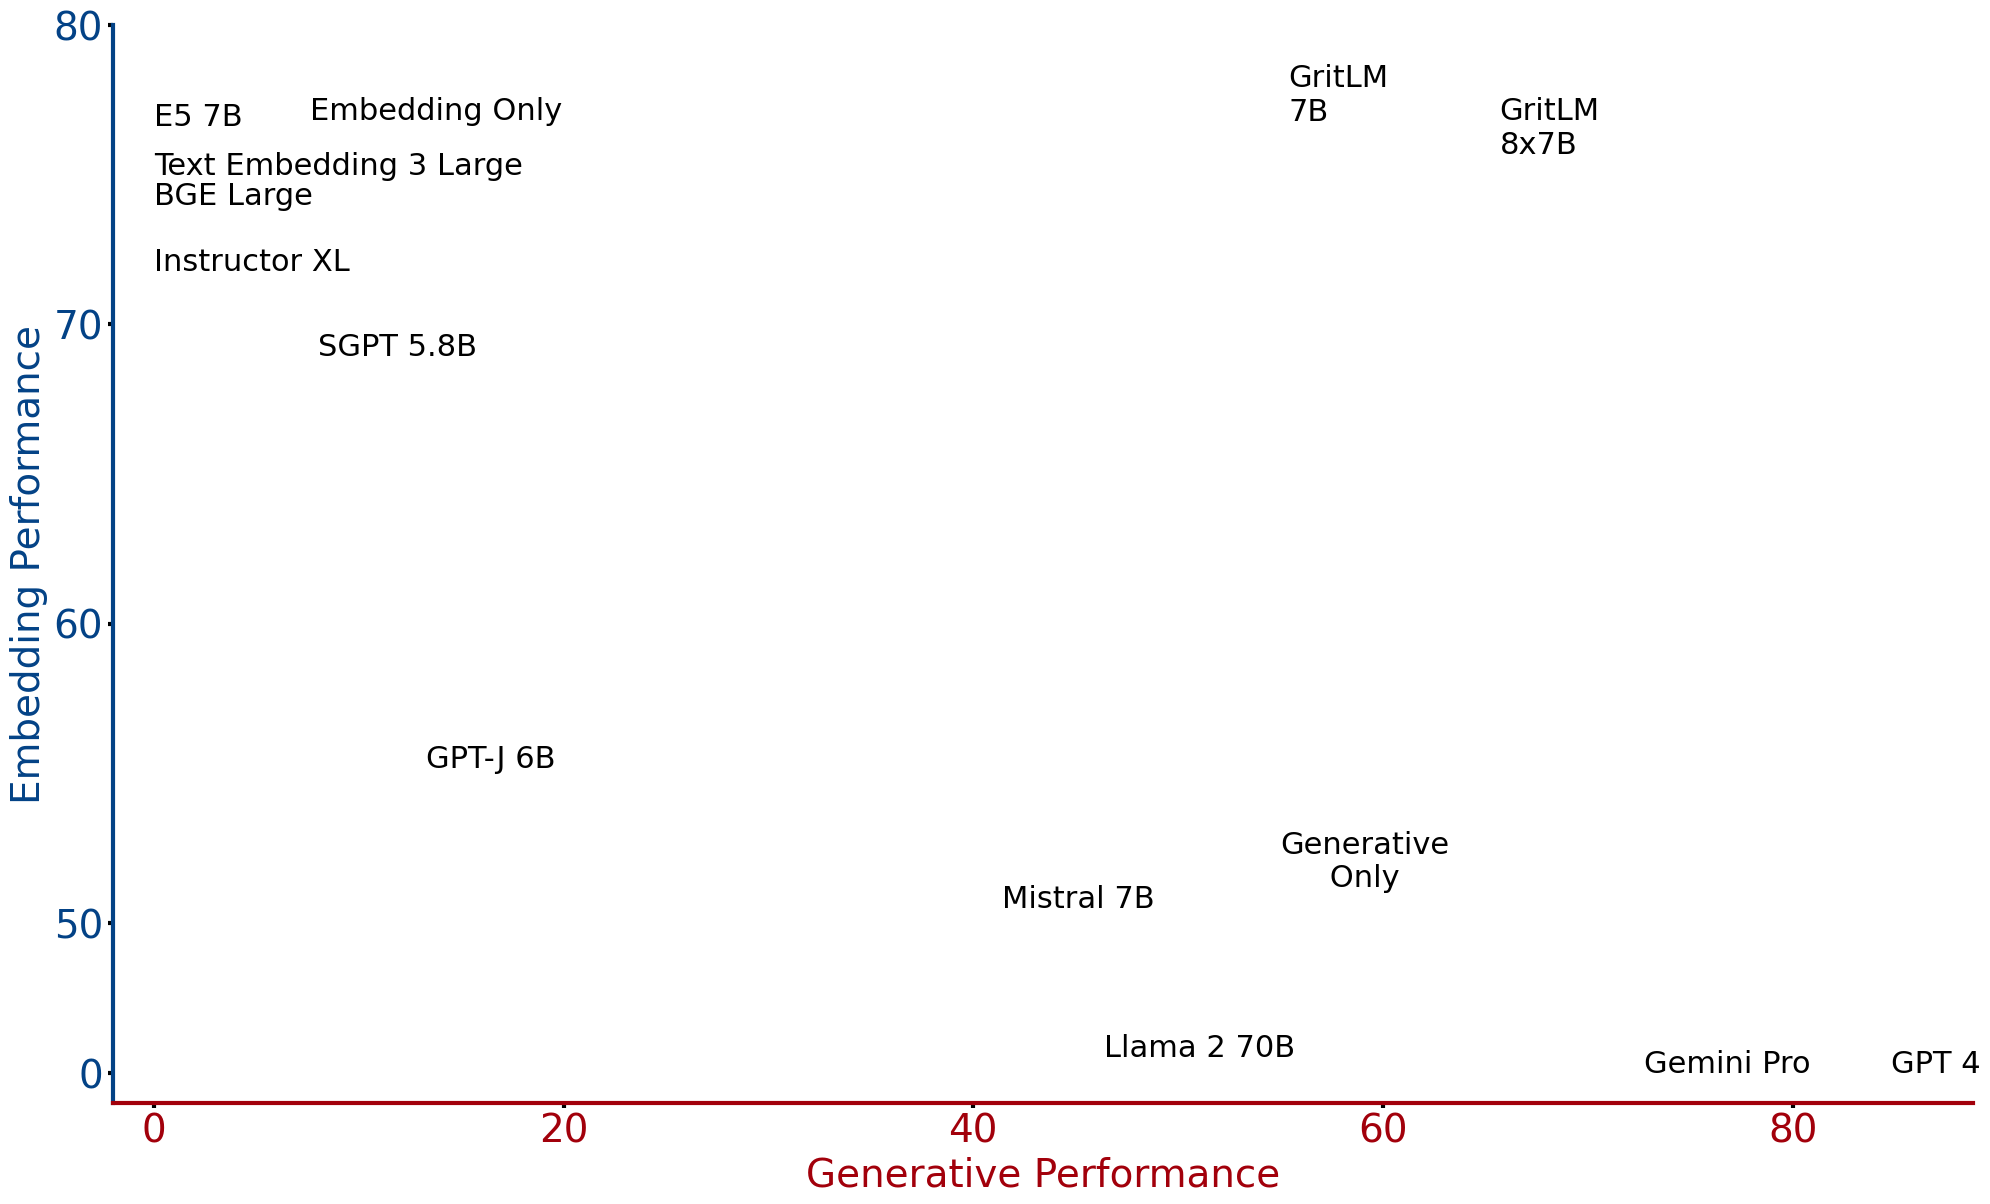

In [ ]:
"""Inspired by Fig 4 from https://arxiv.org/pdf/2210.07316.pdf"""
import json
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

FONTSIZE = 22
EMB_MIN = 35
EMB_MAX = 70

model_to_scores = {
#    "SGPT2": [55, 64.5, "SGPT2"],
    "GritLM\n7B": [55.4, 66.8, "GritLM"],
    "GritLM\n8x7B": [65.7, 65.7, "GritLM"],
    "Generative\n     Only": [55, 41.2, "Gen"],
    "Gemini Pro": [72.725, EMB_MIN, "Gen"], # (71.8 + 76.4 + 75.0 + 67.7) / 4 ; Missing some scores
    "GPT 4": [84.8, EMB_MIN, "Gen"],
#    "Claude 2": [81.4, EMB_MIN, "Gen"], # Missing some scores
    "Llama 2 70B": [46.4, 35.55, "Gen"],
    "Mistral 7B": [41.4, 40.5, "Gen"],
    "GPT-J 6B": [13.3, 45.2, "Gen"],

#    "SGPT2 Emb Only": [7.6, 63, "Emb"],
    "Embedding Only": [7.6, 66.82, "Emb"],
#    "Ada 2": [0, 61.0, "Emb"],
#    "Text Embedding 3 Large": [0, 64.59, "Emb"],
    "Text Embedding 3 Large": [0, 65.00, "Emb"], # Not correct score but doesnt fit else
#    "E5 Large": [0, 62.3, "Emb"],
    "E5 7B": [0, 66.63, "Emb"],
#    "BGE Large": [0, 64.23, "Emb"],
    "BGE Large": [0, 64.00, "Emb"], # Not correct score but doesnt fit else
    "SGPT 5.8B": [8.0, 58.93, "Emb"],
#    "ST5 XL": [0, 59.51, "Emb"],
    "Instructor XL": [0, 61.79, "Emb"],
}

model_to_offset = {
#     "SGPT2": [1, 1],
     "Text Embedding 3 Large": [1, 0],
#    "BGE Large": [-0.5, 1],
#    "SGPT 5.8B": [-0.5, -1.5],
#    "Instructor XL": [1, 0],
}

model_to_color = {
    "Emb": "#034286",
    "Gen": "#A2000B", # #F4CBCC
    "SGPT2": "#6527BE",
}

fig, ax = plt.subplots(figsize=(24, 14))

for k, v in model_to_scores.items():
    ### dot + name ###
    """
    color = model_to_color[v[-1]]
    s = 32
    if k == "SGPT2":
      s = 128
    ax.scatter(
        v[0],
        v[1],
        label=k,
        color=color,
        s=s,
#        alpha=.5
    )
    x_offset, y_offset = model_to_offset.get(k, (0, 0))

    ax.text(
        v[0] + x_offset,
        v[1] + y_offset,
        k,
        fontsize=FONTSIZE
    )
    """

    ### only name ###
    fontweight = 'normal'
    fontsize = FONTSIZE
    if k == "SGPT2":
        fontweight = "bold"
        fontsize += 2
    ax.text(
        v[0],
        v[1],
        k,
        fontsize=FONTSIZE,
        fontweight=fontweight,
#        color=model_to_color[v[-1]],
    )

    # Annotate does not work with logscale, https://stackoverflow.com/questions/21140385/matplotlib-annotate-doesnt-work-on-log-scale
    #ax.annotate(
    #    MODEL_TO_NAME.get(k, k),
    #   xy=(np.log10(1000 / v["STS15"]["speed_ms"]), results_avg[k] - offset)
    #)

ax.set_ylabel("Embedding Performance", fontsize=FONTSIZE+6, color=model_to_color["Emb"])# (MTEB)")
ax.set_xlabel("Generative Performance", fontsize=FONTSIZE+6, color=model_to_color["Gen"])# (MMLU,GSM8K,TydiQA,HumanEval,Alpaca)")

#ax.get_xticks()


#ax.set_xticks("N/A / 0"
#[-20.,   0.,  20.,  40.,  60.,  80., 100.]

ax.set_xticks([0.,  20.,  40.,  60.,  80.], ["0", "20", "40", "60", "80"], color=model_to_color["Gen"])
ax.set_xlim((0 - 2, model_to_scores["GPT 4"][0] + 4))

#ax.set_yticks([0.,  20.,  40.,  60.,  80.], ["0 / N/A", "20", "40", "60", "80"])
ax.set_yticks([EMB_MIN,  40., 50., 60., 70.], ["0", "50", "60", "70", "80"], color=model_to_color["Emb"])
ax.set_ylim((EMB_MIN - 1, EMB_MAX))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# change all spines
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
# increase tick width
ax.tick_params(width=3)

ax.spines['bottom'].set_color(model_to_color["Gen"])
ax.spines['left'].set_color(model_to_color["Emb"])

"""
ax.vlines(
    x=model_to_scores["SGPT2 Gen Only"][0],
    ymin=EMB_MIN + 5,
    ymax=model_to_scores["SGPT2"][1],
    color=model_to_color['Gen'],
    zorder=5,
    linestyle='--',
#    dashes=(5, 1),
    lw=4.0,
)
"""

"""
ax.plot(
    [model_to_scores["SGPT2 Gen Only"][0], model_to_scores["SGPT2 Gen Only"][0]],
    [model_to_scores["SGPT2 Gen Only"][1], model_to_scores["SGPT2"][1]],
    linestyle='--',
    lw=4.0,
    color=model_to_color['Gen'],
    dashes=(2, 5)

)

ax.plot(
    [model_to_scores["SGPT2 Emb Only"][0], model_to_scores["SGPT2"][0]],
    [model_to_scores["SGPT2 Emb Only"][1], model_to_scores["SGPT2 Emb Only"][1]],
    linestyle='--',
    lw=4.0,
    color=model_to_color['Emb'],
    dashes=(2, 5)
)
"""

#ax.grid(alpha=0.5)

# Create deduplicated Global Legend
#handles, labels = plt.gca().get_legend_handles_labels()
#by_label = dict(zip(labels, handles))
#lgnd = plt.legend(
#    by_label.values(),
#    by_label.keys(),
#    title="Base Architecture",
#    loc=(0.08,0.08), # "lower left",
#)
# Rescale bubbles to have the same size
#for handle in lgnd.legendHandles:
#    handle.set_sizes([70.0])

# Rather add logos in drawio as it supports svg for better quality
"""
# # https://towardsdatascience.com/how-to-add-an-image-to-a-matplotlib-plot-in-python-76098becaf53
import matplotlib.image as image
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)


logo = image.imread("/content/promo.png")
imagebox = OffsetImage(logo, zoom=0.05)
ab = AnnotationBbox(imagebox, (24, 45.5), frameon=False)#(0.33, 52), frameon=False)
ab.set_zorder(10)
ax.add_artist(ab)


logo = image.imread("/content/2048px-Peking_University_seal.svg.png")
imagebox = OffsetImage(logo, zoom=0.04)
ab = AnnotationBbox(imagebox, (12, 59.2), frameon=False)#(0.33, 52), frameon=False)
ab.set_zorder(10)
ax.add_artist(ab)
"""

ax.tick_params(axis='both', which='major', labelsize=FONTSIZE+6)


plt.savefig('performance.pdf', dpi=300, bbox_inches='tight')
plt.savefig('performance.svg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
!wget https://blog.eleuther.ai/images/promo.png
#!wget https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Peking_University_seal.svg/512px-Peking_University_seal.svg.png
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Peking_University_seal.svg/2048px-Peking_University_seal.svg.png


--2024-01-04 18:58:16--  https://blog.eleuther.ai/images/promo.png
Resolving blog.eleuther.ai (blog.eleuther.ai)... 46.137.195.11, 18.139.194.139, 2406:da18:b3d:e202::64, ...
Connecting to blog.eleuther.ai (blog.eleuther.ai)|46.137.195.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48847 (48K) [image/png]
Saving to: ‘promo.png.1’

promo.png.1         100%[===================>]  47.70K  --.-KB/s    in 0.09s   

2024-01-04 18:58:16 (557 KB/s) - ‘promo.png.1’ saved [48847/48847]

--2024-01-04 18:58:16--  https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Peking_University_seal.svg/512px-Peking_University_seal.svg.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63908 (62K) [image/png]
Saving to: ‘512px-Peking_University_seal.svg.png.1’

512px-Peking_Unive

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Peking_University_seal.svg/512px-Peking_University_seal.svg.png

--2024-01-04 18:42:41--  https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Peking_University_seal.svg/512px-Peking_University_seal.svg.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63908 (62K) [image/png]
Saving to: ‘512px-Peking_University_seal.svg.png’

512px-Peking_Univer 100%[===================>]  62.41K  --.-KB/s    in 0.08s   

2024-01-04 18:42:41 (793 KB/s) - ‘512px-Peking_University_seal.svg.png’ saved [63908/63908]



### Figure 5

In [1]:
!git clone https://huggingface.co/datasets/SGPT2/results

Cloning into 'results'...
remote: Enumerating objects: 13053, done.
remote: Total 13053 (delta 0), reused 0 (delta 0), pack-reused 13053
Receiving objects: 100% (13053/13053), 145.64 MiB | 7.68 MiB/s, done.
Resolving deltas: 100% (9820/9820), done.
Updating files: 100% (12485/12485), done.


In [2]:
!ls results/GritLM-7B/*latency*

results/GritLM-7B/test-doc-16maxtoks-defaultprompt-latency.json
results/GritLM-7B/test-docquery-16maxtoks-defaultprompt-latency.json
results/GritLM-7B/test-nocache-16maxtoks-defaultprompt-latency.json
results/GritLM-7B/test-nocache-16maxtoks-defaultprompt-noretrieval-latency.json
results/GritLM-7B/test-nocache-16maxtoks-docprompt-latency.json
results/GritLM-7B/test-query-16maxtoks-defaultprompt-latency.json
results/GritLM-7B/test-querydoc-16maxtoks-defaultprompt-latency.json


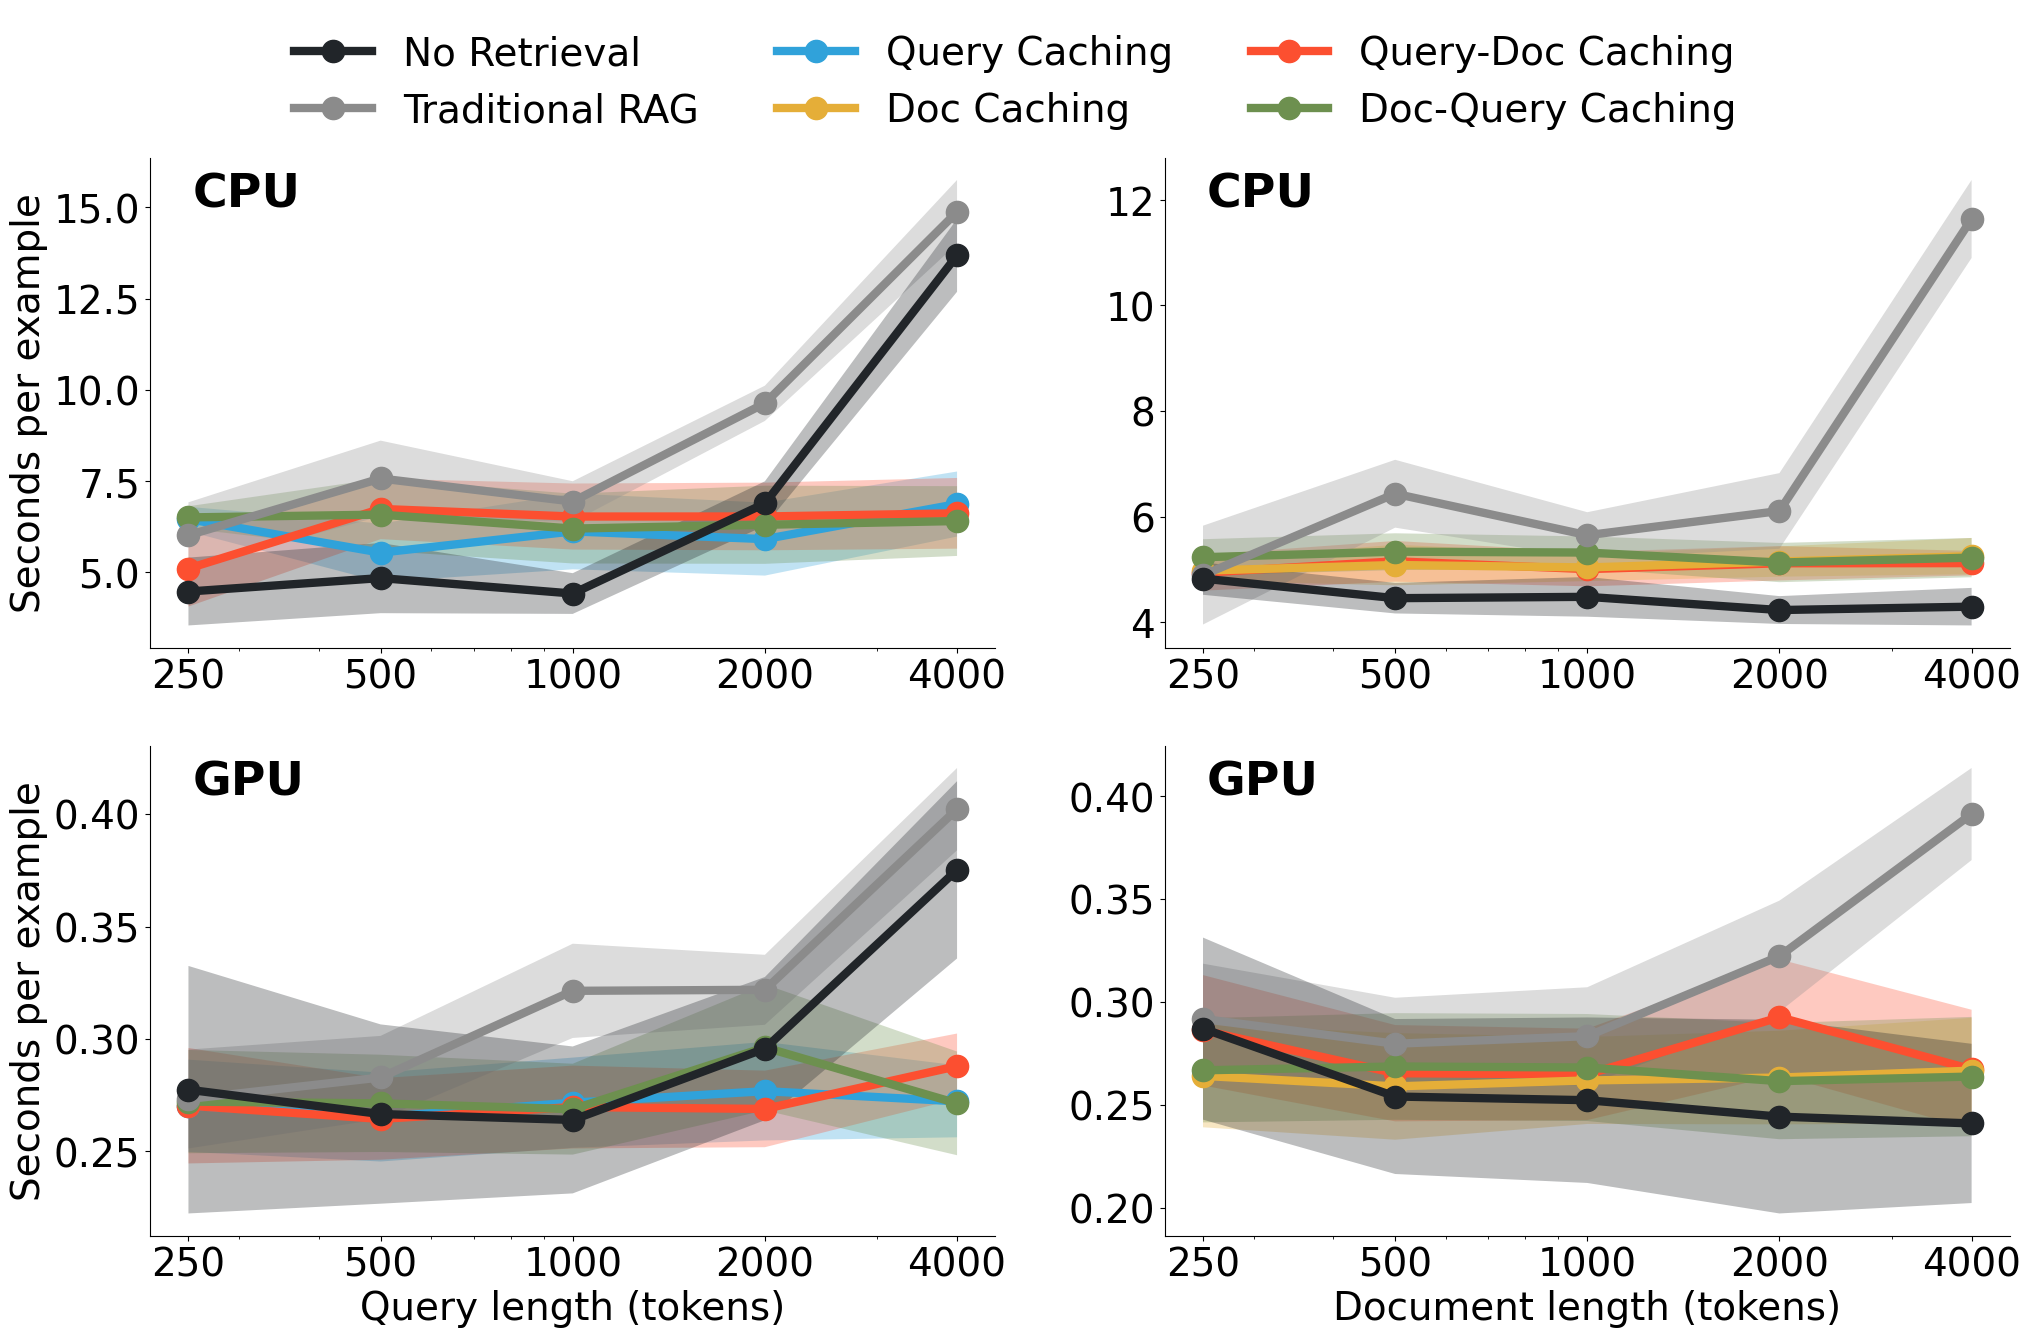

In [6]:
import json

import matplotlib.pyplot as plt
import numpy as np

model = "GritLM-7B"

paths = [
    "test-query-16maxtoks-defaultprompt-latency.json",
    "test-querydoc-16maxtoks-defaultprompt-latency.json",
    "test-doc-16maxtoks-defaultprompt-latency.json",
    "test-docquery-16maxtoks-defaultprompt-latency.json",
    "test-nocache-16maxtoks-defaultprompt-latency.json",
    "test-nocache-16maxtoks-defaultprompt-noretrieval-latency.json",
]

data = []
for p in paths:
  p = f"results/{model}/{p}"
  with open(p, "r") as f:
    data.append(json.load(f))


FONTSIZE = 22
fig, axes = plt.subplots(figsize=(24, 14), nrows=2, ncols=2)

i_to_device = {
    0: "cpu",
    1: "cpu",
    2: "gpu",
    3: "gpu",
}

i_to_lens = {
    0: [(250, 1), (500, 1), (1000, 1), (2000, 1), (4000, 1)],
    1: [(1, 250), (1, 500), (1, 1000), (1, 2000), (1, 4000)],
    2: [(250, 1), (500, 1), (1000, 1), (2000, 1), (4000, 1)],
    3: [(1, 250), (1, 500), (1, 1000), (1, 2000), (1, 4000)],
}

# https://coolors.co/palette/f72585-b5179e-7209b7-560bad-480ca8-3a0ca3-3f37c9-4361ee-4895ef-4cc9f0
# https://coolors.co/palette/f8f9fa-e9ecef-dee2e6-ced4da-adb5bd-6c757d-495057-343a40-212529
COLORS = [
    "#F72585",
    "#560BAD",
    "#4CC9F0",
    "#3F37C9",
    "#212529",
    "#adb5bd",
]
# https://www.color-hex.com/color-palette/13650
COLORS = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
    "#212529",
]


LABELS = [
    "Query Caching",
    "Query-Doc Caching",
    "Doc Caching",
    "Doc-Query Caching",
    "Traditional RAG",
    "No Retrieval",
]

global_lens = [250, 500, 1000, 2000, 4000]

handles, labels = [], []

for i, ax in enumerate(axes.flatten()):
    device = i_to_device[i]
    lens = i_to_lens[i]

    for j, d in enumerate(data):
        if (i in [0, 2]) and (j in [2]): continue
        if (i in [1, 3]) and (j in [0]): continue


        avgs = [d[f"{qlen}-{dlen}-16-{device}"]["avg"] for (qlen, dlen) in lens]
        stds = [d[f"{qlen}-{dlen}-16-{device}"]["std"] for (qlen, dlen) in lens]

        ax.plot(
            global_lens,
            avgs,
            color=COLORS[j],
            label=LABELS[j],
            marker=".",
            markersize=32,
            linewidth=6.0,
        )

        ax.fill_between(
            global_lens,
            np.array(avgs) - np.array(stds),
            np.array(avgs) + np.array(stds),
            alpha=0.3,
            facecolor=COLORS[j],
        )

    ax.tick_params(axis='both', which='major', labelsize=FONTSIZE+6)


    ax.set_xscale('log')
    ax.set_xticks(
        global_lens,
        [str(x) for x in global_lens]
    )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if i in [0, 2]:
        ax.set_ylabel("Seconds per example", fontsize=FONTSIZE+6)
    if i in [2]:
        ax.set_xlabel("Query length (tokens)", fontsize=FONTSIZE+6)
    if i in [3]:
        ax.set_xlabel("Document length (tokens)", fontsize=FONTSIZE+6)

    ax.annotate(
        device.upper(),
        (0.05, 0.9),
        fontsize=FONTSIZE+12,
        fontweight="bold",
        xycoords="axes fraction",
    )


    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)


order = [
    "No Retrieval", "Traditional RAG", 'Query Caching', "Doc Caching", "Query-Doc Caching", "Doc-Query Caching",
]
handles_ordered, labels_ordered = [], []
for o in order:
    for h, l in zip(handles, labels):
        if l == o:
            handles_ordered.append(h)
            labels_ordered.append(l)
            break

handles, labels = handles_ordered, labels_ordered

fig.legend(
    handles,
    labels,
    frameon=False,
    fontsize=FONTSIZE+6,
    #title="Strategy",
    title_fontproperties={'weight': 'bold', "size": FONTSIZE},
    loc="upper center",#(0.5,0.5),
    ncol=3,
)

plt.savefig('latency.pdf', dpi=300, bbox_inches='tight')
plt.savefig('latency.svg', dpi=300, bbox_inches='tight')
plt.show()

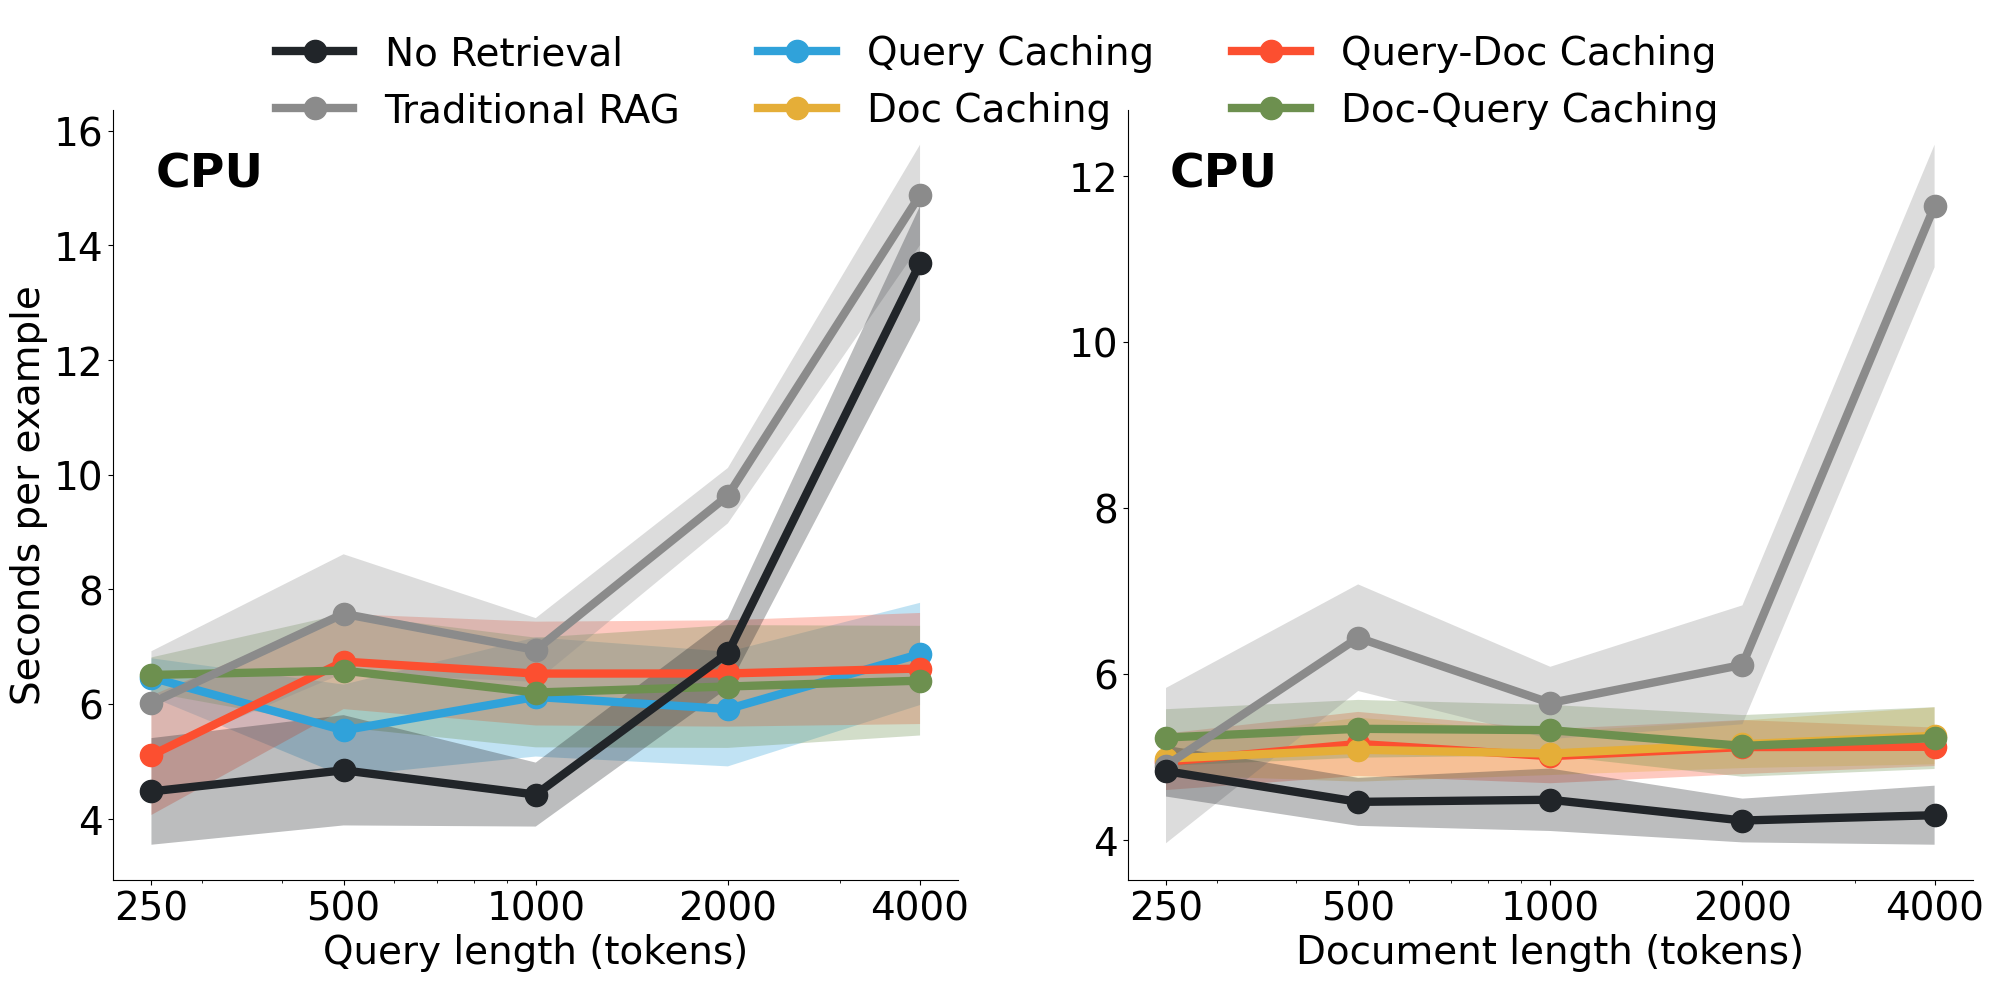

In [31]:
### CPU Only ###

import json

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np

model = "GritLM-7B"

paths = [
    "test-query-16maxtoks-defaultprompt-latency.json",
    "test-querydoc-16maxtoks-defaultprompt-latency.json",
    "test-doc-16maxtoks-defaultprompt-latency.json",
    "test-docquery-16maxtoks-defaultprompt-latency.json",
    "test-nocache-16maxtoks-defaultprompt-latency.json",
    "test-nocache-16maxtoks-defaultprompt-noretrieval-latency.json",
]

data = []
for p in paths:
  p = f"results/{model}/{p}"
  with open(p, "r") as f:
    data.append(json.load(f))


FONTSIZE = 22
fig, axes = plt.subplots(figsize=(24, 10), nrows=1, ncols=2, sharey=False)

i_to_device = {
    0: "cpu",
    1: "cpu",
#    0: "gpu",
#    1: "gpu",
}

i_to_lens = {
    0: [(250, 1), (500, 1), (1000, 1), (2000, 1), (4000, 1)],
    1: [(1, 250), (1, 500), (1, 1000), (1, 2000), (1, 4000)],
    2: [(250, 1), (500, 1), (1000, 1), (2000, 1), (4000, 1)],
    3: [(1, 250), (1, 500), (1, 1000), (1, 2000), (1, 4000)],
}

# https://coolors.co/palette/f72585-b5179e-7209b7-560bad-480ca8-3a0ca3-3f37c9-4361ee-4895ef-4cc9f0
# https://coolors.co/palette/f8f9fa-e9ecef-dee2e6-ced4da-adb5bd-6c757d-495057-343a40-212529
COLORS = [
    "#F72585",
    "#560BAD",
    "#4CC9F0",
    "#3F37C9",
    "#212529",
    "#adb5bd",
]
# https://www.color-hex.com/color-palette/13650
COLORS = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
    "#212529",
]


LABELS = [
    "Query Caching",
    "Query-Doc Caching",
    "Doc Caching",
    "Doc-Query Caching",
    "Traditional RAG",
    "No Retrieval",
]

global_lens = [250, 500, 1000, 2000, 4000]

handles, labels = [], []

for i, ax in enumerate(axes.flatten()):
    device = i_to_device[i]
    lens = i_to_lens[i]

    for j, d in enumerate(data):
        if (i in [0, 2]) and (j in [2]): continue
        if (i in [1, 3]) and (j in [0]): continue


        avgs = [d[f"{qlen}-{dlen}-16-{device}"]["avg"] for (qlen, dlen) in lens]
        stds = [d[f"{qlen}-{dlen}-16-{device}"]["std"] for (qlen, dlen) in lens]

        ax.plot(
            global_lens,
            avgs,
            color=COLORS[j],
            label=LABELS[j],
            marker=".",
            markersize=32,
            linewidth=6.0,
        )

        ax.fill_between(
            global_lens,
            np.array(avgs) - np.array(stds),
            np.array(avgs) + np.array(stds),
            alpha=0.3,
            facecolor=COLORS[j],
        )

    ax.tick_params(axis='both', which='major', labelsize=FONTSIZE+6)


    ax.set_xscale('log')
    ax.set_xticks(
        global_lens,
        [str(x) for x in global_lens]
    )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if i in [0, 2]:
        ax.set_ylabel("Seconds per example", fontsize=FONTSIZE+6)
    if i in [0]:
        ax.set_xlabel("Query length (tokens)", fontsize=FONTSIZE+6)
    if i in [1]:
        ax.set_xlabel("Document length (tokens)", fontsize=FONTSIZE+6)

    ax.annotate(
        device.upper(),
        (0.05, 0.9),
        fontsize=FONTSIZE+12,
        fontweight="bold",
        xycoords="axes fraction",
    )


    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)


order = [
    "No Retrieval", "Traditional RAG", 'Query Caching', "Doc Caching", "Query-Doc Caching", "Doc-Query Caching",
]
handles_ordered, labels_ordered = [], []
for o in order:
    for h, l in zip(handles, labels):
        if l == o:
            handles_ordered.append(h)
            labels_ordered.append(l)
            break

handles, labels = handles_ordered, labels_ordered

fig.legend(
    handles,
    labels,
    frameon=False,
    fontsize=FONTSIZE+6,
    #title="Strategy",
    title_fontproperties={'weight': 'bold', "size": FONTSIZE},
    loc="upper center",#(0.5,0.5),
    ncol=3,
)

plt.savefig('latency.pdf', dpi=300, bbox_inches='tight')
plt.savefig('latency.svg', dpi=300, bbox_inches='tight')
plt.show()

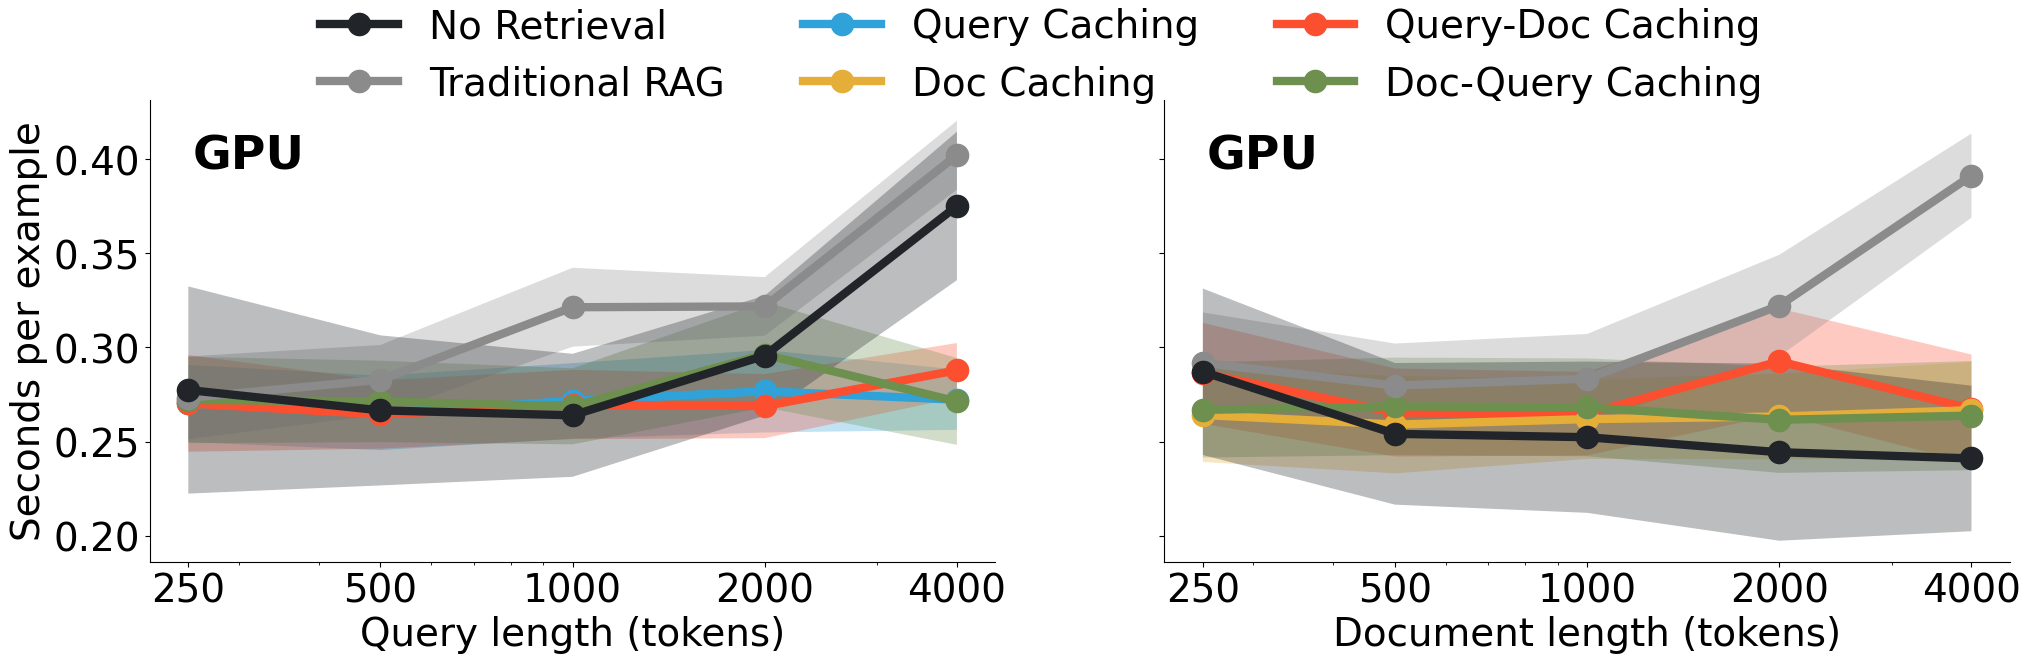

In [9]:
### GPU Only ###

import json

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np

model = "GritLM-7B"

paths = [
    "test-query-16maxtoks-defaultprompt-latency.json",
    "test-querydoc-16maxtoks-defaultprompt-latency.json",
    "test-doc-16maxtoks-defaultprompt-latency.json",
    "test-docquery-16maxtoks-defaultprompt-latency.json",
    "test-nocache-16maxtoks-defaultprompt-latency.json",
    "test-nocache-16maxtoks-defaultprompt-noretrieval-latency.json",
]

data = []
for p in paths:
  p = f"results/{model}/{p}"
  with open(p, "r") as f:
    data.append(json.load(f))


FONTSIZE = 22
fig, axes = plt.subplots(figsize=(24, 6), nrows=1, ncols=2, sharey=True)

i_to_device = {
#    0: "cpu",
#    1: "cpu",
    0: "gpu",
    1: "gpu",
}

i_to_lens = {
    0: [(250, 1), (500, 1), (1000, 1), (2000, 1), (4000, 1)],
    1: [(1, 250), (1, 500), (1, 1000), (1, 2000), (1, 4000)],
    2: [(250, 1), (500, 1), (1000, 1), (2000, 1), (4000, 1)],
    3: [(1, 250), (1, 500), (1, 1000), (1, 2000), (1, 4000)],
}

# https://coolors.co/palette/f72585-b5179e-7209b7-560bad-480ca8-3a0ca3-3f37c9-4361ee-4895ef-4cc9f0
# https://coolors.co/palette/f8f9fa-e9ecef-dee2e6-ced4da-adb5bd-6c757d-495057-343a40-212529
COLORS = [
    "#F72585",
    "#560BAD",
    "#4CC9F0",
    "#3F37C9",
    "#212529",
    "#adb5bd",
]
# https://www.color-hex.com/color-palette/13650
COLORS = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
    "#212529",
]


LABELS = [
    "Query Caching",
    "Query-Doc Caching",
    "Doc Caching",
    "Doc-Query Caching",
    "Traditional RAG",
    "No Retrieval",
]

global_lens = [250, 500, 1000, 2000, 4000]

handles, labels = [], []

for i, ax in enumerate(axes.flatten()):
    device = i_to_device[i]
    lens = i_to_lens[i]

    for j, d in enumerate(data):
        if (i in [0, 2]) and (j in [2]): continue
        if (i in [1, 3]) and (j in [0]): continue


        avgs = [d[f"{qlen}-{dlen}-16-{device}"]["avg"] for (qlen, dlen) in lens]
        stds = [d[f"{qlen}-{dlen}-16-{device}"]["std"] for (qlen, dlen) in lens]

        ax.plot(
            global_lens,
            avgs,
            color=COLORS[j],
            label=LABELS[j],
            marker=".",
            markersize=32,
            linewidth=6.0,
        )

        ax.fill_between(
            global_lens,
            np.array(avgs) - np.array(stds),
            np.array(avgs) + np.array(stds),
            alpha=0.3,
            facecolor=COLORS[j],
        )

    ax.tick_params(axis='both', which='major', labelsize=FONTSIZE+6)


    ax.set_xscale('log')
    ax.set_xticks(
        global_lens,
        [str(x) for x in global_lens]
    )
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    #if i == 0:
    #    ax.set_yticks(
    #        ax.get_yticks()[::2],
    #    )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if i in [0, 2]:
        ax.set_ylabel("Seconds per example", fontsize=FONTSIZE+6)
    if i in [0]:
        ax.set_xlabel("Query length (tokens)", fontsize=FONTSIZE+6)
    if i in [1]:
        ax.set_xlabel("Document length (tokens)", fontsize=FONTSIZE+6)

    ax.annotate(
        device.upper(),
        (0.05, 0.85),
        fontsize=FONTSIZE+12,
        fontweight="bold",
        xycoords="axes fraction",
    )


    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)


order = [
    "No Retrieval", "Traditional RAG", 'Query Caching', "Doc Caching", "Query-Doc Caching", "Doc-Query Caching",
]
handles_ordered, labels_ordered = [], []
for o in order:
    for h, l in zip(handles, labels):
        if l == o:
            handles_ordered.append(h)
            labels_ordered.append(l)
            break

handles, labels = handles_ordered, labels_ordered

fig.legend(
    handles,
    labels,
    frameon=False,
    fontsize=FONTSIZE+6,
    #title="Strategy",
    title_fontproperties={'weight': 'bold', "size": FONTSIZE},
    loc=(0.15,0.82),#"upper center",#(0.5,0.5),
    ncol=3,
)

plt.savefig('latency.pdf', dpi=300, bbox_inches='tight')
plt.savefig('latency.svg', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
ax.get_yticks()

array([0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45])

In [ ]:
p = f"results/{model}/test-nocache-16maxtoks-docprompt-latency.json"
with open(p, "r") as f:
    data.append(json.load(f))
paths.append(p)

for n, d in zip(paths, data):
    print(n)

    print("1 Q & 4000 D")
    print("CPU")
    print(f'{round(d[f"1-4000-16-cpu"]["avg"], 2)} ± {round(d[f"1-4000-16-cpu"]["std"], 2)}')
    print("GPU")
    print(f'{round(d[f"1-4000-16-gpu"]["avg"], 2)} ± {round(d[f"1-4000-16-gpu"]["std"], 2)}')

    print("\n4000 Q & 1 D")
    print("CPU")
    print(f'{round(d[f"4000-1-16-cpu"]["avg"], 2)} ± {round(d[f"4000-1-16-cpu"]["std"], 2)}')
    print("GPU")
    print(f'{round(d[f"4000-1-16-gpu"]["avg"], 2)} ± {round(d[f"4000-1-16-gpu"]["std"], 2)}')


    print("-"*50)




test-query-16maxtoks-defaultprompt-latency.json
1 Q & 4000 D
CPU
18.3 ± 0.76
GPU
0.44 ± 0.03

4000 Q & 1 D
CPU
6.87 ± 0.89
GPU
0.27 ± 0.02
--------------------------------------------------
test-querydoc-16maxtoks-defaultprompt-latency.json
1 Q & 4000 D
CPU
5.12 ± 0.23
GPU
0.27 ± 0.03

4000 Q & 1 D
CPU
6.62 ± 0.97
GPU
0.29 ± 0.01
--------------------------------------------------
test-doc-16maxtoks-defaultprompt-latency.json
1 Q & 4000 D
CPU
5.25 ± 0.34
GPU
0.27 ± 0.03

4000 Q & 1 D
CPU
23.23 ± 1.05
GPU
0.45 ± 0.02
--------------------------------------------------
test-docquery-16maxtoks-defaultprompt-latency.json
1 Q & 4000 D
CPU
5.23 ± 0.37
GPU
0.26 ± 0.03

4000 Q & 1 D
CPU
6.41 ± 0.96
GPU
0.27 ± 0.02
--------------------------------------------------
test-nocache-16maxtoks-defaultprompt-latency.json
1 Q & 4000 D
CPU
11.64 ± 0.74
GPU
0.39 ± 0.02

4000 Q & 1 D
CPU
14.88 ± 0.87
GPU
0.4 ± 0.02
--------------------------------------------------
test-nocache-16maxtoks-defaultprompt-noret

In [ ]:
p

'results/sgpt2_m7_sq2048_e5ds_bbcc_bs2048_gc/results/sgpt2_m7_sq2048_e5ds_bbcc_bs2048_gc/test-nocache-16maxtoks-docprompt-latency.json'

### Figure 6/7

In [ ]:
%%writefile lossgen.csv
"Step","sgpt2_e5s_bs2048_bf16_mix32 - train/loss_gen","sgpt2_e5s_bs2048_bf16_mix32 - train/loss_gen__MIN","sgpt2_e5s_bs2048_bf16_mix32 - train/loss_gen__MAX"
"1","1.2883591651916504","1.2883591651916504","1.2883591651916504"
"3","1.381561040878296","1.381561040878296","1.381561040878296"
"5","1.3464024066925049","1.3464024066925049","1.3464024066925049"
"7","1.261672019958496","1.261672019958496","1.261672019958496"
"9","1.288212537765503","1.288212537765503","1.288212537765503"
"11","1.1902607679367065","1.1902607679367065","1.1902607679367065"
"13","1.2180659770965576","1.2180659770965576","1.2180659770965576"
"15","1.2347344160079956","1.2347344160079956","1.2347344160079956"
"17","1.084364414215088","1.084364414215088","1.084364414215088"
"19","1.0769963264465332","1.0769963264465332","1.0769963264465332"
"21","1.2068946361541748","1.2068946361541748","1.2068946361541748"
"23","1.1734840869903564","1.1734840869903564","1.1734840869903564"
"25","1.1781128644943237","1.1781128644943237","1.1781128644943237"
"27","1.1512700319290161","1.1512700319290161","1.1512700319290161"
"29","1.1593081951141357","1.1593081951141357","1.1593081951141357"
"31","1.1709892749786377","1.1709892749786377","1.1709892749786377"
"33","1.1072431802749634","1.1072431802749634","1.1072431802749634"
"35","1.1836135387420654","1.1836135387420654","1.1836135387420654"
"37","1.0962775945663452","1.0962775945663452","1.0962775945663452"
"39","1.0937275886535645","1.0937275886535645","1.0937275886535645"
"41","1.1958427429199219","1.1958427429199219","1.1958427429199219"
"43","1.2448618412017822","1.2448618412017822","1.2448618412017822"
"45","1.1797888278961182","1.1797888278961182","1.1797888278961182"
"47","1.0933091640472412","1.0933091640472412","1.0933091640472412"
"49","1.2820135354995728","1.2820135354995728","1.2820135354995728"
"51","1.209244728088379","1.209244728088379","1.209244728088379"
"53","1.3639650344848633","1.3639650344848633","1.3639650344848633"
"55","1.1837573051452637","1.1837573051452637","1.1837573051452637"
"57","1.2349812984466553","1.2349812984466553","1.2349812984466553"
"59","1.3631854057312012","1.3631854057312012","1.3631854057312012"
"61","1.3472363948822021","1.3472363948822021","1.3472363948822021"
"63","1.3005602359771729","1.3005602359771729","1.3005602359771729"
"65","1.3111404180526733","1.3111404180526733","1.3111404180526733"
"67","1.1473524570465088","1.1473524570465088","1.1473524570465088"
"69","1.389890432357788","1.389890432357788","1.389890432357788"
"71","1.3996295928955078","1.3996295928955078","1.3996295928955078"
"73","1.2576898336410522","1.2576898336410522","1.2576898336410522"
"75","1.3118700981140137","1.3118700981140137","1.3118700981140137"
"77","1.224807858467102","1.224807858467102","1.224807858467102"
"79","1.2882784605026245","1.2882784605026245","1.2882784605026245"
"81","1.3510587215423584","1.3510587215423584","1.3510587215423584"
"83","1.3291208744049072","1.3291208744049072","1.3291208744049072"
"85","1.2992866039276123","1.2992866039276123","1.2992866039276123"
"87","1.3056576251983643","1.3056576251983643","1.3056576251983643"
"89","1.3796958923339844","1.3796958923339844","1.3796958923339844"
"91","1.451310396194458","1.451310396194458","1.451310396194458"
"93","1.336137294769287","1.336137294769287","1.336137294769287"
"95","1.2011345624923706","1.2011345624923706","1.2011345624923706"
"97","1.4699116945266724","1.4699116945266724","1.4699116945266724"
"99","1.450630784034729","1.450630784034729","1.450630784034729"
"101","1.260258674621582","1.260258674621582","1.260258674621582"
"103","1.4805231094360352","1.4805231094360352","1.4805231094360352"
"105","1.4901372194290161","1.4901372194290161","1.4901372194290161"
"107","1.3629260063171387","1.3629260063171387","1.3629260063171387"
"109","1.460883617401123","1.460883617401123","1.460883617401123"
"111","1.482123851776123","1.482123851776123","1.482123851776123"
"113","1.4159612655639648","1.4159612655639648","1.4159612655639648"
"115","1.3301030397415161","1.3301030397415161","1.3301030397415161"
"117","1.4377295970916748","1.4377295970916748","1.4377295970916748"
"119","1.5014592409133911","1.5014592409133911","1.5014592409133911"
"121","1.4929014444351196","1.4929014444351196","1.4929014444351196"
"123","1.4325112104415894","1.4325112104415894","1.4325112104415894"
"125","12.908309936523438","12.908309936523438","12.908309936523438"
"127","1.290602445602417","1.290602445602417","1.290602445602417"
"129","1.2910699844360352","1.2910699844360352","1.2910699844360352"
"131","1.4143445491790771","1.4143445491790771","1.4143445491790771"
"133","1.3663421869277954","1.3663421869277954","1.3663421869277954"
"135","1.4259413480758667","1.4259413480758667","1.4259413480758667"
"137","1.325956106185913","1.325956106185913","1.325956106185913"
"139","1.3661949634552002","1.3661949634552002","1.3661949634552002"
"141","1.378332495689392","1.378332495689392","1.378332495689392"
"143","1.2152044773101807","1.2152044773101807","1.2152044773101807"
"145","1.3701494932174683","1.3701494932174683","1.3701494932174683"
"147","1.2803153991699219","1.2803153991699219","1.2803153991699219"
"149","1.3908660411834717","1.3908660411834717","1.3908660411834717"
"151","1.3957560062408447","1.3957560062408447","1.3957560062408447"
"153","1.367417573928833","1.367417573928833","1.367417573928833"
"155","1.3663086891174316","1.3663086891174316","1.3663086891174316"
"157","1.3185570240020752","1.3185570240020752","1.3185570240020752"
"159","1.3829801082611084","1.3829801082611084","1.3829801082611084"
"161","1.5610166788101196","1.5610166788101196","1.5610166788101196"
"163","1.4098937511444092","1.4098937511444092","1.4098937511444092"
"165","1.5186278820037842","1.5186278820037842","1.5186278820037842"
"167","1.4683399200439453","1.4683399200439453","1.4683399200439453"
"169","1.3531243801116943","1.3531243801116943","1.3531243801116943"
"171","1.2565200328826904","1.2565200328826904","1.2565200328826904"
"173","1.298290491104126","1.298290491104126","1.298290491104126"
"175","1.330134630203247","1.330134630203247","1.330134630203247"
"177","1.3282365798950195","1.3282365798950195","1.3282365798950195"
"179","1.381490707397461","1.381490707397461","1.381490707397461"
"181","1.3233232498168945","1.3233232498168945","1.3233232498168945"
"183","1.407977819442749","1.407977819442749","1.407977819442749"
"185","1.2901629209518433","1.2901629209518433","1.2901629209518433"
"187","1.3962922096252441","1.3962922096252441","1.3962922096252441"
"189","1.3670908212661743","1.3670908212661743","1.3670908212661743"
"191","1.3770225048065186","1.3770225048065186","1.3770225048065186"
"193","1.2999625205993652","1.2999625205993652","1.2999625205993652"
"195","1.216237187385559","1.216237187385559","1.216237187385559"
"197","1.4017224311828613","1.4017224311828613","1.4017224311828613"
"199","1.408954381942749","1.408954381942749","1.408954381942749"
"201","1.3726825714111328","1.3726825714111328","1.3726825714111328"
"203","1.3417930603027344","1.3417930603027344","1.3417930603027344"
"205","1.3953516483306885","1.3953516483306885","1.3953516483306885"
"207","1.3097093105316162","1.3097093105316162","1.3097093105316162"
"209","1.3366320133209229","1.3366320133209229","1.3366320133209229"
"211","1.4942593574523926","1.4942593574523926","1.4942593574523926"
"213","1.3812142610549927","1.3812142610549927","1.3812142610549927"
"215","1.3299686908721924","1.3299686908721924","1.3299686908721924"
"217","1.4090752601623535","1.4090752601623535","1.4090752601623535"
"219","1.4793057441711426","1.4793057441711426","1.4793057441711426"
"221","1.3547660112380981","1.3547660112380981","1.3547660112380981"
"223","1.3652212619781494","1.3652212619781494","1.3652212619781494"
"225","1.308105707168579","1.308105707168579","1.308105707168579"
"227","1.3136171102523804","1.3136171102523804","1.3136171102523804"
"229","1.410923957824707","1.410923957824707","1.410923957824707"
"231","1.3538119792938232","1.3538119792938232","1.3538119792938232"
"233","1.4719167947769165","1.4719167947769165","1.4719167947769165"
"235","1.584697961807251","1.584697961807251","1.584697961807251"
"237","1.3331390619277954","1.3331390619277954","1.3331390619277954"
"239","1.302431344985962","1.302431344985962","1.302431344985962"
"241","1.4388066530227661","1.4388066530227661","1.4388066530227661"
"243","1.3001667261123657","1.3001667261123657","1.3001667261123657"
"245","1.4078463315963745","1.4078463315963745","1.4078463315963745"
"247","1.3793960809707642","1.3793960809707642","1.3793960809707642"
"249","1.4346513748168945","1.4346513748168945","1.4346513748168945"
"251","1.495452880859375","1.495452880859375","1.495452880859375"
"253","1.4730260372161865","1.4730260372161865","1.4730260372161865"
"255","1.4824657440185547","1.4824657440185547","1.4824657440185547"
"257","1.6391425132751465","1.6391425132751465","1.6391425132751465"
"259","1.3460960388183594","1.3460960388183594","1.3460960388183594"
"261","1.4182438850402832","1.4182438850402832","1.4182438850402832"
"263","1.404803991317749","1.404803991317749","1.404803991317749"
"265","1.3457410335540771","1.3457410335540771","1.3457410335540771"
"267","1.3648196458816528","1.3648196458816528","1.3648196458816528"
"269","1.5044841766357422","1.5044841766357422","1.5044841766357422"
"271","1.41148042678833","1.41148042678833","1.41148042678833"
"273","1.377236008644104","1.377236008644104","1.377236008644104"
"275","1.4006218910217285","1.4006218910217285","1.4006218910217285"
"277","1.340564489364624","1.340564489364624","1.340564489364624"
"279","1.3607642650604248","1.3607642650604248","1.3607642650604248"
"281","1.3641910552978516","1.3641910552978516","1.3641910552978516"
"283","1.3116817474365234","1.3116817474365234","1.3116817474365234"
"285","1.4134504795074463","1.4134504795074463","1.4134504795074463"
"287","1.3800177574157715","1.3800177574157715","1.3800177574157715"
"289","1.5139448642730713","1.5139448642730713","1.5139448642730713"
"291","1.3995850086212158","1.3995850086212158","1.3995850086212158"
"293","1.3322685956954956","1.3322685956954956","1.3322685956954956"
"295","1.393336534500122","1.393336534500122","1.393336534500122"
"297","1.3417034149169922","1.3417034149169922","1.3417034149169922"
"299","1.3148131370544434","1.3148131370544434","1.3148131370544434"
"301","1.450047254562378","1.450047254562378","1.450047254562378"
"303","1.3671691417694092","1.3671691417694092","1.3671691417694092"
"305","1.2193719148635864","1.2193719148635864","1.2193719148635864"
"307","1.4350254535675049","1.4350254535675049","1.4350254535675049"
"309","1.3302148580551147","1.3302148580551147","1.3302148580551147"
"311","1.3052496910095215","1.3052496910095215","1.3052496910095215"
"313","1.2832229137420654","1.2832229137420654","1.2832229137420654"
"315","1.4687987565994263","1.4687987565994263","1.4687987565994263"
"317","1.3220651149749756","1.3220651149749756","1.3220651149749756"
"319","1.4232115745544434","1.4232115745544434","1.4232115745544434"
"321","1.320066213607788","1.320066213607788","1.320066213607788"
"323","1.3283989429473877","1.3283989429473877","1.3283989429473877"
"325","1.3820465803146362","1.3820465803146362","1.3820465803146362"
"327","1.3725991249084473","1.3725991249084473","1.3725991249084473"
"329","1.2686270475387573","1.2686270475387573","1.2686270475387573"
"331","1.2679293155670166","1.2679293155670166","1.2679293155670166"
"333","1.3711259365081787","1.3711259365081787","1.3711259365081787"
"335","1.298125147819519","1.298125147819519","1.298125147819519"
"337","1.1866540908813477","1.1866540908813477","1.1866540908813477"
"339","1.3346971273422241","1.3346971273422241","1.3346971273422241"
"341","1.2862563133239746","1.2862563133239746","1.2862563133239746"
"343","1.3392634391784668","1.3392634391784668","1.3392634391784668"
"345","1.3474256992340088","1.3474256992340088","1.3474256992340088"
"347","1.267425775527954","1.267425775527954","1.267425775527954"
"349","1.3310964107513428","1.3310964107513428","1.3310964107513428"
"351","1.2321430444717407","1.2321430444717407","1.2321430444717407"
"353","1.2890098094940186","1.2890098094940186","1.2890098094940186"
"355","1.2809343338012695","1.2809343338012695","1.2809343338012695"
"357","1.3866358995437622","1.3866358995437622","1.3866358995437622"
"359","1.4510340690612793","1.4510340690612793","1.4510340690612793"
"361","1.396803617477417","1.396803617477417","1.396803617477417"
"363","1.3899099826812744","1.3899099826812744","1.3899099826812744"
"365","1.2659571170806885","1.2659571170806885","1.2659571170806885"
"367","1.3786526918411255","1.3786526918411255","1.3786526918411255"
"369","1.3218131065368652","1.3218131065368652","1.3218131065368652"
"371","1.8213127851486206","1.8213127851486206","1.8213127851486206"
"373","1.682016134262085","1.682016134262085","1.682016134262085"
"375","1.5052201747894287","1.5052201747894287","1.5052201747894287"
"377","1.6504504680633545","1.6504504680633545","1.6504504680633545"
"379","1.8536591529846191","1.8536591529846191","1.8536591529846191"
"381","1.5104403495788574","1.5104403495788574","1.5104403495788574"
"383","1.4879097938537598","1.4879097938537598","1.4879097938537598"
"385","1.555037260055542","1.555037260055542","1.555037260055542"
"387","1.5651652812957764","1.5651652812957764","1.5651652812957764"
"389","1.7394858598709106","1.7394858598709106","1.7394858598709106"
"391","1.497596025466919","1.497596025466919","1.497596025466919"
"393","1.4697514772415161","1.4697514772415161","1.4697514772415161"
"395","1.4815107583999634","1.4815107583999634","1.4815107583999634"
"397","1.4925652742385864","1.4925652742385864","1.4925652742385864"
"399","1.5478620529174805","1.5478620529174805","1.5478620529174805"
"401","1.3596765995025635","1.3596765995025635","1.3596765995025635"
"403","1.4225059747695923","1.4225059747695923","1.4225059747695923"
"405","1.564850091934204","1.564850091934204","1.564850091934204"
"407","1.2188160419464111","1.2188160419464111","1.2188160419464111"
"409","1.4917402267456055","1.4917402267456055","1.4917402267456055"
"411","1.3780930042266846","1.3780930042266846","1.3780930042266846"
"413","1.3363888263702393","1.3363888263702393","1.3363888263702393"
"415","1.1773805618286133","1.1773805618286133","1.1773805618286133"
"417","1.4727637767791748","1.4727637767791748","1.4727637767791748"
"419","1.2929710149765015","1.2929710149765015","1.2929710149765015"
"421","1.4190478324890137","1.4190478324890137","1.4190478324890137"
"423","1.3136500120162964","1.3136500120162964","1.3136500120162964"
"425","1.411879062652588","1.411879062652588","1.411879062652588"
"427","1.411046028137207","1.411046028137207","1.411046028137207"
"429","1.6802129745483398","1.6802129745483398","1.6802129745483398"
"431","1.3932712078094482","1.3932712078094482","1.3932712078094482"
"433","1.2856419086456299","1.2856419086456299","1.2856419086456299"
"435","1.3825361728668213","1.3825361728668213","1.3825361728668213"
"437","1.2817418575286865","1.2817418575286865","1.2817418575286865"
"439","1.382589340209961","1.382589340209961","1.382589340209961"
"441","1.2464278936386108","1.2464278936386108","1.2464278936386108"
"443","1.2903223037719727","1.2903223037719727","1.2903223037719727"
"445","1.3037090301513672","1.3037090301513672","1.3037090301513672"
"447","1.3333094120025635","1.3333094120025635","1.3333094120025635"
"449","1.6961127519607544","1.6961127519607544","1.6961127519607544"
"451","1.4165226221084595","1.4165226221084595","1.4165226221084595"
"453","1.3406004905700684","1.3406004905700684","1.3406004905700684"
"455","1.1479215621948242","1.1479215621948242","1.1479215621948242"
"457","1.3146228790283203","1.3146228790283203","1.3146228790283203"
"459","1.2265100479125977","1.2265100479125977","1.2265100479125977"
"461","1.3011894226074219","1.3011894226074219","1.3011894226074219"
"463","1.4222791194915771","1.4222791194915771","1.4222791194915771"
"465","1.3965349197387695","1.3965349197387695","1.3965349197387695"
"467","1.3143028020858765","1.3143028020858765","1.3143028020858765"
"469","1.679793119430542","1.679793119430542","1.679793119430542"
"471","1.2584969997406006","1.2584969997406006","1.2584969997406006"
"473","1.5480533838272095","1.5480533838272095","1.5480533838272095"
"475","1.3185405731201172","1.3185405731201172","1.3185405731201172"
"477","1.7138562202453613","1.7138562202453613","1.7138562202453613"
"479","1.2009533643722534","1.2009533643722534","1.2009533643722534"
"481","1.2816643714904785","1.2816643714904785","1.2816643714904785"
"483","1.312648057937622","1.312648057937622","1.312648057937622"
"485","1.4203073978424072","1.4203073978424072","1.4203073978424072"
"487","1.4275588989257812","1.4275588989257812","1.4275588989257812"
"489","1.3523623943328857","1.3523623943328857","1.3523623943328857"
"491","1.3604390621185303","1.3604390621185303","1.3604390621185303"
"493","1.382798194885254","1.382798194885254","1.382798194885254"
"495","1.4518933296203613","1.4518933296203613","1.4518933296203613"
"497","1.3693747520446777","1.3693747520446777","1.3693747520446777"
"499","1.3614411354064941","1.3614411354064941","1.3614411354064941"
"501","1.3440661430358887","1.3440661430358887","1.3440661430358887"
"503","1.2835161685943604","1.2835161685943604","1.2835161685943604"
"505","1.4178764820098877","1.4178764820098877","1.4178764820098877"
"507","1.2787989377975464","1.2787989377975464","1.2787989377975464"
"509","1.2746326923370361","1.2746326923370361","1.2746326923370361"
"511","1.1982150077819824","1.1982150077819824","1.1982150077819824"
"513","1.235044002532959","1.235044002532959","1.235044002532959"
"515","1.311736822128296","1.311736822128296","1.311736822128296"
"517","1.2173144817352295","1.2173144817352295","1.2173144817352295"
"519","1.2596948146820068","1.2596948146820068","1.2596948146820068"
"521","1.2787055969238281","1.2787055969238281","1.2787055969238281"
"523","1.182528018951416","1.182528018951416","1.182528018951416"
"525","1.3113601207733154","1.3113601207733154","1.3113601207733154"
"527","1.3075032234191895","1.3075032234191895","1.3075032234191895"
"529","1.526484727859497","1.526484727859497","1.526484727859497"
"531","1.3171647787094116","1.3171647787094116","1.3171647787094116"
"533","1.352717399597168","1.352717399597168","1.352717399597168"
"535","1.2693827152252197","1.2693827152252197","1.2693827152252197"
"537","1.18098783493042","1.18098783493042","1.18098783493042"
"539","1.3629378080368042","1.3629378080368042","1.3629378080368042"
"541","1.329498052597046","1.329498052597046","1.329498052597046"
"543","1.2076011896133423","1.2076011896133423","1.2076011896133423"
"545","1.2985655069351196","1.2985655069351196","1.2985655069351196"
"547","1.4257456064224243","1.4257456064224243","1.4257456064224243"
"549","1.382724642753601","1.382724642753601","1.382724642753601"
"551","1.249635934829712","1.249635934829712","1.249635934829712"
"553","1.3949824571609497","1.3949824571609497","1.3949824571609497"
"555","1.3418513536453247","1.3418513536453247","1.3418513536453247"
"557","1.3145688772201538","1.3145688772201538","1.3145688772201538"
"559","1.3908178806304932","1.3908178806304932","1.3908178806304932"
"561","1.2899218797683716","1.2899218797683716","1.2899218797683716"
"563","1.5124485492706299","1.5124485492706299","1.5124485492706299"
"565","1.2738304138183594","1.2738304138183594","1.2738304138183594"
"567","1.1401232481002808","1.1401232481002808","1.1401232481002808"
"569","1.2390007972717285","1.2390007972717285","1.2390007972717285"
"571","1.2227210998535156","1.2227210998535156","1.2227210998535156"
"573","1.3870301246643066","1.3870301246643066","1.3870301246643066"
"575","1.3608399629592896","1.3608399629592896","1.3608399629592896"
"577","1.4064013957977295","1.4064013957977295","1.4064013957977295"
"579","1.3532037734985352","1.3532037734985352","1.3532037734985352"
"581","1.4068334102630615","1.4068334102630615","1.4068334102630615"
"583","1.3900625705718994","1.3900625705718994","1.3900625705718994"
"585","1.3321542739868164","1.3321542739868164","1.3321542739868164"
"587","1.736583948135376","1.736583948135376","1.736583948135376"
"589","1.4688552618026733","1.4688552618026733","1.4688552618026733"
"591","1.6706671714782715","1.6706671714782715","1.6706671714782715"
"593","1.3957409858703613","1.3957409858703613","1.3957409858703613"
"595","1.4032013416290283","1.4032013416290283","1.4032013416290283"
"597","1.3520557880401611","1.3520557880401611","1.3520557880401611"
"599","1.5481889247894287","1.5481889247894287","1.5481889247894287"
"601","1.2799016237258911","1.2799016237258911","1.2799016237258911"
"603","1.2538554668426514","1.2538554668426514","1.2538554668426514"
"605","1.4112529754638672","1.4112529754638672","1.4112529754638672"
"607","1.4113718271255493","1.4113718271255493","1.4113718271255493"
"609","1.478553056716919","1.478553056716919","1.478553056716919"
"611","1.642016887664795","1.642016887664795","1.642016887664795"
"613","1.5242118835449219","1.5242118835449219","1.5242118835449219"
"615","1.4021350145339966","1.4021350145339966","1.4021350145339966"
"617","1.4122779369354248","1.4122779369354248","1.4122779369354248"
"619","1.4591941833496094","1.4591941833496094","1.4591941833496094"
"621","1.3828719854354858","1.3828719854354858","1.3828719854354858"
"623","1.3680278062820435","1.3680278062820435","1.3680278062820435"
"625","1.2932381629943848","1.2932381629943848","1.2932381629943848"
"627","1.2765159606933594","1.2765159606933594","1.2765159606933594"
"629","1.3240442276000977","1.3240442276000977","1.3240442276000977"
"631","1.3024876117706299","1.3024876117706299","1.3024876117706299"
"633","1.3655767440795898","1.3655767440795898","1.3655767440795898"
"635","1.5133304595947266","1.5133304595947266","1.5133304595947266"
"637","1.33078932762146","1.33078932762146","1.33078932762146"
"639","1.3887171745300293","1.3887171745300293","1.3887171745300293"
"641","1.4885809421539307","1.4885809421539307","1.4885809421539307"
"643","1.497788906097412","1.497788906097412","1.497788906097412"
"645","1.3852766752243042","1.3852766752243042","1.3852766752243042"
"647","1.352144479751587","1.352144479751587","1.352144479751587"
"649","1.2738369703292847","1.2738369703292847","1.2738369703292847"
"651","1.5152276754379272","1.5152276754379272","1.5152276754379272"
"653","1.6536073684692383","1.6536073684692383","1.6536073684692383"
"655","1.438114047050476","1.438114047050476","1.438114047050476"
"657","1.4697810411453247","1.4697810411453247","1.4697810411453247"
"659","1.3493635654449463","1.3493635654449463","1.3493635654449463"
"661","1.285935878753662","1.285935878753662","1.285935878753662"
"663","1.2320997714996338","1.2320997714996338","1.2320997714996338"
"665","1.3370811939239502","1.3370811939239502","1.3370811939239502"
"667","1.567334532737732","1.567334532737732","1.567334532737732"
"669","1.480421781539917","1.480421781539917","1.480421781539917"
"671","1.4695454835891724","1.4695454835891724","1.4695454835891724"
"673","1.2738765478134155","1.2738765478134155","1.2738765478134155"
"675","1.4914653301239014","1.4914653301239014","1.4914653301239014"
"677","1.2934188842773438","1.2934188842773438","1.2934188842773438"
"679","1.2910557985305786","1.2910557985305786","1.2910557985305786"
"681","1.372718334197998","1.372718334197998","1.372718334197998"
"683","1.5984573364257812","1.5984573364257812","1.5984573364257812"
"685","1.423351764678955","1.423351764678955","1.423351764678955"
"687","1.3223129510879517","1.3223129510879517","1.3223129510879517"
"689","1.5095179080963135","1.5095179080963135","1.5095179080963135"
"691","1.3884599208831787","1.3884599208831787","1.3884599208831787"
"693","1.3333115577697754","1.3333115577697754","1.3333115577697754"
"695","1.393286108970642","1.393286108970642","1.393286108970642"
"697","1.5651013851165771","1.5651013851165771","1.5651013851165771"
"699","1.4145231246948242","1.4145231246948242","1.4145231246948242"
"701","1.4028193950653076","1.4028193950653076","1.4028193950653076"
"703","1.2647860050201416","1.2647860050201416","1.2647860050201416"
"705","1.328381061553955","1.328381061553955","1.328381061553955"
"707","1.3244554996490479","1.3244554996490479","1.3244554996490479"
"709","1.1584036350250244","1.1584036350250244","1.1584036350250244"
"711","1.2703025341033936","1.2703025341033936","1.2703025341033936"
"713","1.378565788269043","1.378565788269043","1.378565788269043"
"715","1.245010256767273","1.245010256767273","1.245010256767273"
"717","1.2806484699249268","1.2806484699249268","1.2806484699249268"
"719","1.1780672073364258","1.1780672073364258","1.1780672073364258"
"721","1.4527562856674194","1.4527562856674194","1.4527562856674194"
"723","1.3325769901275635","1.3325769901275635","1.3325769901275635"
"725","1.2572989463806152","1.2572989463806152","1.2572989463806152"
"727","1.3715519905090332","1.3715519905090332","1.3715519905090332"
"729","1.3985295295715332","1.3985295295715332","1.3985295295715332"
"731","1.326995611190796","1.326995611190796","1.326995611190796"
"733","1.4164708852767944","1.4164708852767944","1.4164708852767944"
"735","1.3577892780303955","1.3577892780303955","1.3577892780303955"
"737","1.5058586597442627","1.5058586597442627","1.5058586597442627"
"739","1.1469340324401855","1.1469340324401855","1.1469340324401855"
"741","1.4893198013305664","1.4893198013305664","1.4893198013305664"
"743","1.4528937339782715","1.4528937339782715","1.4528937339782715"
"745","1.2344882488250732","1.2344882488250732","1.2344882488250732"
"747","1.5861278772354126","1.5861278772354126","1.5861278772354126"
"749","1.527876615524292","1.527876615524292","1.527876615524292"
"751","1.5122668743133545","1.5122668743133545","1.5122668743133545"
"753","1.4272772073745728","1.4272772073745728","1.4272772073745728"
"755","1.2771397829055786","1.2771397829055786","1.2771397829055786"
"757","1.3720202445983887","1.3720202445983887","1.3720202445983887"
"759","1.2099571228027344","1.2099571228027344","1.2099571228027344"
"761","1.2736899852752686","1.2736899852752686","1.2736899852752686"
"763","1.26312255859375","1.26312255859375","1.26312255859375"
"765","1.2764434814453125","1.2764434814453125","1.2764434814453125"
"767","1.3584134578704834","1.3584134578704834","1.3584134578704834"
"769","1.1837568283081055","1.1837568283081055","1.1837568283081055"
"771","1.4241633415222168","1.4241633415222168","1.4241633415222168"
"773","1.208785057067871","1.208785057067871","1.208785057067871"
"775","1.2647104263305664","1.2647104263305664","1.2647104263305664"
"777","1.3853102922439575","1.3853102922439575","1.3853102922439575"
"779","1.4248604774475098","1.4248604774475098","1.4248604774475098"
"781","1.2965421676635742","1.2965421676635742","1.2965421676635742"
"783","1.2947373390197754","1.2947373390197754","1.2947373390197754"
"785","1.3512266874313354","1.3512266874313354","1.3512266874313354"
"787","1.353985071182251","1.353985071182251","1.353985071182251"
"789","1.3435912132263184","1.3435912132263184","1.3435912132263184"
"791","1.276207685470581","1.276207685470581","1.276207685470581"
"793","1.384263277053833","1.384263277053833","1.384263277053833"
"795","1.2870900630950928","1.2870900630950928","1.2870900630950928"
"797","1.3693790435791016","1.3693790435791016","1.3693790435791016"
"799","1.2554032802581787","1.2554032802581787","1.2554032802581787"
"801","1.2846397161483765","1.2846397161483765","1.2846397161483765"
"803","1.2483850717544556","1.2483850717544556","1.2483850717544556"
"805","1.3277368545532227","1.3277368545532227","1.3277368545532227"
"807","1.2299342155456543","1.2299342155456543","1.2299342155456543"
"809","1.2488678693771362","1.2488678693771362","1.2488678693771362"
"811","1.2894951105117798","1.2894951105117798","1.2894951105117798"
"813","1.2409216165542603","1.2409216165542603","1.2409216165542603"
"815","1.2260764837265015","1.2260764837265015","1.2260764837265015"
"817","1.332207441329956","1.332207441329956","1.332207441329956"
"819","1.335855484008789","1.335855484008789","1.335855484008789"
"821","1.1940162181854248","1.1940162181854248","1.1940162181854248"
"823","1.2760570049285889","1.2760570049285889","1.2760570049285889"
"825","1.3878366947174072","1.3878366947174072","1.3878366947174072"
"827","1.3348002433776855","1.3348002433776855","1.3348002433776855"
"829","1.3199503421783447","1.3199503421783447","1.3199503421783447"
"831","1.2793104648590088","1.2793104648590088","1.2793104648590088"
"833","1.2624728679656982","1.2624728679656982","1.2624728679656982"
"835","1.3321874141693115","1.3321874141693115","1.3321874141693115"
"837","1.3845638036727905","1.3845638036727905","1.3845638036727905"
"839","1.2242969274520874","1.2242969274520874","1.2242969274520874"
"841","1.406579613685608","1.406579613685608","1.406579613685608"
"843","1.3393136262893677","1.3393136262893677","1.3393136262893677"
"845","1.4051471948623657","1.4051471948623657","1.4051471948623657"
"847","1.2894372940063477","1.2894372940063477","1.2894372940063477"
"849","1.4919943809509277","1.4919943809509277","1.4919943809509277"
"851","1.3542253971099854","1.3542253971099854","1.3542253971099854"
"853","1.277833104133606","1.277833104133606","1.277833104133606"
"855","1.2157344818115234","1.2157344818115234","1.2157344818115234"
"857","1.3643808364868164","1.3643808364868164","1.3643808364868164"
"859","1.2985458374023438","1.2985458374023438","1.2985458374023438"
"861","1.3606512546539307","1.3606512546539307","1.3606512546539307"
"863","1.2057483196258545","1.2057483196258545","1.2057483196258545"
"865","1.3765699863433838","1.3765699863433838","1.3765699863433838"
"867","1.3007746934890747","1.3007746934890747","1.3007746934890747"
"869","1.311922550201416","1.311922550201416","1.311922550201416"
"871","1.4192826747894287","1.4192826747894287","1.4192826747894287"
"873","1.4016366004943848","1.4016366004943848","1.4016366004943848"
"875","1.3190436363220215","1.3190436363220215","1.3190436363220215"
"877","1.3282253742218018","1.3282253742218018","1.3282253742218018"
"879","1.503796100616455","1.503796100616455","1.503796100616455"
"881","1.3183014392852783","1.3183014392852783","1.3183014392852783"
"883","1.3104408979415894","1.3104408979415894","1.3104408979415894"
"885","1.3460958003997803","1.3460958003997803","1.3460958003997803"
"887","1.2195546627044678","1.2195546627044678","1.2195546627044678"
"889","1.3270530700683594","1.3270530700683594","1.3270530700683594"
"891","1.1991065740585327","1.1991065740585327","1.1991065740585327"
"893","1.3095207214355469","1.3095207214355469","1.3095207214355469"
"895","1.379302978515625","1.379302978515625","1.379302978515625"
"897","1.120977520942688","1.120977520942688","1.120977520942688"
"899","1.2010829448699951","1.2010829448699951","1.2010829448699951"
"901","1.227622389793396","1.227622389793396","1.227622389793396"
"903","1.2694106101989746","1.2694106101989746","1.2694106101989746"
"905","1.2975351810455322","1.2975351810455322","1.2975351810455322"
"907","1.34983491897583","1.34983491897583","1.34983491897583"
"909","1.2166402339935303","1.2166402339935303","1.2166402339935303"
"911","1.2520742416381836","1.2520742416381836","1.2520742416381836"
"913","1.302271842956543","1.302271842956543","1.302271842956543"
"915","1.421438455581665","1.421438455581665","1.421438455581665"
"917","1.4575309753417969","1.4575309753417969","1.4575309753417969"
"919","1.3984935283660889","1.3984935283660889","1.3984935283660889"
"921","1.3663673400878906","1.3663673400878906","1.3663673400878906"
"923","1.3607487678527832","1.3607487678527832","1.3607487678527832"
"925","1.250927448272705","1.250927448272705","1.250927448272705"
"927","1.1871329545974731","1.1871329545974731","1.1871329545974731"
"929","1.2729027271270752","1.2729027271270752","1.2729027271270752"
"931","1.3202592134475708","1.3202592134475708","1.3202592134475708"
"933","1.2895736694335938","1.2895736694335938","1.2895736694335938"
"935","1.5030336380004883","1.5030336380004883","1.5030336380004883"
"937","1.3647100925445557","1.3647100925445557","1.3647100925445557"
"939","1.2651572227478027","1.2651572227478027","1.2651572227478027"
"941","1.1876775026321411","1.1876775026321411","1.1876775026321411"
"943","1.2311254739761353","1.2311254739761353","1.2311254739761353"
"945","1.2962148189544678","1.2962148189544678","1.2962148189544678"
"947","1.4646793603897095","1.4646793603897095","1.4646793603897095"
"949","1.4195363521575928","1.4195363521575928","1.4195363521575928"
"951","1.270716667175293","1.270716667175293","1.270716667175293"
"953","1.2927742004394531","1.2927742004394531","1.2927742004394531"
"955","1.38380765914917","1.38380765914917","1.38380765914917"
"957","1.3212405443191528","1.3212405443191528","1.3212405443191528"
"959","1.436906337738037","1.436906337738037","1.436906337738037"
"961","1.2925727367401123","1.2925727367401123","1.2925727367401123"
"963","1.3532806634902954","1.3532806634902954","1.3532806634902954"
"965","1.3293828964233398","1.3293828964233398","1.3293828964233398"
"967","1.2335745096206665","1.2335745096206665","1.2335745096206665"
"969","1.3717732429504395","1.3717732429504395","1.3717732429504395"
"971","1.1714272499084473","1.1714272499084473","1.1714272499084473"
"973","1.308396339416504","1.308396339416504","1.308396339416504"
"975","1.160465955734253","1.160465955734253","1.160465955734253"
"977","1.4391615390777588","1.4391615390777588","1.4391615390777588"
"979","1.2947359085083008","1.2947359085083008","1.2947359085083008"
"981","1.251751184463501","1.251751184463501","1.251751184463501"
"983","1.334496259689331","1.334496259689331","1.334496259689331"
"985","1.241571307182312","1.241571307182312","1.241571307182312"
"987","1.2811059951782227","1.2811059951782227","1.2811059951782227"
"989","1.3380756378173828","1.3380756378173828","1.3380756378173828"
"991","1.2242017984390259","1.2242017984390259","1.2242017984390259"
"993","1.3710359334945679","1.3710359334945679","1.3710359334945679"
"995","1.236912727355957","1.236912727355957","1.236912727355957"
"997","1.3241099119186401","1.3241099119186401","1.3241099119186401"
"999","1.3646870851516724","1.3646870851516724","1.3646870851516724"
"1001","1.176345944404602","1.176345944404602","1.176345944404602"
"1003","1.3089091777801514","1.3089091777801514","1.3089091777801514"
"1005","1.2257312536239624","1.2257312536239624","1.2257312536239624"
"1007","1.1941032409667969","1.1941032409667969","1.1941032409667969"
"1009","1.2360014915466309","1.2360014915466309","1.2360014915466309"
"1011","1.2304151058197021","1.2304151058197021","1.2304151058197021"
"1013","1.272324800491333","1.272324800491333","1.272324800491333"
"1015","1.253354549407959","1.253354549407959","1.253354549407959"
"1017","1.3909692764282227","1.3909692764282227","1.3909692764282227"
"1019","1.3362548351287842","1.3362548351287842","1.3362548351287842"
"1021","1.4098858833312988","1.4098858833312988","1.4098858833312988"
"1023","1.2168667316436768","1.2168667316436768","1.2168667316436768"
"1025","1.2885719537734985","1.2885719537734985","1.2885719537734985"
"1027","1.2950353622436523","1.2950353622436523","1.2950353622436523"
"1029","1.3171658515930176","1.3171658515930176","1.3171658515930176"
"1031","1.2007369995117188","1.2007369995117188","1.2007369995117188"
"1033","1.271364450454712","1.271364450454712","1.271364450454712"
"1035","1.534421443939209","1.534421443939209","1.534421443939209"
"1037","1.2709362506866455","1.2709362506866455","1.2709362506866455"
"1039","1.3470914363861084","1.3470914363861084","1.3470914363861084"
"1041","1.3332204818725586","1.3332204818725586","1.3332204818725586"
"1043","1.2899537086486816","1.2899537086486816","1.2899537086486816"
"1045","1.3674581050872803","1.3674581050872803","1.3674581050872803"
"1047","1.2862377166748047","1.2862377166748047","1.2862377166748047"
"1049","1.2276707887649536","1.2276707887649536","1.2276707887649536"
"1051","1.167473554611206","1.167473554611206","1.167473554611206"
"1053","1.4267382621765137","1.4267382621765137","1.4267382621765137"
"1055","1.1686031818389893","1.1686031818389893","1.1686031818389893"
"1057","1.2201902866363525","1.2201902866363525","1.2201902866363525"
"1059","1.3429217338562012","1.3429217338562012","1.3429217338562012"
"1061","1.3523008823394775","1.3523008823394775","1.3523008823394775"
"1063","1.220548152923584","1.220548152923584","1.220548152923584"
"1065","1.3478078842163086","1.3478078842163086","1.3478078842163086"
"1067","1.2498199939727783","1.2498199939727783","1.2498199939727783"
"1069","1.177030086517334","1.177030086517334","1.177030086517334"
"1071","1.3269749879837036","1.3269749879837036","1.3269749879837036"
"1073","1.2578799724578857","1.2578799724578857","1.2578799724578857"
"1075","1.2903770208358765","1.2903770208358765","1.2903770208358765"
"1077","1.2770975828170776","1.2770975828170776","1.2770975828170776"
"1079","1.2030632495880127","1.2030632495880127","1.2030632495880127"
"1081","1.2596403360366821","1.2596403360366821","1.2596403360366821"
"1083","1.2614245414733887","1.2614245414733887","1.2614245414733887"
"1085","1.196063756942749","1.196063756942749","1.196063756942749"
"1087","1.2110486030578613","1.2110486030578613","1.2110486030578613"
"1089","1.4438271522521973","1.4438271522521973","1.4438271522521973"
"1091","1.211743712425232","1.211743712425232","1.211743712425232"
"1093","1.0184130668640137","1.0184130668640137","1.0184130668640137"
"1095","1.402464747428894","1.402464747428894","1.402464747428894"
"1097","1.3986530303955078","1.3986530303955078","1.3986530303955078"
"1099","1.2340679168701172","1.2340679168701172","1.2340679168701172"
"1101","1.2108330726623535","1.2108330726623535","1.2108330726623535"
"1103","1.3243019580841064","1.3243019580841064","1.3243019580841064"
"1105","1.2341930866241455","1.2341930866241455","1.2341930866241455"
"1107","1.4094481468200684","1.4094481468200684","1.4094481468200684"
"1109","1.1247828006744385","1.1247828006744385","1.1247828006744385"
"1111","1.215506672859192","1.215506672859192","1.215506672859192"
"1113","1.2593088150024414","1.2593088150024414","1.2593088150024414"
"1115","1.259789228439331","1.259789228439331","1.259789228439331"
"1117","1.3387932777404785","1.3387932777404785","1.3387932777404785"
"1119","1.2949144840240479","1.2949144840240479","1.2949144840240479"
"1121","1.1897239685058594","1.1897239685058594","1.1897239685058594"
"1123","1.2009382247924805","1.2009382247924805","1.2009382247924805"
"1125","1.2498924732208252","1.2498924732208252","1.2498924732208252"
"1127","1.3552597761154175","1.3552597761154175","1.3552597761154175"
"1129","1.3437329530715942","1.3437329530715942","1.3437329530715942"
"1131","1.3352588415145874","1.3352588415145874","1.3352588415145874"
"1133","1.2021113634109497","1.2021113634109497","1.2021113634109497"
"1135","1.2870910167694092","1.2870910167694092","1.2870910167694092"
"1137","1.2938563823699951","1.2938563823699951","1.2938563823699951"
"1139","1.3213423490524292","1.3213423490524292","1.3213423490524292"
"1141","1.3153362274169922","1.3153362274169922","1.3153362274169922"
"1143","1.272566556930542","1.272566556930542","1.272566556930542"
"1145","1.2893867492675781","1.2893867492675781","1.2893867492675781"
"1147","1.1853046417236328","1.1853046417236328","1.1853046417236328"
"1149","1.1741106510162354","1.1741106510162354","1.1741106510162354"
"1151","1.2729213237762451","1.2729213237762451","1.2729213237762451"
"1153","1.265675663948059","1.265675663948059","1.265675663948059"
"1155","1.2726017236709595","1.2726017236709595","1.2726017236709595"
"1157","1.3380285501480103","1.3380285501480103","1.3380285501480103"
"1159","1.23809814453125","1.23809814453125","1.23809814453125"
"1161","1.183533787727356","1.183533787727356","1.183533787727356"
"1163","1.442513346672058","1.442513346672058","1.442513346672058"
"1165","1.0563416481018066","1.0563416481018066","1.0563416481018066"
"1167","1.4846307039260864","1.4846307039260864","1.4846307039260864"
"1169","1.2421225309371948","1.2421225309371948","1.2421225309371948"
"1171","1.199254035949707","1.199254035949707","1.199254035949707"
"1173","1.1243655681610107","1.1243655681610107","1.1243655681610107"
"1175","1.296436071395874","1.296436071395874","1.296436071395874"
"1177","1.3671927452087402","1.3671927452087402","1.3671927452087402"
"1179","1.2322885990142822","1.2322885990142822","1.2322885990142822"
"1181","1.2570619583129883","1.2570619583129883","1.2570619583129883"
"1183","1.18452787399292","1.18452787399292","1.18452787399292"
"1185","1.1840415000915527","1.1840415000915527","1.1840415000915527"
"1187","1.1701879501342773","1.1701879501342773","1.1701879501342773"
"1189","1.2582237720489502","1.2582237720489502","1.2582237720489502"
"1191","1.1879841089248657","1.1879841089248657","1.1879841089248657"
"1193","1.150225043296814","1.150225043296814","1.150225043296814"
"1195","1.3798173666000366","1.3798173666000366","1.3798173666000366"
"1197","1.1007179021835327","1.1007179021835327","1.1007179021835327"
"1199","1.3136427402496338","1.3136427402496338","1.3136427402496338"
"1201","1.1494574546813965","1.1494574546813965","1.1494574546813965"
"1203","1.171884298324585","1.171884298324585","1.171884298324585"
"1205","1.194291353225708","1.194291353225708","1.194291353225708"
"1207","1.150804042816162","1.150804042816162","1.150804042816162"
"1209","1.1267461776733398","1.1267461776733398","1.1267461776733398"
"1211","1.2855463027954102","1.2855463027954102","1.2855463027954102"
"1213","1.0983407497406006","1.0983407497406006","1.0983407497406006"
"1215","1.3012945652008057","1.3012945652008057","1.3012945652008057"
"1217","1.2768291234970093","1.2768291234970093","1.2768291234970093"
"1219","1.3061623573303223","1.3061623573303223","1.3061623573303223"
"1221","1.273026943206787","1.273026943206787","1.273026943206787"
"1223","1.1827833652496338","1.1827833652496338","1.1827833652496338"
"1225","1.1944206953048706","1.1944206953048706","1.1944206953048706"
"1227","1.167730689048767","1.167730689048767","1.167730689048767"
"1229","1.1594719886779785","1.1594719886779785","1.1594719886779785"
"1231","1.2636483907699585","1.2636483907699585","1.2636483907699585"
"1233","1.3567792177200317","1.3567792177200317","1.3567792177200317"
"1235","1.1888611316680908","1.1888611316680908","1.1888611316680908"
"1237","1.1966041326522827","1.1966041326522827","1.1966041326522827"
"1239","1.3119478225708008","1.3119478225708008","1.3119478225708008"
"1241","1.0779643058776855","1.0779643058776855","1.0779643058776855"
"1243","1.3878064155578613","1.3878064155578613","1.3878064155578613"
"1245","1.135087013244629","1.135087013244629","1.135087013244629"
"1247","1.1173512935638428","1.1173512935638428","1.1173512935638428"
"1249","1.2893834114074707","1.2893834114074707","1.2893834114074707"
"1251","1.2186253070831299","1.2186253070831299","1.2186253070831299"
"1253","1.1915202140808105","1.1915202140808105","1.1915202140808105"
"1255","1.2219862937927246","1.2219862937927246","1.2219862937927246"
"1257","1.1310161352157593","1.1310161352157593","1.1310161352157593"
"1259","1.124880075454712","1.124880075454712","1.124880075454712"
"1261","1.0231890678405762","1.0231890678405762","1.0231890678405762"
"1263","1.2484142780303955","1.2484142780303955","1.2484142780303955"
"1265","0.8993712663650513","0.8993712663650513","0.8993712663650513"
"1267","1.1768379211425781","1.1768379211425781","1.1768379211425781"
"1269","0.9534585475921631","0.9534585475921631","0.9534585475921631"
"1271","1.0066728591918945","1.0066728591918945","1.0066728591918945"
"1273","1.18294358253479","1.18294358253479","1.18294358253479"
"1275","0.7587934136390686","0.7587934136390686","0.7587934136390686"
"1277","1.0148448944091797","1.0148448944091797","1.0148448944091797"
"1279","0.9881288409233093","0.9881288409233093","0.9881288409233093"
"1281","0.9091491103172302","0.9091491103172302","0.9091491103172302"
"1283","0.9768578410148621","0.9768578410148621","0.9768578410148621"
"1285","1.2621183395385742","1.2621183395385742","1.2621183395385742"
"1287","1.0277259349822998","1.0277259349822998","1.0277259349822998"
"1289","1.0408704280853271","1.0408704280853271","1.0408704280853271"
"1291","1.057600736618042","1.057600736618042","1.057600736618042"
"1293","1.017967700958252","1.017967700958252","1.017967700958252"
"1295","1.095561146736145","1.095561146736145","1.095561146736145"
"1297","0.9087169766426086","0.9087169766426086","0.9087169766426086"
"1299","0.8411546349525452","0.8411546349525452","0.8411546349525452"
"1301","1.2131282091140747","1.2131282091140747","1.2131282091140747"
"1303","1.1565825939178467","1.1565825939178467","1.1565825939178467"
"1305","0.7959052324295044","0.7959052324295044","0.7959052324295044"
"1307","1.1633332967758179","1.1633332967758179","1.1633332967758179"
"1309","1.1404303312301636","1.1404303312301636","1.1404303312301636"
"1311","1.2886927127838135","1.2886927127838135","1.2886927127838135"
"1313","1.0535084009170532","1.0535084009170532","1.0535084009170532"
"1315","1.1613831520080566","1.1613831520080566","1.1613831520080566"
"1317","1.2249984741210938","1.2249984741210938","1.2249984741210938"
"1319","1.2232983112335205","1.2232983112335205","1.2232983112335205"
"1321","1.1093745231628418","1.1093745231628418","1.1093745231628418"
"1323","1.055558443069458","1.055558443069458","1.055558443069458"
"1325","1.2412137985229492","1.2412137985229492","1.2412137985229492"
"1327","1.2503037452697754","1.2503037452697754","1.2503037452697754"
"1329","1.0694679021835327","1.0694679021835327","1.0694679021835327"
"1331","1.2154356241226196","1.2154356241226196","1.2154356241226196"
"1333","1.104536771774292","1.104536771774292","1.104536771774292"
"1335","1.2148370742797852","1.2148370742797852","1.2148370742797852"
"1337","1.3282990455627441","1.3282990455627441","1.3282990455627441"
"1339","1.244516134262085","1.244516134262085","1.244516134262085"
"1341","1.1719019412994385","1.1719019412994385","1.1719019412994385"
"1343","1.0728654861450195","1.0728654861450195","1.0728654861450195"
"1345","1.1652348041534424","1.1652348041534424","1.1652348041534424"
"1347","1.164424180984497","1.164424180984497","1.164424180984497"
"1349","1.1145751476287842","1.1145751476287842","1.1145751476287842"
"1351","1.1954395771026611","1.1954395771026611","1.1954395771026611"
"1353","1.2780413627624512","1.2780413627624512","1.2780413627624512"
"1355","0.9705928564071655","0.9705928564071655","0.9705928564071655"
"1357","1.1727958917617798","1.1727958917617798","1.1727958917617798"
"1359","1.2504196166992188","1.2504196166992188","1.2504196166992188"
"1361","1.331333875656128","1.331333875656128","1.331333875656128"
"1363","1.1990916728973389","1.1990916728973389","1.1990916728973389"
"1365","1.1557519435882568","1.1557519435882568","1.1557519435882568"
"1367","1.313744068145752","1.313744068145752","1.313744068145752"
"1369","1.3025286197662354","1.3025286197662354","1.3025286197662354"
"1371","1.1095513105392456","1.1095513105392456","1.1095513105392456"
"1373","1.011122465133667","1.011122465133667","1.011122465133667"
"1375","1.2153019905090332","1.2153019905090332","1.2153019905090332"
"1377","1.1136974096298218","1.1136974096298218","1.1136974096298218"
"1379","1.0736280679702759","1.0736280679702759","1.0736280679702759"
"1381","1.181501030921936","1.181501030921936","1.181501030921936"
"1383","1.0689404010772705","1.0689404010772705","1.0689404010772705"
"1385","1.083280086517334","1.083280086517334","1.083280086517334"
"1387","1.1786718368530273","1.1786718368530273","1.1786718368530273"
"1389","1.070006251335144","1.070006251335144","1.070006251335144"
"1391","1.135398507118225","1.135398507118225","1.135398507118225"
"1393","1.1818697452545166","1.1818697452545166","1.1818697452545166"
"1395","1.0392634868621826","1.0392634868621826","1.0392634868621826"
"1397","1.0817573070526123","1.0817573070526123","1.0817573070526123"
"1399","1.1773093938827515","1.1773093938827515","1.1773093938827515"
"1401","1.2120916843414307","1.2120916843414307","1.2120916843414307"
"1403","1.1086233854293823","1.1086233854293823","1.1086233854293823"
"1405","1.1827995777130127","1.1827995777130127","1.1827995777130127"
"1407","1.0780513286590576","1.0780513286590576","1.0780513286590576"
"1409","1.1519505977630615","1.1519505977630615","1.1519505977630615"
"1411","1.0896332263946533","1.0896332263946533","1.0896332263946533"
"1413","1.1357910633087158","1.1357910633087158","1.1357910633087158"
"1415","1.1144450902938843","1.1144450902938843","1.1144450902938843"
"1417","1.0274838209152222","1.0274838209152222","1.0274838209152222"
"1419","1.212702751159668","1.212702751159668","1.212702751159668"
"1421","1.1326711177825928","1.1326711177825928","1.1326711177825928"
"1423","1.1043522357940674","1.1043522357940674","1.1043522357940674"
"1425","1.0285447835922241","1.0285447835922241","1.0285447835922241"
"1427","1.093768835067749","1.093768835067749","1.093768835067749"
"1429","1.0919010639190674","1.0919010639190674","1.0919010639190674"
"1431","1.1348118782043457","1.1348118782043457","1.1348118782043457"
"1433","1.1227482557296753","1.1227482557296753","1.1227482557296753"
"1435","1.0658619403839111","1.0658619403839111","1.0658619403839111"
"1437","1.0495275259017944","1.0495275259017944","1.0495275259017944"
"1439","1.2050378322601318","1.2050378322601318","1.2050378322601318"
"1441","1.1739250421524048","1.1739250421524048","1.1739250421524048"
"1443","1.0861454010009766","1.0861454010009766","1.0861454010009766"
"1445","1.149254560470581","1.149254560470581","1.149254560470581"
"1447","1.0169250965118408","1.0169250965118408","1.0169250965118408"
"1449","1.129387378692627","1.129387378692627","1.129387378692627"
"1451","0.9242318868637085","0.9242318868637085","0.9242318868637085"
"1453","1.0816011428833008","1.0816011428833008","1.0816011428833008"
"1455","0.9138809442520142","0.9138809442520142","0.9138809442520142"
"1457","1.0482689142227173","1.0482689142227173","1.0482689142227173"
"1459","1.170423984527588","1.170423984527588","1.170423984527588"
"1461","1.0619304180145264","1.0619304180145264","1.0619304180145264"
"1463","1.0219863653182983","1.0219863653182983","1.0219863653182983"
"1465","1.1631572246551514","1.1631572246551514","1.1631572246551514"
"1467","1.1368805170059204","1.1368805170059204","1.1368805170059204"
"1469","1.118326187133789","1.118326187133789","1.118326187133789"
"1471","1.1005914211273193","1.1005914211273193","1.1005914211273193"
"1473","1.2262730598449707","1.2262730598449707","1.2262730598449707"
"1475","1.025857925415039","1.025857925415039","1.025857925415039"
"1477","1.0851850509643555","1.0851850509643555","1.0851850509643555"
"1479","1.1564934253692627","1.1564934253692627","1.1564934253692627"
"1481","1.1529450416564941","1.1529450416564941","1.1529450416564941"
"1483","0.9879928827285767","0.9879928827285767","0.9879928827285767"
"1485","0.9836739301681519","0.9836739301681519","0.9836739301681519"
"1487","1.145939826965332","1.145939826965332","1.145939826965332"
"1489","1.104712724685669","1.104712724685669","1.104712724685669"
"1491","1.1054660081863403","1.1054660081863403","1.1054660081863403"
"1493","1.1723517179489136","1.1723517179489136","1.1723517179489136"
"1495","1.077400803565979","1.077400803565979","1.077400803565979"
"1497","1.0988657474517822","1.0988657474517822","1.0988657474517822"
"1499","1.1476507186889648","1.1476507186889648","1.1476507186889648"
"1501","1.0925112962722778","1.0925112962722778","1.0925112962722778"
"1503","1.057558298110962","1.057558298110962","1.057558298110962"
"1505","1.178476333618164","1.178476333618164","1.178476333618164"
"1507","1.035025954246521","1.035025954246521","1.035025954246521"
"1509","1.0503748655319214","1.0503748655319214","1.0503748655319214"
"1511","1.105043649673462","1.105043649673462","1.105043649673462"
"1513","1.0437579154968262","1.0437579154968262","1.0437579154968262"
"1515","1.2479546070098877","1.2479546070098877","1.2479546070098877"
"1517","1.0698654651641846","1.0698654651641846","1.0698654651641846"
"1519","1.1133062839508057","1.1133062839508057","1.1133062839508057"
"1521","1.2760486602783203","1.2760486602783203","1.2760486602783203"
"1523","1.169294834136963","1.169294834136963","1.169294834136963"
"1525","1.0069873332977295","1.0069873332977295","1.0069873332977295"
"1527","1.0135431289672852","1.0135431289672852","1.0135431289672852"
"1529","1.2120530605316162","1.2120530605316162","1.2120530605316162"
"1531","1.024989366531372","1.024989366531372","1.024989366531372"
"1533","1.0207751989364624","1.0207751989364624","1.0207751989364624"
"1535","1.0116182565689087","1.0116182565689087","1.0116182565689087"
"1537","1.130345344543457","1.130345344543457","1.130345344543457"
"1539","1.1054821014404297","1.1054821014404297","1.1054821014404297"
"1541","0.9401415586471558","0.9401415586471558","0.9401415586471558"
"1543","1.1101796627044678","1.1101796627044678","1.1101796627044678"
"1545","1.06712007522583","1.06712007522583","1.06712007522583"
"1547","1.1708985567092896","1.1708985567092896","1.1708985567092896"
"1549","1.1538230180740356","1.1538230180740356","1.1538230180740356"
"1551","1.1207311153411865","1.1207311153411865","1.1207311153411865"
"1553","1.0779311656951904","1.0779311656951904","1.0779311656951904"
"1555","1.1410127878189087","1.1410127878189087","1.1410127878189087"
"1557","1.0536773204803467","1.0536773204803467","1.0536773204803467"
"1559","0.8579567670822144","0.8579567670822144","0.8579567670822144"
"1561","1.088950276374817","1.088950276374817","1.088950276374817"
"1563","1.1445008516311646","1.1445008516311646","1.1445008516311646"
"1565","0.8569279909133911","0.8569279909133911","0.8569279909133911"
"1567","0.9273335337638855","0.9273335337638855","0.9273335337638855"
"1569","1.1397480964660645","1.1397480964660645","1.1397480964660645"
"1571","1.0507738590240479","1.0507738590240479","1.0507738590240479"
"1573","1.1080467700958252","1.1080467700958252","1.1080467700958252"
"1575","1.2629491090774536","1.2629491090774536","1.2629491090774536"
"1577","1.0956120491027832","1.0956120491027832","1.0956120491027832"
"1579","1.2197511196136475","1.2197511196136475","1.2197511196136475"
"1581","1.0338515043258667","1.0338515043258667","1.0338515043258667"
"1583","1.1338669061660767","1.1338669061660767","1.1338669061660767"
"1585","1.0684010982513428","1.0684010982513428","1.0684010982513428"
"1587","1.1525766849517822","1.1525766849517822","1.1525766849517822"
"1589","1.037477970123291","1.037477970123291","1.037477970123291"
"1591","1.0052343606948853","1.0052343606948853","1.0052343606948853"
"1593","1.1097145080566406","1.1097145080566406","1.1097145080566406"
"1595","1.1011245250701904","1.1011245250701904","1.1011245250701904"
"1597","1.074074625968933","1.074074625968933","1.074074625968933"
"1599","1.0383528470993042","1.0383528470993042","1.0383528470993042"
"1601","1.1951402425765991","1.1951402425765991","1.1951402425765991"
"1603","1.073307991027832","1.073307991027832","1.073307991027832"
"1605","1.2084146738052368","1.2084146738052368","1.2084146738052368"
"1607","1.1003185510635376","1.1003185510635376","1.1003185510635376"
"1609","0.9777429699897766","0.9777429699897766","0.9777429699897766"
"1611","1.1978442668914795","1.1978442668914795","1.1978442668914795"
"1613","0.9226661920547485","0.9226661920547485","0.9226661920547485"
"1615","1.0265703201293945","1.0265703201293945","1.0265703201293945"
"1617","1.2401461601257324","1.2401461601257324","1.2401461601257324"
"1619","1.0292332172393799","1.0292332172393799","1.0292332172393799"
"1621","1.0737378597259521","1.0737378597259521","1.0737378597259521"
"1623","1.0066810846328735","1.0066810846328735","1.0066810846328735"
"1625","1.1087290048599243","1.1087290048599243","1.1087290048599243"
"1627","1.0574753284454346","1.0574753284454346","1.0574753284454346"
"1629","1.0784516334533691","1.0784516334533691","1.0784516334533691"
"1631","1.223850965499878","1.223850965499878","1.223850965499878"
"1633","1.0799784660339355","1.0799784660339355","1.0799784660339355"
"1635","1.0447611808776855","1.0447611808776855","1.0447611808776855"
"1637","1.1377410888671875","1.1377410888671875","1.1377410888671875"
"1639","1.2236038446426392","1.2236038446426392","1.2236038446426392"
"1641","1.0168540477752686","1.0168540477752686","1.0168540477752686"
"1643","1.020142674446106","1.020142674446106","1.020142674446106"
"1645","1.170589566230774","1.170589566230774","1.170589566230774"
"1647","0.9946637153625488","0.9946637153625488","0.9946637153625488"
"1649","1.1009066104888916","1.1009066104888916","1.1009066104888916"
"1651","1.1864211559295654","1.1864211559295654","1.1864211559295654"
"1653","1.0395771265029907","1.0395771265029907","1.0395771265029907"
"1655","1.1667976379394531","1.1667976379394531","1.1667976379394531"
"1657","1.0479944944381714","1.0479944944381714","1.0479944944381714"
"1659","0.9923056960105896","0.9923056960105896","0.9923056960105896"
"1661","1.0025426149368286","1.0025426149368286","1.0025426149368286"
"1663","1.058058261871338","1.058058261871338","1.058058261871338"
"1665","1.1310091018676758","1.1310091018676758","1.1310091018676758"
"1667","1.064439058303833","1.064439058303833","1.064439058303833"
"1669","1.1167933940887451","1.1167933940887451","1.1167933940887451"
"1671","1.0402193069458008","1.0402193069458008","1.0402193069458008"
"1673","1.0083523988723755","1.0083523988723755","1.0083523988723755"
"1675","1.0861390829086304","1.0861390829086304","1.0861390829086304"
"1677","1.902016043663025","1.902016043663025","1.902016043663025"
"1679","1.0733439922332764","1.0733439922332764","1.0733439922332764"
"1681","1.0382483005523682","1.0382483005523682","1.0382483005523682"
"1683","1.2004228830337524","1.2004228830337524","1.2004228830337524"
"1685","0.9786028861999512","0.9786028861999512","0.9786028861999512"
"1687","1.1280958652496338","1.1280958652496338","1.1280958652496338"
"1689","1.1143295764923096","1.1143295764923096","1.1143295764923096"
"1691","1.170734167098999","1.170734167098999","1.170734167098999"
"1693","1.006984829902649","1.006984829902649","1.006984829902649"
"1695","1.130380630493164","1.130380630493164","1.130380630493164"
"1697","1.1675708293914795","1.1675708293914795","1.1675708293914795"
"1699","1.2693513631820679","1.2693513631820679","1.2693513631820679"
"1701","1.0982670783996582","1.0982670783996582","1.0982670783996582"
"1703","1.1016039848327637","1.1016039848327637","1.1016039848327637"
"1705","1.1206934452056885","1.1206934452056885","1.1206934452056885"
"1707","1.0848515033721924","1.0848515033721924","1.0848515033721924"
"1709","1.0371953248977661","1.0371953248977661","1.0371953248977661"
"1711","0.7971900701522827","0.7971900701522827","0.7971900701522827"
"1713","1.1498174667358398","1.1498174667358398","1.1498174667358398"
"1715","1.0036256313323975","1.0036256313323975","1.0036256313323975"
"1717","1.0027194023132324","1.0027194023132324","1.0027194023132324"
"1719","0.9896613955497742","0.9896613955497742","0.9896613955497742"
"1721","1.1375104188919067","1.1375104188919067","1.1375104188919067"
"1723","1.068475365638733","1.068475365638733","1.068475365638733"
"1725","1.0449066162109375","1.0449066162109375","1.0449066162109375"
"1727","1.065324068069458","1.065324068069458","1.065324068069458"
"1729","0.9687593579292297","0.9687593579292297","0.9687593579292297"
"1731","1.0335593223571777","1.0335593223571777","1.0335593223571777"
"1733","1.093755841255188","1.093755841255188","1.093755841255188"
"1735","1.054929494857788","1.054929494857788","1.054929494857788"
"1737","1.0204280614852905","1.0204280614852905","1.0204280614852905"
"1739","1.0403056144714355","1.0403056144714355","1.0403056144714355"
"1741","1.0789101123809814","1.0789101123809814","1.0789101123809814"
"1743","0.9095005989074707","0.9095005989074707","0.9095005989074707"
"1745","1.053712248802185","1.053712248802185","1.053712248802185"
"1747","0.9469930529594421","0.9469930529594421","0.9469930529594421"
"1749","0.9721425771713257","0.9721425771713257","0.9721425771713257"
"1751","1.2633576393127441","1.2633576393127441","1.2633576393127441"
"1753","0.7540155649185181","0.7540155649185181","0.7540155649185181"
"1755","0.8514292240142822","0.8514292240142822","0.8514292240142822"
"1757","1.128305435180664","1.128305435180664","1.128305435180664"
"1759","1.0641814470291138","1.0641814470291138","1.0641814470291138"
"1761","1.1774158477783203","1.1774158477783203","1.1774158477783203"
"1763","0.8739627599716187","0.8739627599716187","0.8739627599716187"
"1765","1.1580774784088135","1.1580774784088135","1.1580774784088135"
"1767","1.1494497060775757","1.1494497060775757","1.1494497060775757"
"1769","1.1631171703338623","1.1631171703338623","1.1631171703338623"
"1771","0.9759728908538818","0.9759728908538818","0.9759728908538818"
"1773","1.2030889987945557","1.2030889987945557","1.2030889987945557"
"1775","0.9961115121841431","0.9961115121841431","0.9961115121841431"
"1777","1.1411471366882324","1.1411471366882324","1.1411471366882324"
"1779","1.0071842670440674","1.0071842670440674","1.0071842670440674"
"1781","1.0969414710998535","1.0969414710998535","1.0969414710998535"
"1783","0.9630262851715088","0.9630262851715088","0.9630262851715088"
"1785","1.09029221534729","1.09029221534729","1.09029221534729"
"1787","1.2041573524475098","1.2041573524475098","1.2041573524475098"
"1789","0.9156866073608398","0.9156866073608398","0.9156866073608398"
"1791","1.056138515472412","1.056138515472412","1.056138515472412"
"1793","1.0678199529647827","1.0678199529647827","1.0678199529647827"
"1795","0.8508210182189941","0.8508210182189941","0.8508210182189941"
"1797","1.0939397811889648","1.0939397811889648","1.0939397811889648"
"1799","1.1069235801696777","1.1069235801696777","1.1069235801696777"
"1801","1.1675360202789307","1.1675360202789307","1.1675360202789307"
"1803","0.9353864789009094","0.9353864789009094","0.9353864789009094"
"1805","0.9498841762542725","0.9498841762542725","0.9498841762542725"
"1807","0.984216034412384","0.984216034412384","0.984216034412384"
"1809","1.008345365524292","1.008345365524292","1.008345365524292"
"1811","1.1127862930297852","1.1127862930297852","1.1127862930297852"
"1813","1.1467795372009277","1.1467795372009277","1.1467795372009277"
"1815","1.0581245422363281","1.0581245422363281","1.0581245422363281"
"1817","1.0467901229858398","1.0467901229858398","1.0467901229858398"
"1819","1.0904176235198975","1.0904176235198975","1.0904176235198975"
"1821","1.080096960067749","1.080096960067749","1.080096960067749"
"1823","1.0490233898162842","1.0490233898162842","1.0490233898162842"
"1825","1.2271363735198975","1.2271363735198975","1.2271363735198975"
"1827","1.125622272491455","1.125622272491455","1.125622272491455"
"1829","1.170938491821289","1.170938491821289","1.170938491821289"
"1831","1.0131540298461914","1.0131540298461914","1.0131540298461914"
"1833","1.0546760559082031","1.0546760559082031","1.0546760559082031"
"1835","1.0131876468658447","1.0131876468658447","1.0131876468658447"
"1837","1.1019830703735352","1.1019830703735352","1.1019830703735352"
"1839","1.074311375617981","1.074311375617981","1.074311375617981"
"1841","1.1028215885162354","1.1028215885162354","1.1028215885162354"
"1843","1.1014297008514404","1.1014297008514404","1.1014297008514404"
"1845","1.0463414192199707","1.0463414192199707","1.0463414192199707"
"1847","1.0687410831451416","1.0687410831451416","1.0687410831451416"
"1849","1.0378937721252441","1.0378937721252441","1.0378937721252441"
"1851","1.1690454483032227","1.1690454483032227","1.1690454483032227"
"1853","1.0966191291809082","1.0966191291809082","1.0966191291809082"
"1855","0.8740420341491699","0.8740420341491699","0.8740420341491699"
"1857","0.8493884801864624","0.8493884801864624","0.8493884801864624"
"1859","1.0205848217010498","1.0205848217010498","1.0205848217010498"
"1861","1.0477076768875122","1.0477076768875122","1.0477076768875122"
"1863","1.1215864419937134","1.1215864419937134","1.1215864419937134"
"1865","0.8499634265899658","0.8499634265899658","0.8499634265899658"
"1867","0.9680519104003906","0.9680519104003906","0.9680519104003906"
"1869","1.0372369289398193","1.0372369289398193","1.0372369289398193"
"1871","1.0353264808654785","1.0353264808654785","1.0353264808654785"
"1873","1.0382611751556396","1.0382611751556396","1.0382611751556396"
"1875","1.0600546598434448","1.0600546598434448","1.0600546598434448"
"1877","1.0394002199172974","1.0394002199172974","1.0394002199172974"
"1879","1.078250765800476","1.078250765800476","1.078250765800476"
"1881","1.1538896560668945","1.1538896560668945","1.1538896560668945"
"1883","1.139674186706543","1.139674186706543","1.139674186706543"
"1885","0.9636021852493286","0.9636021852493286","0.9636021852493286"
"1887","1.000736951828003","1.000736951828003","1.000736951828003"
"1889","0.9932270646095276","0.9932270646095276","0.9932270646095276"
"1891","1.0939044952392578","1.0939044952392578","1.0939044952392578"
"1893","1.06535804271698","1.06535804271698","1.06535804271698"
"1895","0.8618878126144409","0.8618878126144409","0.8618878126144409"
"1897","0.9990730881690979","0.9990730881690979","0.9990730881690979"
"1899","1.0557842254638672","1.0557842254638672","1.0557842254638672"
"1901","1.1427464485168457","1.1427464485168457","1.1427464485168457"
"1903","1.000684380531311","1.000684380531311","1.000684380531311"
"1905","1.1261018514633179","1.1261018514633179","1.1261018514633179"
"1907","1.040773868560791","1.040773868560791","1.040773868560791"
"1909","1.1030209064483643","1.1030209064483643","1.1030209064483643"
"1911","1.0214992761611938","1.0214992761611938","1.0214992761611938"
"1913","0.9875984191894531","0.9875984191894531","0.9875984191894531"
"1915","1.196812629699707","1.196812629699707","1.196812629699707"
"1917","1.109590768814087","1.109590768814087","1.109590768814087"
"1919","0.9363415837287903","0.9363415837287903","0.9363415837287903"
"1921","1.0166819095611572","1.0166819095611572","1.0166819095611572"
"1923","0.9504740238189697","0.9504740238189697","0.9504740238189697"
"1925","1.087477207183838","1.087477207183838","1.087477207183838"
"1927","0.9978664517402649","0.9978664517402649","0.9978664517402649"
"1929","1.2768192291259766","1.2768192291259766","1.2768192291259766"
"1931","1.053948163986206","1.053948163986206","1.053948163986206"
"1933","0.8666473031044006","0.8666473031044006","0.8666473031044006"
"1935","0.9771808385848999","0.9771808385848999","0.9771808385848999"
"1937","0.9313032627105713","0.9313032627105713","0.9313032627105713"
"1939","1.0571333169937134","1.0571333169937134","1.0571333169937134"
"1941","0.9469447135925293","0.9469447135925293","0.9469447135925293"
"1943","0.937220573425293","0.937220573425293","0.937220573425293"
"1945","1.0343774557113647","1.0343774557113647","1.0343774557113647"
"1947","1.0339065790176392","1.0339065790176392","1.0339065790176392"
"1949","0.8812492489814758","0.8812492489814758","0.8812492489814758"
"1951","1.1181941032409668","1.1181941032409668","1.1181941032409668"
"1953","1.0714356899261475","1.0714356899261475","1.0714356899261475"
"1955","1.208725929260254","1.208725929260254","1.208725929260254"
"1957","1.0870435237884521","1.0870435237884521","1.0870435237884521"
"1959","1.0389708280563354","1.0389708280563354","1.0389708280563354"
"1961","1.0346699953079224","1.0346699953079224","1.0346699953079224"
"1963","1.062961459159851","1.062961459159851","1.062961459159851"
"1965","1.1001832485198975","1.1001832485198975","1.1001832485198975"
"1967","1.1493854522705078","1.1493854522705078","1.1493854522705078"
"1969","1.107771396636963","1.107771396636963","1.107771396636963"
"1971","0.9740426540374756","0.9740426540374756","0.9740426540374756"
"1973","0.9263144731521606","0.9263144731521606","0.9263144731521606"
"1975","0.9586067199707031","0.9586067199707031","0.9586067199707031"
"1977","1.0164647102355957","1.0164647102355957","1.0164647102355957"
"1979","1.012351393699646","1.012351393699646","1.012351393699646"
"1981","1.0103671550750732","1.0103671550750732","1.0103671550750732"
"1983","1.1326916217803955","1.1326916217803955","1.1326916217803955"
"1985","1.2610993385314941","1.2610993385314941","1.2610993385314941"
"1987","1.0058358907699585","1.0058358907699585","1.0058358907699585"
"1989","0.9820628762245178","0.9820628762245178","0.9820628762245178"
"1991","1.0490748882293701","1.0490748882293701","1.0490748882293701"
"1993","0.907549262046814","0.907549262046814","0.907549262046814"
"1995","1.2025692462921143","1.2025692462921143","1.2025692462921143"
"1997","1.0862975120544434","1.0862975120544434","1.0862975120544434"
"1999","1.0575799942016602","1.0575799942016602","1.0575799942016602"
"2001","1.2994732856750488","1.2994732856750488","1.2994732856750488"
"2003","1.2971527576446533","1.2971527576446533","1.2971527576446533"
"2005","1.142368197441101","1.142368197441101","1.142368197441101"
"2007","1.162023663520813","1.162023663520813","1.162023663520813"
"2009","1.1934387683868408","1.1934387683868408","1.1934387683868408"
"2011","1.1375138759613037","1.1375138759613037","1.1375138759613037"
"2013","1.1622309684753418","1.1622309684753418","1.1622309684753418"
"2015","1.1802914142608643","1.1802914142608643","1.1802914142608643"
"2017","1.179589033126831","1.179589033126831","1.179589033126831"
"2019","1.166269302368164","1.166269302368164","1.166269302368164"
"2021","1.305243730545044","1.305243730545044","1.305243730545044"
"2023","1.160390853881836","1.160390853881836","1.160390853881836"
"2025","1.2058100700378418","1.2058100700378418","1.2058100700378418"
"2027","1.1963192224502563","1.1963192224502563","1.1963192224502563"
"2029","1.1924556493759155","1.1924556493759155","1.1924556493759155"
"2031","1.2590422630310059","1.2590422630310059","1.2590422630310059"
"2033","1.2144901752471924","1.2144901752471924","1.2144901752471924"
"2035","1.3179324865341187","1.3179324865341187","1.3179324865341187"
"2037","1.4061412811279297","1.4061412811279297","1.4061412811279297"
"2039","1.2340021133422852","1.2340021133422852","1.2340021133422852"
"2041","1.3333675861358643","1.3333675861358643","1.3333675861358643"
"2043","1.3730775117874146","1.3730775117874146","1.3730775117874146"
"2045","1.2423065900802612","1.2423065900802612","1.2423065900802612"
"2047","1.2498661279678345","1.2498661279678345","1.2498661279678345"
"2049","1.3365718126296997","1.3365718126296997","1.3365718126296997"
"2051","1.321591854095459","1.321591854095459","1.321591854095459"
"2053","1.3199163675308228","1.3199163675308228","1.3199163675308228"
"2055","1.2755900621414185","1.2755900621414185","1.2755900621414185"
"2057","1.2484676837921143","1.2484676837921143","1.2484676837921143"
"2059","1.3313333988189697","1.3313333988189697","1.3313333988189697"
"2061","1.1946120262145996","1.1946120262145996","1.1946120262145996"
"2063","1.2604451179504395","1.2604451179504395","1.2604451179504395"
"2065","1.1612985134124756","1.1612985134124756","1.1612985134124756"
"2067","1.2758424282073975","1.2758424282073975","1.2758424282073975"
"2069","1.1909849643707275","1.1909849643707275","1.1909849643707275"
"2071","1.3367092609405518","1.3367092609405518","1.3367092609405518"
"2073","1.2678357362747192","1.2678357362747192","1.2678357362747192"
"2075","1.2069578170776367","1.2069578170776367","1.2069578170776367"
"2077","1.2068644762039185","1.2068644762039185","1.2068644762039185"
"2079","1.2734415531158447","1.2734415531158447","1.2734415531158447"
"2081","1.1895573139190674","1.1895573139190674","1.1895573139190674"
"2083","1.3819608688354492","1.3819608688354492","1.3819608688354492"
"2085","1.2176258563995361","1.2176258563995361","1.2176258563995361"
"2087","1.1249476671218872","1.1249476671218872","1.1249476671218872"
"2089","1.1967997550964355","1.1967997550964355","1.1967997550964355"
"2091","1.2574396133422852","1.2574396133422852","1.2574396133422852"
"2093","1.3907973766326904","1.3907973766326904","1.3907973766326904"
"2095","1.3061888217926025","1.3061888217926025","1.3061888217926025"
"2097","1.1919448375701904","1.1919448375701904","1.1919448375701904"
"2099","1.2309496402740479","1.2309496402740479","1.2309496402740479"
"2101","1.214658260345459","1.214658260345459","1.214658260345459"
"2103","1.3160614967346191","1.3160614967346191","1.3160614967346191"
"2105","1.3175067901611328","1.3175067901611328","1.3175067901611328"
"2107","1.2861156463623047","1.2861156463623047","1.2861156463623047"
"2109","1.072967767715454","1.072967767715454","1.072967767715454"
"2111","1.2840566635131836","1.2840566635131836","1.2840566635131836"
"2113","1.2821171283721924","1.2821171283721924","1.2821171283721924"
"2115","1.7230358123779297","1.7230358123779297","1.7230358123779297"
"2117","1.7695801258087158","1.7695801258087158","1.7695801258087158"
"2119","1.872800350189209","1.872800350189209","1.872800350189209"
"2121","1.4255032539367676","1.4255032539367676","1.4255032539367676"
"2123","1.7593190670013428","1.7593190670013428","1.7593190670013428"
"2125","2.112032890319824","2.112032890319824","2.112032890319824"
"2127","1.8005874156951904","1.8005874156951904","1.8005874156951904"
"2129","1.7639532089233398","1.7639532089233398","1.7639532089233398"
"2131","1.1229124069213867","1.1229124069213867","1.1229124069213867"
"2133","1.0819950103759766","1.0819950103759766","1.0819950103759766"
"2135","1.1785833835601807","1.1785833835601807","1.1785833835601807"
"2137","1.0978926420211792","1.0978926420211792","1.0978926420211792"
"2139","1.0467169284820557","1.0467169284820557","1.0467169284820557"
"2141","1.0467467308044434","1.0467467308044434","1.0467467308044434"
"2143","1.1313199996948242","1.1313199996948242","1.1313199996948242"
"2145","1.1100883483886719","1.1100883483886719","1.1100883483886719"
"2147","1.137929081916809","1.137929081916809","1.137929081916809"
"2149","1.062159538269043","1.062159538269043","1.062159538269043"
"2151","1.0760430097579956","1.0760430097579956","1.0760430097579956"
"2153","1.1105238199234009","1.1105238199234009","1.1105238199234009"
"2155","1.0665059089660645","1.0665059089660645","1.0665059089660645"
"2157","1.0178947448730469","1.0178947448730469","1.0178947448730469"
"2159","1.2314846515655518","1.2314846515655518","1.2314846515655518"
"2161","1.1297309398651123","1.1297309398651123","1.1297309398651123"
"2163","1.1480928659439087","1.1480928659439087","1.1480928659439087"
"2165","1.0606961250305176","1.0606961250305176","1.0606961250305176"
"2167","1.1928284168243408","1.1928284168243408","1.1928284168243408"
"2169","1.174112319946289","1.174112319946289","1.174112319946289"
"2171","1.0262426137924194","1.0262426137924194","1.0262426137924194"
"2173","1.1515251398086548","1.1515251398086548","1.1515251398086548"
"2175","1.2768932580947876","1.2768932580947876","1.2768932580947876"
"2177","1.076148509979248","1.076148509979248","1.076148509979248"
"2179","0.9704961776733398","0.9704961776733398","0.9704961776733398"
"2181","1.1218327283859253","1.1218327283859253","1.1218327283859253"
"2183","1.069117546081543","1.069117546081543","1.069117546081543"
"2185","1.0309629440307617","1.0309629440307617","1.0309629440307617"
"2187","1.1727672815322876","1.1727672815322876","1.1727672815322876"
"2189","1.115512728691101","1.115512728691101","1.115512728691101"
"2191","1.1090514659881592","1.1090514659881592","1.1090514659881592"
"2193","1.2113254070281982","1.2113254070281982","1.2113254070281982"
"2195","1.1728382110595703","1.1728382110595703","1.1728382110595703"
"2197","1.1241438388824463","1.1241438388824463","1.1241438388824463"
"2199","1.183911919593811","1.183911919593811","1.183911919593811"
"2201","1.0125081539154053","1.0125081539154053","1.0125081539154053"
"2203","0.9971932172775269","0.9971932172775269","0.9971932172775269"
"2205","1.1962566375732422","1.1962566375732422","1.1962566375732422"
"2207","1.103111743927002","1.103111743927002","1.103111743927002"
"2209","1.079866647720337","1.079866647720337","1.079866647720337"
"2211","1.1404221057891846","1.1404221057891846","1.1404221057891846"
"2213","1.023617148399353","1.023617148399353","1.023617148399353"
"2215","1.0502036809921265","1.0502036809921265","1.0502036809921265"
"2217","1.126471996307373","1.126471996307373","1.126471996307373"
"2219","1.1209523677825928","1.1209523677825928","1.1209523677825928"
"2221","1.1741546392440796","1.1741546392440796","1.1741546392440796"
"2223","1.1358439922332764","1.1358439922332764","1.1358439922332764"
"2225","1.1673940420150757","1.1673940420150757","1.1673940420150757"
"2227","1.0674232244491577","1.0674232244491577","1.0674232244491577"
"2229","1.121218204498291","1.121218204498291","1.121218204498291"
"2231","0.9872729182243347","0.9872729182243347","0.9872729182243347"
"2233","1.028571605682373","1.028571605682373","1.028571605682373"
"2235","1.0551921129226685","1.0551921129226685","1.0551921129226685"
"2237","1.0871213674545288","1.0871213674545288","1.0871213674545288"
"2239","0.7941397428512573","0.7941397428512573","0.7941397428512573"
"2241","1.0814783573150635","1.0814783573150635","1.0814783573150635"
"2243","1.213199257850647","1.213199257850647","1.213199257850647"
"2245","1.0767555236816406","1.0767555236816406","1.0767555236816406"
"2247","1.145617961883545","1.145617961883545","1.145617961883545"
"2249","1.0560338497161865","1.0560338497161865","1.0560338497161865"
"2251","1.064439296722412","1.064439296722412","1.064439296722412"
"2253","1.0780503749847412","1.0780503749847412","1.0780503749847412"
"2255","1.1075421571731567","1.1075421571731567","1.1075421571731567"
"2257","0.9790872931480408","0.9790872931480408","0.9790872931480408"
"2259","1.1779162883758545","1.1779162883758545","1.1779162883758545"
"2261","1.0760188102722168","1.0760188102722168","1.0760188102722168"
"2263","1.0599603652954102","1.0599603652954102","1.0599603652954102"
"2265","1.1512476205825806","1.1512476205825806","1.1512476205825806"
"2267","1.0830662250518799","1.0830662250518799","1.0830662250518799"
"2269","1.155182123184204","1.155182123184204","1.155182123184204"
"2271","1.0562317371368408","1.0562317371368408","1.0562317371368408"
"2273","1.1261482238769531","1.1261482238769531","1.1261482238769531"
"2275","1.1371759176254272","1.1371759176254272","1.1371759176254272"
"2277","1.088249683380127","1.088249683380127","1.088249683380127"
"2279","1.000950574874878","1.000950574874878","1.000950574874878"
"2281","1.0838980674743652","1.0838980674743652","1.0838980674743652"
"2283","0.9708833694458008","0.9708833694458008","0.9708833694458008"
"2285","1.241957426071167","1.241957426071167","1.241957426071167"
"2287","1.1012191772460938","1.1012191772460938","1.1012191772460938"
"2289","1.0372910499572754","1.0372910499572754","1.0372910499572754"
"2291","0.9987237453460693","0.9987237453460693","0.9987237453460693"
"2293","1.2797483205795288","1.2797483205795288","1.2797483205795288"
"2295","1.0510191917419434","1.0510191917419434","1.0510191917419434"
"2297","1.1121108531951904","1.1121108531951904","1.1121108531951904"
"2299","1.1287955045700073","1.1287955045700073","1.1287955045700073"
"2301","1.0747435092926025","1.0747435092926025","1.0747435092926025"
"2303","1.2016921043395996","1.2016921043395996","1.2016921043395996"
"2305","0.926944375038147","0.926944375038147","0.926944375038147"
"2307","0.9089963436126709","0.9089963436126709","0.9089963436126709"
"2309","1.1872365474700928","1.1872365474700928","1.1872365474700928"
"2311","1.1945507526397705","1.1945507526397705","1.1945507526397705"
"2313","1.1739842891693115","1.1739842891693115","1.1739842891693115"
"2315","1.0700042247772217","1.0700042247772217","1.0700042247772217"
"2317","0.8994674682617188","0.8994674682617188","0.8994674682617188"
"2319","1.0808870792388916","1.0808870792388916","1.0808870792388916"
"2321","0.9996658563613892","0.9996658563613892","0.9996658563613892"
"2323","1.0834085941314697","1.0834085941314697","1.0834085941314697"
"2325","1.0435009002685547","1.0435009002685547","1.0435009002685547"
"2327","1.086219072341919","1.086219072341919","1.086219072341919"
"2329","1.0148829221725464","1.0148829221725464","1.0148829221725464"
"2331","1.100710153579712","1.100710153579712","1.100710153579712"
"2333","1.0486736297607422","1.0486736297607422","1.0486736297607422"
"2335","0.9883929491043091","0.9883929491043091","0.9883929491043091"
"2337","1.2674213647842407","1.2674213647842407","1.2674213647842407"
"2339","1.0185825824737549","1.0185825824737549","1.0185825824737549"
"2341","1.1252989768981934","1.1252989768981934","1.1252989768981934"
"2343","1.1366496086120605","1.1366496086120605","1.1366496086120605"
"2345","1.1951215267181396","1.1951215267181396","1.1951215267181396"
"2347","1.0109254121780396","1.0109254121780396","1.0109254121780396"
"2349","1.132277250289917","1.132277250289917","1.132277250289917"
"2351","1.1279101371765137","1.1279101371765137","1.1279101371765137"
"2353","0.9554709792137146","0.9554709792137146","0.9554709792137146"
"2355","1.1383529901504517","1.1383529901504517","1.1383529901504517"
"2357","1.087733507156372","1.087733507156372","1.087733507156372"
"2359","1.1058554649353027","1.1058554649353027","1.1058554649353027"
"2361","1.0837163925170898","1.0837163925170898","1.0837163925170898"
"2363","1.1102584600448608","1.1102584600448608","1.1102584600448608"
"2365","1.0696536302566528","1.0696536302566528","1.0696536302566528"
"2367","1.0835199356079102","1.0835199356079102","1.0835199356079102"
"2369","0.9775403141975403","0.9775403141975403","0.9775403141975403"
"2371","1.0382280349731445","1.0382280349731445","1.0382280349731445"
"2373","1.0989528894424438","1.0989528894424438","1.0989528894424438"
"2375","1.035024881362915","1.035024881362915","1.035024881362915"
"2377","1.0530648231506348","1.0530648231506348","1.0530648231506348"
"2379","1.079627513885498","1.079627513885498","1.079627513885498"
"2381","1.086686372756958","1.086686372756958","1.086686372756958"
"2383","1.0511260032653809","1.0511260032653809","1.0511260032653809"
"2385","0.8538882732391357","0.8538882732391357","0.8538882732391357"
"2387","1.130537986755371","1.130537986755371","1.130537986755371"
"2389","1.0655112266540527","1.0655112266540527","1.0655112266540527"
"2391","1.0422725677490234","1.0422725677490234","1.0422725677490234"
"2393","1.200394868850708","1.200394868850708","1.200394868850708"
"2395","1.0734575986862183","1.0734575986862183","1.0734575986862183"
"2397","1.1212410926818848","1.1212410926818848","1.1212410926818848"
"2399","1.230516791343689","1.230516791343689","1.230516791343689"
"2401","1.1293545961380005","1.1293545961380005","1.1293545961380005"
"2403","0.9671710729598999","0.9671710729598999","0.9671710729598999"
"2405","1.120695948600769","1.120695948600769","1.120695948600769"
"2407","1.131769061088562","1.131769061088562","1.131769061088562"
"2409","1.145643949508667","1.145643949508667","1.145643949508667"
"2411","1.1066807508468628","1.1066807508468628","1.1066807508468628"
"2413","0.9711146354675293","0.9711146354675293","0.9711146354675293"
"2415","1.036085844039917","1.036085844039917","1.036085844039917"
"2417","1.1302918195724487","1.1302918195724487","1.1302918195724487"
"2419","1.1284339427947998","1.1284339427947998","1.1284339427947998"
"2421","1.0907974243164062","1.0907974243164062","1.0907974243164062"
"2423","0.8436229825019836","0.8436229825019836","0.8436229825019836"
"2425","1.3430391550064087","1.3430391550064087","1.3430391550064087"
"2427","1.3324997425079346","1.3324997425079346","1.3324997425079346"
"2429","1.3324129581451416","1.3324129581451416","1.3324129581451416"
"2431","1.3045226335525513","1.3045226335525513","1.3045226335525513"
"2433","1.3314316272735596","1.3314316272735596","1.3314316272735596"
"2435","1.2021865844726562","1.2021865844726562","1.2021865844726562"
"2437","1.290588140487671","1.290588140487671","1.290588140487671"
"2439","1.3236489295959473","1.3236489295959473","1.3236489295959473"
"2441","1.1936366558074951","1.1936366558074951","1.1936366558074951"
"2443","1.0407012701034546","1.0407012701034546","1.0407012701034546"
"2445","1.0192482471466064","1.0192482471466064","1.0192482471466064"
"2447","1.1552245616912842","1.1552245616912842","1.1552245616912842"
"2449","1.0244200229644775","1.0244200229644775","1.0244200229644775"
"2451","1.1069694757461548","1.1069694757461548","1.1069694757461548"
"2453","1.101157307624817","1.101157307624817","1.101157307624817"
"2455","1.1230406761169434","1.1230406761169434","1.1230406761169434"
"2457","1.0481020212173462","1.0481020212173462","1.0481020212173462"
"2459","1.0818297863006592","1.0818297863006592","1.0818297863006592"
"2461","1.0538365840911865","1.0538365840911865","1.0538365840911865"
"2463","1.0058449506759644","1.0058449506759644","1.0058449506759644"
"2465","1.1565150022506714","1.1565150022506714","1.1565150022506714"
"2467","1.023841142654419","1.023841142654419","1.023841142654419"
"2469","1.0506948232650757","1.0506948232650757","1.0506948232650757"
"2471","0.9993072748184204","0.9993072748184204","0.9993072748184204"
"2473","1.1329365968704224","1.1329365968704224","1.1329365968704224"
"2475","1.1309471130371094","1.1309471130371094","1.1309471130371094"
"2477","1.0263454914093018","1.0263454914093018","1.0263454914093018"
"2479","1.069409966468811","1.069409966468811","1.069409966468811"
"2481","1.1254541873931885","1.1254541873931885","1.1254541873931885"
"2483","1.1235772371292114","1.1235772371292114","1.1235772371292114"
"2485","1.0941141843795776","1.0941141843795776","1.0941141843795776"
"2487","1.1384872198104858","1.1384872198104858","1.1384872198104858"
"2489","1.0625070333480835","1.0625070333480835","1.0625070333480835"
"2491","1.0801682472229004","1.0801682472229004","1.0801682472229004"
"2493","1.0629639625549316","1.0629639625549316","1.0629639625549316"
"2495","1.0310534238815308","1.0310534238815308","1.0310534238815308"
"2497","1.0128757953643799","1.0128757953643799","1.0128757953643799"
"2499","1.0563629865646362","1.0563629865646362","1.0563629865646362"
"2501","1.0195746421813965","1.0195746421813965","1.0195746421813965"
"2503","1.0610003471374512","1.0610003471374512","1.0610003471374512"
"2505","1.0576953887939453","1.0576953887939453","1.0576953887939453"


Overwriting lossgen.csv


In [ ]:
%%writefile lossemb.csv
"Step","sgpt2_e5s_bs2048_bf16_mix32 - train/loss_emb","sgpt2_e5s_bs2048_bf16_mix32 - train/loss_emb__MIN","sgpt2_e5s_bs2048_bf16_mix32 - train/loss_emb__MAX"
"1","5.27523136138916","5.27523136138916","5.27523136138916"
"3","4.301729679107666","4.301729679107666","4.301729679107666"
"5","3.739670753479004","3.739670753479004","3.739670753479004"
"7","3.2668960094451904","3.2668960094451904","3.2668960094451904"
"9","3.503770589828491","3.503770589828491","3.503770589828491"
"11","2.708510398864746","2.708510398864746","2.708510398864746"
"13","6.078592777252197","6.078592777252197","6.078592777252197"
"15","2.4243361949920654","2.4243361949920654","2.4243361949920654"
"17","2.0492892265319824","2.0492892265319824","2.0492892265319824"
"19","1.7884442806243896","1.7884442806243896","1.7884442806243896"
"21","1.5417263507843018","1.5417263507843018","1.5417263507843018"
"23","1.3102962970733643","1.3102962970733643","1.3102962970733643"
"25","1.4014734029769897","1.4014734029769897","1.4014734029769897"
"27","1.2552478313446045","1.2552478313446045","1.2552478313446045"
"29","2.568507432937622","2.568507432937622","2.568507432937622"
"31","1.2760828733444214","1.2760828733444214","1.2760828733444214"
"33","1.6039878129959106","1.6039878129959106","1.6039878129959106"
"35","5.558428764343262","5.558428764343262","5.558428764343262"
"37","1.4715214967727661","1.4715214967727661","1.4715214967727661"
"39","1.760095238685608","1.760095238685608","1.760095238685608"
"41","0.9880963563919067","0.9880963563919067","0.9880963563919067"
"43","1.8503775596618652","1.8503775596618652","1.8503775596618652"
"45","1.156163215637207","1.156163215637207","1.156163215637207"
"47","1.3679314851760864","1.3679314851760864","1.3679314851760864"
"49","0.8226922154426575","0.8226922154426575","0.8226922154426575"
"51","1.3589792251586914","1.3589792251586914","1.3589792251586914"
"53","1.189258098602295","1.189258098602295","1.189258098602295"
"55","0.5088144540786743","0.5088144540786743","0.5088144540786743"
"57","1.776558756828308","1.776558756828308","1.776558756828308"
"59","0.747878909111023","0.747878909111023","0.747878909111023"
"61","1.00850510597229","1.00850510597229","1.00850510597229"
"63","3.7927052974700928","3.7927052974700928","3.7927052974700928"
"65","0.6210943460464478","0.6210943460464478","0.6210943460464478"
"67","0.6060516834259033","0.6060516834259033","0.6060516834259033"
"69","1.4208205938339233","1.4208205938339233","1.4208205938339233"
"71","0.836953341960907","0.836953341960907","0.836953341960907"
"73","0.5879587531089783","0.5879587531089783","0.5879587531089783"
"75","0.9617344737052917","0.9617344737052917","0.9617344737052917"
"77","5.211891174316406","5.211891174316406","5.211891174316406"
"79","0.1781204789876938","0.1781204789876938","0.1781204789876938"
"81","2.2653536796569824","2.2653536796569824","2.2653536796569824"
"83","0.3513064384460449","0.3513064384460449","0.3513064384460449"
"85","4.757265567779541","4.757265567779541","4.757265567779541"
"87","2.475796699523926","2.475796699523926","2.475796699523926"
"89","1.6007548570632935","1.6007548570632935","1.6007548570632935"
"91","0.2160242795944214","0.2160242795944214","0.2160242795944214"
"93","1.311768889427185","1.311768889427185","1.311768889427185"
"95","0.28830841183662415","0.28830841183662415","0.28830841183662415"
"97","2.1142842769622803","2.1142842769622803","2.1142842769622803"
"99","0.5228250622749329","0.5228250622749329","0.5228250622749329"
"101","1.2940802574157715","1.2940802574157715","1.2940802574157715"
"103","0.49964797496795654","0.49964797496795654","0.49964797496795654"
"105","1.6755869388580322","1.6755869388580322","1.6755869388580322"
"107","1.0510923862457275","1.0510923862457275","1.0510923862457275"
"109","2.731882095336914","2.731882095336914","2.731882095336914"
"111","0.5276917815208435","0.5276917815208435","0.5276917815208435"
"113","1.0819025039672852","1.0819025039672852","1.0819025039672852"
"115","1.1576279401779175","1.1576279401779175","1.1576279401779175"
"117","0.8205615878105164","0.8205615878105164","0.8205615878105164"
"119","1.0189099311828613","1.0189099311828613","1.0189099311828613"
"121","1.4802671670913696","1.4802671670913696","1.4802671670913696"
"123","0.9383540153503418","0.9383540153503418","0.9383540153503418"
"125","0.7981782555580139","0.7981782555580139","0.7981782555580139"
"127","0.5932114720344543","0.5932114720344543","0.5932114720344543"
"129","0.5559189319610596","0.5559189319610596","0.5559189319610596"
"131","1.5105808973312378","1.5105808973312378","1.5105808973312378"
"133","0.588325560092926","0.588325560092926","0.588325560092926"
"135","1.1189576387405396","1.1189576387405396","1.1189576387405396"
"137","1.1006423234939575","1.1006423234939575","1.1006423234939575"
"139","1.146349310874939","1.146349310874939","1.146349310874939"
"141","1.0681178569793701","1.0681178569793701","1.0681178569793701"
"143","0.24442370235919952","0.24442370235919952","0.24442370235919952"
"145","0.5215938687324524","0.5215938687324524","0.5215938687324524"
"147","0.7751869559288025","0.7751869559288025","0.7751869559288025"
"149","0.8574734330177307","0.8574734330177307","0.8574734330177307"
"151","0.9700591564178467","0.9700591564178467","0.9700591564178467"
"153","0.312874436378479","0.312874436378479","0.312874436378479"
"155","1.1949076652526855","1.1949076652526855","1.1949076652526855"
"157","2.7299745082855225","2.7299745082855225","2.7299745082855225"
"159","4.047815322875977","4.047815322875977","4.047815322875977"
"161","0.57757169008255","0.57757169008255","0.57757169008255"
"163","0.9301306009292603","0.9301306009292603","0.9301306009292603"
"165","0.14975430071353912","0.14975430071353912","0.14975430071353912"
"167","0.5378484725952148","0.5378484725952148","0.5378484725952148"
"169","0.12291236966848373","0.12291236966848373","0.12291236966848373"
"171","3.786614179611206","3.786614179611206","3.786614179611206"
"173","0.5033370852470398","0.5033370852470398","0.5033370852470398"
"175","0.22456315159797668","0.22456315159797668","0.22456315159797668"
"177","1.5379970073699951","1.5379970073699951","1.5379970073699951"
"179","1.3998730182647705","1.3998730182647705","1.3998730182647705"
"181","0.5114307403564453","0.5114307403564453","0.5114307403564453"
"183","0.5469313859939575","0.5469313859939575","0.5469313859939575"
"185","5.880858421325684","5.880858421325684","5.880858421325684"
"187","0.5144650936126709","0.5144650936126709","0.5144650936126709"
"189","0.491897851228714","0.491897851228714","0.491897851228714"
"191","1.150335431098938","1.150335431098938","1.150335431098938"
"193","0.9645719528198242","0.9645719528198242","0.9645719528198242"
"195","0.38147827982902527","0.38147827982902527","0.38147827982902527"
"197","0.8618820905685425","0.8618820905685425","0.8618820905685425"
"199","0.8969851136207581","0.8969851136207581","0.8969851136207581"
"201","0.4923306703567505","0.4923306703567505","0.4923306703567505"
"203","2.202592134475708","2.202592134475708","2.202592134475708"
"205","1.1879328489303589","1.1879328489303589","1.1879328489303589"
"207","1.0075088739395142","1.0075088739395142","1.0075088739395142"
"209","3.3450264930725098","3.3450264930725098","3.3450264930725098"
"211","2.8394827842712402","2.8394827842712402","2.8394827842712402"
"213","0.4787701964378357","0.4787701964378357","0.4787701964378357"
"215","0.33943289518356323","0.33943289518356323","0.33943289518356323"
"217","0.5182564854621887","0.5182564854621887","0.5182564854621887"
"219","0.7097592949867249","0.7097592949867249","0.7097592949867249"
"221","0.47489988803863525","0.47489988803863525","0.47489988803863525"
"223","2.293231725692749","2.293231725692749","2.293231725692749"
"225","0.4481544494628906","0.4481544494628906","0.4481544494628906"
"227","1.4725676774978638","1.4725676774978638","1.4725676774978638"
"229","0.30419620871543884","0.30419620871543884","0.30419620871543884"
"231","0.9042367935180664","0.9042367935180664","0.9042367935180664"
"233","0.4684982895851135","0.4684982895851135","0.4684982895851135"
"235","0.14308227598667145","0.14308227598667145","0.14308227598667145"
"237","1.4662656784057617","1.4662656784057617","1.4662656784057617"
"239","1.0412378311157227","1.0412378311157227","1.0412378311157227"
"241","0.47194403409957886","0.47194403409957886","0.47194403409957886"
"243","1.0081840753555298","1.0081840753555298","1.0081840753555298"
"245","0.4430035948753357","0.4430035948753357","0.4430035948753357"
"247","0.9729584455490112","0.9729584455490112","0.9729584455490112"
"249","0.2585285007953644","0.2585285007953644","0.2585285007953644"
"251","0.2614492177963257","0.2614492177963257","0.2614492177963257"
"253","0.27133405208587646","0.27133405208587646","0.27133405208587646"
"255","0.21229396760463715","0.21229396760463715","0.21229396760463715"
"257","0.927931010723114","0.927931010723114","0.927931010723114"
"259","1.2127611637115479","1.2127611637115479","1.2127611637115479"
"261","0.8329176902770996","0.8329176902770996","0.8329176902770996"
"263","0.21293674409389496","0.21293674409389496","0.21293674409389496"
"265","1.1411657333374023","1.1411657333374023","1.1411657333374023"
"267","0.4444466531276703","0.4444466531276703","0.4444466531276703"
"269","0.8461400270462036","0.8461400270462036","0.8461400270462036"
"271","0.7410752773284912","0.7410752773284912","0.7410752773284912"
"273","0.156956285238266","0.156956285238266","0.156956285238266"
"275","1.070141315460205","1.070141315460205","1.070141315460205"
"277","0.6972520351409912","0.6972520351409912","0.6972520351409912"
"279","0.13429585099220276","0.13429585099220276","0.13429585099220276"
"281","0.45430827140808105","0.45430827140808105","0.45430827140808105"
"283","1.7960247993469238","1.7960247993469238","1.7960247993469238"
"285","0.4225307106971741","0.4225307106971741","0.4225307106971741"
"287","0.2609526813030243","0.2609526813030243","0.2609526813030243"
"289","0.8831987380981445","0.8831987380981445","0.8831987380981445"
"291","0.7215521931648254","0.7215521931648254","0.7215521931648254"
"293","0.720406174659729","0.720406174659729","0.720406174659729"
"295","0.6967316269874573","0.6967316269874573","0.6967316269874573"
"297","0.16963227093219757","0.16963227093219757","0.16963227093219757"
"299","0.461727112531662","0.461727112531662","0.461727112531662"
"301","0.6493949294090271","0.6493949294090271","0.6493949294090271"
"303","0.86734938621521","0.86734938621521","0.86734938621521"
"305","0.7776826620101929","0.7776826620101929","0.7776826620101929"
"307","0.43971312046051025","0.43971312046051025","0.43971312046051025"
"309","1.0327967405319214","1.0327967405319214","1.0327967405319214"
"311","1.351354956626892","1.351354956626892","1.351354956626892"
"313","0.44350817799568176","0.44350817799568176","0.44350817799568176"
"315","0.6026560068130493","0.6026560068130493","0.6026560068130493"
"317","0.44143009185791016","0.44143009185791016","0.44143009185791016"
"319","1.0160307884216309","1.0160307884216309","1.0160307884216309"
"321","1.3829760551452637","1.3829760551452637","1.3829760551452637"
"323","0.8236302733421326","0.8236302733421326","0.8236302733421326"
"325","0.651818037033081","0.651818037033081","0.651818037033081"
"327","0.8479019403457642","0.8479019403457642","0.8479019403457642"
"329","0.6357465982437134","0.6357465982437134","0.6357465982437134"
"331","0.18563340604305267","0.18563340604305267","0.18563340604305267"
"333","1.4415160417556763","1.4415160417556763","1.4415160417556763"
"335","0.43601101636886597","0.43601101636886597","0.43601101636886597"
"337","0.8284813761711121","0.8284813761711121","0.8284813761711121"
"339","0.7359907627105713","0.7359907627105713","0.7359907627105713"
"341","1.2326563596725464","1.2326563596725464","1.2326563596725464"
"343","0.612000584602356","0.612000584602356","0.612000584602356"
"345","1.1163798570632935","1.1163798570632935","1.1163798570632935"
"347","0.12234862148761749","0.12234862148761749","0.12234862148761749"
"349","0.4165273606777191","0.4165273606777191","0.4165273606777191"
"351","0.7062341570854187","0.7062341570854187","0.7062341570854187"
"353","0.26244038343429565","0.26244038343429565","0.26244038343429565"
"355","0.6118285059928894","0.6118285059928894","0.6118285059928894"
"357","0.47893890738487244","0.47893890738487244","0.47893890738487244"
"359","0.7638230323791504","0.7638230323791504","0.7638230323791504"
"361","0.761396050453186","0.761396050453186","0.761396050453186"
"363","0.7668660879135132","0.7668660879135132","0.7668660879135132"
"365","0.6195254921913147","0.6195254921913147","0.6195254921913147"
"367","0.9015302062034607","0.9015302062034607","0.9015302062034607"
"369","0.6921572685241699","0.6921572685241699","0.6921572685241699"
"371","1.075493335723877","1.075493335723877","1.075493335723877"
"373","0.10496402531862259","0.10496402531862259","0.10496402531862259"
"375","0.7287686467170715","0.7287686467170715","0.7287686467170715"
"377","0.4334251880645752","0.4334251880645752","0.4334251880645752"
"379","1.0696457624435425","1.0696457624435425","1.0696457624435425"
"381","0.24731723964214325","0.24731723964214325","0.24731723964214325"
"383","2.8217554092407227","2.8217554092407227","2.8217554092407227"
"385","0.19850583374500275","0.19850583374500275","0.19850583374500275"
"387","1.075404167175293","1.075404167175293","1.075404167175293"
"389","0.2075434923171997","0.2075434923171997","0.2075434923171997"
"391","0.44951069355010986","0.44951069355010986","0.44951069355010986"
"393","0.6715155243873596","0.6715155243873596","0.6715155243873596"
"395","0.10337713360786438","0.10337713360786438","0.10337713360786438"
"397","1.1884899139404297","1.1884899139404297","1.1884899139404297"
"399","0.5544402003288269","0.5544402003288269","0.5544402003288269"
"401","0.47272053360939026","0.47272053360939026","0.47272053360939026"
"403","0.9522941708564758","0.9522941708564758","0.9522941708564758"
"405","0.5790750980377197","0.5790750980377197","0.5790750980377197"
"407","2.607189178466797","2.607189178466797","2.607189178466797"
"409","0.22604648768901825","0.22604648768901825","0.22604648768901825"
"411","0.4269254803657532","0.4269254803657532","0.4269254803657532"
"413","0.4603840410709381","0.4603840410709381","0.4603840410709381"
"415","0.4547201991081238","0.4547201991081238","0.4547201991081238"
"417","0.6718366146087646","0.6718366146087646","0.6718366146087646"
"419","0.6836329698562622","0.6836329698562622","0.6836329698562622"
"421","0.4277799427509308","0.4277799427509308","0.4277799427509308"
"423","0.9494569301605225","0.9494569301605225","0.9494569301605225"
"425","0.6012516021728516","0.6012516021728516","0.6012516021728516"
"427","0.39189285039901733","0.39189285039901733","0.39189285039901733"
"429","0.5701546669006348","0.5701546669006348","0.5701546669006348"
"431","0.8998254537582397","0.8998254537582397","0.8998254537582397"
"433","0.9093765020370483","0.9093765020370483","0.9093765020370483"
"435","0.16993427276611328","0.16993427276611328","0.16993427276611328"
"437","0.4245927631855011","0.4245927631855011","0.4245927631855011"
"439","1.0788315534591675","1.0788315534591675","1.0788315534591675"
"441","0.10801977664232254","0.10801977664232254","0.10801977664232254"
"443","1.2225251197814941","1.2225251197814941","1.2225251197814941"
"445","0.4264337718486786","0.4264337718486786","0.4264337718486786"
"447","0.4018908441066742","0.4018908441066742","0.4018908441066742"
"449","1.413999319076538","1.413999319076538","1.413999319076538"
"451","0.42429202795028687","0.42429202795028687","0.42429202795028687"
"453","1.0194369554519653","1.0194369554519653","1.0194369554519653"
"455","0.8252413272857666","0.8252413272857666","0.8252413272857666"
"457","1.0509122610092163","1.0509122610092163","1.0509122610092163"
"459","0.7158460021018982","0.7158460021018982","0.7158460021018982"
"461","0.839244544506073","0.839244544506073","0.839244544506073"
"463","0.8017131090164185","0.8017131090164185","0.8017131090164185"
"465","0.7967142462730408","0.7967142462730408","0.7967142462730408"
"467","0.2396695911884308","0.2396695911884308","0.2396695911884308"
"469","0.8105539083480835","0.8105539083480835","0.8105539083480835"
"471","2.376204252243042","2.376204252243042","2.376204252243042"
"473","0.7362459301948547","0.7362459301948547","0.7362459301948547"
"475","0.8974646329879761","0.8974646329879761","0.8974646329879761"
"477","0.5513050556182861","0.5513050556182861","0.5513050556182861"
"479","1.0779927968978882","1.0779927968978882","1.0779927968978882"
"481","0.7595893144607544","0.7595893144607544","0.7595893144607544"
"483","1.0872249603271484","1.0872249603271484","1.0872249603271484"
"485","2.4810636043548584","2.4810636043548584","2.4810636043548584"
"487","0.7347490191459656","0.7347490191459656","0.7347490191459656"
"489","0.9181967973709106","0.9181967973709106","0.9181967973709106"
"491","0.6661335229873657","0.6661335229873657","0.6661335229873657"
"493","0.14812706410884857","0.14812706410884857","0.14812706410884857"
"495","1.6631590127944946","1.6631590127944946","1.6631590127944946"
"497","1.4447624683380127","1.4447624683380127","1.4447624683380127"
"499","0.17391526699066162","0.17391526699066162","0.17391526699066162"
"501","0.9691240191459656","0.9691240191459656","0.9691240191459656"
"503","0.7903529405593872","0.7903529405593872","0.7903529405593872"
"505","0.5820037126541138","0.5820037126541138","0.5820037126541138"
"507","0.674466609954834","0.674466609954834","0.674466609954834"
"509","0.7352451086044312","0.7352451086044312","0.7352451086044312"
"511","0.7392323613166809","0.7392323613166809","0.7392323613166809"
"513","0.7348576784133911","0.7348576784133911","0.7348576784133911"
"515","0.23903116583824158","0.23903116583824158","0.23903116583824158"
"517","0.6689015626907349","0.6689015626907349","0.6689015626907349"
"519","0.6162463426589966","0.6162463426589966","0.6162463426589966"
"521","0.9413662552833557","0.9413662552833557","0.9413662552833557"
"523","3.181818723678589","3.181818723678589","3.181818723678589"
"525","0.7754743695259094","0.7754743695259094","0.7754743695259094"
"527","0.9620754718780518","0.9620754718780518","0.9620754718780518"
"529","0.724510908126831","0.724510908126831","0.724510908126831"
"531","0.2101237028837204","0.2101237028837204","0.2101237028837204"
"533","0.45574796199798584","0.45574796199798584","0.45574796199798584"
"535","0.7138080596923828","0.7138080596923828","0.7138080596923828"
"537","0.3539488613605499","0.3539488613605499","0.3539488613605499"
"539","0.5779796242713928","0.5779796242713928","0.5779796242713928"
"541","0.2537209987640381","0.2537209987640381","0.2537209987640381"
"543","0.7144132852554321","0.7144132852554321","0.7144132852554321"
"545","0.8995294570922852","0.8995294570922852","0.8995294570922852"
"547","0.11523701250553131","0.11523701250553131","0.11523701250553131"
"549","0.9907075762748718","0.9907075762748718","0.9907075762748718"
"551","1.450025200843811","1.450025200843811","1.450025200843811"
"553","0.8715696334838867","0.8715696334838867","0.8715696334838867"
"555","0.7840511798858643","0.7840511798858643","0.7840511798858643"
"557","0.574972927570343","0.574972927570343","0.574972927570343"
"559","0.5676085948944092","0.5676085948944092","0.5676085948944092"
"561","2.72792387008667","2.72792387008667","2.72792387008667"
"563","0.2911466062068939","0.2911466062068939","0.2911466062068939"
"565","0.7207578420639038","0.7207578420639038","0.7207578420639038"
"567","0.7973925471305847","0.7973925471305847","0.7973925471305847"
"569","1.602186918258667","1.602186918258667","1.602186918258667"
"571","0.6678219437599182","0.6678219437599182","0.6678219437599182"
"573","0.68662428855896","0.68662428855896","0.68662428855896"
"575","0.23289452493190765","0.23289452493190765","0.23289452493190765"
"577","0.19036036729812622","0.19036036729812622","0.19036036729812622"
"579","0.21463370323181152","0.21463370323181152","0.21463370323181152"
"581","0.15239477157592773","0.15239477157592773","0.15239477157592773"
"583","0.6191040873527527","0.6191040873527527","0.6191040873527527"
"585","0.757002592086792","0.757002592086792","0.757002592086792"
"587","0.5363704562187195","0.5363704562187195","0.5363704562187195"
"589","0.42462512850761414","0.42462512850761414","0.42462512850761414"
"591","1.3091591596603394","1.3091591596603394","1.3091591596603394"
"593","2.662587881088257","2.662587881088257","2.662587881088257"
"595","1.066726803779602","1.066726803779602","1.066726803779602"
"597","0.6028749942779541","0.6028749942779541","0.6028749942779541"
"599","0.44417375326156616","0.44417375326156616","0.44417375326156616"
"601","1.1136964559555054","1.1136964559555054","1.1136964559555054"
"603","0.7094644904136658","0.7094644904136658","0.7094644904136658"
"605","0.18784548342227936","0.18784548342227936","0.18784548342227936"
"607","0.6315170526504517","0.6315170526504517","0.6315170526504517"
"609","0.855820894241333","0.855820894241333","0.855820894241333"
"611","1.0081892013549805","1.0081892013549805","1.0081892013549805"
"613","0.12557664513587952","0.12557664513587952","0.12557664513587952"
"615","0.38896581530570984","0.38896581530570984","0.38896581530570984"
"617","1.0026838779449463","1.0026838779449463","1.0026838779449463"
"619","0.48300591111183167","0.48300591111183167","0.48300591111183167"
"621","0.693169116973877","0.693169116973877","0.693169116973877"
"623","0.19006073474884033","0.19006073474884033","0.19006073474884033"
"625","0.3851294219493866","0.3851294219493866","0.3851294219493866"
"627","0.713971734046936","0.713971734046936","0.713971734046936"
"629","0.8440321683883667","0.8440321683883667","0.8440321683883667"
"631","0.4454130232334137","0.4454130232334137","0.4454130232334137"
"633","0.8381018042564392","0.8381018042564392","0.8381018042564392"
"635","0.9757466912269592","0.9757466912269592","0.9757466912269592"
"637","0.21183305978775024","0.21183305978775024","0.21183305978775024"
"639","1.0088266134262085","1.0088266134262085","1.0088266134262085"
"641","0.4135734438896179","0.4135734438896179","0.4135734438896179"
"643","0.47242915630340576","0.47242915630340576","0.47242915630340576"
"645","0.17284639179706573","0.17284639179706573","0.17284639179706573"
"647","2.3674654960632324","2.3674654960632324","2.3674654960632324"
"649","0.14781415462493896","0.14781415462493896","0.14781415462493896"
"651","0.4516434967517853","0.4516434967517853","0.4516434967517853"
"653","0.11529181897640228","0.11529181897640228","0.11529181897640228"
"655","2.157900810241699","2.157900810241699","2.157900810241699"
"657","0.5796264410018921","0.5796264410018921","0.5796264410018921"
"659","0.17245829105377197","0.17245829105377197","0.17245829105377197"
"661","0.5067411661148071","0.5067411661148071","0.5067411661148071"
"663","0.6893094182014465","0.6893094182014465","0.6893094182014465"
"665","0.5409014225006104","0.5409014225006104","0.5409014225006104"
"667","0.09638966619968414","0.09638966619968414","0.09638966619968414"
"669","0.9781389236450195","0.9781389236450195","0.9781389236450195"
"671","0.698240339756012","0.698240339756012","0.698240339756012"
"673","0.4043654799461365","0.4043654799461365","0.4043654799461365"
"675","0.41046640276908875","0.41046640276908875","0.41046640276908875"
"677","0.6872265338897705","0.6872265338897705","0.6872265338897705"
"679","0.7839404344558716","0.7839404344558716","0.7839404344558716"
"681","0.33096522092819214","0.33096522092819214","0.33096522092819214"
"683","0.5749630928039551","0.5749630928039551","0.5749630928039551"
"685","0.21878138184547424","0.21878138184547424","0.21878138184547424"
"687","0.6313144564628601","0.6313144564628601","0.6313144564628601"
"689","0.18442100286483765","0.18442100286483765","0.18442100286483765"
"691","0.6204742789268494","0.6204742789268494","0.6204742789268494"
"693","0.5877379179000854","0.5877379179000854","0.5877379179000854"
"695","0.18697214126586914","0.18697214126586914","0.18697214126586914"
"697","0.6676139235496521","0.6676139235496521","0.6676139235496521"
"699","1.1918957233428955","1.1918957233428955","1.1918957233428955"
"701","0.5339788198471069","0.5339788198471069","0.5339788198471069"
"703","0.4771745800971985","0.4771745800971985","0.4771745800971985"
"705","0.6131133437156677","0.6131133437156677","0.6131133437156677"
"707","0.6742616891860962","0.6742616891860962","0.6742616891860962"
"709","0.5818023681640625","0.5818023681640625","0.5818023681640625"
"711","0.5599273443222046","0.5599273443222046","0.5599273443222046"
"713","0.4312024712562561","0.4312024712562561","0.4312024712562561"
"715","0.39752253890037537","0.39752253890037537","0.39752253890037537"
"717","2.231684923171997","2.231684923171997","2.231684923171997"
"719","0.9649141430854797","0.9649141430854797","0.9649141430854797"
"721","0.8390658497810364","0.8390658497810364","0.8390658497810364"
"723","0.5598493814468384","0.5598493814468384","0.5598493814468384"
"725","0.41233593225479126","0.41233593225479126","0.41233593225479126"
"727","2.0960676670074463","2.0960676670074463","2.0960676670074463"
"729","0.717894434928894","0.717894434928894","0.717894434928894"
"731","0.44494420289993286","0.44494420289993286","0.44494420289993286"
"733","2.0747339725494385","2.0747339725494385","2.0747339725494385"
"735","0.8134115934371948","0.8134115934371948","0.8134115934371948"
"737","2.012040376663208","2.012040376663208","2.012040376663208"
"739","0.20221704244613647","0.20221704244613647","0.20221704244613647"
"741","0.7378285527229309","0.7378285527229309","0.7378285527229309"
"743","0.9518478512763977","0.9518478512763977","0.9518478512763977"
"745","0.18541210889816284","0.18541210889816284","0.18541210889816284"
"747","0.4511904716491699","0.4511904716491699","0.4511904716491699"
"749","0.7541951537132263","0.7541951537132263","0.7541951537132263"
"751","0.8196945786476135","0.8196945786476135","0.8196945786476135"
"753","1.2600990533828735","1.2600990533828735","1.2600990533828735"
"755","2.0686404705047607","2.0686404705047607","2.0686404705047607"
"757","0.4539099633693695","0.4539099633693695","0.4539099633693695"
"759","0.792970597743988","0.792970597743988","0.792970597743988"
"761","0.5707724690437317","0.5707724690437317","0.5707724690437317"
"763","0.9495099782943726","0.9495099782943726","0.9495099782943726"
"765","0.6148091554641724","0.6148091554641724","0.6148091554641724"
"767","2.134371042251587","2.134371042251587","2.134371042251587"
"769","0.8762185573577881","0.8762185573577881","0.8762185573577881"
"771","0.6689237952232361","0.6689237952232361","0.6689237952232361"
"773","0.3098437786102295","0.3098437786102295","0.3098437786102295"
"775","0.8876944184303284","0.8876944184303284","0.8876944184303284"
"777","2.0745136737823486","2.0745136737823486","2.0745136737823486"
"779","0.8394442200660706","0.8394442200660706","0.8394442200660706"
"781","0.7876001596450806","0.7876001596450806","0.7876001596450806"
"783","1.5488011837005615","1.5488011837005615","1.5488011837005615"
"785","0.45691144466400146","0.45691144466400146","0.45691144466400146"
"787","2.0904486179351807","2.0904486179351807","2.0904486179351807"
"789","0.29746562242507935","0.29746562242507935","0.29746562242507935"
"791","0.3007828891277313","0.3007828891277313","0.3007828891277313"
"793","0.8524770140647888","0.8524770140647888","0.8524770140647888"
"795","0.8283721804618835","0.8283721804618835","0.8283721804618835"
"797","0.817855179309845","0.817855179309845","0.817855179309845"
"799","0.7268165349960327","0.7268165349960327","0.7268165349960327"
"801","0.7528796195983887","0.7528796195983887","0.7528796195983887"
"803","0.1830788254737854","0.1830788254737854","0.1830788254737854"
"805","0.17585183680057526","0.17585183680057526","0.17585183680057526"
"807","0.9607795476913452","0.9607795476913452","0.9607795476913452"
"809","0.1625291407108307","0.1625291407108307","0.1625291407108307"
"811","0.9368789196014404","0.9368789196014404","0.9368789196014404"
"813","0.7297194600105286","0.7297194600105286","0.7297194600105286"
"815","1.0247313976287842","1.0247313976287842","1.0247313976287842"
"817","0.7719979286193848","0.7719979286193848","0.7719979286193848"
"819","0.11237027496099472","0.11237027496099472","0.11237027496099472"
"821","0.4266369342803955","0.4266369342803955","0.4266369342803955"
"823","0.4301159977912903","0.4301159977912903","0.4301159977912903"
"825","0.8469273447990417","0.8469273447990417","0.8469273447990417"
"827","0.18333564698696136","0.18333564698696136","0.18333564698696136"
"829","0.8197639584541321","0.8197639584541321","0.8197639584541321"
"831","0.42798417806625366","0.42798417806625366","0.42798417806625366"
"833","0.10400474816560745","0.10400474816560745","0.10400474816560745"
"835","0.40495145320892334","0.40495145320892334","0.40495145320892334"
"837","0.8185716271400452","0.8185716271400452","0.8185716271400452"
"839","0.7577382326126099","0.7577382326126099","0.7577382326126099"
"841","1.1390455961227417","1.1390455961227417","1.1390455961227417"
"843","1.0112591981887817","1.0112591981887817","1.0112591981887817"
"845","0.10461209714412689","0.10461209714412689","0.10461209714412689"
"847","0.18899549543857574","0.18899549543857574","0.18899549543857574"
"849","0.9725430607795715","0.9725430607795715","0.9725430607795715"
"851","0.8347566723823547","0.8347566723823547","0.8347566723823547"
"853","0.4110894203186035","0.4110894203186035","0.4110894203186035"
"855","0.6636791229248047","0.6636791229248047","0.6636791229248047"
"857","0.3461284041404724","0.3461284041404724","0.3461284041404724"
"859","0.6189736127853394","0.6189736127853394","0.6189736127853394"
"861","0.7281791567802429","0.7281791567802429","0.7281791567802429"
"863","0.5900475978851318","0.5900475978851318","0.5900475978851318"
"865","0.12637662887573242","0.12637662887573242","0.12637662887573242"
"867","0.8736150860786438","0.8736150860786438","0.8736150860786438"
"869","0.7955436706542969","0.7955436706542969","0.7955436706542969"
"871","0.5086185932159424","0.5086185932159424","0.5086185932159424"
"873","0.5287249088287354","0.5287249088287354","0.5287249088287354"
"875","0.835052490234375","0.835052490234375","0.835052490234375"
"877","0.7067662477493286","0.7067662477493286","0.7067662477493286"
"879","0.44347888231277466","0.44347888231277466","0.44347888231277466"
"881","0.12709608674049377","0.12709608674049377","0.12709608674049377"
"883","0.8946172595024109","0.8946172595024109","0.8946172595024109"
"885","0.5713066458702087","0.5713066458702087","0.5713066458702087"
"887","0.41961294412612915","0.41961294412612915","0.41961294412612915"
"889","2.093269109725952","2.093269109725952","2.093269109725952"
"891","0.13795623183250427","0.13795623183250427","0.13795623183250427"
"893","0.3011234998703003","0.3011234998703003","0.3011234998703003"
"895","0.7641345262527466","0.7641345262527466","0.7641345262527466"
"897","0.5301474332809448","0.5301474332809448","0.5301474332809448"
"899","1.9948840141296387","1.9948840141296387","1.9948840141296387"
"901","0.9487082362174988","0.9487082362174988","0.9487082362174988"
"903","0.7179251313209534","0.7179251313209534","0.7179251313209534"
"905","0.6826660633087158","0.6826660633087158","0.6826660633087158"
"907","0.7604218125343323","0.7604218125343323","0.7604218125343323"
"909","0.43425607681274414","0.43425607681274414","0.43425607681274414"
"911","0.3945873975753784","0.3945873975753784","0.3945873975753784"
"913","0.27208006381988525","0.27208006381988525","0.27208006381988525"
"915","0.2782750725746155","0.2782750725746155","0.2782750725746155"
"917","0.4170336127281189","0.4170336127281189","0.4170336127281189"
"919","0.41354164481163025","0.41354164481163025","0.41354164481163025"
"921","0.10608350485563278","0.10608350485563278","0.10608350485563278"
"923","0.7567898035049438","0.7567898035049438","0.7567898035049438"
"925","0.4789276123046875","0.4789276123046875","0.4789276123046875"
"927","0.44829651713371277","0.44829651713371277","0.44829651713371277"
"929","0.9674361348152161","0.9674361348152161","0.9674361348152161"
"931","2.0343568325042725","2.0343568325042725","2.0343568325042725"
"933","0.14242400228977203","0.14242400228977203","0.14242400228977203"
"935","1.975698471069336","1.975698471069336","1.975698471069336"
"937","0.7678188681602478","0.7678188681602478","0.7678188681602478"
"939","0.9262708425521851","0.9262708425521851","0.9262708425521851"
"941","0.7604854702949524","0.7604854702949524","0.7604854702949524"
"943","0.10732848942279816","0.10732848942279816","0.10732848942279816"
"945","0.5030612349510193","0.5030612349510193","0.5030612349510193"
"947","0.7756085395812988","0.7756085395812988","0.7756085395812988"
"949","0.7109107971191406","0.7109107971191406","0.7109107971191406"
"951","0.6541855931282043","0.6541855931282043","0.6541855931282043"
"953","0.7343685626983643","0.7343685626983643","0.7343685626983643"
"955","0.6766968965530396","0.6766968965530396","0.6766968965530396"
"957","0.7085590362548828","0.7085590362548828","0.7085590362548828"
"959","0.5446639657020569","0.5446639657020569","0.5446639657020569"
"961","0.5208229422569275","0.5208229422569275","0.5208229422569275"
"963","0.20478031039237976","0.20478031039237976","0.20478031039237976"
"965","0.8568479418754578","0.8568479418754578","0.8568479418754578"
"967","0.2739979922771454","0.2739979922771454","0.2739979922771454"
"969","0.15411996841430664","0.15411996841430664","0.15411996841430664"
"971","0.45346149802207947","0.45346149802207947","0.45346149802207947"
"973","0.5271071791648865","0.5271071791648865","0.5271071791648865"
"975","0.48778223991394043","0.48778223991394043","0.48778223991394043"
"977","0.7563672065734863","0.7563672065734863","0.7563672065734863"
"979","0.678676187992096","0.678676187992096","0.678676187992096"
"981","0.10465435683727264","0.10465435683727264","0.10465435683727264"
"983","0.672511875629425","0.672511875629425","0.672511875629425"
"985","0.6286282539367676","0.6286282539367676","0.6286282539367676"
"987","0.10288690030574799","0.10288690030574799","0.10288690030574799"
"989","0.6805804371833801","0.6805804371833801","0.6805804371833801"
"991","0.41305017471313477","0.41305017471313477","0.41305017471313477"
"993","0.7827159762382507","0.7827159762382507","0.7827159762382507"
"995","0.370761901140213","0.370761901140213","0.370761901140213"
"997","0.17598693072795868","0.17598693072795868","0.17598693072795868"
"999","0.8217760920524597","0.8217760920524597","0.8217760920524597"
"1001","0.39506056904792786","0.39506056904792786","0.39506056904792786"
"1003","0.6453598737716675","0.6453598737716675","0.6453598737716675"
"1005","0.39634010195732117","0.39634010195732117","0.39634010195732117"
"1007","0.3918306827545166","0.3918306827545166","0.3918306827545166"
"1009","0.538176953792572","0.538176953792572","0.538176953792572"
"1011","0.8253953456878662","0.8253953456878662","0.8253953456878662"
"1013","0.16817393898963928","0.16817393898963928","0.16817393898963928"
"1015","0.18053942918777466","0.18053942918777466","0.18053942918777466"
"1017","0.39378324151039124","0.39378324151039124","0.39378324151039124"
"1019","0.4725097119808197","0.4725097119808197","0.4725097119808197"
"1021","0.08659849315881729","0.08659849315881729","0.08659849315881729"
"1023","0.16040591895580292","0.16040591895580292","0.16040591895580292"
"1025","0.6361239552497864","0.6361239552497864","0.6361239552497864"
"1027","0.42033153772354126","0.42033153772354126","0.42033153772354126"
"1029","0.4002552628517151","0.4002552628517151","0.4002552628517151"
"1031","0.31127801537513733","0.31127801537513733","0.31127801537513733"
"1033","0.3995010256767273","0.3995010256767273","0.3995010256767273"
"1035","0.14479945600032806","0.14479945600032806","0.14479945600032806"
"1037","0.4863682985305786","0.4863682985305786","0.4863682985305786"
"1039","0.7021729946136475","0.7021729946136475","0.7021729946136475"
"1041","0.9941531419754028","0.9941531419754028","0.9941531419754028"
"1043","0.626102864742279","0.626102864742279","0.626102864742279"
"1045","0.633756697177887","0.633756697177887","0.633756697177887"
"1047","0.17342926561832428","0.17342926561832428","0.17342926561832428"
"1049","0.8438712954521179","0.8438712954521179","0.8438712954521179"
"1051","0.6717618703842163","0.6717618703842163","0.6717618703842163"
"1053","1.1367214918136597","1.1367214918136597","1.1367214918136597"
"1055","0.14307428896427155","0.14307428896427155","0.14307428896427155"
"1057","0.15649960935115814","0.15649960935115814","0.15649960935115814"
"1059","0.6375396847724915","0.6375396847724915","0.6375396847724915"
"1061","0.27536541223526","0.27536541223526","0.27536541223526"
"1063","0.1568460911512375","0.1568460911512375","0.1568460911512375"
"1065","0.0882626548409462","0.0882626548409462","0.0882626548409462"
"1067","0.6596157550811768","0.6596157550811768","0.6596157550811768"
"1069","1.0099190473556519","1.0099190473556519","1.0099190473556519"
"1071","1.9712255001068115","1.9712255001068115","1.9712255001068115"
"1073","0.4256168603897095","0.4256168603897095","0.4256168603897095"
"1075","0.80218106508255","0.80218106508255","0.80218106508255"
"1077","0.17410214245319366","0.17410214245319366","0.17410214245319366"
"1079","0.8166548013687134","0.8166548013687134","0.8166548013687134"
"1081","1.9585645198822021","1.9585645198822021","1.9585645198822021"
"1083","0.8009489178657532","0.8009489178657532","0.8009489178657532"
"1085","0.1284579336643219","0.1284579336643219","0.1284579336643219"
"1087","0.5232034921646118","0.5232034921646118","0.5232034921646118"
"1089","0.40236514806747437","0.40236514806747437","0.40236514806747437"
"1091","0.41340717673301697","0.41340717673301697","0.41340717673301697"
"1093","2.0202457904815674","2.0202457904815674","2.0202457904815674"
"1095","0.7011249661445618","0.7011249661445618","0.7011249661445618"
"1097","1.9672203063964844","1.9672203063964844","1.9672203063964844"
"1099","0.45845550298690796","0.45845550298690796","0.45845550298690796"
"1101","0.8021161556243896","0.8021161556243896","0.8021161556243896"
"1103","0.6225684285163879","0.6225684285163879","0.6225684285163879"
"1105","0.09783263504505157","0.09783263504505157","0.09783263504505157"
"1107","0.7361827492713928","0.7361827492713928","0.7361827492713928"
"1109","0.8390839695930481","0.8390839695930481","0.8390839695930481"
"1111","0.10693392902612686","0.10693392902612686","0.10693392902612686"
"1113","0.3758571743965149","0.3758571743965149","0.3758571743965149"
"1115","0.4391067624092102","0.4391067624092102","0.4391067624092102"
"1117","0.36545807123184204","0.36545807123184204","0.36545807123184204"
"1119","0.48910826444625854","0.48910826444625854","0.48910826444625854"
"1121","0.07749644666910172","0.07749644666910172","0.07749644666910172"
"1123","0.3812742829322815","0.3812742829322815","0.3812742829322815"
"1125","0.5160906910896301","0.5160906910896301","0.5160906910896301"
"1127","0.6582933068275452","0.6582933068275452","0.6582933068275452"
"1129","0.6324306726455688","0.6324306726455688","0.6324306726455688"
"1131","0.3979261815547943","0.3979261815547943","0.3979261815547943"
"1133","0.8071169853210449","0.8071169853210449","0.8071169853210449"
"1135","0.8672261834144592","0.8672261834144592","0.8672261834144592"
"1137","0.08662009984254837","0.08662009984254837","0.08662009984254837"
"1139","0.8462665677070618","0.8462665677070618","0.8462665677070618"
"1141","1.8823163509368896","1.8823163509368896","1.8823163509368896"
"1143","0.7177397608757019","0.7177397608757019","0.7177397608757019"
"1145","0.8302816152572632","0.8302816152572632","0.8302816152572632"
"1147","0.8358877301216125","0.8358877301216125","0.8358877301216125"
"1149","0.1362292468547821","0.1362292468547821","0.1362292468547821"
"1151","0.29260292649269104","0.29260292649269104","0.29260292649269104"
"1153","0.8111034631729126","0.8111034631729126","0.8111034631729126"
"1155","0.7409844994544983","0.7409844994544983","0.7409844994544983"
"1157","0.5445953011512756","0.5445953011512756","0.5445953011512756"
"1159","1.8699849843978882","1.8699849843978882","1.8699849843978882"
"1161","0.27606603503227234","0.27606603503227234","0.27606603503227234"
"1163","0.1666850596666336","0.1666850596666336","0.1666850596666336"
"1165","0.4124535322189331","0.4124535322189331","0.4124535322189331"
"1167","0.8773502111434937","0.8773502111434937","0.8773502111434937"
"1169","0.09941507875919342","0.09941507875919342","0.09941507875919342"
"1171","0.43214893341064453","0.43214893341064453","0.43214893341064453"
"1173","0.6435449719429016","0.6435449719429016","0.6435449719429016"
"1175","0.5949429869651794","0.5949429869651794","0.5949429869651794"
"1177","0.1371673047542572","0.1371673047542572","0.1371673047542572"
"1179","0.0842500552535057","0.0842500552535057","0.0842500552535057"
"1181","1.8740547895431519","1.8740547895431519","1.8740547895431519"
"1183","0.9194610118865967","0.9194610118865967","0.9194610118865967"
"1185","0.3971097469329834","0.3971097469329834","0.3971097469329834"
"1187","0.37627774477005005","0.37627774477005005","0.37627774477005005"
"1189","0.37973546981811523","0.37973546981811523","0.37973546981811523"
"1191","0.5735331773757935","0.5735331773757935","0.5735331773757935"
"1193","0.39319759607315063","0.39319759607315063","0.39319759607315063"
"1195","0.7324175834655762","0.7324175834655762","0.7324175834655762"
"1197","0.499153733253479","0.499153733253479","0.499153733253479"
"1199","0.1725660115480423","0.1725660115480423","0.1725660115480423"
"1201","0.6513333320617676","0.6513333320617676","0.6513333320617676"
"1203","1.7968777418136597","1.7968777418136597","1.7968777418136597"
"1205","1.768359661102295","1.768359661102295","1.768359661102295"
"1207","0.6660072803497314","0.6660072803497314","0.6660072803497314"
"1209","1.8353718519210815","1.8353718519210815","1.8353718519210815"
"1211","1.8118853569030762","1.8118853569030762","1.8118853569030762"
"1213","0.63299161195755","0.63299161195755","0.63299161195755"
"1215","0.1379566639661789","0.1379566639661789","0.1379566639661789"
"1217","0.5635203719139099","0.5635203719139099","0.5635203719139099"
"1219","0.7111719846725464","0.7111719846725464","0.7111719846725464"
"1221","0.6840407848358154","0.6840407848358154","0.6840407848358154"
"1223","0.39825189113616943","0.39825189113616943","0.39825189113616943"
"1225","0.6153385043144226","0.6153385043144226","0.6153385043144226"
"1227","0.37531575560569763","0.37531575560569763","0.37531575560569763"
"1229","0.44009584188461304","0.44009584188461304","0.44009584188461304"
"1231","0.13803240656852722","0.13803240656852722","0.13803240656852722"
"1233","0.6065521836280823","0.6065521836280823","0.6065521836280823"
"1235","0.6214020252227783","0.6214020252227783","0.6214020252227783"
"1237","0.11419744044542313","0.11419744044542313","0.11419744044542313"
"1239","0.16070258617401123","0.16070258617401123","0.16070258617401123"
"1241","0.4332406222820282","0.4332406222820282","0.4332406222820282"
"1243","0.12244734168052673","0.12244734168052673","0.12244734168052673"
"1245","0.4268779754638672","0.4268779754638672","0.4268779754638672"
"1247","0.09293219447135925","0.09293219447135925","0.09293219447135925"
"1249","0.07987187057733536","0.07987187057733536","0.07987187057733536"
"1251","0.7398763298988342","0.7398763298988342","0.7398763298988342"
"1253","0.6195734739303589","0.6195734739303589","0.6195734739303589"
"1255","0.6524108648300171","0.6524108648300171","0.6524108648300171"
"1257","0.6268531680107117","0.6268531680107117","0.6268531680107117"
"1259","1.8923543691635132","1.8923543691635132","1.8923543691635132"
"1261","0.266902357339859","0.266902357339859","0.266902357339859"
"1263","0.08353446424007416","0.08353446424007416","0.08353446424007416"
"1265","0.4274408519268036","0.4274408519268036","0.4274408519268036"
"1267","0.37091976404190063","0.37091976404190063","0.37091976404190063"
"1269","0.6511815190315247","0.6511815190315247","0.6511815190315247"
"1271","0.6013504862785339","0.6013504862785339","0.6013504862785339"
"1273","0.4758305847644806","0.4758305847644806","0.4758305847644806"
"1275","0.5749278664588928","0.5749278664588928","0.5749278664588928"
"1277","0.6291419863700867","0.6291419863700867","0.6291419863700867"
"1279","0.6235266923904419","0.6235266923904419","0.6235266923904419"
"1281","0.16510911285877228","0.16510911285877228","0.16510911285877228"
"1283","0.14810886979103088","0.14810886979103088","0.14810886979103088"
"1285","0.39270320534706116","0.39270320534706116","0.39270320534706116"
"1287","0.08222765475511551","0.08222765475511551","0.08222765475511551"
"1289","0.4583677351474762","0.4583677351474762","0.4583677351474762"
"1291","0.46775710582733154","0.46775710582733154","0.46775710582733154"
"1293","0.6026487350463867","0.6026487350463867","0.6026487350463867"
"1295","0.6210445165634155","0.6210445165634155","0.6210445165634155"
"1297","0.5561660528182983","0.5561660528182983","0.5561660528182983"
"1299","0.11303089559078217","0.11303089559078217","0.11303089559078217"
"1301","0.47023293375968933","0.47023293375968933","0.47023293375968933"
"1303","0.567205548286438","0.567205548286438","0.567205548286438"
"1305","1.8315521478652954","1.8315521478652954","1.8315521478652954"
"1307","0.5964018702507019","0.5964018702507019","0.5964018702507019"
"1309","0.4677164852619171","0.4677164852619171","0.4677164852619171"
"1311","0.7531142830848694","0.7531142830848694","0.7531142830848694"
"1313","0.7343178987503052","0.7343178987503052","0.7343178987503052"
"1315","0.6024331450462341","0.6024331450462341","0.6024331450462341"
"1317","0.12615329027175903","0.12615329027175903","0.12615329027175903"
"1319","0.47699108719825745","0.47699108719825745","0.47699108719825745"
"1321","1.802648663520813","1.802648663520813","1.802648663520813"
"1323","0.6731906533241272","0.6731906533241272","0.6731906533241272"
"1325","0.4098074436187744","0.4098074436187744","0.4098074436187744"
"1327","0.48651689291000366","0.48651689291000366","0.48651689291000366"
"1329","0.5219436883926392","0.5219436883926392","0.5219436883926392"
"1331","0.4385719299316406","0.4385719299316406","0.4385719299316406"
"1333","1.778501272201538","1.778501272201538","1.778501272201538"
"1335","1.188976764678955","1.188976764678955","1.188976764678955"
"1337","0.6029834747314453","0.6029834747314453","0.6029834747314453"
"1339","0.38894402980804443","0.38894402980804443","0.38894402980804443"
"1341","0.23290997743606567","0.23290997743606567","0.23290997743606567"
"1343","0.5938725471496582","0.5938725471496582","0.5938725471496582"
"1345","1.0529687404632568","1.0529687404632568","1.0529687404632568"
"1347","0.7811398506164551","0.7811398506164551","0.7811398506164551"
"1349","0.49327078461647034","0.49327078461647034","0.49327078461647034"
"1351","1.9126960039138794","1.9126960039138794","1.9126960039138794"
"1353","0.4402068555355072","0.4402068555355072","0.4402068555355072"
"1355","0.6628555655479431","0.6628555655479431","0.6628555655479431"
"1357","0.63567715883255","0.63567715883255","0.63567715883255"
"1359","0.10803449153900146","0.10803449153900146","0.10803449153900146"
"1361","0.5114189386367798","0.5114189386367798","0.5114189386367798"
"1363","0.3807414174079895","0.3807414174079895","0.3807414174079895"
"1365","0.08221177011728287","0.08221177011728287","0.08221177011728287"
"1367","1.859214425086975","1.859214425086975","1.859214425086975"
"1369","0.3962324857711792","0.3962324857711792","0.3962324857711792"
"1371","0.46861809492111206","0.46861809492111206","0.46861809492111206"
"1373","0.7468952536582947","0.7468952536582947","0.7468952536582947"
"1375","0.4388646185398102","0.4388646185398102","0.4388646185398102"
"1377","1.7561354637145996","1.7561354637145996","1.7561354637145996"
"1379","0.09855863451957703","0.09855863451957703","0.09855863451957703"
"1381","0.41595929861068726","0.41595929861068726","0.41595929861068726"
"1383","0.4455636143684387","0.4455636143684387","0.4455636143684387"
"1385","0.6680827140808105","0.6680827140808105","0.6680827140808105"
"1387","1.7899192571640015","1.7899192571640015","1.7899192571640015"
"1389","0.6484498381614685","0.6484498381614685","0.6484498381614685"
"1391","0.4537079930305481","0.4537079930305481","0.4537079930305481"
"1393","0.4730006754398346","0.4730006754398346","0.4730006754398346"
"1395","0.42821213603019714","0.42821213603019714","0.42821213603019714"
"1397","0.5381219983100891","0.5381219983100891","0.5381219983100891"
"1399","1.835605502128601","1.835605502128601","1.835605502128601"
"1401","0.13032716512680054","0.13032716512680054","0.13032716512680054"
"1403","0.3698332905769348","0.3698332905769348","0.3698332905769348"
"1405","0.15921077132225037","0.15921077132225037","0.15921077132225037"
"1407","0.4495457708835602","0.4495457708835602","0.4495457708835602"
"1409","0.396526038646698","0.396526038646698","0.396526038646698"
"1411","0.7850355505943298","0.7850355505943298","0.7850355505943298"
"1413","0.7361929416656494","0.7361929416656494","0.7361929416656494"
"1415","0.4582200050354004","0.4582200050354004","0.4582200050354004"
"1417","1.779353380203247","1.779353380203247","1.779353380203247"
"1419","0.4569127559661865","0.4569127559661865","0.4569127559661865"
"1421","0.4147648215293884","0.4147648215293884","0.4147648215293884"
"1423","0.3778119385242462","0.3778119385242462","0.3778119385242462"
"1425","0.550238311290741","0.550238311290741","0.550238311290741"
"1427","0.4953320324420929","0.4953320324420929","0.4953320324420929"
"1429","0.7549866437911987","0.7549866437911987","0.7549866437911987"
"1431","0.43477874994277954","0.43477874994277954","0.43477874994277954"
"1433","0.1623721718788147","0.1623721718788147","0.1623721718788147"
"1435","0.33855029940605164","0.33855029940605164","0.33855029940605164"
"1437","0.7307652831077576","0.7307652831077576","0.7307652831077576"
"1439","1.0107241868972778","1.0107241868972778","1.0107241868972778"
"1441","1.854913353919983","1.854913353919983","1.854913353919983"
"1443","0.4044921398162842","0.4044921398162842","0.4044921398162842"
"1445","0.08825812488794327","0.08825812488794327","0.08825812488794327"
"1447","0.5649862885475159","0.5649862885475159","0.5649862885475159"
"1449","0.1525801420211792","0.1525801420211792","0.1525801420211792"
"1451","0.38442274928092957","0.38442274928092957","0.38442274928092957"
"1453","0.678866446018219","0.678866446018219","0.678866446018219"
"1455","0.4745314121246338","0.4745314121246338","0.4745314121246338"
"1457","0.1609061360359192","0.1609061360359192","0.1609061360359192"
"1459","0.6377783417701721","0.6377783417701721","0.6377783417701721"
"1461","0.08483171463012695","0.08483171463012695","0.08483171463012695"
"1463","0.6466745138168335","0.6466745138168335","0.6466745138168335"
"1465","0.40505659580230713","0.40505659580230713","0.40505659580230713"
"1467","0.3972627818584442","0.3972627818584442","0.3972627818584442"
"1469","0.41801920533180237","0.41801920533180237","0.41801920533180237"
"1471","1.7779154777526855","1.7779154777526855","1.7779154777526855"
"1473","0.5977625250816345","0.5977625250816345","0.5977625250816345"
"1475","0.36366909742355347","0.36366909742355347","0.36366909742355347"
"1477","0.5860748291015625","0.5860748291015625","0.5860748291015625"
"1479","0.37881457805633545","0.37881457805633545","0.37881457805633545"
"1481","0.4803345501422882","0.4803345501422882","0.4803345501422882"
"1483","0.6870730519294739","0.6870730519294739","0.6870730519294739"
"1485","0.1361665576696396","0.1361665576696396","0.1361665576696396"
"1487","0.45258164405822754","0.45258164405822754","0.45258164405822754"
"1489","0.6431591510772705","0.6431591510772705","0.6431591510772705"
"1491","0.5545549988746643","0.5545549988746643","0.5545549988746643"
"1493","0.09100966155529022","0.09100966155529022","0.09100966155529022"
"1495","0.5759246349334717","0.5759246349334717","0.5759246349334717"
"1497","0.36470621824264526","0.36470621824264526","0.36470621824264526"
"1499","0.3606845438480377","0.3606845438480377","0.3606845438480377"
"1501","0.13858462870121002","0.13858462870121002","0.13858462870121002"
"1503","0.4274348318576813","0.4274348318576813","0.4274348318576813"
"1505","0.6763607859611511","0.6763607859611511","0.6763607859611511"
"1507","0.12364177405834198","0.12364177405834198","0.12364177405834198"
"1509","0.6152087450027466","0.6152087450027466","0.6152087450027466"
"1511","0.4108209013938904","0.4108209013938904","0.4108209013938904"
"1513","0.6052639484405518","0.6052639484405518","0.6052639484405518"
"1515","0.3696349263191223","0.3696349263191223","0.3696349263191223"
"1517","1.786337971687317","1.786337971687317","1.786337971687317"
"1519","0.3833064138889313","0.3833064138889313","0.3833064138889313"
"1521","0.42859476804733276","0.42859476804733276","0.42859476804733276"
"1523","0.5812742114067078","0.5812742114067078","0.5812742114067078"
"1525","0.5912094116210938","0.5912094116210938","0.5912094116210938"
"1527","0.5759813785552979","0.5759813785552979","0.5759813785552979"
"1529","0.14006374776363373","0.14006374776363373","0.14006374776363373"
"1531","1.7996084690093994","1.7996084690093994","1.7996084690093994"
"1533","0.6325355172157288","0.6325355172157288","0.6325355172157288"
"1535","0.4962902069091797","0.4962902069091797","0.4962902069091797"
"1537","0.6120367050170898","0.6120367050170898","0.6120367050170898"
"1539","0.37523582577705383","0.37523582577705383","0.37523582577705383"
"1541","0.4140658974647522","0.4140658974647522","0.4140658974647522"
"1543","0.27348238229751587","0.27348238229751587","0.27348238229751587"
"1545","0.5665254592895508","0.5665254592895508","0.5665254592895508"
"1547","0.11601419746875763","0.11601419746875763","0.11601419746875763"
"1549","0.23658998310565948","0.23658998310565948","0.23658998310565948"
"1551","0.255460262298584","0.255460262298584","0.255460262298584"
"1553","0.2262383997440338","0.2262383997440338","0.2262383997440338"
"1555","0.24323521554470062","0.24323521554470062","0.24323521554470062"
"1557","0.3827373683452606","0.3827373683452606","0.3827373683452606"
"1559","0.6150559186935425","0.6150559186935425","0.6150559186935425"
"1561","0.6002613306045532","0.6002613306045532","0.6002613306045532"
"1563","0.47385838627815247","0.47385838627815247","0.47385838627815247"
"1565","0.6500809788703918","0.6500809788703918","0.6500809788703918"
"1567","0.41143158078193665","0.41143158078193665","0.41143158078193665"
"1569","0.39688169956207275","0.39688169956207275","0.39688169956207275"
"1571","0.6134082078933716","0.6134082078933716","0.6134082078933716"
"1573","0.14318987727165222","0.14318987727165222","0.14318987727165222"
"1575","0.3652515411376953","0.3652515411376953","0.3652515411376953"
"1577","0.4010353088378906","0.4010353088378906","0.4010353088378906"
"1579","0.1487860232591629","0.1487860232591629","0.1487860232591629"
"1581","0.5695590376853943","0.5695590376853943","0.5695590376853943"
"1583","0.2681892514228821","0.2681892514228821","0.2681892514228821"
"1585","0.42876431345939636","0.42876431345939636","0.42876431345939636"
"1587","0.3725697994232178","0.3725697994232178","0.3725697994232178"
"1589","0.562420129776001","0.562420129776001","0.562420129776001"
"1591","0.2194596379995346","0.2194596379995346","0.2194596379995346"
"1593","0.3685866594314575","0.3685866594314575","0.3685866594314575"
"1595","0.3537788391113281","0.3537788391113281","0.3537788391113281"
"1597","0.1133020669221878","0.1133020669221878","0.1133020669221878"
"1599","0.371616393327713","0.371616393327713","0.371616393327713"
"1601","0.07977638393640518","0.07977638393640518","0.07977638393640518"
"1603","0.40677496790885925","0.40677496790885925","0.40677496790885925"
"1605","0.4533025324344635","0.4533025324344635","0.4533025324344635"
"1607","0.3950347900390625","0.3950347900390625","0.3950347900390625"
"1609","0.5030330419540405","0.5030330419540405","0.5030330419540405"
"1611","0.1418599784374237","0.1418599784374237","0.1418599784374237"
"1613","0.6119584441184998","0.6119584441184998","0.6119584441184998"
"1615","0.1237848773598671","0.1237848773598671","0.1237848773598671"
"1617","0.6103315353393555","0.6103315353393555","0.6103315353393555"
"1619","0.23294632136821747","0.23294632136821747","0.23294632136821747"
"1621","0.6158828139305115","0.6158828139305115","0.6158828139305115"
"1623","0.10281531512737274","0.10281531512737274","0.10281531512737274"
"1625","1.7495503425598145","1.7495503425598145","1.7495503425598145"
"1627","0.40007564425468445","0.40007564425468445","0.40007564425468445"
"1629","0.16918207705020905","0.16918207705020905","0.16918207705020905"
"1631","0.7495360970497131","0.7495360970497131","0.7495360970497131"
"1633","0.5326011180877686","0.5326011180877686","0.5326011180877686"
"1635","0.13950780034065247","0.13950780034065247","0.13950780034065247"
"1637","0.35916653275489807","0.35916653275489807","0.35916653275489807"
"1639","1.8166123628616333","1.8166123628616333","1.8166123628616333"
"1641","0.12925180792808533","0.12925180792808533","0.12925180792808533"
"1643","0.44679924845695496","0.44679924845695496","0.44679924845695496"
"1645","0.14441710710525513","0.14441710710525513","0.14441710710525513"
"1647","0.22530913352966309","0.22530913352966309","0.22530913352966309"
"1649","0.20250827074050903","0.20250827074050903","0.20250827074050903"
"1651","0.36443060636520386","0.36443060636520386","0.36443060636520386"
"1653","0.6195312738418579","0.6195312738418579","0.6195312738418579"
"1655","0.3672719895839691","0.3672719895839691","0.3672719895839691"
"1657","0.5608393549919128","0.5608393549919128","0.5608393549919128"
"1659","0.21209624409675598","0.21209624409675598","0.21209624409675598"
"1661","0.5662326216697693","0.5662326216697693","0.5662326216697693"
"1663","0.4281047582626343","0.4281047582626343","0.4281047582626343"
"1665","0.35889652371406555","0.35889652371406555","0.35889652371406555"
"1667","0.3629628121852875","0.3629628121852875","0.3629628121852875"
"1669","0.7595188021659851","0.7595188021659851","0.7595188021659851"
"1671","0.7546107172966003","0.7546107172966003","0.7546107172966003"
"1673","0.22481028735637665","0.22481028735637665","0.22481028735637665"
"1675","0.5855051875114441","0.5855051875114441","0.5855051875114441"
"1677","0.3766227662563324","0.3766227662563324","0.3766227662563324"
"1679","0.08553066104650497","0.08553066104650497","0.08553066104650497"
"1681","0.20252461731433868","0.20252461731433868","0.20252461731433868"
"1683","0.6412610411643982","0.6412610411643982","0.6412610411643982"
"1685","0.592963457107544","0.592963457107544","0.592963457107544"
"1687","0.4170053005218506","0.4170053005218506","0.4170053005218506"
"1689","1.7152682542800903","1.7152682542800903","1.7152682542800903"
"1691","0.4492698311805725","0.4492698311805725","0.4492698311805725"
"1693","0.37919437885284424","0.37919437885284424","0.37919437885284424"
"1695","0.1467030793428421","0.1467030793428421","0.1467030793428421"
"1697","1.789795994758606","1.789795994758606","1.789795994758606"
"1699","0.49626097083091736","0.49626097083091736","0.49626097083091736"
"1701","0.39123284816741943","0.39123284816741943","0.39123284816741943"
"1703","0.8099920153617859","0.8099920153617859","0.8099920153617859"
"1705","0.3764096200466156","0.3764096200466156","0.3764096200466156"
"1707","0.8106974363327026","0.8106974363327026","0.8106974363327026"
"1709","0.60120689868927","0.60120689868927","0.60120689868927"
"1711","0.07304932177066803","0.07304932177066803","0.07304932177066803"
"1713","0.11293438076972961","0.11293438076972961","0.11293438076972961"
"1715","0.6304196119308472","0.6304196119308472","0.6304196119308472"
"1717","0.14103077352046967","0.14103077352046967","0.14103077352046967"
"1719","0.07705406099557877","0.07705406099557877","0.07705406099557877"
"1721","0.12275233119726181","0.12275233119726181","0.12275233119726181"
"1723","0.5985207557678223","0.5985207557678223","0.5985207557678223"
"1725","0.5996496677398682","0.5996496677398682","0.5996496677398682"
"1727","0.3840300440788269","0.3840300440788269","0.3840300440788269"
"1729","0.13791398704051971","0.13791398704051971","0.13791398704051971"
"1731","0.13388633728027344","0.13388633728027344","0.13388633728027344"
"1733","0.14246045053005219","0.14246045053005219","0.14246045053005219"
"1735","0.7231329679489136","0.7231329679489136","0.7231329679489136"
"1737","0.538972020149231","0.538972020149231","0.538972020149231"
"1739","0.7105211615562439","0.7105211615562439","0.7105211615562439"
"1741","1.7620998620986938","1.7620998620986938","1.7620998620986938"
"1743","0.7928633093833923","0.7928633093833923","0.7928633093833923"
"1745","0.14326229691505432","0.14326229691505432","0.14326229691505432"
"1747","0.3794006407260895","0.3794006407260895","0.3794006407260895"
"1749","0.5979973673820496","0.5979973673820496","0.5979973673820496"
"1751","0.41645532846450806","0.41645532846450806","0.41645532846450806"
"1753","0.5849826335906982","0.5849826335906982","0.5849826335906982"
"1755","0.41097667813301086","0.41097667813301086","0.41097667813301086"
"1757","0.13158097863197327","0.13158097863197327","0.13158097863197327"
"1759","0.12318655103445053","0.12318655103445053","0.12318655103445053"
"1761","0.3701481819152832","0.3701481819152832","0.3701481819152832"
"1763","0.7039041519165039","0.7039041519165039","0.7039041519165039"
"1765","0.47465288639068604","0.47465288639068604","0.47465288639068604"
"1767","0.13912811875343323","0.13912811875343323","0.13912811875343323"
"1769","0.13540470600128174","0.13540470600128174","0.13540470600128174"
"1771","0.4530458152294159","0.4530458152294159","0.4530458152294159"
"1773","0.6988310217857361","0.6988310217857361","0.6988310217857361"
"1775","0.7195438146591187","0.7195438146591187","0.7195438146591187"
"1777","0.7331224679946899","0.7331224679946899","0.7331224679946899"
"1779","0.4092388451099396","0.4092388451099396","0.4092388451099396"
"1781","0.39126119017601013","0.39126119017601013","0.39126119017601013"
"1783","0.4171595573425293","0.4171595573425293","0.4171595573425293"
"1785","0.7096818685531616","0.7096818685531616","0.7096818685531616"
"1787","0.1473991721868515","0.1473991721868515","0.1473991721868515"
"1789","0.11961803585290909","0.11961803585290909","0.11961803585290909"
"1791","0.7058205008506775","0.7058205008506775","0.7058205008506775"
"1793","1.6752175092697144","1.6752175092697144","1.6752175092697144"
"1795","0.13772371411323547","0.13772371411323547","0.13772371411323547"
"1797","0.579221248626709","0.579221248626709","0.579221248626709"
"1799","0.610100507736206","0.610100507736206","0.610100507736206"
"1801","0.10956046730279922","0.10956046730279922","0.10956046730279922"
"1803","0.14848071336746216","0.14848071336746216","0.14848071336746216"
"1805","0.7559078335762024","0.7559078335762024","0.7559078335762024"
"1807","0.0694766715168953","0.0694766715168953","0.0694766715168953"
"1809","0.3579099774360657","0.3579099774360657","0.3579099774360657"
"1811","0.5875499248504639","0.5875499248504639","0.5875499248504639"
"1813","0.22096478939056396","0.22096478939056396","0.22096478939056396"
"1815","0.6209412813186646","0.6209412813186646","0.6209412813186646"
"1817","0.36819779872894287","0.36819779872894287","0.36819779872894287"
"1819","0.5774579048156738","0.5774579048156738","0.5774579048156738"
"1821","0.6689323782920837","0.6689323782920837","0.6689323782920837"
"1823","0.6960875391960144","0.6960875391960144","0.6960875391960144"
"1825","0.4728551506996155","0.4728551506996155","0.4728551506996155"
"1827","0.603096604347229","0.603096604347229","0.603096604347229"
"1829","1.7677115201950073","1.7677115201950073","1.7677115201950073"
"1831","0.07927631586790085","0.07927631586790085","0.07927631586790085"
"1833","0.359557181596756","0.359557181596756","0.359557181596756"
"1835","0.5088338255882263","0.5088338255882263","0.5088338255882263"
"1837","0.09298277646303177","0.09298277646303177","0.09298277646303177"
"1839","0.22811058163642883","0.22811058163642883","0.22811058163642883"
"1841","0.4517849385738373","0.4517849385738373","0.4517849385738373"
"1843","0.24617061018943787","0.24617061018943787","0.24617061018943787"
"1845","0.7343223094940186","0.7343223094940186","0.7343223094940186"
"1847","0.26480820775032043","0.26480820775032043","0.26480820775032043"
"1849","0.2766728699207306","0.2766728699207306","0.2766728699207306"
"1851","0.4120027720928192","0.4120027720928192","0.4120027720928192"
"1853","0.2320701628923416","0.2320701628923416","0.2320701628923416"
"1855","0.4354763925075531","0.4354763925075531","0.4354763925075531"
"1857","0.47970861196517944","0.47970861196517944","0.47970861196517944"
"1859","0.30698588490486145","0.30698588490486145","0.30698588490486145"
"1861","0.2195305973291397","0.2195305973291397","0.2195305973291397"
"1863","0.2541428208351135","0.2541428208351135","0.2541428208351135"
"1865","0.2196284830570221","0.2196284830570221","0.2196284830570221"
"1867","0.2348930388689041","0.2348930388689041","0.2348930388689041"
"1869","0.2791104316711426","0.2791104316711426","0.2791104316711426"
"1871","0.4430915117263794","0.4430915117263794","0.4430915117263794"
"1873","0.3961808681488037","0.3961808681488037","0.3961808681488037"
"1875","0.24989233911037445","0.24989233911037445","0.24989233911037445"
"1877","0.20968233048915863","0.20968233048915863","0.20968233048915863"
"1879","0.6415402293205261","0.6415402293205261","0.6415402293205261"
"1881","0.38567298650741577","0.38567298650741577","0.38567298650741577"
"1883","0.20844632387161255","0.20844632387161255","0.20844632387161255"
"1885","0.5178778767585754","0.5178778767585754","0.5178778767585754"
"1887","0.2312099039554596","0.2312099039554596","0.2312099039554596"
"1889","0.2124089151620865","0.2124089151620865","0.2124089151620865"
"1891","1.4744738340377808","1.4744738340377808","1.4744738340377808"
"1893","0.22935330867767334","0.22935330867767334","0.22935330867767334"
"1895","0.07805492728948593","0.07805492728948593","0.07805492728948593"
"1897","0.6059674620628357","0.6059674620628357","0.6059674620628357"
"1899","0.07866207510232925","0.07866207510232925","0.07866207510232925"
"1901","0.21590816974639893","0.21590816974639893","0.21590816974639893"
"1903","0.060129474848508835","0.060129474848508835","0.060129474848508835"
"1905","1.5031816959381104","1.5031816959381104","1.5031816959381104"
"1907","0.07756893336772919","0.07756893336772919","0.07756893336772919"
"1909","0.6291720271110535","0.6291720271110535","0.6291720271110535"
"1911","1.518278956413269","1.518278956413269","1.518278956413269"
"1913","0.2634641230106354","0.2634641230106354","0.2634641230106354"
"1915","0.21140643954277039","0.21140643954277039","0.21140643954277039"
"1917","0.20984522998332977","0.20984522998332977","0.20984522998332977"
"1919","0.48784422874450684","0.48784422874450684","0.48784422874450684"
"1921","0.0639309361577034","0.0639309361577034","0.0639309361577034"
"1923","0.0350913442671299","0.0350913442671299","0.0350913442671299"
"1925","0.5267407894134521","0.5267407894134521","0.5267407894134521"
"1927","0.47062429785728455","0.47062429785728455","0.47062429785728455"
"1929","0.49779340624809265","0.49779340624809265","0.49779340624809265"
"1931","1.4971481561660767","1.4971481561660767","1.4971481561660767"
"1933","0.23455804586410522","0.23455804586410522","0.23455804586410522"
"1935","0.2608518898487091","0.2608518898487091","0.2608518898487091"
"1937","0.27114418148994446","0.27114418148994446","0.27114418148994446"
"1939","0.3427574634552002","0.3427574634552002","0.3427574634552002"
"1941","0.6048175096511841","0.6048175096511841","0.6048175096511841"
"1943","0.278755247592926","0.278755247592926","0.278755247592926"
"1945","0.793095588684082","0.793095588684082","0.793095588684082"
"1947","0.3751213252544403","0.3751213252544403","0.3751213252544403"
"1949","0.04234239086508751","0.04234239086508751","0.04234239086508751"
"1951","0.3858226239681244","0.3858226239681244","0.3858226239681244"
"1953","1.534023404121399","1.534023404121399","1.534023404121399"
"1955","0.06445882469415665","0.06445882469415665","0.06445882469415665"
"1957","0.2560712695121765","0.2560712695121765","0.2560712695121765"
"1959","0.24754993617534637","0.24754993617534637","0.24754993617534637"
"1961","0.6003428101539612","0.6003428101539612","0.6003428101539612"
"1963","0.18242210149765015","0.18242210149765015","0.18242210149765015"
"1965","0.2659149169921875","0.2659149169921875","0.2659149169921875"
"1967","0.33256012201309204","0.33256012201309204","0.33256012201309204"
"1969","0.47844910621643066","0.47844910621643066","0.47844910621643066"
"1971","0.35092583298683167","0.35092583298683167","0.35092583298683167"
"1973","0.13355454802513123","0.13355454802513123","0.13355454802513123"
"1975","0.4424540400505066","0.4424540400505066","0.4424540400505066"
"1977","0.4808743894100189","0.4808743894100189","0.4808743894100189"
"1979","0.424921452999115","0.424921452999115","0.424921452999115"
"1981","0.20748384296894073","0.20748384296894073","0.20748384296894073"
"1983","0.22400783002376556","0.22400783002376556","0.22400783002376556"
"1985","0.09370467811822891","0.09370467811822891","0.09370467811822891"
"1987","0.6119943857192993","0.6119943857192993","0.6119943857192993"
"1989","0.4933168888092041","0.4933168888092041","0.4933168888092041"
"1991","0.224016934633255","0.224016934633255","0.224016934633255"
"1993","0.2181127369403839","0.2181127369403839","0.2181127369403839"
"1995","0.11719071865081787","0.11719071865081787","0.11719071865081787"
"1997","0.1897139698266983","0.1897139698266983","0.1897139698266983"
"1999","0.07356949150562286","0.07356949150562286","0.07356949150562286"
"2001","0.24704685807228088","0.24704685807228088","0.24704685807228088"
"2003","0.6050422191619873","0.6050422191619873","0.6050422191619873"
"2005","0.3874506652355194","0.3874506652355194","0.3874506652355194"
"2007","0.29075300693511963","0.29075300693511963","0.29075300693511963"
"2009","0.09474325180053711","0.09474325180053711","0.09474325180053711"
"2011","0.07450909912586212","0.07450909912586212","0.07450909912586212"
"2013","0.7661144733428955","0.7661144733428955","0.7661144733428955"
"2015","0.46528002619743347","0.46528002619743347","0.46528002619743347"
"2017","0.1968470811843872","0.1968470811843872","0.1968470811843872"
"2019","0.14427383244037628","0.14427383244037628","0.14427383244037628"
"2021","0.20245908200740814","0.20245908200740814","0.20245908200740814"
"2023","0.28609392046928406","0.28609392046928406","0.28609392046928406"
"2025","0.27724725008010864","0.27724725008010864","0.27724725008010864"
"2027","0.45271551609039307","0.45271551609039307","0.45271551609039307"
"2029","0.4575222432613373","0.4575222432613373","0.4575222432613373"
"2031","0.24452435970306396","0.24452435970306396","0.24452435970306396"
"2033","0.34361013770103455","0.34361013770103455","0.34361013770103455"
"2035","0.08242399990558624","0.08242399990558624","0.08242399990558624"
"2037","0.21637263894081116","0.21637263894081116","0.21637263894081116"
"2039","0.44858860969543457","0.44858860969543457","0.44858860969543457"
"2041","0.29807350039482117","0.29807350039482117","0.29807350039482117"
"2043","0.49474015831947327","0.49474015831947327","0.49474015831947327"
"2045","0.11787448078393936","0.11787448078393936","0.11787448078393936"
"2047","0.3106781244277954","0.3106781244277954","0.3106781244277954"
"2049","0.08132718503475189","0.08132718503475189","0.08132718503475189"
"2051","0.22741711139678955","0.22741711139678955","0.22741711139678955"
"2053","0.42204514145851135","0.42204514145851135","0.42204514145851135"
"2055","0.6217538714408875","0.6217538714408875","0.6217538714408875"
"2057","0.31019464135169983","0.31019464135169983","0.31019464135169983"
"2059","0.6539719104766846","0.6539719104766846","0.6539719104766846"
"2061","0.25267496705055237","0.25267496705055237","0.25267496705055237"
"2063","0.22163166105747223","0.22163166105747223","0.22163166105747223"
"2065","0.050758667290210724","0.050758667290210724","0.050758667290210724"
"2067","0.2518610954284668","0.2518610954284668","0.2518610954284668"
"2069","0.049143191426992416","0.049143191426992416","0.049143191426992416"
"2071","0.6085793972015381","0.6085793972015381","0.6085793972015381"
"2073","0.41104719042778015","0.41104719042778015","0.41104719042778015"
"2075","1.4961782693862915","1.4961782693862915","1.4961782693862915"
"2077","0.21576818823814392","0.21576818823814392","0.21576818823814392"
"2079","0.22287623584270477","0.22287623584270477","0.22287623584270477"
"2081","0.4572662115097046","0.4572662115097046","0.4572662115097046"
"2083","0.32548168301582336","0.32548168301582336","0.32548168301582336"
"2085","0.352889746427536","0.352889746427536","0.352889746427536"
"2087","0.27032342553138733","0.27032342553138733","0.27032342553138733"
"2089","0.03816830739378929","0.03816830739378929","0.03816830739378929"
"2091","0.07762329280376434","0.07762329280376434","0.07762329280376434"
"2093","0.20331211388111115","0.20331211388111115","0.20331211388111115"
"2095","1.4954454898834229","1.4954454898834229","1.4954454898834229"
"2097","0.256499320268631","0.256499320268631","0.256499320268631"
"2099","0.2177104949951172","0.2177104949951172","0.2177104949951172"
"2101","0.07109928876161575","0.07109928876161575","0.07109928876161575"
"2103","0.17494069039821625","0.17494069039821625","0.17494069039821625"
"2105","0.04963291808962822","0.04963291808962822","0.04963291808962822"
"2107","0.11736239492893219","0.11736239492893219","0.11736239492893219"
"2109","0.46533411741256714","0.46533411741256714","0.46533411741256714"
"2111","0.42757564783096313","0.42757564783096313","0.42757564783096313"
"2113","0.3783682584762573","0.3783682584762573","0.3783682584762573"
"2115","0.27939000725746155","0.27939000725746155","0.27939000725746155"
"2117","0.09385266155004501","0.09385266155004501","0.09385266155004501"
"2119","0.24711060523986816","0.24711060523986816","0.24711060523986816"
"2121","1.4791085720062256","1.4791085720062256","1.4791085720062256"
"2123","0.19899705052375793","0.19899705052375793","0.19899705052375793"
"2125","0.4381638169288635","0.4381638169288635","0.4381638169288635"
"2127","0.46394598484039307","0.46394598484039307","0.46394598484039307"
"2129","0.10838494449853897","0.10838494449853897","0.10838494449853897"
"2131","0.2429197132587433","0.2429197132587433","0.2429197132587433"
"2133","0.2443821132183075","0.2443821132183075","0.2443821132183075"
"2135","0.21942652761936188","0.21942652761936188","0.21942652761936188"
"2137","1.510300874710083","1.510300874710083","1.510300874710083"
"2139","0.2150164246559143","0.2150164246559143","0.2150164246559143"
"2141","0.2234894335269928","0.2234894335269928","0.2234894335269928"
"2143","0.21717096865177155","0.21717096865177155","0.21717096865177155"
"2145","1.451326847076416","1.451326847076416","1.451326847076416"
"2147","0.05943845212459564","0.05943845212459564","0.05943845212459564"
"2149","0.029070913791656494","0.029070913791656494","0.029070913791656494"
"2151","0.3898182213306427","0.3898182213306427","0.3898182213306427"
"2153","0.05174765735864639","0.05174765735864639","0.05174765735864639"
"2155","0.24798408150672913","0.24798408150672913","0.24798408150672913"
"2157","1.487242579460144","1.487242579460144","1.487242579460144"
"2159","0.2178569883108139","0.2178569883108139","0.2178569883108139"
"2161","0.4079005718231201","0.4079005718231201","0.4079005718231201"
"2163","0.2790623903274536","0.2790623903274536","0.2790623903274536"
"2165","0.11206597089767456","0.11206597089767456","0.11206597089767456"
"2167","0.45567071437835693","0.45567071437835693","0.45567071437835693"
"2169","0.252907395362854","0.252907395362854","0.252907395362854"
"2171","0.3314887583255768","0.3314887583255768","0.3314887583255768"
"2173","0.2054460346698761","0.2054460346698761","0.2054460346698761"
"2175","0.19591428339481354","0.19591428339481354","0.19591428339481354"
"2177","0.24324314296245575","0.24324314296245575","0.24324314296245575"
"2179","0.04761267080903053","0.04761267080903053","0.04761267080903053"
"2181","0.22723284363746643","0.22723284363746643","0.22723284363746643"
"2183","0.29392626881599426","0.29392626881599426","0.29392626881599426"
"2185","0.4706566333770752","0.4706566333770752","0.4706566333770752"
"2187","0.6008307933807373","0.6008307933807373","0.6008307933807373"
"2189","0.21610014140605927","0.21610014140605927","0.21610014140605927"
"2191","0.2617308795452118","0.2617308795452118","0.2617308795452118"
"2193","0.1363300234079361","0.1363300234079361","0.1363300234079361"
"2195","0.5105919241905212","0.5105919241905212","0.5105919241905212"
"2197","0.19837616384029388","0.19837616384029388","0.19837616384029388"
"2199","0.20410741865634918","0.20410741865634918","0.20410741865634918"
"2201","0.1225590854883194","0.1225590854883194","0.1225590854883194"
"2203","0.45694437623023987","0.45694437623023987","0.45694437623023987"
"2205","0.19963739812374115","0.19963739812374115","0.19963739812374115"
"2207","0.2459135204553604","0.2459135204553604","0.2459135204553604"
"2209","0.08293738961219788","0.08293738961219788","0.08293738961219788"
"2211","0.6219346523284912","0.6219346523284912","0.6219346523284912"
"2213","0.6073171496391296","0.6073171496391296","0.6073171496391296"
"2215","0.2679605782032013","0.2679605782032013","0.2679605782032013"
"2217","0.19813570380210876","0.19813570380210876","0.19813570380210876"
"2219","0.04639490321278572","0.04639490321278572","0.04639490321278572"
"2221","0.1991746425628662","0.1991746425628662","0.1991746425628662"
"2223","0.39637988805770874","0.39637988805770874","0.39637988805770874"
"2225","0.25674521923065186","0.25674521923065186","0.25674521923065186"
"2227","0.6173790097236633","0.6173790097236633","0.6173790097236633"
"2229","0.10215183347463608","0.10215183347463608","0.10215183347463608"
"2231","0.08159660547971725","0.08159660547971725","0.08159660547971725"
"2233","0.2490891069173813","0.2490891069173813","0.2490891069173813"
"2235","0.38721826672554016","0.38721826672554016","0.38721826672554016"
"2237","0.45880141854286194","0.45880141854286194","0.45880141854286194"
"2239","0.20933784544467926","0.20933784544467926","0.20933784544467926"
"2241","0.12375785410404205","0.12375785410404205","0.12375785410404205"
"2243","0.2414075881242752","0.2414075881242752","0.2414075881242752"
"2245","0.2691808044910431","0.2691808044910431","0.2691808044910431"
"2247","0.4132625162601471","0.4132625162601471","0.4132625162601471"
"2249","0.48395466804504395","0.48395466804504395","0.48395466804504395"
"2251","0.25783705711364746","0.25783705711364746","0.25783705711364746"
"2253","0.6402102708816528","0.6402102708816528","0.6402102708816528"
"2255","1.4851653575897217","1.4851653575897217","1.4851653575897217"
"2257","0.20791149139404297","0.20791149139404297","0.20791149139404297"
"2259","0.27420008182525635","0.27420008182525635","0.27420008182525635"
"2261","0.36039966344833374","0.36039966344833374","0.36039966344833374"
"2263","0.2659149467945099","0.2659149467945099","0.2659149467945099"
"2265","0.21733957529067993","0.21733957529067993","0.21733957529067993"
"2267","0.21396146714687347","0.21396146714687347","0.21396146714687347"
"2269","0.20333899557590485","0.20333899557590485","0.20333899557590485"
"2271","0.59782874584198","0.59782874584198","0.59782874584198"
"2273","0.07742512226104736","0.07742512226104736","0.07742512226104736"
"2275","0.21661323308944702","0.21661323308944702","0.21661323308944702"
"2277","0.03868445008993149","0.03868445008993149","0.03868445008993149"
"2279","0.4625248908996582","0.4625248908996582","0.4625248908996582"
"2281","0.0780225321650505","0.0780225321650505","0.0780225321650505"
"2283","0.18306982517242432","0.18306982517242432","0.18306982517242432"
"2285","0.12401757389307022","0.12401757389307022","0.12401757389307022"
"2287","0.2520717978477478","0.2520717978477478","0.2520717978477478"
"2289","0.4993121027946472","0.4993121027946472","0.4993121027946472"
"2291","0.0709543377161026","0.0709543377161026","0.0709543377161026"
"2293","0.4236883521080017","0.4236883521080017","0.4236883521080017"
"2295","0.04126764088869095","0.04126764088869095","0.04126764088869095"
"2297","0.20675601065158844","0.20675601065158844","0.20675601065158844"
"2299","0.042275793850421906","0.042275793850421906","0.042275793850421906"
"2301","0.052582353353500366","0.052582353353500366","0.052582353353500366"
"2303","0.2001815140247345","0.2001815140247345","0.2001815140247345"
"2305","0.6650261878967285","0.6650261878967285","0.6650261878967285"
"2307","0.288158655166626","0.288158655166626","0.288158655166626"
"2309","0.08718567341566086","0.08718567341566086","0.08718567341566086"
"2311","0.4004768133163452","0.4004768133163452","0.4004768133163452"
"2313","0.05875307694077492","0.05875307694077492","0.05875307694077492"
"2315","0.2568678557872772","0.2568678557872772","0.2568678557872772"
"2317","0.637919545173645","0.637919545173645","0.637919545173645"
"2319","0.4569159746170044","0.4569159746170044","0.4569159746170044"
"2321","0.22876180708408356","0.22876180708408356","0.22876180708408356"
"2323","0.287933886051178","0.287933886051178","0.287933886051178"
"2325","0.18482647836208344","0.18482647836208344","0.18482647836208344"
"2327","0.2311549037694931","0.2311549037694931","0.2311549037694931"
"2329","0.19893695414066315","0.19893695414066315","0.19893695414066315"
"2331","0.20805780589580536","0.20805780589580536","0.20805780589580536"
"2333","0.4955555200576782","0.4955555200576782","0.4955555200576782"
"2335","0.2126569002866745","0.2126569002866745","0.2126569002866745"
"2337","0.2518225312232971","0.2518225312232971","0.2518225312232971"
"2339","0.07879745215177536","0.07879745215177536","0.07879745215177536"
"2341","0.39739394187927246","0.39739394187927246","0.39739394187927246"
"2343","1.56019926071167","1.56019926071167","1.56019926071167"
"2345","0.20608577132225037","0.20608577132225037","0.20608577132225037"
"2347","0.5260547995567322","0.5260547995567322","0.5260547995567322"
"2349","0.21071214973926544","0.21071214973926544","0.21071214973926544"
"2351","0.19433502852916718","0.19433502852916718","0.19433502852916718"
"2353","0.04665996506810188","0.04665996506810188","0.04665996506810188"
"2355","0.04618772119283676","0.04618772119283676","0.04618772119283676"
"2357","0.11923285573720932","0.11923285573720932","0.11923285573720932"
"2359","0.2465587854385376","0.2465587854385376","0.2465587854385376"
"2361","0.08201192319393158","0.08201192319393158","0.08201192319393158"
"2363","0.2697477638721466","0.2697477638721466","0.2697477638721466"
"2365","0.19013607501983643","0.19013607501983643","0.19013607501983643"
"2367","0.2865457236766815","0.2865457236766815","0.2865457236766815"
"2369","0.2661094069480896","0.2661094069480896","0.2661094069480896"
"2371","1.4871044158935547","1.4871044158935547","1.4871044158935547"
"2373","0.25853514671325684","0.25853514671325684","0.25853514671325684"
"2375","1.5235178470611572","1.5235178470611572","1.5235178470611572"
"2377","1.5434138774871826","1.5434138774871826","1.5434138774871826"
"2379","0.20376695692539215","0.20376695692539215","0.20376695692539215"
"2381","0.21724750101566315","0.21724750101566315","0.21724750101566315"
"2383","0.48832055926322937","0.48832055926322937","0.48832055926322937"
"2385","0.24841484427452087","0.24841484427452087","0.24841484427452087"
"2387","0.25434309244155884","0.25434309244155884","0.25434309244155884"
"2389","0.08291266113519669","0.08291266113519669","0.08291266113519669"
"2391","0.20243169367313385","0.20243169367313385","0.20243169367313385"
"2393","0.04653983190655708","0.04653983190655708","0.04653983190655708"
"2395","0.20874616503715515","0.20874616503715515","0.20874616503715515"
"2397","0.22182101011276245","0.22182101011276245","0.22182101011276245"
"2399","0.6257746815681458","0.6257746815681458","0.6257746815681458"
"2401","1.505218744277954","1.505218744277954","1.505218744277954"
"2403","0.041037824004888535","0.041037824004888535","0.041037824004888535"
"2405","0.03974835202097893","0.03974835202097893","0.03974835202097893"
"2407","0.28259700536727905","0.28259700536727905","0.28259700536727905"
"2409","0.2349826991558075","0.2349826991558075","0.2349826991558075"
"2411","0.43953797221183777","0.43953797221183777","0.43953797221183777"
"2413","1.5592851638793945","1.5592851638793945","1.5592851638793945"
"2415","0.27143925428390503","0.27143925428390503","0.27143925428390503"
"2417","0.6352545022964478","0.6352545022964478","0.6352545022964478"
"2419","0.6380675435066223","0.6380675435066223","0.6380675435066223"
"2421","0.07050914317369461","0.07050914317369461","0.07050914317369461"
"2423","0.19653092324733734","0.19653092324733734","0.19653092324733734"
"2425","0.4372778534889221","0.4372778534889221","0.4372778534889221"
"2427","0.07655707001686096","0.07655707001686096","0.07655707001686096"
"2429","0.4672676622867584","0.4672676622867584","0.4672676622867584"
"2431","0.44732430577278137","0.44732430577278137","0.44732430577278137"
"2433","0.2122352421283722","0.2122352421283722","0.2122352421283722"
"2435","0.2694372534751892","0.2694372534751892","0.2694372534751892"
"2437","0.6064543128013611","0.6064543128013611","0.6064543128013611"
"2439","0.20438310503959656","0.20438310503959656","0.20438310503959656"
"2441","0.24398720264434814","0.24398720264434814","0.24398720264434814"
"2443","0.20586423575878143","0.20586423575878143","0.20586423575878143"
"2445","0.2510664761066437","0.2510664761066437","0.2510664761066437"
"2447","0.6379286050796509","0.6379286050796509","0.6379286050796509"
"2449","1.4335660934448242","1.4335660934448242","1.4335660934448242"
"2451","0.12322691082954407","0.12322691082954407","0.12322691082954407"
"2453","0.1820254921913147","0.1820254921913147","0.1820254921913147"
"2455","0.04530627653002739","0.04530627653002739","0.04530627653002739"
"2457","0.056844718754291534","0.056844718754291534","0.056844718754291534"
"2459","0.13345791399478912","0.13345791399478912","0.13345791399478912"
"2461","0.4758727550506592","0.4758727550506592","0.4758727550506592"
"2463","0.1906536966562271","0.1906536966562271","0.1906536966562271"
"2465","0.2470625638961792","0.2470625638961792","0.2470625638961792"
"2467","0.07457923889160156","0.07457923889160156","0.07457923889160156"
"2469","0.030662070959806442","0.030662070959806442","0.030662070959806442"
"2471","0.18389710783958435","0.18389710783958435","0.18389710783958435"
"2473","0.26487672328948975","0.26487672328948975","0.26487672328948975"
"2475","0.37606772780418396","0.37606772780418396","0.37606772780418396"
"2477","0.2149464339017868","0.2149464339017868","0.2149464339017868"
"2479","0.187871515750885","0.187871515750885","0.187871515750885"
"2481","0.2569648325443268","0.2569648325443268","0.2569648325443268"
"2483","0.38895776867866516","0.38895776867866516","0.38895776867866516"
"2485","0.2840295433998108","0.2840295433998108","0.2840295433998108"
"2487","0.4584737718105316","0.4584737718105316","0.4584737718105316"
"2489","0.4437679946422577","0.4437679946422577","0.4437679946422577"
"2491","0.296942800283432","0.296942800283432","0.296942800283432"
"2493","0.4505859613418579","0.4505859613418579","0.4505859613418579"
"2495","0.26173752546310425","0.26173752546310425","0.26173752546310425"
"2497","0.032468754798173904","0.032468754798173904","0.032468754798173904"
"2499","0.23364384472370148","0.23364384472370148","0.23364384472370148"
"2501","0.3866242468357086","0.3866242468357086","0.3866242468357086"
"2503","0.21073104441165924","0.21073104441165924","0.21073104441165924"
"2505","0.4344612658023834","0.4344612658023834","0.4344612658023834"

Overwriting lossemb.csv


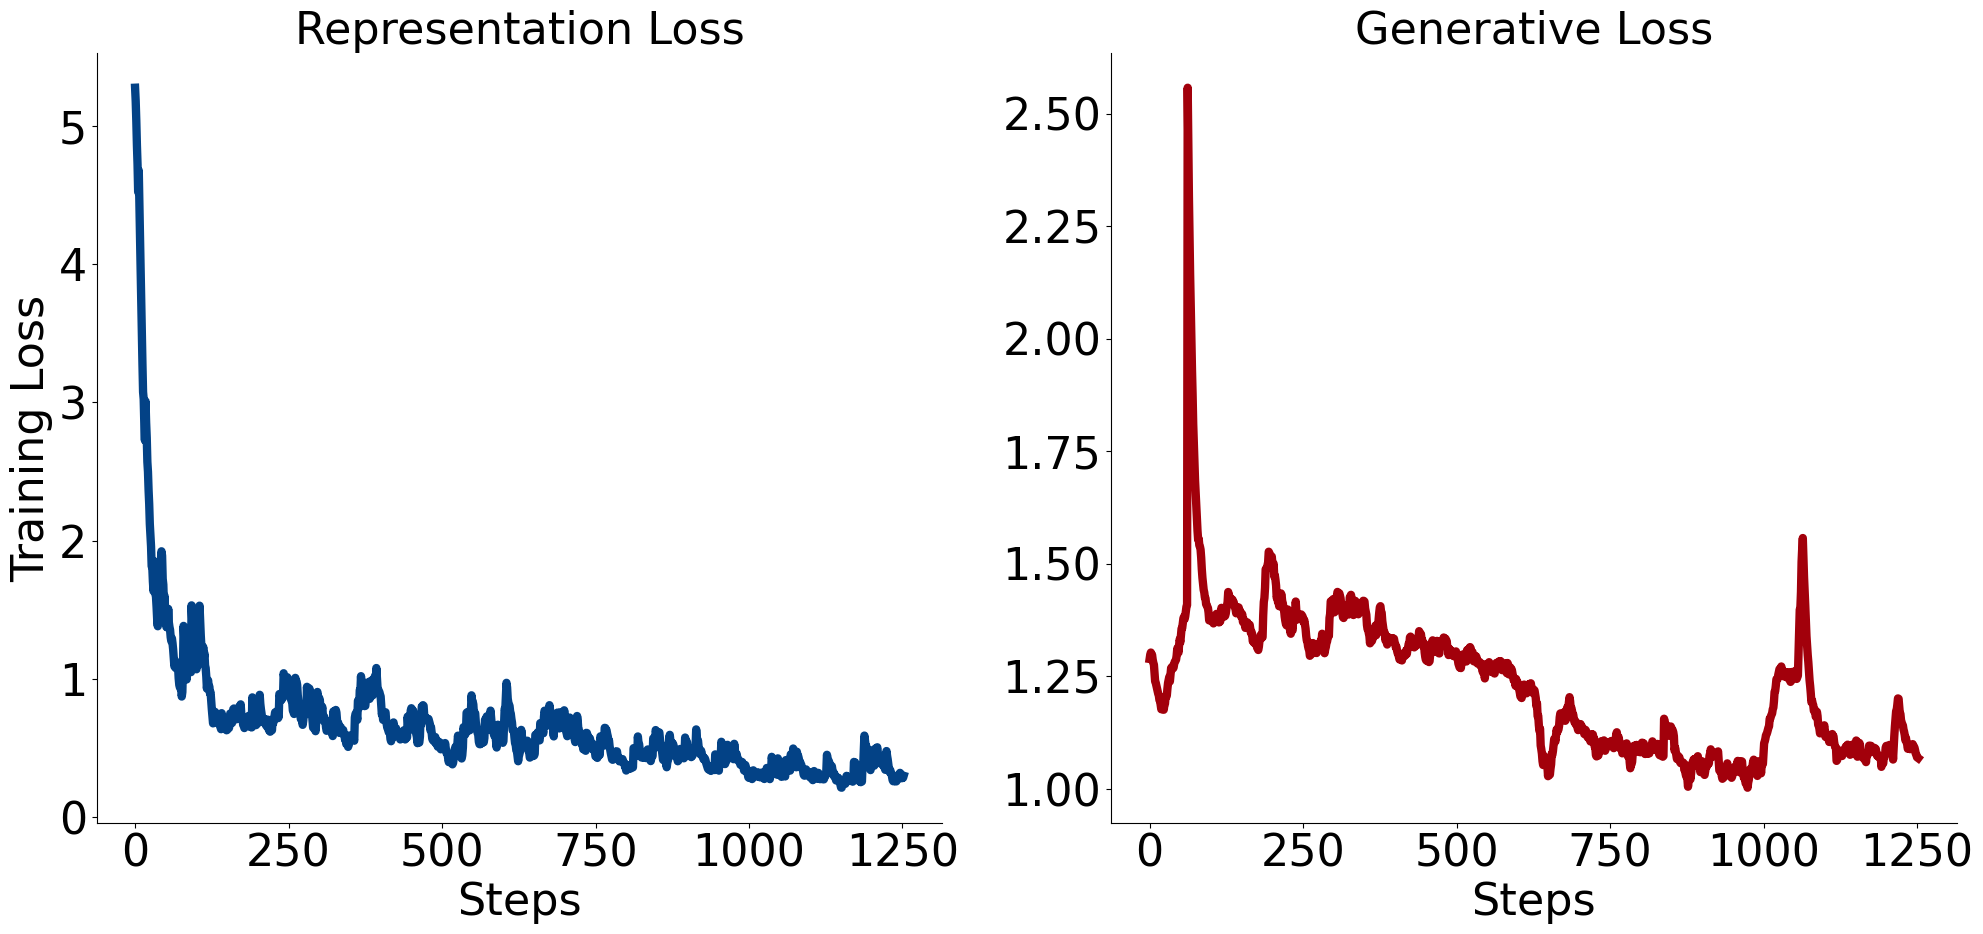

In [ ]:
path_g = "lossgen.csv"
path_e = "lossemb.csv"

import pandas as pd

with open(path_g, "r") as f:
    df_g = pd.read_csv(f)
    #df_g = df_g[::2]

with open(path_e, "r") as f:
    df_e = pd.read_csv(f)
    #df_e = df_e[::2]

# https://stackoverflow.com/questions/42281844/what-is-the-mathematics-behind-the-smoothing-parameter-in-tensorboards-scalar
def smooth(scalars, weight: float):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

for key in ["sgpt2_e5s_bs2048_bf16_mix32 - train/loss_emb"]:
    df_e[key] = smooth(df_e[key].values.tolist(), weight=0.9)

for key in ["sgpt2_e5s_bs2048_bf16_mix32 - train/loss_gen"]:
    df_g[key] = smooth(df_g[key].values.tolist(), weight=0.9)


data = [df_e, df_g]

import matplotlib.pyplot as plt

FONTSIZE = 32

fig, axes = plt.subplots(figsize=(24, 10), ncols=2)

keys = [
    "sgpt2_e5s_bs2048_bf16_mix32 - train/loss_emb",
    "sgpt2_e5s_bs2048_bf16_mix32 - train/loss_gen"
]

titles = [
    "Representation Loss",
    "Generative Loss",
]

colors = [
#    "#CFE1F3",
#    "#F4CBCC"
    "#034286",
    "#A2000B",
]


for i, ax in enumerate(axes.flatten()):
  ax.plot(
      list(range(len(data[i][keys[i]]))),
      data[i][keys[i]],
      linewidth=6.0,
      color=colors[i],
  )

  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)

  if i in [0]:
    ax.set_ylabel("Training Loss", fontsize=FONTSIZE)
  ax.set_xlabel("Steps", fontsize=FONTSIZE)

  ax.set_title(titles[i], fontsize=FONTSIZE)

#plt.ylim(
#    [0, 3.9]
#)

#plt.xlim(
#    [-10, 1260]
#)


plt.savefig('loss7.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
%%writefile lossembm8x7.csv
"Step","sgpt2_m8x7_steps1253_lowergenweight - train/loss_emb","sgpt2_m8x7_steps1253_lowergenweight - train/loss_emb__MIN","sgpt2_m8x7_steps1253_lowergenweight - train/loss_emb__MAX"
"1","2.5859909057617188","2.5859909057617188","2.5859909057617188"
"3","3.43798828125","3.43798828125","3.43798828125"
"5","5.40863037109375","5.40863037109375","5.40863037109375"
"7","5.4305419921875","5.4305419921875","5.4305419921875"
"9","5.34088134765625","5.34088134765625","5.34088134765625"
"11","5.387969970703125","5.387969970703125","5.387969970703125"
"13","3.0557708740234375","3.0557708740234375","3.0557708740234375"
"15","5.3944091796875","5.3944091796875","5.3944091796875"
"17","3.2726058959960938","3.2726058959960938","3.2726058959960938"
"19","5.342742919921875","5.342742919921875","5.342742919921875"
"21","3.741701126098633","3.741701126098633","3.741701126098633"
"23","29.97442626953125","29.97442626953125","29.97442626953125"
"25","4.569305419921875","4.569305419921875","4.569305419921875"
"27","4.658176422119141","4.658176422119141","4.658176422119141"
"29","4.9114990234375","4.9114990234375","4.9114990234375"
"31","3.738032817840576","3.738032817840576","3.738032817840576"
"33","4.230918884277344","4.230918884277344","4.230918884277344"
"35","3.7457542419433594","3.7457542419433594","3.7457542419433594"
"37","3.001732110977173","3.001732110977173","3.001732110977173"
"39","23.600189208984375","23.600189208984375","23.600189208984375"
"41","0.7678672671318054","0.7678672671318054","0.7678672671318054"
"43","2.7523865699768066","2.7523865699768066","2.7523865699768066"
"45","2.030305862426758","2.030305862426758","2.030305862426758"
"47","1.582360029220581","1.582360029220581","1.582360029220581"
"49","2.6767454147338867","2.6767454147338867","2.6767454147338867"
"51","3.166555404663086","3.166555404663086","3.166555404663086"
"53","1.0371990203857422","1.0371990203857422","1.0371990203857422"
"55","1.4097709655761719","1.4097709655761719","1.4097709655761719"
"57","0.9562391638755798","0.9562391638755798","0.9562391638755798"
"59","0.2666870057582855","0.2666870057582855","0.2666870057582855"
"61","2.617234230041504","2.617234230041504","2.617234230041504"
"63","1.361353874206543","1.361353874206543","1.361353874206543"
"65","0.9833151698112488","0.9833151698112488","0.9833151698112488"
"67","1.4120986461639404","1.4120986461639404","1.4120986461639404"
"69","14.930088996887207","14.930088996887207","14.930088996887207"
"71","0.7713515758514404","0.7713515758514404","0.7713515758514404"
"73","0.15795797109603882","0.15795797109603882","0.15795797109603882"
"75","8.93513298034668","8.93513298034668","8.93513298034668"
"77","1.920912504196167","1.920912504196167","1.920912504196167"
"79","1.3866047859191895","1.3866047859191895","1.3866047859191895"
"81","3.298021078109741","3.298021078109741","3.298021078109741"
"83","1.2049592733383179","1.2049592733383179","1.2049592733383179"
"85","2.45336651802063","2.45336651802063","2.45336651802063"
"87","1.9243029356002808","1.9243029356002808","1.9243029356002808"
"89","1.1053907871246338","1.1053907871246338","1.1053907871246338"
"91","1.0669797658920288","1.0669797658920288","1.0669797658920288"
"93","0.6201077699661255","0.6201077699661255","0.6201077699661255"
"95","0.40520817041397095","0.40520817041397095","0.40520817041397095"
"97","0.5634393692016602","0.5634393692016602","0.5634393692016602"
"99","0.8962798118591309","0.8962798118591309","0.8962798118591309"
"101","1.3181843757629395","1.3181843757629395","1.3181843757629395"
"103","0.7171468138694763","0.7171468138694763","0.7171468138694763"
"105","0.9489986896514893","0.9489986896514893","0.9489986896514893"
"107","0.8616189956665039","0.8616189956665039","0.8616189956665039"
"109","0.5565893054008484","0.5565893054008484","0.5565893054008484"
"111","1.006685733795166","1.006685733795166","1.006685733795166"
"113","0.8557106256484985","0.8557106256484985","0.8557106256484985"
"115","0.7701807022094727","0.7701807022094727","0.7701807022094727"
"117","1.2459558248519897","1.2459558248519897","1.2459558248519897"
"119","0.44533833861351013","0.44533833861351013","0.44533833861351013"
"121","0.8364842534065247","0.8364842534065247","0.8364842534065247"
"123","0.4823092818260193","0.4823092818260193","0.4823092818260193"
"125","3.9236667156219482","3.9236667156219482","3.9236667156219482"
"127","0.1856413334608078","0.1856413334608078","0.1856413334608078"
"129","0.3215603232383728","0.3215603232383728","0.3215603232383728"
"131","0.6364310383796692","0.6364310383796692","0.6364310383796692"
"133","0.16277824342250824","0.16277824342250824","0.16277824342250824"
"135","0.5833942294120789","0.5833942294120789","0.5833942294120789"
"137","0.7424079775810242","0.7424079775810242","0.7424079775810242"
"139","0.7627173066139221","0.7627173066139221","0.7627173066139221"
"141","1.0910145044326782","1.0910145044326782","1.0910145044326782"
"143","0.7302650213241577","0.7302650213241577","0.7302650213241577"
"145","0.511082112789154","0.511082112789154","0.511082112789154"
"147","1.0661606788635254","1.0661606788635254","1.0661606788635254"
"149","0.3044125735759735","0.3044125735759735","0.3044125735759735"
"151","0.7139964699745178","0.7139964699745178","0.7139964699745178"
"153","1.1621482372283936","1.1621482372283936","1.1621482372283936"
"155","0.658899188041687","0.658899188041687","0.658899188041687"
"157","0.09046874940395355","0.09046874940395355","0.09046874940395355"
"159","0.6338229179382324","0.6338229179382324","0.6338229179382324"
"161","0.6627600193023682","0.6627600193023682","0.6627600193023682"
"163","0.995842695236206","0.995842695236206","0.995842695236206"
"165","0.3857523798942566","0.3857523798942566","0.3857523798942566"
"167","0.7386616468429565","0.7386616468429565","0.7386616468429565"
"169","0.1481523960828781","0.1481523960828781","0.1481523960828781"
"171","0.3760240972042084","0.3760240972042084","0.3760240972042084"
"173","0.6655573844909668","0.6655573844909668","0.6655573844909668"
"175","0.4658558666706085","0.4658558666706085","0.4658558666706085"
"177","0.14082524180412292","0.14082524180412292","0.14082524180412292"
"179","0.44056448340415955","0.44056448340415955","0.44056448340415955"
"181","0.26446858048439026","0.26446858048439026","0.26446858048439026"
"183","1.2445685863494873","1.2445685863494873","1.2445685863494873"
"185","0.9747092127799988","0.9747092127799988","0.9747092127799988"
"187","0.3536718785762787","0.3536718785762787","0.3536718785762787"
"189","0.07918701320886612","0.07918701320886612","0.07918701320886612"
"191","0.2081574648618698","0.2081574648618698","0.2081574648618698"
"193","0.4152987003326416","0.4152987003326416","0.4152987003326416"
"195","0.6850112676620483","0.6850112676620483","0.6850112676620483"
"197","0.7635858058929443","0.7635858058929443","0.7635858058929443"
"199","0.14772439002990723","0.14772439002990723","0.14772439002990723"
"201","0.1887781322002411","0.1887781322002411","0.1887781322002411"
"203","0.7149456143379211","0.7149456143379211","0.7149456143379211"
"205","0.6549466848373413","0.6549466848373413","0.6549466848373413"
"207","0.6556589007377625","0.6556589007377625","0.6556589007377625"
"209","0.3774963319301605","0.3774963319301605","0.3774963319301605"
"211","0.8689075112342834","0.8689075112342834","0.8689075112342834"
"213","0.5947891473770142","0.5947891473770142","0.5947891473770142"
"215","1.2064021825790405","1.2064021825790405","1.2064021825790405"
"217","0.6325181722640991","0.6325181722640991","0.6325181722640991"
"219","0.6338579654693604","0.6338579654693604","0.6338579654693604"
"221","0.5167694091796875","0.5167694091796875","0.5167694091796875"
"223","0.8869698643684387","0.8869698643684387","0.8869698643684387"
"225","0.49456799030303955","0.49456799030303955","0.49456799030303955"
"227","0.44664496183395386","0.44664496183395386","0.44664496183395386"
"229","0.09135615080595016","0.09135615080595016","0.09135615080595016"
"231","0.5478423833847046","0.5478423833847046","0.5478423833847046"
"233","1.150078296661377","1.150078296661377","1.150078296661377"
"235","3.3223323822021484","3.3223323822021484","3.3223323822021484"
"237","1.054551601409912","1.054551601409912","1.054551601409912"
"239","0.455025315284729","0.455025315284729","0.455025315284729"
"241","0.6344835162162781","0.6344835162162781","0.6344835162162781"
"243","0.4828758239746094","0.4828758239746094","0.4828758239746094"
"245","0.5885303616523743","0.5885303616523743","0.5885303616523743"
"247","1.0128827095031738","1.0128827095031738","1.0128827095031738"
"249","0.649793803691864","0.649793803691864","0.649793803691864"
"251","0.6991227269172668","0.6991227269172668","0.6991227269172668"
"253","0.2666430175304413","0.2666430175304413","0.2666430175304413"
"255","0.5043237209320068","0.5043237209320068","0.5043237209320068"
"257","0.3358006179332733","0.3358006179332733","0.3358006179332733"
"259","0.667792558670044","0.667792558670044","0.667792558670044"
"261","0.7261888980865479","0.7261888980865479","0.7261888980865479"
"263","1.3241437673568726","1.3241437673568726","1.3241437673568726"
"265","1.019029140472412","1.019029140472412","1.019029140472412"
"267","0.611832320690155","0.611832320690155","0.611832320690155"
"269","0.5683175325393677","0.5683175325393677","0.5683175325393677"
"271","0.4725509583950043","0.4725509583950043","0.4725509583950043"
"273","0.28537750244140625","0.28537750244140625","0.28537750244140625"
"275","0.7097409963607788","0.7097409963607788","0.7097409963607788"
"277","2.545933723449707","2.545933723449707","2.545933723449707"
"279","1.1430079936981201","1.1430079936981201","1.1430079936981201"
"281","0.47692447900772095","0.47692447900772095","0.47692447900772095"
"283","0.5303531885147095","0.5303531885147095","0.5303531885147095"
"285","0.6365388035774231","0.6365388035774231","0.6365388035774231"
"287","0.4433320164680481","0.4433320164680481","0.4433320164680481"
"289","0.5094185471534729","0.5094185471534729","0.5094185471534729"
"291","0.5063520669937134","0.5063520669937134","0.5063520669937134"
"293","0.10448052734136581","0.10448052734136581","0.10448052734136581"
"295","0.571321964263916","0.571321964263916","0.571321964263916"
"297","0.9262727499008179","0.9262727499008179","0.9262727499008179"
"299","0.7580697536468506","0.7580697536468506","0.7580697536468506"
"301","0.7484127879142761","0.7484127879142761","0.7484127879142761"
"303","0.8506418466567993","0.8506418466567993","0.8506418466567993"
"305","0.0996423065662384","0.0996423065662384","0.0996423065662384"
"307","0.6092372536659241","0.6092372536659241","0.6092372536659241"
"309","1.2166838645935059","1.2166838645935059","1.2166838645935059"
"311","0.651331901550293","0.651331901550293","0.651331901550293"
"313","0.06964191794395447","0.06964191794395447","0.06964191794395447"
"315","0.33351194858551025","0.33351194858551025","0.33351194858551025"
"317","0.7014697194099426","0.7014697194099426","0.7014697194099426"
"319","0.2031804472208023","0.2031804472208023","0.2031804472208023"
"321","2.339266777038574","2.339266777038574","2.339266777038574"
"323","0.9524787664413452","0.9524787664413452","0.9524787664413452"
"325","0.9674572944641113","0.9674572944641113","0.9674572944641113"
"327","0.5994418263435364","0.5994418263435364","0.5994418263435364"
"329","0.37303197383880615","0.37303197383880615","0.37303197383880615"
"331","0.639759361743927","0.639759361743927","0.639759361743927"
"333","0.1331522911787033","0.1331522911787033","0.1331522911787033"
"335","0.6016853451728821","0.6016853451728821","0.6016853451728821"
"337","0.6345038414001465","0.6345038414001465","0.6345038414001465"
"339","0.4051213562488556","0.4051213562488556","0.4051213562488556"
"341","0.49411919713020325","0.49411919713020325","0.49411919713020325"
"343","0.5510592460632324","0.5510592460632324","0.5510592460632324"
"345","0.6515567302703857","0.6515567302703857","0.6515567302703857"
"347","0.31565621495246887","0.31565621495246887","0.31565621495246887"
"349","0.5205374956130981","0.5205374956130981","0.5205374956130981"
"351","0.6409332752227783","0.6409332752227783","0.6409332752227783"
"353","0.2706284523010254","0.2706284523010254","0.2706284523010254"
"355","0.7963588833808899","0.7963588833808899","0.7963588833808899"
"357","0.3580177128314972","0.3580177128314972","0.3580177128314972"
"359","0.0816783607006073","0.0816783607006073","0.0816783607006073"
"361","0.29668882489204407","0.29668882489204407","0.29668882489204407"
"363","0.4986167550086975","0.4986167550086975","0.4986167550086975"
"365","0.5133488178253174","0.5133488178253174","0.5133488178253174"
"367","0.3673982322216034","0.3673982322216034","0.3673982322216034"
"369","0.5932964086532593","0.5932964086532593","0.5932964086532593"
"371","0.4781661331653595","0.4781661331653595","0.4781661331653595"
"373","0.7768592238426208","0.7768592238426208","0.7768592238426208"
"375","0.5637921690940857","0.5637921690940857","0.5637921690940857"
"377","0.8585696220397949","0.8585696220397949","0.8585696220397949"
"379","0.3009854257106781","0.3009854257106781","0.3009854257106781"
"381","0.11773161590099335","0.11773161590099335","0.11773161590099335"
"383","0.9633022546768188","0.9633022546768188","0.9633022546768188"
"385","2.1598174571990967","2.1598174571990967","2.1598174571990967"
"387","0.46373435854911804","0.46373435854911804","0.46373435854911804"
"389","0.4746275246143341","0.4746275246143341","0.4746275246143341"
"391","0.4790728986263275","0.4790728986263275","0.4790728986263275"
"393","0.5096544623374939","0.5096544623374939","0.5096544623374939"
"395","0.5271168351173401","0.5271168351173401","0.5271168351173401"
"397","0.08399096876382828","0.08399096876382828","0.08399096876382828"
"399","0.5585386753082275","0.5585386753082275","0.5585386753082275"
"401","1.008215069770813","1.008215069770813","1.008215069770813"
"403","0.2559257447719574","0.2559257447719574","0.2559257447719574"
"405","0.20173950493335724","0.20173950493335724","0.20173950493335724"
"407","0.4532337188720703","0.4532337188720703","0.4532337188720703"
"409","2.159254789352417","2.159254789352417","2.159254789352417"
"411","0.42343637347221375","0.42343637347221375","0.42343637347221375"
"413","0.08288691937923431","0.08288691937923431","0.08288691937923431"
"415","0.368338406085968","0.368338406085968","0.368338406085968"
"417","0.14278444647789001","0.14278444647789001","0.14278444647789001"
"419","0.41287750005722046","0.41287750005722046","0.41287750005722046"
"421","0.21118497848510742","0.21118497848510742","0.21118497848510742"
"423","0.25605931878089905","0.25605931878089905","0.25605931878089905"
"425","0.5202109813690186","0.5202109813690186","0.5202109813690186"
"427","0.9338672161102295","0.9338672161102295","0.9338672161102295"
"429","0.644945502281189","0.644945502281189","0.644945502281189"
"431","0.21379590034484863","0.21379590034484863","0.21379590034484863"
"433","0.9280150532722473","0.9280150532722473","0.9280150532722473"
"435","0.5253414511680603","0.5253414511680603","0.5253414511680603"
"437","1.8631335496902466","1.8631335496902466","1.8631335496902466"
"439","0.18529488146305084","0.18529488146305084","0.18529488146305084"
"441","0.5109534859657288","0.5109534859657288","0.5109534859657288"
"443","0.1533096730709076","0.1533096730709076","0.1533096730709076"
"445","0.5747745037078857","0.5747745037078857","0.5747745037078857"
"447","0.5982246398925781","0.5982246398925781","0.5982246398925781"
"449","1.5288013219833374","1.5288013219833374","1.5288013219833374"
"451","0.5407741069793701","0.5407741069793701","0.5407741069793701"
"453","0.4839426577091217","0.4839426577091217","0.4839426577091217"
"455","0.9607013463973999","0.9607013463973999","0.9607013463973999"
"457","0.284109503030777","0.284109503030777","0.284109503030777"
"459","0.40788257122039795","0.40788257122039795","0.40788257122039795"
"461","0.2506043612957001","0.2506043612957001","0.2506043612957001"
"463","1.6344695091247559","1.6344695091247559","1.6344695091247559"
"465","0.5218517184257507","0.5218517184257507","0.5218517184257507"
"467","0.474107027053833","0.474107027053833","0.474107027053833"
"469","0.5468706488609314","0.5468706488609314","0.5468706488609314"
"471","0.6232680678367615","0.6232680678367615","0.6232680678367615"
"473","0.837803304195404","0.837803304195404","0.837803304195404"
"475","0.41631704568862915","0.41631704568862915","0.41631704568862915"
"477","0.8642114400863647","0.8642114400863647","0.8642114400863647"
"479","0.35738277435302734","0.35738277435302734","0.35738277435302734"
"481","0.938159704208374","0.938159704208374","0.938159704208374"
"483","0.5596637725830078","0.5596637725830078","0.5596637725830078"
"485","0.5675186514854431","0.5675186514854431","0.5675186514854431"
"487","0.7514461278915405","0.7514461278915405","0.7514461278915405"
"489","0.7661546468734741","0.7661546468734741","0.7661546468734741"
"491","0.21076762676239014","0.21076762676239014","0.21076762676239014"
"493","0.12574350833892822","0.12574350833892822","0.12574350833892822"
"495","0.4127461016178131","0.4127461016178131","0.4127461016178131"
"497","0.2925323247909546","0.2925323247909546","0.2925323247909546"
"499","0.12841682136058807","0.12841682136058807","0.12841682136058807"
"501","0.14942651987075806","0.14942651987075806","0.14942651987075806"
"503","0.42714959383010864","0.42714959383010864","0.42714959383010864"
"505","0.4593577980995178","0.4593577980995178","0.4593577980995178"
"507","0.13892096281051636","0.13892096281051636","0.13892096281051636"
"509","0.808840811252594","0.808840811252594","0.808840811252594"
"511","0.35798704624176025","0.35798704624176025","0.35798704624176025"
"513","0.06040697544813156","0.06040697544813156","0.06040697544813156"
"515","0.4393303096294403","0.4393303096294403","0.4393303096294403"
"517","0.6271726489067078","0.6271726489067078","0.6271726489067078"
"519","0.3922421336174011","0.3922421336174011","0.3922421336174011"
"521","0.1832541525363922","0.1832541525363922","0.1832541525363922"
"523","0.8662243485450745","0.8662243485450745","0.8662243485450745"
"525","0.24785226583480835","0.24785226583480835","0.24785226583480835"
"527","1.3739205598831177","1.3739205598831177","1.3739205598831177"
"529","0.18226143717765808","0.18226143717765808","0.18226143717765808"
"531","1.3267688751220703","1.3267688751220703","1.3267688751220703"
"533","0.5065665245056152","0.5065665245056152","0.5065665245056152"
"535","0.3558098077774048","0.3558098077774048","0.3558098077774048"
"537","0.5588787794113159","0.5588787794113159","0.5588787794113159"
"539","0.8519302606582642","0.8519302606582642","0.8519302606582642"
"541","0.3366621732711792","0.3366621732711792","0.3366621732711792"
"543","0.44490665197372437","0.44490665197372437","0.44490665197372437"
"545","0.43471837043762207","0.43471837043762207","0.43471837043762207"
"547","0.5033778548240662","0.5033778548240662","0.5033778548240662"
"549","0.491714745759964","0.491714745759964","0.491714745759964"
"551","0.5313383936882019","0.5313383936882019","0.5313383936882019"
"553","0.4906861484050751","0.4906861484050751","0.4906861484050751"
"555","0.5498256087303162","0.5498256087303162","0.5498256087303162"
"557","0.1640150099992752","0.1640150099992752","0.1640150099992752"
"559","0.06818430125713348","0.06818430125713348","0.06818430125713348"
"561","0.4874870479106903","0.4874870479106903","0.4874870479106903"
"563","0.5429640412330627","0.5429640412330627","0.5429640412330627"
"565","0.5226806402206421","0.5226806402206421","0.5226806402206421"
"567","0.33052775263786316","0.33052775263786316","0.33052775263786316"
"569","0.1349181830883026","0.1349181830883026","0.1349181830883026"
"571","0.48722273111343384","0.48722273111343384","0.48722273111343384"
"573","0.8803345561027527","0.8803345561027527","0.8803345561027527"
"575","0.15581929683685303","0.15581929683685303","0.15581929683685303"
"577","0.3068750500679016","0.3068750500679016","0.3068750500679016"
"579","0.7511418461799622","0.7511418461799622","0.7511418461799622"
"581","0.4557717740535736","0.4557717740535736","0.4557717740535736"
"583","0.10353536158800125","0.10353536158800125","0.10353536158800125"
"585","0.18988700211048126","0.18988700211048126","0.18988700211048126"
"587","0.18310309946537018","0.18310309946537018","0.18310309946537018"
"589","0.5200821161270142","0.5200821161270142","0.5200821161270142"
"591","0.5297976136207581","0.5297976136207581","0.5297976136207581"
"593","0.5191231966018677","0.5191231966018677","0.5191231966018677"
"595","0.7039936184883118","0.7039936184883118","0.7039936184883118"
"597","0.17144723236560822","0.17144723236560822","0.17144723236560822"
"599","0.6733008027076721","0.6733008027076721","0.6733008027076721"
"601","0.48100367188453674","0.48100367188453674","0.48100367188453674"
"603","0.4198674261569977","0.4198674261569977","0.4198674261569977"
"605","1.4919393062591553","1.4919393062591553","1.4919393062591553"
"607","0.6241165995597839","0.6241165995597839","0.6241165995597839"
"609","0.3966551423072815","0.3966551423072815","0.3966551423072815"
"611","0.3676193952560425","0.3676193952560425","0.3676193952560425"
"613","0.45497971773147583","0.45497971773147583","0.45497971773147583"
"615","1.1710419654846191","1.1710419654846191","1.1710419654846191"
"617","0.45532315969467163","0.45532315969467163","0.45532315969467163"
"619","0.4527921676635742","0.4527921676635742","0.4527921676635742"
"621","0.5035154819488525","0.5035154819488525","0.5035154819488525"
"623","0.7179713249206543","0.7179713249206543","0.7179713249206543"
"625","0.500817596912384","0.500817596912384","0.500817596912384"
"627","0.14745700359344482","0.14745700359344482","0.14745700359344482"
"629","0.6513350009918213","0.6513350009918213","0.6513350009918213"
"631","0.8341620564460754","0.8341620564460754","0.8341620564460754"
"633","0.4388071596622467","0.4388071596622467","0.4388071596622467"
"635","1.349884033203125","1.349884033203125","1.349884033203125"
"637","0.4003736972808838","0.4003736972808838","0.4003736972808838"
"639","0.40757888555526733","0.40757888555526733","0.40757888555526733"
"641","0.22466234862804413","0.22466234862804413","0.22466234862804413"
"643","0.39588987827301025","0.39588987827301025","0.39588987827301025"
"645","0.2080838680267334","0.2080838680267334","0.2080838680267334"
"647","0.6293033361434937","0.6293033361434937","0.6293033361434937"
"649","0.41930443048477173","0.41930443048477173","0.41930443048477173"
"651","0.46432003378868103","0.46432003378868103","0.46432003378868103"
"653","0.6615020632743835","0.6615020632743835","0.6615020632743835"
"655","1.370216727256775","1.370216727256775","1.370216727256775"
"657","0.5595712661743164","0.5595712661743164","0.5595712661743164"
"659","0.4425479769706726","0.4425479769706726","0.4425479769706726"
"661","0.6071483492851257","0.6071483492851257","0.6071483492851257"
"663","0.08448673039674759","0.08448673039674759","0.08448673039674759"
"665","0.2691769599914551","0.2691769599914551","0.2691769599914551"
"667","0.1982148438692093","0.1982148438692093","0.1982148438692093"
"669","0.34207242727279663","0.34207242727279663","0.34207242727279663"
"671","1.386653184890747","1.386653184890747","1.386653184890747"
"673","1.2439013719558716","1.2439013719558716","1.2439013719558716"
"675","1.18491530418396","1.18491530418396","1.18491530418396"
"677","0.43164247274398804","0.43164247274398804","0.43164247274398804"
"679","0.11144979298114777","0.11144979298114777","0.11144979298114777"
"681","0.742888867855072","0.742888867855072","0.742888867855072"
"683","1.035654902458191","1.035654902458191","1.035654902458191"
"685","0.3608972728252411","0.3608972728252411","0.3608972728252411"
"687","0.19051532447338104","0.19051532447338104","0.19051532447338104"
"689","0.2005426287651062","0.2005426287651062","0.2005426287651062"
"691","0.0758131593465805","0.0758131593465805","0.0758131593465805"
"693","0.711742639541626","0.711742639541626","0.711742639541626"
"695","0.35227152705192566","0.35227152705192566","0.35227152705192566"
"697","0.26157429814338684","0.26157429814338684","0.26157429814338684"
"699","0.5154069662094116","0.5154069662094116","0.5154069662094116"
"701","0.4251735210418701","0.4251735210418701","0.4251735210418701"
"703","0.3210882544517517","0.3210882544517517","0.3210882544517517"
"705","0.7723855972290039","0.7723855972290039","0.7723855972290039"
"707","0.12309011816978455","0.12309011816978455","0.12309011816978455"
"709","0.42056506872177124","0.42056506872177124","0.42056506872177124"
"711","0.629405677318573","0.629405677318573","0.629405677318573"
"713","0.5276479125022888","0.5276479125022888","0.5276479125022888"
"715","1.309659719467163","1.309659719467163","1.309659719467163"
"717","0.8443650007247925","0.8443650007247925","0.8443650007247925"
"719","0.4438135623931885","0.4438135623931885","0.4438135623931885"
"721","0.047632575035095215","0.047632575035095215","0.047632575035095215"
"723","0.5317964553833008","0.5317964553833008","0.5317964553833008"
"725","0.4498506486415863","0.4498506486415863","0.4498506486415863"
"727","0.7111732363700867","0.7111732363700867","0.7111732363700867"
"729","0.39472392201423645","0.39472392201423645","0.39472392201423645"
"731","0.28408852219581604","0.28408852219581604","0.28408852219581604"
"733","1.169932246208191","1.169932246208191","1.169932246208191"
"735","1.1248283386230469","1.1248283386230469","1.1248283386230469"
"737","0.43727216124534607","0.43727216124534607","0.43727216124534607"
"739","0.748047947883606","0.748047947883606","0.748047947883606"
"741","0.5393978357315063","0.5393978357315063","0.5393978357315063"
"743","1.1480287313461304","1.1480287313461304","1.1480287313461304"
"745","1.1006494760513306","1.1006494760513306","1.1006494760513306"
"747","0.23451153934001923","0.23451153934001923","0.23451153934001923"
"749","0.5293759107589722","0.5293759107589722","0.5293759107589722"
"751","0.20890626311302185","0.20890626311302185","0.20890626311302185"
"753","0.5407904386520386","0.5407904386520386","0.5407904386520386"
"755","0.2616744041442871","0.2616744041442871","0.2616744041442871"
"757","0.06507163494825363","0.06507163494825363","0.06507163494825363"
"759","0.34244680404663086","0.34244680404663086","0.34244680404663086"
"761","0.3282421827316284","0.3282421827316284","0.3282421827316284"
"763","0.4476775527000427","0.4476775527000427","0.4476775527000427"
"765","0.12723365426063538","0.12723365426063538","0.12723365426063538"
"767","1.1758317947387695","1.1758317947387695","1.1758317947387695"
"769","0.4801747798919678","0.4801747798919678","0.4801747798919678"
"771","0.40041446685791016","0.40041446685791016","0.40041446685791016"
"773","0.5247684717178345","0.5247684717178345","0.5247684717178345"
"775","0.465968519449234","0.465968519449234","0.465968519449234"
"777","1.2931463718414307","1.2931463718414307","1.2931463718414307"
"779","0.08639176189899445","0.08639176189899445","0.08639176189899445"
"781","0.5548657774925232","0.5548657774925232","0.5548657774925232"
"783","0.5316032767295837","0.5316032767295837","0.5316032767295837"
"785","0.44744905829429626","0.44744905829429626","0.44744905829429626"
"787","0.41184210777282715","0.41184210777282715","0.41184210777282715"
"789","0.42554235458374023","0.42554235458374023","0.42554235458374023"
"791","0.9479082226753235","0.9479082226753235","0.9479082226753235"
"793","0.5358269214630127","0.5358269214630127","0.5358269214630127"
"795","0.45059525966644287","0.45059525966644287","0.45059525966644287"
"797","0.9659423828125","0.9659423828125","0.9659423828125"
"799","0.583738386631012","0.583738386631012","0.583738386631012"
"801","0.3470475375652313","0.3470475375652313","0.3470475375652313"
"803","0.41728776693344116","0.41728776693344116","0.41728776693344116"
"805","0.29236143827438354","0.29236143827438354","0.29236143827438354"
"807","0.5004459619522095","0.5004459619522095","0.5004459619522095"
"809","0.3498128056526184","0.3498128056526184","0.3498128056526184"
"811","0.41578763723373413","0.41578763723373413","0.41578763723373413"
"813","0.8010527491569519","0.8010527491569519","0.8010527491569519"
"815","0.27381375432014465","0.27381375432014465","0.27381375432014465"
"817","0.5176524519920349","0.5176524519920349","0.5176524519920349"
"819","0.08268194645643234","0.08268194645643234","0.08268194645643234"
"821","0.22649265825748444","0.22649265825748444","0.22649265825748444"
"823","0.16242937743663788","0.16242937743663788","0.16242937743663788"
"825","0.5029489398002625","0.5029489398002625","0.5029489398002625"
"827","0.4186372756958008","0.4186372756958008","0.4186372756958008"
"829","0.9502881169319153","0.9502881169319153","0.9502881169319153"
"831","0.04876982048153877","0.04876982048153877","0.04876982048153877"
"833","0.3255545496940613","0.3255545496940613","0.3255545496940613"
"835","0.27500399947166443","0.27500399947166443","0.27500399947166443"
"837","0.37615352869033813","0.37615352869033813","0.37615352869033813"
"839","0.4274669587612152","0.4274669587612152","0.4274669587612152"
"841","0.5487027764320374","0.5487027764320374","0.5487027764320374"
"843","0.4929858148097992","0.4929858148097992","0.4929858148097992"
"845","0.7005473971366882","0.7005473971366882","0.7005473971366882"
"847","0.41863659024238586","0.41863659024238586","0.41863659024238586"
"849","0.4473062753677368","0.4473062753677368","0.4473062753677368"
"851","0.4011339545249939","0.4011339545249939","0.4011339545249939"
"853","0.5157291889190674","0.5157291889190674","0.5157291889190674"
"855","0.28036895394325256","0.28036895394325256","0.28036895394325256"
"857","0.17448459565639496","0.17448459565639496","0.17448459565639496"
"859","0.42616376280784607","0.42616376280784607","0.42616376280784607"
"861","0.4151192605495453","0.4151192605495453","0.4151192605495453"
"863","0.4408283233642578","0.4408283233642578","0.4408283233642578"
"865","0.06623003631830215","0.06623003631830215","0.06623003631830215"
"867","0.21479052305221558","0.21479052305221558","0.21479052305221558"
"869","0.1223418265581131","0.1223418265581131","0.1223418265581131"
"871","0.7205754518508911","0.7205754518508911","0.7205754518508911"
"873","0.09464835375547409","0.09464835375547409","0.09464835375547409"
"875","0.34685271978378296","0.34685271978378296","0.34685271978378296"
"877","0.31313619017601013","0.31313619017601013","0.31313619017601013"
"879","0.9619198441505432","0.9619198441505432","0.9619198441505432"
"881","0.21898896992206573","0.21898896992206573","0.21898896992206573"
"883","0.09530333429574966","0.09530333429574966","0.09530333429574966"
"885","0.4118240773677826","0.4118240773677826","0.4118240773677826"
"887","0.45698511600494385","0.45698511600494385","0.45698511600494385"
"889","0.13014236092567444","0.13014236092567444","0.13014236092567444"
"891","0.3199242353439331","0.3199242353439331","0.3199242353439331"
"893","0.4668707251548767","0.4668707251548767","0.4668707251548767"
"895","0.061139583587646484","0.061139583587646484","0.061139583587646484"
"897","0.4663487374782562","0.4663487374782562","0.4663487374782562"
"899","0.6287557482719421","0.6287557482719421","0.6287557482719421"
"901","0.7485307455062866","0.7485307455062866","0.7485307455062866"
"903","1.1562910079956055","1.1562910079956055","1.1562910079956055"
"905","0.27608978748321533","0.27608978748321533","0.27608978748321533"
"907","0.3254348933696747","0.3254348933696747","0.3254348933696747"
"909","0.3620644211769104","0.3620644211769104","0.3620644211769104"
"911","0.15420052409172058","0.15420052409172058","0.15420052409172058"
"913","0.38976192474365234","0.38976192474365234","0.38976192474365234"
"915","0.35580751299858093","0.35580751299858093","0.35580751299858093"
"917","0.6003393530845642","0.6003393530845642","0.6003393530845642"
"919","0.4745759963989258","0.4745759963989258","0.4745759963989258"
"921","0.7499394416809082","0.7499394416809082","0.7499394416809082"
"923","0.8634871244430542","0.8634871244430542","0.8634871244430542"
"925","0.6780140399932861","0.6780140399932861","0.6780140399932861"
"927","1.0610334873199463","1.0610334873199463","1.0610334873199463"
"929","0.18552839756011963","0.18552839756011963","0.18552839756011963"
"931","0.7200524806976318","0.7200524806976318","0.7200524806976318"
"933","0.04663202166557312","0.04663202166557312","0.04663202166557312"
"935","0.40381017327308655","0.40381017327308655","0.40381017327308655"
"937","0.1058908998966217","0.1058908998966217","0.1058908998966217"
"939","0.3904067277908325","0.3904067277908325","0.3904067277908325"
"941","0.4249074459075928","0.4249074459075928","0.4249074459075928"
"943","0.41311895847320557","0.41311895847320557","0.41311895847320557"
"945","0.4219651222229004","0.4219651222229004","0.4219651222229004"
"947","0.1913202852010727","0.1913202852010727","0.1913202852010727"
"949","0.6521129012107849","0.6521129012107849","0.6521129012107849"
"951","0.2864731550216675","0.2864731550216675","0.2864731550216675"
"953","0.47561654448509216","0.47561654448509216","0.47561654448509216"
"955","0.18947133421897888","0.18947133421897888","0.18947133421897888"
"957","0.1344316005706787","0.1344316005706787","0.1344316005706787"
"959","0.2822611629962921","0.2822611629962921","0.2822611629962921"
"961","0.4783646762371063","0.4783646762371063","0.4783646762371063"
"963","0.3591791093349457","0.3591791093349457","0.3591791093349457"
"965","0.4703015387058258","0.4703015387058258","0.4703015387058258"
"967","0.514681875705719","0.514681875705719","0.514681875705719"
"969","0.5033997297286987","0.5033997297286987","0.5033997297286987"
"971","0.45815593004226685","0.45815593004226685","0.45815593004226685"
"973","0.8834680914878845","0.8834680914878845","0.8834680914878845"
"975","0.24465987086296082","0.24465987086296082","0.24465987086296082"
"977","0.3606114387512207","0.3606114387512207","0.3606114387512207"
"979","0.06677336990833282","0.06677336990833282","0.06677336990833282"
"981","0.3020992875099182","0.3020992875099182","0.3020992875099182"
"983","0.6373042464256287","0.6373042464256287","0.6373042464256287"
"985","0.4977905750274658","0.4977905750274658","0.4977905750274658"
"987","0.46336841583251953","0.46336841583251953","0.46336841583251953"
"989","0.5459595918655396","0.5459595918655396","0.5459595918655396"
"991","0.8922824859619141","0.8922824859619141","0.8922824859619141"
"993","1.1368359327316284","1.1368359327316284","1.1368359327316284"
"995","0.6463744044303894","0.6463744044303894","0.6463744044303894"
"997","0.08002618700265884","0.08002618700265884","0.08002618700265884"
"999","0.3740375339984894","0.3740375339984894","0.3740375339984894"
"1001","0.38819077610969543","0.38819077610969543","0.38819077610969543"
"1003","0.31530407071113586","0.31530407071113586","0.31530407071113586"
"1005","0.4298115372657776","0.4298115372657776","0.4298115372657776"
"1007","0.5373879671096802","0.5373879671096802","0.5373879671096802"
"1009","0.23256415128707886","0.23256415128707886","0.23256415128707886"
"1011","0.20334936678409576","0.20334936678409576","0.20334936678409576"
"1013","0.3622613847255707","0.3622613847255707","0.3622613847255707"
"1015","0.36411723494529724","0.36411723494529724","0.36411723494529724"
"1017","0.27038004994392395","0.27038004994392395","0.27038004994392395"
"1019","0.43281158804893494","0.43281158804893494","0.43281158804893494"
"1021","0.424481064081192","0.424481064081192","0.424481064081192"
"1023","1.071449637413025","1.071449637413025","1.071449637413025"
"1025","0.16678060591220856","0.16678060591220856","0.16678060591220856"
"1027","0.962988555431366","0.962988555431366","0.962988555431366"
"1029","0.4290865361690521","0.4290865361690521","0.4290865361690521"
"1031","0.117338627576828","0.117338627576828","0.117338627576828"
"1033","0.43663543462753296","0.43663543462753296","0.43663543462753296"
"1035","0.15310579538345337","0.15310579538345337","0.15310579538345337"
"1037","0.46892571449279785","0.46892571449279785","0.46892571449279785"
"1039","0.5717746019363403","0.5717746019363403","0.5717746019363403"
"1041","0.7007764577865601","0.7007764577865601","0.7007764577865601"
"1043","0.6457781195640564","0.6457781195640564","0.6457781195640564"
"1045","0.13328583538532257","0.13328583538532257","0.13328583538532257"
"1047","0.17216715216636658","0.17216715216636658","0.17216715216636658"
"1049","0.7619386911392212","0.7619386911392212","0.7619386911392212"
"1051","0.43943217396736145","0.43943217396736145","0.43943217396736145"
"1053","0.4486750364303589","0.4486750364303589","0.4486750364303589"
"1055","0.47692036628723145","0.47692036628723145","0.47692036628723145"
"1057","0.5516642928123474","0.5516642928123474","0.5516642928123474"
"1059","0.1820693016052246","0.1820693016052246","0.1820693016052246"
"1061","0.4260992705821991","0.4260992705821991","0.4260992705821991"
"1063","0.20672008395195007","0.20672008395195007","0.20672008395195007"
"1065","0.060206733644008636","0.060206733644008636","0.060206733644008636"
"1067","0.6700456142425537","0.6700456142425537","0.6700456142425537"
"1069","0.5023341774940491","0.5023341774940491","0.5023341774940491"
"1071","0.1834380328655243","0.1834380328655243","0.1834380328655243"
"1073","0.18690788745880127","0.18690788745880127","0.18690788745880127"
"1075","0.47764450311660767","0.47764450311660767","0.47764450311660767"
"1077","0.08992080390453339","0.08992080390453339","0.08992080390453339"
"1079","0.9104551076889038","0.9104551076889038","0.9104551076889038"
"1081","0.4520319998264313","0.4520319998264313","0.4520319998264313"
"1083","0.13886404037475586","0.13886404037475586","0.13886404037475586"
"1085","0.4014025926589966","0.4014025926589966","0.4014025926589966"
"1087","0.400596022605896","0.400596022605896","0.400596022605896"
"1089","0.20019005239009857","0.20019005239009857","0.20019005239009857"
"1091","0.40105611085891724","0.40105611085891724","0.40105611085891724"
"1093","1.023895263671875","1.023895263671875","1.023895263671875"
"1095","0.3714110851287842","0.3714110851287842","0.3714110851287842"
"1097","0.5866318345069885","0.5866318345069885","0.5866318345069885"
"1099","0.6507669687271118","0.6507669687271118","0.6507669687271118"
"1101","0.21842527389526367","0.21842527389526367","0.21842527389526367"
"1103","0.8846136331558228","0.8846136331558228","0.8846136331558228"
"1105","0.46440553665161133","0.46440553665161133","0.46440553665161133"
"1107","0.5221268534660339","0.5221268534660339","0.5221268534660339"
"1109","0.352603018283844","0.352603018283844","0.352603018283844"
"1111","0.48591116070747375","0.48591116070747375","0.48591116070747375"
"1113","0.8694994449615479","0.8694994449615479","0.8694994449615479"
"1115","1.2053731679916382","1.2053731679916382","1.2053731679916382"
"1117","0.44756296277046204","0.44756296277046204","0.44756296277046204"
"1119","0.7764044404029846","0.7764044404029846","0.7764044404029846"
"1121","0.26113268733024597","0.26113268733024597","0.26113268733024597"
"1123","1.1151666641235352","1.1151666641235352","1.1151666641235352"
"1125","1.098312258720398","1.098312258720398","1.098312258720398"
"1127","0.26783183217048645","0.26783183217048645","0.26783183217048645"
"1129","0.4319142997264862","0.4319142997264862","0.4319142997264862"
"1131","0.1734957993030548","0.1734957993030548","0.1734957993030548"
"1133","0.34399113059043884","0.34399113059043884","0.34399113059043884"
"1135","0.4639168679714203","0.4639168679714203","0.4639168679714203"
"1137","0.4316459000110626","0.4316459000110626","0.4316459000110626"
"1139","1.0114213228225708","1.0114213228225708","1.0114213228225708"
"1141","0.7121947407722473","0.7121947407722473","0.7121947407722473"
"1143","0.1627565324306488","0.1627565324306488","0.1627565324306488"
"1145","0.25400301814079285","0.25400301814079285","0.25400301814079285"
"1147","0.2549842596054077","0.2549842596054077","0.2549842596054077"
"1149","0.11186487972736359","0.11186487972736359","0.11186487972736359"
"1151","0.454050213098526","0.454050213098526","0.454050213098526"
"1153","0.12871655821800232","0.12871655821800232","0.12871655821800232"
"1155","0.3197118937969208","0.3197118937969208","0.3197118937969208"
"1157","0.41274410486221313","0.41274410486221313","0.41274410486221313"
"1159","1.0486565828323364","1.0486565828323364","1.0486565828323364"
"1161","0.32895246148109436","0.32895246148109436","0.32895246148109436"
"1163","0.5573216080665588","0.5573216080665588","0.5573216080665588"
"1165","0.3044835329055786","0.3044835329055786","0.3044835329055786"
"1167","0.1948094367980957","0.1948094367980957","0.1948094367980957"
"1169","0.4235664904117584","0.4235664904117584","0.4235664904117584"
"1171","0.12645596265792847","0.12645596265792847","0.12645596265792847"
"1173","0.1364251971244812","0.1364251971244812","0.1364251971244812"
"1175","0.43738216161727905","0.43738216161727905","0.43738216161727905"
"1177","0.6297048926353455","0.6297048926353455","0.6297048926353455"
"1179","0.11840932071208954","0.11840932071208954","0.11840932071208954"
"1181","0.38255834579467773","0.38255834579467773","0.38255834579467773"
"1183","0.2932542562484741","0.2932542562484741","0.2932542562484741"
"1185","0.5352697372436523","0.5352697372436523","0.5352697372436523"
"1187","0.44296860694885254","0.44296860694885254","0.44296860694885254"
"1189","0.3426753282546997","0.3426753282546997","0.3426753282546997"
"1191","0.5201364755630493","0.5201364755630493","0.5201364755630493"
"1193","0.42473989725112915","0.42473989725112915","0.42473989725112915"
"1195","0.4372956454753876","0.4372956454753876","0.4372956454753876"
"1197","0.621379554271698","0.621379554271698","0.621379554271698"
"1199","0.7844319939613342","0.7844319939613342","0.7844319939613342"
"1201","0.05523258075118065","0.05523258075118065","0.05523258075118065"
"1203","0.7580292224884033","0.7580292224884033","0.7580292224884033"
"1205","0.3011893332004547","0.3011893332004547","0.3011893332004547"
"1207","0.36048200726509094","0.36048200726509094","0.36048200726509094"
"1209","0.2047715038061142","0.2047715038061142","0.2047715038061142"
"1211","0.3859303891658783","0.3859303891658783","0.3859303891658783"
"1213","0.2660498321056366","0.2660498321056366","0.2660498321056366"
"1215","0.4342828094959259","0.4342828094959259","0.4342828094959259"
"1217","0.35019925236701965","0.35019925236701965","0.35019925236701965"
"1219","0.18676897883415222","0.18676897883415222","0.18676897883415222"
"1221","0.7280932664871216","0.7280932664871216","0.7280932664871216"
"1223","1.074617862701416","1.074617862701416","1.074617862701416"
"1225","0.1383170336484909","0.1383170336484909","0.1383170336484909"
"1227","0.5004464387893677","0.5004464387893677","0.5004464387893677"
"1229","0.23675042390823364","0.23675042390823364","0.23675042390823364"
"1231","0.8209904432296753","0.8209904432296753","0.8209904432296753"
"1233","0.5378912091255188","0.5378912091255188","0.5378912091255188"
"1235","1.1000057458877563","1.1000057458877563","1.1000057458877563"
"1237","0.2723361849784851","0.2723361849784851","0.2723361849784851"
"1239","0.47551271319389343","0.47551271319389343","0.47551271319389343"
"1241","0.44123154878616333","0.44123154878616333","0.44123154878616333"
"1243","0.18228094279766083","0.18228094279766083","0.18228094279766083"
"1245","0.12444442510604858","0.12444442510604858","0.12444442510604858"
"1247","0.3834867775440216","0.3834867775440216","0.3834867775440216"
"1249","0.3499264717102051","0.3499264717102051","0.3499264717102051"
"1251","0.4189261794090271","0.4189261794090271","0.4189261794090271"
"1253","0.4099402129650116","0.4099402129650116","0.4099402129650116"
"1255","1.2413742542266846","1.2413742542266846","1.2413742542266846"
"1257","0.7800391912460327","0.7800391912460327","0.7800391912460327"
"1259","0.6649671792984009","0.6649671792984009","0.6649671792984009"
"1261","0.3891552686691284","0.3891552686691284","0.3891552686691284"
"1263","0.45796340703964233","0.45796340703964233","0.45796340703964233"
"1265","0.13361746072769165","0.13361746072769165","0.13361746072769165"
"1267","0.42776796221733093","0.42776796221733093","0.42776796221733093"
"1269","0.367453396320343","0.367453396320343","0.367453396320343"
"1271","0.07119403779506683","0.07119403779506683","0.07119403779506683"
"1273","0.4789774417877197","0.4789774417877197","0.4789774417877197"
"1275","0.07135889679193497","0.07135889679193497","0.07135889679193497"
"1277","0.24409255385398865","0.24409255385398865","0.24409255385398865"
"1279","0.2974853515625","0.2974853515625","0.2974853515625"
"1281","0.37627798318862915","0.37627798318862915","0.37627798318862915"
"1283","0.44961172342300415","0.44961172342300415","0.44961172342300415"
"1285","0.1990508735179901","0.1990508735179901","0.1990508735179901"
"1287","0.45854753255844116","0.45854753255844116","0.45854753255844116"
"1289","0.5186263918876648","0.5186263918876648","0.5186263918876648"
"1291","0.2810916006565094","0.2810916006565094","0.2810916006565094"
"1293","0.2228265106678009","0.2228265106678009","0.2228265106678009"
"1295","0.18654829263687134","0.18654829263687134","0.18654829263687134"
"1297","0.8387044668197632","0.8387044668197632","0.8387044668197632"
"1299","0.09552065283060074","0.09552065283060074","0.09552065283060074"
"1301","0.3408887982368469","0.3408887982368469","0.3408887982368469"
"1303","0.7449396252632141","0.7449396252632141","0.7449396252632141"
"1305","0.04842705279588699","0.04842705279588699","0.04842705279588699"
"1307","0.24168014526367188","0.24168014526367188","0.24168014526367188"
"1309","0.9363839626312256","0.9363839626312256","0.9363839626312256"
"1311","0.2135162055492401","0.2135162055492401","0.2135162055492401"
"1313","0.09632007032632828","0.09632007032632828","0.09632007032632828"
"1315","0.37904098629951477","0.37904098629951477","0.37904098629951477"
"1317","0.2970653474330902","0.2970653474330902","0.2970653474330902"
"1319","0.6613165736198425","0.6613165736198425","0.6613165736198425"
"1321","0.24385720491409302","0.24385720491409302","0.24385720491409302"
"1323","0.08734636008739471","0.08734636008739471","0.08734636008739471"
"1325","0.35160189867019653","0.35160189867019653","0.35160189867019653"
"1327","0.9825999140739441","0.9825999140739441","0.9825999140739441"
"1329","0.4087142050266266","0.4087142050266266","0.4087142050266266"
"1331","0.19737324118614197","0.19737324118614197","0.19737324118614197"
"1333","0.726872980594635","0.726872980594635","0.726872980594635"
"1335","0.37722697854042053","0.37722697854042053","0.37722697854042053"
"1337","0.1060757040977478","0.1060757040977478","0.1060757040977478"
"1339","0.4039182662963867","0.4039182662963867","0.4039182662963867"
"1341","0.2996664345264435","0.2996664345264435","0.2996664345264435"
"1343","0.5415962338447571","0.5415962338447571","0.5415962338447571"
"1345","0.4183329641819","0.4183329641819","0.4183329641819"
"1347","0.14474722743034363","0.14474722743034363","0.14474722743034363"
"1349","0.6698282957077026","0.6698282957077026","0.6698282957077026"
"1351","0.542651891708374","0.542651891708374","0.542651891708374"
"1353","0.06730268895626068","0.06730268895626068","0.06730268895626068"
"1355","0.4615556001663208","0.4615556001663208","0.4615556001663208"
"1357","0.7417936325073242","0.7417936325073242","0.7417936325073242"
"1359","0.4311023950576782","0.4311023950576782","0.4311023950576782"
"1361","0.42729100584983826","0.42729100584983826","0.42729100584983826"
"1363","0.7639795541763306","0.7639795541763306","0.7639795541763306"
"1365","0.5012403726577759","0.5012403726577759","0.5012403726577759"
"1367","0.3112649917602539","0.3112649917602539","0.3112649917602539"
"1369","0.06642816960811615","0.06642816960811615","0.06642816960811615"
"1371","0.4916803240776062","0.4916803240776062","0.4916803240776062"
"1373","0.4237077534198761","0.4237077534198761","0.4237077534198761"
"1375","0.2620764970779419","0.2620764970779419","0.2620764970779419"
"1377","0.502839982509613","0.502839982509613","0.502839982509613"
"1379","0.43773141503334045","0.43773141503334045","0.43773141503334045"
"1381","0.41605812311172485","0.41605812311172485","0.41605812311172485"
"1383","0.09559578448534012","0.09559578448534012","0.09559578448534012"
"1385","0.8256537914276123","0.8256537914276123","0.8256537914276123"
"1387","0.6766486167907715","0.6766486167907715","0.6766486167907715"
"1389","0.14541752636432648","0.14541752636432648","0.14541752636432648"
"1391","0.3494977056980133","0.3494977056980133","0.3494977056980133"
"1393","0.4177985191345215","0.4177985191345215","0.4177985191345215"
"1395","0.11347253620624542","0.11347253620624542","0.11347253620624542"
"1397","0.1776587963104248","0.1776587963104248","0.1776587963104248"
"1399","0.29682523012161255","0.29682523012161255","0.29682523012161255"
"1401","0.4755219519138336","0.4755219519138336","0.4755219519138336"
"1403","0.28100496530532837","0.28100496530532837","0.28100496530532837"
"1405","0.40484243631362915","0.40484243631362915","0.40484243631362915"
"1407","0.5276094079017639","0.5276094079017639","0.5276094079017639"
"1409","0.3468828797340393","0.3468828797340393","0.3468828797340393"
"1411","0.35739099979400635","0.35739099979400635","0.35739099979400635"
"1413","0.39437368512153625","0.39437368512153625","0.39437368512153625"
"1415","0.5337417125701904","0.5337417125701904","0.5337417125701904"
"1417","0.2635514736175537","0.2635514736175537","0.2635514736175537"
"1419","0.08641371130943298","0.08641371130943298","0.08641371130943298"
"1421","0.29123276472091675","0.29123276472091675","0.29123276472091675"
"1423","0.4070213735103607","0.4070213735103607","0.4070213735103607"
"1425","0.06913725286722183","0.06913725286722183","0.06913725286722183"
"1427","0.3595484495162964","0.3595484495162964","0.3595484495162964"
"1429","0.46835607290267944","0.46835607290267944","0.46835607290267944"
"1431","0.13554401695728302","0.13554401695728302","0.13554401695728302"
"1433","0.1649341732263565","0.1649341732263565","0.1649341732263565"
"1435","0.3113260269165039","0.3113260269165039","0.3113260269165039"
"1437","0.7496215105056763","0.7496215105056763","0.7496215105056763"
"1439","1.0644922256469727","1.0644922256469727","1.0644922256469727"
"1441","0.19876892864704132","0.19876892864704132","0.19876892864704132"
"1443","0.5724643468856812","0.5724643468856812","0.5724643468856812"
"1445","0.35273274779319763","0.35273274779319763","0.35273274779319763"
"1447","0.8146890997886658","0.8146890997886658","0.8146890997886658"
"1449","0.7177487015724182","0.7177487015724182","0.7177487015724182"
"1451","0.6754081845283508","0.6754081845283508","0.6754081845283508"
"1453","0.1253301203250885","0.1253301203250885","0.1253301203250885"
"1455","0.06865634769201279","0.06865634769201279","0.06865634769201279"
"1457","0.252103328704834","0.252103328704834","0.252103328704834"
"1459","0.3748990595340729","0.3748990595340729","0.3748990595340729"
"1461","0.0680169016122818","0.0680169016122818","0.0680169016122818"
"1463","0.44589346647262573","0.44589346647262573","0.44589346647262573"
"1465","1.0385987758636475","1.0385987758636475","1.0385987758636475"
"1467","0.4563775062561035","0.4563775062561035","0.4563775062561035"
"1469","0.6529056429862976","0.6529056429862976","0.6529056429862976"
"1471","0.4284423291683197","0.4284423291683197","0.4284423291683197"
"1473","0.14553546905517578","0.14553546905517578","0.14553546905517578"
"1475","0.3781445026397705","0.3781445026397705","0.3781445026397705"
"1477","0.34279343485832214","0.34279343485832214","0.34279343485832214"
"1479","0.17990601062774658","0.17990601062774658","0.17990601062774658"
"1481","1.1966936588287354","1.1966936588287354","1.1966936588287354"
"1483","0.06062166765332222","0.06062166765332222","0.06062166765332222"
"1485","0.5458884835243225","0.5458884835243225","0.5458884835243225"
"1487","1.0604976415634155","1.0604976415634155","1.0604976415634155"
"1489","0.3569592237472534","0.3569592237472534","0.3569592237472534"
"1491","0.42381566762924194","0.42381566762924194","0.42381566762924194"
"1493","0.16721883416175842","0.16721883416175842","0.16721883416175842"
"1495","0.08145064115524292","0.08145064115524292","0.08145064115524292"
"1497","0.24841883778572083","0.24841883778572083","0.24841883778572083"
"1499","0.8525618314743042","0.8525618314743042","0.8525618314743042"
"1501","0.3142433166503906","0.3142433166503906","0.3142433166503906"
"1503","0.39874762296676636","0.39874762296676636","0.39874762296676636"
"1505","0.999832034111023","0.999832034111023","0.999832034111023"
"1507","0.11088639497756958","0.11088639497756958","0.11088639497756958"
"1509","0.37361788749694824","0.37361788749694824","0.37361788749694824"
"1511","0.4638475775718689","0.4638475775718689","0.4638475775718689"
"1513","0.3484346270561218","0.3484346270561218","0.3484346270561218"
"1515","0.17818892002105713","0.17818892002105713","0.17818892002105713"
"1517","0.3125070333480835","0.3125070333480835","0.3125070333480835"
"1519","0.3102695345878601","0.3102695345878601","0.3102695345878601"
"1521","0.4521441161632538","0.4521441161632538","0.4521441161632538"
"1523","0.3675278425216675","0.3675278425216675","0.3675278425216675"
"1525","0.5348325967788696","0.5348325967788696","0.5348325967788696"
"1527","0.16078124940395355","0.16078124940395355","0.16078124940395355"
"1529","0.6817807555198669","0.6817807555198669","0.6817807555198669"
"1531","0.4507903456687927","0.4507903456687927","0.4507903456687927"
"1533","0.31780239939689636","0.31780239939689636","0.31780239939689636"
"1535","0.24240179359912872","0.24240179359912872","0.24240179359912872"
"1537","0.3900955319404602","0.3900955319404602","0.3900955319404602"
"1539","0.3455045819282532","0.3455045819282532","0.3455045819282532"
"1541","0.5395854711532593","0.5395854711532593","0.5395854711532593"
"1543","0.17330530285835266","0.17330530285835266","0.17330530285835266"
"1545","0.3487914800643921","0.3487914800643921","0.3487914800643921"
"1547","0.428046852350235","0.428046852350235","0.428046852350235"
"1549","0.09918483346700668","0.09918483346700668","0.09918483346700668"
"1551","0.3323148488998413","0.3323148488998413","0.3323148488998413"
"1553","0.3406409025192261","0.3406409025192261","0.3406409025192261"
"1555","0.37863969802856445","0.37863969802856445","0.37863969802856445"
"1557","0.3155008554458618","0.3155008554458618","0.3155008554458618"
"1559","0.41850289702415466","0.41850289702415466","0.41850289702415466"
"1561","0.5006354451179504","0.5006354451179504","0.5006354451179504"
"1563","0.09584256261587143","0.09584256261587143","0.09584256261587143"
"1565","0.48556533455848694","0.48556533455848694","0.48556533455848694"
"1567","0.10568968206644058","0.10568968206644058","0.10568968206644058"
"1569","0.4263187646865845","0.4263187646865845","0.4263187646865845"
"1571","0.721464991569519","0.721464991569519","0.721464991569519"
"1573","1.012718915939331","1.012718915939331","1.012718915939331"
"1575","0.18264423310756683","0.18264423310756683","0.18264423310756683"
"1577","0.945648193359375","0.945648193359375","0.945648193359375"
"1579","0.3267020285129547","0.3267020285129547","0.3267020285129547"
"1581","0.18606573343276978","0.18606573343276978","0.18606573343276978"
"1583","0.3561275899410248","0.3561275899410248","0.3561275899410248"
"1585","0.3103597164154053","0.3103597164154053","0.3103597164154053"
"1587","0.3786442279815674","0.3786442279815674","0.3786442279815674"
"1589","0.25458449125289917","0.25458449125289917","0.25458449125289917"
"1591","0.46331149339675903","0.46331149339675903","0.46331149339675903"
"1593","0.9621682167053223","0.9621682167053223","0.9621682167053223"
"1595","0.37774017453193665","0.37774017453193665","0.37774017453193665"
"1597","0.4390714466571808","0.4390714466571808","0.4390714466571808"
"1599","0.4609662890434265","0.4609662890434265","0.4609662890434265"
"1601","0.18294107913970947","0.18294107913970947","0.18294107913970947"
"1603","0.06414102762937546","0.06414102762937546","0.06414102762937546"
"1605","0.3547016382217407","0.3547016382217407","0.3547016382217407"
"1607","0.8157972097396851","0.8157972097396851","0.8157972097396851"
"1609","0.16479681432247162","0.16479681432247162","0.16479681432247162"
"1611","0.4544285237789154","0.4544285237789154","0.4544285237789154"
"1613","0.4284706115722656","0.4284706115722656","0.4284706115722656"
"1615","0.19962984323501587","0.19962984323501587","0.19962984323501587"
"1617","0.3003012537956238","0.3003012537956238","0.3003012537956238"
"1619","0.13728119432926178","0.13728119432926178","0.13728119432926178"
"1621","0.9058948755264282","0.9058948755264282","0.9058948755264282"
"1623","0.21749448776245117","0.21749448776245117","0.21749448776245117"
"1625","0.12889085710048676","0.12889085710048676","0.12889085710048676"
"1627","1.047164797782898","1.047164797782898","1.047164797782898"
"1629","0.3516991138458252","0.3516991138458252","0.3516991138458252"
"1631","0.7871571779251099","0.7871571779251099","0.7871571779251099"
"1633","0.5644667744636536","0.5644667744636536","0.5644667744636536"
"1635","0.3161121606826782","0.3161121606826782","0.3161121606826782"
"1637","0.2093336284160614","0.2093336284160614","0.2093336284160614"
"1639","0.3858170807361603","0.3858170807361603","0.3858170807361603"
"1641","0.1410815715789795","0.1410815715789795","0.1410815715789795"
"1643","0.4492694139480591","0.4492694139480591","0.4492694139480591"
"1645","0.21106146275997162","0.21106146275997162","0.21106146275997162"
"1647","0.4248850345611572","0.4248850345611572","0.4248850345611572"
"1649","0.4505040943622589","0.4505040943622589","0.4505040943622589"
"1651","0.1122337207198143","0.1122337207198143","0.1122337207198143"
"1653","0.7622073888778687","0.7622073888778687","0.7622073888778687"
"1655","1.0510812997817993","1.0510812997817993","1.0510812997817993"
"1657","0.5357453227043152","0.5357453227043152","0.5357453227043152"
"1659","0.3855532109737396","0.3855532109737396","0.3855532109737396"
"1661","0.3913222849369049","0.3913222849369049","0.3913222849369049"
"1663","0.3647667169570923","0.3647667169570923","0.3647667169570923"
"1665","0.05134953185915947","0.05134953185915947","0.05134953185915947"
"1667","1.1167532205581665","1.1167532205581665","1.1167532205581665"
"1669","0.6995155215263367","0.6995155215263367","0.6995155215263367"
"1671","0.336517333984375","0.336517333984375","0.336517333984375"
"1673","0.1604101061820984","0.1604101061820984","0.1604101061820984"
"1675","0.42718619108200073","0.42718619108200073","0.42718619108200073"
"1677","0.5028312802314758","0.5028312802314758","0.5028312802314758"
"1679","0.4212362468242645","0.4212362468242645","0.4212362468242645"
"1681","0.7884838581085205","0.7884838581085205","0.7884838581085205"
"1683","0.4772406220436096","0.4772406220436096","0.4772406220436096"
"1685","0.9793521165847778","0.9793521165847778","0.9793521165847778"
"1687","0.1695428490638733","0.1695428490638733","0.1695428490638733"
"1689","0.6419302225112915","0.6419302225112915","0.6419302225112915"
"1691","0.3281913995742798","0.3281913995742798","0.3281913995742798"
"1693","0.6869093179702759","0.6869093179702759","0.6869093179702759"
"1695","0.13376256823539734","0.13376256823539734","0.13376256823539734"
"1697","0.3022978901863098","0.3022978901863098","0.3022978901863098"
"1699","0.4454800486564636","0.4454800486564636","0.4454800486564636"
"1701","0.14322951436042786","0.14322951436042786","0.14322951436042786"
"1703","0.4926101863384247","0.4926101863384247","0.4926101863384247"
"1705","0.10163738578557968","0.10163738578557968","0.10163738578557968"
"1707","0.16175182163715363","0.16175182163715363","0.16175182163715363"
"1709","0.5885151624679565","0.5885151624679565","0.5885151624679565"
"1711","0.2537098824977875","0.2537098824977875","0.2537098824977875"
"1713","0.35744625329971313","0.35744625329971313","0.35744625329971313"
"1715","0.778107762336731","0.778107762336731","0.778107762336731"
"1717","0.36931419372558594","0.36931419372558594","0.36931419372558594"
"1719","0.5406796336174011","0.5406796336174011","0.5406796336174011"
"1721","0.2617434859275818","0.2617434859275818","0.2617434859275818"
"1723","0.3691959083080292","0.3691959083080292","0.3691959083080292"
"1725","0.46115005016326904","0.46115005016326904","0.46115005016326904"
"1727","0.5438261032104492","0.5438261032104492","0.5438261032104492"
"1729","0.19385342299938202","0.19385342299938202","0.19385342299938202"
"1731","0.1457744538784027","0.1457744538784027","0.1457744538784027"
"1733","0.13622798025608063","0.13622798025608063","0.13622798025608063"
"1735","0.43254759907722473","0.43254759907722473","0.43254759907722473"
"1737","0.4173610806465149","0.4173610806465149","0.4173610806465149"
"1739","0.22163040935993195","0.22163040935993195","0.22163040935993195"
"1741","0.4437967538833618","0.4437967538833618","0.4437967538833618"
"1743","0.41651445627212524","0.41651445627212524","0.41651445627212524"
"1745","0.35639041662216187","0.35639041662216187","0.35639041662216187"
"1747","0.5330633521080017","0.5330633521080017","0.5330633521080017"
"1749","0.3367963433265686","0.3367963433265686","0.3367963433265686"
"1751","0.1276046484708786","0.1276046484708786","0.1276046484708786"
"1753","0.35809221863746643","0.35809221863746643","0.35809221863746643"
"1755","0.4470486044883728","0.4470486044883728","0.4470486044883728"
"1757","0.269966721534729","0.269966721534729","0.269966721534729"
"1759","0.3080483376979828","0.3080483376979828","0.3080483376979828"
"1761","0.13707469403743744","0.13707469403743744","0.13707469403743744"
"1763","0.13740500807762146","0.13740500807762146","0.13740500807762146"
"1765","0.3368092477321625","0.3368092477321625","0.3368092477321625"
"1767","0.743191123008728","0.743191123008728","0.743191123008728"
"1769","0.4517970085144043","0.4517970085144043","0.4517970085144043"
"1771","0.8775520324707031","0.8775520324707031","0.8775520324707031"
"1773","0.48932039737701416","0.48932039737701416","0.48932039737701416"
"1775","0.08101734519004822","0.08101734519004822","0.08101734519004822"
"1777","0.17088912427425385","0.17088912427425385","0.17088912427425385"
"1779","0.8224987387657166","0.8224987387657166","0.8224987387657166"
"1781","0.46469801664352417","0.46469801664352417","0.46469801664352417"
"1783","0.12763828039169312","0.12763828039169312","0.12763828039169312"
"1785","0.3385239541530609","0.3385239541530609","0.3385239541530609"
"1787","0.26885730028152466","0.26885730028152466","0.26885730028152466"
"1789","0.2077515721321106","0.2077515721321106","0.2077515721321106"
"1791","0.20874257385730743","0.20874257385730743","0.20874257385730743"
"1793","0.4347280263900757","0.4347280263900757","0.4347280263900757"
"1795","0.2658320665359497","0.2658320665359497","0.2658320665359497"
"1797","0.2690999507904053","0.2690999507904053","0.2690999507904053"
"1799","0.5312478542327881","0.5312478542327881","0.5312478542327881"
"1801","0.4080589711666107","0.4080589711666107","0.4080589711666107"
"1803","0.7151891589164734","0.7151891589164734","0.7151891589164734"
"1805","0.4989561438560486","0.4989561438560486","0.4989561438560486"
"1807","0.24935129284858704","0.24935129284858704","0.24935129284858704"
"1809","0.19729900360107422","0.19729900360107422","0.19729900360107422"
"1811","0.423709899187088","0.423709899187088","0.423709899187088"
"1813","0.35324200987815857","0.35324200987815857","0.35324200987815857"
"1815","0.4054282307624817","0.4054282307624817","0.4054282307624817"
"1817","0.40921589732170105","0.40921589732170105","0.40921589732170105"
"1819","0.45545312762260437","0.45545312762260437","0.45545312762260437"
"1821","0.8783008456230164","0.8783008456230164","0.8783008456230164"
"1823","0.4931342601776123","0.4931342601776123","0.4931342601776123"
"1825","0.07853321731090546","0.07853321731090546","0.07853321731090546"
"1827","1.1177304983139038","1.1177304983139038","1.1177304983139038"
"1829","0.5032964944839478","0.5032964944839478","0.5032964944839478"
"1831","0.1383976936340332","0.1383976936340332","0.1383976936340332"
"1833","0.42545902729034424","0.42545902729034424","0.42545902729034424"
"1835","0.7780629396438599","0.7780629396438599","0.7780629396438599"
"1837","0.0717921033501625","0.0717921033501625","0.0717921033501625"
"1839","0.23955084383487701","0.23955084383487701","0.23955084383487701"
"1841","0.9212719202041626","0.9212719202041626","0.9212719202041626"
"1843","0.3170037865638733","0.3170037865638733","0.3170037865638733"
"1845","0.24970269203186035","0.24970269203186035","0.24970269203186035"
"1847","0.5913406014442444","0.5913406014442444","0.5913406014442444"
"1849","0.37983399629592896","0.37983399629592896","0.37983399629592896"
"1851","0.16565145552158356","0.16565145552158356","0.16565145552158356"
"1853","0.07051625102758408","0.07051625102758408","0.07051625102758408"
"1855","0.5109735131263733","0.5109735131263733","0.5109735131263733"
"1857","0.5886597037315369","0.5886597037315369","0.5886597037315369"
"1859","0.7538759708404541","0.7538759708404541","0.7538759708404541"
"1861","0.15928997099399567","0.15928997099399567","0.15928997099399567"
"1863","0.6475442051887512","0.6475442051887512","0.6475442051887512"
"1865","0.3616145849227905","0.3616145849227905","0.3616145849227905"
"1867","0.812535285949707","0.812535285949707","0.812535285949707"
"1869","0.3329375684261322","0.3329375684261322","0.3329375684261322"
"1871","0.5101101398468018","0.5101101398468018","0.5101101398468018"
"1873","0.5129886865615845","0.5129886865615845","0.5129886865615845"
"1875","0.3110259473323822","0.3110259473323822","0.3110259473323822"
"1877","0.8951066732406616","0.8951066732406616","0.8951066732406616"
"1879","0.3678172826766968","0.3678172826766968","0.3678172826766968"
"1881","0.288862943649292","0.288862943649292","0.288862943649292"
"1883","0.16407915949821472","0.16407915949821472","0.16407915949821472"
"1885","0.12248927354812622","0.12248927354812622","0.12248927354812622"
"1887","0.35640162229537964","0.35640162229537964","0.35640162229537964"
"1889","0.27566853165626526","0.27566853165626526","0.27566853165626526"
"1891","0.24191181361675262","0.24191181361675262","0.24191181361675262"
"1893","0.6745844483375549","0.6745844483375549","0.6745844483375549"
"1895","0.3774602711200714","0.3774602711200714","0.3774602711200714"
"1897","0.19709306955337524","0.19709306955337524","0.19709306955337524"
"1899","0.4077628552913666","0.4077628552913666","0.4077628552913666"
"1901","0.11409257352352142","0.11409257352352142","0.11409257352352142"
"1903","0.275665819644928","0.275665819644928","0.275665819644928"
"1905","0.12095093727111816","0.12095093727111816","0.12095093727111816"
"1907","0.3196410536766052","0.3196410536766052","0.3196410536766052"
"1909","0.15029871463775635","0.15029871463775635","0.15029871463775635"
"1911","0.1863432377576828","0.1863432377576828","0.1863432377576828"
"1913","0.6085251569747925","0.6085251569747925","0.6085251569747925"
"1915","0.41544008255004883","0.41544008255004883","0.41544008255004883"
"1917","0.14540773630142212","0.14540773630142212","0.14540773630142212"
"1919","0.3605786859989166","0.3605786859989166","0.3605786859989166"
"1921","0.08523565530776978","0.08523565530776978","0.08523565530776978"
"1923","0.4607958495616913","0.4607958495616913","0.4607958495616913"
"1925","0.45808145403862","0.45808145403862","0.45808145403862"
"1927","0.061341509222984314","0.061341509222984314","0.061341509222984314"
"1929","0.4096255898475647","0.4096255898475647","0.4096255898475647"
"1931","0.1382698267698288","0.1382698267698288","0.1382698267698288"
"1933","0.2372783124446869","0.2372783124446869","0.2372783124446869"
"1935","0.2010195404291153","0.2010195404291153","0.2010195404291153"
"1937","0.7436788082122803","0.7436788082122803","0.7436788082122803"
"1939","0.5206916332244873","0.5206916332244873","0.5206916332244873"
"1941","0.28454694151878357","0.28454694151878357","0.28454694151878357"
"1943","0.546485424041748","0.546485424041748","0.546485424041748"
"1945","0.19051721692085266","0.19051721692085266","0.19051721692085266"
"1947","0.8645999431610107","0.8645999431610107","0.8645999431610107"
"1949","0.5586044192314148","0.5586044192314148","0.5586044192314148"
"1951","0.4335353374481201","0.4335353374481201","0.4335353374481201"
"1953","0.4756527245044708","0.4756527245044708","0.4756527245044708"
"1955","0.21330317854881287","0.21330317854881287","0.21330317854881287"
"1957","0.40098217129707336","0.40098217129707336","0.40098217129707336"
"1959","0.27899664640426636","0.27899664640426636","0.27899664640426636"
"1961","0.08159179240465164","0.08159179240465164","0.08159179240465164"
"1963","0.8260009288787842","0.8260009288787842","0.8260009288787842"
"1965","1.0995820760726929","1.0995820760726929","1.0995820760726929"
"1967","1.0507490634918213","1.0507490634918213","1.0507490634918213"
"1969","0.5180294513702393","0.5180294513702393","0.5180294513702393"
"1971","0.2965705692768097","0.2965705692768097","0.2965705692768097"
"1973","0.0665944442152977","0.0665944442152977","0.0665944442152977"
"1975","0.39927077293395996","0.39927077293395996","0.39927077293395996"
"1977","0.3447483777999878","0.3447483777999878","0.3447483777999878"
"1979","0.2887231409549713","0.2887231409549713","0.2887231409549713"
"1981","0.5110619068145752","0.5110619068145752","0.5110619068145752"
"1983","0.4598727226257324","0.4598727226257324","0.4598727226257324"
"1985","0.3451181650161743","0.3451181650161743","0.3451181650161743"
"1987","0.4419810473918915","0.4419810473918915","0.4419810473918915"
"1989","0.4648614823818207","0.4648614823818207","0.4648614823818207"
"1991","0.5145354866981506","0.5145354866981506","0.5145354866981506"
"1993","0.3973062336444855","0.3973062336444855","0.3973062336444855"
"1995","0.8758563995361328","0.8758563995361328","0.8758563995361328"
"1997","0.3425990343093872","0.3425990343093872","0.3425990343093872"
"1999","0.7918107509613037","0.7918107509613037","0.7918107509613037"
"2001","0.5501563549041748","0.5501563549041748","0.5501563549041748"
"2003","0.18440747261047363","0.18440747261047363","0.18440747261047363"
"2005","0.18612965941429138","0.18612965941429138","0.18612965941429138"
"2007","0.5869562029838562","0.5869562029838562","0.5869562029838562"
"2009","1.0518946647644043","1.0518946647644043","1.0518946647644043"
"2011","0.10075273364782333","0.10075273364782333","0.10075273364782333"
"2013","0.2814329266548157","0.2814329266548157","0.2814329266548157"
"2015","0.45672810077667236","0.45672810077667236","0.45672810077667236"
"2017","0.35520076751708984","0.35520076751708984","0.35520076751708984"
"2019","0.498399555683136","0.498399555683136","0.498399555683136"
"2021","0.13921022415161133","0.13921022415161133","0.13921022415161133"
"2023","0.1490774303674698","0.1490774303674698","0.1490774303674698"
"2025","0.119488425552845","0.119488425552845","0.119488425552845"
"2027","0.3425089120864868","0.3425089120864868","0.3425089120864868"
"2029","0.11948408931493759","0.11948408931493759","0.11948408931493759"
"2031","0.4160125255584717","0.4160125255584717","0.4160125255584717"
"2033","0.12431453913450241","0.12431453913450241","0.12431453913450241"
"2035","0.3843628466129303","0.3843628466129303","0.3843628466129303"
"2037","0.6155545115470886","0.6155545115470886","0.6155545115470886"
"2039","0.9282197952270508","0.9282197952270508","0.9282197952270508"
"2041","0.488045871257782","0.488045871257782","0.488045871257782"
"2043","0.3517661690711975","0.3517661690711975","0.3517661690711975"
"2045","0.3952697515487671","0.3952697515487671","0.3952697515487671"
"2047","1.0473350286483765","1.0473350286483765","1.0473350286483765"
"2049","0.3540284037590027","0.3540284037590027","0.3540284037590027"
"2051","0.5024760961532593","0.5024760961532593","0.5024760961532593"
"2053","0.2361159771680832","0.2361159771680832","0.2361159771680832"
"2055","0.849923312664032","0.849923312664032","0.849923312664032"
"2057","0.340110719203949","0.340110719203949","0.340110719203949"
"2059","0.09690260887145996","0.09690260887145996","0.09690260887145996"
"2061","1.121854305267334","1.121854305267334","1.121854305267334"
"2063","0.3480568826198578","0.3480568826198578","0.3480568826198578"
"2065","0.1567097306251526","0.1567097306251526","0.1567097306251526"
"2067","0.08067955076694489","0.08067955076694489","0.08067955076694489"
"2069","1.0933462381362915","1.0933462381362915","1.0933462381362915"
"2071","0.5244854092597961","0.5244854092597961","0.5244854092597961"
"2073","0.6411013007164001","0.6411013007164001","0.6411013007164001"
"2075","0.18933358788490295","0.18933358788490295","0.18933358788490295"
"2077","0.4049675166606903","0.4049675166606903","0.4049675166606903"
"2079","0.3770751655101776","0.3770751655101776","0.3770751655101776"
"2081","0.12032058089971542","0.12032058089971542","0.12032058089971542"
"2083","0.16826842725276947","0.16826842725276947","0.16826842725276947"
"2085","0.9173862338066101","0.9173862338066101","0.9173862338066101"
"2087","0.5597978830337524","0.5597978830337524","0.5597978830337524"
"2089","0.3438557982444763","0.3438557982444763","0.3438557982444763"
"2091","0.33782321214675903","0.33782321214675903","0.33782321214675903"
"2093","0.4545954763889313","0.4545954763889313","0.4545954763889313"
"2095","1.105625033378601","1.105625033378601","1.105625033378601"
"2097","0.29987144470214844","0.29987144470214844","0.29987144470214844"
"2099","0.09560525417327881","0.09560525417327881","0.09560525417327881"
"2101","0.13636408746242523","0.13636408746242523","0.13636408746242523"
"2103","0.29930832982063293","0.29930832982063293","0.29930832982063293"
"2105","0.42432260513305664","0.42432260513305664","0.42432260513305664"
"2107","0.5448643565177917","0.5448643565177917","0.5448643565177917"
"2109","0.19952303171157837","0.19952303171157837","0.19952303171157837"
"2111","0.08687186986207962","0.08687186986207962","0.08687186986207962"
"2113","0.42381131649017334","0.42381131649017334","0.42381131649017334"
"2115","0.46879342198371887","0.46879342198371887","0.46879342198371887"
"2117","0.11914091557264328","0.11914091557264328","0.11914091557264328"
"2119","0.44703933596611023","0.44703933596611023","0.44703933596611023"
"2121","0.3893381655216217","0.3893381655216217","0.3893381655216217"
"2123","0.42742010951042175","0.42742010951042175","0.42742010951042175"
"2125","0.11154603213071823","0.11154603213071823","0.11154603213071823"
"2127","0.8778862953186035","0.8778862953186035","0.8778862953186035"
"2129","0.4839645326137543","0.4839645326137543","0.4839645326137543"
"2131","0.7625584006309509","0.7625584006309509","0.7625584006309509"
"2133","0.2959992587566376","0.2959992587566376","0.2959992587566376"
"2135","0.42958390712738037","0.42958390712738037","0.42958390712738037"
"2137","0.16221411526203156","0.16221411526203156","0.16221411526203156"
"2139","0.09094858914613724","0.09094858914613724","0.09094858914613724"
"2141","0.46814191341400146","0.46814191341400146","0.46814191341400146"
"2143","0.5870398879051208","0.5870398879051208","0.5870398879051208"
"2145","0.3829726576805115","0.3829726576805115","0.3829726576805115"
"2147","0.2533378601074219","0.2533378601074219","0.2533378601074219"
"2149","0.4509776830673218","0.4509776830673218","0.4509776830673218"
"2151","0.2660568356513977","0.2660568356513977","0.2660568356513977"
"2153","0.3572930097579956","0.3572930097579956","0.3572930097579956"
"2155","0.35510963201522827","0.35510963201522827","0.35510963201522827"
"2157","0.4599025547504425","0.4599025547504425","0.4599025547504425"
"2159","0.17140966653823853","0.17140966653823853","0.17140966653823853"
"2161","0.09011401981115341","0.09011401981115341","0.09011401981115341"
"2163","0.3530760109424591","0.3530760109424591","0.3530760109424591"
"2165","0.41916853189468384","0.41916853189468384","0.41916853189468384"
"2167","0.19876854121685028","0.19876854121685028","0.19876854121685028"
"2169","0.16203546524047852","0.16203546524047852","0.16203546524047852"
"2171","0.4536782205104828","0.4536782205104828","0.4536782205104828"
"2173","1.002098560333252","1.002098560333252","1.002098560333252"
"2175","0.3984829783439636","0.3984829783439636","0.3984829783439636"
"2177","0.4866037964820862","0.4866037964820862","0.4866037964820862"
"2179","0.3385857343673706","0.3385857343673706","0.3385857343673706"
"2181","0.06420277059078217","0.06420277059078217","0.06420277059078217"
"2183","0.2888335585594177","0.2888335585594177","0.2888335585594177"
"2185","0.38432174921035767","0.38432174921035767","0.38432174921035767"
"2187","0.34649550914764404","0.34649550914764404","0.34649550914764404"
"2189","0.11722830682992935","0.11722830682992935","0.11722830682992935"
"2191","0.3548205494880676","0.3548205494880676","0.3548205494880676"
"2193","0.09309865534305573","0.09309865534305573","0.09309865534305573"
"2195","0.4009377956390381","0.4009377956390381","0.4009377956390381"
"2197","0.3311021625995636","0.3311021625995636","0.3311021625995636"
"2199","0.1413605958223343","0.1413605958223343","0.1413605958223343"
"2201","0.5054466724395752","0.5054466724395752","0.5054466724395752"
"2203","0.26063355803489685","0.26063355803489685","0.26063355803489685"
"2205","0.3504413068294525","0.3504413068294525","0.3504413068294525"
"2207","0.46406304836273193","0.46406304836273193","0.46406304836273193"
"2209","0.4008604884147644","0.4008604884147644","0.4008604884147644"
"2211","0.12386241555213928","0.12386241555213928","0.12386241555213928"
"2213","0.08677121996879578","0.08677121996879578","0.08677121996879578"
"2215","0.6375598907470703","0.6375598907470703","0.6375598907470703"
"2217","0.3595493733882904","0.3595493733882904","0.3595493733882904"
"2219","0.3980161249637604","0.3980161249637604","0.3980161249637604"
"2221","0.07778037339448929","0.07778037339448929","0.07778037339448929"
"2223","0.48758289217948914","0.48758289217948914","0.48758289217948914"
"2225","0.34336742758750916","0.34336742758750916","0.34336742758750916"
"2227","0.1438867747783661","0.1438867747783661","0.1438867747783661"
"2229","0.3370133936405182","0.3370133936405182","0.3370133936405182"
"2231","0.194803848862648","0.194803848862648","0.194803848862648"
"2233","0.04187873750925064","0.04187873750925064","0.04187873750925064"
"2235","0.14849700033664703","0.14849700033664703","0.14849700033664703"
"2237","0.09162084758281708","0.09162084758281708","0.09162084758281708"
"2239","0.6066827774047852","0.6066827774047852","0.6066827774047852"
"2241","0.45371073484420776","0.45371073484420776","0.45371073484420776"
"2243","0.06411999464035034","0.06411999464035034","0.06411999464035034"
"2245","0.3898623585700989","0.3898623585700989","0.3898623585700989"
"2247","0.7077444195747375","0.7077444195747375","0.7077444195747375"
"2249","1.0155138969421387","1.0155138969421387","1.0155138969421387"
"2251","0.920604944229126","0.920604944229126","0.920604944229126"
"2253","0.3823830783367157","0.3823830783367157","0.3823830783367157"
"2255","0.8628617525100708","0.8628617525100708","0.8628617525100708"
"2257","0.6146657466888428","0.6146657466888428","0.6146657466888428"
"2259","0.22836247086524963","0.22836247086524963","0.22836247086524963"
"2261","0.09639164060354233","0.09639164060354233","0.09639164060354233"
"2263","0.11144763976335526","0.11144763976335526","0.11144763976335526"
"2265","0.46092554926872253","0.46092554926872253","0.46092554926872253"
"2267","0.372249960899353","0.372249960899353","0.372249960899353"
"2269","0.1953485608100891","0.1953485608100891","0.1953485608100891"
"2271","0.7675557136535645","0.7675557136535645","0.7675557136535645"
"2273","0.125117227435112","0.125117227435112","0.125117227435112"
"2275","0.2672746479511261","0.2672746479511261","0.2672746479511261"
"2277","0.16023659706115723","0.16023659706115723","0.16023659706115723"
"2279","0.4607546925544739","0.4607546925544739","0.4607546925544739"
"2281","0.37136605381965637","0.37136605381965637","0.37136605381965637"
"2283","1.1162090301513672","1.1162090301513672","1.1162090301513672"
"2285","0.071004718542099","0.071004718542099","0.071004718542099"
"2287","0.10705266147851944","0.10705266147851944","0.10705266147851944"
"2289","0.27491191029548645","0.27491191029548645","0.27491191029548645"
"2291","1.1105440855026245","1.1105440855026245","1.1105440855026245"
"2293","0.44064587354660034","0.44064587354660034","0.44064587354660034"
"2295","0.3248339295387268","0.3248339295387268","0.3248339295387268"
"2297","0.5761232376098633","0.5761232376098633","0.5761232376098633"
"2299","1.0527467727661133","1.0527467727661133","1.0527467727661133"
"2301","0.3518599569797516","0.3518599569797516","0.3518599569797516"
"2303","0.08812528103590012","0.08812528103590012","0.08812528103590012"
"2305","0.10001294314861298","0.10001294314861298","0.10001294314861298"
"2307","0.43312036991119385","0.43312036991119385","0.43312036991119385"
"2309","0.11563226580619812","0.11563226580619812","0.11563226580619812"
"2311","0.3106756806373596","0.3106756806373596","0.3106756806373596"
"2313","0.4377328157424927","0.4377328157424927","0.4377328157424927"
"2315","0.28833675384521484","0.28833675384521484","0.28833675384521484"
"2317","1.0791397094726562","1.0791397094726562","1.0791397094726562"
"2319","0.9284479022026062","0.9284479022026062","0.9284479022026062"
"2321","0.4071689546108246","0.4071689546108246","0.4071689546108246"
"2323","0.12716332077980042","0.12716332077980042","0.12716332077980042"
"2325","0.4420303404331207","0.4420303404331207","0.4420303404331207"
"2327","0.06348170340061188","0.06348170340061188","0.06348170340061188"
"2329","0.7391001582145691","0.7391001582145691","0.7391001582145691"
"2331","0.6747782826423645","0.6747782826423645","0.6747782826423645"
"2333","0.42801567912101746","0.42801567912101746","0.42801567912101746"
"2335","0.31259098649024963","0.31259098649024963","0.31259098649024963"
"2337","0.8521532416343689","0.8521532416343689","0.8521532416343689"
"2339","0.2526332437992096","0.2526332437992096","0.2526332437992096"
"2341","0.3896685540676117","0.3896685540676117","0.3896685540676117"
"2343","0.8954414129257202","0.8954414129257202","0.8954414129257202"
"2345","1.0548573732376099","1.0548573732376099","1.0548573732376099"
"2347","0.6805979609489441","0.6805979609489441","0.6805979609489441"
"2349","0.24067431688308716","0.24067431688308716","0.24067431688308716"
"2351","0.09377704560756683","0.09377704560756683","0.09377704560756683"
"2353","0.2856270968914032","0.2856270968914032","0.2856270968914032"
"2355","0.23248767852783203","0.23248767852783203","0.23248767852783203"
"2357","0.35384172201156616","0.35384172201156616","0.35384172201156616"
"2359","0.0974913090467453","0.0974913090467453","0.0974913090467453"
"2361","0.16817007958889008","0.16817007958889008","0.16817007958889008"
"2363","0.4376649856567383","0.4376649856567383","0.4376649856567383"
"2365","0.10246311873197556","0.10246311873197556","0.10246311873197556"
"2367","0.10874292999505997","0.10874292999505997","0.10874292999505997"
"2369","0.3533700704574585","0.3533700704574585","0.3533700704574585"
"2371","0.6734926700592041","0.6734926700592041","0.6734926700592041"
"2373","0.3343486189842224","0.3343486189842224","0.3343486189842224"
"2375","0.4108578562736511","0.4108578562736511","0.4108578562736511"
"2377","0.2913837432861328","0.2913837432861328","0.2913837432861328"
"2379","0.213047593832016","0.213047593832016","0.213047593832016"
"2381","0.7302564382553101","0.7302564382553101","0.7302564382553101"
"2383","0.31088489294052124","0.31088489294052124","0.31088489294052124"
"2385","0.494172066450119","0.494172066450119","0.494172066450119"
"2387","0.4698497951030731","0.4698497951030731","0.4698497951030731"
"2389","0.5276562571525574","0.5276562571525574","0.5276562571525574"
"2391","0.35925811529159546","0.35925811529159546","0.35925811529159546"
"2393","0.17727673053741455","0.17727673053741455","0.17727673053741455"
"2395","0.49485787749290466","0.49485787749290466","0.49485787749290466"
"2397","0.7079992294311523","0.7079992294311523","0.7079992294311523"
"2399","0.45336034893989563","0.45336034893989563","0.45336034893989563"
"2401","0.4439012110233307","0.4439012110233307","0.4439012110233307"
"2403","0.3138575553894043","0.3138575553894043","0.3138575553894043"
"2405","0.8233695030212402","0.8233695030212402","0.8233695030212402"
"2407","0.27812838554382324","0.27812838554382324","0.27812838554382324"
"2409","0.41797786951065063","0.41797786951065063","0.41797786951065063"
"2411","0.43010517954826355","0.43010517954826355","0.43010517954826355"
"2413","0.5155913233757019","0.5155913233757019","0.5155913233757019"
"2415","0.24753910303115845","0.24753910303115845","0.24753910303115845"
"2417","0.46169230341911316","0.46169230341911316","0.46169230341911316"
"2419","0.44861647486686707","0.44861647486686707","0.44861647486686707"
"2421","0.31081879138946533","0.31081879138946533","0.31081879138946533"
"2423","0.4628945291042328","0.4628945291042328","0.4628945291042328"
"2425","0.27887898683547974","0.27887898683547974","0.27887898683547974"
"2427","0.3114575147628784","0.3114575147628784","0.3114575147628784"
"2429","0.41662827134132385","0.41662827134132385","0.41662827134132385"
"2431","0.3109520673751831","0.3109520673751831","0.3109520673751831"
"2433","0.17333179712295532","0.17333179712295532","0.17333179712295532"
"2435","0.28897708654403687","0.28897708654403687","0.28897708654403687"
"2437","1.0200320482254028","1.0200320482254028","1.0200320482254028"
"2439","0.39704951643943787","0.39704951643943787","0.39704951643943787"
"2441","0.34505563974380493","0.34505563974380493","0.34505563974380493"
"2443","0.06046772003173828","0.06046772003173828","0.06046772003173828"
"2445","0.34456685185432434","0.34456685185432434","0.34456685185432434"
"2447","0.37655991315841675","0.37655991315841675","0.37655991315841675"
"2449","0.09941818565130234","0.09941818565130234","0.09941818565130234"
"2451","0.06966468691825867","0.06966468691825867","0.06966468691825867"
"2453","0.34313541650772095","0.34313541650772095","0.34313541650772095"
"2455","0.1328849047422409","0.1328849047422409","0.1328849047422409"
"2457","0.8376991152763367","0.8376991152763367","0.8376991152763367"
"2459","0.2191857546567917","0.2191857546567917","0.2191857546567917"
"2461","0.39076483249664307","0.39076483249664307","0.39076483249664307"
"2463","0.10506559908390045","0.10506559908390045","0.10506559908390045"
"2465","0.16231538355350494","0.16231538355350494","0.16231538355350494"
"2467","0.49063438177108765","0.49063438177108765","0.49063438177108765"
"2469","0.3783772587776184","0.3783772587776184","0.3783772587776184"
"2471","0.2557700276374817","0.2557700276374817","0.2557700276374817"
"2473","0.17369771003723145","0.17369771003723145","0.17369771003723145"
"2475","0.23939326405525208","0.23939326405525208","0.23939326405525208"
"2477","0.20693689584732056","0.20693689584732056","0.20693689584732056"
"2479","0.3263743817806244","0.3263743817806244","0.3263743817806244"
"2481","0.952110767364502","0.952110767364502","0.952110767364502"
"2483","0.18685652315616608","0.18685652315616608","0.18685652315616608"
"2485","0.113242968916893","0.113242968916893","0.113242968916893"
"2487","0.2592048943042755","0.2592048943042755","0.2592048943042755"
"2489","0.39831212162971497","0.39831212162971497","0.39831212162971497"
"2491","0.35613399744033813","0.35613399744033813","0.35613399744033813"
"2493","0.24668413400650024","0.24668413400650024","0.24668413400650024"
"2495","0.49691444635391235","0.49691444635391235","0.49691444635391235"
"2497","0.4858825206756592","0.4858825206756592","0.4858825206756592"
"2499","0.38665005564689636","0.38665005564689636","0.38665005564689636"
"2501","0.37695029377937317","0.37695029377937317","0.37695029377937317"
"2503","0.4714736044406891","0.4714736044406891","0.4714736044406891"
"2505","0.08608002215623856","0.08608002215623856","0.08608002215623856"



Writing lossembm8x7.csv


In [ ]:
%%writefile lossgenm8x7.csv
"Step","sgpt2_m8x7_steps1253_lowergenweight - train/loss_gen","sgpt2_m8x7_steps1253_lowergenweight - train/loss_gen__MIN","sgpt2_m8x7_steps1253_lowergenweight - train/loss_gen__MAX"
"1","0.24796688556671143","0.24796688556671143","0.24796688556671143"
"3","0.19774727523326874","0.19774727523326874","0.19774727523326874"
"5","0.24810314178466797","0.24810314178466797","0.24810314178466797"
"7","0.37023550271987915","0.37023550271987915","0.37023550271987915"
"9","0.810761034488678","0.810761034488678","0.810761034488678"
"11","1.0120463371276855","1.0120463371276855","1.0120463371276855"
"13","1.2678452730178833","1.2678452730178833","1.2678452730178833"
"15","1.1558074951171875","1.1558074951171875","1.1558074951171875"
"17","0.6955996155738831","0.6955996155738831","0.6955996155738831"
"19","0.609027624130249","0.609027624130249","0.609027624130249"
"21","0.6355541944503784","0.6355541944503784","0.6355541944503784"
"23","0.5971344709396362","0.5971344709396362","0.5971344709396362"
"25","0.6458026170730591","0.6458026170730591","0.6458026170730591"
"27","0.6088716983795166","0.6088716983795166","0.6088716983795166"
"29","0.6732058525085449","0.6732058525085449","0.6732058525085449"
"31","0.7748231291770935","0.7748231291770935","0.7748231291770935"
"33","0.9850279688835144","0.9850279688835144","0.9850279688835144"
"35","1.0267736911773682","1.0267736911773682","1.0267736911773682"
"37","0.7723000049591064","0.7723000049591064","0.7723000049591064"
"39","0.8223017454147339","0.8223017454147339","0.8223017454147339"
"41","0.6681678295135498","0.6681678295135498","0.6681678295135498"
"43","0.6198831796646118","0.6198831796646118","0.6198831796646118"
"45","0.5431003570556641","0.5431003570556641","0.5431003570556641"
"47","0.7361102104187012","0.7361102104187012","0.7361102104187012"
"49","0.6506215929985046","0.6506215929985046","0.6506215929985046"
"51","0.829967737197876","0.829967737197876","0.829967737197876"
"53","0.6888350248336792","0.6888350248336792","0.6888350248336792"
"55","0.8162487745285034","0.8162487745285034","0.8162487745285034"
"57","0.7933857440948486","0.7933857440948486","0.7933857440948486"
"59","0.7909791469573975","0.7909791469573975","0.7909791469573975"
"61","0.8673452734947205","0.8673452734947205","0.8673452734947205"
"63","0.9518144726753235","0.9518144726753235","0.9518144726753235"
"65","0.8622889518737793","0.8622889518737793","0.8622889518737793"
"67","0.9109004735946655","0.9109004735946655","0.9109004735946655"
"69","0.916352391242981","0.916352391242981","0.916352391242981"
"71","0.7841867208480835","0.7841867208480835","0.7841867208480835"
"73","0.8620736002922058","0.8620736002922058","0.8620736002922058"
"75","0.9272735118865967","0.9272735118865967","0.9272735118865967"
"77","1.0373873710632324","1.0373873710632324","1.0373873710632324"
"79","0.893177330493927","0.893177330493927","0.893177330493927"
"81","0.8390365839004517","0.8390365839004517","0.8390365839004517"
"83","0.8089720606803894","0.8089720606803894","0.8089720606803894"
"85","0.9113749265670776","0.9113749265670776","0.9113749265670776"
"87","0.9532457590103149","0.9532457590103149","0.9532457590103149"
"89","0.9780398607254028","0.9780398607254028","0.9780398607254028"
"91","0.9121546745300293","0.9121546745300293","0.9121546745300293"
"93","0.9438810348510742","0.9438810348510742","0.9438810348510742"
"95","0.8840699791908264","0.8840699791908264","0.8840699791908264"
"97","1.0182390213012695","1.0182390213012695","1.0182390213012695"
"99","0.9986287355422974","0.9986287355422974","0.9986287355422974"
"101","0.9598952531814575","0.9598952531814575","0.9598952531814575"
"103","0.9583854675292969","0.9583854675292969","0.9583854675292969"
"105","0.9684548377990723","0.9684548377990723","0.9684548377990723"
"107","0.9462324380874634","0.9462324380874634","0.9462324380874634"
"109","0.9698054194450378","0.9698054194450378","0.9698054194450378"
"111","0.9130728840827942","0.9130728840827942","0.9130728840827942"
"113","0.8555598258972168","0.8555598258972168","0.8555598258972168"
"115","0.8767670392990112","0.8767670392990112","0.8767670392990112"
"117","0.8478018045425415","0.8478018045425415","0.8478018045425415"
"119","0.8551989793777466","0.8551989793777466","0.8551989793777466"
"121","0.9064205884933472","0.9064205884933472","0.9064205884933472"
"123","0.9790911674499512","0.9790911674499512","0.9790911674499512"
"125","0.7856910228729248","0.7856910228729248","0.7856910228729248"
"127","0.810931921005249","0.810931921005249","0.810931921005249"
"129","0.7303711175918579","0.7303711175918579","0.7303711175918579"
"131","0.8597791194915771","0.8597791194915771","0.8597791194915771"
"133","0.8500747680664062","0.8500747680664062","0.8500747680664062"
"135","0.8411865830421448","0.8411865830421448","0.8411865830421448"
"137","0.9724364876747131","0.9724364876747131","0.9724364876747131"
"139","0.917666494846344","0.917666494846344","0.917666494846344"
"141","0.815474271774292","0.815474271774292","0.815474271774292"
"143","0.7801567316055298","0.7801567316055298","0.7801567316055298"
"145","0.6988146305084229","0.6988146305084229","0.6988146305084229"
"147","0.7688840627670288","0.7688840627670288","0.7688840627670288"
"149","0.7358936667442322","0.7358936667442322","0.7358936667442322"
"151","0.8320685625076294","0.8320685625076294","0.8320685625076294"
"153","0.757178544998169","0.757178544998169","0.757178544998169"
"155","0.9420735836029053","0.9420735836029053","0.9420735836029053"
"157","0.8196612596511841","0.8196612596511841","0.8196612596511841"
"159","0.748896598815918","0.748896598815918","0.748896598815918"
"161","0.8588233590126038","0.8588233590126038","0.8588233590126038"
"163","0.6490582227706909","0.6490582227706909","0.6490582227706909"
"165","0.788867712020874","0.788867712020874","0.788867712020874"
"167","0.8078360557556152","0.8078360557556152","0.8078360557556152"
"169","0.8123120069503784","0.8123120069503784","0.8123120069503784"
"171","0.8254820704460144","0.8254820704460144","0.8254820704460144"
"173","0.7155556082725525","0.7155556082725525","0.7155556082725525"
"175","0.7445989847183228","0.7445989847183228","0.7445989847183228"
"177","0.8000937700271606","0.8000937700271606","0.8000937700271606"
"179","0.8326665163040161","0.8326665163040161","0.8326665163040161"
"181","0.6608648300170898","0.6608648300170898","0.6608648300170898"
"183","0.7899370193481445","0.7899370193481445","0.7899370193481445"
"185","0.7925536632537842","0.7925536632537842","0.7925536632537842"
"187","0.7897464632987976","0.7897464632987976","0.7897464632987976"
"189","0.8128641843795776","0.8128641843795776","0.8128641843795776"
"191","0.9232347011566162","0.9232347011566162","0.9232347011566162"
"193","0.7632527351379395","0.7632527351379395","0.7632527351379395"
"195","0.6948602199554443","0.6948602199554443","0.6948602199554443"
"197","0.7810717225074768","0.7810717225074768","0.7810717225074768"
"199","0.7600597143173218","0.7600597143173218","0.7600597143173218"
"201","0.9550902843475342","0.9550902843475342","0.9550902843475342"
"203","0.825366735458374","0.825366735458374","0.825366735458374"
"205","1.0007836818695068","1.0007836818695068","1.0007836818695068"
"207","0.8773828744888306","0.8773828744888306","0.8773828744888306"
"209","0.7876992225646973","0.7876992225646973","0.7876992225646973"
"211","0.7925114035606384","0.7925114035606384","0.7925114035606384"
"213","0.7539075016975403","0.7539075016975403","0.7539075016975403"
"215","0.8103025555610657","0.8103025555610657","0.8103025555610657"
"217","0.9979352355003357","0.9979352355003357","0.9979352355003357"
"219","0.8870341181755066","0.8870341181755066","0.8870341181755066"
"221","0.8401938080787659","0.8401938080787659","0.8401938080787659"
"223","0.8447468280792236","0.8447468280792236","0.8447468280792236"
"225","0.8394657373428345","0.8394657373428345","0.8394657373428345"
"227","0.7735089063644409","0.7735089063644409","0.7735089063644409"
"229","0.8280494809150696","0.8280494809150696","0.8280494809150696"
"231","0.7773184776306152","0.7773184776306152","0.7773184776306152"
"233","0.7340821623802185","0.7340821623802185","0.7340821623802185"
"235","0.750644326210022","0.750644326210022","0.750644326210022"
"237","0.7315679788589478","0.7315679788589478","0.7315679788589478"
"239","0.8439161777496338","0.8439161777496338","0.8439161777496338"
"241","0.7182590961456299","0.7182590961456299","0.7182590961456299"
"243","0.8526865839958191","0.8526865839958191","0.8526865839958191"
"245","0.8650631904602051","0.8650631904602051","0.8650631904602051"
"247","0.9473187923431396","0.9473187923431396","0.9473187923431396"
"249","0.9536898136138916","0.9536898136138916","0.9536898136138916"
"251","0.8568814992904663","0.8568814992904663","0.8568814992904663"
"253","0.8469899892807007","0.8469899892807007","0.8469899892807007"
"255","0.8951171040534973","0.8951171040534973","0.8951171040534973"
"257","0.7774807214736938","0.7774807214736938","0.7774807214736938"
"259","0.8477859497070312","0.8477859497070312","0.8477859497070312"
"261","0.868053138256073","0.868053138256073","0.868053138256073"
"263","0.9496511220932007","0.9496511220932007","0.9496511220932007"
"265","0.9452190399169922","0.9452190399169922","0.9452190399169922"
"267","0.7863057851791382","0.7863057851791382","0.7863057851791382"
"269","0.8443390130996704","0.8443390130996704","0.8443390130996704"
"271","0.793637752532959","0.793637752532959","0.793637752532959"
"273","0.8897778987884521","0.8897778987884521","0.8897778987884521"
"275","0.9563186764717102","0.9563186764717102","0.9563186764717102"
"277","0.9848934412002563","0.9848934412002563","0.9848934412002563"
"279","0.9128594398498535","0.9128594398498535","0.9128594398498535"
"281","0.9582434892654419","0.9582434892654419","0.9582434892654419"
"283","0.7306283712387085","0.7306283712387085","0.7306283712387085"
"285","0.6873908638954163","0.6873908638954163","0.6873908638954163"
"287","0.8897703886032104","0.8897703886032104","0.8897703886032104"
"289","0.8790174126625061","0.8790174126625061","0.8790174126625061"
"291","0.8888968229293823","0.8888968229293823","0.8888968229293823"
"293","0.8286795616149902","0.8286795616149902","0.8286795616149902"
"295","0.7337525486946106","0.7337525486946106","0.7337525486946106"
"297","0.8569054007530212","0.8569054007530212","0.8569054007530212"
"299","0.8037576675415039","0.8037576675415039","0.8037576675415039"
"301","0.8230465650558472","0.8230465650558472","0.8230465650558472"
"303","0.8481298685073853","0.8481298685073853","0.8481298685073853"
"305","0.8412131071090698","0.8412131071090698","0.8412131071090698"
"307","0.8652841448783875","0.8652841448783875","0.8652841448783875"
"309","0.816896378993988","0.816896378993988","0.816896378993988"
"311","0.7308756113052368","0.7308756113052368","0.7308756113052368"
"313","0.7907410860061646","0.7907410860061646","0.7907410860061646"
"315","0.9229167103767395","0.9229167103767395","0.9229167103767395"
"317","0.7156243920326233","0.7156243920326233","0.7156243920326233"
"319","0.7826391458511353","0.7826391458511353","0.7826391458511353"
"321","0.6812434196472168","0.6812434196472168","0.6812434196472168"
"323","0.7777745723724365","0.7777745723724365","0.7777745723724365"
"325","0.7698906660079956","0.7698906660079956","0.7698906660079956"
"327","0.7515489459037781","0.7515489459037781","0.7515489459037781"
"329","0.8364992141723633","0.8364992141723633","0.8364992141723633"
"331","0.8444586396217346","0.8444586396217346","0.8444586396217346"
"333","0.8648141026496887","0.8648141026496887","0.8648141026496887"
"335","0.8360286951065063","0.8360286951065063","0.8360286951065063"
"337","0.8955115675926208","0.8955115675926208","0.8955115675926208"
"339","0.8739697933197021","0.8739697933197021","0.8739697933197021"
"341","1.0005149841308594","1.0005149841308594","1.0005149841308594"
"343","0.9053206443786621","0.9053206443786621","0.9053206443786621"
"345","0.8980644345283508","0.8980644345283508","0.8980644345283508"
"347","0.6443214416503906","0.6443214416503906","0.6443214416503906"
"349","0.6771914958953857","0.6771914958953857","0.6771914958953857"
"351","0.7084978818893433","0.7084978818893433","0.7084978818893433"
"353","0.728036642074585","0.728036642074585","0.728036642074585"
"355","0.8053511381149292","0.8053511381149292","0.8053511381149292"
"357","0.8493845462799072","0.8493845462799072","0.8493845462799072"
"359","0.779299259185791","0.779299259185791","0.779299259185791"
"361","0.7430428266525269","0.7430428266525269","0.7430428266525269"
"363","0.892315149307251","0.892315149307251","0.892315149307251"
"365","0.8080137372016907","0.8080137372016907","0.8080137372016907"
"367","0.7770041227340698","0.7770041227340698","0.7770041227340698"
"369","0.780645489692688","0.780645489692688","0.780645489692688"
"371","0.8892484307289124","0.8892484307289124","0.8892484307289124"
"373","0.9062274694442749","0.9062274694442749","0.9062274694442749"
"375","0.8479241132736206","0.8479241132736206","0.8479241132736206"
"377","0.826115608215332","0.826115608215332","0.826115608215332"
"379","0.8080363273620605","0.8080363273620605","0.8080363273620605"
"381","0.8645889759063721","0.8645889759063721","0.8645889759063721"
"383","0.733315110206604","0.733315110206604","0.733315110206604"
"385","0.7995837330818176","0.7995837330818176","0.7995837330818176"
"387","0.8031608462333679","0.8031608462333679","0.8031608462333679"
"389","0.8178797364234924","0.8178797364234924","0.8178797364234924"
"391","0.7999560832977295","0.7999560832977295","0.7999560832977295"
"393","0.8059713244438171","0.8059713244438171","0.8059713244438171"
"395","0.789625883102417","0.789625883102417","0.789625883102417"
"397","0.8350666761398315","0.8350666761398315","0.8350666761398315"
"399","0.7736061215400696","0.7736061215400696","0.7736061215400696"
"401","0.8153936862945557","0.8153936862945557","0.8153936862945557"
"403","0.868776798248291","0.868776798248291","0.868776798248291"
"405","0.99965500831604","0.99965500831604","0.99965500831604"
"407","0.8252900838851929","0.8252900838851929","0.8252900838851929"
"409","0.8579529523849487","0.8579529523849487","0.8579529523849487"
"411","0.8551101684570312","0.8551101684570312","0.8551101684570312"
"413","0.769830584526062","0.769830584526062","0.769830584526062"
"415","0.732863187789917","0.732863187789917","0.732863187789917"
"417","0.8369307518005371","0.8369307518005371","0.8369307518005371"
"419","0.8531510829925537","0.8531510829925537","0.8531510829925537"
"421","0.8375489711761475","0.8375489711761475","0.8375489711761475"
"423","0.8059223890304565","0.8059223890304565","0.8059223890304565"
"425","0.7109200954437256","0.7109200954437256","0.7109200954437256"
"427","0.8303391933441162","0.8303391933441162","0.8303391933441162"
"429","0.7422139644622803","0.7422139644622803","0.7422139644622803"
"431","0.7779685258865356","0.7779685258865356","0.7779685258865356"
"433","0.7629609107971191","0.7629609107971191","0.7629609107971191"
"435","0.7388762831687927","0.7388762831687927","0.7388762831687927"
"437","0.8624569177627563","0.8624569177627563","0.8624569177627563"
"439","0.9280850887298584","0.9280850887298584","0.9280850887298584"
"441","0.8973361253738403","0.8973361253738403","0.8973361253738403"
"443","0.7561491131782532","0.7561491131782532","0.7561491131782532"
"445","0.7445623874664307","0.7445623874664307","0.7445623874664307"
"447","0.7670648097991943","0.7670648097991943","0.7670648097991943"
"449","0.8223286867141724","0.8223286867141724","0.8223286867141724"
"451","0.9038166999816895","0.9038166999816895","0.9038166999816895"
"453","0.710632860660553","0.710632860660553","0.710632860660553"
"455","0.9139090180397034","0.9139090180397034","0.9139090180397034"
"457","0.7482609152793884","0.7482609152793884","0.7482609152793884"
"459","0.6193915605545044","0.6193915605545044","0.6193915605545044"
"461","0.7052838802337646","0.7052838802337646","0.7052838802337646"
"463","0.7800334692001343","0.7800334692001343","0.7800334692001343"
"465","0.8136034607887268","0.8136034607887268","0.8136034607887268"
"467","0.8198181390762329","0.8198181390762329","0.8198181390762329"
"469","0.9173629283905029","0.9173629283905029","0.9173629283905029"
"471","0.8878209590911865","0.8878209590911865","0.8878209590911865"
"473","0.7685420513153076","0.7685420513153076","0.7685420513153076"
"475","0.7750273942947388","0.7750273942947388","0.7750273942947388"
"477","0.7221709489822388","0.7221709489822388","0.7221709489822388"
"479","0.7685460448265076","0.7685460448265076","0.7685460448265076"
"481","0.8438023328781128","0.8438023328781128","0.8438023328781128"
"483","0.9468478560447693","0.9468478560447693","0.9468478560447693"
"485","0.856543242931366","0.856543242931366","0.856543242931366"
"487","0.94484943151474","0.94484943151474","0.94484943151474"
"489","0.8212462663650513","0.8212462663650513","0.8212462663650513"
"491","0.7193793654441833","0.7193793654441833","0.7193793654441833"
"493","0.6742728352546692","0.6742728352546692","0.6742728352546692"
"495","0.7278392314910889","0.7278392314910889","0.7278392314910889"
"497","0.7212746739387512","0.7212746739387512","0.7212746739387512"
"499","0.8563398122787476","0.8563398122787476","0.8563398122787476"
"501","0.8758130073547363","0.8758130073547363","0.8758130073547363"
"503","0.747834324836731","0.747834324836731","0.747834324836731"
"505","0.8874316811561584","0.8874316811561584","0.8874316811561584"
"507","0.801753044128418","0.801753044128418","0.801753044128418"
"509","0.8029100298881531","0.8029100298881531","0.8029100298881531"
"511","0.8480116724967957","0.8480116724967957","0.8480116724967957"
"513","0.7666947841644287","0.7666947841644287","0.7666947841644287"
"515","0.8453125953674316","0.8453125953674316","0.8453125953674316"
"517","0.7989058494567871","0.7989058494567871","0.7989058494567871"
"519","0.8299906849861145","0.8299906849861145","0.8299906849861145"
"521","1.0583525896072388","1.0583525896072388","1.0583525896072388"
"523","0.8438365459442139","0.8438365459442139","0.8438365459442139"
"525","0.7080848813056946","0.7080848813056946","0.7080848813056946"
"527","0.6844233274459839","0.6844233274459839","0.6844233274459839"
"529","0.8171413540840149","0.8171413540840149","0.8171413540840149"
"531","0.7937369346618652","0.7937369346618652","0.7937369346618652"
"533","0.8900506496429443","0.8900506496429443","0.8900506496429443"
"535","0.9959235191345215","0.9959235191345215","0.9959235191345215"
"537","0.9121876955032349","0.9121876955032349","0.9121876955032349"
"539","0.8151533603668213","0.8151533603668213","0.8151533603668213"
"541","0.7760487794876099","0.7760487794876099","0.7760487794876099"
"543","0.8082147240638733","0.8082147240638733","0.8082147240638733"
"545","0.910224199295044","0.910224199295044","0.910224199295044"
"547","0.9426939487457275","0.9426939487457275","0.9426939487457275"
"549","0.9415796995162964","0.9415796995162964","0.9415796995162964"
"551","0.9251114130020142","0.9251114130020142","0.9251114130020142"
"553","0.8045775890350342","0.8045775890350342","0.8045775890350342"
"555","0.8537777662277222","0.8537777662277222","0.8537777662277222"
"557","0.9008744955062866","0.9008744955062866","0.9008744955062866"
"559","0.7829346656799316","0.7829346656799316","0.7829346656799316"
"561","0.8254250288009644","0.8254250288009644","0.8254250288009644"
"563","0.8388283848762512","0.8388283848762512","0.8388283848762512"
"565","0.849437952041626","0.849437952041626","0.849437952041626"
"567","0.928068220615387","0.928068220615387","0.928068220615387"
"569","0.8572804927825928","0.8572804927825928","0.8572804927825928"
"571","0.9303959608078003","0.9303959608078003","0.9303959608078003"
"573","0.842355489730835","0.842355489730835","0.842355489730835"
"575","0.8695611953735352","0.8695611953735352","0.8695611953735352"
"577","0.8902905583381653","0.8902905583381653","0.8902905583381653"
"579","0.7778481245040894","0.7778481245040894","0.7778481245040894"
"581","0.9165173172950745","0.9165173172950745","0.9165173172950745"
"583","0.8829797506332397","0.8829797506332397","0.8829797506332397"
"585","0.762681245803833","0.762681245803833","0.762681245803833"
"587","0.8730157613754272","0.8730157613754272","0.8730157613754272"
"589","0.7939417362213135","0.7939417362213135","0.7939417362213135"
"591","0.827190637588501","0.827190637588501","0.827190637588501"
"593","0.7314107418060303","0.7314107418060303","0.7314107418060303"
"595","0.6559386253356934","0.6559386253356934","0.6559386253356934"
"597","0.6583828330039978","0.6583828330039978","0.6583828330039978"
"599","0.851719856262207","0.851719856262207","0.851719856262207"
"601","0.8521857261657715","0.8521857261657715","0.8521857261657715"
"603","0.8325544595718384","0.8325544595718384","0.8325544595718384"
"605","0.7347427606582642","0.7347427606582642","0.7347427606582642"
"607","0.7170283794403076","0.7170283794403076","0.7170283794403076"
"609","0.7993903756141663","0.7993903756141663","0.7993903756141663"
"611","0.7958316206932068","0.7958316206932068","0.7958316206932068"
"613","0.8458840847015381","0.8458840847015381","0.8458840847015381"
"615","0.8286610245704651","0.8286610245704651","0.8286610245704651"
"617","0.8379400372505188","0.8379400372505188","0.8379400372505188"
"619","0.7196528315544128","0.7196528315544128","0.7196528315544128"
"621","0.6913869380950928","0.6913869380950928","0.6913869380950928"
"623","0.5565392971038818","0.5565392971038818","0.5565392971038818"
"625","0.48360881209373474","0.48360881209373474","0.48360881209373474"
"627","0.5178697109222412","0.5178697109222412","0.5178697109222412"
"629","0.5473428964614868","0.5473428964614868","0.5473428964614868"
"631","0.5704042911529541","0.5704042911529541","0.5704042911529541"
"633","0.5887060165405273","0.5887060165405273","0.5887060165405273"
"635","0.6359961628913879","0.6359961628913879","0.6359961628913879"
"637","0.5702264308929443","0.5702264308929443","0.5702264308929443"
"639","0.7050175666809082","0.7050175666809082","0.7050175666809082"
"641","0.593132495880127","0.593132495880127","0.593132495880127"
"643","0.634130597114563","0.634130597114563","0.634130597114563"
"645","0.547754168510437","0.547754168510437","0.547754168510437"
"647","0.6209173202514648","0.6209173202514648","0.6209173202514648"
"649","0.6458538770675659","0.6458538770675659","0.6458538770675659"
"651","0.6562643647193909","0.6562643647193909","0.6562643647193909"
"653","0.5380663871765137","0.5380663871765137","0.5380663871765137"
"655","0.5895331501960754","0.5895331501960754","0.5895331501960754"
"657","0.627616286277771","0.627616286277771","0.627616286277771"
"659","0.6374928951263428","0.6374928951263428","0.6374928951263428"
"661","0.5851233005523682","0.5851233005523682","0.5851233005523682"
"663","0.685541570186615","0.685541570186615","0.685541570186615"
"665","0.6630430817604065","0.6630430817604065","0.6630430817604065"
"667","0.7890216112136841","0.7890216112136841","0.7890216112136841"
"669","0.7278258800506592","0.7278258800506592","0.7278258800506592"
"671","0.8145021796226501","0.8145021796226501","0.8145021796226501"
"673","0.7122275829315186","0.7122275829315186","0.7122275829315186"
"675","0.6513717770576477","0.6513717770576477","0.6513717770576477"
"677","0.6569525003433228","0.6569525003433228","0.6569525003433228"
"679","0.6335974931716919","0.6335974931716919","0.6335974931716919"
"681","0.8040540218353271","0.8040540218353271","0.8040540218353271"
"683","0.7028747797012329","0.7028747797012329","0.7028747797012329"
"685","0.8056991100311279","0.8056991100311279","0.8056991100311279"
"687","0.7070649862289429","0.7070649862289429","0.7070649862289429"
"689","0.7480921149253845","0.7480921149253845","0.7480921149253845"
"691","0.6860669851303101","0.6860669851303101","0.6860669851303101"
"693","0.6798269152641296","0.6798269152641296","0.6798269152641296"
"695","1.017486572265625","1.017486572265625","1.017486572265625"
"697","0.9271763563156128","0.9271763563156128","0.9271763563156128"
"699","0.8912101984024048","0.8912101984024048","0.8912101984024048"
"701","0.8390254974365234","0.8390254974365234","0.8390254974365234"
"703","0.8709144592285156","0.8709144592285156","0.8709144592285156"
"705","0.9044331908226013","0.9044331908226013","0.9044331908226013"
"707","1.0576165914535522","1.0576165914535522","1.0576165914535522"
"709","0.9088878035545349","0.9088878035545349","0.9088878035545349"
"711","0.7927576303482056","0.7927576303482056","0.7927576303482056"
"713","0.8249729871749878","0.8249729871749878","0.8249729871749878"
"715","0.9319950938224792","0.9319950938224792","0.9319950938224792"
"717","0.8983362913131714","0.8983362913131714","0.8983362913131714"
"719","0.8371875286102295","0.8371875286102295","0.8371875286102295"
"721","0.9000482559204102","0.9000482559204102","0.9000482559204102"
"723","0.8940689563751221","0.8940689563751221","0.8940689563751221"
"725","0.9476755261421204","0.9476755261421204","0.9476755261421204"
"727","0.9969973564147949","0.9969973564147949","0.9969973564147949"
"729","0.8239161968231201","0.8239161968231201","0.8239161968231201"
"731","0.8723887801170349","0.8723887801170349","0.8723887801170349"
"733","0.8360791206359863","0.8360791206359863","0.8360791206359863"
"735","0.9469717741012573","0.9469717741012573","0.9469717741012573"
"737","0.9554864168167114","0.9554864168167114","0.9554864168167114"
"739","0.9542945027351379","0.9542945027351379","0.9542945027351379"
"741","0.9817416667938232","0.9817416667938232","0.9817416667938232"
"743","0.9151371717453003","0.9151371717453003","0.9151371717453003"
"745","0.9016777873039246","0.9016777873039246","0.9016777873039246"
"747","0.8469860553741455","0.8469860553741455","0.8469860553741455"
"749","0.795600175857544","0.795600175857544","0.795600175857544"
"751","0.7861440777778625","0.7861440777778625","0.7861440777778625"
"753","0.896369457244873","0.896369457244873","0.896369457244873"
"755","0.9298797845840454","0.9298797845840454","0.9298797845840454"
"757","0.9249210357666016","0.9249210357666016","0.9249210357666016"
"759","0.788001298904419","0.788001298904419","0.788001298904419"
"761","0.7203864455223083","0.7203864455223083","0.7203864455223083"
"763","0.7017812728881836","0.7017812728881836","0.7017812728881836"
"765","0.7017331719398499","0.7017331719398499","0.7017331719398499"
"767","0.8744825720787048","0.8744825720787048","0.8744825720787048"
"769","0.8382352590560913","0.8382352590560913","0.8382352590560913"
"771","0.8360952138900757","0.8360952138900757","0.8360952138900757"
"773","0.8328090906143188","0.8328090906143188","0.8328090906143188"
"775","0.7408459782600403","0.7408459782600403","0.7408459782600403"
"777","0.6605954170227051","0.6605954170227051","0.6605954170227051"
"779","0.720802903175354","0.720802903175354","0.720802903175354"
"781","0.7502655982971191","0.7502655982971191","0.7502655982971191"
"783","0.7951697707176208","0.7951697707176208","0.7951697707176208"
"785","0.7494571805000305","0.7494571805000305","0.7494571805000305"
"787","0.8479524254798889","0.8479524254798889","0.8479524254798889"
"789","0.8282859325408936","0.8282859325408936","0.8282859325408936"
"791","0.8059920072555542","0.8059920072555542","0.8059920072555542"
"793","0.6078873872756958","0.6078873872756958","0.6078873872756958"
"795","0.6277750134468079","0.6277750134468079","0.6277750134468079"
"797","0.6671979427337646","0.6671979427337646","0.6671979427337646"
"799","0.7606641054153442","0.7606641054153442","0.7606641054153442"
"801","0.789363443851471","0.789363443851471","0.789363443851471"
"803","0.7933293581008911","0.7933293581008911","0.7933293581008911"
"805","0.684442400932312","0.684442400932312","0.684442400932312"
"807","0.6904383897781372","0.6904383897781372","0.6904383897781372"
"809","0.7072615623474121","0.7072615623474121","0.7072615623474121"
"811","0.7475433945655823","0.7475433945655823","0.7475433945655823"
"813","0.8034208416938782","0.8034208416938782","0.8034208416938782"
"815","0.6866856217384338","0.6866856217384338","0.6866856217384338"
"817","0.8363937139511108","0.8363937139511108","0.8363937139511108"
"819","0.923323929309845","0.923323929309845","0.923323929309845"
"821","0.8967334032058716","0.8967334032058716","0.8967334032058716"
"823","0.7775167226791382","0.7775167226791382","0.7775167226791382"
"825","0.744909405708313","0.744909405708313","0.744909405708313"
"827","0.769659161567688","0.769659161567688","0.769659161567688"
"829","0.8011626601219177","0.8011626601219177","0.8011626601219177"
"831","0.7436485290527344","0.7436485290527344","0.7436485290527344"
"833","0.8346883058547974","0.8346883058547974","0.8346883058547974"
"835","0.8970138430595398","0.8970138430595398","0.8970138430595398"
"837","0.9363652467727661","0.9363652467727661","0.9363652467727661"
"839","0.8914315104484558","0.8914315104484558","0.8914315104484558"
"841","0.7516846656799316","0.7516846656799316","0.7516846656799316"
"843","0.6533969640731812","0.6533969640731812","0.6533969640731812"
"845","0.7413729429244995","0.7413729429244995","0.7413729429244995"
"847","0.7249196767807007","0.7249196767807007","0.7249196767807007"
"849","0.7827703356742859","0.7827703356742859","0.7827703356742859"
"851","0.8344341516494751","0.8344341516494751","0.8344341516494751"
"853","0.8624038696289062","0.8624038696289062","0.8624038696289062"
"855","0.8561602830886841","0.8561602830886841","0.8561602830886841"
"857","0.8353559970855713","0.8353559970855713","0.8353559970855713"
"859","0.8042246103286743","0.8042246103286743","0.8042246103286743"
"861","0.7505431175231934","0.7505431175231934","0.7505431175231934"
"863","0.8238373398780823","0.8238373398780823","0.8238373398780823"
"865","0.8456820249557495","0.8456820249557495","0.8456820249557495"
"867","0.8189032673835754","0.8189032673835754","0.8189032673835754"
"869","0.9405733346939087","0.9405733346939087","0.9405733346939087"
"871","1.0116738080978394","1.0116738080978394","1.0116738080978394"
"873","0.9039446711540222","0.9039446711540222","0.9039446711540222"
"875","0.8288670778274536","0.8288670778274536","0.8288670778274536"
"877","0.7407184839248657","0.7407184839248657","0.7407184839248657"
"879","0.8810632228851318","0.8810632228851318","0.8810632228851318"
"881","0.9255641102790833","0.9255641102790833","0.9255641102790833"
"883","0.9008795619010925","0.9008795619010925","0.9008795619010925"
"885","0.8980377912521362","0.8980377912521362","0.8980377912521362"
"887","0.9253087043762207","0.9253087043762207","0.9253087043762207"
"889","0.818855881690979","0.818855881690979","0.818855881690979"
"891","0.8219876289367676","0.8219876289367676","0.8219876289367676"
"893","0.8124855160713196","0.8124855160713196","0.8124855160713196"
"895","0.8552045822143555","0.8552045822143555","0.8552045822143555"
"897","0.9555409550666809","0.9555409550666809","0.9555409550666809"
"899","0.7986447811126709","0.7986447811126709","0.7986447811126709"
"901","0.9214066863059998","0.9214066863059998","0.9214066863059998"
"903","0.777696967124939","0.777696967124939","0.777696967124939"
"905","0.7065470814704895","0.7065470814704895","0.7065470814704895"
"907","0.7923060655593872","0.7923060655593872","0.7923060655593872"
"909","0.7749027013778687","0.7749027013778687","0.7749027013778687"
"911","0.8096723556518555","0.8096723556518555","0.8096723556518555"
"913","0.7963854670524597","0.7963854670524597","0.7963854670524597"
"915","0.8945413827896118","0.8945413827896118","0.8945413827896118"
"917","0.773856520652771","0.773856520652771","0.773856520652771"
"919","0.8175380229949951","0.8175380229949951","0.8175380229949951"
"921","0.6988070011138916","0.6988070011138916","0.6988070011138916"
"923","0.6690459847450256","0.6690459847450256","0.6690459847450256"
"925","0.7707608938217163","0.7707608938217163","0.7707608938217163"
"927","0.7504932880401611","0.7504932880401611","0.7504932880401611"
"929","0.8007733821868896","0.8007733821868896","0.8007733821868896"
"931","0.738337516784668","0.738337516784668","0.738337516784668"
"933","0.7226065397262573","0.7226065397262573","0.7226065397262573"
"935","0.7014894485473633","0.7014894485473633","0.7014894485473633"
"937","0.7178841829299927","0.7178841829299927","0.7178841829299927"
"939","0.6868434548377991","0.6868434548377991","0.6868434548377991"
"941","0.7497515678405762","0.7497515678405762","0.7497515678405762"
"943","0.771711528301239","0.771711528301239","0.771711528301239"
"945","0.7369265556335449","0.7369265556335449","0.7369265556335449"
"947","0.8335245251655579","0.8335245251655579","0.8335245251655579"
"949","0.8888954520225525","0.8888954520225525","0.8888954520225525"
"951","0.7971518635749817","0.7971518635749817","0.7971518635749817"
"953","0.6474923491477966","0.6474923491477966","0.6474923491477966"
"955","0.6533159017562866","0.6533159017562866","0.6533159017562866"
"957","0.8902005553245544","0.8902005553245544","0.8902005553245544"
"959","0.7604742050170898","0.7604742050170898","0.7604742050170898"
"961","0.7516650557518005","0.7516650557518005","0.7516650557518005"
"963","0.7772886753082275","0.7772886753082275","0.7772886753082275"
"965","0.7651424407958984","0.7651424407958984","0.7651424407958984"
"967","0.6864395141601562","0.6864395141601562","0.6864395141601562"
"969","0.7009042501449585","0.7009042501449585","0.7009042501449585"
"971","0.6653196811676025","0.6653196811676025","0.6653196811676025"
"973","0.6994897723197937","0.6994897723197937","0.6994897723197937"
"975","0.8097062706947327","0.8097062706947327","0.8097062706947327"
"977","0.8484035730361938","0.8484035730361938","0.8484035730361938"
"979","0.8144525289535522","0.8144525289535522","0.8144525289535522"
"981","0.8540046215057373","0.8540046215057373","0.8540046215057373"
"983","0.8612154126167297","0.8612154126167297","0.8612154126167297"
"985","0.7983160018920898","0.7983160018920898","0.7983160018920898"
"987","0.7079575657844543","0.7079575657844543","0.7079575657844543"
"989","0.7772944569587708","0.7772944569587708","0.7772944569587708"
"991","0.7374494075775146","0.7374494075775146","0.7374494075775146"
"993","0.8034753799438477","0.8034753799438477","0.8034753799438477"
"995","0.8824995756149292","0.8824995756149292","0.8824995756149292"
"997","0.8198534846305847","0.8198534846305847","0.8198534846305847"
"999","0.8648775815963745","0.8648775815963745","0.8648775815963745"
"1001","0.7078624963760376","0.7078624963760376","0.7078624963760376"
"1003","0.7687793970108032","0.7687793970108032","0.7687793970108032"
"1005","0.7494164705276489","0.7494164705276489","0.7494164705276489"
"1007","0.8071838617324829","0.8071838617324829","0.8071838617324829"
"1009","0.8558059930801392","0.8558059930801392","0.8558059930801392"
"1011","0.892011284828186","0.892011284828186","0.892011284828186"
"1013","0.8523272275924683","0.8523272275924683","0.8523272275924683"
"1015","0.878119945526123","0.878119945526123","0.878119945526123"
"1017","0.8456390500068665","0.8456390500068665","0.8456390500068665"
"1019","0.9000417590141296","0.9000417590141296","0.9000417590141296"
"1021","0.7524503469467163","0.7524503469467163","0.7524503469467163"
"1023","0.7694542407989502","0.7694542407989502","0.7694542407989502"
"1025","0.7986286282539368","0.7986286282539368","0.7986286282539368"
"1027","0.7912430167198181","0.7912430167198181","0.7912430167198181"
"1029","0.7887991666793823","0.7887991666793823","0.7887991666793823"
"1031","0.8527202606201172","0.8527202606201172","0.8527202606201172"
"1033","0.7520079612731934","0.7520079612731934","0.7520079612731934"
"1035","0.7591195106506348","0.7591195106506348","0.7591195106506348"
"1037","0.6781613826751709","0.6781613826751709","0.6781613826751709"
"1039","0.680924654006958","0.680924654006958","0.680924654006958"
"1041","0.7107342481613159","0.7107342481613159","0.7107342481613159"
"1043","0.7813813090324402","0.7813813090324402","0.7813813090324402"
"1045","0.8354277610778809","0.8354277610778809","0.8354277610778809"
"1047","0.9087446928024292","0.9087446928024292","0.9087446928024292"
"1049","0.7825102806091309","0.7825102806091309","0.7825102806091309"
"1051","0.6365746259689331","0.6365746259689331","0.6365746259689331"
"1053","0.6860005259513855","0.6860005259513855","0.6860005259513855"
"1055","0.6730951070785522","0.6730951070785522","0.6730951070785522"
"1057","0.6919981241226196","0.6919981241226196","0.6919981241226196"
"1059","0.7750067710876465","0.7750067710876465","0.7750067710876465"
"1061","0.7532030344009399","0.7532030344009399","0.7532030344009399"
"1063","0.80284583568573","0.80284583568573","0.80284583568573"
"1065","0.7317041158676147","0.7317041158676147","0.7317041158676147"
"1067","0.8421533107757568","0.8421533107757568","0.8421533107757568"
"1069","0.8468435406684875","0.8468435406684875","0.8468435406684875"
"1071","0.7861126661300659","0.7861126661300659","0.7861126661300659"
"1073","0.8308864831924438","0.8308864831924438","0.8308864831924438"
"1075","0.8030439615249634","0.8030439615249634","0.8030439615249634"
"1077","0.9225413799285889","0.9225413799285889","0.9225413799285889"
"1079","0.9679015874862671","0.9679015874862671","0.9679015874862671"
"1081","0.9278138279914856","0.9278138279914856","0.9278138279914856"
"1083","0.6585785150527954","0.6585785150527954","0.6585785150527954"
"1085","0.7045477628707886","0.7045477628707886","0.7045477628707886"
"1087","0.702367901802063","0.702367901802063","0.702367901802063"
"1089","0.8278957605361938","0.8278957605361938","0.8278957605361938"
"1091","0.7572625875473022","0.7572625875473022","0.7572625875473022"
"1093","0.8531084656715393","0.8531084656715393","0.8531084656715393"
"1095","0.7294872999191284","0.7294872999191284","0.7294872999191284"
"1097","0.8507071733474731","0.8507071733474731","0.8507071733474731"
"1099","0.8257272243499756","0.8257272243499756","0.8257272243499756"
"1101","0.8094067573547363","0.8094067573547363","0.8094067573547363"
"1103","0.8477177023887634","0.8477177023887634","0.8477177023887634"
"1105","0.8364886045455933","0.8364886045455933","0.8364886045455933"
"1107","0.8761400580406189","0.8761400580406189","0.8761400580406189"
"1109","0.8059593439102173","0.8059593439102173","0.8059593439102173"
"1111","0.7502912282943726","0.7502912282943726","0.7502912282943726"
"1113","0.6891425251960754","0.6891425251960754","0.6891425251960754"
"1115","0.7351120710372925","0.7351120710372925","0.7351120710372925"
"1117","0.7907083034515381","0.7907083034515381","0.7907083034515381"
"1119","0.731203556060791","0.731203556060791","0.731203556060791"
"1121","0.687738299369812","0.687738299369812","0.687738299369812"
"1123","0.7590377330780029","0.7590377330780029","0.7590377330780029"
"1125","0.7601556777954102","0.7601556777954102","0.7601556777954102"
"1127","0.8010113835334778","0.8010113835334778","0.8010113835334778"
"1129","0.8985882997512817","0.8985882997512817","0.8985882997512817"
"1131","0.9381412267684937","0.9381412267684937","0.9381412267684937"
"1133","0.7635594010353088","0.7635594010353088","0.7635594010353088"
"1135","0.7744805216789246","0.7744805216789246","0.7744805216789246"
"1137","0.8929358720779419","0.8929358720779419","0.8929358720779419"
"1139","0.7525900602340698","0.7525900602340698","0.7525900602340698"
"1141","0.8832876682281494","0.8832876682281494","0.8832876682281494"
"1143","0.7849241495132446","0.7849241495132446","0.7849241495132446"
"1145","0.8203141689300537","0.8203141689300537","0.8203141689300537"
"1147","0.7962675094604492","0.7962675094604492","0.7962675094604492"
"1149","0.8034191131591797","0.8034191131591797","0.8034191131591797"
"1151","0.8234806060791016","0.8234806060791016","0.8234806060791016"
"1153","0.9080497622489929","0.9080497622489929","0.9080497622489929"
"1155","0.8711304068565369","0.8711304068565369","0.8711304068565369"
"1157","0.9337730407714844","0.9337730407714844","0.9337730407714844"
"1159","0.8900856971740723","0.8900856971740723","0.8900856971740723"
"1161","0.902522623538971","0.902522623538971","0.902522623538971"
"1163","0.8488938212394714","0.8488938212394714","0.8488938212394714"
"1165","0.908424973487854","0.908424973487854","0.908424973487854"
"1167","0.7790701389312744","0.7790701389312744","0.7790701389312744"
"1169","0.8335922956466675","0.8335922956466675","0.8335922956466675"
"1171","0.8317140936851501","0.8317140936851501","0.8317140936851501"
"1173","0.8067048788070679","0.8067048788070679","0.8067048788070679"
"1175","0.938921332359314","0.938921332359314","0.938921332359314"
"1177","0.886631965637207","0.886631965637207","0.886631965637207"
"1179","0.9180886745452881","0.9180886745452881","0.9180886745452881"
"1181","0.8271690607070923","0.8271690607070923","0.8271690607070923"
"1183","0.8318792581558228","0.8318792581558228","0.8318792581558228"
"1185","0.7274301052093506","0.7274301052093506","0.7274301052093506"
"1187","0.8641318082809448","0.8641318082809448","0.8641318082809448"
"1189","0.8690347671508789","0.8690347671508789","0.8690347671508789"
"1191","0.8690658807754517","0.8690658807754517","0.8690658807754517"
"1193","0.8165503144264221","0.8165503144264221","0.8165503144264221"
"1195","0.7295586466789246","0.7295586466789246","0.7295586466789246"
"1197","0.7912747859954834","0.7912747859954834","0.7912747859954834"
"1199","0.7633328437805176","0.7633328437805176","0.7633328437805176"
"1201","0.8269764184951782","0.8269764184951782","0.8269764184951782"
"1203","0.7595694065093994","0.7595694065093994","0.7595694065093994"
"1205","0.847873330116272","0.847873330116272","0.847873330116272"
"1207","0.8107881546020508","0.8107881546020508","0.8107881546020508"
"1209","0.7937178611755371","0.7937178611755371","0.7937178611755371"
"1211","0.819283127784729","0.819283127784729","0.819283127784729"
"1213","0.6411895751953125","0.6411895751953125","0.6411895751953125"
"1215","0.7856972217559814","0.7856972217559814","0.7856972217559814"
"1217","0.7598843574523926","0.7598843574523926","0.7598843574523926"
"1219","0.8607078194618225","0.8607078194618225","0.8607078194618225"
"1221","0.6430550217628479","0.6430550217628479","0.6430550217628479"
"1223","0.7473827600479126","0.7473827600479126","0.7473827600479126"
"1225","0.754691481590271","0.754691481590271","0.754691481590271"
"1227","0.8048524260520935","0.8048524260520935","0.8048524260520935"
"1229","0.7997327446937561","0.7997327446937561","0.7997327446937561"
"1231","0.7764064073562622","0.7764064073562622","0.7764064073562622"
"1233","0.8176552057266235","0.8176552057266235","0.8176552057266235"
"1235","0.6464053392410278","0.6464053392410278","0.6464053392410278"
"1237","0.7501334547996521","0.7501334547996521","0.7501334547996521"
"1239","0.7382315397262573","0.7382315397262573","0.7382315397262573"
"1241","0.6097284555435181","0.6097284555435181","0.6097284555435181"
"1243","0.6714111566543579","0.6714111566543579","0.6714111566543579"
"1245","0.6789065599441528","0.6789065599441528","0.6789065599441528"
"1247","0.5660828351974487","0.5660828351974487","0.5660828351974487"
"1249","0.6273028254508972","0.6273028254508972","0.6273028254508972"
"1251","0.5013482570648193","0.5013482570648193","0.5013482570648193"
"1253","0.5056338310241699","0.5056338310241699","0.5056338310241699"
"1255","0.6991729140281677","0.6991729140281677","0.6991729140281677"
"1257","0.6270827651023865","0.6270827651023865","0.6270827651023865"
"1259","0.6638094186782837","0.6638094186782837","0.6638094186782837"
"1261","0.6863561868667603","0.6863561868667603","0.6863561868667603"
"1263","0.628891110420227","0.628891110420227","0.628891110420227"
"1265","0.6286488175392151","0.6286488175392151","0.6286488175392151"
"1267","0.5513195991516113","0.5513195991516113","0.5513195991516113"
"1269","0.46536487340927124","0.46536487340927124","0.46536487340927124"
"1271","0.6580084562301636","0.6580084562301636","0.6580084562301636"
"1273","0.7518743872642517","0.7518743872642517","0.7518743872642517"
"1275","0.5804919004440308","0.5804919004440308","0.5804919004440308"
"1277","0.6290836930274963","0.6290836930274963","0.6290836930274963"
"1279","0.5979484915733337","0.5979484915733337","0.5979484915733337"
"1281","0.5997714996337891","0.5997714996337891","0.5997714996337891"
"1283","0.5793097019195557","0.5793097019195557","0.5793097019195557"
"1285","0.7483170032501221","0.7483170032501221","0.7483170032501221"
"1287","0.6317641139030457","0.6317641139030457","0.6317641139030457"
"1289","0.49846959114074707","0.49846959114074707","0.49846959114074707"
"1291","0.575985312461853","0.575985312461853","0.575985312461853"
"1293","0.785730242729187","0.785730242729187","0.785730242729187"
"1295","0.6605536937713623","0.6605536937713623","0.6605536937713623"
"1297","0.6488251686096191","0.6488251686096191","0.6488251686096191"
"1299","0.7289955615997314","0.7289955615997314","0.7289955615997314"
"1301","0.6753106117248535","0.6753106117248535","0.6753106117248535"
"1303","0.6396647095680237","0.6396647095680237","0.6396647095680237"
"1305","0.5533257126808167","0.5533257126808167","0.5533257126808167"
"1307","0.5918976068496704","0.5918976068496704","0.5918976068496704"
"1309","0.6764593720436096","0.6764593720436096","0.6764593720436096"
"1311","0.7937326431274414","0.7937326431274414","0.7937326431274414"
"1313","0.7157838344573975","0.7157838344573975","0.7157838344573975"
"1315","0.6882429122924805","0.6882429122924805","0.6882429122924805"
"1317","0.6617743372917175","0.6617743372917175","0.6617743372917175"
"1319","0.6435558795928955","0.6435558795928955","0.6435558795928955"
"1321","0.7264500856399536","0.7264500856399536","0.7264500856399536"
"1323","0.8333605527877808","0.8333605527877808","0.8333605527877808"
"1325","0.8813632726669312","0.8813632726669312","0.8813632726669312"
"1327","0.9283064603805542","0.9283064603805542","0.9283064603805542"
"1329","0.8437910079956055","0.8437910079956055","0.8437910079956055"
"1331","0.8992533087730408","0.8992533087730408","0.8992533087730408"
"1333","0.8022441864013672","0.8022441864013672","0.8022441864013672"
"1335","0.8493953943252563","0.8493953943252563","0.8493953943252563"
"1337","0.7356764674186707","0.7356764674186707","0.7356764674186707"
"1339","0.9069451093673706","0.9069451093673706","0.9069451093673706"
"1341","0.8649362325668335","0.8649362325668335","0.8649362325668335"
"1343","0.9148147702217102","0.9148147702217102","0.9148147702217102"
"1345","0.8847047090530396","0.8847047090530396","0.8847047090530396"
"1347","0.7996690273284912","0.7996690273284912","0.7996690273284912"
"1349","0.9220364093780518","0.9220364093780518","0.9220364093780518"
"1351","0.7883815765380859","0.7883815765380859","0.7883815765380859"
"1353","0.7863583564758301","0.7863583564758301","0.7863583564758301"
"1355","0.7480562925338745","0.7480562925338745","0.7480562925338745"
"1357","0.7757052183151245","0.7757052183151245","0.7757052183151245"
"1359","0.9049662351608276","0.9049662351608276","0.9049662351608276"
"1361","1.0060510635375977","1.0060510635375977","1.0060510635375977"
"1363","0.8782322406768799","0.8782322406768799","0.8782322406768799"
"1365","0.807284414768219","0.807284414768219","0.807284414768219"
"1367","0.7999441623687744","0.7999441623687744","0.7999441623687744"
"1369","0.8458299040794373","0.8458299040794373","0.8458299040794373"
"1371","0.8373827934265137","0.8373827934265137","0.8373827934265137"
"1373","0.8058013916015625","0.8058013916015625","0.8058013916015625"
"1375","0.9795710444450378","0.9795710444450378","0.9795710444450378"
"1377","0.9152018427848816","0.9152018427848816","0.9152018427848816"
"1379","0.8321552276611328","0.8321552276611328","0.8321552276611328"
"1381","0.7923215627670288","0.7923215627670288","0.7923215627670288"
"1383","0.7319121360778809","0.7319121360778809","0.7319121360778809"
"1385","0.7039600014686584","0.7039600014686584","0.7039600014686584"
"1387","0.7790076732635498","0.7790076732635498","0.7790076732635498"
"1389","0.6548514366149902","0.6548514366149902","0.6548514366149902"
"1391","0.8176537752151489","0.8176537752151489","0.8176537752151489"
"1393","0.7604618072509766","0.7604618072509766","0.7604618072509766"
"1395","0.7686697244644165","0.7686697244644165","0.7686697244644165"
"1397","0.7744083404541016","0.7744083404541016","0.7744083404541016"
"1399","0.7535241842269897","0.7535241842269897","0.7535241842269897"
"1401","0.7812376022338867","0.7812376022338867","0.7812376022338867"
"1403","0.7562595009803772","0.7562595009803772","0.7562595009803772"
"1405","0.772379994392395","0.772379994392395","0.772379994392395"
"1407","0.83213871717453","0.83213871717453","0.83213871717453"
"1409","0.8426237106323242","0.8426237106323242","0.8426237106323242"
"1411","0.6864550709724426","0.6864550709724426","0.6864550709724426"
"1413","0.7806054353713989","0.7806054353713989","0.7806054353713989"
"1415","0.716717004776001","0.716717004776001","0.716717004776001"
"1417","0.7148174047470093","0.7148174047470093","0.7148174047470093"
"1419","0.681549072265625","0.681549072265625","0.681549072265625"
"1421","0.7382416725158691","0.7382416725158691","0.7382416725158691"
"1423","0.722964346408844","0.722964346408844","0.722964346408844"
"1425","0.7870021462440491","0.7870021462440491","0.7870021462440491"
"1427","0.7416743040084839","0.7416743040084839","0.7416743040084839"
"1429","0.7035356760025024","0.7035356760025024","0.7035356760025024"
"1431","0.6908187866210938","0.6908187866210938","0.6908187866210938"
"1433","0.6889457702636719","0.6889457702636719","0.6889457702636719"
"1435","0.7157022953033447","0.7157022953033447","0.7157022953033447"
"1437","0.6386743783950806","0.6386743783950806","0.6386743783950806"
"1439","0.7815525531768799","0.7815525531768799","0.7815525531768799"
"1441","0.7005253434181213","0.7005253434181213","0.7005253434181213"
"1443","0.8629860877990723","0.8629860877990723","0.8629860877990723"
"1445","0.9076181650161743","0.9076181650161743","0.9076181650161743"
"1447","0.8540797233581543","0.8540797233581543","0.8540797233581543"
"1449","0.7086182832717896","0.7086182832717896","0.7086182832717896"
"1451","0.7984588742256165","0.7984588742256165","0.7984588742256165"
"1453","0.7008689045906067","0.7008689045906067","0.7008689045906067"
"1455","0.7652881145477295","0.7652881145477295","0.7652881145477295"
"1457","0.8511494398117065","0.8511494398117065","0.8511494398117065"
"1459","0.8067547082901001","0.8067547082901001","0.8067547082901001"
"1461","0.7195481657981873","0.7195481657981873","0.7195481657981873"
"1463","0.7554245591163635","0.7554245591163635","0.7554245591163635"
"1465","0.8193025588989258","0.8193025588989258","0.8193025588989258"
"1467","0.8118712902069092","0.8118712902069092","0.8118712902069092"
"1469","0.7824625968933105","0.7824625968933105","0.7824625968933105"
"1471","0.8222386240959167","0.8222386240959167","0.8222386240959167"
"1473","0.7291548848152161","0.7291548848152161","0.7291548848152161"
"1475","0.6804403066635132","0.6804403066635132","0.6804403066635132"
"1477","0.8440932631492615","0.8440932631492615","0.8440932631492615"
"1479","0.7691760063171387","0.7691760063171387","0.7691760063171387"
"1481","0.867918074131012","0.867918074131012","0.867918074131012"
"1483","0.8204718828201294","0.8204718828201294","0.8204718828201294"
"1485","0.648394763469696","0.648394763469696","0.648394763469696"
"1487","0.7079637050628662","0.7079637050628662","0.7079637050628662"
"1489","0.8471153974533081","0.8471153974533081","0.8471153974533081"
"1491","0.8710477352142334","0.8710477352142334","0.8710477352142334"
"1493","0.802476704120636","0.802476704120636","0.802476704120636"
"1495","0.9018388986587524","0.9018388986587524","0.9018388986587524"
"1497","0.8738713264465332","0.8738713264465332","0.8738713264465332"
"1499","0.8940836191177368","0.8940836191177368","0.8940836191177368"
"1501","0.7753254175186157","0.7753254175186157","0.7753254175186157"
"1503","0.7727434635162354","0.7727434635162354","0.7727434635162354"
"1505","0.8167724609375","0.8167724609375","0.8167724609375"
"1507","0.8324124813079834","0.8324124813079834","0.8324124813079834"
"1509","0.7858978509902954","0.7858978509902954","0.7858978509902954"
"1511","0.8017711639404297","0.8017711639404297","0.8017711639404297"
"1513","0.8920446038246155","0.8920446038246155","0.8920446038246155"
"1515","0.9029172658920288","0.9029172658920288","0.9029172658920288"
"1517","0.7723851203918457","0.7723851203918457","0.7723851203918457"
"1519","0.8071403503417969","0.8071403503417969","0.8071403503417969"
"1521","0.8131812810897827","0.8131812810897827","0.8131812810897827"
"1523","0.8655248880386353","0.8655248880386353","0.8655248880386353"
"1525","0.8233654499053955","0.8233654499053955","0.8233654499053955"
"1527","0.8240457773208618","0.8240457773208618","0.8240457773208618"
"1529","0.7882421016693115","0.7882421016693115","0.7882421016693115"
"1531","0.6860673427581787","0.6860673427581787","0.6860673427581787"
"1533","0.7674133777618408","0.7674133777618408","0.7674133777618408"
"1535","0.7367206811904907","0.7367206811904907","0.7367206811904907"
"1537","0.7755681276321411","0.7755681276321411","0.7755681276321411"
"1539","0.7449445724487305","0.7449445724487305","0.7449445724487305"
"1541","0.6845429539680481","0.6845429539680481","0.6845429539680481"
"1543","0.8619915246963501","0.8619915246963501","0.8619915246963501"
"1545","0.7795612812042236","0.7795612812042236","0.7795612812042236"
"1547","0.7137206792831421","0.7137206792831421","0.7137206792831421"
"1549","0.6379381418228149","0.6379381418228149","0.6379381418228149"
"1551","0.7612005472183228","0.7612005472183228","0.7612005472183228"
"1553","0.7415437698364258","0.7415437698364258","0.7415437698364258"
"1555","0.7422089576721191","0.7422089576721191","0.7422089576721191"
"1557","0.7245484590530396","0.7245484590530396","0.7245484590530396"
"1559","0.6655860543251038","0.6655860543251038","0.6655860543251038"
"1561","0.6600136756896973","0.6600136756896973","0.6600136756896973"
"1563","0.5973207950592041","0.5973207950592041","0.5973207950592041"
"1565","0.6523777842521667","0.6523777842521667","0.6523777842521667"
"1567","0.6452746391296387","0.6452746391296387","0.6452746391296387"
"1569","0.7512446641921997","0.7512446641921997","0.7512446641921997"
"1571","0.7395350337028503","0.7395350337028503","0.7395350337028503"
"1573","0.7832250595092773","0.7832250595092773","0.7832250595092773"
"1575","0.7700480818748474","0.7700480818748474","0.7700480818748474"
"1577","0.6639097929000854","0.6639097929000854","0.6639097929000854"
"1579","0.634913444519043","0.634913444519043","0.634913444519043"
"1581","0.8724732398986816","0.8724732398986816","0.8724732398986816"
"1583","0.7860080003738403","0.7860080003738403","0.7860080003738403"
"1585","0.7348603010177612","0.7348603010177612","0.7348603010177612"
"1587","0.8174612522125244","0.8174612522125244","0.8174612522125244"
"1589","0.7389586567878723","0.7389586567878723","0.7389586567878723"
"1591","0.7810121178627014","0.7810121178627014","0.7810121178627014"
"1593","0.7598029375076294","0.7598029375076294","0.7598029375076294"
"1595","0.7126930952072144","0.7126930952072144","0.7126930952072144"
"1597","0.6875500679016113","0.6875500679016113","0.6875500679016113"
"1599","0.7436696290969849","0.7436696290969849","0.7436696290969849"
"1601","0.6919049620628357","0.6919049620628357","0.6919049620628357"
"1603","0.7981074452400208","0.7981074452400208","0.7981074452400208"
"1605","0.6884750723838806","0.6884750723838806","0.6884750723838806"
"1607","0.6574064493179321","0.6574064493179321","0.6574064493179321"
"1609","0.7371388673782349","0.7371388673782349","0.7371388673782349"
"1611","0.6539977788925171","0.6539977788925171","0.6539977788925171"
"1613","0.7723678946495056","0.7723678946495056","0.7723678946495056"
"1615","0.7508071660995483","0.7508071660995483","0.7508071660995483"
"1617","0.7674274444580078","0.7674274444580078","0.7674274444580078"
"1619","0.7229647636413574","0.7229647636413574","0.7229647636413574"
"1621","0.7766488790512085","0.7766488790512085","0.7766488790512085"
"1623","0.8402332067489624","0.8402332067489624","0.8402332067489624"
"1625","0.7888628840446472","0.7888628840446472","0.7888628840446472"
"1627","0.8568395376205444","0.8568395376205444","0.8568395376205444"
"1629","0.7840967178344727","0.7840967178344727","0.7840967178344727"
"1631","0.6966509222984314","0.6966509222984314","0.6966509222984314"
"1633","0.8938412666320801","0.8938412666320801","0.8938412666320801"
"1635","0.8319637775421143","0.8319637775421143","0.8319637775421143"
"1637","0.7361599802970886","0.7361599802970886","0.7361599802970886"
"1639","0.9044955372810364","0.9044955372810364","0.9044955372810364"
"1641","0.8092535138130188","0.8092535138130188","0.8092535138130188"
"1643","0.9131892919540405","0.9131892919540405","0.9131892919540405"
"1645","0.7740669846534729","0.7740669846534729","0.7740669846534729"
"1647","0.8221855759620667","0.8221855759620667","0.8221855759620667"
"1649","0.7357359528541565","0.7357359528541565","0.7357359528541565"
"1651","0.822501540184021","0.822501540184021","0.822501540184021"
"1653","0.8732713460922241","0.8732713460922241","0.8732713460922241"
"1655","0.7573726177215576","0.7573726177215576","0.7573726177215576"
"1657","0.6679340600967407","0.6679340600967407","0.6679340600967407"
"1659","0.7608869075775146","0.7608869075775146","0.7608869075775146"
"1661","0.7368263006210327","0.7368263006210327","0.7368263006210327"
"1663","0.7306398153305054","0.7306398153305054","0.7306398153305054"
"1665","0.7729730606079102","0.7729730606079102","0.7729730606079102"
"1667","0.7904715538024902","0.7904715538024902","0.7904715538024902"
"1669","0.8395122289657593","0.8395122289657593","0.8395122289657593"
"1671","0.7575186491012573","0.7575186491012573","0.7575186491012573"
"1673","0.8036047220230103","0.8036047220230103","0.8036047220230103"
"1675","0.7799530625343323","0.7799530625343323","0.7799530625343323"
"1677","0.7801417708396912","0.7801417708396912","0.7801417708396912"
"1679","0.759070098400116","0.759070098400116","0.759070098400116"
"1681","0.8761953115463257","0.8761953115463257","0.8761953115463257"
"1683","0.9603028297424316","0.9603028297424316","0.9603028297424316"
"1685","0.868235170841217","0.868235170841217","0.868235170841217"
"1687","0.8486951589584351","0.8486951589584351","0.8486951589584351"
"1689","0.8612946271896362","0.8612946271896362","0.8612946271896362"
"1691","0.8676912188529968","0.8676912188529968","0.8676912188529968"
"1693","0.8261343240737915","0.8261343240737915","0.8261343240737915"
"1695","0.7739357948303223","0.7739357948303223","0.7739357948303223"
"1697","0.7909259796142578","0.7909259796142578","0.7909259796142578"
"1699","0.800869882106781","0.800869882106781","0.800869882106781"
"1701","0.8337088227272034","0.8337088227272034","0.8337088227272034"
"1703","0.7839608192443848","0.7839608192443848","0.7839608192443848"
"1705","0.7423782348632812","0.7423782348632812","0.7423782348632812"
"1707","0.8428370952606201","0.8428370952606201","0.8428370952606201"
"1709","0.7824979424476624","0.7824979424476624","0.7824979424476624"
"1711","0.767012357711792","0.767012357711792","0.767012357711792"
"1713","0.9245195984840393","0.9245195984840393","0.9245195984840393"
"1715","0.9270349740982056","0.9270349740982056","0.9270349740982056"
"1717","0.7543636560440063","0.7543636560440063","0.7543636560440063"
"1719","0.7080580592155457","0.7080580592155457","0.7080580592155457"
"1721","0.7535050511360168","0.7535050511360168","0.7535050511360168"
"1723","0.7758336067199707","0.7758336067199707","0.7758336067199707"
"1725","0.7263357043266296","0.7263357043266296","0.7263357043266296"
"1727","0.706737220287323","0.706737220287323","0.706737220287323"
"1729","0.7942981719970703","0.7942981719970703","0.7942981719970703"
"1731","0.7515755891799927","0.7515755891799927","0.7515755891799927"
"1733","0.6308435201644897","0.6308435201644897","0.6308435201644897"
"1735","0.7082860469818115","0.7082860469818115","0.7082860469818115"
"1737","0.6700615882873535","0.6700615882873535","0.6700615882873535"
"1739","0.728466808795929","0.728466808795929","0.728466808795929"
"1741","0.743278980255127","0.743278980255127","0.743278980255127"
"1743","0.7112491130828857","0.7112491130828857","0.7112491130828857"
"1745","0.7267240285873413","0.7267240285873413","0.7267240285873413"
"1747","0.7551692724227905","0.7551692724227905","0.7551692724227905"
"1749","0.7272629737854004","0.7272629737854004","0.7272629737854004"
"1751","0.7912628054618835","0.7912628054618835","0.7912628054618835"
"1753","0.8062233924865723","0.8062233924865723","0.8062233924865723"
"1755","0.7406099438667297","0.7406099438667297","0.7406099438667297"
"1757","0.6575489044189453","0.6575489044189453","0.6575489044189453"
"1759","0.7479828000068665","0.7479828000068665","0.7479828000068665"
"1761","0.778741717338562","0.778741717338562","0.778741717338562"
"1763","0.7134988307952881","0.7134988307952881","0.7134988307952881"
"1765","0.8053171634674072","0.8053171634674072","0.8053171634674072"
"1767","0.7614033818244934","0.7614033818244934","0.7614033818244934"
"1769","0.7589037418365479","0.7589037418365479","0.7589037418365479"
"1771","0.7100141048431396","0.7100141048431396","0.7100141048431396"
"1773","0.6914839744567871","0.6914839744567871","0.6914839744567871"
"1775","0.7203720211982727","0.7203720211982727","0.7203720211982727"
"1777","0.7137625217437744","0.7137625217437744","0.7137625217437744"
"1779","0.7980443239212036","0.7980443239212036","0.7980443239212036"
"1781","0.7372415661811829","0.7372415661811829","0.7372415661811829"
"1783","0.6416316032409668","0.6416316032409668","0.6416316032409668"
"1785","0.6209912300109863","0.6209912300109863","0.6209912300109863"
"1787","0.7220159769058228","0.7220159769058228","0.7220159769058228"
"1789","0.7852883338928223","0.7852883338928223","0.7852883338928223"
"1791","0.8136426210403442","0.8136426210403442","0.8136426210403442"
"1793","0.8851437568664551","0.8851437568664551","0.8851437568664551"
"1795","0.7575151920318604","0.7575151920318604","0.7575151920318604"
"1797","0.7727694511413574","0.7727694511413574","0.7727694511413574"
"1799","0.8598017692565918","0.8598017692565918","0.8598017692565918"
"1801","0.8580707311630249","0.8580707311630249","0.8580707311630249"
"1803","0.7181031703948975","0.7181031703948975","0.7181031703948975"
"1805","0.8197469115257263","0.8197469115257263","0.8197469115257263"
"1807","0.801645040512085","0.801645040512085","0.801645040512085"
"1809","0.9066873788833618","0.9066873788833618","0.9066873788833618"
"1811","0.807221531867981","0.807221531867981","0.807221531867981"
"1813","0.8446801900863647","0.8446801900863647","0.8446801900863647"
"1815","0.8042650818824768","0.8042650818824768","0.8042650818824768"
"1817","0.6861403584480286","0.6861403584480286","0.6861403584480286"
"1819","0.8208827972412109","0.8208827972412109","0.8208827972412109"
"1821","0.7556785345077515","0.7556785345077515","0.7556785345077515"
"1823","0.7860344052314758","0.7860344052314758","0.7860344052314758"
"1825","0.7371631860733032","0.7371631860733032","0.7371631860733032"
"1827","0.7265276908874512","0.7265276908874512","0.7265276908874512"
"1829","0.7691871523857117","0.7691871523857117","0.7691871523857117"
"1831","0.7642652988433838","0.7642652988433838","0.7642652988433838"
"1833","0.6594491004943848","0.6594491004943848","0.6594491004943848"
"1835","0.7259815335273743","0.7259815335273743","0.7259815335273743"
"1837","0.768578290939331","0.768578290939331","0.768578290939331"
"1839","0.7384974956512451","0.7384974956512451","0.7384974956512451"
"1841","0.72166907787323","0.72166907787323","0.72166907787323"
"1843","0.7184421420097351","0.7184421420097351","0.7184421420097351"
"1845","0.7994981408119202","0.7994981408119202","0.7994981408119202"
"1847","0.7425580024719238","0.7425580024719238","0.7425580024719238"
"1849","0.793649435043335","0.793649435043335","0.793649435043335"
"1851","0.8319942951202393","0.8319942951202393","0.8319942951202393"
"1853","0.7329118251800537","0.7329118251800537","0.7329118251800537"
"1855","0.7357180118560791","0.7357180118560791","0.7357180118560791"
"1857","0.7554941177368164","0.7554941177368164","0.7554941177368164"
"1859","0.8034820556640625","0.8034820556640625","0.8034820556640625"
"1861","0.7501497268676758","0.7501497268676758","0.7501497268676758"
"1863","0.8113845586776733","0.8113845586776733","0.8113845586776733"
"1865","0.7548595666885376","0.7548595666885376","0.7548595666885376"
"1867","0.6235692501068115","0.6235692501068115","0.6235692501068115"
"1869","0.664436936378479","0.664436936378479","0.664436936378479"
"1871","0.588837742805481","0.588837742805481","0.588837742805481"
"1873","0.543671727180481","0.543671727180481","0.543671727180481"
"1875","0.6177288293838501","0.6177288293838501","0.6177288293838501"
"1877","0.5497581362724304","0.5497581362724304","0.5497581362724304"
"1879","0.5360706448554993","0.5360706448554993","0.5360706448554993"
"1881","0.6224097609519958","0.6224097609519958","0.6224097609519958"
"1883","0.5571791529655457","0.5571791529655457","0.5571791529655457"
"1885","0.552227258682251","0.552227258682251","0.552227258682251"
"1887","0.6390730142593384","0.6390730142593384","0.6390730142593384"
"1889","0.5332180261611938","0.5332180261611938","0.5332180261611938"
"1891","0.5169215202331543","0.5169215202331543","0.5169215202331543"
"1893","0.5025242567062378","0.5025242567062378","0.5025242567062378"
"1895","0.5481120347976685","0.5481120347976685","0.5481120347976685"
"1897","0.5860579013824463","0.5860579013824463","0.5860579013824463"
"1899","0.5688326358795166","0.5688326358795166","0.5688326358795166"
"1901","0.6051056385040283","0.6051056385040283","0.6051056385040283"
"1903","0.5854372382164001","0.5854372382164001","0.5854372382164001"
"1905","0.550503134727478","0.550503134727478","0.550503134727478"
"1907","0.5574166774749756","0.5574166774749756","0.5574166774749756"
"1909","0.6185184121131897","0.6185184121131897","0.6185184121131897"
"1911","0.6688055992126465","0.6688055992126465","0.6688055992126465"
"1913","0.544607400894165","0.544607400894165","0.544607400894165"
"1915","0.6575387716293335","0.6575387716293335","0.6575387716293335"
"1917","0.5980399250984192","0.5980399250984192","0.5980399250984192"
"1919","0.6407181024551392","0.6407181024551392","0.6407181024551392"
"1921","0.6841928958892822","0.6841928958892822","0.6841928958892822"
"1923","0.6880065202713013","0.6880065202713013","0.6880065202713013"
"1925","0.6613001227378845","0.6613001227378845","0.6613001227378845"
"1927","0.6569162607192993","0.6569162607192993","0.6569162607192993"
"1929","0.6962509155273438","0.6962509155273438","0.6962509155273438"
"1931","0.6750344038009644","0.6750344038009644","0.6750344038009644"
"1933","0.5041370391845703","0.5041370391845703","0.5041370391845703"
"1935","0.7533222436904907","0.7533222436904907","0.7533222436904907"
"1937","0.6815910935401917","0.6815910935401917","0.6815910935401917"
"1939","0.7523216605186462","0.7523216605186462","0.7523216605186462"
"1941","0.7343714237213135","0.7343714237213135","0.7343714237213135"
"1943","0.6945747137069702","0.6945747137069702","0.6945747137069702"
"1945","0.7887004017829895","0.7887004017829895","0.7887004017829895"
"1947","0.8514699339866638","0.8514699339866638","0.8514699339866638"
"1949","0.718752384185791","0.718752384185791","0.718752384185791"
"1951","0.8280941247940063","0.8280941247940063","0.8280941247940063"
"1953","0.8911240100860596","0.8911240100860596","0.8911240100860596"
"1955","0.8887304067611694","0.8887304067611694","0.8887304067611694"
"1957","0.8132849931716919","0.8132849931716919","0.8132849931716919"
"1959","0.8417319655418396","0.8417319655418396","0.8417319655418396"
"1961","0.866741418838501","0.866741418838501","0.866741418838501"
"1963","0.7978614568710327","0.7978614568710327","0.7978614568710327"
"1965","0.8422371745109558","0.8422371745109558","0.8422371745109558"
"1967","0.9183599948883057","0.9183599948883057","0.9183599948883057"
"1969","0.8996752500534058","0.8996752500534058","0.8996752500534058"
"1971","0.7565506100654602","0.7565506100654602","0.7565506100654602"
"1973","0.8026567697525024","0.8026567697525024","0.8026567697525024"
"1975","0.7852727174758911","0.7852727174758911","0.7852727174758911"
"1977","0.7661492228507996","0.7661492228507996","0.7661492228507996"
"1979","0.8561621904373169","0.8561621904373169","0.8561621904373169"
"1981","0.7890883684158325","0.7890883684158325","0.7890883684158325"
"1983","0.9988358616828918","0.9988358616828918","0.9988358616828918"
"1985","0.7560710906982422","0.7560710906982422","0.7560710906982422"
"1987","0.8339757919311523","0.8339757919311523","0.8339757919311523"
"1989","0.7739808559417725","0.7739808559417725","0.7739808559417725"
"1991","0.7905590534210205","0.7905590534210205","0.7905590534210205"
"1993","0.7687722444534302","0.7687722444534302","0.7687722444534302"
"1995","0.7775763273239136","0.7775763273239136","0.7775763273239136"
"1997","0.835361897945404","0.835361897945404","0.835361897945404"
"1999","0.8663197755813599","0.8663197755813599","0.8663197755813599"
"2001","0.88353031873703","0.88353031873703","0.88353031873703"
"2003","0.8605234026908875","0.8605234026908875","0.8605234026908875"
"2005","0.791083574295044","0.791083574295044","0.791083574295044"
"2007","0.8094655275344849","0.8094655275344849","0.8094655275344849"
"2009","0.8393276929855347","0.8393276929855347","0.8393276929855347"
"2011","0.7174719572067261","0.7174719572067261","0.7174719572067261"
"2013","0.8158410787582397","0.8158410787582397","0.8158410787582397"
"2015","0.7536897659301758","0.7536897659301758","0.7536897659301758"
"2017","0.7914635539054871","0.7914635539054871","0.7914635539054871"
"2019","0.7121149897575378","0.7121149897575378","0.7121149897575378"
"2021","0.6393957138061523","0.6393957138061523","0.6393957138061523"
"2023","0.6967019438743591","0.6967019438743591","0.6967019438743591"
"2025","0.6609737277030945","0.6609737277030945","0.6609737277030945"
"2027","0.6381518244743347","0.6381518244743347","0.6381518244743347"
"2029","0.7088146805763245","0.7088146805763245","0.7088146805763245"
"2031","0.6793065071105957","0.6793065071105957","0.6793065071105957"
"2033","0.7522704601287842","0.7522704601287842","0.7522704601287842"
"2035","0.7469768524169922","0.7469768524169922","0.7469768524169922"
"2037","0.6867997050285339","0.6867997050285339","0.6867997050285339"
"2039","0.6869351267814636","0.6869351267814636","0.6869351267814636"
"2041","0.6247639060020447","0.6247639060020447","0.6247639060020447"
"2043","0.6741498708724976","0.6741498708724976","0.6741498708724976"
"2045","0.7024717330932617","0.7024717330932617","0.7024717330932617"
"2047","0.829115092754364","0.829115092754364","0.829115092754364"
"2049","0.8690117001533508","0.8690117001533508","0.8690117001533508"
"2051","0.7743347883224487","0.7743347883224487","0.7743347883224487"
"2053","0.5966742038726807","0.5966742038726807","0.5966742038726807"
"2055","0.5104357004165649","0.5104357004165649","0.5104357004165649"
"2057","0.6206783056259155","0.6206783056259155","0.6206783056259155"
"2059","0.7584308385848999","0.7584308385848999","0.7584308385848999"
"2061","0.8330399990081787","0.8330399990081787","0.8330399990081787"
"2063","0.7992315888404846","0.7992315888404846","0.7992315888404846"
"2065","0.6993124485015869","0.6993124485015869","0.6993124485015869"
"2067","0.719780683517456","0.719780683517456","0.719780683517456"
"2069","0.7137007713317871","0.7137007713317871","0.7137007713317871"
"2071","0.6593277454376221","0.6593277454376221","0.6593277454376221"
"2073","0.7322258949279785","0.7322258949279785","0.7322258949279785"
"2075","0.73292076587677","0.73292076587677","0.73292076587677"
"2077","0.77031409740448","0.77031409740448","0.77031409740448"
"2079","0.7378844022750854","0.7378844022750854","0.7378844022750854"
"2081","0.801919162273407","0.801919162273407","0.801919162273407"
"2083","0.8535826206207275","0.8535826206207275","0.8535826206207275"
"2085","0.757034182548523","0.757034182548523","0.757034182548523"
"2087","0.7945709824562073","0.7945709824562073","0.7945709824562073"
"2089","0.8380240201950073","0.8380240201950073","0.8380240201950073"
"2091","0.8187536001205444","0.8187536001205444","0.8187536001205444"
"2093","0.7944271564483643","0.7944271564483643","0.7944271564483643"
"2095","0.8448460698127747","0.8448460698127747","0.8448460698127747"
"2097","0.8695601224899292","0.8695601224899292","0.8695601224899292"
"2099","1.0078058242797852","1.0078058242797852","1.0078058242797852"
"2101","0.8204152584075928","0.8204152584075928","0.8204152584075928"
"2103","0.7301634550094604","0.7301634550094604","0.7301634550094604"
"2105","0.7382810115814209","0.7382810115814209","0.7382810115814209"
"2107","0.6814800500869751","0.6814800500869751","0.6814800500869751"
"2109","0.6731919050216675","0.6731919050216675","0.6731919050216675"
"2111","0.8188837170600891","0.8188837170600891","0.8188837170600891"
"2113","0.8276728987693787","0.8276728987693787","0.8276728987693787"
"2115","0.9015170931816101","0.9015170931816101","0.9015170931816101"
"2117","0.6980504989624023","0.6980504989624023","0.6980504989624023"
"2119","0.6941533088684082","0.6941533088684082","0.6941533088684082"
"2121","0.7027645111083984","0.7027645111083984","0.7027645111083984"
"2123","0.8014238476753235","0.8014238476753235","0.8014238476753235"
"2125","0.7039351463317871","0.7039351463317871","0.7039351463317871"
"2127","0.8076440095901489","0.8076440095901489","0.8076440095901489"
"2129","0.839573323726654","0.839573323726654","0.839573323726654"
"2131","0.7622876167297363","0.7622876167297363","0.7622876167297363"
"2133","0.8989928960800171","0.8989928960800171","0.8989928960800171"
"2135","0.8341192007064819","0.8341192007064819","0.8341192007064819"
"2137","0.7950627207756042","0.7950627207756042","0.7950627207756042"
"2139","0.6797077059745789","0.6797077059745789","0.6797077059745789"
"2141","0.7256487607955933","0.7256487607955933","0.7256487607955933"
"2143","0.9457094669342041","0.9457094669342041","0.9457094669342041"
"2145","0.8203786611557007","0.8203786611557007","0.8203786611557007"
"2147","0.8362782001495361","0.8362782001495361","0.8362782001495361"
"2149","0.7447489500045776","0.7447489500045776","0.7447489500045776"
"2151","0.7437503337860107","0.7437503337860107","0.7437503337860107"
"2153","0.6503399014472961","0.6503399014472961","0.6503399014472961"
"2155","0.6676095724105835","0.6676095724105835","0.6676095724105835"
"2157","0.6662075519561768","0.6662075519561768","0.6662075519561768"
"2159","0.7514861822128296","0.7514861822128296","0.7514861822128296"
"2161","0.7215771675109863","0.7215771675109863","0.7215771675109863"
"2163","0.7542099952697754","0.7542099952697754","0.7542099952697754"
"2165","0.6983973383903503","0.6983973383903503","0.6983973383903503"
"2167","0.815819501876831","0.815819501876831","0.815819501876831"
"2169","0.8652918934822083","0.8652918934822083","0.8652918934822083"
"2171","0.8224465847015381","0.8224465847015381","0.8224465847015381"
"2173","0.8130640983581543","0.8130640983581543","0.8130640983581543"
"2175","0.7525383234024048","0.7525383234024048","0.7525383234024048"
"2177","0.7353216409683228","0.7353216409683228","0.7353216409683228"
"2179","0.7364416122436523","0.7364416122436523","0.7364416122436523"
"2181","0.704606294631958","0.704606294631958","0.704606294631958"
"2183","0.7910647392272949","0.7910647392272949","0.7910647392272949"
"2185","0.7304808497428894","0.7304808497428894","0.7304808497428894"
"2187","0.7564647793769836","0.7564647793769836","0.7564647793769836"
"2189","0.6989535093307495","0.6989535093307495","0.6989535093307495"
"2191","0.7104138135910034","0.7104138135910034","0.7104138135910034"
"2193","0.7110994458198547","0.7110994458198547","0.7110994458198547"
"2195","0.7534376978874207","0.7534376978874207","0.7534376978874207"
"2197","0.8714538812637329","0.8714538812637329","0.8714538812637329"
"2199","0.6396484971046448","0.6396484971046448","0.6396484971046448"
"2201","0.7044768333435059","0.7044768333435059","0.7044768333435059"
"2203","0.7041364908218384","0.7041364908218384","0.7041364908218384"
"2205","0.5890820026397705","0.5890820026397705","0.5890820026397705"
"2207","0.743291974067688","0.743291974067688","0.743291974067688"
"2209","0.7143186926841736","0.7143186926841736","0.7143186926841736"
"2211","0.7269561290740967","0.7269561290740967","0.7269561290740967"
"2213","0.7658742666244507","0.7658742666244507","0.7658742666244507"
"2215","0.6978374719619751","0.6978374719619751","0.6978374719619751"
"2217","0.7062183022499084","0.7062183022499084","0.7062183022499084"
"2219","0.6766365766525269","0.6766365766525269","0.6766365766525269"
"2221","0.7007919549942017","0.7007919549942017","0.7007919549942017"
"2223","0.6993273496627808","0.6993273496627808","0.6993273496627808"
"2225","0.7480148077011108","0.7480148077011108","0.7480148077011108"
"2227","0.7106949090957642","0.7106949090957642","0.7106949090957642"
"2229","0.9352020025253296","0.9352020025253296","0.9352020025253296"
"2231","0.8762664794921875","0.8762664794921875","0.8762664794921875"
"2233","0.7110487222671509","0.7110487222671509","0.7110487222671509"
"2235","0.7232177257537842","0.7232177257537842","0.7232177257537842"
"2237","0.7025492191314697","0.7025492191314697","0.7025492191314697"
"2239","0.8317543268203735","0.8317543268203735","0.8317543268203735"
"2241","0.71486496925354","0.71486496925354","0.71486496925354"
"2243","0.7698924541473389","0.7698924541473389","0.7698924541473389"
"2245","0.8357692956924438","0.8357692956924438","0.8357692956924438"
"2247","0.7872867584228516","0.7872867584228516","0.7872867584228516"
"2249","0.7352281212806702","0.7352281212806702","0.7352281212806702"
"2251","0.7151659727096558","0.7151659727096558","0.7151659727096558"
"2253","0.7858538627624512","0.7858538627624512","0.7858538627624512"
"2255","0.7481728792190552","0.7481728792190552","0.7481728792190552"
"2257","0.8202943801879883","0.8202943801879883","0.8202943801879883"
"2259","0.854041576385498","0.854041576385498","0.854041576385498"
"2261","0.9052189588546753","0.9052189588546753","0.9052189588546753"
"2263","0.7779405117034912","0.7779405117034912","0.7779405117034912"
"2265","0.7382465600967407","0.7382465600967407","0.7382465600967407"
"2267","0.8133136630058289","0.8133136630058289","0.8133136630058289"
"2269","0.8952821493148804","0.8952821493148804","0.8952821493148804"
"2271","0.933439314365387","0.933439314365387","0.933439314365387"
"2273","0.746117353439331","0.746117353439331","0.746117353439331"
"2275","0.691600501537323","0.691600501537323","0.691600501537323"
"2277","0.7698203325271606","0.7698203325271606","0.7698203325271606"
"2279","0.8259539604187012","0.8259539604187012","0.8259539604187012"
"2281","0.9073629975318909","0.9073629975318909","0.9073629975318909"
"2283","0.8194398880004883","0.8194398880004883","0.8194398880004883"
"2285","0.7691706418991089","0.7691706418991089","0.7691706418991089"
"2287","0.7577549815177917","0.7577549815177917","0.7577549815177917"
"2289","0.6800058484077454","0.6800058484077454","0.6800058484077454"
"2291","0.6259877681732178","0.6259877681732178","0.6259877681732178"
"2293","0.8242536783218384","0.8242536783218384","0.8242536783218384"
"2295","0.8583881258964539","0.8583881258964539","0.8583881258964539"
"2297","0.82881760597229","0.82881760597229","0.82881760597229"
"2299","0.8219186663627625","0.8219186663627625","0.8219186663627625"
"2301","0.7252061367034912","0.7252061367034912","0.7252061367034912"
"2303","0.652600109577179","0.652600109577179","0.652600109577179"
"2305","0.7041563391685486","0.7041563391685486","0.7041563391685486"
"2307","0.7417615652084351","0.7417615652084351","0.7417615652084351"
"2309","0.7414881587028503","0.7414881587028503","0.7414881587028503"
"2311","0.7362800240516663","0.7362800240516663","0.7362800240516663"
"2313","0.8318912386894226","0.8318912386894226","0.8318912386894226"
"2315","0.7512434720993042","0.7512434720993042","0.7512434720993042"
"2317","0.8458338975906372","0.8458338975906372","0.8458338975906372"
"2319","0.7446581125259399","0.7446581125259399","0.7446581125259399"
"2321","0.8118360042572021","0.8118360042572021","0.8118360042572021"
"2323","0.7410122156143188","0.7410122156143188","0.7410122156143188"
"2325","0.7223095893859863","0.7223095893859863","0.7223095893859863"
"2327","0.7979356646537781","0.7979356646537781","0.7979356646537781"
"2329","0.7994630336761475","0.7994630336761475","0.7994630336761475"
"2331","0.6998582482337952","0.6998582482337952","0.6998582482337952"
"2333","0.6788666844367981","0.6788666844367981","0.6788666844367981"
"2335","0.7567071914672852","0.7567071914672852","0.7567071914672852"
"2337","0.7245476245880127","0.7245476245880127","0.7245476245880127"
"2339","0.741283118724823","0.741283118724823","0.741283118724823"
"2341","0.7844961881637573","0.7844961881637573","0.7844961881637573"
"2343","0.771560549736023","0.771560549736023","0.771560549736023"
"2345","0.7582090497016907","0.7582090497016907","0.7582090497016907"
"2347","0.7891371250152588","0.7891371250152588","0.7891371250152588"
"2349","0.7203727960586548","0.7203727960586548","0.7203727960586548"
"2351","0.6990475654602051","0.6990475654602051","0.6990475654602051"
"2353","0.6412280797958374","0.6412280797958374","0.6412280797958374"
"2355","0.6208287477493286","0.6208287477493286","0.6208287477493286"
"2357","0.7519791126251221","0.7519791126251221","0.7519791126251221"
"2359","0.7019848823547363","0.7019848823547363","0.7019848823547363"
"2361","0.8607050180435181","0.8607050180435181","0.8607050180435181"
"2363","0.7322356104850769","0.7322356104850769","0.7322356104850769"
"2365","0.827730655670166","0.827730655670166","0.827730655670166"
"2367","0.7651140689849854","0.7651140689849854","0.7651140689849854"
"2369","0.7155106067657471","0.7155106067657471","0.7155106067657471"
"2371","0.7136421203613281","0.7136421203613281","0.7136421203613281"
"2373","0.7719981670379639","0.7719981670379639","0.7719981670379639"
"2375","0.7329901456832886","0.7329901456832886","0.7329901456832886"
"2377","0.7597693204879761","0.7597693204879761","0.7597693204879761"
"2379","0.8129912614822388","0.8129912614822388","0.8129912614822388"
"2381","0.8361794948577881","0.8361794948577881","0.8361794948577881"
"2383","0.809543251991272","0.809543251991272","0.809543251991272"
"2385","0.6086729764938354","0.6086729764938354","0.6086729764938354"
"2387","0.7638605833053589","0.7638605833053589","0.7638605833053589"
"2389","0.7211494445800781","0.7211494445800781","0.7211494445800781"
"2391","0.7693691253662109","0.7693691253662109","0.7693691253662109"
"2393","0.8142228722572327","0.8142228722572327","0.8142228722572327"
"2395","0.815859317779541","0.815859317779541","0.815859317779541"
"2397","0.8421730995178223","0.8421730995178223","0.8421730995178223"
"2399","0.6591848134994507","0.6591848134994507","0.6591848134994507"
"2401","0.7608755230903625","0.7608755230903625","0.7608755230903625"
"2403","0.7512317895889282","0.7512317895889282","0.7512317895889282"
"2405","0.7618647217750549","0.7618647217750549","0.7618647217750549"
"2407","0.745734453201294","0.745734453201294","0.745734453201294"
"2409","0.7935826778411865","0.7935826778411865","0.7935826778411865"
"2411","0.8922094702720642","0.8922094702720642","0.8922094702720642"
"2413","0.6695288419723511","0.6695288419723511","0.6695288419723511"
"2415","0.8124529719352722","0.8124529719352722","0.8124529719352722"
"2417","0.7591757774353027","0.7591757774353027","0.7591757774353027"
"2419","0.7678033709526062","0.7678033709526062","0.7678033709526062"
"2421","0.70406574010849","0.70406574010849","0.70406574010849"
"2423","0.8765609264373779","0.8765609264373779","0.8765609264373779"
"2425","0.8572031259536743","0.8572031259536743","0.8572031259536743"
"2427","0.9725856781005859","0.9725856781005859","0.9725856781005859"
"2429","0.7858925461769104","0.7858925461769104","0.7858925461769104"
"2431","0.8092796802520752","0.8092796802520752","0.8092796802520752"
"2433","0.8181052207946777","0.8181052207946777","0.8181052207946777"
"2435","0.7126710414886475","0.7126710414886475","0.7126710414886475"
"2437","0.8472715020179749","0.8472715020179749","0.8472715020179749"
"2439","0.8605623245239258","0.8605623245239258","0.8605623245239258"
"2441","0.8713874816894531","0.8713874816894531","0.8713874816894531"
"2443","0.8342300653457642","0.8342300653457642","0.8342300653457642"
"2445","0.8760221600532532","0.8760221600532532","0.8760221600532532"
"2447","0.7939722537994385","0.7939722537994385","0.7939722537994385"
"2449","0.8107913732528687","0.8107913732528687","0.8107913732528687"
"2451","0.765037477016449","0.765037477016449","0.765037477016449"
"2453","0.8112992644309998","0.8112992644309998","0.8112992644309998"
"2455","0.7290414571762085","0.7290414571762085","0.7290414571762085"
"2457","0.825542151927948","0.825542151927948","0.825542151927948"
"2459","0.8046327829360962","0.8046327829360962","0.8046327829360962"
"2461","0.7735862731933594","0.7735862731933594","0.7735862731933594"
"2463","0.8063543438911438","0.8063543438911438","0.8063543438911438"
"2465","0.7977772355079651","0.7977772355079651","0.7977772355079651"
"2467","0.8076947927474976","0.8076947927474976","0.8076947927474976"
"2469","0.7412570714950562","0.7412570714950562","0.7412570714950562"
"2471","0.8173480033874512","0.8173480033874512","0.8173480033874512"
"2473","0.7679764032363892","0.7679764032363892","0.7679764032363892"
"2475","0.7986854314804077","0.7986854314804077","0.7986854314804077"
"2477","0.7681251764297485","0.7681251764297485","0.7681251764297485"
"2479","0.751580536365509","0.751580536365509","0.751580536365509"
"2481","0.7368043065071106","0.7368043065071106","0.7368043065071106"
"2483","0.6739380359649658","0.6739380359649658","0.6739380359649658"
"2485","0.7217699289321899","0.7217699289321899","0.7217699289321899"
"2487","0.6868957877159119","0.6868957877159119","0.6868957877159119"
"2489","0.7632291316986084","0.7632291316986084","0.7632291316986084"
"2491","0.7722525596618652","0.7722525596618652","0.7722525596618652"
"2493","0.7736161947250366","0.7736161947250366","0.7736161947250366"
"2495","0.7523123621940613","0.7523123621940613","0.7523123621940613"
"2497","0.6985906958580017","0.6985906958580017","0.6985906958580017"
"2499","0.7569499611854553","0.7569499611854553","0.7569499611854553"
"2501","0.789298951625824","0.789298951625824","0.789298951625824"
"2503","0.751181960105896","0.751181960105896","0.751181960105896"
"2505","0.6361812949180603","0.6361812949180603","0.6361812949180603"

Writing lossgenm8x7.csv


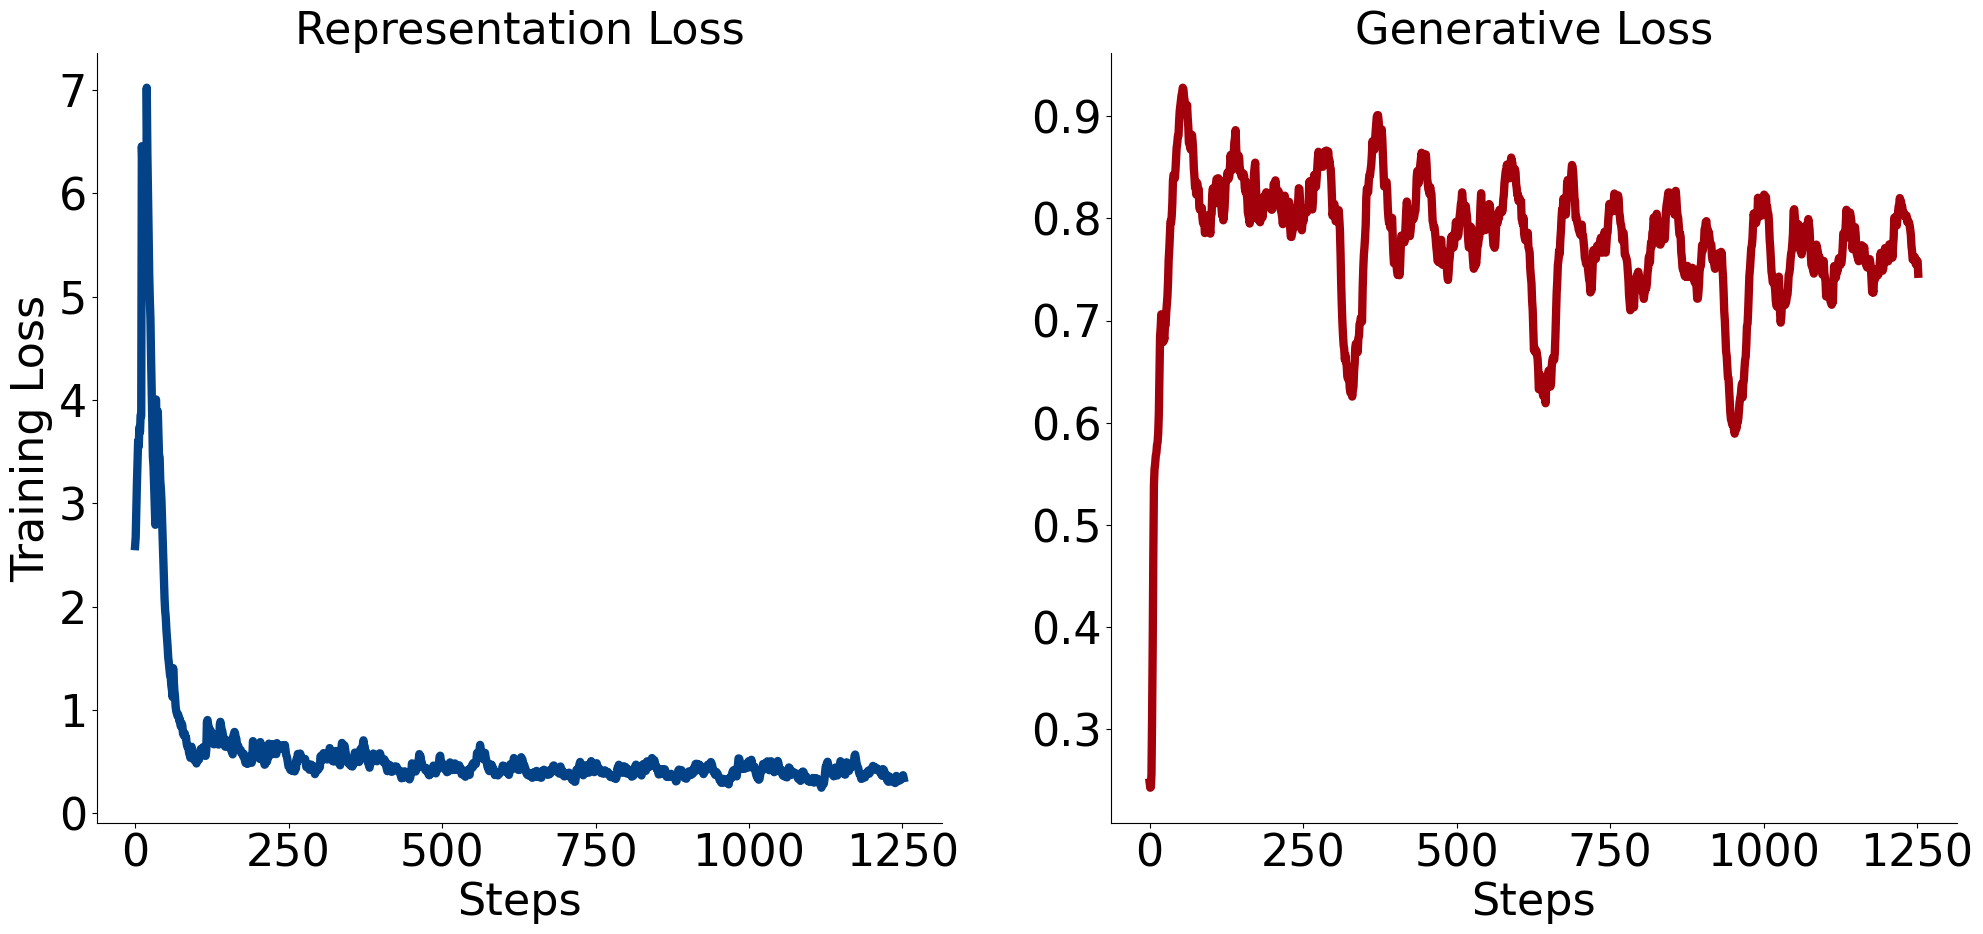

In [ ]:
path_g = "lossgenm8x7.csv"
path_e = "lossembm8x7.csv"

import pandas as pd

with open(path_g, "r") as f:
    df_g = pd.read_csv(f)
    #df_g = df_g[::2]

with open(path_e, "r") as f:
    df_e = pd.read_csv(f)
    #df_e = df_e[::2]

# https://stackoverflow.com/questions/42281844/what-is-the-mathematics-behind-the-smoothing-parameter-in-tensorboards-scalar
def smooth(scalars, weight: float):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

for key in ["sgpt2_m8x7_steps1253_lowergenweight - train/loss_emb"]:
    df_e[key] = smooth(df_e[key].values.tolist(), weight=0.9)

for key in ["sgpt2_m8x7_steps1253_lowergenweight - train/loss_gen"]:
    df_g[key] = smooth(df_g[key].values.tolist(), weight=0.9)



data = [df_e, df_g]

import matplotlib.pyplot as plt

FONTSIZE = 32

fig, axes = plt.subplots(figsize=(24, 10), ncols=2)

keys = [
    "sgpt2_m8x7_steps1253_lowergenweight - train/loss_emb",
    "sgpt2_m8x7_steps1253_lowergenweight - train/loss_gen"
]

titles = [
    "Representation Loss",
    "Generative Loss",
]

colors = [
#    "#CFE1F3",
#    "#F4CBCC"
    "#034286",
    "#A2000B",
]


for i, ax in enumerate(axes.flatten()):
  ax.plot(
      list(range(len(data[i][keys[i]]))),
      data[i][keys[i]],
      linewidth=6.0,
      color=colors[i],
  )

  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)

  if i in [0]:
    ax.set_ylabel("Training Loss", fontsize=FONTSIZE)
  ax.set_xlabel("Steps", fontsize=FONTSIZE)

  ax.set_title(titles[i], fontsize=FONTSIZE)

#plt.ylim(
#    [0, 3.9]
#)

#plt.xlim(
#    [-10, 1260]
#)


plt.savefig('loss8x7.pdf', dpi=300, bbox_inches='tight')
plt.show()

### Figure 8


In [ ]:
%%writefile /content/wandb_export_2024-01-29T10_40_33.371+01_00.csv
"Step","test_sgpt2_m7_splitemb - train/loss","test_sgpt2_m7_splitemb - train/loss__MIN","test_sgpt2_m7_splitemb - train/loss__MAX","test_sgpt2_m7_embq - train/loss","test_sgpt2_m7_embq - train/loss__MIN","test_sgpt2_m7_embq - train/loss__MAX","test_sgpt2_m7_embp - train/loss","test_sgpt2_m7_embp - train/loss__MIN","test_sgpt2_m7_embp - train/loss__MAX","test_sgpt2_m7 - train/loss","test_sgpt2_m7 - train/loss__MIN","test_sgpt2_m7 - train/loss__MAX"
"0","3.9371","3.9371","3.9371","3.9371","3.9371","3.9371","3.9371","3.9371","3.9371","3.9371","3.9371","3.9371"
"1","3.9371","3.9371","3.9371","3.9371","3.9371","3.9371","3.9371","3.9371","3.9371","3.9371","3.9371","3.9371"
"2","6.6685","6.6685","6.6685","6.6685","6.6685","6.6685","6.6685","6.6685","6.6685","6.6685","6.6685","6.6685"
"3","6.6685","6.6685","6.6685","6.6685","6.6685","6.6685","6.6685","6.6685","6.6685","6.6685","6.6685","6.6685"
"4","3.914","3.914","3.914","3.9604","3.9604","3.9604","3.9986","3.9986","3.9986","3.9185","3.9185","3.9185"
"5","3.914","3.914","3.914","3.9604","3.9604","3.9604","3.9986","3.9986","3.9986","3.9185","3.9185","3.9185"
"6","3.1843","3.1843","3.1843","3.1962","3.1962","3.1962","3.2463","3.2463","3.2463","3.1966","3.1966","3.1966"
"7","3.1843","3.1843","3.1843","3.1962","3.1962","3.1962","3.2463","3.2463","3.2463","3.1966","3.1966","3.1966"
"8","5.3516","5.3516","5.3516","5.4386","5.4386","5.4386","5.9823","5.9823","5.9823","5.3713","5.3713","5.3713"
"9","5.3516","5.3516","5.3516","5.4386","5.4386","5.4386","5.9823","5.9823","5.9823","5.3713","5.3713","5.3713"
"10","2.9634","2.9634","2.9634","2.9588","2.9588","2.9588","3.4021","3.4021","3.4021","2.9665","2.9665","2.9665"
"11","2.9634","2.9634","2.9634","2.9588","2.9588","2.9588","3.4021","3.4021","3.4021","2.9665","2.9665","2.9665"
"12","2.9976","2.9976","2.9976","3.0667","3.0667","3.0667","3.2459","3.2459","3.2459","3.0008","3.0008","3.0008"
"13","2.9976","2.9976","2.9976","3.0667","3.0667","3.0667","3.2459","3.2459","3.2459","3.0008","3.0008","3.0008"
"14","3.4858","3.4858","3.4858","3.7759","3.7759","3.7759","4.3152","4.3152","4.3152","3.4544","3.4544","3.4544"
"15","3.4858","3.4858","3.4858","3.7759","3.7759","3.7759","4.3152","4.3152","4.3152","3.4544","3.4544","3.4544"
"16","3.2346","3.2346","3.2346","3.8516","3.8516","3.8516","3.3835","3.3835","3.3835","3.2607","3.2607","3.2607"
"17","3.2346","3.2346","3.2346","3.8516","3.8516","3.8516","3.3835","3.3835","3.3835","3.2607","3.2607","3.2607"
"18","2.3075","2.3075","2.3075","2.662","2.662","2.662","1.9501","1.9501","1.9501","2.3087","2.3087","2.3087"
"19","2.3075","2.3075","2.3075","2.662","2.662","2.662","1.9501","1.9501","1.9501","2.3087","2.3087","2.3087"
"20","3.3268","3.3268","3.3268","3.5007","3.5007","3.5007","3.2549","3.2549","3.2549","3.3513","3.3513","3.3513"
"21","3.3268","3.3268","3.3268","3.5007","3.5007","3.5007","3.2549","3.2549","3.2549","3.3513","3.3513","3.3513"
"22","1.8428","1.8428","1.8428","1.6496","1.6496","1.6496","1.6474","1.6474","1.6474","1.86","1.86","1.86"
"23","1.8428","1.8428","1.8428","1.6496","1.6496","1.6496","1.6474","1.6474","1.6474","1.86","1.86","1.86"
"24","1.7678","1.7678","1.7678","2.0004","2.0004","2.0004","1.8502","1.8502","1.8502","1.7869","1.7869","1.7869"
"25","1.7678","1.7678","1.7678","2.0004","2.0004","2.0004","1.8502","1.8502","1.8502","1.7869","1.7869","1.7869"
"26","2.1867","2.1867","2.1867","2.3841","2.3841","2.3841","2.3034","2.3034","2.3034","2.2092","2.2092","2.2092"
"27","2.1867","2.1867","2.1867","2.3841","2.3841","2.3841","2.3034","2.3034","2.3034","2.2092","2.2092","2.2092"
"28","1.1068","1.1068","1.1068","1.2414","1.2414","1.2414","1.0892","1.0892","1.0892","1.1375","1.1375","1.1375"
"29","1.1068","1.1068","1.1068","1.2414","1.2414","1.2414","1.0892","1.0892","1.0892","1.1375","1.1375","1.1375"
"30","2.4158","2.4158","2.4158","2.3559","2.3559","2.3559","3.3916","3.3916","3.3916","2.4462","2.4462","2.4462"
"31","2.4158","2.4158","2.4158","2.3559","2.3559","2.3559","3.3916","3.3916","3.3916","2.4462","2.4462","2.4462"
"32","2.6495","2.6495","2.6495","3.2792","3.2792","3.2792","3.1318","3.1318","3.1318","2.6797","2.6797","2.6797"
"33","2.6495","2.6495","2.6495","3.2792","3.2792","3.2792","3.1318","3.1318","3.1318","2.6797","2.6797","2.6797"
"34","2.3725","2.3725","2.3725","2.6868","2.6868","2.6868","2.8996","2.8996","2.8996","2.3254","2.3254","2.3254"
"35","2.3725","2.3725","2.3725","2.6868","2.6868","2.6868","2.8996","2.8996","2.8996","2.3254","2.3254","2.3254"
"36","2.3923","2.3923","2.3923","3.1646","3.1646","3.1646","2.2965","2.2965","2.2965","2.2978","2.2978","2.2978"
"37","2.3923","2.3923","2.3923","3.1646","3.1646","3.1646","2.2965","2.2965","2.2965","2.2978","2.2978","2.2978"
"38","2.5676","2.5676","2.5676","2.1223","2.1223","2.1223","2.2299","2.2299","2.2299","2.3305","2.3305","2.3305"
"39","2.5676","2.5676","2.5676","2.1223","2.1223","2.1223","2.2299","2.2299","2.2299","2.3305","2.3305","2.3305"
"40","1.6615","1.6615","1.6615","2.086","2.086","2.086","1.9613","1.9613","1.9613","1.7928","1.7928","1.7928"
"41","1.6615","1.6615","1.6615","2.086","2.086","2.086","1.9613","1.9613","1.9613","1.7928","1.7928","1.7928"
"42","2.7025","2.7025","2.7025","2.8234","2.8234","2.8234","3.1541","3.1541","3.1541","3.1651","3.1651","3.1651"
"43","2.7025","2.7025","2.7025","2.8234","2.8234","2.8234","3.1541","3.1541","3.1541","3.1651","3.1651","3.1651"
"44","1.95","1.95","1.95","2.7583","2.7583","2.7583","1.9464","1.9464","1.9464","1.9417","1.9417","1.9417"
"45","1.95","1.95","1.95","2.7583","2.7583","2.7583","1.9464","1.9464","1.9464","1.9417","1.9417","1.9417"
"46","2.018","2.018","2.018","2.4775","2.4775","2.4775","1.8469","1.8469","1.8469","1.7332","1.7332","1.7332"
"47","2.018","2.018","2.018","2.4775","2.4775","2.4775","1.8469","1.8469","1.8469","1.7332","1.7332","1.7332"
"48","2.8905","2.8905","2.8905","3.1808","3.1808","3.1808","2.7326","2.7326","2.7326","2.4873","2.4873","2.4873"
"49","2.8905","2.8905","2.8905","3.1808","3.1808","3.1808","2.7326","2.7326","2.7326","2.4873","2.4873","2.4873"
"50","2.4513","2.4513","2.4513","2.185","2.185","2.185","1.8636","1.8636","1.8636","1.7329","1.7329","1.7329"
"51","2.4513","2.4513","2.4513","2.185","2.185","2.185","1.8636","1.8636","1.8636","1.7329","1.7329","1.7329"
"52","1.6893","1.6893","1.6893","1.832","1.832","1.832","1.7559","1.7559","1.7559","1.8886","1.8886","1.8886"
"53","1.6893","1.6893","1.6893","1.832","1.832","1.832","1.7559","1.7559","1.7559","1.8886","1.8886","1.8886"
"54","3.609","3.609","3.609","3.2585","3.2585","3.2585","3.3722","3.3722","3.3722","3.0389","3.0389","3.0389"
"55","3.609","3.609","3.609","3.2585","3.2585","3.2585","3.3722","3.3722","3.3722","3.0389","3.0389","3.0389"
"56","2.3643","2.3643","2.3643","2.2551","2.2551","2.2551","2.317","2.317","2.317","2.3895","2.3895","2.3895"
"57","2.3643","2.3643","2.3643","2.2551","2.2551","2.2551","2.317","2.317","2.317","2.3895","2.3895","2.3895"
"58","1.8103","1.8103","1.8103","1.9227","1.9227","1.9227","1.859","1.859","1.859","1.8247","1.8247","1.8247"
"59","1.8103","1.8103","1.8103","1.9227","1.9227","1.9227","1.859","1.859","1.859","1.8247","1.8247","1.8247"
"60","2.4429","2.4429","2.4429","2.1512","2.1512","2.1512","2.3165","2.3165","2.3165","2.3391","2.3391","2.3391"
"61","2.4429","2.4429","2.4429","2.1512","2.1512","2.1512","2.3165","2.3165","2.3165","2.3391","2.3391","2.3391"
"62","2.4927","2.4927","2.4927","2.0253","2.0253","2.0253","2.0555","2.0555","2.0555","1.9898","1.9898","1.9898"
"63","2.4927","2.4927","2.4927","2.0253","2.0253","2.0253","2.0555","2.0555","2.0555","1.9898","1.9898","1.9898"
"64","3.2756","3.2756","3.2756","2.0694","2.0694","2.0694","2.1493","2.1493","2.1493","2.8187","2.8187","2.8187"
"65","3.2756","3.2756","3.2756","2.0694","2.0694","2.0694","2.1493","2.1493","2.1493","2.8187","2.8187","2.8187"
"66","2.6349","2.6349","2.6349","2.898","2.898","2.898","2.5848","2.5848","2.5848","2.667","2.667","2.667"
"67","2.6349","2.6349","2.6349","2.898","2.898","2.898","2.5848","2.5848","2.5848","2.667","2.667","2.667"
"68","1.8936","1.8936","1.8936","1.809","1.809","1.809","2.1443","2.1443","2.1443","1.9834","1.9834","1.9834"
"69","1.8936","1.8936","1.8936","1.809","1.809","1.809","2.1443","2.1443","2.1443","1.9834","1.9834","1.9834"
"70","1.8309","1.8309","1.8309","1.7675","1.7675","1.7675","1.8796","1.8796","1.8796","1.5616","1.5616","1.5616"
"71","1.8309","1.8309","1.8309","1.7675","1.7675","1.7675","1.8796","1.8796","1.8796","1.5616","1.5616","1.5616"
"72","3.1728","3.1728","3.1728","3.6331","3.6331","3.6331","2.601","2.601","2.601","2.1773","2.1773","2.1773"
"73","3.1728","3.1728","3.1728","3.6331","3.6331","3.6331","2.601","2.601","2.601","2.1773","2.1773","2.1773"
"74","2.1128","2.1128","2.1128","3.0345","3.0345","3.0345","2.8265","2.8265","2.8265","2.8064","2.8064","2.8064"
"75","2.1128","2.1128","2.1128","3.0345","3.0345","3.0345","2.8265","2.8265","2.8265","2.8064","2.8064","2.8064"
"76","2.1627","2.1627","2.1627","3.0281","3.0281","3.0281","2.2572","2.2572","2.2572","2.1962","2.1962","2.1962"
"77","2.1627","2.1627","2.1627","3.0281","3.0281","3.0281","2.2572","2.2572","2.2572","2.1962","2.1962","2.1962"
"78","2.7301","2.7301","2.7301","2.8458","2.8458","2.8458","2.6794","2.6794","2.6794","2.7395","2.7395","2.7395"
"79","2.7301","2.7301","2.7301","2.8458","2.8458","2.8458","2.6794","2.6794","2.6794","2.7395","2.7395","2.7395"
"80","2.4429","2.4429","2.4429","2.9443","2.9443","2.9443","2.6339","2.6339","2.6339","2.5328","2.5328","2.5328"
"81","2.4429","2.4429","2.4429","2.9443","2.9443","2.9443","2.6339","2.6339","2.6339","2.5328","2.5328","2.5328"
"82","1.9965","1.9965","1.9965","2.1349","2.1349","2.1349","2.1466","2.1466","2.1466","2.0614","2.0614","2.0614"
"83","1.9965","1.9965","1.9965","2.1349","2.1349","2.1349","2.1466","2.1466","2.1466","2.0614","2.0614","2.0614"
"84","1.7171","1.7171","1.7171","1.9847","1.9847","1.9847","1.653","1.653","1.653","1.6363","1.6363","1.6363"
"85","1.7171","1.7171","1.7171","1.9847","1.9847","1.9847","1.653","1.653","1.653","1.6363","1.6363","1.6363"
"86","2.8404","2.8404","2.8404","5.0746","5.0746","5.0746","4.0247","4.0247","4.0247","3.176","3.176","3.176"
"87","2.8404","2.8404","2.8404","5.0746","5.0746","5.0746","4.0247","4.0247","4.0247","3.176","3.176","3.176"
"88","2.4322","2.4322","2.4322","2.9391","2.9391","2.9391","3.276","3.276","3.276","2.3888","2.3888","2.3888"
"89","2.4322","2.4322","2.4322","2.9391","2.9391","2.9391","3.276","3.276","3.276","2.3888","2.3888","2.3888"
"90","2.717","2.717","2.717","4.1866","4.1866","4.1866","3.7098","3.7098","3.7098","2.7068","2.7068","2.7068"
"91","2.717","2.717","2.717","4.1866","4.1866","4.1866","3.7098","3.7098","3.7098","2.7068","2.7068","2.7068"
"92","3.4775","3.4775","3.4775","4.4238","4.4238","4.4238","3.6559","3.6559","3.6559","3.8534","3.8534","3.8534"
"93","3.4775","3.4775","3.4775","4.4238","4.4238","4.4238","3.6559","3.6559","3.6559","3.8534","3.8534","3.8534"
"94","2.2441","2.2441","2.2441","2.8038","2.8038","2.8038","2.7128","2.7128","2.7128","2.1473","2.1473","2.1473"
"95","2.2441","2.2441","2.2441","2.8038","2.8038","2.8038","2.7128","2.7128","2.7128","2.1473","2.1473","2.1473"
"96","2.197","2.197","2.197","3.2366","3.2366","3.2366","2.2052","2.2052","2.2052","2.5508","2.5508","2.5508"
"97","2.197","2.197","2.197","3.2366","3.2366","3.2366","2.2052","2.2052","2.2052","2.5508","2.5508","2.5508"
"98","2.4641","2.4641","2.4641","2.9011","2.9011","2.9011","2.8409","2.8409","2.8409","2.7302","2.7302","2.7302"
"99","2.4641","2.4641","2.4641","2.9011","2.9011","2.9011","2.8409","2.8409","2.8409","2.7302","2.7302","2.7302"
"100","2.1654","2.1654","2.1654","2.7518","2.7518","2.7518","2.4238","2.4238","2.4238","2.2444","2.2444","2.2444"
"101","2.1654","2.1654","2.1654","2.7518","2.7518","2.7518","2.4238","2.4238","2.4238","2.2444","2.2444","2.2444"
"102","2.1456","2.1456","2.1456","2.668","2.668","2.668","2.5673","2.5673","2.5673","2.0996","2.0996","2.0996"
"103","2.1456","2.1456","2.1456","2.668","2.668","2.668","2.5673","2.5673","2.5673","2.0996","2.0996","2.0996"
"104","1.841","1.841","1.841","2.0094","2.0094","2.0094","1.7504","1.7504","1.7504","1.8872","1.8872","1.8872"
"105","1.841","1.841","1.841","2.0094","2.0094","2.0094","1.7504","1.7504","1.7504","1.8872","1.8872","1.8872"
"106","2.7041","2.7041","2.7041","3.1306","3.1306","3.1306","2.7674","2.7674","2.7674","2.7701","2.7701","2.7701"
"107","2.7041","2.7041","2.7041","3.1306","3.1306","3.1306","2.7674","2.7674","2.7674","2.7701","2.7701","2.7701"
"108","1.4897","1.4897","1.4897","1.5475","1.5475","1.5475","1.6996","1.6996","1.6996","1.5393","1.5393","1.5393"
"109","1.4897","1.4897","1.4897","1.5475","1.5475","1.5475","1.6996","1.6996","1.6996","1.5393","1.5393","1.5393"
"110","2.7869","2.7869","2.7869","3.5205","3.5205","3.5205","2.8793","2.8793","2.8793","2.6448","2.6448","2.6448"
"111","2.7869","2.7869","2.7869","3.5205","3.5205","3.5205","2.8793","2.8793","2.8793","2.6448","2.6448","2.6448"
"112","2.711","2.711","2.711","2.8603","2.8603","2.8603","2.9767","2.9767","2.9767","3.1244","3.1244","3.1244"
"113","2.711","2.711","2.711","2.8603","2.8603","2.8603","2.9767","2.9767","2.9767","3.1244","3.1244","3.1244"
"114","2.2988","2.2988","2.2988","3.2024","3.2024","3.2024","2.0085","2.0085","2.0085","2.9057","2.9057","2.9057"
"115","2.2988","2.2988","2.2988","3.2024","3.2024","3.2024","2.0085","2.0085","2.0085","2.9057","2.9057","2.9057"
"116","3.1698","3.1698","3.1698","2.3216","2.3216","2.3216","2.5102","2.5102","2.5102","2.565","2.565","2.565"
"117","3.1698","3.1698","3.1698","2.3216","2.3216","2.3216","2.5102","2.5102","2.5102","2.565","2.565","2.565"
"118","2.7951","2.7951","2.7951","3.3461","3.3461","3.3461","2.558","2.558","2.558","3.192","3.192","3.192"
"119","2.7951","2.7951","2.7951","3.3461","3.3461","3.3461","2.558","2.558","2.558","3.192","3.192","3.192"
"120","2.7608","2.7608","2.7608","3.6197","3.6197","3.6197","2.5606","2.5606","2.5606","2.8202","2.8202","2.8202"
"121","2.7608","2.7608","2.7608","3.6197","3.6197","3.6197","2.5606","2.5606","2.5606","2.8202","2.8202","2.8202"
"122","2.774","2.774","2.774","2.8395","2.8395","2.8395","3.0255","3.0255","3.0255","3.1027","3.1027","3.1027"
"123","2.774","2.774","2.774","2.8395","2.8395","2.8395","3.0255","3.0255","3.0255","3.1027","3.1027","3.1027"
"124","3.1438","3.1438","3.1438","3.3508","3.3508","3.3508","3.0961","3.0961","3.0961","3.283","3.283","3.283"
"125","3.1438","3.1438","3.1438","3.3508","3.3508","3.3508","3.0961","3.0961","3.0961","3.283","3.283","3.283"
"126","3.0278","3.0278","3.0278","3.519","3.519","3.519","3.0141","3.0141","3.0141","2.8281","2.8281","2.8281"
"127","3.0278","3.0278","3.0278","3.519","3.519","3.519","3.0141","3.0141","3.0141","2.8281","2.8281","2.8281"
"128","3.2208","3.2208","3.2208","3.5636","3.5636","3.5636","3.1081","3.1081","3.1081","2.8832","2.8832","2.8832"
"129","3.2208","3.2208","3.2208","3.5636","3.5636","3.5636","3.1081","3.1081","3.1081","2.8832","2.8832","2.8832"
"130","2.7287","2.7287","2.7287","3.5904","3.5904","3.5904","2.8354","2.8354","2.8354","2.7888","2.7888","2.7888"
"131","2.7287","2.7287","2.7287","3.5904","3.5904","3.5904","2.8354","2.8354","2.8354","2.7888","2.7888","2.7888"
"132","2.217","2.217","2.217","2.4841","2.4841","2.4841","2.4371","2.4371","2.4371","2.2431","2.2431","2.2431"
"133","2.217","2.217","2.217","2.4841","2.4841","2.4841","2.4371","2.4371","2.4371","2.2431","2.2431","2.2431"
"134","2.1838","2.1838","2.1838","2.8055","2.8055","2.8055","2.3186","2.3186","2.3186","2.0916","2.0916","2.0916"
"135","2.1838","2.1838","2.1838","2.8055","2.8055","2.8055","2.3186","2.3186","2.3186","2.0916","2.0916","2.0916"
"136","2.386","2.386","2.386","2.6881","2.6881","2.6881","2.999","2.999","2.999","2.3453","2.3453","2.3453"
"137","2.386","2.386","2.386","2.6881","2.6881","2.6881","2.999","2.999","2.999","2.3453","2.3453","2.3453"
"138","2.003","2.003","2.003","3.4271","3.4271","3.4271","2.7829","2.7829","2.7829","2.2596","2.2596","2.2596"
"139","2.003","2.003","2.003","3.4271","3.4271","3.4271","2.7829","2.7829","2.7829","2.2596","2.2596","2.2596"
"140","1.7215","1.7215","1.7215","1.7194","1.7194","1.7194","3.4645","3.4645","3.4645","1.8288","1.8288","1.8288"
"141","1.7215","1.7215","1.7215","1.7194","1.7194","1.7194","3.4645","3.4645","3.4645","1.8288","1.8288","1.8288"
"142","1.4848","1.4848","1.4848","1.8882","1.8882","1.8882","2.144","2.144","2.144","1.581","1.581","1.581"
"143","1.4848","1.4848","1.4848","1.8882","1.8882","1.8882","2.144","2.144","2.144","1.581","1.581","1.581"
"144","2.5495","2.5495","2.5495","3.3065","3.3065","3.3065","3.7934","3.7934","3.7934","2.725","2.725","2.725"
"145","2.5495","2.5495","2.5495","3.3065","3.3065","3.3065","3.7934","3.7934","3.7934","2.725","2.725","2.725"
"146","2.1016","2.1016","2.1016","2.1174","2.1174","2.1174","2.89","2.89","2.89","2.1689","2.1689","2.1689"
"147","2.1016","2.1016","2.1016","2.1174","2.1174","2.1174","2.89","2.89","2.89","2.1689","2.1689","2.1689"
"148","6.1845","6.1845","6.1845","3.3371","3.3371","3.3371","3.5235","3.5235","3.5235","2.6197","2.6197","2.6197"
"149","6.1845","6.1845","6.1845","3.3371","3.3371","3.3371","3.5235","3.5235","3.5235","2.6197","2.6197","2.6197"
"150","4.7212","4.7212","4.7212","2.1114","2.1114","2.1114","2.5783","2.5783","2.5783","1.9914","1.9914","1.9914"
"151","4.7212","4.7212","4.7212","2.1114","2.1114","2.1114","2.5783","2.5783","2.5783","1.9914","1.9914","1.9914"
"152","3.4696","3.4696","3.4696","3.1035","3.1035","3.1035","3.204","3.204","3.204","2.9697","2.9697","2.9697"
"153","3.4696","3.4696","3.4696","3.1035","3.1035","3.1035","3.204","3.204","3.204","2.9697","2.9697","2.9697"
"154","2.5597","2.5597","2.5597","2.9059","2.9059","2.9059","2.6876","2.6876","2.6876","2.5146","2.5146","2.5146"
"155","2.5597","2.5597","2.5597","2.9059","2.9059","2.9059","2.6876","2.6876","2.6876","2.5146","2.5146","2.5146"
"156","3.476","3.476","3.476","3.3584","3.3584","3.3584","3.2488","3.2488","3.2488","2.7439","2.7439","2.7439"
"157","3.476","3.476","3.476","3.3584","3.3584","3.3584","3.2488","3.2488","3.2488","2.7439","2.7439","2.7439"
"158","2.5763","2.5763","2.5763","2.7468","2.7468","2.7468","2.1785","2.1785","2.1785","2.2893","2.2893","2.2893"
"159","2.5763","2.5763","2.5763","2.7468","2.7468","2.7468","2.1785","2.1785","2.1785","2.2893","2.2893","2.2893"
"160","1.7261","1.7261","1.7261","1.7474","1.7474","1.7474","1.5813","1.5813","1.5813","1.8583","1.8583","1.8583"
"161","1.7261","1.7261","1.7261","1.7474","1.7474","1.7474","1.5813","1.5813","1.5813","1.8583","1.8583","1.8583"
"162","2.3909","2.3909","2.3909","2.4475","2.4475","2.4475","2.3484","2.3484","2.3484","2.8082","2.8082","2.8082"
"163","2.3909","2.3909","2.3909","2.4475","2.4475","2.4475","2.3484","2.3484","2.3484","2.8082","2.8082","2.8082"
"164","1.9354","1.9354","1.9354","2.4904","2.4904","2.4904","1.9778","1.9778","1.9778","1.7287","1.7287","1.7287"
"165","1.9354","1.9354","1.9354","2.4904","2.4904","2.4904","1.9778","1.9778","1.9778","1.7287","1.7287","1.7287"
"166","3.0828","3.0828","3.0828","3.5053","3.5053","3.5053","3.062","3.062","3.062","3.2416","3.2416","3.2416"
"167","3.0828","3.0828","3.0828","3.5053","3.5053","3.5053","3.062","3.062","3.062","3.2416","3.2416","3.2416"
"168","1.7769","1.7769","1.7769","3.1875","3.1875","3.1875","1.7613","1.7613","1.7613","1.6166","1.6166","1.6166"
"169","1.7769","1.7769","1.7769","3.1875","3.1875","3.1875","1.7613","1.7613","1.7613","1.6166","1.6166","1.6166"
"170","1.0836","1.0836","1.0836","1.0238","1.0238","1.0238","0.9434","0.9434","0.9434","1.105","1.105","1.105"
"171","1.0836","1.0836","1.0836","1.0238","1.0238","1.0238","0.9434","0.9434","0.9434","1.105","1.105","1.105"
"172","1.9512","1.9512","1.9512","2.2647","2.2647","2.2647","2.5646","2.5646","2.5646","2.7751","2.7751","2.7751"
"173","1.9512","1.9512","1.9512","2.2647","2.2647","2.2647","2.5646","2.5646","2.5646","2.7751","2.7751","2.7751"
"174","2.241","2.241","2.241","2.3627","2.3627","2.3627","2.3584","2.3584","2.3584","2.3077","2.3077","2.3077"
"175","2.241","2.241","2.241","2.3627","2.3627","2.3627","2.3584","2.3584","2.3584","2.3077","2.3077","2.3077"
"176","2.8012","2.8012","2.8012","3.7945","3.7945","3.7945","3.5328","3.5328","3.5328","2.9621","2.9621","2.9621"
"177","2.8012","2.8012","2.8012","3.7945","3.7945","3.7945","3.5328","3.5328","3.5328","2.9621","2.9621","2.9621"
"178","2.1682","2.1682","2.1682","2.6589","2.6589","2.6589","2.3915","2.3915","2.3915","2.1971","2.1971","2.1971"
"179","2.1682","2.1682","2.1682","2.6589","2.6589","2.6589","2.3915","2.3915","2.3915","2.1971","2.1971","2.1971"
"180","2.2414","2.2414","2.2414","2.961","2.961","2.961","2.3388","2.3388","2.3388","2.1096","2.1096","2.1096"
"181","2.2414","2.2414","2.2414","2.961","2.961","2.961","2.3388","2.3388","2.3388","2.1096","2.1096","2.1096"
"182","2.8982","2.8982","2.8982","4.7404","4.7404","4.7404","3.3043","3.3043","3.3043","3.8735","3.8735","3.8735"
"183","2.8982","2.8982","2.8982","4.7404","4.7404","4.7404","3.3043","3.3043","3.3043","3.8735","3.8735","3.8735"
"184","1.8869","1.8869","1.8869","4.6349","4.6349","4.6349","2.1986","2.1986","2.1986","2.2477","2.2477","2.2477"
"185","1.8869","1.8869","1.8869","4.6349","4.6349","4.6349","2.1986","2.1986","2.1986","2.2477","2.2477","2.2477"
"186","3.9507","3.9507","3.9507","6.5807","6.5807","6.5807","4.1405","4.1405","4.1405","3.2571","3.2571","3.2571"
"187","3.9507","3.9507","3.9507","6.5807","6.5807","6.5807","4.1405","4.1405","4.1405","3.2571","3.2571","3.2571"
"188","2.1954","2.1954","2.1954","2.3402","2.3402","2.3402","2.4576","2.4576","2.4576","2.196","2.196","2.196"
"189","2.1954","2.1954","2.1954","2.3402","2.3402","2.3402","2.4576","2.4576","2.4576","2.196","2.196","2.196"
"190","2.6024","2.6024","2.6024","3.1624","3.1624","3.1624","3.436","3.436","3.436","2.8031","2.8031","2.8031"
"191","2.6024","2.6024","2.6024","3.1624","3.1624","3.1624","3.436","3.436","3.436","2.8031","2.8031","2.8031"
"192","3.2213","3.2213","3.2213","3.9241","3.9241","3.9241","3.5977","3.5977","3.5977","3.1848","3.1848","3.1848"
"193","3.2213","3.2213","3.2213","3.9241","3.9241","3.9241","3.5977","3.5977","3.5977","3.1848","3.1848","3.1848"
"194","2.728","2.728","2.728","3.7372","3.7372","3.7372","4.8056","4.8056","4.8056","2.3597","2.3597","2.3597"
"195","2.728","2.728","2.728","3.7372","3.7372","3.7372","4.8056","4.8056","4.8056","2.3597","2.3597","2.3597"
"196","2.8037","2.8037","2.8037","3.298","3.298","3.298","5.5266","5.5266","5.5266","2.6207","2.6207","2.6207"
"197","2.8037","2.8037","2.8037","3.298","3.298","3.298","5.5266","5.5266","5.5266","2.6207","2.6207","2.6207"
"198","2.4568","2.4568","2.4568","2.7528","2.7528","2.7528","5.0598","5.0598","5.0598","2.5042","2.5042","2.5042"
"199","2.4568","2.4568","2.4568","2.7528","2.7528","2.7528","5.0598","5.0598","5.0598","2.5042","2.5042","2.5042"
"200","2.0849","2.0849","2.0849","2.2093","2.2093","2.2093","4.3195","4.3195","4.3195","1.9256","1.9256","1.9256"
"201","2.0849","2.0849","2.0849","2.2093","2.2093","2.2093","4.3195","4.3195","4.3195","1.9256","1.9256","1.9256"
"202","1.9788","1.9788","1.9788","2.3103","2.3103","2.3103","4.8229","4.8229","4.8229","1.9806","1.9806","1.9806"
"203","1.9788","1.9788","1.9788","2.3103","2.3103","2.3103","4.8229","4.8229","4.8229","1.9806","1.9806","1.9806"
"204","1.8776","1.8776","1.8776","2.3713","2.3713","2.3713","4.3626","4.3626","4.3626","1.3905","1.3905","1.3905"
"205","1.8776","1.8776","1.8776","2.3713","2.3713","2.3713","4.3626","4.3626","4.3626","1.3905","1.3905","1.3905"
"206","1.6881","1.6881","1.6881","1.9082","1.9082","1.9082","4.2948","4.2948","4.2948","1.3052","1.3052","1.3052"
"207","1.6881","1.6881","1.6881","1.9082","1.9082","1.9082","4.2948","4.2948","4.2948","1.3052","1.3052","1.3052"
"208","1.8574","1.8574","1.8574","2.1512","2.1512","2.1512","4.5301","4.5301","4.5301","1.7998","1.7998","1.7998"
"209","1.8574","1.8574","1.8574","2.1512","2.1512","2.1512","4.5301","4.5301","4.5301","1.7998","1.7998","1.7998"
"210","2.0042","2.0042","2.0042","2.2269","2.2269","2.2269","4.219","4.219","4.219","1.2071","1.2071","1.2071"
"211","2.0042","2.0042","2.0042","2.2269","2.2269","2.2269","4.219","4.219","4.219","1.2071","1.2071","1.2071"
"212","2.2829","2.2829","2.2829","2.644","2.644","2.644","4.5279","4.5279","4.5279","2.0076","2.0076","2.0076"
"213","2.2829","2.2829","2.2829","2.644","2.644","2.644","4.5279","4.5279","4.5279","2.0076","2.0076","2.0076"
"214","1.7182","1.7182","1.7182","2.7577","2.7577","2.7577","5.5151","5.5151","5.5151","1.6091","1.6091","1.6091"
"215","1.7182","1.7182","1.7182","2.7577","2.7577","2.7577","5.5151","5.5151","5.5151","1.6091","1.6091","1.6091"
"216","1.7853","1.7853","1.7853","1.587","1.587","1.587","5.203","5.203","5.203","1.6295","1.6295","1.6295"
"217","1.7853","1.7853","1.7853","1.587","1.587","1.587","5.203","5.203","5.203","1.6295","1.6295","1.6295"
"218","0.8774","0.8774","0.8774","1.7819","1.7819","1.7819","4.1677","4.1677","4.1677","0.8576","0.8576","0.8576"
"219","0.8774","0.8774","0.8774","1.7819","1.7819","1.7819","4.1677","4.1677","4.1677","0.8576","0.8576","0.8576"
"220","1.505","1.505","1.505","1.3339","1.3339","1.3339","4.2238","4.2238","4.2238","1.1666","1.1666","1.1666"
"221","1.505","1.505","1.505","1.3339","1.3339","1.3339","4.2238","4.2238","4.2238","1.1666","1.1666","1.1666"
"222","1.5389","1.5389","1.5389","2.2272","2.2272","2.2272","4.3348","4.3348","4.3348","1.1808","1.1808","1.1808"
"223","1.5389","1.5389","1.5389","2.2272","2.2272","2.2272","4.3348","4.3348","4.3348","1.1808","1.1808","1.1808"
"224","1.1513","1.1513","1.1513","1.6868","1.6868","1.6868","4.3439","4.3439","4.3439","1.0791","1.0791","1.0791"
"225","1.1513","1.1513","1.1513","1.6868","1.6868","1.6868","4.3439","4.3439","4.3439","1.0791","1.0791","1.0791"
"226","2.4952","2.4952","2.4952","3.393","3.393","3.393","4.7897","4.7897","4.7897","1.8798","1.8798","1.8798"
"227","2.4952","2.4952","2.4952","3.393","3.393","3.393","4.7897","4.7897","4.7897","1.8798","1.8798","1.8798"
"228","1.7246","1.7246","1.7246","1.4247","1.4247","1.4247","4.2779","4.2779","4.2779","1.5981","1.5981","1.5981"
"229","1.7246","1.7246","1.7246","1.4247","1.4247","1.4247","4.2779","4.2779","4.2779","1.5981","1.5981","1.5981"
"230","1.026","1.026","1.026","1.0965","1.0965","1.0965","4.2649","4.2649","4.2649","0.9983","0.9983","0.9983"
"231","1.026","1.026","1.026","1.0965","1.0965","1.0965","4.2649","4.2649","4.2649","0.9983","0.9983","0.9983"
"232","1.3019","1.3019","1.3019","1.5885","1.5885","1.5885","4.4687","4.4687","4.4687","1.2033","1.2033","1.2033"
"233","1.3019","1.3019","1.3019","1.5885","1.5885","1.5885","4.4687","4.4687","4.4687","1.2033","1.2033","1.2033"
"234","1.6568","1.6568","1.6568","2.707","2.707","2.707","4.2994","4.2994","4.2994","1.9211","1.9211","1.9211"
"235","1.6568","1.6568","1.6568","2.707","2.707","2.707","4.2994","4.2994","4.2994","1.9211","1.9211","1.9211"
"236","2.1507","2.1507","2.1507","2.2845","2.2845","2.2845","4.5486","4.5486","4.5486","1.3879","1.3879","1.3879"
"237","2.1507","2.1507","2.1507","2.2845","2.2845","2.2845","4.5486","4.5486","4.5486","1.3879","1.3879","1.3879"
"238","1.5244","1.5244","1.5244","1.443","1.443","1.443","4.2345","4.2345","4.2345","1.2334","1.2334","1.2334"
"239","1.5244","1.5244","1.5244","1.443","1.443","1.443","4.2345","4.2345","4.2345","1.2334","1.2334","1.2334"
"240","1.6044","1.6044","1.6044","1.715","1.715","1.715","4.2461","4.2461","4.2461","1.538","1.538","1.538"
"241","1.6044","1.6044","1.6044","1.715","1.715","1.715","4.2461","4.2461","4.2461","1.538","1.538","1.538"
"242","1.4879","1.4879","1.4879","1.8699","1.8699","1.8699","3.9766","3.9766","3.9766","1.3151","1.3151","1.3151"
"243","1.4879","1.4879","1.4879","1.8699","1.8699","1.8699","3.9766","3.9766","3.9766","1.3151","1.3151","1.3151"
"244","0.6119","0.6119","0.6119","1.1152","1.1152","1.1152","3.7038","3.7038","3.7038","0.924","0.924","0.924"
"245","0.6119","0.6119","0.6119","1.1152","1.1152","1.1152","3.7038","3.7038","3.7038","0.924","0.924","0.924"
"246","1.1207","1.1207","1.1207","1.9172","1.9172","1.9172","3.4226","3.4226","3.4226","1.2394","1.2394","1.2394"
"247","1.1207","1.1207","1.1207","1.9172","1.9172","1.9172","3.4226","3.4226","3.4226","1.2394","1.2394","1.2394"
"248","0.9029","0.9029","0.9029","0.8823","0.8823","0.8823","2.0087","2.0087","2.0087","0.8321","0.8321","0.8321"
"249","0.9029","0.9029","0.9029","0.8823","0.8823","0.8823","2.0087","2.0087","2.0087","0.8321","0.8321","0.8321"
"250","0.9607","0.9607","0.9607","2.1168","2.1168","2.1168","1.7194","1.7194","1.7194","0.7151","0.7151","0.7151"
"251","0.9607","0.9607","0.9607","2.1168","2.1168","2.1168","1.7194","1.7194","1.7194","0.7151","0.7151","0.7151"
"252","0.9523","0.9523","0.9523","1.3574","1.3574","1.3574","2.3131","2.3131","2.3131","0.8536","0.8536","0.8536"
"253","0.9523","0.9523","0.9523","1.3574","1.3574","1.3574","2.3131","2.3131","2.3131","0.8536","0.8536","0.8536"
"254","1.0233","1.0233","1.0233","1.5746","1.5746","1.5746","1.7292","1.7292","1.7292","0.8909","0.8909","0.8909"
"255","1.0233","1.0233","1.0233","1.5746","1.5746","1.5746","1.7292","1.7292","1.7292","0.8909","0.8909","0.8909"
"256","0.7713","0.7713","0.7713","1.5788","1.5788","1.5788","1.4422","1.4422","1.4422","0.6512","0.6512","0.6512"
"257","0.7713","0.7713","0.7713","1.5788","1.5788","1.5788","1.4422","1.4422","1.4422","0.6512","0.6512","0.6512"
"258","0.8692","0.8692","0.8692","0.9069","0.9069","0.9069","1.4648","1.4648","1.4648","0.7458","0.7458","0.7458"
"259","0.8692","0.8692","0.8692","0.9069","0.9069","0.9069","1.4648","1.4648","1.4648","0.7458","0.7458","0.7458"
"260","1.2142","1.2142","1.2142","1.7421","1.7421","1.7421","1.9","1.9","1.9","1.0282","1.0282","1.0282"
"261","1.2142","1.2142","1.2142","1.7421","1.7421","1.7421","1.9","1.9","1.9","1.0282","1.0282","1.0282"
"262","1.234","1.234","1.234","1.243","1.243","1.243","1.448","1.448","1.448","0.9473","0.9473","0.9473"
"263","1.234","1.234","1.234","1.243","1.243","1.243","1.448","1.448","1.448","0.9473","0.9473","0.9473"
"264","0.6181","0.6181","0.6181","0.9278","0.9278","0.9278","1.3162","1.3162","1.3162","0.7394","0.7394","0.7394"
"265","0.6181","0.6181","0.6181","0.9278","0.9278","0.9278","1.3162","1.3162","1.3162","0.7394","0.7394","0.7394"
"266","0.6813","0.6813","0.6813","0.8703","0.8703","0.8703","1.0187","1.0187","1.0187","0.6384","0.6384","0.6384"
"267","0.6813","0.6813","0.6813","0.8703","0.8703","0.8703","1.0187","1.0187","1.0187","0.6384","0.6384","0.6384"
"268","0.6781","0.6781","0.6781","0.4826","0.4826","0.4826","0.6732","0.6732","0.6732","0.5617","0.5617","0.5617"
"269","0.6781","0.6781","0.6781","0.4826","0.4826","0.4826","0.6732","0.6732","0.6732","0.5617","0.5617","0.5617"
"270","0.6567","0.6567","0.6567","0.9195","0.9195","0.9195","0.6602","0.6602","0.6602","0.6461","0.6461","0.6461"
"271","0.6567","0.6567","0.6567","0.9195","0.9195","0.9195","0.6602","0.6602","0.6602","0.6461","0.6461","0.6461"
"272","0.7434","0.7434","0.7434","1.1578","1.1578","1.1578","0.9521","0.9521","0.9521","0.4734","0.4734","0.4734"
"273","0.7434","0.7434","0.7434","1.1578","1.1578","1.1578","0.9521","0.9521","0.9521","0.4734","0.4734","0.4734"
"274","1.0054","1.0054","1.0054","1.6436","1.6436","1.6436","3.2399","3.2399","3.2399","1.1375","1.1375","1.1375"
"275","1.0054","1.0054","1.0054","1.6436","1.6436","1.6436","3.2399","3.2399","3.2399","1.1375","1.1375","1.1375"
"276","0.6552","0.6552","0.6552","1.3834","1.3834","1.3834","1.1593","1.1593","1.1593","0.611","0.611","0.611"
"277","0.6552","0.6552","0.6552","1.3834","1.3834","1.3834","1.1593","1.1593","1.1593","0.611","0.611","0.611"
"278","0.7052","0.7052","0.7052","0.5603","0.5603","0.5603","0.6548","0.6548","0.6548","0.6345","0.6345","0.6345"
"279","0.7052","0.7052","0.7052","0.5603","0.5603","0.5603","0.6548","0.6548","0.6548","0.6345","0.6345","0.6345"
"280","1.1802","1.1802","1.1802","1.7069","1.7069","1.7069","1.7012","1.7012","1.7012","1.2103","1.2103","1.2103"
"281","1.1802","1.1802","1.1802","1.7069","1.7069","1.7069","1.7012","1.7012","1.7012","1.2103","1.2103","1.2103"
"282","0.6497","0.6497","0.6497","1.2233","1.2233","1.2233","1.3394","1.3394","1.3394","0.6549","0.6549","0.6549"
"283","0.6497","0.6497","0.6497","1.2233","1.2233","1.2233","1.3394","1.3394","1.3394","0.6549","0.6549","0.6549"
"284","0.8357","0.8357","0.8357","1.324","1.324","1.324","1.1481","1.1481","1.1481","0.5351","0.5351","0.5351"
"285","0.8357","0.8357","0.8357","1.324","1.324","1.324","1.1481","1.1481","1.1481","0.5351","0.5351","0.5351"
"286","1.7593","1.7593","1.7593","1.3208","1.3208","1.3208","1.6747","1.6747","1.6747","1.0331","1.0331","1.0331"
"287","1.7593","1.7593","1.7593","1.3208","1.3208","1.3208","1.6747","1.6747","1.6747","1.0331","1.0331","1.0331"
"288","0.8314","0.8314","0.8314","1.118","1.118","1.118","1.206","1.206","1.206","0.6723","0.6723","0.6723"
"289","0.8314","0.8314","0.8314","1.118","1.118","1.118","1.206","1.206","1.206","0.6723","0.6723","0.6723"
"290","1.087","1.087","1.087","1.2165","1.2165","1.2165","1.4562","1.4562","1.4562","1.0511","1.0511","1.0511"
"291","1.087","1.087","1.087","1.2165","1.2165","1.2165","1.4562","1.4562","1.4562","1.0511","1.0511","1.0511"
"292","1.1575","1.1575","1.1575","1.7649","1.7649","1.7649","1.9126","1.9126","1.9126","1.4519","1.4519","1.4519"
"293","1.1575","1.1575","1.1575","1.7649","1.7649","1.7649","1.9126","1.9126","1.9126","1.4519","1.4519","1.4519"
"294","1.1588","1.1588","1.1588","1.159","1.159","1.159","1.6012","1.6012","1.6012","0.9838","0.9838","0.9838"
"295","1.1588","1.1588","1.1588","1.159","1.159","1.159","1.6012","1.6012","1.6012","0.9838","0.9838","0.9838"
"296","1.0235","1.0235","1.0235","1.4372","1.4372","1.4372","2.324","2.324","2.324","1.1913","1.1913","1.1913"
"297","1.0235","1.0235","1.0235","1.4372","1.4372","1.4372","2.324","2.324","2.324","1.1913","1.1913","1.1913"
"298","0.6068","0.6068","0.6068","1.0103","1.0103","1.0103","0.7744","0.7744","0.7744","0.4978","0.4978","0.4978"
"299","0.6068","0.6068","0.6068","1.0103","1.0103","1.0103","0.7744","0.7744","0.7744","0.4978","0.4978","0.4978"
"300","0.8508","0.8508","0.8508","0.8099","0.8099","0.8099","0.8944","0.8944","0.8944","1.4223","1.4223","1.4223"
"301","0.8508","0.8508","0.8508","0.8099","0.8099","0.8099","0.8944","0.8944","0.8944","1.4223","1.4223","1.4223"
"302","0.9007","0.9007","0.9007","0.7448","0.7448","0.7448","1.1929","1.1929","1.1929","1.0104","1.0104","1.0104"
"303","0.9007","0.9007","0.9007","0.7448","0.7448","0.7448","1.1929","1.1929","1.1929","1.0104","1.0104","1.0104"
"304","1.0072","1.0072","1.0072","0.7025","0.7025","0.7025","1.1883","1.1883","1.1883","0.4256","0.4256","0.4256"
"305","1.0072","1.0072","1.0072","0.7025","0.7025","0.7025","1.1883","1.1883","1.1883","0.4256","0.4256","0.4256"
"306","1.0193","1.0193","1.0193","1.1568","1.1568","1.1568","1.2611","1.2611","1.2611","1.1917","1.1917","1.1917"
"307","1.0193","1.0193","1.0193","1.1568","1.1568","1.1568","1.2611","1.2611","1.2611","1.1917","1.1917","1.1917"
"308","0.6541","0.6541","0.6541","0.9412","0.9412","0.9412","1.2055","1.2055","1.2055","0.5256","0.5256","0.5256"
"309","0.6541","0.6541","0.6541","0.9412","0.9412","0.9412","1.2055","1.2055","1.2055","0.5256","0.5256","0.5256"
"310","0.5895","0.5895","0.5895","0.9662","0.9662","0.9662","2.1265","2.1265","2.1265","0.4678","0.4678","0.4678"
"311","0.5895","0.5895","0.5895","0.9662","0.9662","0.9662","2.1265","2.1265","2.1265","0.4678","0.4678","0.4678"
"312","1.0579","1.0579","1.0579","1.5175","1.5175","1.5175","1.2422","1.2422","1.2422","1.2286","1.2286","1.2286"
"313","1.0579","1.0579","1.0579","1.5175","1.5175","1.5175","1.2422","1.2422","1.2422","1.2286","1.2286","1.2286"
"314","0.5519","0.5519","0.5519","1.0913","1.0913","1.0913","2.0212","2.0212","2.0212","1.0449","1.0449","1.0449"
"315","0.5519","0.5519","0.5519","1.0913","1.0913","1.0913","2.0212","2.0212","2.0212","1.0449","1.0449","1.0449"
"316","1.0819","1.0819","1.0819","1.0259","1.0259","1.0259","1.3239","1.3239","1.3239","0.9389","0.9389","0.9389"
"317","1.0819","1.0819","1.0819","1.0259","1.0259","1.0259","1.3239","1.3239","1.3239","0.9389","0.9389","0.9389"
"318","0.9734","0.9734","0.9734","1.4804","1.4804","1.4804","1.1627","1.1627","1.1627","1.1553","1.1553","1.1553"
"319","0.9734","0.9734","0.9734","1.4804","1.4804","1.4804","1.1627","1.1627","1.1627","1.1553","1.1553","1.1553"
"320","0.7374","0.7374","0.7374","1.2252","1.2252","1.2252","1.4358","1.4358","1.4358","1.3548","1.3548","1.3548"
"321","0.7374","0.7374","0.7374","1.2252","1.2252","1.2252","1.4358","1.4358","1.4358","1.3548","1.3548","1.3548"
"322","0.727","0.727","0.727","0.9578","0.9578","0.9578","1.0963","1.0963","1.0963","1.1468","1.1468","1.1468"
"323","0.727","0.727","0.727","0.9578","0.9578","0.9578","1.0963","1.0963","1.0963","1.1468","1.1468","1.1468"
"324","1.2952","1.2952","1.2952","1.4195","1.4195","1.4195","1.3041","1.3041","1.3041","1.5562","1.5562","1.5562"
"325","1.2952","1.2952","1.2952","1.4195","1.4195","1.4195","1.3041","1.3041","1.3041","1.5562","1.5562","1.5562"
"326","0.567","0.567","0.567","0.9762","0.9762","0.9762","0.9733","0.9733","0.9733","0.5989","0.5989","0.5989"
"327","0.567","0.567","0.567","0.9762","0.9762","0.9762","0.9733","0.9733","0.9733","0.5989","0.5989","0.5989"
"328","0.8097","0.8097","0.8097","0.9389","0.9389","0.9389","0.86","0.86","0.86","0.859","0.859","0.859"
"329","0.8097","0.8097","0.8097","0.9389","0.9389","0.9389","0.86","0.86","0.86","0.859","0.859","0.859"
"330","0.8197","0.8197","0.8197","0.9427","0.9427","0.9427","1.1754","1.1754","1.1754","0.8348","0.8348","0.8348"
"331","0.8197","0.8197","0.8197","0.9427","0.9427","0.9427","1.1754","1.1754","1.1754","0.8348","0.8348","0.8348"
"332","0.5262","0.5262","0.5262","0.821","0.821","0.821","1.1567","1.1567","1.1567","0.7274","0.7274","0.7274"
"333","0.5262","0.5262","0.5262","0.821","0.821","0.821","1.1567","1.1567","1.1567","0.7274","0.7274","0.7274"
"334","1.041","1.041","1.041","1.2863","1.2863","1.2863","1.2468","1.2468","1.2468","0.8184","0.8184","0.8184"
"335","1.041","1.041","1.041","1.2863","1.2863","1.2863","1.2468","1.2468","1.2468","0.8184","0.8184","0.8184"
"336","1.4864","1.4864","1.4864","0.7537","0.7537","0.7537","1.3154","1.3154","1.3154","1.0201","1.0201","1.0201"
"337","1.4864","1.4864","1.4864","0.7537","0.7537","0.7537","1.3154","1.3154","1.3154","1.0201","1.0201","1.0201"
"338","0.9679","0.9679","0.9679","1.4517","1.4517","1.4517","1.6043","1.6043","1.6043","1.2716","1.2716","1.2716"
"339","0.9679","0.9679","0.9679","1.4517","1.4517","1.4517","1.6043","1.6043","1.6043","1.2716","1.2716","1.2716"
"340","0.5529","0.5529","0.5529","0.6297","0.6297","0.6297","1.0463","1.0463","1.0463","0.5025","0.5025","0.5025"
"341","0.5529","0.5529","0.5529","0.6297","0.6297","0.6297","1.0463","1.0463","1.0463","0.5025","0.5025","0.5025"
"342","0.7572","0.7572","0.7572","0.7232","0.7232","0.7232","1.0657","1.0657","1.0657","0.5664","0.5664","0.5664"
"343","0.7572","0.7572","0.7572","0.7232","0.7232","0.7232","1.0657","1.0657","1.0657","0.5664","0.5664","0.5664"
"344","1.6954","1.6954","1.6954","1.3188","1.3188","1.3188","1.5151","1.5151","1.5151","1.696","1.696","1.696"
"345","1.6954","1.6954","1.6954","1.3188","1.3188","1.3188","1.5151","1.5151","1.5151","1.696","1.696","1.696"
"346","0.9844","0.9844","0.9844","1.3731","1.3731","1.3731","1.0232","1.0232","1.0232","0.6486","0.6486","0.6486"
"347","0.9844","0.9844","0.9844","1.3731","1.3731","1.3731","1.0232","1.0232","1.0232","0.6486","0.6486","0.6486"
"348","1.8959","1.8959","1.8959","1.0637","1.0637","1.0637","1.5769","1.5769","1.5769","0.5997","0.5997","0.5997"
"349","1.8959","1.8959","1.8959","1.0637","1.0637","1.0637","1.5769","1.5769","1.5769","0.5997","0.5997","0.5997"
"350","1.6772","1.6772","1.6772","1.2065","1.2065","1.2065","1.171","1.171","1.171","0.4824","0.4824","0.4824"
"351","1.6772","1.6772","1.6772","1.2065","1.2065","1.2065","1.171","1.171","1.171","0.4824","0.4824","0.4824"
"352","2.9382","2.9382","2.9382","1.9443","1.9443","1.9443","1.961","1.961","1.961","0.9619","0.9619","0.9619"
"353","2.9382","2.9382","2.9382","1.9443","1.9443","1.9443","1.961","1.961","1.961","0.9619","0.9619","0.9619"
"354","1.2487","1.2487","1.2487","1.1324","1.1324","1.1324","1.6081","1.6081","1.6081","1.1214","1.1214","1.1214"
"355","1.2487","1.2487","1.2487","1.1324","1.1324","1.1324","1.6081","1.6081","1.6081","1.1214","1.1214","1.1214"
"356","0.9631","0.9631","0.9631","0.7043","0.7043","0.7043","1.0672","1.0672","1.0672","0.9714","0.9714","0.9714"
"357","0.9631","0.9631","0.9631","0.7043","0.7043","0.7043","1.0672","1.0672","1.0672","0.9714","0.9714","0.9714"
"358","1.231","1.231","1.231","1.9506","1.9506","1.9506","1.4237","1.4237","1.4237","0.9213","0.9213","0.9213"
"359","1.231","1.231","1.231","1.9506","1.9506","1.9506","1.4237","1.4237","1.4237","0.9213","0.9213","0.9213"
"360","1.4488","1.4488","1.4488","1.5829","1.5829","1.5829","1.7123","1.7123","1.7123","0.9751","0.9751","0.9751"
"361","1.4488","1.4488","1.4488","1.5829","1.5829","1.5829","1.7123","1.7123","1.7123","0.9751","0.9751","0.9751"
"362","0.7876","0.7876","0.7876","0.7783","0.7783","0.7783","0.9622","0.9622","0.9622","0.4431","0.4431","0.4431"
"363","0.7876","0.7876","0.7876","0.7783","0.7783","0.7783","0.9622","0.9622","0.9622","0.4431","0.4431","0.4431"
"364","0.589","0.589","0.589","0.8475","0.8475","0.8475","0.9142","0.9142","0.9142","0.4654","0.4654","0.4654"
"365","0.589","0.589","0.589","0.8475","0.8475","0.8475","0.9142","0.9142","0.9142","0.4654","0.4654","0.4654"
"366","1.4867","1.4867","1.4867","1.6022","1.6022","1.6022","1.3996","1.3996","1.3996","1.2481","1.2481","1.2481"
"367","1.4867","1.4867","1.4867","1.6022","1.6022","1.6022","1.3996","1.3996","1.3996","1.2481","1.2481","1.2481"
"368","0.8159","0.8159","0.8159","0.9778","0.9778","0.9778","1.4245","1.4245","1.4245","1.3322","1.3322","1.3322"
"369","0.8159","0.8159","0.8159","0.9778","0.9778","0.9778","1.4245","1.4245","1.4245","1.3322","1.3322","1.3322"
"370","1.0648","1.0648","1.0648","0.6888","0.6888","0.6888","0.5805","0.5805","0.5805","0.7297","0.7297","0.7297"
"371","1.0648","1.0648","1.0648","0.6888","0.6888","0.6888","0.5805","0.5805","0.5805","0.7297","0.7297","0.7297"
"372","0.673","0.673","0.673","1.7392","1.7392","1.7392","0.9443","0.9443","0.9443","0.8001","0.8001","0.8001"
"373","0.673","0.673","0.673","1.7392","1.7392","1.7392","0.9443","0.9443","0.9443","0.8001","0.8001","0.8001"
"374","0.7459","0.7459","0.7459","1.1406","1.1406","1.1406","0.9986","0.9986","0.9986","0.877","0.877","0.877"
"375","0.7459","0.7459","0.7459","1.1406","1.1406","1.1406","0.9986","0.9986","0.9986","0.877","0.877","0.877"
"376","0.5868","0.5868","0.5868","0.8902","0.8902","0.8902","1.1383","1.1383","1.1383","0.7784","0.7784","0.7784"
"377","0.5868","0.5868","0.5868","0.8902","0.8902","0.8902","1.1383","1.1383","1.1383","0.7784","0.7784","0.7784"
"378","0.773","0.773","0.773","1.4468","1.4468","1.4468","1.0391","1.0391","1.0391","0.6358","0.6358","0.6358"
"379","0.773","0.773","0.773","1.4468","1.4468","1.4468","1.0391","1.0391","1.0391","0.6358","0.6358","0.6358"
"380","0.7302","0.7302","0.7302","1.8736","1.8736","1.8736","1.122","1.122","1.122","0.922","0.922","0.922"
"381","0.7302","0.7302","0.7302","1.8736","1.8736","1.8736","1.122","1.122","1.122","0.922","0.922","0.922"
"382","1.2972","1.2972","1.2972","2.0684","2.0684","2.0684","1.7846","1.7846","1.7846","1.1256","1.1256","1.1256"
"383","1.2972","1.2972","1.2972","2.0684","2.0684","2.0684","1.7846","1.7846","1.7846","1.1256","1.1256","1.1256"
"384","1.0569","1.0569","1.0569","1.5411","1.5411","1.5411","1.08","1.08","1.08","1.1248","1.1248","1.1248"
"385","1.0569","1.0569","1.0569","1.5411","1.5411","1.5411","1.08","1.08","1.08","1.1248","1.1248","1.1248"
"386","0.8543","0.8543","0.8543","2.6576","2.6576","2.6576","1.6929","1.6929","1.6929","0.7479","0.7479","0.7479"
"387","0.8543","0.8543","0.8543","2.6576","2.6576","2.6576","1.6929","1.6929","1.6929","0.7479","0.7479","0.7479"
"388","0.6279","0.6279","0.6279","1.1011","1.1011","1.1011","0.854","0.854","0.854","0.7047","0.7047","0.7047"
"389","0.6279","0.6279","0.6279","1.1011","1.1011","1.1011","0.854","0.854","0.854","0.7047","0.7047","0.7047"
"390","0.818","0.818","0.818","1.0223","1.0223","1.0223","1.5652","1.5652","1.5652","0.9844","0.9844","0.9844"
"391","0.818","0.818","0.818","1.0223","1.0223","1.0223","1.5652","1.5652","1.5652","0.9844","0.9844","0.9844"
"392","0.9484","0.9484","0.9484","0.9489","0.9489","0.9489","1.1799","1.1799","1.1799","0.7137","0.7137","0.7137"
"393","0.9484","0.9484","0.9484","0.9489","0.9489","0.9489","1.1799","1.1799","1.1799","0.7137","0.7137","0.7137"
"394","1.0088","1.0088","1.0088","1.961","1.961","1.961","1.2255","1.2255","1.2255","0.9032","0.9032","0.9032"
"395","1.0088","1.0088","1.0088","1.961","1.961","1.961","1.2255","1.2255","1.2255","0.9032","0.9032","0.9032"
"396","1.9464","1.9464","1.9464","1.7257","1.7257","1.7257","1.7626","1.7626","1.7626","1.4983","1.4983","1.4983"
"397","1.9464","1.9464","1.9464","1.7257","1.7257","1.7257","1.7626","1.7626","1.7626","1.4983","1.4983","1.4983"
"398","1.0039","1.0039","1.0039","0.7333","0.7333","0.7333","1.3534","1.3534","1.3534","1.2007","1.2007","1.2007"
"399","1.0039","1.0039","1.0039","0.7333","0.7333","0.7333","1.3534","1.3534","1.3534","1.2007","1.2007","1.2007"
"400","1.7003","1.7003","1.7003","1.9162","1.9162","1.9162","1.7655","1.7655","1.7655","1.8641","1.8641","1.8641"
"401","1.7003","1.7003","1.7003","1.9162","1.9162","1.9162","1.7655","1.7655","1.7655","1.8641","1.8641","1.8641"
"402","1.3593","1.3593","1.3593","1.2832","1.2832","1.2832","2.0813","2.0813","2.0813","1.8142","1.8142","1.8142"
"403","1.3593","1.3593","1.3593","1.2832","1.2832","1.2832","2.0813","2.0813","2.0813","1.8142","1.8142","1.8142"
"404","1.1917","1.1917","1.1917","1.0131","1.0131","1.0131","0.898","0.898","0.898","0.9996","0.9996","0.9996"
"405","1.1917","1.1917","1.1917","1.0131","1.0131","1.0131","0.898","0.898","0.898","0.9996","0.9996","0.9996"
"406","0.7148","0.7148","0.7148","1.1321","1.1321","1.1321","0.9464","0.9464","0.9464","1.3356","1.3356","1.3356"
"407","0.7148","0.7148","0.7148","1.1321","1.1321","1.1321","0.9464","0.9464","0.9464","1.3356","1.3356","1.3356"
"408","0.7112","0.7112","0.7112","1.1308","1.1308","1.1308","0.9569","0.9569","0.9569","0.7154","0.7154","0.7154"
"409","0.7112","0.7112","0.7112","1.1308","1.1308","1.1308","0.9569","0.9569","0.9569","0.7154","0.7154","0.7154"
"410","1.4985","1.4985","1.4985","1.1097","1.1097","1.1097","0.7833","0.7833","0.7833","0.959","0.959","0.959"
"411","1.4985","1.4985","1.4985","1.1097","1.1097","1.1097","0.7833","0.7833","0.7833","0.959","0.959","0.959"
"412","0.8614","0.8614","0.8614","0.7562","0.7562","0.7562","0.7753","0.7753","0.7753","0.7043","0.7043","0.7043"
"413","0.8614","0.8614","0.8614","0.7562","0.7562","0.7562","0.7753","0.7753","0.7753","0.7043","0.7043","0.7043"
"414","0.9333","0.9333","0.9333","1.6709","1.6709","1.6709","1.7447","1.7447","1.7447","0.9403","0.9403","0.9403"
"415","0.9333","0.9333","0.9333","1.6709","1.6709","1.6709","1.7447","1.7447","1.7447","0.9403","0.9403","0.9403"
"416","0.7791","0.7791","0.7791","0.8579","0.8579","0.8579","0.8234","0.8234","0.8234","0.8411","0.8411","0.8411"
"417","0.7791","0.7791","0.7791","0.8579","0.8579","0.8579","0.8234","0.8234","0.8234","0.8411","0.8411","0.8411"
"418","1.048","1.048","1.048","0.8241","0.8241","0.8241","1.0682","1.0682","1.0682","0.5083","0.5083","0.5083"
"419","1.048","1.048","1.048","0.8241","0.8241","0.8241","1.0682","1.0682","1.0682","0.5083","0.5083","0.5083"
"420","0.967","0.967","0.967","1.01","1.01","1.01","1.247","1.247","1.247","0.9611","0.9611","0.9611"
"421","0.967","0.967","0.967","1.01","1.01","1.01","1.247","1.247","1.247","0.9611","0.9611","0.9611"
"422","0.6941","0.6941","0.6941","0.9432","0.9432","0.9432","1.2078","1.2078","1.2078","0.9126","0.9126","0.9126"
"423","0.6941","0.6941","0.6941","0.9432","0.9432","0.9432","1.2078","1.2078","1.2078","0.9126","0.9126","0.9126"
"424","0.6873","0.6873","0.6873","1.1361","1.1361","1.1361","0.731","0.731","0.731","0.7812","0.7812","0.7812"
"425","0.6873","0.6873","0.6873","1.1361","1.1361","1.1361","0.731","0.731","0.731","0.7812","0.7812","0.7812"
"426","1.0519","1.0519","1.0519","1.3413","1.3413","1.3413","0.9876","0.9876","0.9876","1.1493","1.1493","1.1493"
"427","1.0519","1.0519","1.0519","1.3413","1.3413","1.3413","0.9876","0.9876","0.9876","1.1493","1.1493","1.1493"
"428","0.9547","0.9547","0.9547","1.0046","1.0046","1.0046","1.0299","1.0299","1.0299","0.8616","0.8616","0.8616"
"429","0.9547","0.9547","0.9547","1.0046","1.0046","1.0046","1.0299","1.0299","1.0299","0.8616","0.8616","0.8616"
"430","0.903","0.903","0.903","0.7617","0.7617","0.7617","0.6104","0.6104","0.6104","0.665","0.665","0.665"
"431","0.903","0.903","0.903","0.7617","0.7617","0.7617","0.6104","0.6104","0.6104","0.665","0.665","0.665"
"432","0.5038","0.5038","0.5038","0.7396","0.7396","0.7396","0.7373","0.7373","0.7373","0.4662","0.4662","0.4662"
"433","0.5038","0.5038","0.5038","0.7396","0.7396","0.7396","0.7373","0.7373","0.7373","0.4662","0.4662","0.4662"
"434","0.9613","0.9613","0.9613","1.423","1.423","1.423","1.4116","1.4116","1.4116","1.0135","1.0135","1.0135"
"435","0.9613","0.9613","0.9613","1.423","1.423","1.423","1.4116","1.4116","1.4116","1.0135","1.0135","1.0135"
"436","0.5774","0.5774","0.5774","0.6151","0.6151","0.6151","0.7781","0.7781","0.7781","0.7053","0.7053","0.7053"
"437","0.5774","0.5774","0.5774","0.6151","0.6151","0.6151","0.7781","0.7781","0.7781","0.7053","0.7053","0.7053"
"438","0.796","0.796","0.796","1.0081","1.0081","1.0081","1.4879","1.4879","1.4879","0.9531","0.9531","0.9531"
"439","0.796","0.796","0.796","1.0081","1.0081","1.0081","1.4879","1.4879","1.4879","0.9531","0.9531","0.9531"
"440","0.7484","0.7484","0.7484","0.68","0.68","0.68","0.8565","0.8565","0.8565","0.6669","0.6669","0.6669"
"441","0.7484","0.7484","0.7484","0.68","0.68","0.68","0.8565","0.8565","0.8565","0.6669","0.6669","0.6669"
"442","0.4736","0.4736","0.4736","0.8443","0.8443","0.8443","1.2498","1.2498","1.2498","0.4953","0.4953","0.4953"
"443","0.4736","0.4736","0.4736","0.8443","0.8443","0.8443","1.2498","1.2498","1.2498","0.4953","0.4953","0.4953"
"444","0.6337","0.6337","0.6337","0.9109","0.9109","0.9109","0.6981","0.6981","0.6981","0.6978","0.6978","0.6978"
"445","0.6337","0.6337","0.6337","0.9109","0.9109","0.9109","0.6981","0.6981","0.6981","0.6978","0.6978","0.6978"
"446","0.7457","0.7457","0.7457","0.802","0.802","0.802","0.749","0.749","0.749","0.7254","0.7254","0.7254"
"447","0.7457","0.7457","0.7457","0.802","0.802","0.802","0.749","0.749","0.749","0.7254","0.7254","0.7254"
"448","0.4716","0.4716","0.4716","0.6641","0.6641","0.6641","0.696","0.696","0.696","0.598","0.598","0.598"
"449","0.4716","0.4716","0.4716","0.6641","0.6641","0.6641","0.696","0.696","0.696","0.598","0.598","0.598"
"450","0.496","0.496","0.496","0.5089","0.5089","0.5089","0.2502","0.2502","0.2502","0.3422","0.3422","0.3422"
"451","0.496","0.496","0.496","0.5089","0.5089","0.5089","0.2502","0.2502","0.2502","0.3422","0.3422","0.3422"
"452","0.7967","0.7967","0.7967","0.654","0.654","0.654","0.8876","0.8876","0.8876","1.0981","1.0981","1.0981"
"453","0.7967","0.7967","0.7967","0.654","0.654","0.654","0.8876","0.8876","0.8876","1.0981","1.0981","1.0981"
"454","0.9733","0.9733","0.9733","1.0311","1.0311","1.0311","1.0682","1.0682","1.0682","0.7926","0.7926","0.7926"
"455","0.9733","0.9733","0.9733","1.0311","1.0311","1.0311","1.0682","1.0682","1.0682","0.7926","0.7926","0.7926"
"456","0.9122","0.9122","0.9122","1.8989","1.8989","1.8989","1.5918","1.5918","1.5918","1.4511","1.4511","1.4511"
"457","0.9122","0.9122","0.9122","1.8989","1.8989","1.8989","1.5918","1.5918","1.5918","1.4511","1.4511","1.4511"
"458","0.5368","0.5368","0.5368","1.0416","1.0416","1.0416","0.7798","0.7798","0.7798","0.6141","0.6141","0.6141"
"459","0.5368","0.5368","0.5368","1.0416","1.0416","1.0416","0.7798","0.7798","0.7798","0.6141","0.6141","0.6141"
"460","0.449","0.449","0.449","0.784","0.784","0.784","1.2923","1.2923","1.2923","1.0939","1.0939","1.0939"
"461","0.449","0.449","0.449","0.784","0.784","0.784","1.2923","1.2923","1.2923","1.0939","1.0939","1.0939"
"462","0.4745","0.4745","0.4745","0.3904","0.3904","0.3904","1.1993","1.1993","1.1993","0.4438","0.4438","0.4438"
"463","0.4745","0.4745","0.4745","0.3904","0.3904","0.3904","1.1993","1.1993","1.1993","0.4438","0.4438","0.4438"
"464","0.6237","0.6237","0.6237","0.7765","0.7765","0.7765","0.8222","0.8222","0.8222","0.6607","0.6607","0.6607"
"465","0.6237","0.6237","0.6237","0.7765","0.7765","0.7765","0.8222","0.8222","0.8222","0.6607","0.6607","0.6607"
"466","0.6164","0.6164","0.6164","0.5506","0.5506","0.5506","0.7561","0.7561","0.7561","0.6522","0.6522","0.6522"
"467","0.6164","0.6164","0.6164","0.5506","0.5506","0.5506","0.7561","0.7561","0.7561","0.6522","0.6522","0.6522"
"468","0.5856","0.5856","0.5856","0.6182","0.6182","0.6182","0.8799","0.8799","0.8799","0.6536","0.6536","0.6536"
"469","0.5856","0.5856","0.5856","0.6182","0.6182","0.6182","0.8799","0.8799","0.8799","0.6536","0.6536","0.6536"
"470","0.7333","0.7333","0.7333","0.7619","0.7619","0.7619","0.7343","0.7343","0.7343","0.5123","0.5123","0.5123"
"471","0.7333","0.7333","0.7333","0.7619","0.7619","0.7619","0.7343","0.7343","0.7343","0.5123","0.5123","0.5123"
"472","0.3727","0.3727","0.3727","0.6738","0.6738","0.6738","1.0041","1.0041","1.0041","0.4404","0.4404","0.4404"
"473","0.3727","0.3727","0.3727","0.6738","0.6738","0.6738","1.0041","1.0041","1.0041","0.4404","0.4404","0.4404"
"474","0.4818","0.4818","0.4818","0.8831","0.8831","0.8831","1.0362","1.0362","1.0362","0.6345","0.6345","0.6345"
"475","0.4818","0.4818","0.4818","0.8831","0.8831","0.8831","1.0362","1.0362","1.0362","0.6345","0.6345","0.6345"
"476","0.8288","0.8288","0.8288","1.3346","1.3346","1.3346","1.0537","1.0537","1.0537","0.6004","0.6004","0.6004"
"477","0.8288","0.8288","0.8288","1.3346","1.3346","1.3346","1.0537","1.0537","1.0537","0.6004","0.6004","0.6004"
"478","0.6057","0.6057","0.6057","1.0726","1.0726","1.0726","1.0979","1.0979","1.0979","0.2736","0.2736","0.2736"
"479","0.6057","0.6057","0.6057","1.0726","1.0726","1.0726","1.0979","1.0979","1.0979","0.2736","0.2736","0.2736"
"480","0.6032","0.6032","0.6032","0.8945","0.8945","0.8945","1.0931","1.0931","1.0931","0.9007","0.9007","0.9007"
"481","0.6032","0.6032","0.6032","0.8945","0.8945","0.8945","1.0931","1.0931","1.0931","0.9007","0.9007","0.9007"
"482","0.4337","0.4337","0.4337","0.8231","0.8231","0.8231","1.2108","1.2108","1.2108","0.5482","0.5482","0.5482"
"483","0.4337","0.4337","0.4337","0.8231","0.8231","0.8231","1.2108","1.2108","1.2108","0.5482","0.5482","0.5482"
"484","0.6615","0.6615","0.6615","0.9392","0.9392","0.9392","1.2107","1.2107","1.2107","0.6707","0.6707","0.6707"
"485","0.6615","0.6615","0.6615","0.9392","0.9392","0.9392","1.2107","1.2107","1.2107","0.6707","0.6707","0.6707"
"486","0.8632","0.8632","0.8632","1.3303","1.3303","1.3303","1.6557","1.6557","1.6557","0.4649","0.4649","0.4649"
"487","0.8632","0.8632","0.8632","1.3303","1.3303","1.3303","1.6557","1.6557","1.6557","0.4649","0.4649","0.4649"
"488","0.9376","0.9376","0.9376","1.4433","1.4433","1.4433","1.0506","1.0506","1.0506","0.8135","0.8135","0.8135"
"489","0.9376","0.9376","0.9376","1.4433","1.4433","1.4433","1.0506","1.0506","1.0506","0.8135","0.8135","0.8135"
"490","0.8776","0.8776","0.8776","1.5593","1.5593","1.5593","1.5878","1.5878","1.5878","1.313","1.313","1.313"
"491","0.8776","0.8776","0.8776","1.5593","1.5593","1.5593","1.5878","1.5878","1.5878","1.313","1.313","1.313"
"492","1.1976","1.1976","1.1976","1.7048","1.7048","1.7048","1.4878","1.4878","1.4878","0.859","0.859","0.859"
"493","1.1976","1.1976","1.1976","1.7048","1.7048","1.7048","1.4878","1.4878","1.4878","0.859","0.859","0.859"
"494","0.7085","0.7085","0.7085","1.0884","1.0884","1.0884","2.1381","2.1381","2.1381","1.0218","1.0218","1.0218"
"495","0.7085","0.7085","0.7085","1.0884","1.0884","1.0884","2.1381","2.1381","2.1381","1.0218","1.0218","1.0218"
"496","0.505","0.505","0.505","1.1767","1.1767","1.1767","1.8043","1.8043","1.8043","0.431","0.431","0.431"
"497","0.505","0.505","0.505","1.1767","1.1767","1.1767","1.8043","1.8043","1.8043","0.431","0.431","0.431"
"498","0.483","0.483","0.483","1.3499","1.3499","1.3499","2.5257","2.5257","2.5257","1.0389","1.0389","1.0389"
"499","0.483","0.483","0.483","1.3499","1.3499","1.3499","2.5257","2.5257","2.5257","1.0389","1.0389","1.0389"
"500","0.4863","0.4863","0.4863","1.3309","1.3309","1.3309","3.2854","3.2854","3.2854","0.6012","0.6012","0.6012"
"501","0.4863","0.4863","0.4863","1.3309","1.3309","1.3309","3.2854","3.2854","3.2854","0.6012","0.6012","0.6012"
"502","0.6456","0.6456","0.6456","0.7564","0.7564","0.7564","3.3909","3.3909","3.3909","0.4211","0.4211","0.4211"
"503","0.6456","0.6456","0.6456","0.7564","0.7564","0.7564","3.3909","3.3909","3.3909","0.4211","0.4211","0.4211"
"504","0.5632","0.5632","0.5632","1.7155","1.7155","1.7155","3.796","3.796","3.796","0.7526","0.7526","0.7526"
"505","0.5632","0.5632","0.5632","1.7155","1.7155","1.7155","3.796","3.796","3.796","0.7526","0.7526","0.7526"
"506","0.717","0.717","0.717","1.4358","1.4358","1.4358","3.6709","3.6709","3.6709","0.5181","0.5181","0.5181"
"507","0.717","0.717","0.717","1.4358","1.4358","1.4358","3.6709","3.6709","3.6709","0.5181","0.5181","0.5181"
"508","0.2185","0.2185","0.2185","0.8672","0.8672","0.8672","3.3886","3.3886","3.3886","0.2835","0.2835","0.2835"
"509","0.2185","0.2185","0.2185","0.8672","0.8672","0.8672","3.3886","3.3886","3.3886","0.2835","0.2835","0.2835"
"510","0.4831","0.4831","0.4831","0.5731","0.5731","0.5731","3.5332","3.5332","3.5332","0.4932","0.4932","0.4932"
"511","0.4831","0.4831","0.4831","0.5731","0.5731","0.5731","3.5332","3.5332","3.5332","0.4932","0.4932","0.4932"
"512","0.7149","0.7149","0.7149","0.8728","0.8728","0.8728","3.6749","3.6749","3.6749","0.7363","0.7363","0.7363"
"513","0.7149","0.7149","0.7149","0.8728","0.8728","0.8728","3.6749","3.6749","3.6749","0.7363","0.7363","0.7363"
"514","0.3922","0.3922","0.3922","0.3099","0.3099","0.3099","3.3385","3.3385","3.3385","0.4038","0.4038","0.4038"
"515","0.3922","0.3922","0.3922","0.3099","0.3099","0.3099","3.3385","3.3385","3.3385","0.4038","0.4038","0.4038"
"516","0.633","0.633","0.633","0.7009","0.7009","0.7009","3.5791","3.5791","3.5791","0.9356","0.9356","0.9356"
"517","0.633","0.633","0.633","0.7009","0.7009","0.7009","3.5791","3.5791","3.5791","0.9356","0.9356","0.9356"
"518","0.6913","0.6913","0.6913","0.5609","0.5609","0.5609","3.0888","3.0888","3.0888","0.8879","0.8879","0.8879"
"519","0.6913","0.6913","0.6913","0.5609","0.5609","0.5609","3.0888","3.0888","3.0888","0.8879","0.8879","0.8879"
"520","0.6263","0.6263","0.6263","0.9535","0.9535","0.9535","2.5237","2.5237","2.5237","0.8563","0.8563","0.8563"
"521","0.6263","0.6263","0.6263","0.9535","0.9535","0.9535","2.5237","2.5237","2.5237","0.8563","0.8563","0.8563"
"522","0.6593","0.6593","0.6593","0.8665","0.8665","0.8665","2.0186","2.0186","2.0186","0.5397","0.5397","0.5397"
"523","0.6593","0.6593","0.6593","0.8665","0.8665","0.8665","2.0186","2.0186","2.0186","0.5397","0.5397","0.5397"
"524","0.8712","0.8712","0.8712","0.8916","0.8916","0.8916","1.6077","1.6077","1.6077","1.0018","1.0018","1.0018"
"525","0.8712","0.8712","0.8712","0.8916","0.8916","0.8916","1.6077","1.6077","1.6077","1.0018","1.0018","1.0018"
"526","0.3901","0.3901","0.3901","0.4406","0.4406","0.4406","1.4086","1.4086","1.4086","0.3015","0.3015","0.3015"
"527","0.3901","0.3901","0.3901","0.4406","0.4406","0.4406","1.4086","1.4086","1.4086","0.3015","0.3015","0.3015"
"528","0.4232","0.4232","0.4232","0.6661","0.6661","0.6661","2.5752","2.5752","2.5752","0.4762","0.4762","0.4762"
"529","0.4232","0.4232","0.4232","0.6661","0.6661","0.6661","2.5752","2.5752","2.5752","0.4762","0.4762","0.4762"
"530","0.5947","0.5947","0.5947","0.3532","0.3532","0.3532","11.1487","11.1487","11.1487","0.8819","0.8819","0.8819"
"531","0.5947","0.5947","0.5947","0.3532","0.3532","0.3532","11.1487","11.1487","11.1487","0.8819","0.8819","0.8819"
"532","0.4104","0.4104","0.4104","0.7724","0.7724","0.7724","3.7982","3.7982","3.7982","1.2013","1.2013","1.2013"
"533","0.4104","0.4104","0.4104","0.7724","0.7724","0.7724","3.7982","3.7982","3.7982","1.2013","1.2013","1.2013"
"534","0.4297","0.4297","0.4297","0.6231","0.6231","0.6231","3.955","3.955","3.955","0.6051","0.6051","0.6051"
"535","0.4297","0.4297","0.4297","0.6231","0.6231","0.6231","3.955","3.955","3.955","0.6051","0.6051","0.6051"
"536","0.3577","0.3577","0.3577","0.6236","0.6236","0.6236","3.7983","3.7983","3.7983","0.3711","0.3711","0.3711"
"537","0.3577","0.3577","0.3577","0.6236","0.6236","0.6236","3.7983","3.7983","3.7983","0.3711","0.3711","0.3711"
"538","0.5755","0.5755","0.5755","0.4372","0.4372","0.4372","4.1034","4.1034","4.1034","0.6242","0.6242","0.6242"
"539","0.5755","0.5755","0.5755","0.4372","0.4372","0.4372","4.1034","4.1034","4.1034","0.6242","0.6242","0.6242"
"540","0.3379","0.3379","0.3379","0.6594","0.6594","0.6594","3.9058","3.9058","3.9058","0.1819","0.1819","0.1819"
"541","0.3379","0.3379","0.3379","0.6594","0.6594","0.6594","3.9058","3.9058","3.9058","0.1819","0.1819","0.1819"
"542","0.3176","0.3176","0.3176","0.6134","0.6134","0.6134","3.8118","3.8118","3.8118","0.3158","0.3158","0.3158"
"543","0.3176","0.3176","0.3176","0.6134","0.6134","0.6134","3.8118","3.8118","3.8118","0.3158","0.3158","0.3158"
"544","0.6194","0.6194","0.6194","0.6557","0.6557","0.6557","4.0989","4.0989","4.0989","0.5694","0.5694","0.5694"
"545","0.6194","0.6194","0.6194","0.6557","0.6557","0.6557","4.0989","4.0989","4.0989","0.5694","0.5694","0.5694"
"546","0.4522","0.4522","0.4522","0.4633","0.4633","0.4633","3.734","3.734","3.734","0.2108","0.2108","0.2108"
"547","0.4522","0.4522","0.4522","0.4633","0.4633","0.4633","3.734","3.734","3.734","0.2108","0.2108","0.2108"
"548","0.8111","0.8111","0.8111","0.7895","0.7895","0.7895","4.3488","4.3488","4.3488","0.5316","0.5316","0.5316"
"549","0.8111","0.8111","0.8111","0.7895","0.7895","0.7895","4.3488","4.3488","4.3488","0.5316","0.5316","0.5316"
"550","0.5881","0.5881","0.5881","0.6745","0.6745","0.6745","3.8566","3.8566","3.8566","0.2696","0.2696","0.2696"
"551","0.5881","0.5881","0.5881","0.6745","0.6745","0.6745","3.8566","3.8566","3.8566","0.2696","0.2696","0.2696"
"552","0.9637","0.9637","0.9637","0.829","0.829","0.829","4.0091","4.0091","4.0091","0.7438","0.7438","0.7438"
"553","0.9637","0.9637","0.9637","0.829","0.829","0.829","4.0091","4.0091","4.0091","0.7438","0.7438","0.7438"
"554","0.4047","0.4047","0.4047","0.5689","0.5689","0.5689","3.7306","3.7306","3.7306","0.5888","0.5888","0.5888"
"555","0.4047","0.4047","0.4047","0.5689","0.5689","0.5689","3.7306","3.7306","3.7306","0.5888","0.5888","0.5888"
"556","0.692","0.692","0.692","0.7469","0.7469","0.7469","3.9337","3.9337","3.9337","0.3963","0.3963","0.3963"
"557","0.692","0.692","0.692","0.7469","0.7469","0.7469","3.9337","3.9337","3.9337","0.3963","0.3963","0.3963"
"558","0.5695","0.5695","0.5695","0.9767","0.9767","0.9767","4.5777","4.5777","4.5777","0.5546","0.5546","0.5546"
"559","0.5695","0.5695","0.5695","0.9767","0.9767","0.9767","4.5777","4.5777","4.5777","0.5546","0.5546","0.5546"
"560","0.613","0.613","0.613","0.6478","0.6478","0.6478","4.2299","4.2299","4.2299","1.0578","1.0578","1.0578"
"561","0.613","0.613","0.613","0.6478","0.6478","0.6478","4.2299","4.2299","4.2299","1.0578","1.0578","1.0578"
"562","0.3824","0.3824","0.3824","0.675","0.675","0.675","3.7094","3.7094","3.7094","0.6301","0.6301","0.6301"
"563","0.3824","0.3824","0.3824","0.675","0.675","0.675","3.7094","3.7094","3.7094","0.6301","0.6301","0.6301"
"564","0.6157","0.6157","0.6157","0.6781","0.6781","0.6781","3.8795","3.8795","3.8795","0.6247","0.6247","0.6247"
"565","0.6157","0.6157","0.6157","0.6781","0.6781","0.6781","3.8795","3.8795","3.8795","0.6247","0.6247","0.6247"
"566","0.5601","0.5601","0.5601","0.4303","0.4303","0.4303","3.8444","3.8444","3.8444","0.63","0.63","0.63"
"567","0.5601","0.5601","0.5601","0.4303","0.4303","0.4303","3.8444","3.8444","3.8444","0.63","0.63","0.63"
"568","0.5134","0.5134","0.5134","0.5001","0.5001","0.5001","3.8328","3.8328","3.8328","0.5073","0.5073","0.5073"
"569","0.5134","0.5134","0.5134","0.5001","0.5001","0.5001","3.8328","3.8328","3.8328","0.5073","0.5073","0.5073"
"570","0.3021","0.3021","0.3021","0.8762","0.8762","0.8762","3.7251","3.7251","3.7251","0.6447","0.6447","0.6447"
"571","0.3021","0.3021","0.3021","0.8762","0.8762","0.8762","3.7251","3.7251","3.7251","0.6447","0.6447","0.6447"
"572","0.2589","0.2589","0.2589","0.6009","0.6009","0.6009","3.7808","3.7808","3.7808","0.2287","0.2287","0.2287"
"573","0.2589","0.2589","0.2589","0.6009","0.6009","0.6009","3.7808","3.7808","3.7808","0.2287","0.2287","0.2287"
"574","0.3893","0.3893","0.3893","0.7638","0.7638","0.7638","3.8534","3.8534","3.8534","0.3759","0.3759","0.3759"
"575","0.3893","0.3893","0.3893","0.7638","0.7638","0.7638","3.8534","3.8534","3.8534","0.3759","0.3759","0.3759"
"576","0.9075","0.9075","0.9075","0.4087","0.4087","0.4087","3.7992","3.7992","3.7992","0.8502","0.8502","0.8502"
"577","0.9075","0.9075","0.9075","0.4087","0.4087","0.4087","3.7992","3.7992","3.7992","0.8502","0.8502","0.8502"
"578","0.6402","0.6402","0.6402","0.5366","0.5366","0.5366","3.9467","3.9467","3.9467","0.5105","0.5105","0.5105"
"579","0.6402","0.6402","0.6402","0.5366","0.5366","0.5366","3.9467","3.9467","3.9467","0.5105","0.5105","0.5105"
"580","0.8038","0.8038","0.8038","1.7033","1.7033","1.7033","3.9012","3.9012","3.9012","0.8062","0.8062","0.8062"
"581","0.8038","0.8038","0.8038","1.7033","1.7033","1.7033","3.9012","3.9012","3.9012","0.8062","0.8062","0.8062"
"582","0.7094","0.7094","0.7094","0.7578","0.7578","0.7578","4.5858","4.5858","4.5858","0.7005","0.7005","0.7005"
"583","0.7094","0.7094","0.7094","0.7578","0.7578","0.7578","4.5858","4.5858","4.5858","0.7005","0.7005","0.7005"
"584","0.326","0.326","0.326","0.6701","0.6701","0.6701","3.669","3.669","3.669","0.4552","0.4552","0.4552"
"585","0.326","0.326","0.326","0.6701","0.6701","0.6701","3.669","3.669","3.669","0.4552","0.4552","0.4552"
"586","0.4414","0.4414","0.4414","0.4704","0.4704","0.4704","3.81","3.81","3.81","0.7109","0.7109","0.7109"
"587","0.4414","0.4414","0.4414","0.4704","0.4704","0.4704","3.81","3.81","3.81","0.7109","0.7109","0.7109"
"588","0.4087","0.4087","0.4087","0.8442","0.8442","0.8442","3.867","3.867","3.867","0.776","0.776","0.776"
"589","0.4087","0.4087","0.4087","0.8442","0.8442","0.8442","3.867","3.867","3.867","0.776","0.776","0.776"
"590","0.6584","0.6584","0.6584","0.5254","0.5254","0.5254","3.7798","3.7798","3.7798","0.5054","0.5054","0.5054"
"591","0.6584","0.6584","0.6584","0.5254","0.5254","0.5254","3.7798","3.7798","3.7798","0.5054","0.5054","0.5054"
"592","0.8994","0.8994","0.8994","0.7854","0.7854","0.7854","3.7566","3.7566","3.7566","0.9993","0.9993","0.9993"
"593","0.8994","0.8994","0.8994","0.7854","0.7854","0.7854","3.7566","3.7566","3.7566","0.9993","0.9993","0.9993"
"594","0.4552","0.4552","0.4552","0.4794","0.4794","0.4794","3.792","3.792","3.792","0.4701","0.4701","0.4701"
"595","0.4552","0.4552","0.4552","0.4794","0.4794","0.4794","3.792","3.792","3.792","0.4701","0.4701","0.4701"
"596","0.5853","0.5853","0.5853","1.4932","1.4932","1.4932","3.8124","3.8124","3.8124","0.5828","0.5828","0.5828"
"597","0.5853","0.5853","0.5853","1.4932","1.4932","1.4932","3.8124","3.8124","3.8124","0.5828","0.5828","0.5828"
"598","0.3789","0.3789","0.3789","0.9237","0.9237","0.9237","3.7765","3.7765","3.7765","0.4968","0.4968","0.4968"
"599","0.3789","0.3789","0.3789","0.9237","0.9237","0.9237","3.7765","3.7765","3.7765","0.4968","0.4968","0.4968"
"600","0.4128","0.4128","0.4128","0.6224","0.6224","0.6224","3.7901","3.7901","3.7901","0.3538","0.3538","0.3538"
"601","0.4128","0.4128","0.4128","0.6224","0.6224","0.6224","3.7901","3.7901","3.7901","0.3538","0.3538","0.3538"
"602","0.4236","0.4236","0.4236","0.593","0.593","0.593","3.9726","3.9726","3.9726","0.4563","0.4563","0.4563"
"603","0.4236","0.4236","0.4236","0.593","0.593","0.593","3.9726","3.9726","3.9726","0.4563","0.4563","0.4563"
"604","0.2917","0.2917","0.2917","0.5719","0.5719","0.5719","4.0876","4.0876","4.0876","0.5132","0.5132","0.5132"
"605","0.2917","0.2917","0.2917","0.5719","0.5719","0.5719","4.0876","4.0876","4.0876","0.5132","0.5132","0.5132"
"606","0.394","0.394","0.394","0.6332","0.6332","0.6332","3.7925","3.7925","3.7925","0.4585","0.4585","0.4585"
"607","0.394","0.394","0.394","0.6332","0.6332","0.6332","3.7925","3.7925","3.7925","0.4585","0.4585","0.4585"
"608","0.7933","0.7933","0.7933","0.7867","0.7867","0.7867","3.8817","3.8817","3.8817","0.4897","0.4897","0.4897"
"609","0.7933","0.7933","0.7933","0.7867","0.7867","0.7867","3.8817","3.8817","3.8817","0.4897","0.4897","0.4897"
"610","0.7473","0.7473","0.7473","0.2608","0.2608","0.2608","3.6058","3.6058","3.6058","0.2341","0.2341","0.2341"
"611","0.7473","0.7473","0.7473","0.2608","0.2608","0.2608","3.6058","3.6058","3.6058","0.2341","0.2341","0.2341"
"612","0.5854","0.5854","0.5854","0.8354","0.8354","0.8354","4.1405","4.1405","4.1405","0.4108","0.4108","0.4108"
"613","0.5854","0.5854","0.5854","0.8354","0.8354","0.8354","4.1405","4.1405","4.1405","0.4108","0.4108","0.4108"
"614","0.6247","0.6247","0.6247","0.8069","0.8069","0.8069","3.8748","3.8748","3.8748","0.396","0.396","0.396"
"615","0.6247","0.6247","0.6247","0.8069","0.8069","0.8069","3.8748","3.8748","3.8748","0.396","0.396","0.396"
"616","0.9275","0.9275","0.9275","0.8816","0.8816","0.8816","3.8169","3.8169","3.8169","0.6284","0.6284","0.6284"
"617","0.9275","0.9275","0.9275","0.8816","0.8816","0.8816","3.8169","3.8169","3.8169","0.6284","0.6284","0.6284"
"618","0.396","0.396","0.396","0.3959","0.3959","0.3959","3.7386","3.7386","3.7386","0.3171","0.3171","0.3171"
"619","0.396","0.396","0.396","0.3959","0.3959","0.3959","3.7386","3.7386","3.7386","0.3171","0.3171","0.3171"
"620","0.5753","0.5753","0.5753","0.9235","0.9235","0.9235","4.1412","4.1412","4.1412","0.5272","0.5272","0.5272"
"621","0.5753","0.5753","0.5753","0.9235","0.9235","0.9235","4.1412","4.1412","4.1412","0.5272","0.5272","0.5272"
"622","0.3392","0.3392","0.3392","0.6626","0.6626","0.6626","4.0506","4.0506","4.0506","0.5429","0.5429","0.5429"
"623","0.3392","0.3392","0.3392","0.6626","0.6626","0.6626","4.0506","4.0506","4.0506","0.5429","0.5429","0.5429"
"624","0.3486","0.3486","0.3486","0.327","0.327","0.327","3.9838","3.9838","3.9838","0.3813","0.3813","0.3813"
"625","0.3486","0.3486","0.3486","0.327","0.327","0.327","3.9838","3.9838","3.9838","0.3813","0.3813","0.3813"
"626","0.5911","0.5911","0.5911","0.8196","0.8196","0.8196","3.9578","3.9578","3.9578","0.75","0.75","0.75"
"627","0.5911","0.5911","0.5911","0.8196","0.8196","0.8196","3.9578","3.9578","3.9578","0.75","0.75","0.75"
"628","0.5115","0.5115","0.5115","0.4233","0.4233","0.4233","3.8039","3.8039","3.8039","0.4576","0.4576","0.4576"
"629","0.5115","0.5115","0.5115","0.4233","0.4233","0.4233","3.8039","3.8039","3.8039","0.4576","0.4576","0.4576"
"630","0.848","0.848","0.848","0.5639","0.5639","0.5639","3.9817","3.9817","3.9817","0.4474","0.4474","0.4474"
"631","0.848","0.848","0.848","0.5639","0.5639","0.5639","3.9817","3.9817","3.9817","0.4474","0.4474","0.4474"
"632","0.3012","0.3012","0.3012","0.3464","0.3464","0.3464","3.787","3.787","3.787","0.2874","0.2874","0.2874"
"633","0.3012","0.3012","0.3012","0.3464","0.3464","0.3464","3.787","3.787","3.787","0.2874","0.2874","0.2874"
"634","0.5291","0.5291","0.5291","0.5551","0.5551","0.5551","4.0799","4.0799","4.0799","0.4524","0.4524","0.4524"
"635","0.5291","0.5291","0.5291","0.5551","0.5551","0.5551","4.0799","4.0799","4.0799","0.4524","0.4524","0.4524"
"636","0.6243","0.6243","0.6243","0.5781","0.5781","0.5781","3.866","3.866","3.866","0.7829","0.7829","0.7829"
"637","0.6243","0.6243","0.6243","0.5781","0.5781","0.5781","3.866","3.866","3.866","0.7829","0.7829","0.7829"
"638","0.3752","0.3752","0.3752","0.441","0.441","0.441","3.7721","3.7721","3.7721","0.2819","0.2819","0.2819"
"639","0.3752","0.3752","0.3752","0.441","0.441","0.441","3.7721","3.7721","3.7721","0.2819","0.2819","0.2819"
"640","0.4058","0.4058","0.4058","0.3732","0.3732","0.3732","4.3337","4.3337","4.3337","0.9651","0.9651","0.9651"
"641","0.4058","0.4058","0.4058","0.3732","0.3732","0.3732","4.3337","4.3337","4.3337","0.9651","0.9651","0.9651"
"642","0.308","0.308","0.308","0.3834","0.3834","0.3834","3.7618","3.7618","3.7618","0.4148","0.4148","0.4148"
"643","0.308","0.308","0.308","0.3834","0.3834","0.3834","3.7618","3.7618","3.7618","0.4148","0.4148","0.4148"
"644","0.2441","0.2441","0.2441","0.2772","0.2772","0.2772","3.6419","3.6419","3.6419","0.1293","0.1293","0.1293"
"645","0.2441","0.2441","0.2441","0.2772","0.2772","0.2772","3.6419","3.6419","3.6419","0.1293","0.1293","0.1293"
"646","0.3427","0.3427","0.3427","0.3869","0.3869","0.3869","3.8576","3.8576","3.8576","0.2756","0.2756","0.2756"
"647","0.3427","0.3427","0.3427","0.3869","0.3869","0.3869","3.8576","3.8576","3.8576","0.2756","0.2756","0.2756"
"648","0.237","0.237","0.237","0.8329","0.8329","0.8329","3.7712","3.7712","3.7712","0.2857","0.2857","0.2857"
"649","0.237","0.237","0.237","0.8329","0.8329","0.8329","3.7712","3.7712","3.7712","0.2857","0.2857","0.2857"
"650","0.3485","0.3485","0.3485","0.4265","0.4265","0.4265","3.7037","3.7037","3.7037","0.1802","0.1802","0.1802"
"651","0.3485","0.3485","0.3485","0.4265","0.4265","0.4265","3.7037","3.7037","3.7037","0.1802","0.1802","0.1802"
"652","0.3153","0.3153","0.3153","0.4472","0.4472","0.4472","3.824","3.824","3.824","0.4403","0.4403","0.4403"
"653","0.3153","0.3153","0.3153","0.4472","0.4472","0.4472","3.824","3.824","3.824","0.4403","0.4403","0.4403"
"654","0.3609","0.3609","0.3609","0.6588","0.6588","0.6588","4.0931","4.0931","4.0931","0.3339","0.3339","0.3339"
"655","0.3609","0.3609","0.3609","0.6588","0.6588","0.6588","4.0931","4.0931","4.0931","0.3339","0.3339","0.3339"
"656","0.3516","0.3516","0.3516","0.5964","0.5964","0.5964","3.5218","3.5218","3.5218","0.3493","0.3493","0.3493"
"657","0.3516","0.3516","0.3516","0.5964","0.5964","0.5964","3.5218","3.5218","3.5218","0.3493","0.3493","0.3493"
"658","0.2914","0.2914","0.2914","0.8339","0.8339","0.8339","6.9365","6.9365","6.9365","0.3869","0.3869","0.3869"
"659","0.2914","0.2914","0.2914","0.8339","0.8339","0.8339","6.9365","6.9365","6.9365","0.3869","0.3869","0.3869"
"660","0.4896","0.4896","0.4896","0.6192","0.6192","0.6192","2.3251","2.3251","2.3251","0.4156","0.4156","0.4156"
"661","0.4896","0.4896","0.4896","0.6192","0.6192","0.6192","2.3251","2.3251","2.3251","0.4156","0.4156","0.4156"
"662","0.3612","0.3612","0.3612","0.5203","0.5203","0.5203","3.8397","3.8397","3.8397","0.4205","0.4205","0.4205"
"663","0.3612","0.3612","0.3612","0.5203","0.5203","0.5203","3.8397","3.8397","3.8397","0.4205","0.4205","0.4205"
"664","0.1996","0.1996","0.1996","0.6243","0.6243","0.6243","1.0806","1.0806","1.0806","0.2315","0.2315","0.2315"
"665","0.1996","0.1996","0.1996","0.6243","0.6243","0.6243","1.0806","1.0806","1.0806","0.2315","0.2315","0.2315"
"666","0.1891","0.1891","0.1891","0.2829","0.2829","0.2829","0.3797","0.3797","0.3797","0.3146","0.3146","0.3146"
"667","0.1891","0.1891","0.1891","0.2829","0.2829","0.2829","0.3797","0.3797","0.3797","0.3146","0.3146","0.3146"
"668","0.482","0.482","0.482","0.7123","0.7123","0.7123","3.6171","3.6171","3.6171","0.5995","0.5995","0.5995"
"669","0.482","0.482","0.482","0.7123","0.7123","0.7123","3.6171","3.6171","3.6171","0.5995","0.5995","0.5995"
"670","0.4306","0.4306","0.4306","0.5607","0.5607","0.5607","0.5884","0.5884","0.5884","0.2104","0.2104","0.2104"
"671","0.4306","0.4306","0.4306","0.5607","0.5607","0.5607","0.5884","0.5884","0.5884","0.2104","0.2104","0.2104"
"672","0.5369","0.5369","0.5369","0.4328","0.4328","0.4328","0.7108","0.7108","0.7108","0.2387","0.2387","0.2387"
"673","0.5369","0.5369","0.5369","0.4328","0.4328","0.4328","0.7108","0.7108","0.7108","0.2387","0.2387","0.2387"
"674","0.3714","0.3714","0.3714","0.7859","0.7859","0.7859","0.5028","0.5028","0.5028","0.4961","0.4961","0.4961"
"675","0.3714","0.3714","0.3714","0.7859","0.7859","0.7859","0.5028","0.5028","0.5028","0.4961","0.4961","0.4961"
"676","0.8158","0.8158","0.8158","0.5173","0.5173","0.5173","1.5486","1.5486","1.5486","0.2211","0.2211","0.2211"
"677","0.8158","0.8158","0.8158","0.5173","0.5173","0.5173","1.5486","1.5486","1.5486","0.2211","0.2211","0.2211"
"678","0.1129","0.1129","0.1129","0.5781","0.5781","0.5781","1.1002","1.1002","1.1002","0.4684","0.4684","0.4684"
"679","0.1129","0.1129","0.1129","0.5781","0.5781","0.5781","1.1002","1.1002","1.1002","0.4684","0.4684","0.4684"
"680","0.2705","0.2705","0.2705","0.4132","0.4132","0.4132","0.8121","0.8121","0.8121","0.3375","0.3375","0.3375"
"681","0.2705","0.2705","0.2705","0.4132","0.4132","0.4132","0.8121","0.8121","0.8121","0.3375","0.3375","0.3375"
"682","0.318","0.318","0.318","0.2943","0.2943","0.2943","0.7828","0.7828","0.7828","0.1713","0.1713","0.1713"
"683","0.318","0.318","0.318","0.2943","0.2943","0.2943","0.7828","0.7828","0.7828","0.1713","0.1713","0.1713"
"684","0.1042","0.1042","0.1042","0.4457","0.4457","0.4457","0.2369","0.2369","0.2369","0.1785","0.1785","0.1785"
"685","0.1042","0.1042","0.1042","0.4457","0.4457","0.4457","0.2369","0.2369","0.2369","0.1785","0.1785","0.1785"
"686","0.6312","0.6312","0.6312","0.7099","0.7099","0.7099","1.2219","1.2219","1.2219","0.3949","0.3949","0.3949"
"687","0.6312","0.6312","0.6312","0.7099","0.7099","0.7099","1.2219","1.2219","1.2219","0.3949","0.3949","0.3949"
"688","0.444","0.444","0.444","0.5164","0.5164","0.5164","0.4667","0.4667","0.4667","0.5424","0.5424","0.5424"
"689","0.444","0.444","0.444","0.5164","0.5164","0.5164","0.4667","0.4667","0.4667","0.5424","0.5424","0.5424"
"690","0.2689","0.2689","0.2689","0.2133","0.2133","0.2133","0.2903","0.2903","0.2903","0.2857","0.2857","0.2857"
"691","0.2689","0.2689","0.2689","0.2133","0.2133","0.2133","0.2903","0.2903","0.2903","0.2857","0.2857","0.2857"
"692","0.5367","0.5367","0.5367","0.527","0.527","0.527","0.3453","0.3453","0.3453","0.6541","0.6541","0.6541"
"693","0.5367","0.5367","0.5367","0.527","0.527","0.527","0.3453","0.3453","0.3453","0.6541","0.6541","0.6541"
"694","0.4086","0.4086","0.4086","0.2555","0.2555","0.2555","0.3668","0.3668","0.3668","0.2976","0.2976","0.2976"
"695","0.4086","0.4086","0.4086","0.2555","0.2555","0.2555","0.3668","0.3668","0.3668","0.2976","0.2976","0.2976"
"696","0.221","0.221","0.221","0.2647","0.2647","0.2647","0.2424","0.2424","0.2424","0.293","0.293","0.293"
"697","0.221","0.221","0.221","0.2647","0.2647","0.2647","0.2424","0.2424","0.2424","0.293","0.293","0.293"
"698","0.3023","0.3023","0.3023","0.296","0.296","0.296","0.4226","0.4226","0.4226","0.1746","0.1746","0.1746"
"699","0.3023","0.3023","0.3023","0.296","0.296","0.296","0.4226","0.4226","0.4226","0.1746","0.1746","0.1746"
"700","0.4617","0.4617","0.4617","0.6088","0.6088","0.6088","1.0003","1.0003","1.0003","0.4169","0.4169","0.4169"
"701","0.4617","0.4617","0.4617","0.6088","0.6088","0.6088","1.0003","1.0003","1.0003","0.4169","0.4169","0.4169"
"702","0.1198","0.1198","0.1198","0.3688","0.3688","0.3688","0.3494","0.3494","0.3494","0.2609","0.2609","0.2609"
"703","0.1198","0.1198","0.1198","0.3688","0.3688","0.3688","0.3494","0.3494","0.3494","0.2609","0.2609","0.2609"
"704","0.5367","0.5367","0.5367","0.6428","0.6428","0.6428","0.5872","0.5872","0.5872","0.2952","0.2952","0.2952"
"705","0.5367","0.5367","0.5367","0.6428","0.6428","0.6428","0.5872","0.5872","0.5872","0.2952","0.2952","0.2952"
"706","0.2438","0.2438","0.2438","0.4768","0.4768","0.4768","0.4189","0.4189","0.4189","0.2149","0.2149","0.2149"
"707","0.2438","0.2438","0.2438","0.4768","0.4768","0.4768","0.4189","0.4189","0.4189","0.2149","0.2149","0.2149"
"708","0.2416","0.2416","0.2416","0.5914","0.5914","0.5914","1.0738","1.0738","1.0738","0.1741","0.1741","0.1741"
"709","0.2416","0.2416","0.2416","0.5914","0.5914","0.5914","1.0738","1.0738","1.0738","0.1741","0.1741","0.1741"
"710","0.2349","0.2349","0.2349","0.5815","0.5815","0.5815","0.3547","0.3547","0.3547","0.1894","0.1894","0.1894"
"711","0.2349","0.2349","0.2349","0.5815","0.5815","0.5815","0.3547","0.3547","0.3547","0.1894","0.1894","0.1894"
"712","0.473","0.473","0.473","0.5092","0.5092","0.5092","1.0865","1.0865","1.0865","0.3885","0.3885","0.3885"
"713","0.473","0.473","0.473","0.5092","0.5092","0.5092","1.0865","1.0865","1.0865","0.3885","0.3885","0.3885"
"714","0.1695","0.1695","0.1695","0.2777","0.2777","0.2777","0.6075","0.6075","0.6075","0.1743","0.1743","0.1743"
"715","0.1695","0.1695","0.1695","0.2777","0.2777","0.2777","0.6075","0.6075","0.6075","0.1743","0.1743","0.1743"
"716","0.4116","0.4116","0.4116","0.5471","0.5471","0.5471","1.082","1.082","1.082","1.0365","1.0365","1.0365"
"717","0.4116","0.4116","0.4116","0.5471","0.5471","0.5471","1.082","1.082","1.082","1.0365","1.0365","1.0365"
"718","0.3618","0.3618","0.3618","0.5927","0.5927","0.5927","0.5396","0.5396","0.5396","0.4683","0.4683","0.4683"
"719","0.3618","0.3618","0.3618","0.5927","0.5927","0.5927","0.5396","0.5396","0.5396","0.4683","0.4683","0.4683"
"720","0.3329","0.3329","0.3329","0.6356","0.6356","0.6356","0.7337","0.7337","0.7337","0.3785","0.3785","0.3785"
"721","0.3329","0.3329","0.3329","0.6356","0.6356","0.6356","0.7337","0.7337","0.7337","0.3785","0.3785","0.3785"
"722","0.2621","0.2621","0.2621","0.4092","0.4092","0.4092","0.4973","0.4973","0.4973","0.23","0.23","0.23"
"723","0.2621","0.2621","0.2621","0.4092","0.4092","0.4092","0.4973","0.4973","0.4973","0.23","0.23","0.23"
"724","0.4174","0.4174","0.4174","0.4433","0.4433","0.4433","0.5027","0.5027","0.5027","0.2494","0.2494","0.2494"
"725","0.4174","0.4174","0.4174","0.4433","0.4433","0.4433","0.5027","0.5027","0.5027","0.2494","0.2494","0.2494"
"726","0.1961","0.1961","0.1961","0.732","0.732","0.732","0.5282","0.5282","0.5282","0.3858","0.3858","0.3858"
"727","0.1961","0.1961","0.1961","0.732","0.732","0.732","0.5282","0.5282","0.5282","0.3858","0.3858","0.3858"
"728","0.9195","0.9195","0.9195","0.5007","0.5007","0.5007","0.3467","0.3467","0.3467","0.2654","0.2654","0.2654"
"729","0.9195","0.9195","0.9195","0.5007","0.5007","0.5007","0.3467","0.3467","0.3467","0.2654","0.2654","0.2654"
"730","0.5231","0.5231","0.5231","0.3238","0.3238","0.3238","0.3355","0.3355","0.3355","0.2693","0.2693","0.2693"
"731","0.5231","0.5231","0.5231","0.3238","0.3238","0.3238","0.3355","0.3355","0.3355","0.2693","0.2693","0.2693"
"732","1.1364","1.1364","1.1364","0.3937","0.3937","0.3937","0.2983","0.2983","0.2983","0.4623","0.4623","0.4623"
"733","1.1364","1.1364","1.1364","0.3937","0.3937","0.3937","0.2983","0.2983","0.2983","0.4623","0.4623","0.4623"
"734","0.701","0.701","0.701","0.5687","0.5687","0.5687","0.7464","0.7464","0.7464","0.4161","0.4161","0.4161"
"735","0.701","0.701","0.701","0.5687","0.5687","0.5687","0.7464","0.7464","0.7464","0.4161","0.4161","0.4161"
"736","0.8155","0.8155","0.8155","0.3542","0.3542","0.3542","0.6104","0.6104","0.6104","0.532","0.532","0.532"
"737","0.8155","0.8155","0.8155","0.3542","0.3542","0.3542","0.6104","0.6104","0.6104","0.532","0.532","0.532"
"738","0.4101","0.4101","0.4101","0.2987","0.2987","0.2987","0.3889","0.3889","0.3889","0.2391","0.2391","0.2391"
"739","0.4101","0.4101","0.4101","0.2987","0.2987","0.2987","0.3889","0.3889","0.3889","0.2391","0.2391","0.2391"
"740","0.7159","0.7159","0.7159","0.6046","0.6046","0.6046","0.792","0.792","0.792","0.3345","0.3345","0.3345"
"741","0.7159","0.7159","0.7159","0.6046","0.6046","0.6046","0.792","0.792","0.792","0.3345","0.3345","0.3345"
"742","0.2278","0.2278","0.2278","0.3537","0.3537","0.3537","0.5489","0.5489","0.5489","0.2396","0.2396","0.2396"
"743","0.2278","0.2278","0.2278","0.3537","0.3537","0.3537","0.5489","0.5489","0.5489","0.2396","0.2396","0.2396"
"744","0.3654","0.3654","0.3654","0.8026","0.8026","0.8026","0.5925","0.5925","0.5925","0.4892","0.4892","0.4892"
"745","0.3654","0.3654","0.3654","0.8026","0.8026","0.8026","0.5925","0.5925","0.5925","0.4892","0.4892","0.4892"
"746","0.352","0.352","0.352","0.1701","0.1701","0.1701","0.1639","0.1639","0.1639","0.0841","0.0841","0.0841"
"747","0.352","0.352","0.352","0.1701","0.1701","0.1701","0.1639","0.1639","0.1639","0.0841","0.0841","0.0841"
"748","0.743","0.743","0.743","0.4433","0.4433","0.4433","1.4007","1.4007","1.4007","1.0641","1.0641","1.0641"
"749","0.743","0.743","0.743","0.4433","0.4433","0.4433","1.4007","1.4007","1.4007","1.0641","1.0641","1.0641"
"750","0.1991","0.1991","0.1991","0.2575","0.2575","0.2575","1.5852","1.5852","1.5852","0.3492","0.3492","0.3492"
"751","0.1991","0.1991","0.1991","0.2575","0.2575","0.2575","1.5852","1.5852","1.5852","0.3492","0.3492","0.3492"
"752","0.2325","0.2325","0.2325","0.2424","0.2424","0.2424","0.2953","0.2953","0.2953","0.2323","0.2323","0.2323"
"753","0.2325","0.2325","0.2325","0.2424","0.2424","0.2424","0.2953","0.2953","0.2953","0.2323","0.2323","0.2323"
"754","0.3705","0.3705","0.3705","0.5044","0.5044","0.5044","0.5324","0.5324","0.5324","0.3642","0.3642","0.3642"
"755","0.3705","0.3705","0.3705","0.5044","0.5044","0.5044","0.5324","0.5324","0.5324","0.3642","0.3642","0.3642"
"756","0.5289","0.5289","0.5289","0.4056","0.4056","0.4056","0.6303","0.6303","0.6303","0.2598","0.2598","0.2598"
"757","0.5289","0.5289","0.5289","0.4056","0.4056","0.4056","0.6303","0.6303","0.6303","0.2598","0.2598","0.2598"
"758","0.573","0.573","0.573","0.3756","0.3756","0.3756","0.7597","0.7597","0.7597","0.3566","0.3566","0.3566"
"759","0.573","0.573","0.573","0.3756","0.3756","0.3756","0.7597","0.7597","0.7597","0.3566","0.3566","0.3566"
"760","0.2585","0.2585","0.2585","0.1692","0.1692","0.1692","0.5392","0.5392","0.5392","0.4358","0.4358","0.4358"
"761","0.2585","0.2585","0.2585","0.1692","0.1692","0.1692","0.5392","0.5392","0.5392","0.4358","0.4358","0.4358"
"762","0.196","0.196","0.196","0.7623","0.7623","0.7623","0.7243","0.7243","0.7243","0.5756","0.5756","0.5756"
"763","0.196","0.196","0.196","0.7623","0.7623","0.7623","0.7243","0.7243","0.7243","0.5756","0.5756","0.5756"
"764","0.3765","0.3765","0.3765","0.4634","0.4634","0.4634","0.9923","0.9923","0.9923","0.3188","0.3188","0.3188"
"765","0.3765","0.3765","0.3765","0.4634","0.4634","0.4634","0.9923","0.9923","0.9923","0.3188","0.3188","0.3188"
"766","0.3902","0.3902","0.3902","0.4154","0.4154","0.4154","0.6063","0.6063","0.6063","0.3733","0.3733","0.3733"
"767","0.3902","0.3902","0.3902","0.4154","0.4154","0.4154","0.6063","0.6063","0.6063","0.3733","0.3733","0.3733"
"768","0.2317","0.2317","0.2317","0.1506","0.1506","0.1506","0.3719","0.3719","0.3719","0.3944","0.3944","0.3944"
"769","0.2317","0.2317","0.2317","0.1506","0.1506","0.1506","0.3719","0.3719","0.3719","0.3944","0.3944","0.3944"
"770","0.7373","0.7373","0.7373","0.6034","0.6034","0.6034","1.021","1.021","1.021","0.1565","0.1565","0.1565"
"771","0.7373","0.7373","0.7373","0.6034","0.6034","0.6034","1.021","1.021","1.021","0.1565","0.1565","0.1565"
"772","0.1901","0.1901","0.1901","0.32","0.32","0.32","1.8582","1.8582","1.8582","0.2811","0.2811","0.2811"
"773","0.1901","0.1901","0.1901","0.32","0.32","0.32","1.8582","1.8582","1.8582","0.2811","0.2811","0.2811"
"774","0.2829","0.2829","0.2829","0.3471","0.3471","0.3471","4.8661","4.8661","4.8661","0.241","0.241","0.241"
"775","0.2829","0.2829","0.2829","0.3471","0.3471","0.3471","4.8661","4.8661","4.8661","0.241","0.241","0.241"
"776","0.1603","0.1603","0.1603","0.3218","0.3218","0.3218","5.2206","5.2206","5.2206","0.2406","0.2406","0.2406"
"777","0.1603","0.1603","0.1603","0.3218","0.3218","0.3218","5.2206","5.2206","5.2206","0.2406","0.2406","0.2406"
"778","0.233","0.233","0.233","0.3583","0.3583","0.3583","6.0319","6.0319","6.0319","0.2163","0.2163","0.2163"
"779","0.233","0.233","0.233","0.3583","0.3583","0.3583","6.0319","6.0319","6.0319","0.2163","0.2163","0.2163"
"780","0.3118","0.3118","0.3118","0.3848","0.3848","0.3848","6.3417","6.3417","6.3417","0.2858","0.2858","0.2858"
"781","0.3118","0.3118","0.3118","0.3848","0.3848","0.3848","6.3417","6.3417","6.3417","0.2858","0.2858","0.2858"
"782","0.3168","0.3168","0.3168","0.5881","0.5881","0.5881","4.4377","4.4377","4.4377","0.5144","0.5144","0.5144"
"783","0.3168","0.3168","0.3168","0.5881","0.5881","0.5881","4.4377","4.4377","4.4377","0.5144","0.5144","0.5144"
"784","0.0427","0.0427","0.0427","0.2896","0.2896","0.2896","4.8694","4.8694","4.8694","0.2786","0.2786","0.2786"
"785","0.0427","0.0427","0.0427","0.2896","0.2896","0.2896","4.8694","4.8694","4.8694","0.2786","0.2786","0.2786"
"786","0.3916","0.3916","0.3916","0.3996","0.3996","0.3996","4.793","4.793","4.793","0.3841","0.3841","0.3841"
"787","0.3916","0.3916","0.3916","0.3996","0.3996","0.3996","4.793","4.793","4.793","0.3841","0.3841","0.3841"
"788","0.1119","0.1119","0.1119","0.4332","0.4332","0.4332","4.1755","4.1755","4.1755","0.3144","0.3144","0.3144"
"789","0.1119","0.1119","0.1119","0.4332","0.4332","0.4332","4.1755","4.1755","4.1755","0.3144","0.3144","0.3144"
"790","0.2882","0.2882","0.2882","0.2265","0.2265","0.2265","4.0231","4.0231","4.0231","1.1083","1.1083","1.1083"
"791","0.2882","0.2882","0.2882","0.2265","0.2265","0.2265","4.0231","4.0231","4.0231","1.1083","1.1083","1.1083"
"792","0.2255","0.2255","0.2255","0.5477","0.5477","0.5477","3.741","3.741","3.741","0.3815","0.3815","0.3815"
"793","0.2255","0.2255","0.2255","0.5477","0.5477","0.5477","3.741","3.741","3.741","0.3815","0.3815","0.3815"
"794","0.412","0.412","0.412","0.4837","0.4837","0.4837","3.7215","3.7215","3.7215","0.1332","0.1332","0.1332"
"795","0.412","0.412","0.412","0.4837","0.4837","0.4837","3.7215","3.7215","3.7215","0.1332","0.1332","0.1332"
"796","0.3139","0.3139","0.3139","0.6352","0.6352","0.6352","3.6577","3.6577","3.6577","0.1337","0.1337","0.1337"
"797","0.3139","0.3139","0.3139","0.6352","0.6352","0.6352","3.6577","3.6577","3.6577","0.1337","0.1337","0.1337"
"798","0.4088","0.4088","0.4088","0.6595","0.6595","0.6595","3.9521","3.9521","3.9521","0.2588","0.2588","0.2588"
"799","0.4088","0.4088","0.4088","0.6595","0.6595","0.6595","3.9521","3.9521","3.9521","0.2588","0.2588","0.2588"
"800","0.2141","0.2141","0.2141","0.5591","0.5591","0.5591","3.4796","3.4796","3.4796","0.2814","0.2814","0.2814"
"801","0.2141","0.2141","0.2141","0.5591","0.5591","0.5591","3.4796","3.4796","3.4796","0.2814","0.2814","0.2814"
"802","0.3362","0.3362","0.3362","0.3839","0.3839","0.3839","3.6221","3.6221","3.6221","0.3305","0.3305","0.3305"
"803","0.3362","0.3362","0.3362","0.3839","0.3839","0.3839","3.6221","3.6221","3.6221","0.3305","0.3305","0.3305"
"804","0.1247","0.1247","0.1247","0.1141","0.1141","0.1141","3.7391","3.7391","3.7391","0.1538","0.1538","0.1538"
"805","0.1247","0.1247","0.1247","0.1141","0.1141","0.1141","3.7391","3.7391","3.7391","0.1538","0.1538","0.1538"
"806","0.5515","0.5515","0.5515","0.3886","0.3886","0.3886","3.74","3.74","3.74","0.2904","0.2904","0.2904"
"807","0.5515","0.5515","0.5515","0.3886","0.3886","0.3886","3.74","3.74","3.74","0.2904","0.2904","0.2904"
"808","0.1608","0.1608","0.1608","0.1758","0.1758","0.1758","3.7533","3.7533","3.7533","0.1357","0.1357","0.1357"
"809","0.1608","0.1608","0.1608","0.1758","0.1758","0.1758","3.7533","3.7533","3.7533","0.1357","0.1357","0.1357"
"810","0.1537","0.1537","0.1537","0.5141","0.5141","0.5141","3.498","3.498","3.498","0.1341","0.1341","0.1341"
"811","0.1537","0.1537","0.1537","0.5141","0.5141","0.5141","3.498","3.498","3.498","0.1341","0.1341","0.1341"
"812","0.4766","0.4766","0.4766","0.3207","0.3207","0.3207","3.726","3.726","3.726","0.2293","0.2293","0.2293"
"813","0.4766","0.4766","0.4766","0.3207","0.3207","0.3207","3.726","3.726","3.726","0.2293","0.2293","0.2293"
"814","0.2537","0.2537","0.2537","0.1746","0.1746","0.1746","3.7623","3.7623","3.7623","0.0951","0.0951","0.0951"
"815","0.2537","0.2537","0.2537","0.1746","0.1746","0.1746","3.7623","3.7623","3.7623","0.0951","0.0951","0.0951"
"816","0.4382","0.4382","0.4382","0.4488","0.4488","0.4488","3.5882","3.5882","3.5882","0.4814","0.4814","0.4814"
"817","0.4382","0.4382","0.4382","0.4488","0.4488","0.4488","3.5882","3.5882","3.5882","0.4814","0.4814","0.4814"
"818","0.1802","0.1802","0.1802","0.2706","0.2706","0.2706","3.7802","3.7802","3.7802","0.1581","0.1581","0.1581"
"819","0.1802","0.1802","0.1802","0.2706","0.2706","0.2706","3.7802","3.7802","3.7802","0.1581","0.1581","0.1581"
"820","0.1025","0.1025","0.1025","0.2678","0.2678","0.2678","3.6567","3.6567","3.6567","0.2473","0.2473","0.2473"
"821","0.1025","0.1025","0.1025","0.2678","0.2678","0.2678","3.6567","3.6567","3.6567","0.2473","0.2473","0.2473"
"822","0.5133","0.5133","0.5133","0.3048","0.3048","0.3048","3.7071","3.7071","3.7071","0.3038","0.3038","0.3038"
"823","0.5133","0.5133","0.5133","0.3048","0.3048","0.3048","3.7071","3.7071","3.7071","0.3038","0.3038","0.3038"
"824","0.1017","0.1017","0.1017","0.1248","0.1248","0.1248","3.539","3.539","3.539","0.2388","0.2388","0.2388"
"825","0.1017","0.1017","0.1017","0.1248","0.1248","0.1248","3.539","3.539","3.539","0.2388","0.2388","0.2388"
"826","0.3742","0.3742","0.3742","0.517","0.517","0.517","4.2067","4.2067","4.2067","0.2929","0.2929","0.2929"
"827","0.3742","0.3742","0.3742","0.517","0.517","0.517","4.2067","4.2067","4.2067","0.2929","0.2929","0.2929"
"828","0.4751","0.4751","0.4751","0.4559","0.4559","0.4559","3.2912","3.2912","3.2912","0.5298","0.5298","0.5298"
"829","0.4751","0.4751","0.4751","0.4559","0.4559","0.4559","3.2912","3.2912","3.2912","0.5298","0.5298","0.5298"
"830","0.1802","0.1802","0.1802","0.4101","0.4101","0.4101","5.701","5.701","5.701","0.2019","0.2019","0.2019"
"831","0.1802","0.1802","0.1802","0.4101","0.4101","0.4101","5.701","5.701","5.701","0.2019","0.2019","0.2019"
"832","0.1647","0.1647","0.1647","0.3533","0.3533","0.3533","3.9517","3.9517","3.9517","0.2379","0.2379","0.2379"
"833","0.1647","0.1647","0.1647","0.3533","0.3533","0.3533","3.9517","3.9517","3.9517","0.2379","0.2379","0.2379"
"834","0.2549","0.2549","0.2549","0.5818","0.5818","0.5818","3.8226","3.8226","3.8226","0.3153","0.3153","0.3153"
"835","0.2549","0.2549","0.2549","0.5818","0.5818","0.5818","3.8226","3.8226","3.8226","0.3153","0.3153","0.3153"
"836","0.2252","0.2252","0.2252","0.3836","0.3836","0.3836","4.1761","4.1761","4.1761","0.4196","0.4196","0.4196"
"837","0.2252","0.2252","0.2252","0.3836","0.3836","0.3836","4.1761","4.1761","4.1761","0.4196","0.4196","0.4196"
"838","0.6937","0.6937","0.6937","0.3381","0.3381","0.3381","4.0757","4.0757","4.0757","0.4684","0.4684","0.4684"
"839","0.6937","0.6937","0.6937","0.3381","0.3381","0.3381","4.0757","4.0757","4.0757","0.4684","0.4684","0.4684"
"840","0.2262","0.2262","0.2262","0.2047","0.2047","0.2047","4.0542","4.0542","4.0542","0.3526","0.3526","0.3526"
"841","0.2262","0.2262","0.2262","0.2047","0.2047","0.2047","4.0542","4.0542","4.0542","0.3526","0.3526","0.3526"
"842","0.2413","0.2413","0.2413","0.3618","0.3618","0.3618","3.7889","3.7889","3.7889","0.2772","0.2772","0.2772"
"843","0.2413","0.2413","0.2413","0.3618","0.3618","0.3618","3.7889","3.7889","3.7889","0.2772","0.2772","0.2772"
"844","0.065","0.065","0.065","0.2918","0.2918","0.2918","3.6036","3.6036","3.6036","0.0759","0.0759","0.0759"
"845","0.065","0.065","0.065","0.2918","0.2918","0.2918","3.6036","3.6036","3.6036","0.0759","0.0759","0.0759"
"846","0.2439","0.2439","0.2439","0.191","0.191","0.191","3.7273","3.7273","3.7273","0.0738","0.0738","0.0738"
"847","0.2439","0.2439","0.2439","0.191","0.191","0.191","3.7273","3.7273","3.7273","0.0738","0.0738","0.0738"
"848","0.7121","0.7121","0.7121","0.3032","0.3032","0.3032","3.8479","3.8479","3.8479","0.1418","0.1418","0.1418"
"849","0.7121","0.7121","0.7121","0.3032","0.3032","0.3032","3.8479","3.8479","3.8479","0.1418","0.1418","0.1418"
"850","0.14","0.14","0.14","0.1044","0.1044","0.1044","3.723","3.723","3.723","0.0916","0.0916","0.0916"
"851","0.14","0.14","0.14","0.1044","0.1044","0.1044","3.723","3.723","3.723","0.0916","0.0916","0.0916"
"852","0.0861","0.0861","0.0861","0.2706","0.2706","0.2706","3.6827","3.6827","3.6827","0.1668","0.1668","0.1668"
"853","0.0861","0.0861","0.0861","0.2706","0.2706","0.2706","3.6827","3.6827","3.6827","0.1668","0.1668","0.1668"
"854","0.4174","0.4174","0.4174","0.8509","0.8509","0.8509","3.704","3.704","3.704","0.3116","0.3116","0.3116"
"855","0.4174","0.4174","0.4174","0.8509","0.8509","0.8509","3.704","3.704","3.704","0.3116","0.3116","0.3116"
"856","0.3283","0.3283","0.3283","0.1304","0.1304","0.1304","3.7535","3.7535","3.7535","0.2095","0.2095","0.2095"
"857","0.3283","0.3283","0.3283","0.1304","0.1304","0.1304","3.7535","3.7535","3.7535","0.2095","0.2095","0.2095"
"858","0.4777","0.4777","0.4777","0.1967","0.1967","0.1967","3.9351","3.9351","3.9351","0.2145","0.2145","0.2145"
"859","0.4777","0.4777","0.4777","0.1967","0.1967","0.1967","3.9351","3.9351","3.9351","0.2145","0.2145","0.2145"
"860","0.4972","0.4972","0.4972","0.2417","0.2417","0.2417","3.7407","3.7407","3.7407","0.1976","0.1976","0.1976"
"861","0.4972","0.4972","0.4972","0.2417","0.2417","0.2417","3.7407","3.7407","3.7407","0.1976","0.1976","0.1976"
"862","0.3221","0.3221","0.3221","0.3696","0.3696","0.3696","3.8284","3.8284","3.8284","0.3908","0.3908","0.3908"
"863","0.3221","0.3221","0.3221","0.3696","0.3696","0.3696","3.8284","3.8284","3.8284","0.3908","0.3908","0.3908"
"864","0.1855","0.1855","0.1855","0.4946","0.4946","0.4946","3.6249","3.6249","3.6249","0.1553","0.1553","0.1553"
"865","0.1855","0.1855","0.1855","0.4946","0.4946","0.4946","3.6249","3.6249","3.6249","0.1553","0.1553","0.1553"
"866","0.2137","0.2137","0.2137","0.4655","0.4655","0.4655","3.5534","3.5534","3.5534","0.5093","0.5093","0.5093"
"867","0.2137","0.2137","0.2137","0.4655","0.4655","0.4655","3.5534","3.5534","3.5534","0.5093","0.5093","0.5093"
"868","0.1872","0.1872","0.1872","0.4935","0.4935","0.4935","3.5751","3.5751","3.5751","0.198","0.198","0.198"
"869","0.1872","0.1872","0.1872","0.4935","0.4935","0.4935","3.5751","3.5751","3.5751","0.198","0.198","0.198"
"870","0.2972","0.2972","0.2972","0.419","0.419","0.419","3.5738","3.5738","3.5738","0.3636","0.3636","0.3636"
"871","0.2972","0.2972","0.2972","0.419","0.419","0.419","3.5738","3.5738","3.5738","0.3636","0.3636","0.3636"
"872","0.0832","0.0832","0.0832","0.3339","0.3339","0.3339","3.5714","3.5714","3.5714","0.1188","0.1188","0.1188"
"873","0.0832","0.0832","0.0832","0.3339","0.3339","0.3339","3.5714","3.5714","3.5714","0.1188","0.1188","0.1188"
"874","0.4307","0.4307","0.4307","0.3","0.3","0.3","3.6825","3.6825","3.6825","0.2186","0.2186","0.2186"
"875","0.4307","0.4307","0.4307","0.3","0.3","0.3","3.6825","3.6825","3.6825","0.2186","0.2186","0.2186"
"876","0.2469","0.2469","0.2469","0.0923","0.0923","0.0923","3.4898","3.4898","3.4898","0.1163","0.1163","0.1163"
"877","0.2469","0.2469","0.2469","0.0923","0.0923","0.0923","3.4898","3.4898","3.4898","0.1163","0.1163","0.1163"
"878","0.0431","0.0431","0.0431","0.074","0.074","0.074","3.5503","3.5503","3.5503","0.2274","0.2274","0.2274"
"879","0.0431","0.0431","0.0431","0.074","0.074","0.074","3.5503","3.5503","3.5503","0.2274","0.2274","0.2274"
"880","0.2153","0.2153","0.2153","0.2488","0.2488","0.2488","3.5855","3.5855","3.5855","0.4437","0.4437","0.4437"
"881","0.2153","0.2153","0.2153","0.2488","0.2488","0.2488","3.5855","3.5855","3.5855","0.4437","0.4437","0.4437"
"882","0.0958","0.0958","0.0958","0.5201","0.5201","0.5201","3.6617","3.6617","3.6617","0.18","0.18","0.18"
"883","0.0958","0.0958","0.0958","0.5201","0.5201","0.5201","3.6617","3.6617","3.6617","0.18","0.18","0.18"
"884","0.1852","0.1852","0.1852","0.2105","0.2105","0.2105","3.611","3.611","3.611","0.0875","0.0875","0.0875"
"885","0.1852","0.1852","0.1852","0.2105","0.2105","0.2105","3.611","3.611","3.611","0.0875","0.0875","0.0875"
"886","0.21","0.21","0.21","0.2306","0.2306","0.2306","3.751","3.751","3.751","0.3379","0.3379","0.3379"
"887","0.21","0.21","0.21","0.2306","0.2306","0.2306","3.751","3.751","3.751","0.3379","0.3379","0.3379"
"888","0.3409","0.3409","0.3409","0.3293","0.3293","0.3293","3.7313","3.7313","3.7313","0.4769","0.4769","0.4769"
"889","0.3409","0.3409","0.3409","0.3293","0.3293","0.3293","3.7313","3.7313","3.7313","0.4769","0.4769","0.4769"
"890","0.3375","0.3375","0.3375","0.26","0.26","0.26","3.7211","3.7211","3.7211","0.1729","0.1729","0.1729"
"891","0.3375","0.3375","0.3375","0.26","0.26","0.26","3.7211","3.7211","3.7211","0.1729","0.1729","0.1729"
"892","0.2099","0.2099","0.2099","0.1728","0.1728","0.1728","3.6636","3.6636","3.6636","0.1753","0.1753","0.1753"
"893","0.2099","0.2099","0.2099","0.1728","0.1728","0.1728","3.6636","3.6636","3.6636","0.1753","0.1753","0.1753"
"894","0.3717","0.3717","0.3717","0.1806","0.1806","0.1806","3.694","3.694","3.694","0.1619","0.1619","0.1619"
"895","0.3717","0.3717","0.3717","0.1806","0.1806","0.1806","3.694","3.694","3.694","0.1619","0.1619","0.1619"
"896","0.0893","0.0893","0.0893","0.397","0.397","0.397","4.0718","4.0718","4.0718","0.0765","0.0765","0.0765"
"897","0.0893","0.0893","0.0893","0.397","0.397","0.397","4.0718","4.0718","4.0718","0.0765","0.0765","0.0765"
"898","0.1216","0.1216","0.1216","0.2982","0.2982","0.2982","3.6155","3.6155","3.6155","0.6062","0.6062","0.6062"
"899","0.1216","0.1216","0.1216","0.2982","0.2982","0.2982","3.6155","3.6155","3.6155","0.6062","0.6062","0.6062"
"900","0.3279","0.3279","0.3279","0.2808","0.2808","0.2808","3.6463","3.6463","3.6463","0.1346","0.1346","0.1346"
"901","0.3279","0.3279","0.3279","0.2808","0.2808","0.2808","3.6463","3.6463","3.6463","0.1346","0.1346","0.1346"
"902","0.1666","0.1666","0.1666","0.2184","0.2184","0.2184","3.5873","3.5873","3.5873","0.129","0.129","0.129"
"903","0.1666","0.1666","0.1666","0.2184","0.2184","0.2184","3.5873","3.5873","3.5873","0.129","0.129","0.129"
"904","0.2227","0.2227","0.2227","0.2294","0.2294","0.2294","4.1741","4.1741","4.1741","0.3199","0.3199","0.3199"
"905","0.2227","0.2227","0.2227","0.2294","0.2294","0.2294","4.1741","4.1741","4.1741","0.3199","0.3199","0.3199"
"906","0.1723","0.1723","0.1723","0.4124","0.4124","0.4124","3.7604","3.7604","3.7604","0.1962","0.1962","0.1962"
"907","0.1723","0.1723","0.1723","0.4124","0.4124","0.4124","3.7604","3.7604","3.7604","0.1962","0.1962","0.1962"
"908","0.0561","0.0561","0.0561","0.1974","0.1974","0.1974","3.5364","3.5364","3.5364","0.1304","0.1304","0.1304"
"909","0.0561","0.0561","0.0561","0.1974","0.1974","0.1974","3.5364","3.5364","3.5364","0.1304","0.1304","0.1304"
"910","0.1876","0.1876","0.1876","0.3691","0.3691","0.3691","3.7332","3.7332","3.7332","0.117","0.117","0.117"
"911","0.1876","0.1876","0.1876","0.3691","0.3691","0.3691","3.7332","3.7332","3.7332","0.117","0.117","0.117"
"912","0.1548","0.1548","0.1548","0.1702","0.1702","0.1702","3.6435","3.6435","3.6435","0.3199","0.3199","0.3199"
"913","0.1548","0.1548","0.1548","0.1702","0.1702","0.1702","3.6435","3.6435","3.6435","0.3199","0.3199","0.3199"
"914","0.0708","0.0708","0.0708","0.5365","0.5365","0.5365","3.54","3.54","3.54","0.1292","0.1292","0.1292"
"915","0.0708","0.0708","0.0708","0.5365","0.5365","0.5365","3.54","3.54","3.54","0.1292","0.1292","0.1292"
"916","0.1816","0.1816","0.1816","0.3332","0.3332","0.3332","3.9433","3.9433","3.9433","0.348","0.348","0.348"
"917","0.1816","0.1816","0.1816","0.3332","0.3332","0.3332","3.9433","3.9433","3.9433","0.348","0.348","0.348"
"918","0.2707","0.2707","0.2707","0.832","0.832","0.832","3.6354","3.6354","3.6354","0.4374","0.4374","0.4374"
"919","0.2707","0.2707","0.2707","0.832","0.832","0.832","3.6354","3.6354","3.6354","0.4374","0.4374","0.4374"
"920","0.2053","0.2053","0.2053","0.4318","0.4318","0.4318","3.7668","3.7668","3.7668","0.2779","0.2779","0.2779"
"921","0.2053","0.2053","0.2053","0.4318","0.4318","0.4318","3.7668","3.7668","3.7668","0.2779","0.2779","0.2779"
"922","0.187","0.187","0.187","0.1999","0.1999","0.1999","3.6268","3.6268","3.6268","0.13","0.13","0.13"
"923","0.187","0.187","0.187","0.1999","0.1999","0.1999","3.6268","3.6268","3.6268","0.13","0.13","0.13"
"924","0.1169","0.1169","0.1169","0.1658","0.1658","0.1658","3.6897","3.6897","3.6897","0.3187","0.3187","0.3187"
"925","0.1169","0.1169","0.1169","0.1658","0.1658","0.1658","3.6897","3.6897","3.6897","0.3187","0.3187","0.3187"
"926","0.0328","0.0328","0.0328","0.3877","0.3877","0.3877","3.5497","3.5497","3.5497","0.2742","0.2742","0.2742"
"927","0.0328","0.0328","0.0328","0.3877","0.3877","0.3877","3.5497","3.5497","3.5497","0.2742","0.2742","0.2742"
"928","0.2287","0.2287","0.2287","0.3374","0.3374","0.3374","4.0287","4.0287","4.0287","0.186","0.186","0.186"
"929","0.2287","0.2287","0.2287","0.3374","0.3374","0.3374","4.0287","4.0287","4.0287","0.186","0.186","0.186"
"930","0.0789","0.0789","0.0789","0.5629","0.5629","0.5629","3.6537","3.6537","3.6537","0.1986","0.1986","0.1986"
"931","0.0789","0.0789","0.0789","0.5629","0.5629","0.5629","3.6537","3.6537","3.6537","0.1986","0.1986","0.1986"
"932","0.5922","0.5922","0.5922","0.3236","0.3236","0.3236","3.6811","3.6811","3.6811","0.1896","0.1896","0.1896"
"933","0.5922","0.5922","0.5922","0.3236","0.3236","0.3236","3.6811","3.6811","3.6811","0.1896","0.1896","0.1896"
"934","0.3668","0.3668","0.3668","0.4449","0.4449","0.4449","3.9752","3.9752","3.9752","0.2084","0.2084","0.2084"
"935","0.3668","0.3668","0.3668","0.4449","0.4449","0.4449","3.9752","3.9752","3.9752","0.2084","0.2084","0.2084"
"936","0.6133","0.6133","0.6133","0.583","0.583","0.583","3.519","3.519","3.519","0.1694","0.1694","0.1694"
"937","0.6133","0.6133","0.6133","0.583","0.583","0.583","3.519","3.519","3.519","0.1694","0.1694","0.1694"
"938","0.3297","0.3297","0.3297","0.2211","0.2211","0.2211","3.5387","3.5387","3.5387","0.1051","0.1051","0.1051"
"939","0.3297","0.3297","0.3297","0.2211","0.2211","0.2211","3.5387","3.5387","3.5387","0.1051","0.1051","0.1051"
"940","0.188","0.188","0.188","0.1673","0.1673","0.1673","3.5822","3.5822","3.5822","0.186","0.186","0.186"
"941","0.188","0.188","0.188","0.1673","0.1673","0.1673","3.5822","3.5822","3.5822","0.186","0.186","0.186"
"942","0.0485","0.0485","0.0485","0.5355","0.5355","0.5355","3.6539","3.6539","3.6539","0.1875","0.1875","0.1875"
"943","0.0485","0.0485","0.0485","0.5355","0.5355","0.5355","3.6539","3.6539","3.6539","0.1875","0.1875","0.1875"
"944","0.2483","0.2483","0.2483","0.4189","0.4189","0.4189","3.6478","3.6478","3.6478","0.2733","0.2733","0.2733"
"945","0.2483","0.2483","0.2483","0.4189","0.4189","0.4189","3.6478","3.6478","3.6478","0.2733","0.2733","0.2733"
"946","0.1338","0.1338","0.1338","0.103","0.103","0.103","3.5177","3.5177","3.5177","0.1313","0.1313","0.1313"
"947","0.1338","0.1338","0.1338","0.103","0.103","0.103","3.5177","3.5177","3.5177","0.1313","0.1313","0.1313"
"948","0.1837","0.1837","0.1837","0.2467","0.2467","0.2467","3.7884","3.7884","3.7884","0.202","0.202","0.202"
"949","0.1837","0.1837","0.1837","0.2467","0.2467","0.2467","3.7884","3.7884","3.7884","0.202","0.202","0.202"
"950","0.0936","0.0936","0.0936","0.1233","0.1233","0.1233","3.5345","3.5345","3.5345","0.0851","0.0851","0.0851"
"951","0.0936","0.0936","0.0936","0.1233","0.1233","0.1233","3.5345","3.5345","3.5345","0.0851","0.0851","0.0851"
"952","0.4828","0.4828","0.4828","0.0767","0.0767","0.0767","3.5727","3.5727","3.5727","0.3419","0.3419","0.3419"
"953","0.4828","0.4828","0.4828","0.0767","0.0767","0.0767","3.5727","3.5727","3.5727","0.3419","0.3419","0.3419"
"954","0.1611","0.1611","0.1611","0.4025","0.4025","0.4025","3.6954","3.6954","3.6954","0.524","0.524","0.524"
"955","0.1611","0.1611","0.1611","0.4025","0.4025","0.4025","3.6954","3.6954","3.6954","0.524","0.524","0.524"
"956","0.2776","0.2776","0.2776","0.2022","0.2022","0.2022","3.6179","3.6179","3.6179","0.2624","0.2624","0.2624"
"957","0.2776","0.2776","0.2776","0.2022","0.2022","0.2022","3.6179","3.6179","3.6179","0.2624","0.2624","0.2624"
"958","0.0934","0.0934","0.0934","0.2872","0.2872","0.2872","3.5261","3.5261","3.5261","0.2515","0.2515","0.2515"
"959","0.0934","0.0934","0.0934","0.2872","0.2872","0.2872","3.5261","3.5261","3.5261","0.2515","0.2515","0.2515"
"960","0.1575","0.1575","0.1575","0.0984","0.0984","0.0984","3.5824","3.5824","3.5824","0.4556","0.4556","0.4556"
"961","0.1575","0.1575","0.1575","0.0984","0.0984","0.0984","3.5824","3.5824","3.5824","0.4556","0.4556","0.4556"
"962","0.1761","0.1761","0.1761","0.1242","0.1242","0.1242","3.5726","3.5726","3.5726","0.1576","0.1576","0.1576"
"963","0.1761","0.1761","0.1761","0.1242","0.1242","0.1242","3.5726","3.5726","3.5726","0.1576","0.1576","0.1576"
"964","0.1675","0.1675","0.1675","0.2788","0.2788","0.2788","3.5945","3.5945","3.5945","0.1772","0.1772","0.1772"
"965","0.1675","0.1675","0.1675","0.2788","0.2788","0.2788","3.5945","3.5945","3.5945","0.1772","0.1772","0.1772"
"966","0.6387","0.6387","0.6387","0.3194","0.3194","0.3194","3.5862","3.5862","3.5862","0.4041","0.4041","0.4041"
"967","0.6387","0.6387","0.6387","0.3194","0.3194","0.3194","3.5862","3.5862","3.5862","0.4041","0.4041","0.4041"
"968","0.1578","0.1578","0.1578","0.2902","0.2902","0.2902","3.6351","3.6351","3.6351","0.1842","0.1842","0.1842"
"969","0.1578","0.1578","0.1578","0.2902","0.2902","0.2902","3.6351","3.6351","3.6351","0.1842","0.1842","0.1842"
"970","0.1577","0.1577","0.1577","0.3062","0.3062","0.3062","3.5175","3.5175","3.5175","0.1335","0.1335","0.1335"
"971","0.1577","0.1577","0.1577","0.3062","0.3062","0.3062","3.5175","3.5175","3.5175","0.1335","0.1335","0.1335"
"972","0.0632","0.0632","0.0632","0.0479","0.0479","0.0479","3.5178","3.5178","3.5178","0.3513","0.3513","0.3513"
"973","0.0632","0.0632","0.0632","0.0479","0.0479","0.0479","3.5178","3.5178","3.5178","0.3513","0.3513","0.3513"
"974","0.0987","0.0987","0.0987","0.1447","0.1447","0.1447","3.5415","3.5415","3.5415","0.2384","0.2384","0.2384"
"975","0.0987","0.0987","0.0987","0.1447","0.1447","0.1447","3.5415","3.5415","3.5415","0.2384","0.2384","0.2384"
"976","0.174","0.174","0.174","0.5503","0.5503","0.5503","3.611","3.611","3.611","0.1802","0.1802","0.1802"
"977","0.174","0.174","0.174","0.5503","0.5503","0.5503","3.611","3.611","3.611","0.1802","0.1802","0.1802"
"978","0.1285","0.1285","0.1285","0.0914","0.0914","0.0914","3.5309","3.5309","3.5309","0.4817","0.4817","0.4817"
"979","0.1285","0.1285","0.1285","0.0914","0.0914","0.0914","3.5309","3.5309","3.5309","0.4817","0.4817","0.4817"
"980","0.3672","0.3672","0.3672","0.2325","0.2325","0.2325","3.7845","3.7845","3.7845","0.0853","0.0853","0.0853"
"981","0.3672","0.3672","0.3672","0.2325","0.2325","0.2325","3.7845","3.7845","3.7845","0.0853","0.0853","0.0853"
"982","0.1291","0.1291","0.1291","0.3814","0.3814","0.3814","3.7004","3.7004","3.7004","0.2136","0.2136","0.2136"
"983","0.1291","0.1291","0.1291","0.3814","0.3814","0.3814","3.7004","3.7004","3.7004","0.2136","0.2136","0.2136"
"984","0.1284","0.1284","0.1284","0.2674","0.2674","0.2674","3.468","3.468","3.468","0.1173","0.1173","0.1173"
"985","0.1284","0.1284","0.1284","0.2674","0.2674","0.2674","3.468","3.468","3.468","0.1173","0.1173","0.1173"
"986","0.1761","0.1761","0.1761","0.2113","0.2113","0.2113","3.4591","3.4591","3.4591","0.1049","0.1049","0.1049"
"987","0.1761","0.1761","0.1761","0.2113","0.2113","0.2113","3.4591","3.4591","3.4591","0.1049","0.1049","0.1049"
"988","0.104","0.104","0.104","0.3688","0.3688","0.3688","3.7117","3.7117","3.7117","0.3236","0.3236","0.3236"
"989","0.104","0.104","0.104","0.3688","0.3688","0.3688","3.7117","3.7117","3.7117","0.3236","0.3236","0.3236"
"990","0.1604","0.1604","0.1604","0.136","0.136","0.136","3.4015","3.4015","3.4015","0.2275","0.2275","0.2275"
"991","0.1604","0.1604","0.1604","0.136","0.136","0.136","3.4015","3.4015","3.4015","0.2275","0.2275","0.2275"
"992","0.1396","0.1396","0.1396","0.4747","0.4747","0.4747","3.3766","3.3766","3.3766","0.1824","0.1824","0.1824"
"993","0.1396","0.1396","0.1396","0.4747","0.4747","0.4747","3.3766","3.3766","3.3766","0.1824","0.1824","0.1824"
"994","0.297","0.297","0.297","0.1038","0.1038","0.1038","3.3918","3.3918","3.3918","0.4212","0.4212","0.4212"
"995","0.297","0.297","0.297","0.1038","0.1038","0.1038","3.3918","3.3918","3.3918","0.4212","0.4212","0.4212"
"996","0.1786","0.1786","0.1786","0.2598","0.2598","0.2598","3.8052","3.8052","3.8052","0.1545","0.1545","0.1545"
"997","0.1786","0.1786","0.1786","0.2598","0.2598","0.2598","3.8052","3.8052","3.8052","0.1545","0.1545","0.1545"
"998","0.2464","0.2464","0.2464","0.4597","0.4597","0.4597","3.522","3.522","3.522","0.1842","0.1842","0.1842"
"999","0.2464","0.2464","0.2464","0.4597","0.4597","0.4597","3.522","3.522","3.522","0.1842","0.1842","0.1842"
"1000","0.1281","0.1281","0.1281","0.1623","0.1623","0.1623","3.6576","3.6576","3.6576","0.1453","0.1453","0.1453"
"1001","0.1281","0.1281","0.1281","0.1623","0.1623","0.1623","3.6576","3.6576","3.6576","0.1453","0.1453","0.1453"
"1002","0.4671","0.4671","0.4671","0.2498","0.2498","0.2498","3.6983","3.6983","3.6983","0.3743","0.3743","0.3743"
"1003","0.4671","0.4671","0.4671","0.2498","0.2498","0.2498","3.6983","3.6983","3.6983","0.3743","0.3743","0.3743"
"1004","0.0412","0.0412","0.0412","0.2989","0.2989","0.2989","5.0495","5.0495","5.0495","0.1052","0.1052","0.1052"
"1005","0.0412","0.0412","0.0412","0.2989","0.2989","0.2989","5.0495","5.0495","5.0495","0.1052","0.1052","0.1052"
"1006","0.1386","0.1386","0.1386","0.4355","0.4355","0.4355","4.7064","4.7064","4.7064","0.1998","0.1998","0.1998"
"1007","0.1386","0.1386","0.1386","0.4355","0.4355","0.4355","4.7064","4.7064","4.7064","0.1998","0.1998","0.1998"
"1008","0.1449","0.1449","0.1449","0.4533","0.4533","0.4533","3.7275","3.7275","3.7275","0.7232","0.7232","0.7232"
"1009","0.1449","0.1449","0.1449","0.4533","0.4533","0.4533","3.7275","3.7275","3.7275","0.7232","0.7232","0.7232"
"1010","0.1326","0.1326","0.1326","0.465","0.465","0.465","3.625","3.625","3.625","0.1501","0.1501","0.1501"
"1011","0.1326","0.1326","0.1326","0.465","0.465","0.465","3.625","3.625","3.625","0.1501","0.1501","0.1501"
"1012","0.1702","0.1702","0.1702","0.1925","0.1925","0.1925","3.6066","3.6066","3.6066","0.1765","0.1765","0.1765"
"1013","0.1702","0.1702","0.1702","0.1925","0.1925","0.1925","3.6066","3.6066","3.6066","0.1765","0.1765","0.1765"
"1014","0.1245","0.1245","0.1245","0.1804","0.1804","0.1804","3.6885","3.6885","3.6885","0.1002","0.1002","0.1002"
"1015","0.1245","0.1245","0.1245","0.1804","0.1804","0.1804","3.6885","3.6885","3.6885","0.1002","0.1002","0.1002"
"1016","0.7664","0.7664","0.7664","0.5939","0.5939","0.5939","3.6633","3.6633","3.6633","0.499","0.499","0.499"
"1017","0.7664","0.7664","0.7664","0.5939","0.5939","0.5939","3.6633","3.6633","3.6633","0.499","0.499","0.499"
"1018","0.4686","0.4686","0.4686","0.1771","0.1771","0.1771","3.6973","3.6973","3.6973","0.2992","0.2992","0.2992"
"1019","0.4686","0.4686","0.4686","0.1771","0.1771","0.1771","3.6973","3.6973","3.6973","0.2992","0.2992","0.2992"
"1020","0.1917","0.1917","0.1917","0.1948","0.1948","0.1948","3.8611","3.8611","3.8611","0.2161","0.2161","0.2161"
"1021","0.1917","0.1917","0.1917","0.1948","0.1948","0.1948","3.8611","3.8611","3.8611","0.2161","0.2161","0.2161"
"1022","0.4646","0.4646","0.4646","0.2417","0.2417","0.2417","3.7799","3.7799","3.7799","0.2823","0.2823","0.2823"
"1023","0.4646","0.4646","0.4646","0.2417","0.2417","0.2417","3.7799","3.7799","3.7799","0.2823","0.2823","0.2823"
"1024","0.2023","0.2023","0.2023","0.1083","0.1083","0.1083","3.6763","3.6763","3.6763","0.211","0.211","0.211"
"1025","0.2023","0.2023","0.2023","0.1083","0.1083","0.1083","3.6763","3.6763","3.6763","0.211","0.211","0.211"
"1026","0.295","0.295","0.295","0.2338","0.2338","0.2338","3.829","3.829","3.829","0.2235","0.2235","0.2235"
"1027","0.295","0.295","0.295","0.2338","0.2338","0.2338","3.829","3.829","3.829","0.2235","0.2235","0.2235"
"1028","0.2804","0.2804","0.2804","0.256","0.256","0.256","3.6895","3.6895","3.6895","0.1329","0.1329","0.1329"
"1029","0.2804","0.2804","0.2804","0.256","0.256","0.256","3.6895","3.6895","3.6895","0.1329","0.1329","0.1329"
"1030","0.0811","0.0811","0.0811","0.2035","0.2035","0.2035","3.5306","3.5306","3.5306","0.1406","0.1406","0.1406"
"1031","0.0811","0.0811","0.0811","0.2035","0.2035","0.2035","3.5306","3.5306","3.5306","0.1406","0.1406","0.1406"
"1032","0.336","0.336","0.336","0.1353","0.1353","0.1353","3.7285","3.7285","3.7285","0.1212","0.1212","0.1212"
"1033","0.336","0.336","0.336","0.1353","0.1353","0.1353","3.7285","3.7285","3.7285","0.1212","0.1212","0.1212"
"1034","0.2714","0.2714","0.2714","0.3066","0.3066","0.3066","3.8767","3.8767","3.8767","0.2013","0.2013","0.2013"
"1035","0.2714","0.2714","0.2714","0.3066","0.3066","0.3066","3.8767","3.8767","3.8767","0.2013","0.2013","0.2013"
"1036","0.227","0.227","0.227","0.2068","0.2068","0.2068","3.5771","3.5771","3.5771","0.2451","0.2451","0.2451"
"1037","0.227","0.227","0.227","0.2068","0.2068","0.2068","3.5771","3.5771","3.5771","0.2451","0.2451","0.2451"
"1038","0.1586","0.1586","0.1586","0.1964","0.1964","0.1964","3.6174","3.6174","3.6174","0.0746","0.0746","0.0746"
"1039","0.1586","0.1586","0.1586","0.1964","0.1964","0.1964","3.6174","3.6174","3.6174","0.0746","0.0746","0.0746"
"1040","0.2049","0.2049","0.2049","0.2266","0.2266","0.2266","3.8802","3.8802","3.8802","0.192","0.192","0.192"
"1041","0.2049","0.2049","0.2049","0.2266","0.2266","0.2266","3.8802","3.8802","3.8802","0.192","0.192","0.192"
"1042","0.0484","0.0484","0.0484","0.1803","0.1803","0.1803","3.643","3.643","3.643","0.0672","0.0672","0.0672"
"1043","0.0484","0.0484","0.0484","0.1803","0.1803","0.1803","3.643","3.643","3.643","0.0672","0.0672","0.0672"
"1044","0.0346","0.0346","0.0346","0.1079","0.1079","0.1079","3.5589","3.5589","3.5589","0.0551","0.0551","0.0551"
"1045","0.0346","0.0346","0.0346","0.1079","0.1079","0.1079","3.5589","3.5589","3.5589","0.0551","0.0551","0.0551"
"1046","0.1665","0.1665","0.1665","0.1928","0.1928","0.1928","3.5334","3.5334","3.5334","0.0338","0.0338","0.0338"
"1047","0.1665","0.1665","0.1665","0.1928","0.1928","0.1928","3.5334","3.5334","3.5334","0.0338","0.0338","0.0338"
"1048","0.2919","0.2919","0.2919","0.4385","0.4385","0.4385","3.9696","3.9696","3.9696","0.1061","0.1061","0.1061"
"1049","0.2919","0.2919","0.2919","0.4385","0.4385","0.4385","3.9696","3.9696","3.9696","0.1061","0.1061","0.1061"
"1050","0.0567","0.0567","0.0567","0.1746","0.1746","0.1746","3.5231","3.5231","3.5231","0.0216","0.0216","0.0216"
"1051","0.0567","0.0567","0.0567","0.1746","0.1746","0.1746","3.5231","3.5231","3.5231","0.0216","0.0216","0.0216"
"1052","0.1359","0.1359","0.1359","0.1586","0.1586","0.1586","3.5873","3.5873","3.5873","0.0718","0.0718","0.0718"
"1053","0.1359","0.1359","0.1359","0.1586","0.1586","0.1586","3.5873","3.5873","3.5873","0.0718","0.0718","0.0718"
"1054","0.2414","0.2414","0.2414","0.1082","0.1082","0.1082","3.6337","3.6337","3.6337","0.1372","0.1372","0.1372"
"1055","0.2414","0.2414","0.2414","0.1082","0.1082","0.1082","3.6337","3.6337","3.6337","0.1372","0.1372","0.1372"
"1056","0.4642","0.4642","0.4642","0.1985","0.1985","0.1985","3.6511","3.6511","3.6511","0.1922","0.1922","0.1922"
"1057","0.4642","0.4642","0.4642","0.1985","0.1985","0.1985","3.6511","3.6511","3.6511","0.1922","0.1922","0.1922"
"1058","0.2102","0.2102","0.2102","0.1509","0.1509","0.1509","3.5444","3.5444","3.5444","0.3468","0.3468","0.3468"
"1059","0.2102","0.2102","0.2102","0.1509","0.1509","0.1509","3.5444","3.5444","3.5444","0.3468","0.3468","0.3468"
"1060","0.1698","0.1698","0.1698","0.1998","0.1998","0.1998","3.6919","3.6919","3.6919","0.1331","0.1331","0.1331"
"1061","0.1698","0.1698","0.1698","0.1998","0.1998","0.1998","3.6919","3.6919","3.6919","0.1331","0.1331","0.1331"
"1062","0.2091","0.2091","0.2091","0.1799","0.1799","0.1799","3.7044","3.7044","3.7044","0.1967","0.1967","0.1967"
"1063","0.2091","0.2091","0.2091","0.1799","0.1799","0.1799","3.7044","3.7044","3.7044","0.1967","0.1967","0.1967"
"1064","0.0919","0.0919","0.0919","0.2025","0.2025","0.2025","3.5188","3.5188","3.5188","0.0572","0.0572","0.0572"
"1065","0.0919","0.0919","0.0919","0.2025","0.2025","0.2025","3.5188","3.5188","3.5188","0.0572","0.0572","0.0572"
"1066","0.4454","0.4454","0.4454","0.1172","0.1172","0.1172","3.9374","3.9374","3.9374","0.2811","0.2811","0.2811"
"1067","0.4454","0.4454","0.4454","0.1172","0.1172","0.1172","3.9374","3.9374","3.9374","0.2811","0.2811","0.2811"
"1068","0.1336","0.1336","0.1336","0.1683","0.1683","0.1683","3.5576","3.5576","3.5576","0.2415","0.2415","0.2415"
"1069","0.1336","0.1336","0.1336","0.1683","0.1683","0.1683","3.5576","3.5576","3.5576","0.2415","0.2415","0.2415"
"1070","0.0462","0.0462","0.0462","0.3112","0.3112","0.3112","3.5343","3.5343","3.5343","0.1512","0.1512","0.1512"
"1071","0.0462","0.0462","0.0462","0.3112","0.3112","0.3112","3.5343","3.5343","3.5343","0.1512","0.1512","0.1512"
"1072","0.0796","0.0796","0.0796","0.0935","0.0935","0.0935","3.639","3.639","3.639","0.0689","0.0689","0.0689"
"1073","0.0796","0.0796","0.0796","0.0935","0.0935","0.0935","3.639","3.639","3.639","0.0689","0.0689","0.0689"
"1074","0.2437","0.2437","0.2437","0.1616","0.1616","0.1616","3.6317","3.6317","3.6317","0.2139","0.2139","0.2139"
"1075","0.2437","0.2437","0.2437","0.1616","0.1616","0.1616","3.6317","3.6317","3.6317","0.2139","0.2139","0.2139"
"1076","0.0931","0.0931","0.0931","0.085","0.085","0.085","3.5066","3.5066","3.5066","0.0367","0.0367","0.0367"
"1077","0.0931","0.0931","0.0931","0.085","0.085","0.085","3.5066","3.5066","3.5066","0.0367","0.0367","0.0367"
"1078","0.0868","0.0868","0.0868","0.2157","0.2157","0.2157","3.5112","3.5112","3.5112","0.2337","0.2337","0.2337"
"1079","0.0868","0.0868","0.0868","0.2157","0.2157","0.2157","3.5112","3.5112","3.5112","0.2337","0.2337","0.2337"
"1080","0.3185","0.3185","0.3185","0.3083","0.3083","0.3083","3.6682","3.6682","3.6682","0.1061","0.1061","0.1061"
"1081","0.3185","0.3185","0.3185","0.3083","0.3083","0.3083","3.6682","3.6682","3.6682","0.1061","0.1061","0.1061"
"1082","0.105","0.105","0.105","0.0578","0.0578","0.0578","3.6377","3.6377","3.6377","0.2601","0.2601","0.2601"
"1083","0.105","0.105","0.105","0.0578","0.0578","0.0578","3.6377","3.6377","3.6377","0.2601","0.2601","0.2601"
"1084","0.1222","0.1222","0.1222","0.0952","0.0952","0.0952","3.5522","3.5522","3.5522","0.1259","0.1259","0.1259"
"1085","0.1222","0.1222","0.1222","0.0952","0.0952","0.0952","3.5522","3.5522","3.5522","0.1259","0.1259","0.1259"
"1086","0.0957","0.0957","0.0957","0.1531","0.1531","0.1531","3.8281","3.8281","3.8281","0.0339","0.0339","0.0339"
"1087","0.0957","0.0957","0.0957","0.1531","0.1531","0.1531","3.8281","3.8281","3.8281","0.0339","0.0339","0.0339"
"1088","0.1846","0.1846","0.1846","0.2198","0.2198","0.2198","3.5267","3.5267","3.5267","0.1185","0.1185","0.1185"
"1089","0.1846","0.1846","0.1846","0.2198","0.2198","0.2198","3.5267","3.5267","3.5267","0.1185","0.1185","0.1185"
"1090","0.0867","0.0867","0.0867","0.1039","0.1039","0.1039","3.578","3.578","3.578","0.1676","0.1676","0.1676"
"1091","0.0867","0.0867","0.0867","0.1039","0.1039","0.1039","3.578","3.578","3.578","0.1676","0.1676","0.1676"
"1092","0.275","0.275","0.275","0.1861","0.1861","0.1861","3.5461","3.5461","3.5461","0.2671","0.2671","0.2671"
"1093","0.275","0.275","0.275","0.1861","0.1861","0.1861","3.5461","3.5461","3.5461","0.2671","0.2671","0.2671"
"1094","0.1371","0.1371","0.1371","0.1019","0.1019","0.1019","3.6134","3.6134","3.6134","0.1889","0.1889","0.1889"
"1095","0.1371","0.1371","0.1371","0.1019","0.1019","0.1019","3.6134","3.6134","3.6134","0.1889","0.1889","0.1889"
"1096","0.0854","0.0854","0.0854","0.083","0.083","0.083","3.7168","3.7168","3.7168","0.1061","0.1061","0.1061"
"1097","0.0854","0.0854","0.0854","0.083","0.083","0.083","3.7168","3.7168","3.7168","0.1061","0.1061","0.1061"
"1098","0.2276","0.2276","0.2276","0.1221","0.1221","0.1221","3.5815","3.5815","3.5815","0.0515","0.0515","0.0515"
"1099","0.2276","0.2276","0.2276","0.1221","0.1221","0.1221","3.5815","3.5815","3.5815","0.0515","0.0515","0.0515"
"1100","0.1394","0.1394","0.1394","0.146","0.146","0.146","3.5725","3.5725","3.5725","0.121","0.121","0.121"
"1101","0.1394","0.1394","0.1394","0.146","0.146","0.146","3.5725","3.5725","3.5725","0.121","0.121","0.121"
"1102","0.1942","0.1942","0.1942","0.1186","0.1186","0.1186","3.6083","3.6083","3.6083","0.3999","0.3999","0.3999"
"1103","0.1942","0.1942","0.1942","0.1186","0.1186","0.1186","3.6083","3.6083","3.6083","0.3999","0.3999","0.3999"
"1104","0.06","0.06","0.06","0.1892","0.1892","0.1892","3.5882","3.5882","3.5882","0.0613","0.0613","0.0613"
"1105","0.06","0.06","0.06","0.1892","0.1892","0.1892","3.5882","3.5882","3.5882","0.0613","0.0613","0.0613"
"1106","0.2065","0.2065","0.2065","0.1583","0.1583","0.1583","3.7089","3.7089","3.7089","0.1541","0.1541","0.1541"
"1107","0.2065","0.2065","0.2065","0.1583","0.1583","0.1583","3.7089","3.7089","3.7089","0.1541","0.1541","0.1541"
"1108","0.1415","0.1415","0.1415","0.1512","0.1512","0.1512","3.5055","3.5055","3.5055","0.1364","0.1364","0.1364"
"1109","0.1415","0.1415","0.1415","0.1512","0.1512","0.1512","3.5055","3.5055","3.5055","0.1364","0.1364","0.1364"
"1110","0.1373","0.1373","0.1373","0.136","0.136","0.136","3.5126","3.5126","3.5126","0.0315","0.0315","0.0315"
"1111","0.1373","0.1373","0.1373","0.136","0.136","0.136","3.5126","3.5126","3.5126","0.0315","0.0315","0.0315"
"1112","0.1129","0.1129","0.1129","0.1435","0.1435","0.1435","3.9912","3.9912","3.9912","0.2449","0.2449","0.2449"
"1113","0.1129","0.1129","0.1129","0.1435","0.1435","0.1435","3.9912","3.9912","3.9912","0.2449","0.2449","0.2449"
"1114","0.1075","0.1075","0.1075","0.096","0.096","0.096","3.5847","3.5847","3.5847","0.1674","0.1674","0.1674"
"1115","0.1075","0.1075","0.1075","0.096","0.096","0.096","3.5847","3.5847","3.5847","0.1674","0.1674","0.1674"
"1116","0.1059","0.1059","0.1059","0.2099","0.2099","0.2099","3.6585","3.6585","3.6585","0.2696","0.2696","0.2696"
"1117","0.1059","0.1059","0.1059","0.2099","0.2099","0.2099","3.6585","3.6585","3.6585","0.2696","0.2696","0.2696"
"1118","0.0265","0.0265","0.0265","0.1856","0.1856","0.1856","3.548","3.548","3.548","0.0756","0.0756","0.0756"
"1119","0.0265","0.0265","0.0265","0.1856","0.1856","0.1856","3.548","3.548","3.548","0.0756","0.0756","0.0756"
"1120","0.1782","0.1782","0.1782","0.1359","0.1359","0.1359","3.6496","3.6496","3.6496","0.1344","0.1344","0.1344"
"1121","0.1782","0.1782","0.1782","0.1359","0.1359","0.1359","3.6496","3.6496","3.6496","0.1344","0.1344","0.1344"
"1122","0.1809","0.1809","0.1809","0.2291","0.2291","0.2291","3.5055","3.5055","3.5055","0.0148","0.0148","0.0148"
"1123","0.1809","0.1809","0.1809","0.2291","0.2291","0.2291","3.5055","3.5055","3.5055","0.0148","0.0148","0.0148"
"1124","0.1921","0.1921","0.1921","0.664","0.664","0.664","3.5649","3.5649","3.5649","0.1001","0.1001","0.1001"
"1125","0.1921","0.1921","0.1921","0.664","0.664","0.664","3.5649","3.5649","3.5649","0.1001","0.1001","0.1001"
"1126","0.0481","0.0481","0.0481","0.2438","0.2438","0.2438","3.5407","3.5407","3.5407","0.125","0.125","0.125"
"1127","0.0481","0.0481","0.0481","0.2438","0.2438","0.2438","3.5407","3.5407","3.5407","0.125","0.125","0.125"
"1128","0.1319","0.1319","0.1319","0.0694","0.0694","0.0694","5.0046","5.0046","5.0046","0.0962","0.0962","0.0962"
"1129","0.1319","0.1319","0.1319","0.0694","0.0694","0.0694","5.0046","5.0046","5.0046","0.0962","0.0962","0.0962"
"1130","0.09","0.09","0.09","0.1736","0.1736","0.1736","3.5468","3.5468","3.5468","0.1574","0.1574","0.1574"
"1131","0.09","0.09","0.09","0.1736","0.1736","0.1736","3.5468","3.5468","3.5468","0.1574","0.1574","0.1574"
"1132","0.0472","0.0472","0.0472","0.3552","0.3552","0.3552","3.7206","3.7206","3.7206","0.0348","0.0348","0.0348"
"1133","0.0472","0.0472","0.0472","0.3552","0.3552","0.3552","3.7206","3.7206","3.7206","0.0348","0.0348","0.0348"
"1134","0.0808","0.0808","0.0808","0.4068","0.4068","0.4068","3.7779","3.7779","3.7779","0.1054","0.1054","0.1054"
"1135","0.0808","0.0808","0.0808","0.4068","0.4068","0.4068","3.7779","3.7779","3.7779","0.1054","0.1054","0.1054"
"1136","0.0404","0.0404","0.0404","0.0342","0.0342","0.0342","3.5292","3.5292","3.5292","0.0233","0.0233","0.0233"
"1137","0.0404","0.0404","0.0404","0.0342","0.0342","0.0342","3.5292","3.5292","3.5292","0.0233","0.0233","0.0233"
"1138","0.0745","0.0745","0.0745","0.1059","0.1059","0.1059","3.5983","3.5983","3.5983","0.1107","0.1107","0.1107"
"1139","0.0745","0.0745","0.0745","0.1059","0.1059","0.1059","3.5983","3.5983","3.5983","0.1107","0.1107","0.1107"
"1140","0.0802","0.0802","0.0802","0.1879","0.1879","0.1879","3.5183","3.5183","3.5183","0.1193","0.1193","0.1193"
"1141","0.0802","0.0802","0.0802","0.1879","0.1879","0.1879","3.5183","3.5183","3.5183","0.1193","0.1193","0.1193"
"1142","0.0777","0.0777","0.0777","0.0588","0.0588","0.0588","3.5585","3.5585","3.5585","0.2265","0.2265","0.2265"
"1143","0.0777","0.0777","0.0777","0.0588","0.0588","0.0588","3.5585","3.5585","3.5585","0.2265","0.2265","0.2265"
"1144","0.1943","0.1943","0.1943","0.1251","0.1251","0.1251","3.5468","3.5468","3.5468","0.1965","0.1965","0.1965"
"1145","0.1943","0.1943","0.1943","0.1251","0.1251","0.1251","3.5468","3.5468","3.5468","0.1965","0.1965","0.1965"
"1146","0.0492","0.0492","0.0492","0.0496","0.0496","0.0496","3.6586","3.6586","3.6586","0.1055","0.1055","0.1055"
"1147","0.0492","0.0492","0.0492","0.0496","0.0496","0.0496","3.6586","3.6586","3.6586","0.1055","0.1055","0.1055"
"1148","0.1119","0.1119","0.1119","0.1533","0.1533","0.1533","3.5447","3.5447","3.5447","0.1969","0.1969","0.1969"
"1149","0.1119","0.1119","0.1119","0.1533","0.1533","0.1533","3.5447","3.5447","3.5447","0.1969","0.1969","0.1969"
"1150","0.0196","0.0196","0.0196","0.1049","0.1049","0.1049","3.5127","3.5127","3.5127","0.031","0.031","0.031"
"1151","0.0196","0.0196","0.0196","0.1049","0.1049","0.1049","3.5127","3.5127","3.5127","0.031","0.031","0.031"
"1152","0.2079","0.2079","0.2079","0.2059","0.2059","0.2059","3.5959","3.5959","3.5959","0.0588","0.0588","0.0588"
"1153","0.2079","0.2079","0.2079","0.2059","0.2059","0.2059","3.5959","3.5959","3.5959","0.0588","0.0588","0.0588"
"1154","0.1244","0.1244","0.1244","0.1402","0.1402","0.1402","3.5836","3.5836","3.5836","0.0475","0.0475","0.0475"
"1155","0.1244","0.1244","0.1244","0.1402","0.1402","0.1402","3.5836","3.5836","3.5836","0.0475","0.0475","0.0475"
"1156","0.0888","0.0888","0.0888","0.1739","0.1739","0.1739","3.5769","3.5769","3.5769","0.327","0.327","0.327"
"1157","0.0888","0.0888","0.0888","0.1739","0.1739","0.1739","3.5769","3.5769","3.5769","0.327","0.327","0.327"
"1158","0.0296","0.0296","0.0296","0.5983","0.5983","0.5983","3.8088","3.8088","3.8088","0.0383","0.0383","0.0383"
"1159","0.0296","0.0296","0.0296","0.5983","0.5983","0.5983","3.8088","3.8088","3.8088","0.0383","0.0383","0.0383"
"1160","0.1807","0.1807","0.1807","0.1119","0.1119","0.1119","3.512","3.512","3.512","0.2303","0.2303","0.2303"
"1161","0.1807","0.1807","0.1807","0.1119","0.1119","0.1119","3.512","3.512","3.512","0.2303","0.2303","0.2303"
"1162","0.1371","0.1371","0.1371","0.2543","0.2543","0.2543","3.7379","3.7379","3.7379","0.0657","0.0657","0.0657"
"1163","0.1371","0.1371","0.1371","0.2543","0.2543","0.2543","3.7379","3.7379","3.7379","0.0657","0.0657","0.0657"
"1164","0.2431","0.2431","0.2431","0.0883","0.0883","0.0883","3.5469","3.5469","3.5469","0.0863","0.0863","0.0863"
"1165","0.2431","0.2431","0.2431","0.0883","0.0883","0.0883","3.5469","3.5469","3.5469","0.0863","0.0863","0.0863"
"1166","0.1359","0.1359","0.1359","0.1949","0.1949","0.1949","3.5338","3.5338","3.5338","0.1212","0.1212","0.1212"
"1167","0.1359","0.1359","0.1359","0.1949","0.1949","0.1949","3.5338","3.5338","3.5338","0.1212","0.1212","0.1212"
"1168","0.2623","0.2623","0.2623","0.2913","0.2913","0.2913","3.6484","3.6484","3.6484","0.1108","0.1108","0.1108"
"1169","0.2623","0.2623","0.2623","0.2913","0.2913","0.2913","3.6484","3.6484","3.6484","0.1108","0.1108","0.1108"
"1170","0.051","0.051","0.051","0.0755","0.0755","0.0755","3.6171","3.6171","3.6171","0.0244","0.0244","0.0244"
"1171","0.051","0.051","0.051","0.0755","0.0755","0.0755","3.6171","3.6171","3.6171","0.0244","0.0244","0.0244"
"1172","0.0756","0.0756","0.0756","0.1464","0.1464","0.1464","3.5089","3.5089","3.5089","0.3103","0.3103","0.3103"
"1173","0.0756","0.0756","0.0756","0.1464","0.1464","0.1464","3.5089","3.5089","3.5089","0.3103","0.3103","0.3103"
"1174","0.1243","0.1243","0.1243","0.0676","0.0676","0.0676","3.6243","3.6243","3.6243","0.065","0.065","0.065"
"1175","0.1243","0.1243","0.1243","0.0676","0.0676","0.0676","3.6243","3.6243","3.6243","0.065","0.065","0.065"
"1176","0.1057","0.1057","0.1057","0.1616","0.1616","0.1616","3.6532","3.6532","3.6532","0.0329","0.0329","0.0329"
"1177","0.1057","0.1057","0.1057","0.1616","0.1616","0.1616","3.6532","3.6532","3.6532","0.0329","0.0329","0.0329"
"1178","0.1284","0.1284","0.1284","0.0455","0.0455","0.0455","3.6103","3.6103","3.6103","0.103","0.103","0.103"
"1179","0.1284","0.1284","0.1284","0.0455","0.0455","0.0455","3.6103","3.6103","3.6103","0.103","0.103","0.103"
"1180","0.3683","0.3683","0.3683","0.2571","0.2571","0.2571","3.6076","3.6076","3.6076","0.0365","0.0365","0.0365"
"1181","0.3683","0.3683","0.3683","0.2571","0.2571","0.2571","3.6076","3.6076","3.6076","0.0365","0.0365","0.0365"
"1182","0.1027","0.1027","0.1027","0.1079","0.1079","0.1079","3.5235","3.5235","3.5235","0.0979","0.0979","0.0979"
"1183","0.1027","0.1027","0.1027","0.1079","0.1079","0.1079","3.5235","3.5235","3.5235","0.0979","0.0979","0.0979"
"1184","0.1895","0.1895","0.1895","0.1124","0.1124","0.1124","3.5867","3.5867","3.5867","0.1013","0.1013","0.1013"
"1185","0.1895","0.1895","0.1895","0.1124","0.1124","0.1124","3.5867","3.5867","3.5867","0.1013","0.1013","0.1013"
"1186","0.1765","0.1765","0.1765","0.2218","0.2218","0.2218","3.5637","3.5637","3.5637","0.0763","0.0763","0.0763"
"1187","0.1765","0.1765","0.1765","0.2218","0.2218","0.2218","3.5637","3.5637","3.5637","0.0763","0.0763","0.0763"
"1188","0.1821","0.1821","0.1821","0.0907","0.0907","0.0907","4.0638","4.0638","4.0638","0.1843","0.1843","0.1843"
"1189","0.1821","0.1821","0.1821","0.0907","0.0907","0.0907","4.0638","4.0638","4.0638","0.1843","0.1843","0.1843"
"1190","0.2461","0.2461","0.2461","0.1217","0.1217","0.1217","3.7783","3.7783","3.7783","0.1498","0.1498","0.1498"
"1191","0.2461","0.2461","0.2461","0.1217","0.1217","0.1217","3.7783","3.7783","3.7783","0.1498","0.1498","0.1498"
"1192","0.1347","0.1347","0.1347","0.1603","0.1603","0.1603","3.6119","3.6119","3.6119","0.2247","0.2247","0.2247"
"1193","0.1347","0.1347","0.1347","0.1603","0.1603","0.1603","3.6119","3.6119","3.6119","0.2247","0.2247","0.2247"
"1194","0.1017","0.1017","0.1017","0.1168","0.1168","0.1168","3.538","3.538","3.538","0.2588","0.2588","0.2588"
"1195","0.1017","0.1017","0.1017","0.1168","0.1168","0.1168","3.538","3.538","3.538","0.2588","0.2588","0.2588"
"1196","0.1414","0.1414","0.1414","0.393","0.393","0.393","3.5982","3.5982","3.5982","0.1018","0.1018","0.1018"
"1197","0.1414","0.1414","0.1414","0.393","0.393","0.393","3.5982","3.5982","3.5982","0.1018","0.1018","0.1018"
"1198","0.0461","0.0461","0.0461","0.0475","0.0475","0.0475","3.5439","3.5439","3.5439","0.0864","0.0864","0.0864"
"1199","0.0461","0.0461","0.0461","0.0475","0.0475","0.0475","3.5439","3.5439","3.5439","0.0864","0.0864","0.0864"
"1200","0.2021","0.2021","0.2021","0.3344","0.3344","0.3344","3.5452","3.5452","3.5452","0.2708","0.2708","0.2708"
"1201","0.2021","0.2021","0.2021","0.3344","0.3344","0.3344","3.5452","3.5452","3.5452","0.2708","0.2708","0.2708"
"1202","0.2003","0.2003","0.2003","0.0738","0.0738","0.0738","3.6725","3.6725","3.6725","0.0799","0.0799","0.0799"
"1203","0.2003","0.2003","0.2003","0.0738","0.0738","0.0738","3.6725","3.6725","3.6725","0.0799","0.0799","0.0799"
"1204","0.2223","0.2223","0.2223","0.2114","0.2114","0.2114","5.2536","5.2536","5.2536","0.0737","0.0737","0.0737"
"1205","0.2223","0.2223","0.2223","0.2114","0.2114","0.2114","5.2536","5.2536","5.2536","0.0737","0.0737","0.0737"
"1206","0.1107","0.1107","0.1107","0.1579","0.1579","0.1579","3.5688","3.5688","3.5688","0.088","0.088","0.088"
"1207","0.1107","0.1107","0.1107","0.1579","0.1579","0.1579","3.5688","3.5688","3.5688","0.088","0.088","0.088"
"1208","0.1164","0.1164","0.1164","0.1144","0.1144","0.1144","3.5409","3.5409","3.5409","0.1961","0.1961","0.1961"
"1209","0.1164","0.1164","0.1164","0.1144","0.1144","0.1144","3.5409","3.5409","3.5409","0.1961","0.1961","0.1961"
"1210","0.0466","0.0466","0.0466","0.0574","0.0574","0.0574","3.5736","3.5736","3.5736","0.0798","0.0798","0.0798"
"1211","0.0466","0.0466","0.0466","0.0574","0.0574","0.0574","3.5736","3.5736","3.5736","0.0798","0.0798","0.0798"
"1212","0.3055","0.3055","0.3055","0.0941","0.0941","0.0941","3.5761","3.5761","3.5761","0.2054","0.2054","0.2054"
"1213","0.3055","0.3055","0.3055","0.0941","0.0941","0.0941","3.5761","3.5761","3.5761","0.2054","0.2054","0.2054"
"1214","0.107","0.107","0.107","0.5054","0.5054","0.5054","3.5055","3.5055","3.5055","0.0287","0.0287","0.0287"
"1215","0.107","0.107","0.107","0.5054","0.5054","0.5054","3.5055","3.5055","3.5055","0.0287","0.0287","0.0287"
"1216","0.3116","0.3116","0.3116","0.4944","0.4944","0.4944","3.5097","3.5097","3.5097","0.4944","0.4944","0.4944"
"1217","0.3116","0.3116","0.3116","0.4944","0.4944","0.4944","3.5097","3.5097","3.5097","0.4944","0.4944","0.4944"
"1218","0.0333","0.0333","0.0333","0.0525","0.0525","0.0525","3.6071","3.6071","3.6071","0.0465","0.0465","0.0465"
"1219","0.0333","0.0333","0.0333","0.0525","0.0525","0.0525","3.6071","3.6071","3.6071","0.0465","0.0465","0.0465"
"1220","0.1718","0.1718","0.1718","0.0405","0.0405","0.0405","3.7841","3.7841","3.7841","0.1138","0.1138","0.1138"
"1221","0.1718","0.1718","0.1718","0.0405","0.0405","0.0405","3.7841","3.7841","3.7841","0.1138","0.1138","0.1138"
"1222","0.0326","0.0326","0.0326","0.3089","0.3089","0.3089","3.4946","3.4946","3.4946","0.0596","0.0596","0.0596"
"1223","0.0326","0.0326","0.0326","0.3089","0.3089","0.3089","3.4946","3.4946","3.4946","0.0596","0.0596","0.0596"
"1224","0.0779","0.0779","0.0779","0.1474","0.1474","0.1474","3.6029","3.6029","3.6029","0.0565","0.0565","0.0565"
"1225","0.0779","0.0779","0.0779","0.1474","0.1474","0.1474","3.6029","3.6029","3.6029","0.0565","0.0565","0.0565"
"1226","0.1949","0.1949","0.1949","0.2421","0.2421","0.2421","3.5866","3.5866","3.5866","0.2414","0.2414","0.2414"
"1227","0.1949","0.1949","0.1949","0.2421","0.2421","0.2421","3.5866","3.5866","3.5866","0.2414","0.2414","0.2414"
"1228","0.1714","0.1714","0.1714","0.2009","0.2009","0.2009","3.55","3.55","3.55","0.0455","0.0455","0.0455"
"1229","0.1714","0.1714","0.1714","0.2009","0.2009","0.2009","3.55","3.55","3.55","0.0455","0.0455","0.0455"
"1230","0.0747","0.0747","0.0747","0.1123","0.1123","0.1123","3.4886","3.4886","3.4886","0.1569","0.1569","0.1569"
"1231","0.0747","0.0747","0.0747","0.1123","0.1123","0.1123","3.4886","3.4886","3.4886","0.1569","0.1569","0.1569"
"1232","0.0725","0.0725","0.0725","0.0492","0.0492","0.0492","3.5693","3.5693","3.5693","0.2351","0.2351","0.2351"
"1233","0.0725","0.0725","0.0725","0.0492","0.0492","0.0492","3.5693","3.5693","3.5693","0.2351","0.2351","0.2351"
"1234","0.0763","0.0763","0.0763","0.2428","0.2428","0.2428","3.5769","3.5769","3.5769","0.0488","0.0488","0.0488"
"1235","0.0763","0.0763","0.0763","0.2428","0.2428","0.2428","3.5769","3.5769","3.5769","0.0488","0.0488","0.0488"
"1236","0.027","0.027","0.027","0.1203","0.1203","0.1203","3.5872","3.5872","3.5872","0.3485","0.3485","0.3485"
"1237","0.027","0.027","0.027","0.1203","0.1203","0.1203","3.5872","3.5872","3.5872","0.3485","0.3485","0.3485"
"1238","0.0335","0.0335","0.0335","0.1056","0.1056","0.1056","3.4899","3.4899","3.4899","0.098","0.098","0.098"
"1239","0.0335","0.0335","0.0335","0.1056","0.1056","0.1056","3.4899","3.4899","3.4899","0.098","0.098","0.098"
"1240","0.185","0.185","0.185","0.2376","0.2376","0.2376","3.5155","3.5155","3.5155","0.053","0.053","0.053"
"1241","0.185","0.185","0.185","0.2376","0.2376","0.2376","3.5155","3.5155","3.5155","0.053","0.053","0.053"
"1242","0.0552","0.0552","0.0552","0.0568","0.0568","0.0568","3.4992","3.4992","3.4992","0.0254","0.0254","0.0254"
"1243","0.0552","0.0552","0.0552","0.0568","0.0568","0.0568","3.4992","3.4992","3.4992","0.0254","0.0254","0.0254"
"1244","0.1022","0.1022","0.1022","0.1803","0.1803","0.1803","3.4941","3.4941","3.4941","0.1083","0.1083","0.1083"
"1245","0.1022","0.1022","0.1022","0.1803","0.1803","0.1803","3.4941","3.4941","3.4941","0.1083","0.1083","0.1083"
"1246","0.0734","0.0734","0.0734","0.0158","0.0158","0.0158","3.7012","3.7012","3.7012","0.0233","0.0233","0.0233"
"1247","0.0734","0.0734","0.0734","0.0158","0.0158","0.0158","3.7012","3.7012","3.7012","0.0233","0.0233","0.0233"
"1248","0.0733","0.0733","0.0733","0.3197","0.3197","0.3197","3.7447","3.7447","3.7447","0.0855","0.0855","0.0855"
"1249","0.0733","0.0733","0.0733","0.3197","0.3197","0.3197","3.7447","3.7447","3.7447","0.0855","0.0855","0.0855"
"1250","0.0437","0.0437","0.0437","0.0567","0.0567","0.0567","3.5439","3.5439","3.5439","0.0225","0.0225","0.0225"
"1251","0.0437","0.0437","0.0437","0.0567","0.0567","0.0567","3.5439","3.5439","3.5439","0.0225","0.0225","0.0225"
"1252","0.067","0.067","0.067","0.1736","0.1736","0.1736","3.4938","3.4938","3.4938","0.0222","0.0222","0.0222"
"1253","0.067","0.067","0.067","0.1736","0.1736","0.1736","3.4938","3.4938","3.4938","0.0222","0.0222","0.0222"
"1254","0.2508","0.2508","0.2508","0.0944","0.0944","0.0944","3.5585","3.5585","3.5585","0.2622","0.2622","0.2622"
"1255","0.2508","0.2508","0.2508","0.0944","0.0944","0.0944","3.5585","3.5585","3.5585","0.2622","0.2622","0.2622"
"1256","0.1023","0.1023","0.1023","0.0992","0.0992","0.0992","3.5358","3.5358","3.5358","0.1122","0.1122","0.1122"
"1257","0.1023","0.1023","0.1023","0.0992","0.0992","0.0992","3.5358","3.5358","3.5358","0.1122","0.1122","0.1122"
"1258","0.0721","0.0721","0.0721","0.0817","0.0817","0.0817","3.5133","3.5133","3.5133","0.0707","0.0707","0.0707"
"1259","0.0721","0.0721","0.0721","0.0817","0.0817","0.0817","3.5133","3.5133","3.5133","0.0707","0.0707","0.0707"
"1260","0.0693","0.0693","0.0693","0.2362","0.2362","0.2362","3.6379","3.6379","3.6379","0.1646","0.1646","0.1646"
"1261","0.0693","0.0693","0.0693","0.2362","0.2362","0.2362","3.6379","3.6379","3.6379","0.1646","0.1646","0.1646"
"1262","0.0776","0.0776","0.0776","0.1169","0.1169","0.1169","3.6199","3.6199","3.6199","0.1019","0.1019","0.1019"
"1263","0.0776","0.0776","0.0776","0.1169","0.1169","0.1169","3.6199","3.6199","3.6199","0.1019","0.1019","0.1019"
"1264","0.0941","0.0941","0.0941","0.0656","0.0656","0.0656","3.4878","3.4878","3.4878","0.0703","0.0703","0.0703"
"1265","0.0941","0.0941","0.0941","0.0656","0.0656","0.0656","3.4878","3.4878","3.4878","0.0703","0.0703","0.0703"
"1266","0.0513","0.0513","0.0513","0.0155","0.0155","0.0155","3.5947","3.5947","3.5947","0.2262","0.2262","0.2262"
"1267","0.0513","0.0513","0.0513","0.0155","0.0155","0.0155","3.5947","3.5947","3.5947","0.2262","0.2262","0.2262"
"1268","0.0725","0.0725","0.0725","0.3434","0.3434","0.3434","3.5959","3.5959","3.5959","0.0577","0.0577","0.0577"
"1269","0.0725","0.0725","0.0725","0.3434","0.3434","0.3434","3.5959","3.5959","3.5959","0.0577","0.0577","0.0577"
"1270","0.0059","0.0059","0.0059","0.0166","0.0166","0.0166","3.5724","3.5724","3.5724","0.0189","0.0189","0.0189"
"1271","0.0059","0.0059","0.0059","0.0166","0.0166","0.0166","3.5724","3.5724","3.5724","0.0189","0.0189","0.0189"
"1272","0.2323","0.2323","0.2323","0.1283","0.1283","0.1283","3.5144","3.5144","3.5144","0.1003","0.1003","0.1003"
"1273","0.2323","0.2323","0.2323","0.1283","0.1283","0.1283","3.5144","3.5144","3.5144","0.1003","0.1003","0.1003"
"1274","0.0763","0.0763","0.0763","0.1519","0.1519","0.1519","3.5658","3.5658","3.5658","0.437","0.437","0.437"
"1275","0.0763","0.0763","0.0763","0.1519","0.1519","0.1519","3.5658","3.5658","3.5658","0.437","0.437","0.437"
"1276","0.0994","0.0994","0.0994","0.0607","0.0607","0.0607","3.4583","3.4583","3.4583","0.0912","0.0912","0.0912"
"1277","0.0994","0.0994","0.0994","0.0607","0.0607","0.0607","3.4583","3.4583","3.4583","0.0912","0.0912","0.0912"
"1278","0.1271","0.1271","0.1271","0.0665","0.0665","0.0665","3.4985","3.4985","3.4985","0.1262","0.1262","0.1262"
"1279","0.1271","0.1271","0.1271","0.0665","0.0665","0.0665","3.4985","3.4985","3.4985","0.1262","0.1262","0.1262"
"1280","0.132","0.132","0.132","0.065","0.065","0.065","3.5823","3.5823","3.5823","0.0732","0.0732","0.0732"
"1281","0.132","0.132","0.132","0.065","0.065","0.065","3.5823","3.5823","3.5823","0.0732","0.0732","0.0732"
"1282","0.0903","0.0903","0.0903","0.1188","0.1188","0.1188","3.481","3.481","3.481","0.0862","0.0862","0.0862"
"1283","0.0903","0.0903","0.0903","0.1188","0.1188","0.1188","3.481","3.481","3.481","0.0862","0.0862","0.0862"
"1284","0.1449","0.1449","0.1449","0.0324","0.0324","0.0324","3.5174","3.5174","3.5174","0.1567","0.1567","0.1567"
"1285","0.1449","0.1449","0.1449","0.0324","0.0324","0.0324","3.5174","3.5174","3.5174","0.1567","0.1567","0.1567"
"1286","0.0877","0.0877","0.0877","0.0265","0.0265","0.0265","3.6104","3.6104","3.6104","0.1284","0.1284","0.1284"
"1287","0.0877","0.0877","0.0877","0.0265","0.0265","0.0265","3.6104","3.6104","3.6104","0.1284","0.1284","0.1284"
"1288","0.0314","0.0314","0.0314","0.0278","0.0278","0.0278","3.4534","3.4534","3.4534","0.0934","0.0934","0.0934"
"1289","0.0314","0.0314","0.0314","0.0278","0.0278","0.0278","3.4534","3.4534","3.4534","0.0934","0.0934","0.0934"
"1290","0.1264","0.1264","0.1264","0.0921","0.0921","0.0921","3.5121","3.5121","3.5121","0.0899","0.0899","0.0899"
"1291","0.1264","0.1264","0.1264","0.0921","0.0921","0.0921","3.5121","3.5121","3.5121","0.0899","0.0899","0.0899"
"1292","0.0884","0.0884","0.0884","0.1817","0.1817","0.1817","3.627","3.627","3.627","0.1195","0.1195","0.1195"
"1293","0.0884","0.0884","0.0884","0.1817","0.1817","0.1817","3.627","3.627","3.627","0.1195","0.1195","0.1195"
"1294","0.0389","0.0389","0.0389","0.1168","0.1168","0.1168","3.6581","3.6581","3.6581","0.0879","0.0879","0.0879"
"1295","0.0389","0.0389","0.0389","0.1168","0.1168","0.1168","3.6581","3.6581","3.6581","0.0879","0.0879","0.0879"
"1296","0.0435","0.0435","0.0435","0.0539","0.0539","0.0539","3.4755","3.4755","3.4755","0.0971","0.0971","0.0971"
"1297","0.0435","0.0435","0.0435","0.0539","0.0539","0.0539","3.4755","3.4755","3.4755","0.0971","0.0971","0.0971"
"1298","0.091","0.091","0.091","0.0705","0.0705","0.0705","3.5262","3.5262","3.5262","0.0547","0.0547","0.0547"
"1299","0.091","0.091","0.091","0.0705","0.0705","0.0705","3.5262","3.5262","3.5262","0.0547","0.0547","0.0547"
"1300","0.0511","0.0511","0.0511","0.1104","0.1104","0.1104","3.5247","3.5247","3.5247","0.1294","0.1294","0.1294"
"1301","0.0511","0.0511","0.0511","0.1104","0.1104","0.1104","3.5247","3.5247","3.5247","0.1294","0.1294","0.1294"
"1302","0.0282","0.0282","0.0282","0.1725","0.1725","0.1725","3.5225","3.5225","3.5225","0.0947","0.0947","0.0947"
"1303","0.0282","0.0282","0.0282","0.1725","0.1725","0.1725","3.5225","3.5225","3.5225","0.0947","0.0947","0.0947"
"1304","0.0298","0.0298","0.0298","0.4526","0.4526","0.4526","3.5771","3.5771","3.5771","0.0135","0.0135","0.0135"
"1305","0.0298","0.0298","0.0298","0.4526","0.4526","0.4526","3.5771","3.5771","3.5771","0.0135","0.0135","0.0135"
"1306","0.045","0.045","0.045","0.1302","0.1302","0.1302","3.8049","3.8049","3.8049","0.1609","0.1609","0.1609"
"1307","0.045","0.045","0.045","0.1302","0.1302","0.1302","3.8049","3.8049","3.8049","0.1609","0.1609","0.1609"
"1308","0.0257","0.0257","0.0257","0.0867","0.0867","0.0867","3.5723","3.5723","3.5723","0.1087","0.1087","0.1087"
"1309","0.0257","0.0257","0.0257","0.0867","0.0867","0.0867","3.5723","3.5723","3.5723","0.1087","0.1087","0.1087"
"1310","0.0542","0.0542","0.0542","0.1288","0.1288","0.1288","3.6529","3.6529","3.6529","0.0904","0.0904","0.0904"
"1311","0.0542","0.0542","0.0542","0.1288","0.1288","0.1288","3.6529","3.6529","3.6529","0.0904","0.0904","0.0904"
"1312","0.1638","0.1638","0.1638","0.0429","0.0429","0.0429","3.5401","3.5401","3.5401","0.0496","0.0496","0.0496"
"1313","0.1638","0.1638","0.1638","0.0429","0.0429","0.0429","3.5401","3.5401","3.5401","0.0496","0.0496","0.0496"
"1314","0.0372","0.0372","0.0372","0.0496","0.0496","0.0496","3.5789","3.5789","3.5789","0.0644","0.0644","0.0644"
"1315","0.0372","0.0372","0.0372","0.0496","0.0496","0.0496","3.5789","3.5789","3.5789","0.0644","0.0644","0.0644"
"1316","0.1016","0.1016","0.1016","0.0705","0.0705","0.0705","3.8502","3.8502","3.8502","0.1121","0.1121","0.1121"
"1317","0.1016","0.1016","0.1016","0.0705","0.0705","0.0705","3.8502","3.8502","3.8502","0.1121","0.1121","0.1121"
"1318","0.0708","0.0708","0.0708","0.0389","0.0389","0.0389","3.5705","3.5705","3.5705","0.0816","0.0816","0.0816"
"1319","0.0708","0.0708","0.0708","0.0389","0.0389","0.0389","3.5705","3.5705","3.5705","0.0816","0.0816","0.0816"
"1320","0.3825","0.3825","0.3825","0.1244","0.1244","0.1244","3.6573","3.6573","3.6573","0.0548","0.0548","0.0548"
"1321","0.3825","0.3825","0.3825","0.1244","0.1244","0.1244","3.6573","3.6573","3.6573","0.0548","0.0548","0.0548"
"1322","0.0767","0.0767","0.0767","0.0677","0.0677","0.0677","3.5218","3.5218","3.5218","0.1298","0.1298","0.1298"
"1323","0.0767","0.0767","0.0767","0.0677","0.0677","0.0677","3.5218","3.5218","3.5218","0.1298","0.1298","0.1298"
"1324","0.0708","0.0708","0.0708","0.1179","0.1179","0.1179","3.5729","3.5729","3.5729","0.0391","0.0391","0.0391"
"1325","0.0708","0.0708","0.0708","0.1179","0.1179","0.1179","3.5729","3.5729","3.5729","0.0391","0.0391","0.0391"
"1326","0.0019","0.0019","0.0019","0.4282","0.4282","0.4282","3.6116","3.6116","3.6116","0.011","0.011","0.011"
"1327","0.0019","0.0019","0.0019","0.4282","0.4282","0.4282","3.6116","3.6116","3.6116","0.011","0.011","0.011"
"1328","0.0257","0.0257","0.0257","0.0924","0.0924","0.0924","5.0378","5.0378","5.0378","0.0118","0.0118","0.0118"
"1329","0.0257","0.0257","0.0257","0.0924","0.0924","0.0924","5.0378","5.0378","5.0378","0.0118","0.0118","0.0118"
"1330","0.1089","0.1089","0.1089","0.0731","0.0731","0.0731","3.5589","3.5589","3.5589","0.11","0.11","0.11"
"1331","0.1089","0.1089","0.1089","0.0731","0.0731","0.0731","3.5589","3.5589","3.5589","0.11","0.11","0.11"
"1332","0.0365","0.0365","0.0365","0.029","0.029","0.029","3.5647","3.5647","3.5647","0.0358","0.0358","0.0358"
"1333","0.0365","0.0365","0.0365","0.029","0.029","0.029","3.5647","3.5647","3.5647","0.0358","0.0358","0.0358"
"1334","0.2016","0.2016","0.2016","0.1494","0.1494","0.1494","3.548","3.548","3.548","0.1489","0.1489","0.1489"
"1335","0.2016","0.2016","0.2016","0.1494","0.1494","0.1494","3.548","3.548","3.548","0.1489","0.1489","0.1489"
"1336","0.1099","0.1099","0.1099","0.0495","0.0495","0.0495","3.4771","3.4771","3.4771","0.036","0.036","0.036"
"1337","0.1099","0.1099","0.1099","0.0495","0.0495","0.0495","3.4771","3.4771","3.4771","0.036","0.036","0.036"
"1338","0.019","0.019","0.019","0.4796","0.4796","0.4796","3.5594","3.5594","3.5594","0.1831","0.1831","0.1831"
"1339","0.019","0.019","0.019","0.4796","0.4796","0.4796","3.5594","3.5594","3.5594","0.1831","0.1831","0.1831"
"1340","0.0906","0.0906","0.0906","0.0737","0.0737","0.0737","3.4619","3.4619","3.4619","0.0439","0.0439","0.0439"
"1341","0.0906","0.0906","0.0906","0.0737","0.0737","0.0737","3.4619","3.4619","3.4619","0.0439","0.0439","0.0439"
"1342","0.0792","0.0792","0.0792","0.1678","0.1678","0.1678","3.4885","3.4885","3.4885","0.0776","0.0776","0.0776"
"1343","0.0792","0.0792","0.0792","0.1678","0.1678","0.1678","3.4885","3.4885","3.4885","0.0776","0.0776","0.0776"
"1344","0.1628","0.1628","0.1628","0.1541","0.1541","0.1541","3.5847","3.5847","3.5847","0.1191","0.1191","0.1191"
"1345","0.1628","0.1628","0.1628","0.1541","0.1541","0.1541","3.5847","3.5847","3.5847","0.1191","0.1191","0.1191"
"1346","0.0409","0.0409","0.0409","0.0158","0.0158","0.0158","3.5219","3.5219","3.5219","0.0524","0.0524","0.0524"
"1347","0.0409","0.0409","0.0409","0.0158","0.0158","0.0158","3.5219","3.5219","3.5219","0.0524","0.0524","0.0524"
"1348","0.2757","0.2757","0.2757","0.096","0.096","0.096","3.5103","3.5103","3.5103","0.031","0.031","0.031"
"1349","0.2757","0.2757","0.2757","0.096","0.096","0.096","3.5103","3.5103","3.5103","0.031","0.031","0.031"
"1350","0.0109","0.0109","0.0109","0.0785","0.0785","0.0785","3.5009","3.5009","3.5009","0.0189","0.0189","0.0189"
"1351","0.0109","0.0109","0.0109","0.0785","0.0785","0.0785","3.5009","3.5009","3.5009","0.0189","0.0189","0.0189"
"1352","0.0713","0.0713","0.0713","0.074","0.074","0.074","3.5492","3.5492","3.5492","0.0459","0.0459","0.0459"
"1353","0.0713","0.0713","0.0713","0.074","0.074","0.074","3.5492","3.5492","3.5492","0.0459","0.0459","0.0459"
"1354","0.0422","0.0422","0.0422","0.1069","0.1069","0.1069","3.6066","3.6066","3.6066","0.0671","0.0671","0.0671"
"1355","0.0422","0.0422","0.0422","0.1069","0.1069","0.1069","3.6066","3.6066","3.6066","0.0671","0.0671","0.0671"
"1356","0.0616","0.0616","0.0616","0.0416","0.0416","0.0416","3.5103","3.5103","3.5103","0.0465","0.0465","0.0465"
"1357","0.0616","0.0616","0.0616","0.0416","0.0416","0.0416","3.5103","3.5103","3.5103","0.0465","0.0465","0.0465"
"1358","0.0423","0.0423","0.0423","0.1062","0.1062","0.1062","3.9544","3.9544","3.9544","0.0407","0.0407","0.0407"
"1359","0.0423","0.0423","0.0423","0.1062","0.1062","0.1062","3.9544","3.9544","3.9544","0.0407","0.0407","0.0407"
"1360","0.0699","0.0699","0.0699","0.0766","0.0766","0.0766","3.4878","3.4878","3.4878","0.1699","0.1699","0.1699"
"1361","0.0699","0.0699","0.0699","0.0766","0.0766","0.0766","3.4878","3.4878","3.4878","0.1699","0.1699","0.1699"
"1362","0.0381","0.0381","0.0381","0.0553","0.0553","0.0553","3.5246","3.5246","3.5246","0.0213","0.0213","0.0213"
"1363","0.0381","0.0381","0.0381","0.0553","0.0553","0.0553","3.5246","3.5246","3.5246","0.0213","0.0213","0.0213"
"1364","0.0781","0.0781","0.0781","0.0913","0.0913","0.0913","3.5117","3.5117","3.5117","0.2705","0.2705","0.2705"
"1365","0.0781","0.0781","0.0781","0.0913","0.0913","0.0913","3.5117","3.5117","3.5117","0.2705","0.2705","0.2705"
"1366","0.0555","0.0555","0.0555","0.0793","0.0793","0.0793","3.5277","3.5277","3.5277","0.128","0.128","0.128"
"1367","0.0555","0.0555","0.0555","0.0793","0.0793","0.0793","3.5277","3.5277","3.5277","0.128","0.128","0.128"
"1368","0.0532","0.0532","0.0532","0.0998","0.0998","0.0998","3.5226","3.5226","3.5226","0.1303","0.1303","0.1303"
"1369","0.0532","0.0532","0.0532","0.0998","0.0998","0.0998","3.5226","3.5226","3.5226","0.1303","0.1303","0.1303"
"1370","0.1055","0.1055","0.1055","0.0247","0.0247","0.0247","3.5357","3.5357","3.5357","0.0333","0.0333","0.0333"
"1371","0.1055","0.1055","0.1055","0.0247","0.0247","0.0247","3.5357","3.5357","3.5357","0.0333","0.0333","0.0333"
"1372","0.0291","0.0291","0.0291","0.1374","0.1374","0.1374","3.6834","3.6834","3.6834","0.0257","0.0257","0.0257"
"1373","0.0291","0.0291","0.0291","0.1374","0.1374","0.1374","3.6834","3.6834","3.6834","0.0257","0.0257","0.0257"
"1374","0.0399","0.0399","0.0399","0.1054","0.1054","0.1054","3.4995","3.4995","3.4995","0.1047","0.1047","0.1047"
"1375","0.0399","0.0399","0.0399","0.1054","0.1054","0.1054","3.4995","3.4995","3.4995","0.1047","0.1047","0.1047"
"1376","0.0268","0.0268","0.0268","0.0866","0.0866","0.0866","3.5531","3.5531","3.5531","0.074","0.074","0.074"
"1377","0.0268","0.0268","0.0268","0.0866","0.0866","0.0866","3.5531","3.5531","3.5531","0.074","0.074","0.074"
"1378","0.1636","0.1636","0.1636","0.0538","0.0538","0.0538","3.532","3.532","3.532","0.1507","0.1507","0.1507"
"1379","0.1636","0.1636","0.1636","0.0538","0.0538","0.0538","3.532","3.532","3.532","0.1507","0.1507","0.1507"
"1380","0.1044","0.1044","0.1044","0.1506","0.1506","0.1506","3.5022","3.5022","3.5022","0.0308","0.0308","0.0308"
"1381","0.1044","0.1044","0.1044","0.1506","0.1506","0.1506","3.5022","3.5022","3.5022","0.0308","0.0308","0.0308"
"1382","0.0504","0.0504","0.0504","0.1136","0.1136","0.1136","3.5352","3.5352","3.5352","0.1737","0.1737","0.1737"
"1383","0.0504","0.0504","0.0504","0.1136","0.1136","0.1136","3.5352","3.5352","3.5352","0.1737","0.1737","0.1737"
"1384","0.0309","0.0309","0.0309","0.046","0.046","0.046","3.5639","3.5639","3.5639","0.0404","0.0404","0.0404"
"1385","0.0309","0.0309","0.0309","0.046","0.046","0.046","3.5639","3.5639","3.5639","0.0404","0.0404","0.0404"
"1386","0.0519","0.0519","0.0519","0.0825","0.0825","0.0825","3.483","3.483","3.483","0.0444","0.0444","0.0444"
"1387","0.0519","0.0519","0.0519","0.0825","0.0825","0.0825","3.483","3.483","3.483","0.0444","0.0444","0.0444"
"1388","0.0476","0.0476","0.0476","0.0306","0.0306","0.0306","3.5602","3.5602","3.5602","0.1091","0.1091","0.1091"
"1389","0.0476","0.0476","0.0476","0.0306","0.0306","0.0306","3.5602","3.5602","3.5602","0.1091","0.1091","0.1091"
"1390","0.0698","0.0698","0.0698","0.0449","0.0449","0.0449","3.9071","3.9071","3.9071","0.0606","0.0606","0.0606"
"1391","0.0698","0.0698","0.0698","0.0449","0.0449","0.0449","3.9071","3.9071","3.9071","0.0606","0.0606","0.0606"
"1392","0.1782","0.1782","0.1782","0.082","0.082","0.082","3.518","3.518","3.518","0.1225","0.1225","0.1225"
"1393","0.1782","0.1782","0.1782","0.082","0.082","0.082","3.518","3.518","3.518","0.1225","0.1225","0.1225"
"1394","0.0287","0.0287","0.0287","0.1116","0.1116","0.1116","3.7697","3.7697","3.7697","0.1357","0.1357","0.1357"
"1395","0.0287","0.0287","0.0287","0.1116","0.1116","0.1116","3.7697","3.7697","3.7697","0.1357","0.1357","0.1357"
"1396","0.0878","0.0878","0.0878","0.1653","0.1653","0.1653","3.5423","3.5423","3.5423","0.0441","0.0441","0.0441"
"1397","0.0878","0.0878","0.0878","0.1653","0.1653","0.1653","3.5423","3.5423","3.5423","0.0441","0.0441","0.0441"
"1398","0.0837","0.0837","0.0837","0.0847","0.0847","0.0847","3.4912","3.4912","3.4912","0.0766","0.0766","0.0766"
"1399","0.0837","0.0837","0.0837","0.0847","0.0847","0.0847","3.4912","3.4912","3.4912","0.0766","0.0766","0.0766"
"1400","0.0409","0.0409","0.0409","0.0707","0.0707","0.0707","3.5918","3.5918","3.5918","0.0644","0.0644","0.0644"
"1401","0.0409","0.0409","0.0409","0.0707","0.0707","0.0707","3.5918","3.5918","3.5918","0.0644","0.0644","0.0644"
"1402","0.0988","0.0988","0.0988","0.0325","0.0325","0.0325","3.4858","3.4858","3.4858","0.153","0.153","0.153"
"1403","0.0988","0.0988","0.0988","0.0325","0.0325","0.0325","3.4858","3.4858","3.4858","0.153","0.153","0.153"
"1404","0.025","0.025","0.025","0.193","0.193","0.193","4.2298","4.2298","4.2298","0.0525","0.0525","0.0525"
"1405","0.025","0.025","0.025","0.193","0.193","0.193","4.2298","4.2298","4.2298","0.0525","0.0525","0.0525"
"1406","0.1611","0.1611","0.1611","0.1957","0.1957","0.1957","3.5151","3.5151","3.5151","0.1056","0.1056","0.1056"
"1407","0.1611","0.1611","0.1611","0.1957","0.1957","0.1957","3.5151","3.5151","3.5151","0.1056","0.1056","0.1056"
"1408","0.0808","0.0808","0.0808","0.1548","0.1548","0.1548","3.5422","3.5422","3.5422","0.1296","0.1296","0.1296"
"1409","0.0808","0.0808","0.0808","0.1548","0.1548","0.1548","3.5422","3.5422","3.5422","0.1296","0.1296","0.1296"
"1410","0.0217","0.0217","0.0217","0.012","0.012","0.012","3.5098","3.5098","3.5098","0.0641","0.0641","0.0641"
"1411","0.0217","0.0217","0.0217","0.012","0.012","0.012","3.5098","3.5098","3.5098","0.0641","0.0641","0.0641"
"1412","0.1015","0.1015","0.1015","0.1519","0.1519","0.1519","3.4394","3.4394","3.4394","0.0409","0.0409","0.0409"
"1413","0.1015","0.1015","0.1015","0.1519","0.1519","0.1519","3.4394","3.4394","3.4394","0.0409","0.0409","0.0409"
"1414","0.0611","0.0611","0.0611","0.1102","0.1102","0.1102","3.4732","3.4732","3.4732","0.0479","0.0479","0.0479"
"1415","0.0611","0.0611","0.0611","0.1102","0.1102","0.1102","3.4732","3.4732","3.4732","0.0479","0.0479","0.0479"
"1416","0.0389","0.0389","0.0389","0.1068","0.1068","0.1068","3.6391","3.6391","3.6391","0.0644","0.0644","0.0644"
"1417","0.0389","0.0389","0.0389","0.1068","0.1068","0.1068","3.6391","3.6391","3.6391","0.0644","0.0644","0.0644"
"1418","0.0457","0.0457","0.0457","0.0722","0.0722","0.0722","3.4735","3.4735","3.4735","0.0201","0.0201","0.0201"
"1419","0.0457","0.0457","0.0457","0.0722","0.0722","0.0722","3.4735","3.4735","3.4735","0.0201","0.0201","0.0201"
"1420","0.3324","0.3324","0.3324","0.1671","0.1671","0.1671","3.5365","3.5365","3.5365","0.3352","0.3352","0.3352"
"1421","0.3324","0.3324","0.3324","0.1671","0.1671","0.1671","3.5365","3.5365","3.5365","0.3352","0.3352","0.3352"
"1422","0.0761","0.0761","0.0761","0.1397","0.1397","0.1397","3.4704","3.4704","3.4704","0.1696","0.1696","0.1696"
"1423","0.0761","0.0761","0.0761","0.1397","0.1397","0.1397","3.4704","3.4704","3.4704","0.1696","0.1696","0.1696"
"1424","0.0134","0.0134","0.0134","0.024","0.024","0.024","3.4736","3.4736","3.4736","0.0773","0.0773","0.0773"
"1425","0.0134","0.0134","0.0134","0.024","0.024","0.024","3.4736","3.4736","3.4736","0.0773","0.0773","0.0773"
"1426","0.0878","0.0878","0.0878","0.171","0.171","0.171","3.5434","3.5434","3.5434","0.1302","0.1302","0.1302"
"1427","0.0878","0.0878","0.0878","0.171","0.171","0.171","3.5434","3.5434","3.5434","0.1302","0.1302","0.1302"
"1428","0.056","0.056","0.056","0.0518","0.0518","0.0518","3.4824","3.4824","3.4824","0.0218","0.0218","0.0218"
"1429","0.056","0.056","0.056","0.0518","0.0518","0.0518","3.4824","3.4824","3.4824","0.0218","0.0218","0.0218"
"1430","0.0914","0.0914","0.0914","0.2079","0.2079","0.2079","3.5412","3.5412","3.5412","0.0172","0.0172","0.0172"
"1431","0.0914","0.0914","0.0914","0.2079","0.2079","0.2079","3.5412","3.5412","3.5412","0.0172","0.0172","0.0172"
"1432","0.1805","0.1805","0.1805","0.0912","0.0912","0.0912","3.547","3.547","3.547","0.0133","0.0133","0.0133"
"1433","0.1805","0.1805","0.1805","0.0912","0.0912","0.0912","3.547","3.547","3.547","0.0133","0.0133","0.0133"
"1434","0.0428","0.0428","0.0428","0.1555","0.1555","0.1555","3.5033","3.5033","3.5033","0.0212","0.0212","0.0212"
"1435","0.0428","0.0428","0.0428","0.1555","0.1555","0.1555","3.5033","3.5033","3.5033","0.0212","0.0212","0.0212"
"1436","0.1272","0.1272","0.1272","0.0297","0.0297","0.0297","3.5953","3.5953","3.5953","0.0897","0.0897","0.0897"
"1437","0.1272","0.1272","0.1272","0.0297","0.0297","0.0297","3.5953","3.5953","3.5953","0.0897","0.0897","0.0897"
"1438","0.0462","0.0462","0.0462","0.0252","0.0252","0.0252","3.4814","3.4814","3.4814","0.0717","0.0717","0.0717"
"1439","0.0462","0.0462","0.0462","0.0252","0.0252","0.0252","3.4814","3.4814","3.4814","0.0717","0.0717","0.0717"
"1440","0.1048","0.1048","0.1048","0.0367","0.0367","0.0367","3.4797","3.4797","3.4797","0.0192","0.0192","0.0192"
"1441","0.1048","0.1048","0.1048","0.0367","0.0367","0.0367","3.4797","3.4797","3.4797","0.0192","0.0192","0.0192"
"1442","0.1422","0.1422","0.1422","0.1158","0.1158","0.1158","3.5981","3.5981","3.5981","0.0854","0.0854","0.0854"
"1443","0.1422","0.1422","0.1422","0.1158","0.1158","0.1158","3.5981","3.5981","3.5981","0.0854","0.0854","0.0854"
"1444","0.0319","0.0319","0.0319","0.0363","0.0363","0.0363","3.4749","3.4749","3.4749","0.0189","0.0189","0.0189"
"1445","0.0319","0.0319","0.0319","0.0363","0.0363","0.0363","3.4749","3.4749","3.4749","0.0189","0.0189","0.0189"
"1446","0.0111","0.0111","0.0111","0.0451","0.0451","0.0451","3.4902","3.4902","3.4902","0.134","0.134","0.134"
"1447","0.0111","0.0111","0.0111","0.0451","0.0451","0.0451","3.4902","3.4902","3.4902","0.134","0.134","0.134"
"1448","0.0201","0.0201","0.0201","0.0397","0.0397","0.0397","3.5025","3.5025","3.5025","0.0303","0.0303","0.0303"
"1449","0.0201","0.0201","0.0201","0.0397","0.0397","0.0397","3.5025","3.5025","3.5025","0.0303","0.0303","0.0303"
"1450","0.0895","0.0895","0.0895","0.0876","0.0876","0.0876","3.5148","3.5148","3.5148","0.1883","0.1883","0.1883"
"1451","0.0895","0.0895","0.0895","0.0876","0.0876","0.0876","3.5148","3.5148","3.5148","0.1883","0.1883","0.1883"
"1452","0.0247","0.0247","0.0247","0.0472","0.0472","0.0472","3.5447","3.5447","3.5447","0.1649","0.1649","0.1649"
"1453","0.0247","0.0247","0.0247","0.0472","0.0472","0.0472","3.5447","3.5447","3.5447","0.1649","0.1649","0.1649"
"1454","0.3867","0.3867","0.3867","0.141","0.141","0.141","3.5973","3.5973","3.5973","0.0111","0.0111","0.0111"
"1455","0.3867","0.3867","0.3867","0.141","0.141","0.141","3.5973","3.5973","3.5973","0.0111","0.0111","0.0111"
"1456","0.2301","0.2301","0.2301","0.5613","0.5613","0.5613","3.5012","3.5012","3.5012","0.0683","0.0683","0.0683"
"1457","0.2301","0.2301","0.2301","0.5613","0.5613","0.5613","3.5012","3.5012","3.5012","0.0683","0.0683","0.0683"
"1458","0.1227","0.1227","0.1227","0.0838","0.0838","0.0838","3.5329","3.5329","3.5329","0.0686","0.0686","0.0686"
"1459","0.1227","0.1227","0.1227","0.0838","0.0838","0.0838","3.5329","3.5329","3.5329","0.0686","0.0686","0.0686"
"1460","0.0825","0.0825","0.0825","0.0285","0.0285","0.0285","3.528","3.528","3.528","0.0196","0.0196","0.0196"
"1461","0.0825","0.0825","0.0825","0.0285","0.0285","0.0285","3.528","3.528","3.528","0.0196","0.0196","0.0196"
"1462","0.0495","0.0495","0.0495","0.0732","0.0732","0.0732","3.4883","3.4883","3.4883","0.1171","0.1171","0.1171"
"1463","0.0495","0.0495","0.0495","0.0732","0.0732","0.0732","3.4883","3.4883","3.4883","0.1171","0.1171","0.1171"
"1464","0.0632","0.0632","0.0632","0.0768","0.0768","0.0768","3.4528","3.4528","3.4528","0.0082","0.0082","0.0082"
"1465","0.0632","0.0632","0.0632","0.0768","0.0768","0.0768","3.4528","3.4528","3.4528","0.0082","0.0082","0.0082"
"1466","0.0028","0.0028","0.0028","0.3096","0.3096","0.3096","3.5436","3.5436","3.5436","0.2395","0.2395","0.2395"
"1467","0.0028","0.0028","0.0028","0.3096","0.3096","0.3096","3.5436","3.5436","3.5436","0.2395","0.2395","0.2395"
"1468","0.1203","0.1203","0.1203","0.0485","0.0485","0.0485","3.5278","3.5278","3.5278","0.0284","0.0284","0.0284"
"1469","0.1203","0.1203","0.1203","0.0485","0.0485","0.0485","3.5278","3.5278","3.5278","0.0284","0.0284","0.0284"
"1470","0.0217","0.0217","0.0217","0.0857","0.0857","0.0857","3.4217","3.4217","3.4217","0.1084","0.1084","0.1084"
"1471","0.0217","0.0217","0.0217","0.0857","0.0857","0.0857","3.4217","3.4217","3.4217","0.1084","0.1084","0.1084"
"1472","0.0045","0.0045","0.0045","0.0045","0.0045","0.0045","3.442","3.442","3.442","0.0252","0.0252","0.0252"
"1473","0.0045","0.0045","0.0045","0.0045","0.0045","0.0045","3.442","3.442","3.442","0.0252","0.0252","0.0252"
"1474","0.0209","0.0209","0.0209","0.0177","0.0177","0.0177","3.5492","3.5492","3.5492","0.0293","0.0293","0.0293"
"1475","0.0209","0.0209","0.0209","0.0177","0.0177","0.0177","3.5492","3.5492","3.5492","0.0293","0.0293","0.0293"
"1476","0.0578","0.0578","0.0578","0.2381","0.2381","0.2381","3.4292","3.4292","3.4292","0.182","0.182","0.182"
"1477","0.0578","0.0578","0.0578","0.2381","0.2381","0.2381","3.4292","3.4292","3.4292","0.182","0.182","0.182"
"1478","0.0562","0.0562","0.0562","0.0837","0.0837","0.0837","3.5069","3.5069","3.5069","0.0472","0.0472","0.0472"
"1479","0.0562","0.0562","0.0562","0.0837","0.0837","0.0837","3.5069","3.5069","3.5069","0.0472","0.0472","0.0472"
"1480","0.0273","0.0273","0.0273","0.1943","0.1943","0.1943","3.4443","3.4443","3.4443","0.0283","0.0283","0.0283"
"1481","0.0273","0.0273","0.0273","0.1943","0.1943","0.1943","3.4443","3.4443","3.4443","0.0283","0.0283","0.0283"
"1482","0.0892","0.0892","0.0892","0.22","0.22","0.22","3.4995","3.4995","3.4995","0.2091","0.2091","0.2091"
"1483","0.0892","0.0892","0.0892","0.22","0.22","0.22","3.4995","3.4995","3.4995","0.2091","0.2091","0.2091"
"1484","0.0767","0.0767","0.0767","0.0534","0.0534","0.0534","3.4981","3.4981","3.4981","0.0718","0.0718","0.0718"
"1485","0.0767","0.0767","0.0767","0.0534","0.0534","0.0534","3.4981","3.4981","3.4981","0.0718","0.0718","0.0718"
"1486","0.0117","0.0117","0.0117","0.0682","0.0682","0.0682","3.5567","3.5567","3.5567","0.0987","0.0987","0.0987"
"1487","0.0117","0.0117","0.0117","0.0682","0.0682","0.0682","3.5567","3.5567","3.5567","0.0987","0.0987","0.0987"
"1488","0.0228","0.0228","0.0228","0.0436","0.0436","0.0436","3.4751","3.4751","3.4751","0.0233","0.0233","0.0233"
"1489","0.0228","0.0228","0.0228","0.0436","0.0436","0.0436","3.4751","3.4751","3.4751","0.0233","0.0233","0.0233"
"1490","0.0315","0.0315","0.0315","0.0493","0.0493","0.0493","3.437","3.437","3.437","0.1256","0.1256","0.1256"
"1491","0.0315","0.0315","0.0315","0.0493","0.0493","0.0493","3.437","3.437","3.437","0.1256","0.1256","0.1256"
"1492","0.0405","0.0405","0.0405","0.1318","0.1318","0.1318","3.5266","3.5266","3.5266","0.1677","0.1677","0.1677"
"1493","0.0405","0.0405","0.0405","0.1318","0.1318","0.1318","3.5266","3.5266","3.5266","0.1677","0.1677","0.1677"
"1494","0.0255","0.0255","0.0255","0.0487","0.0487","0.0487","3.5352","3.5352","3.5352","0.0914","0.0914","0.0914"
"1495","0.0255","0.0255","0.0255","0.0487","0.0487","0.0487","3.5352","3.5352","3.5352","0.0914","0.0914","0.0914"
"1496","0.0208","0.0208","0.0208","0.0144","0.0144","0.0144","3.4725","3.4725","3.4725","0.0829","0.0829","0.0829"
"1497","0.0208","0.0208","0.0208","0.0144","0.0144","0.0144","3.4725","3.4725","3.4725","0.0829","0.0829","0.0829"
"1498","0.021","0.021","0.021","0.0266","0.0266","0.0266","3.4587","3.4587","3.4587","0.0485","0.0485","0.0485"
"1499","0.021","0.021","0.021","0.0266","0.0266","0.0266","3.4587","3.4587","3.4587","0.0485","0.0485","0.0485"
"1500","0.0281","0.0281","0.0281","0.0898","0.0898","0.0898","3.5678","3.5678","3.5678","0.2062","0.2062","0.2062"
"1501","0.0281","0.0281","0.0281","0.0898","0.0898","0.0898","3.5678","3.5678","3.5678","0.2062","0.2062","0.2062"
"1502","0.0575","0.0575","0.0575","0.0411","0.0411","0.0411","3.5011","3.5011","3.5011","0.0221","0.0221","0.0221"
"1503","0.0575","0.0575","0.0575","0.0411","0.0411","0.0411","3.5011","3.5011","3.5011","0.0221","0.0221","0.0221"
"1504","0.0026","0.0026","0.0026","0.0769","0.0769","0.0769","3.6595","3.6595","3.6595","0.0111","0.0111","0.0111"
"1505","0.0026","0.0026","0.0026","0.0769","0.0769","0.0769","3.6595","3.6595","3.6595","0.0111","0.0111","0.0111"
"1506","0.0329","0.0329","0.0329","0.073","0.073","0.073","3.5001","3.5001","3.5001","0.0844","0.0844","0.0844"
"1507","0.0329","0.0329","0.0329","0.073","0.073","0.073","3.5001","3.5001","3.5001","0.0844","0.0844","0.0844"
"1508","0.0032","0.0032","0.0032","0.0582","0.0582","0.0582","3.4603","3.4603","3.4603","0.0796","0.0796","0.0796"
"1509","0.0032","0.0032","0.0032","0.0582","0.0582","0.0582","3.4603","3.4603","3.4603","0.0796","0.0796","0.0796"
"1510","0.0037","0.0037","0.0037","0.1893","0.1893","0.1893","3.4772","3.4772","3.4772","0.0917","0.0917","0.0917"
"1511","0.0037","0.0037","0.0037","0.1893","0.1893","0.1893","3.4772","3.4772","3.4772","0.0917","0.0917","0.0917"
"1512","0.0368","0.0368","0.0368","0.0711","0.0711","0.0711","3.4635","3.4635","3.4635","0.0507","0.0507","0.0507"
"1513","0.0368","0.0368","0.0368","0.0711","0.0711","0.0711","3.4635","3.4635","3.4635","0.0507","0.0507","0.0507"
"1514","0.0438","0.0438","0.0438","0.0538","0.0538","0.0538","3.4682","3.4682","3.4682","0.0109","0.0109","0.0109"
"1515","0.0438","0.0438","0.0438","0.0538","0.0538","0.0538","3.4682","3.4682","3.4682","0.0109","0.0109","0.0109"
"1516","0.017","0.017","0.017","0.0684","0.0684","0.0684","3.5264","3.5264","3.5264","0.0479","0.0479","0.0479"
"1517","0.017","0.017","0.017","0.0684","0.0684","0.0684","3.5264","3.5264","3.5264","0.0479","0.0479","0.0479"
"1518","0.065","0.065","0.065","0.0498","0.0498","0.0498","3.5188","3.5188","3.5188","0.086","0.086","0.086"
"1519","0.065","0.065","0.065","0.0498","0.0498","0.0498","3.5188","3.5188","3.5188","0.086","0.086","0.086"
"1520","0.3516","0.3516","0.3516","0.0193","0.0193","0.0193","3.6674","3.6674","3.6674","0.0618","0.0618","0.0618"
"1521","0.3516","0.3516","0.3516","0.0193","0.0193","0.0193","3.6674","3.6674","3.6674","0.0618","0.0618","0.0618"
"1522","0.0198","0.0198","0.0198","0.0221","0.0221","0.0221","3.4801","3.4801","3.4801","0.0371","0.0371","0.0371"
"1523","0.0198","0.0198","0.0198","0.0221","0.0221","0.0221","3.4801","3.4801","3.4801","0.0371","0.0371","0.0371"
"1524","0.009","0.009","0.009","0.1273","0.1273","0.1273","3.4978","3.4978","3.4978","0.0086","0.0086","0.0086"
"1525","0.009","0.009","0.009","0.1273","0.1273","0.1273","3.4978","3.4978","3.4978","0.0086","0.0086","0.0086"
"1526","0.0005","0.0005","0.0005","0.0208","0.0208","0.0208","3.4439","3.4439","3.4439","0.0039","0.0039","0.0039"
"1527","0.0005","0.0005","0.0005","0.0208","0.0208","0.0208","3.4439","3.4439","3.4439","0.0039","0.0039","0.0039"
"1528","0.0037","0.0037","0.0037","0.0278","0.0278","0.0278","4.6136","4.6136","4.6136","0.006","0.006","0.006"
"1529","0.0037","0.0037","0.0037","0.0278","0.0278","0.0278","4.6136","4.6136","4.6136","0.006","0.006","0.006"
"1530","0.0307","0.0307","0.0307","0.2802","0.2802","0.2802","3.5185","3.5185","3.5185","0.0214","0.0214","0.0214"
"1531","0.0307","0.0307","0.0307","0.2802","0.2802","0.2802","3.5185","3.5185","3.5185","0.0214","0.0214","0.0214"
"1532","0.0275","0.0275","0.0275","0.0451","0.0451","0.0451","3.4937","3.4937","3.4937","0.0227","0.0227","0.0227"
"1533","0.0275","0.0275","0.0275","0.0451","0.0451","0.0451","3.4937","3.4937","3.4937","0.0227","0.0227","0.0227"
"1534","0.0244","0.0244","0.0244","0.027","0.027","0.027","3.4701","3.4701","3.4701","0.0071","0.0071","0.0071"
"1535","0.0244","0.0244","0.0244","0.027","0.027","0.027","3.4701","3.4701","3.4701","0.0071","0.0071","0.0071"
"1536","0.062","0.062","0.062","0.0616","0.0616","0.0616","3.49","3.49","3.49","0.0775","0.0775","0.0775"
"1537","0.062","0.062","0.062","0.0616","0.0616","0.0616","3.49","3.49","3.49","0.0775","0.0775","0.0775"
"1538","0.0459","0.0459","0.0459","0.0694","0.0694","0.0694","3.5095","3.5095","3.5095","0.066","0.066","0.066"
"1539","0.0459","0.0459","0.0459","0.0694","0.0694","0.0694","3.5095","3.5095","3.5095","0.066","0.066","0.066"
"1540","0.0339","0.0339","0.0339","0.0414","0.0414","0.0414","3.4431","3.4431","3.4431","0.0201","0.0201","0.0201"
"1541","0.0339","0.0339","0.0339","0.0414","0.0414","0.0414","3.4431","3.4431","3.4431","0.0201","0.0201","0.0201"
"1542","0.0734","0.0734","0.0734","0.0274","0.0274","0.0274","3.482","3.482","3.482","0.002","0.002","0.002"
"1543","0.0734","0.0734","0.0734","0.0274","0.0274","0.0274","3.482","3.482","3.482","0.002","0.002","0.002"
"1544","0.0159","0.0159","0.0159","0.088","0.088","0.088","3.521","3.521","3.521","0.0463","0.0463","0.0463"
"1545","0.0159","0.0159","0.0159","0.088","0.088","0.088","3.521","3.521","3.521","0.0463","0.0463","0.0463"
"1546","0.0342","0.0342","0.0342","0.0385","0.0385","0.0385","3.4217","3.4217","3.4217","0.0084","0.0084","0.0084"
"1547","0.0342","0.0342","0.0342","0.0385","0.0385","0.0385","3.4217","3.4217","3.4217","0.0084","0.0084","0.0084"
"1548","0.1","0.1","0.1","0.0275","0.0275","0.0275","3.5045","3.5045","3.5045","0.0204","0.0204","0.0204"
"1549","0.1","0.1","0.1","0.0275","0.0275","0.0275","3.5045","3.5045","3.5045","0.0204","0.0204","0.0204"
"1550","0.0228","0.0228","0.0228","0.0331","0.0331","0.0331","3.4923","3.4923","3.4923","0.0157","0.0157","0.0157"
"1551","0.0228","0.0228","0.0228","0.0331","0.0331","0.0331","3.4923","3.4923","3.4923","0.0157","0.0157","0.0157"
"1552","0.0355","0.0355","0.0355","0.0233","0.0233","0.0233","3.4479","3.4479","3.4479","0.128","0.128","0.128"
"1553","0.0355","0.0355","0.0355","0.0233","0.0233","0.0233","3.4479","3.4479","3.4479","0.128","0.128","0.128"
"1554","0.0505","0.0505","0.0505","0.0533","0.0533","0.0533","3.4421","3.4421","3.4421","0.0322","0.0322","0.0322"
"1555","0.0505","0.0505","0.0505","0.0533","0.0533","0.0533","3.4421","3.4421","3.4421","0.0322","0.0322","0.0322"
"1556","0.0709","0.0709","0.0709","0.0054","0.0054","0.0054","3.5311","3.5311","3.5311","0.0155","0.0155","0.0155"
"1557","0.0709","0.0709","0.0709","0.0054","0.0054","0.0054","3.5311","3.5311","3.5311","0.0155","0.0155","0.0155"
"1558","0.0369","0.0369","0.0369","0.0284","0.0284","0.0284","3.5227","3.5227","3.5227","0.0561","0.0561","0.0561"
"1559","0.0369","0.0369","0.0369","0.0284","0.0284","0.0284","3.5227","3.5227","3.5227","0.0561","0.0561","0.0561"
"1560","0.0309","0.0309","0.0309","0.0185","0.0185","0.0185","3.4866","3.4866","3.4866","0.043","0.043","0.043"
"1561","0.0309","0.0309","0.0309","0.0185","0.0185","0.0185","3.4866","3.4866","3.4866","0.043","0.043","0.043"
"1562","0.0474","0.0474","0.0474","0.0164","0.0164","0.0164","3.5419","3.5419","3.5419","0.0256","0.0256","0.0256"
"1563","0.0474","0.0474","0.0474","0.0164","0.0164","0.0164","3.5419","3.5419","3.5419","0.0256","0.0256","0.0256"
"1564","0.0041","0.0041","0.0041","0.0523","0.0523","0.0523","3.4814","3.4814","3.4814","0.0837","0.0837","0.0837"
"1565","0.0041","0.0041","0.0041","0.0523","0.0523","0.0523","3.4814","3.4814","3.4814","0.0837","0.0837","0.0837"
"1566","0.0051","0.0051","0.0051","0.1097","0.1097","0.1097","3.4299","3.4299","3.4299","0.1314","0.1314","0.1314"
"1567","0.0051","0.0051","0.0051","0.1097","0.1097","0.1097","3.4299","3.4299","3.4299","0.1314","0.1314","0.1314"
"1568","0.02","0.02","0.02","0.121","0.121","0.121","3.5511","3.5511","3.5511","0.0299","0.0299","0.0299"
"1569","0.02","0.02","0.02","0.121","0.121","0.121","3.5511","3.5511","3.5511","0.0299","0.0299","0.0299"
"1570","0.007","0.007","0.007","0.1088","0.1088","0.1088","3.4441","3.4441","3.4441","0.0103","0.0103","0.0103"
"1571","0.007","0.007","0.007","0.1088","0.1088","0.1088","3.4441","3.4441","3.4441","0.0103","0.0103","0.0103"
"1572","0.0061","0.0061","0.0061","0.0174","0.0174","0.0174","3.6014","3.6014","3.6014","0.0053","0.0053","0.0053"
"1573","0.0061","0.0061","0.0061","0.0174","0.0174","0.0174","3.6014","3.6014","3.6014","0.0053","0.0053","0.0053"
"1574","0.0169","0.0169","0.0169","0.06","0.06","0.06","3.543","3.543","3.543","0.028","0.028","0.028"
"1575","0.0169","0.0169","0.0169","0.06","0.06","0.06","3.543","3.543","3.543","0.028","0.028","0.028"
"1576","0.0861","0.0861","0.0861","0.0082","0.0082","0.0082","3.4977","3.4977","3.4977","0.2241","0.2241","0.2241"
"1577","0.0861","0.0861","0.0861","0.0082","0.0082","0.0082","3.4977","3.4977","3.4977","0.2241","0.2241","0.2241"
"1578","0.0343","0.0343","0.0343","0.0126","0.0126","0.0126","3.4794","3.4794","3.4794","0.0089","0.0089","0.0089"
"1579","0.0343","0.0343","0.0343","0.0126","0.0126","0.0126","3.4794","3.4794","3.4794","0.0089","0.0089","0.0089"
"1580","0.0024","0.0024","0.0024","0.0098","0.0098","0.0098","3.4693","3.4693","3.4693","0.0237","0.0237","0.0237"
"1581","0.0024","0.0024","0.0024","0.0098","0.0098","0.0098","3.4693","3.4693","3.4693","0.0237","0.0237","0.0237"
"1582","0.0282","0.0282","0.0282","0.1156","0.1156","0.1156","3.4894","3.4894","3.4894","0.0691","0.0691","0.0691"
"1583","0.0282","0.0282","0.0282","0.1156","0.1156","0.1156","3.4894","3.4894","3.4894","0.0691","0.0691","0.0691"
"1584","0.019","0.019","0.019","0.0213","0.0213","0.0213","3.4865","3.4865","3.4865","0.0426","0.0426","0.0426"
"1585","0.019","0.019","0.019","0.0213","0.0213","0.0213","3.4865","3.4865","3.4865","0.0426","0.0426","0.0426"
"1586","0.0272","0.0272","0.0272","0.0751","0.0751","0.0751","3.4577","3.4577","3.4577","0.0077","0.0077","0.0077"
"1587","0.0272","0.0272","0.0272","0.0751","0.0751","0.0751","3.4577","3.4577","3.4577","0.0077","0.0077","0.0077"
"1588","0.0068","0.0068","0.0068","0.0383","0.0383","0.0383","3.4803","3.4803","3.4803","0.0129","0.0129","0.0129"
"1589","0.0068","0.0068","0.0068","0.0383","0.0383","0.0383","3.4803","3.4803","3.4803","0.0129","0.0129","0.0129"
"1590","0.0145","0.0145","0.0145","0.0461","0.0461","0.0461","3.4609","3.4609","3.4609","0.0303","0.0303","0.0303"
"1591","0.0145","0.0145","0.0145","0.0461","0.0461","0.0461","3.4609","3.4609","3.4609","0.0303","0.0303","0.0303"
"1592","0.0257","0.0257","0.0257","0.1239","0.1239","0.1239","3.4873","3.4873","3.4873","0.0417","0.0417","0.0417"
"1593","0.0257","0.0257","0.0257","0.1239","0.1239","0.1239","3.4873","3.4873","3.4873","0.0417","0.0417","0.0417"
"1594","0.0322","0.0322","0.0322","0.0209","0.0209","0.0209","3.4987","3.4987","3.4987","0.0135","0.0135","0.0135"
"1595","0.0322","0.0322","0.0322","0.0209","0.0209","0.0209","3.4987","3.4987","3.4987","0.0135","0.0135","0.0135"
"1596","0.0427","0.0427","0.0427","0.0138","0.0138","0.0138","3.4611","3.4611","3.4611","0.0679","0.0679","0.0679"
"1597","0.0427","0.0427","0.0427","0.0138","0.0138","0.0138","3.4611","3.4611","3.4611","0.0679","0.0679","0.0679"
"1598","0.0083","0.0083","0.0083","0.3087","0.3087","0.3087","3.5269","3.5269","3.5269","0.1024","0.1024","0.1024"
"1599","0.0083","0.0083","0.0083","0.3087","0.3087","0.3087","3.5269","3.5269","3.5269","0.1024","0.1024","0.1024"
"1600","0.0468","0.0468","0.0468","0.0074","0.0074","0.0074","3.466","3.466","3.466","0.0066","0.0066","0.0066"
"1601","0.0468","0.0468","0.0468","0.0074","0.0074","0.0074","3.466","3.466","3.466","0.0066","0.0066","0.0066"
"1602","0.0319","0.0319","0.0319","0.0422","0.0422","0.0422","3.4893","3.4893","3.4893","0.025","0.025","0.025"
"1603","0.0319","0.0319","0.0319","0.0422","0.0422","0.0422","3.4893","3.4893","3.4893","0.025","0.025","0.025"
"1604","0.0083","0.0083","0.0083","0.0128","0.0128","0.0128","4.3269","4.3269","4.3269","0.0215","0.0215","0.0215"
"1605","0.0083","0.0083","0.0083","0.0128","0.0128","0.0128","4.3269","4.3269","4.3269","0.0215","0.0215","0.0215"
"1606","0.0143","0.0143","0.0143","0.0347","0.0347","0.0347","3.4989","3.4989","3.4989","0.0632","0.0632","0.0632"
"1607","0.0143","0.0143","0.0143","0.0347","0.0347","0.0347","3.4989","3.4989","3.4989","0.0632","0.0632","0.0632"
"1608","0.0777","0.0777","0.0777","0.05","0.05","0.05","3.4692","3.4692","3.4692","0.0217","0.0217","0.0217"
"1609","0.0777","0.0777","0.0777","0.05","0.05","0.05","3.4692","3.4692","3.4692","0.0217","0.0217","0.0217"
"1610","0.0048","0.0048","0.0048","0.1903","0.1903","0.1903","3.4454","3.4454","3.4454","0.0352","0.0352","0.0352"
"1611","0.0048","0.0048","0.0048","0.1903","0.1903","0.1903","3.4454","3.4454","3.4454","0.0352","0.0352","0.0352"
"1612","0.1313","0.1313","0.1313","0.1253","0.1253","0.1253","3.6537","3.6537","3.6537","0.2052","0.2052","0.2052"
"1613","0.1313","0.1313","0.1313","0.1253","0.1253","0.1253","3.6537","3.6537","3.6537","0.2052","0.2052","0.2052"
"1614","0.0069","0.0069","0.0069","0.0062","0.0062","0.0062","3.4834","3.4834","3.4834","0.0481","0.0481","0.0481"
"1615","0.0069","0.0069","0.0069","0.0062","0.0062","0.0062","3.4834","3.4834","3.4834","0.0481","0.0481","0.0481"
"1616","0.088","0.088","0.088","0.1837","0.1837","0.1837","3.4618","3.4618","3.4618","0.0135","0.0135","0.0135"
"1617","0.088","0.088","0.088","0.1837","0.1837","0.1837","3.4618","3.4618","3.4618","0.0135","0.0135","0.0135"
"1618","0.0018","0.0018","0.0018","0.0129","0.0129","0.0129","3.4613","3.4613","3.4613","0.0063","0.0063","0.0063"
"1619","0.0018","0.0018","0.0018","0.0129","0.0129","0.0129","3.4613","3.4613","3.4613","0.0063","0.0063","0.0063"
"1620","0.0151","0.0151","0.0151","0.0072","0.0072","0.0072","3.462","3.462","3.462","0.0113","0.0113","0.0113"
"1621","0.0151","0.0151","0.0151","0.0072","0.0072","0.0072","3.462","3.462","3.462","0.0113","0.0113","0.0113"
"1622","0.0253","0.0253","0.0253","0.042","0.042","0.042","3.4947","3.4947","3.4947","0.0316","0.0316","0.0316"
"1623","0.0253","0.0253","0.0253","0.042","0.042","0.042","3.4947","3.4947","3.4947","0.0316","0.0316","0.0316"
"1624","0.0136","0.0136","0.0136","0.0116","0.0116","0.0116","3.4308","3.4308","3.4308","0.0367","0.0367","0.0367"
"1625","0.0136","0.0136","0.0136","0.0116","0.0116","0.0116","3.4308","3.4308","3.4308","0.0367","0.0367","0.0367"
"1626","0.0699","0.0699","0.0699","0.2209","0.2209","0.2209","3.5089","3.5089","3.5089","0.0158","0.0158","0.0158"
"1627","0.0699","0.0699","0.0699","0.2209","0.2209","0.2209","3.5089","3.5089","3.5089","0.0158","0.0158","0.0158"
"1628","0.0125","0.0125","0.0125","0.0228","0.0228","0.0228","3.4155","3.4155","3.4155","0.0039","0.0039","0.0039"
"1629","0.0125","0.0125","0.0125","0.0228","0.0228","0.0228","3.4155","3.4155","3.4155","0.0039","0.0039","0.0039"
"1630","0.0221","0.0221","0.0221","0.0108","0.0108","0.0108","3.4308","3.4308","3.4308","0.0117","0.0117","0.0117"
"1631","0.0221","0.0221","0.0221","0.0108","0.0108","0.0108","3.4308","3.4308","3.4308","0.0117","0.0117","0.0117"
"1632","0.0159","0.0159","0.0159","0.0435","0.0435","0.0435","3.5604","3.5604","3.5604","0.0112","0.0112","0.0112"
"1633","0.0159","0.0159","0.0159","0.0435","0.0435","0.0435","3.5604","3.5604","3.5604","0.0112","0.0112","0.0112"
"1634","0.0214","0.0214","0.0214","0.0185","0.0185","0.0185","3.4744","3.4744","3.4744","0.0032","0.0032","0.0032"
"1635","0.0214","0.0214","0.0214","0.0185","0.0185","0.0185","3.4744","3.4744","3.4744","0.0032","0.0032","0.0032"
"1636","0.0257","0.0257","0.0257","0.091","0.091","0.091","3.4729","3.4729","3.4729","0.1169","0.1169","0.1169"
"1637","0.0257","0.0257","0.0257","0.091","0.091","0.091","3.4729","3.4729","3.4729","0.1169","0.1169","0.1169"
"1638","0.0314","0.0314","0.0314","0.0189","0.0189","0.0189","3.4888","3.4888","3.4888","0.0348","0.0348","0.0348"
"1639","0.0314","0.0314","0.0314","0.0189","0.0189","0.0189","3.4888","3.4888","3.4888","0.0348","0.0348","0.0348"
"1640","0.0026","0.0026","0.0026","0.004","0.004","0.004","3.4959","3.4959","3.4959","0.0007","0.0007","0.0007"
"1641","0.0026","0.0026","0.0026","0.004","0.004","0.004","3.4959","3.4959","3.4959","0.0007","0.0007","0.0007"
"1642","0.023","0.023","0.023","0.0844","0.0844","0.0844","3.5312","3.5312","3.5312","0.0104","0.0104","0.0104"
"1643","0.023","0.023","0.023","0.0844","0.0844","0.0844","3.5312","3.5312","3.5312","0.0104","0.0104","0.0104"
"1644","0.0303","0.0303","0.0303","0.0118","0.0118","0.0118","3.4522","3.4522","3.4522","0.0195","0.0195","0.0195"
"1645","0.0303","0.0303","0.0303","0.0118","0.0118","0.0118","3.4522","3.4522","3.4522","0.0195","0.0195","0.0195"
"1646","0.0884","0.0884","0.0884","0.088","0.088","0.088","3.4658","3.4658","3.4658","0.1322","0.1322","0.1322"
"1647","0.0884","0.0884","0.0884","0.088","0.088","0.088","3.4658","3.4658","3.4658","0.1322","0.1322","0.1322"
"1648","0.047","0.047","0.047","0.0016","0.0016","0.0016","3.4315","3.4315","3.4315","0.01","0.01","0.01"
"1649","0.047","0.047","0.047","0.0016","0.0016","0.0016","3.4315","3.4315","3.4315","0.01","0.01","0.01"
"1650","0.0194","0.0194","0.0194","0.0133","0.0133","0.0133","3.5285","3.5285","3.5285","0.0655","0.0655","0.0655"
"1651","0.0194","0.0194","0.0194","0.0133","0.0133","0.0133","3.5285","3.5285","3.5285","0.0655","0.0655","0.0655"
"1652","0.3138","0.3138","0.3138","0.01","0.01","0.01","3.478","3.478","3.478","0.0565","0.0565","0.0565"
"1653","0.3138","0.3138","0.3138","0.01","0.01","0.01","3.478","3.478","3.478","0.0565","0.0565","0.0565"
"1654","0.1173","0.1173","0.1173","0.007","0.007","0.007","3.5355","3.5355","3.5355","0.0216","0.0216","0.0216"
"1655","0.1173","0.1173","0.1173","0.007","0.007","0.007","3.5355","3.5355","3.5355","0.0216","0.0216","0.0216"
"1656","0.0202","0.0202","0.0202","0.0121","0.0121","0.0121","3.4394","3.4394","3.4394","0.0306","0.0306","0.0306"
"1657","0.0202","0.0202","0.0202","0.0121","0.0121","0.0121","3.4394","3.4394","3.4394","0.0306","0.0306","0.0306"
"1658","0.015","0.015","0.015","0.0202","0.0202","0.0202","3.3774","3.3774","3.3774","0.0147","0.0147","0.0147"
"1659","0.015","0.015","0.015","0.0202","0.0202","0.0202","3.3774","3.3774","3.3774","0.0147","0.0147","0.0147"
"1660","0.0217","0.0217","0.0217","0.2575","0.2575","0.2575","3.3827","3.3827","3.3827","0.022","0.022","0.022"
"1661","0.0217","0.0217","0.0217","0.2575","0.2575","0.2575","3.3827","3.3827","3.3827","0.022","0.022","0.022"
"1662","0.0844","0.0844","0.0844","0.0344","0.0344","0.0344","3.5251","3.5251","3.5251","0.0311","0.0311","0.0311"
"1663","0.0844","0.0844","0.0844","0.0344","0.0344","0.0344","3.5251","3.5251","3.5251","0.0311","0.0311","0.0311"
"1664","0.0327","0.0327","0.0327","0.0332","0.0332","0.0332","3.3467","3.3467","3.3467","0.0071","0.0071","0.0071"
"1665","0.0327","0.0327","0.0327","0.0332","0.0332","0.0332","3.3467","3.3467","3.3467","0.0071","0.0071","0.0071"
"1666","0.0366","0.0366","0.0366","0.0057","0.0057","0.0057","3.4395","3.4395","3.4395","0.0039","0.0039","0.0039"
"1667","0.0366","0.0366","0.0366","0.0057","0.0057","0.0057","3.4395","3.4395","3.4395","0.0039","0.0039","0.0039"
"1668","0.0486","0.0486","0.0486","0.0221","0.0221","0.0221","3.4553","3.4553","3.4553","0.0322","0.0322","0.0322"
"1669","0.0486","0.0486","0.0486","0.0221","0.0221","0.0221","3.4553","3.4553","3.4553","0.0322","0.0322","0.0322"
"1670","0.1004","0.1004","0.1004","0.0264","0.0264","0.0264","3.4413","3.4413","3.4413","0.0707","0.0707","0.0707"
"1671","0.1004","0.1004","0.1004","0.0264","0.0264","0.0264","3.4413","3.4413","3.4413","0.0707","0.0707","0.0707"
"1672","0.0016","0.0016","0.0016","0.007","0.007","0.007","3.4408","3.4408","3.4408","0.0219","0.0219","0.0219"
"1673","0.0016","0.0016","0.0016","0.007","0.007","0.007","3.4408","3.4408","3.4408","0.0219","0.0219","0.0219"
"1674","0.0182","0.0182","0.0182","0.0045","0.0045","0.0045","3.3715","3.3715","3.3715","0.0269","0.0269","0.0269"
"1675","0.0182","0.0182","0.0182","0.0045","0.0045","0.0045","3.3715","3.3715","3.3715","0.0269","0.0269","0.0269"
"1676","0.013","0.013","0.013","0.0501","0.0501","0.0501","3.4917","3.4917","3.4917","0.0069","0.0069","0.0069"
"1677","0.013","0.013","0.013","0.0501","0.0501","0.0501","3.4917","3.4917","3.4917","0.0069","0.0069","0.0069"
"1678","0.0026","0.0026","0.0026","0.0073","0.0073","0.0073","3.4604","3.4604","3.4604","0.002","0.002","0.002"
"1679","0.0026","0.0026","0.0026","0.0073","0.0073","0.0073","3.4604","3.4604","3.4604","0.002","0.002","0.002"
"1680","0.0684","0.0684","0.0684","0.0196","0.0196","0.0196","3.4061","3.4061","3.4061","0.0365","0.0365","0.0365"
"1681","0.0684","0.0684","0.0684","0.0196","0.0196","0.0196","3.4061","3.4061","3.4061","0.0365","0.0365","0.0365"
"1682","0.0224","0.0224","0.0224","0.0197","0.0197","0.0197","3.4564","3.4564","3.4564","0.0475","0.0475","0.0475"
"1683","0.0224","0.0224","0.0224","0.0197","0.0197","0.0197","3.4564","3.4564","3.4564","0.0475","0.0475","0.0475"
"1684","0.0732","0.0732","0.0732","0.0696","0.0696","0.0696","3.4387","3.4387","3.4387","0.0294","0.0294","0.0294"
"1685","0.0732","0.0732","0.0732","0.0696","0.0696","0.0696","3.4387","3.4387","3.4387","0.0294","0.0294","0.0294"
"1686","0.002","0.002","0.002","0.0206","0.0206","0.0206","3.6421","3.6421","3.6421","0.1104","0.1104","0.1104"
"1687","0.002","0.002","0.002","0.0206","0.0206","0.0206","3.6421","3.6421","3.6421","0.1104","0.1104","0.1104"
"1688","0.0153","0.0153","0.0153","0.1418","0.1418","0.1418","3.4769","3.4769","3.4769","0.0042","0.0042","0.0042"
"1689","0.0153","0.0153","0.0153","0.1418","0.1418","0.1418","3.4769","3.4769","3.4769","0.0042","0.0042","0.0042"
"1690","0.016","0.016","0.016","0.029","0.029","0.029","3.4831","3.4831","3.4831","0.0677","0.0677","0.0677"
"1691","0.016","0.016","0.016","0.029","0.029","0.029","3.4831","3.4831","3.4831","0.0677","0.0677","0.0677"
"1692","0.0134","0.0134","0.0134","0.0229","0.0229","0.0229","3.57","3.57","3.57","0.1349","0.1349","0.1349"
"1693","0.0134","0.0134","0.0134","0.0229","0.0229","0.0229","3.57","3.57","3.57","0.1349","0.1349","0.1349"
"1694","0.0238","0.0238","0.0238","0.0168","0.0168","0.0168","3.5053","3.5053","3.5053","0.023","0.023","0.023"
"1695","0.0238","0.0238","0.0238","0.0168","0.0168","0.0168","3.5053","3.5053","3.5053","0.023","0.023","0.023"
"1696","0.0155","0.0155","0.0155","0.0181","0.0181","0.0181","3.4747","3.4747","3.4747","0.0293","0.0293","0.0293"
"1697","0.0155","0.0155","0.0155","0.0181","0.0181","0.0181","3.4747","3.4747","3.4747","0.0293","0.0293","0.0293"
"1698","0.0052","0.0052","0.0052","0.0121","0.0121","0.0121","3.4658","3.4658","3.4658","0.0221","0.0221","0.0221"
"1699","0.0052","0.0052","0.0052","0.0121","0.0121","0.0121","3.4658","3.4658","3.4658","0.0221","0.0221","0.0221"
"1700","0.0056","0.0056","0.0056","0.0097","0.0097","0.0097","3.4722","3.4722","3.4722","0.033","0.033","0.033"
"1701","0.0056","0.0056","0.0056","0.0097","0.0097","0.0097","3.4722","3.4722","3.4722","0.033","0.033","0.033"
"1702","0.0026","0.0026","0.0026","0.0458","0.0458","0.0458","3.554","3.554","3.554","0.0017","0.0017","0.0017"
"1703","0.0026","0.0026","0.0026","0.0458","0.0458","0.0458","3.554","3.554","3.554","0.0017","0.0017","0.0017"
"1704","0.0168","0.0168","0.0168","0.0128","0.0128","0.0128","3.4764","3.4764","3.4764","0.1021","0.1021","0.1021"
"1705","0.0168","0.0168","0.0168","0.0128","0.0128","0.0128","3.4764","3.4764","3.4764","0.1021","0.1021","0.1021"
"1706","0.014","0.014","0.014","0.0178","0.0178","0.0178","3.4969","3.4969","3.4969","0.0098","0.0098","0.0098"
"1707","0.014","0.014","0.014","0.0178","0.0178","0.0178","3.4969","3.4969","3.4969","0.0098","0.0098","0.0098"
"1708","0.0277","0.0277","0.0277","0.0081","0.0081","0.0081","3.7177","3.7177","3.7177","0.0394","0.0394","0.0394"
"1709","0.0277","0.0277","0.0277","0.0081","0.0081","0.0081","3.7177","3.7177","3.7177","0.0394","0.0394","0.0394"
"1710","0.0059","0.0059","0.0059","0.0037","0.0037","0.0037","3.4693","3.4693","3.4693","0.0173","0.0173","0.0173"
"1711","0.0059","0.0059","0.0059","0.0037","0.0037","0.0037","3.4693","3.4693","3.4693","0.0173","0.0173","0.0173"
"1712","0.0151","0.0151","0.0151","0.0144","0.0144","0.0144","3.4996","3.4996","3.4996","0.0429","0.0429","0.0429"
"1713","0.0151","0.0151","0.0151","0.0144","0.0144","0.0144","3.4996","3.4996","3.4996","0.0429","0.0429","0.0429"
"1714","0.0382","0.0382","0.0382","0.0306","0.0306","0.0306","3.485","3.485","3.485","0.0037","0.0037","0.0037"
"1715","0.0382","0.0382","0.0382","0.0306","0.0306","0.0306","3.485","3.485","3.485","0.0037","0.0037","0.0037"
"1716","0.0202","0.0202","0.0202","0.0787","0.0787","0.0787","3.4823","3.4823","3.4823","0.0258","0.0258","0.0258"
"1717","0.0202","0.0202","0.0202","0.0787","0.0787","0.0787","3.4823","3.4823","3.4823","0.0258","0.0258","0.0258"
"1718","0.0152","0.0152","0.0152","0.3707","0.3707","0.3707","3.576","3.576","3.576","0.0089","0.0089","0.0089"
"1719","0.0152","0.0152","0.0152","0.3707","0.3707","0.3707","3.576","3.576","3.576","0.0089","0.0089","0.0089"
"1720","0.1855","0.1855","0.1855","0.0512","0.0512","0.0512","3.4934","3.4934","3.4934","0.0018","0.0018","0.0018"
"1721","0.1855","0.1855","0.1855","0.0512","0.0512","0.0512","3.4934","3.4934","3.4934","0.0018","0.0018","0.0018"
"1722","0.0596","0.0596","0.0596","0.034","0.034","0.034","3.4694","3.4694","3.4694","0.0585","0.0585","0.0585"
"1723","0.0596","0.0596","0.0596","0.034","0.034","0.034","3.4694","3.4694","3.4694","0.0585","0.0585","0.0585"
"1724","0.0053","0.0053","0.0053","0.032","0.032","0.032","3.4762","3.4762","3.4762","0.0099","0.0099","0.0099"
"1725","0.0053","0.0053","0.0053","0.032","0.032","0.032","3.4762","3.4762","3.4762","0.0099","0.0099","0.0099"
"1726","0.0005","0.0005","0.0005","0.0186","0.0186","0.0186","3.6309","3.6309","3.6309","0.0005","0.0005","0.0005"
"1727","0.0005","0.0005","0.0005","0.0186","0.0186","0.0186","3.6309","3.6309","3.6309","0.0005","0.0005","0.0005"
"1728","0.02","0.02","0.02","0.0202","0.0202","0.0202","4.6515","4.6515","4.6515","0.001","0.001","0.001"
"1729","0.02","0.02","0.02","0.0202","0.0202","0.0202","4.6515","4.6515","4.6515","0.001","0.001","0.001"
"1730","0.0048","0.0048","0.0048","0.0092","0.0092","0.0092","3.4792","3.4792","3.4792","0.0245","0.0245","0.0245"
"1731","0.0048","0.0048","0.0048","0.0092","0.0092","0.0092","3.4792","3.4792","3.4792","0.0245","0.0245","0.0245"
"1732","0.008","0.008","0.008","0.0235","0.0235","0.0235","3.4729","3.4729","3.4729","0.0465","0.0465","0.0465"
"1733","0.008","0.008","0.008","0.0235","0.0235","0.0235","3.4729","3.4729","3.4729","0.0465","0.0465","0.0465"
"1734","0.0181","0.0181","0.0181","0.0143","0.0143","0.0143","3.4763","3.4763","3.4763","0.0094","0.0094","0.0094"
"1735","0.0181","0.0181","0.0181","0.0143","0.0143","0.0143","3.4763","3.4763","3.4763","0.0094","0.0094","0.0094"
"1736","0.0059","0.0059","0.0059","0.2643","0.2643","0.2643","3.4935","3.4935","3.4935","0.0545","0.0545","0.0545"
"1737","0.0059","0.0059","0.0059","0.2643","0.2643","0.2643","3.4935","3.4935","3.4935","0.0545","0.0545","0.0545"
"1738","0.0413","0.0413","0.0413","0.0038","0.0038","0.0038","3.4959","3.4959","3.4959","0.0493","0.0493","0.0493"
"1739","0.0413","0.0413","0.0413","0.0038","0.0038","0.0038","3.4959","3.4959","3.4959","0.0493","0.0493","0.0493"
"1740","0.0099","0.0099","0.0099","0.014","0.014","0.014","3.4707","3.4707","3.4707","0.011","0.011","0.011"
"1741","0.0099","0.0099","0.0099","0.014","0.014","0.014","3.4707","3.4707","3.4707","0.011","0.011","0.011"
"1742","0.0053","0.0053","0.0053","0.0227","0.0227","0.0227","3.4857","3.4857","3.4857","0.0012","0.0012","0.0012"
"1743","0.0053","0.0053","0.0053","0.0227","0.0227","0.0227","3.4857","3.4857","3.4857","0.0012","0.0012","0.0012"
"1744","0.0148","0.0148","0.0148","0.0445","0.0445","0.0445","3.4713","3.4713","3.4713","0.0045","0.0045","0.0045"
"1745","0.0148","0.0148","0.0148","0.0445","0.0445","0.0445","3.4713","3.4713","3.4713","0.0045","0.0045","0.0045"
"1746","0.0202","0.0202","0.0202","0.0058","0.0058","0.0058","3.4785","3.4785","3.4785","0.0046","0.0046","0.0046"
"1747","0.0202","0.0202","0.0202","0.0058","0.0058","0.0058","3.4785","3.4785","3.4785","0.0046","0.0046","0.0046"
"1748","0.013","0.013","0.013","0.0487","0.0487","0.0487","3.4769","3.4769","3.4769","0.0068","0.0068","0.0068"
"1749","0.013","0.013","0.013","0.0487","0.0487","0.0487","3.4769","3.4769","3.4769","0.0068","0.0068","0.0068"
"1750","0.0045","0.0045","0.0045","0.0497","0.0497","0.0497","3.4811","3.4811","3.4811","0.0336","0.0336","0.0336"
"1751","0.0045","0.0045","0.0045","0.0497","0.0497","0.0497","3.4811","3.4811","3.4811","0.0336","0.0336","0.0336"
"1752","0.0242","0.0242","0.0242","0.0229","0.0229","0.0229","3.4739","3.4739","3.4739","0.0664","0.0664","0.0664"
"1753","0.0242","0.0242","0.0242","0.0229","0.0229","0.0229","3.4739","3.4739","3.4739","0.0664","0.0664","0.0664"
"1754","0.0045","0.0045","0.0045","0.0243","0.0243","0.0243","3.4734","3.4734","3.4734","0.0246","0.0246","0.0246"
"1755","0.0045","0.0045","0.0045","0.0243","0.0243","0.0243","3.4734","3.4734","3.4734","0.0246","0.0246","0.0246"
"1756","0.0155","0.0155","0.0155","0.0133","0.0133","0.0133","3.4786","3.4786","3.4786","0.0077","0.0077","0.0077"
"1757","0.0155","0.0155","0.0155","0.0133","0.0133","0.0133","3.4786","3.4786","3.4786","0.0077","0.0077","0.0077"
"1758","0.0316","0.0316","0.0316","0.0403","0.0403","0.0403","3.4798","3.4798","3.4798","0.0119","0.0119","0.0119"
"1759","0.0316","0.0316","0.0316","0.0403","0.0403","0.0403","3.4798","3.4798","3.4798","0.0119","0.0119","0.0119"
"1760","0.0184","0.0184","0.0184","0.0274","0.0274","0.0274","3.4743","3.4743","3.4743","0.0192","0.0192","0.0192"
"1761","0.0184","0.0184","0.0184","0.0274","0.0274","0.0274","3.4743","3.4743","3.4743","0.0192","0.0192","0.0192"
"1762","0.0066","0.0066","0.0066","0.0286","0.0286","0.0286","3.502","3.502","3.502","0.0046","0.0046","0.0046"
"1763","0.0066","0.0066","0.0066","0.0286","0.0286","0.0286","3.502","3.502","3.502","0.0046","0.0046","0.0046"
"1764","0.0014","0.0014","0.0014","0.0208","0.0208","0.0208","3.4858","3.4858","3.4858","0.0037","0.0037","0.0037"
"1765","0.0014","0.0014","0.0014","0.0208","0.0208","0.0208","3.4858","3.4858","3.4858","0.0037","0.0037","0.0037"
"1766","0.0325","0.0325","0.0325","0.0084","0.0084","0.0084","3.4858","3.4858","3.4858","0.0119","0.0119","0.0119"
"1767","0.0325","0.0325","0.0325","0.0084","0.0084","0.0084","3.4858","3.4858","3.4858","0.0119","0.0119","0.0119"
"1768","0.0016","0.0016","0.0016","0.0391","0.0391","0.0391","3.4824","3.4824","3.4824","0.0033","0.0033","0.0033"
"1769","0.0016","0.0016","0.0016","0.0391","0.0391","0.0391","3.4824","3.4824","3.4824","0.0033","0.0033","0.0033"
"1770","0.0185","0.0185","0.0185","0.0067","0.0067","0.0067","3.4775","3.4775","3.4775","0.0133","0.0133","0.0133"
"1771","0.0185","0.0185","0.0185","0.0067","0.0067","0.0067","3.4775","3.4775","3.4775","0.0133","0.0133","0.0133"
"1772","0.0415","0.0415","0.0415","0.0116","0.0116","0.0116","3.494","3.494","3.494","0.0015","0.0015","0.0015"
"1773","0.0415","0.0415","0.0415","0.0116","0.0116","0.0116","3.494","3.494","3.494","0.0015","0.0015","0.0015"
"1774","0.0034","0.0034","0.0034","0.0366","0.0366","0.0366","3.5075","3.5075","3.5075","0.0255","0.0255","0.0255"
"1775","0.0034","0.0034","0.0034","0.0366","0.0366","0.0366","3.5075","3.5075","3.5075","0.0255","0.0255","0.0255"
"1776","0.0242","0.0242","0.0242","0.0018","0.0018","0.0018","3.4788","3.4788","3.4788","0.0134","0.0134","0.0134"
"1777","0.0242","0.0242","0.0242","0.0018","0.0018","0.0018","3.4788","3.4788","3.4788","0.0134","0.0134","0.0134"
"1778","0.003","0.003","0.003","0.0145","0.0145","0.0145","3.4964","3.4964","3.4964","0.003","0.003","0.003"
"1779","0.003","0.003","0.003","0.0145","0.0145","0.0145","3.4964","3.4964","3.4964","0.003","0.003","0.003"
"1780","0.0005","0.0005","0.0005","0.0138","0.0138","0.0138","3.469","3.469","3.469","0.0323","0.0323","0.0323"
"1781","0.0005","0.0005","0.0005","0.0138","0.0138","0.0138","3.469","3.469","3.469","0.0323","0.0323","0.0323"
"1782","0.0031","0.0031","0.0031","0.034","0.034","0.034","3.4842","3.4842","3.4842","0.0023","0.0023","0.0023"
"1783","0.0031","0.0031","0.0031","0.034","0.034","0.034","3.4842","3.4842","3.4842","0.0023","0.0023","0.0023"
"1784","0.0049","0.0049","0.0049","0.0367","0.0367","0.0367","3.4791","3.4791","3.4791","0.0207","0.0207","0.0207"
"1785","0.0049","0.0049","0.0049","0.0367","0.0367","0.0367","3.4791","3.4791","3.4791","0.0207","0.0207","0.0207"
"1786","0.0533","0.0533","0.0533","0.0627","0.0627","0.0627","3.4796","3.4796","3.4796","0.0056","0.0056","0.0056"
"1787","0.0533","0.0533","0.0533","0.0627","0.0627","0.0627","3.4796","3.4796","3.4796","0.0056","0.0056","0.0056"
"1788","0.2243","0.2243","0.2243","0.019","0.019","0.019","3.4843","3.4843","3.4843","0.0131","0.0131","0.0131"
"1789","0.2243","0.2243","0.2243","0.019","0.019","0.019","3.4843","3.4843","3.4843","0.0131","0.0131","0.0131"
"1790","0.0994","0.0994","0.0994","0.0304","0.0304","0.0304","3.47","3.47","3.47","0.0014","0.0014","0.0014"
"1791","0.0994","0.0994","0.0994","0.0304","0.0304","0.0304","3.47","3.47","3.47","0.0014","0.0014","0.0014"
"1792","0.0031","0.0031","0.0031","0.0212","0.0212","0.0212","3.4719","3.4719","3.4719","0.0251","0.0251","0.0251"
"1793","0.0031","0.0031","0.0031","0.0212","0.0212","0.0212","3.4719","3.4719","3.4719","0.0251","0.0251","0.0251"
"1794","0.0024","0.0024","0.0024","0.0446","0.0446","0.0446","3.4721","3.4721","3.4721","0.0012","0.0012","0.0012"
"1795","0.0024","0.0024","0.0024","0.0446","0.0446","0.0446","3.4721","3.4721","3.4721","0.0012","0.0012","0.0012"
"1796","0.0243","0.0243","0.0243","0.0208","0.0208","0.0208","3.4783","3.4783","3.4783","0.0032","0.0032","0.0032"
"1797","0.0243","0.0243","0.0243","0.0208","0.0208","0.0208","3.4783","3.4783","3.4783","0.0032","0.0032","0.0032"
"1798","0.0312","0.0312","0.0312","0.09","0.09","0.09","3.4904","3.4904","3.4904","0.0203","0.0203","0.0203"
"1799","0.0312","0.0312","0.0312","0.09","0.09","0.09","3.4904","3.4904","3.4904","0.0203","0.0203","0.0203"
"1800","0.0012","0.0012","0.0012","0.0731","0.0731","0.0731","3.4702","3.4702","3.4702","0.0106","0.0106","0.0106"
"1801","0.0012","0.0012","0.0012","0.0731","0.0731","0.0731","3.4702","3.4702","3.4702","0.0106","0.0106","0.0106"
"1802","0.0044","0.0044","0.0044","0.0167","0.0167","0.0167","3.477","3.477","3.477","0.0078","0.0078","0.0078"
"1803","0.0044","0.0044","0.0044","0.0167","0.0167","0.0167","3.477","3.477","3.477","0.0078","0.0078","0.0078"
"1804","0.0003","0.0003","0.0003","0.0079","0.0079","0.0079","4.2045","4.2045","4.2045","0.0009","0.0009","0.0009"
"1805","0.0003","0.0003","0.0003","0.0079","0.0079","0.0079","4.2045","4.2045","4.2045","0.0009","0.0009","0.0009"
"1806","0.0381","0.0381","0.0381","0.0113","0.0113","0.0113","3.4808","3.4808","3.4808","0.0045","0.0045","0.0045"
"1807","0.0381","0.0381","0.0381","0.0113","0.0113","0.0113","3.4808","3.4808","3.4808","0.0045","0.0045","0.0045"
"1808","0.0187","0.0187","0.0187","0.2307","0.2307","0.2307","3.4694","3.4694","3.4694","0.0009","0.0009","0.0009"
"1809","0.0187","0.0187","0.0187","0.2307","0.2307","0.2307","3.4694","3.4694","3.4694","0.0009","0.0009","0.0009"
"1810","0.0033","0.0033","0.0033","0.0023","0.0023","0.0023","3.4736","3.4736","3.4736","0.0116","0.0116","0.0116"
"1811","0.0033","0.0033","0.0033","0.0023","0.0023","0.0023","3.4736","3.4736","3.4736","0.0116","0.0116","0.0116"
"1812","0.038","0.038","0.038","0.0436","0.0436","0.0436","3.475","3.475","3.475","0.024","0.024","0.024"
"1813","0.038","0.038","0.038","0.0436","0.0436","0.0436","3.475","3.475","3.475","0.024","0.024","0.024"
"1814","0.0069","0.0069","0.0069","0.004","0.004","0.004","3.4746","3.4746","3.4746","0.0269","0.0269","0.0269"
"1815","0.0069","0.0069","0.0069","0.004","0.004","0.004","3.4746","3.4746","3.4746","0.0269","0.0269","0.0269"
"1816","0.0018","0.0018","0.0018","0.0556","0.0556","0.0556","3.4741","3.4741","3.4741","0.001","0.001","0.001"
"1817","0.0018","0.0018","0.0018","0.0556","0.0556","0.0556","3.4741","3.4741","3.4741","0.001","0.001","0.001"
"1818","0.0004","0.0004","0.0004","0.0041","0.0041","0.0041","3.469","3.469","3.469","0.1243","0.1243","0.1243"
"1819","0.0004","0.0004","0.0004","0.0041","0.0041","0.0041","3.469","3.469","3.469","0.1243","0.1243","0.1243"
"1820","0.0075","0.0075","0.0075","0.0298","0.0298","0.0298","3.4702","3.4702","3.4702","0.0551","0.0551","0.0551"
"1821","0.0075","0.0075","0.0075","0.0298","0.0298","0.0298","3.4702","3.4702","3.4702","0.0551","0.0551","0.0551"
"1822","0.0095","0.0095","0.0095","0.0336","0.0336","0.0336","3.4636","3.4636","3.4636","0.0023","0.0023","0.0023"
"1823","0.0095","0.0095","0.0095","0.0336","0.0336","0.0336","3.4636","3.4636","3.4636","0.0023","0.0023","0.0023"
"1824","0.0315","0.0315","0.0315","0.0013","0.0013","0.0013","3.4587","3.4587","3.4587","0.0154","0.0154","0.0154"
"1825","0.0315","0.0315","0.0315","0.0013","0.0013","0.0013","3.4587","3.4587","3.4587","0.0154","0.0154","0.0154"
"1826","0.0765","0.0765","0.0765","0.1088","0.1088","0.1088","3.4686","3.4686","3.4686","0.0352","0.0352","0.0352"
"1827","0.0765","0.0765","0.0765","0.1088","0.1088","0.1088","3.4686","3.4686","3.4686","0.0352","0.0352","0.0352"
"1828","0.0059","0.0059","0.0059","0.0055","0.0055","0.0055","3.4582","3.4582","3.4582","0.0046","0.0046","0.0046"
"1829","0.0059","0.0059","0.0059","0.0055","0.0055","0.0055","3.4582","3.4582","3.4582","0.0046","0.0046","0.0046"
"1830","0.0074","0.0074","0.0074","0.0365","0.0365","0.0365","3.4535","3.4535","3.4535","0.0005","0.0005","0.0005"
"1831","0.0074","0.0074","0.0074","0.0365","0.0365","0.0365","3.4535","3.4535","3.4535","0.0005","0.0005","0.0005"
"1832","0.1372","0.1372","0.1372","0.014","0.014","0.014","3.4973","3.4973","3.4973","0.0009","0.0009","0.0009"
"1833","0.1372","0.1372","0.1372","0.014","0.014","0.014","3.4973","3.4973","3.4973","0.0009","0.0009","0.0009"
"1834","0.0293","0.0293","0.0293","0.014","0.014","0.014","3.4089","3.4089","3.4089","0.0037","0.0037","0.0037"
"1835","0.0293","0.0293","0.0293","0.014","0.014","0.014","3.4089","3.4089","3.4089","0.0037","0.0037","0.0037"
"1836","0.0004","0.0004","0.0004","0.0027","0.0027","0.0027","3.4205","3.4205","3.4205","0.0073","0.0073","0.0073"
"1837","0.0004","0.0004","0.0004","0.0027","0.0027","0.0027","3.4205","3.4205","3.4205","0.0073","0.0073","0.0073"
"1838","0.0136","0.0136","0.0136","0.0007","0.0007","0.0007","3.4878","3.4878","3.4878","0.1275","0.1275","0.1275"
"1839","0.0136","0.0136","0.0136","0.0007","0.0007","0.0007","3.4878","3.4878","3.4878","0.1275","0.1275","0.1275"
"1840","0.0006","0.0006","0.0006","0.0129","0.0129","0.0129","3.3221","3.3221","3.3221","0.0046","0.0046","0.0046"
"1841","0.0006","0.0006","0.0006","0.0129","0.0129","0.0129","3.3221","3.3221","3.3221","0.0046","0.0046","0.0046"
"1842","0.0469","0.0469","0.0469","0.0117","0.0117","0.0117","3.4395","3.4395","3.4395","0.0013","0.0013","0.0013"
"1843","0.0469","0.0469","0.0469","0.0117","0.0117","0.0117","3.4395","3.4395","3.4395","0.0013","0.0013","0.0013"
"1844","0.072","0.072","0.072","0.0178","0.0178","0.0178","3.4744","3.4744","3.4744","0.0222","0.0222","0.0222"
"1845","0.072","0.072","0.072","0.0178","0.0178","0.0178","3.4744","3.4744","3.4744","0.0222","0.0222","0.0222"
"1846","0.0007","0.0007","0.0007","0.1224","0.1224","0.1224","3.3923","3.3923","3.3923","0.0003","0.0003","0.0003"
"1847","0.0007","0.0007","0.0007","0.1224","0.1224","0.1224","3.3923","3.3923","3.3923","0.0003","0.0003","0.0003"
"1848","0.0052","0.0052","0.0052","0.0036","0.0036","0.0036","3.6062","3.6062","3.6062","0.0078","0.0078","0.0078"
"1849","0.0052","0.0052","0.0052","0.0036","0.0036","0.0036","3.6062","3.6062","3.6062","0.0078","0.0078","0.0078"
"1850","0.0016","0.0016","0.0016","0.016","0.016","0.016","3.4921","3.4921","3.4921","0.0029","0.0029","0.0029"
"1851","0.0016","0.0016","0.0016","0.016","0.016","0.016","3.4921","3.4921","3.4921","0.0029","0.0029","0.0029"
"1852","0.0015","0.0015","0.0015","0.0028","0.0028","0.0028","3.4468","3.4468","3.4468","0.0026","0.0026","0.0026"
"1853","0.0015","0.0015","0.0015","0.0028","0.0028","0.0028","3.4468","3.4468","3.4468","0.0026","0.0026","0.0026"
"1854","0.0221","0.0221","0.0221","0.0468","0.0468","0.0468","3.5351","3.5351","3.5351","0.0286","0.0286","0.0286"
"1855","0.0221","0.0221","0.0221","0.0468","0.0468","0.0468","3.5351","3.5351","3.5351","0.0286","0.0286","0.0286"
"1856","0.0079","0.0079","0.0079","0.0056","0.0056","0.0056","3.5202","3.5202","3.5202","0.0058","0.0058","0.0058"
"1857","0.0079","0.0079","0.0079","0.0056","0.0056","0.0056","3.5202","3.5202","3.5202","0.0058","0.0058","0.0058"
"1858","0.0006","0.0006","0.0006","0.0024","0.0024","0.0024","3.4444","3.4444","3.4444","0.0024","0.0024","0.0024"
"1859","0.0006","0.0006","0.0006","0.0024","0.0024","0.0024","3.4444","3.4444","3.4444","0.0024","0.0024","0.0024"
"1860","0.0112","0.0112","0.0112","0.0041","0.0041","0.0041","3.5901","3.5901","3.5901","0.0668","0.0668","0.0668"
"1861","0.0112","0.0112","0.0112","0.0041","0.0041","0.0041","3.5901","3.5901","3.5901","0.0668","0.0668","0.0668"
"1862","0.0171","0.0171","0.0171","0.0251","0.0251","0.0251","3.4836","3.4836","3.4836","0.0286","0.0286","0.0286"
"1863","0.0171","0.0171","0.0171","0.0251","0.0251","0.0251","3.4836","3.4836","3.4836","0.0286","0.0286","0.0286"
"1864","0.0035","0.0035","0.0035","0.0025","0.0025","0.0025","3.4498","3.4498","3.4498","0.0053","0.0053","0.0053"
"1865","0.0035","0.0035","0.0035","0.0025","0.0025","0.0025","3.4498","3.4498","3.4498","0.0053","0.0053","0.0053"
"1866","0.0037","0.0037","0.0037","0.0006","0.0006","0.0006","3.4773","3.4773","3.4773","0.0008","0.0008","0.0008"
"1867","0.0037","0.0037","0.0037","0.0006","0.0006","0.0006","3.4773","3.4773","3.4773","0.0008","0.0008","0.0008"
"1868","0.0332","0.0332","0.0332","0.0208","0.0208","0.0208","3.2964","3.2964","3.2964","0.0499","0.0499","0.0499"
"1869","0.0332","0.0332","0.0332","0.0208","0.0208","0.0208","3.2964","3.2964","3.2964","0.0499","0.0499","0.0499"
"1870","0.0137","0.0137","0.0137","0.006","0.006","0.006","3.4838","3.4838","3.4838","0.0313","0.0313","0.0313"
"1871","0.0137","0.0137","0.0137","0.006","0.006","0.006","3.4838","3.4838","3.4838","0.0313","0.0313","0.0313"
"1872","0.0003","0.0003","0.0003","0.0073","0.0073","0.0073","3.4535","3.4535","3.4535","0.0064","0.0064","0.0064"
"1873","0.0003","0.0003","0.0003","0.0073","0.0073","0.0073","3.4535","3.4535","3.4535","0.0064","0.0064","0.0064"
"1874","0.0122","0.0122","0.0122","0.4218","0.4218","0.4218","3.4423","3.4423","3.4423","0.5584","0.5584","0.5584"
"1875","0.0122","0.0122","0.0122","0.4218","0.4218","0.4218","3.4423","3.4423","3.4423","0.5584","0.5584","0.5584"
"1876","0.0006","0.0006","0.0006","0.0045","0.0045","0.0045","3.5381","3.5381","3.5381","0.0004","0.0004","0.0004"
"1877","0.0006","0.0006","0.0006","0.0045","0.0045","0.0045","3.5381","3.5381","3.5381","0.0004","0.0004","0.0004"
"1878","0.0012","0.0012","0.0012","0.0411","0.0411","0.0411","3.4641","3.4641","3.4641","0.0008","0.0008","0.0008"
"1879","0.0012","0.0012","0.0012","0.0411","0.0411","0.0411","3.4641","3.4641","3.4641","0.0008","0.0008","0.0008"
"1880","0.0156","0.0156","0.0156","0.0026","0.0026","0.0026","3.4664","3.4664","3.4664","0.018","0.018","0.018"
"1881","0.0156","0.0156","0.0156","0.0026","0.0026","0.0026","3.4664","3.4664","3.4664","0.018","0.018","0.018"
"1882","0.0041","0.0041","0.0041","0.0094","0.0094","0.0094","3.481","3.481","3.481","0.0006","0.0006","0.0006"
"1883","0.0041","0.0041","0.0041","0.0094","0.0094","0.0094","3.481","3.481","3.481","0.0006","0.0006","0.0006"
"1884","0.0007","0.0007","0.0007","0.0755","0.0755","0.0755","3.4592","3.4592","3.4592","0.0021","0.0021","0.0021"
"1885","0.0007","0.0007","0.0007","0.0755","0.0755","0.0755","3.4592","3.4592","3.4592","0.0021","0.0021","0.0021"
"1886","0.0008","0.0008","0.0008","0.017","0.017","0.017","3.4591","3.4591","3.4591","0.0867","0.0867","0.0867"
"1887","0.0008","0.0008","0.0008","0.017","0.017","0.017","3.4591","3.4591","3.4591","0.0867","0.0867","0.0867"
"1888","0.0031","0.0031","0.0031","0.0018","0.0018","0.0018","3.4483","3.4483","3.4483","0.0077","0.0077","0.0077"
"1889","0.0031","0.0031","0.0031","0.0018","0.0018","0.0018","3.4483","3.4483","3.4483","0.0077","0.0077","0.0077"
"1890","0.0181","0.0181","0.0181","0.0206","0.0206","0.0206","3.4649","3.4649","3.4649","0.0065","0.0065","0.0065"
"1891","0.0181","0.0181","0.0181","0.0206","0.0206","0.0206","3.4649","3.4649","3.4649","0.0065","0.0065","0.0065"
"1892","0.0482","0.0482","0.0482","0.0069","0.0069","0.0069","3.503","3.503","3.503","0.0589","0.0589","0.0589"
"1893","0.0482","0.0482","0.0482","0.0069","0.0069","0.0069","3.503","3.503","3.503","0.0589","0.0589","0.0589"
"1894","0.0082","0.0082","0.0082","0.0038","0.0038","0.0038","3.4878","3.4878","3.4878","0.003","0.003","0.003"
"1895","0.0082","0.0082","0.0082","0.0038","0.0038","0.0038","3.4878","3.4878","3.4878","0.003","0.003","0.003"
"1896","0.0062","0.0062","0.0062","0.0223","0.0223","0.0223","3.4404","3.4404","3.4404","0.0015","0.0015","0.0015"
"1897","0.0062","0.0062","0.0062","0.0223","0.0223","0.0223","3.4404","3.4404","3.4404","0.0015","0.0015","0.0015"
"1898","0.0008","0.0008","0.0008","0.0657","0.0657","0.0657","3.4759","3.4759","3.4759","0.001","0.001","0.001"
"1899","0.0008","0.0008","0.0008","0.0657","0.0657","0.0657","3.4759","3.4759","3.4759","0.001","0.001","0.001"
"1900","0.0007","0.0007","0.0007","0.0009","0.0009","0.0009","3.4527","3.4527","3.4527","0.002","0.002","0.002"
"1901","0.0007","0.0007","0.0007","0.0009","0.0009","0.0009","3.4527","3.4527","3.4527","0.002","0.002","0.002"
"1902","0.0005","0.0005","0.0005","0.0033","0.0033","0.0033","3.4848","3.4848","3.4848","0.0006","0.0006","0.0006"
"1903","0.0005","0.0005","0.0005","0.0033","0.0033","0.0033","3.4848","3.4848","3.4848","0.0006","0.0006","0.0006"
"1904","0.0615","0.0615","0.0615","0.0294","0.0294","0.0294","3.4668","3.4668","3.4668","0.0303","0.0303","0.0303"
"1905","0.0615","0.0615","0.0615","0.0294","0.0294","0.0294","3.4668","3.4668","3.4668","0.0303","0.0303","0.0303"
"1906","0.0372","0.0372","0.0372","0.0345","0.0345","0.0345","3.4431","3.4431","3.4431","0.0195","0.0195","0.0195"
"1907","0.0372","0.0372","0.0372","0.0345","0.0345","0.0345","3.4431","3.4431","3.4431","0.0195","0.0195","0.0195"
"1908","0.0006","0.0006","0.0006","0.0007","0.0007","0.0007","3.4275","3.4275","3.4275","0.0546","0.0546","0.0546"
"1909","0.0006","0.0006","0.0006","0.0007","0.0007","0.0007","3.4275","3.4275","3.4275","0.0546","0.0546","0.0546"
"1910","0.0008","0.0008","0.0008","0.0072","0.0072","0.0072","3.3908","3.3908","3.3908","0.0073","0.0073","0.0073"
"1911","0.0008","0.0008","0.0008","0.0072","0.0072","0.0072","3.3908","3.3908","3.3908","0.0073","0.0073","0.0073"
"1912","0.0141","0.0141","0.0141","0.0256","0.0256","0.0256","3.3876","3.3876","3.3876","0.0114","0.0114","0.0114"
"1913","0.0141","0.0141","0.0141","0.0256","0.0256","0.0256","3.3876","3.3876","3.3876","0.0114","0.0114","0.0114"
"1914","0.001","0.001","0.001","0.0094","0.0094","0.0094","3.4221","3.4221","3.4221","0.0012","0.0012","0.0012"
"1915","0.001","0.001","0.001","0.0094","0.0094","0.0094","3.4221","3.4221","3.4221","0.0012","0.0012","0.0012"
"1916","0.011","0.011","0.011","0.0064","0.0064","0.0064","3.4161","3.4161","3.4161","0.0021","0.0021","0.0021"
"1917","0.011","0.011","0.011","0.0064","0.0064","0.0064","3.4161","3.4161","3.4161","0.0021","0.0021","0.0021"
"1918","0.0049","0.0049","0.0049","0.0255","0.0255","0.0255","3.3906","3.3906","3.3906","0.0241","0.0241","0.0241"
"1919","0.0049","0.0049","0.0049","0.0255","0.0255","0.0255","3.3906","3.3906","3.3906","0.0241","0.0241","0.0241"
"1920","0.1449","0.1449","0.1449","0.0025","0.0025","0.0025","3.2485","3.2485","3.2485","0.0019","0.0019","0.0019"
"1921","0.1449","0.1449","0.1449","0.0025","0.0025","0.0025","3.2485","3.2485","3.2485","0.0019","0.0019","0.0019"
"1922","0.0028","0.0028","0.0028","0.0219","0.0219","0.0219","3.4564","3.4564","3.4564","0.0006","0.0006","0.0006"
"1923","0.0028","0.0028","0.0028","0.0219","0.0219","0.0219","3.4564","3.4564","3.4564","0.0006","0.0006","0.0006"
"1924","0.0073","0.0073","0.0073","0.0025","0.0025","0.0025","3.452","3.452","3.452","0.0003","0.0003","0.0003"
"1925","0.0073","0.0073","0.0073","0.0025","0.0025","0.0025","3.452","3.452","3.452","0.0003","0.0003","0.0003"
"1926","0.0005","0.0005","0.0005","0.025","0.025","0.025","3.4762","3.4762","3.4762","0.0379","0.0379","0.0379"
"1927","0.0005","0.0005","0.0005","0.025","0.025","0.025","3.4762","3.4762","3.4762","0.0379","0.0379","0.0379"
"1928","0.0013","0.0013","0.0013","0.0016","0.0016","0.0016","4.2396","4.2396","4.2396","0.0004","0.0004","0.0004"
"1929","0.0013","0.0013","0.0013","0.0016","0.0016","0.0016","4.2396","4.2396","4.2396","0.0004","0.0004","0.0004"
"1930","0.0091","0.0091","0.0091","0.0026","0.0026","0.0026","3.3404","3.3404","3.3404","0.0279","0.0279","0.0279"
"1931","0.0091","0.0091","0.0091","0.0026","0.0026","0.0026","3.3404","3.3404","3.3404","0.0279","0.0279","0.0279"
"1932","0.0003","0.0003","0.0003","0.0105","0.0105","0.0105","6.1995","6.1995","6.1995","0.0005","0.0005","0.0005"
"1933","0.0003","0.0003","0.0003","0.0105","0.0105","0.0105","6.1995","6.1995","6.1995","0.0005","0.0005","0.0005"
"1934","0.0017","0.0017","0.0017","0.0104","0.0104","0.0104","3.4668","3.4668","3.4668","0.0006","0.0006","0.0006"
"1935","0.0017","0.0017","0.0017","0.0104","0.0104","0.0104","3.4668","3.4668","3.4668","0.0006","0.0006","0.0006"
"1936","0.0009","0.0009","0.0009","0.0574","0.0574","0.0574","3.4854","3.4854","3.4854","0.0022","0.0022","0.0022"
"1937","0.0009","0.0009","0.0009","0.0574","0.0574","0.0574","3.4854","3.4854","3.4854","0.0022","0.0022","0.0022"
"1938","0.0008","0.0008","0.0008","0.0012","0.0012","0.0012","3.5092","3.5092","3.5092","0.0015","0.0015","0.0015"
"1939","0.0008","0.0008","0.0008","0.0012","0.0012","0.0012","3.5092","3.5092","3.5092","0.0015","0.0015","0.0015"
"1940","0.0008","0.0008","0.0008","0.0675","0.0675","0.0675","3.481","3.481","3.481","0.0005","0.0005","0.0005"
"1941","0.0008","0.0008","0.0008","0.0675","0.0675","0.0675","3.481","3.481","3.481","0.0005","0.0005","0.0005"
"1942","0.0209","0.0209","0.0209","0.0651","0.0651","0.0651","3.4471","3.4471","3.4471","0.024","0.024","0.024"
"1943","0.0209","0.0209","0.0209","0.0651","0.0651","0.0651","3.4471","3.4471","3.4471","0.024","0.024","0.024"
"1944","0.0148","0.0148","0.0148","0.009","0.009","0.009","3.4637","3.4637","3.4637","0.0008","0.0008","0.0008"
"1945","0.0148","0.0148","0.0148","0.009","0.009","0.009","3.4637","3.4637","3.4637","0.0008","0.0008","0.0008"
"1946","0.0009","0.0009","0.0009","0.0018","0.0018","0.0018","3.4446","3.4446","3.4446","0.0006","0.0006","0.0006"
"1947","0.0009","0.0009","0.0009","0.0018","0.0018","0.0018","3.4446","3.4446","3.4446","0.0006","0.0006","0.0006"
"1948","0.0774","0.0774","0.0774","0.0029","0.0029","0.0029","3.4746","3.4746","3.4746","0.0007","0.0007","0.0007"
"1949","0.0774","0.0774","0.0774","0.0029","0.0029","0.0029","3.4746","3.4746","3.4746","0.0007","0.0007","0.0007"
"1950","0.1567","0.1567","0.1567","0.0033","0.0033","0.0033","3.4403","3.4403","3.4403","0.0021","0.0021","0.0021"
"1951","0.1567","0.1567","0.1567","0.0033","0.0033","0.0033","3.4403","3.4403","3.4403","0.0021","0.0021","0.0021"
"1952","0.0009","0.0009","0.0009","0.0064","0.0064","0.0064","3.4737","3.4737","3.4737","0.0029","0.0029","0.0029"
"1953","0.0009","0.0009","0.0009","0.0064","0.0064","0.0064","3.4737","3.4737","3.4737","0.0029","0.0029","0.0029"
"1954","0.0113","0.0113","0.0113","0.0633","0.0633","0.0633","3.488","3.488","3.488","0.0115","0.0115","0.0115"
"1955","0.0113","0.0113","0.0113","0.0633","0.0633","0.0633","3.488","3.488","3.488","0.0115","0.0115","0.0115"
"1956","0.0066","0.0066","0.0066","0.0029","0.0029","0.0029","3.4999","3.4999","3.4999","0.001","0.001","0.001"
"1957","0.0066","0.0066","0.0066","0.0029","0.0029","0.0029","3.4999","3.4999","3.4999","0.001","0.001","0.001"
"1958","0.0093","0.0093","0.0093","0.0122","0.0122","0.0122","3.4311","3.4311","3.4311","0.0081","0.0081","0.0081"
"1959","0.0093","0.0093","0.0093","0.0122","0.0122","0.0122","3.4311","3.4311","3.4311","0.0081","0.0081","0.0081"
"1960","0.0006","0.0006","0.0006","0.0012","0.0012","0.0012","3.4745","3.4745","3.4745","0.0122","0.0122","0.0122"
"1961","0.0006","0.0006","0.0006","0.0012","0.0012","0.0012","3.4745","3.4745","3.4745","0.0122","0.0122","0.0122"
"1962","0.0011","0.0011","0.0011","0.0012","0.0012","0.0012","3.4699","3.4699","3.4699","0.0005","0.0005","0.0005"
"1963","0.0011","0.0011","0.0011","0.0012","0.0012","0.0012","3.4699","3.4699","3.4699","0.0005","0.0005","0.0005"
"1964","0.0003","0.0003","0.0003","0.0026","0.0026","0.0026","3.565","3.565","3.565","0.0003","0.0003","0.0003"
"1965","0.0003","0.0003","0.0003","0.0026","0.0026","0.0026","3.565","3.565","3.565","0.0003","0.0003","0.0003"
"1966","0.0091","0.0091","0.0091","0.0039","0.0039","0.0039","3.4736","3.4736","3.4736","0.0357","0.0357","0.0357"
"1967","0.0091","0.0091","0.0091","0.0039","0.0039","0.0039","3.4736","3.4736","3.4736","0.0357","0.0357","0.0357"
"1968","0.0439","0.0439","0.0439","0.0475","0.0475","0.0475","3.4646","3.4646","3.4646","0.1139","0.1139","0.1139"
"1969","0.0439","0.0439","0.0439","0.0475","0.0475","0.0475","3.4646","3.4646","3.4646","0.1139","0.1139","0.1139"
"1970","0.0139","0.0139","0.0139","0.0092","0.0092","0.0092","3.4695","3.4695","3.4695","0.0404","0.0404","0.0404"
"1971","0.0139","0.0139","0.0139","0.0092","0.0092","0.0092","3.4695","3.4695","3.4695","0.0404","0.0404","0.0404"
"1972","0.0005","0.0005","0.0005","0.0027","0.0027","0.0027","3.4752","3.4752","3.4752","0.0003","0.0003","0.0003"
"1973","0.0005","0.0005","0.0005","0.0027","0.0027","0.0027","3.4752","3.4752","3.4752","0.0003","0.0003","0.0003"
"1974","0.0021","0.0021","0.0021","0.0015","0.0015","0.0015","3.4957","3.4957","3.4957","0.0141","0.0141","0.0141"
"1975","0.0021","0.0021","0.0021","0.0015","0.0015","0.0015","3.4957","3.4957","3.4957","0.0141","0.0141","0.0141"
"1976","0.0004","0.0004","0.0004","0.0005","0.0005","0.0005","3.4711","3.4711","3.4711","0.0007","0.0007","0.0007"
"1977","0.0004","0.0004","0.0004","0.0005","0.0005","0.0005","3.4711","3.4711","3.4711","0.0007","0.0007","0.0007"
"1978","0.0303","0.0303","0.0303","0.17","0.17","0.17","3.4804","3.4804","3.4804","0.0053","0.0053","0.0053"
"1979","0.0303","0.0303","0.0303","0.17","0.17","0.17","3.4804","3.4804","3.4804","0.0053","0.0053","0.0053"
"1980","0.0007","0.0007","0.0007","0.0012","0.0012","0.0012","3.4689","3.4689","3.4689","0.0164","0.0164","0.0164"
"1981","0.0007","0.0007","0.0007","0.0012","0.0012","0.0012","3.4689","3.4689","3.4689","0.0164","0.0164","0.0164"
"1982","0.0093","0.0093","0.0093","0.0173","0.0173","0.0173","3.4702","3.4702","3.4702","0.0046","0.0046","0.0046"
"1983","0.0093","0.0093","0.0093","0.0173","0.0173","0.0173","3.4702","3.4702","3.4702","0.0046","0.0046","0.0046"
"1984","0.0006","0.0006","0.0006","0.0039","0.0039","0.0039","3.4691","3.4691","3.4691","0.0004","0.0004","0.0004"
"1985","0.0006","0.0006","0.0006","0.0039","0.0039","0.0039","3.4691","3.4691","3.4691","0.0004","0.0004","0.0004"
"1986","0.0139","0.0139","0.0139","0.0279","0.0279","0.0279","3.4698","3.4698","3.4698","0.0049","0.0049","0.0049"
"1987","0.0139","0.0139","0.0139","0.0279","0.0279","0.0279","3.4698","3.4698","3.4698","0.0049","0.0049","0.0049"
"1988","0.052","0.052","0.052","0.0023","0.0023","0.0023","3.4982","3.4982","3.4982","0.0059","0.0059","0.0059"
"1989","0.052","0.052","0.052","0.0023","0.0023","0.0023","3.4982","3.4982","3.4982","0.0059","0.0059","0.0059"
"1990","0.0022","0.0022","0.0022","0.0245","0.0245","0.0245","3.4693","3.4693","3.4693","0.0008","0.0008","0.0008"
"1991","0.0022","0.0022","0.0022","0.0245","0.0245","0.0245","3.4693","3.4693","3.4693","0.0008","0.0008","0.0008"
"1992","0.0094","0.0094","0.0094","0.0034","0.0034","0.0034","3.4692","3.4692","3.4692","0.0012","0.0012","0.0012"
"1993","0.0094","0.0094","0.0094","0.0034","0.0034","0.0034","3.4692","3.4692","3.4692","0.0012","0.0012","0.0012"
"1994","0.0003","0.0003","0.0003","0.0337","0.0337","0.0337","3.4969","3.4969","3.4969","0.001","0.001","0.001"
"1995","0.0003","0.0003","0.0003","0.0337","0.0337","0.0337","3.4969","3.4969","3.4969","0.001","0.001","0.001"
"1996","0.001","0.001","0.001","0.0049","0.0049","0.0049","3.4613","3.4613","3.4613","0.0015","0.0015","0.0015"
"1997","0.001","0.001","0.001","0.0049","0.0049","0.0049","3.4613","3.4613","3.4613","0.0015","0.0015","0.0015"
"1998","0.0019","0.0019","0.0019","0.0087","0.0087","0.0087","3.4745","3.4745","3.4745","0.0006","0.0006","0.0006"
"1999","0.0019","0.0019","0.0019","0.0087","0.0087","0.0087","3.4745","3.4745","3.4745","0.0006","0.0006","0.0006"
"2000","0.0007","0.0007","0.0007","0.0151","0.0151","0.0151","3.4696","3.4696","3.4696","0.0199","0.0199","0.0199"
"2001","0.0007","0.0007","0.0007","0.0151","0.0151","0.0151","3.4696","3.4696","3.4696","0.0199","0.0199","0.0199"
"2002","0.0006","0.0006","0.0006","0.0013","0.0013","0.0013","3.4695","3.4695","3.4695","0.0008","0.0008","0.0008"
"2003","0.0006","0.0006","0.0006","0.0013","0.0013","0.0013","3.4695","3.4695","3.4695","0.0008","0.0008","0.0008"
"2004","0.0003","0.0003","0.0003","0.0008","0.0008","0.0008","3.4866","3.4866","3.4866","0.0002","0.0002","0.0002"
"2005","0.0003","0.0003","0.0003","0.0008","0.0008","0.0008","3.4866","3.4866","3.4866","0.0002","0.0002","0.0002"
"2006","0.0517","0.0517","0.0517","0.0018","0.0018","0.0018","3.4696","3.4696","3.4696","0.0012","0.0012","0.0012"
"2007","0.0517","0.0517","0.0517","0.0018","0.0018","0.0018","3.4696","3.4696","3.4696","0.0012","0.0012","0.0012"
"2008","0.0034","0.0034","0.0034","0.0049","0.0049","0.0049","3.4714","3.4714","3.4714","0.0005","0.0005","0.0005"
"2009","0.0034","0.0034","0.0034","0.0049","0.0049","0.0049","3.4714","3.4714","3.4714","0.0005","0.0005","0.0005"
"2010","0.0003","0.0003","0.0003","0.0014","0.0014","0.0014","3.469","3.469","3.469","0.001","0.001","0.001"
"2011","0.0003","0.0003","0.0003","0.0014","0.0014","0.0014","3.469","3.469","3.469","0.001","0.001","0.001"
"2012","0.0323","0.0323","0.0323","0.0131","0.0131","0.0131","3.5164","3.5164","3.5164","0.0358","0.0358","0.0358"
"2013","0.0323","0.0323","0.0323","0.0131","0.0131","0.0131","3.5164","3.5164","3.5164","0.0358","0.0358","0.0358"
"2014","0.0036","0.0036","0.0036","0.005","0.005","0.005","3.4723","3.4723","3.4723","0.0196","0.0196","0.0196"
"2015","0.0036","0.0036","0.0036","0.005","0.005","0.005","3.4723","3.4723","3.4723","0.0196","0.0196","0.0196"
"2016","0.0031","0.0031","0.0031","0.0037","0.0037","0.0037","3.4692","3.4692","3.4692","0.0004","0.0004","0.0004"
"2017","0.0031","0.0031","0.0031","0.0037","0.0037","0.0037","3.4692","3.4692","3.4692","0.0004","0.0004","0.0004"
"2018","0.0001","0.0001","0.0001","0.0006","0.0006","0.0006","3.471","3.471","3.471","0.0044","0.0044","0.0044"
"2019","0.0001","0.0001","0.0001","0.0006","0.0006","0.0006","3.471","3.471","3.471","0.0044","0.0044","0.0044"
"2020","0.0112","0.0112","0.0112","0.0127","0.0127","0.0127","3.4692","3.4692","3.4692","0.007","0.007","0.007"
"2021","0.0112","0.0112","0.0112","0.0127","0.0127","0.0127","3.4692","3.4692","3.4692","0.007","0.007","0.007"
"2022","0.0063","0.0063","0.0063","0.001","0.001","0.001","3.4795","3.4795","3.4795","0.0007","0.0007","0.0007"
"2023","0.0063","0.0063","0.0063","0.001","0.001","0.001","3.4795","3.4795","3.4795","0.0007","0.0007","0.0007"
"2024","0.0007","0.0007","0.0007","0.0007","0.0007","0.0007","3.4857","3.4857","3.4857","0.0061","0.0061","0.0061"
"2025","0.0007","0.0007","0.0007","0.0007","0.0007","0.0007","3.4857","3.4857","3.4857","0.0061","0.0061","0.0061"
"2026","0.0015","0.0015","0.0015","0.0298","0.0298","0.0298","3.4941","3.4941","3.4941","0.0022","0.0022","0.0022"
"2027","0.0015","0.0015","0.0015","0.0298","0.0298","0.0298","3.4941","3.4941","3.4941","0.0022","0.0022","0.0022"
"2028","0.002","0.002","0.002","0.0086","0.0086","0.0086","3.4693","3.4693","3.4693","0.0017","0.0017","0.0017"
"2029","0.002","0.002","0.002","0.0086","0.0086","0.0086","3.4693","3.4693","3.4693","0.0017","0.0017","0.0017"
"2030","0.0003","0.0003","0.0003","0.0105","0.0105","0.0105","3.4802","3.4802","3.4802","0.0003","0.0003","0.0003"
"2031","0.0003","0.0003","0.0003","0.0105","0.0105","0.0105","3.4802","3.4802","3.4802","0.0003","0.0003","0.0003"
"2032","0.0007","0.0007","0.0007","0.0065","0.0065","0.0065","3.4896","3.4896","3.4896","0.0196","0.0196","0.0196"
"2033","0.0007","0.0007","0.0007","0.0065","0.0065","0.0065","3.4896","3.4896","3.4896","0.0196","0.0196","0.0196"
"2034","0.0044","0.0044","0.0044","0.0009","0.0009","0.0009","3.4701","3.4701","3.4701","0.0115","0.0115","0.0115"
"2035","0.0044","0.0044","0.0044","0.0009","0.0009","0.0009","3.4701","3.4701","3.4701","0.0115","0.0115","0.0115"
"2036","0.0005","0.0005","0.0005","0.0011","0.0011","0.0011","3.4692","3.4692","3.4692","0.0579","0.0579","0.0579"
"2037","0.0005","0.0005","0.0005","0.0011","0.0011","0.0011","3.4692","3.4692","3.4692","0.0579","0.0579","0.0579"
"2038","0.0132","0.0132","0.0132","0.0149","0.0149","0.0149","3.4696","3.4696","3.4696","0.0367","0.0367","0.0367"
"2039","0.0132","0.0132","0.0132","0.0149","0.0149","0.0149","3.4696","3.4696","3.4696","0.0367","0.0367","0.0367"
"2040","0.0013","0.0013","0.0013","0.0016","0.0016","0.0016","3.4697","3.4697","3.4697","0.0015","0.0015","0.0015"
"2041","0.0013","0.0013","0.0013","0.0016","0.0016","0.0016","3.4697","3.4697","3.4697","0.0015","0.0015","0.0015"
"2042","0.001","0.001","0.001","0.0035","0.0035","0.0035","3.4695","3.4695","3.4695","0.0008","0.0008","0.0008"
"2043","0.001","0.001","0.001","0.0035","0.0035","0.0035","3.4695","3.4695","3.4695","0.0008","0.0008","0.0008"
"2044","0.0135","0.0135","0.0135","0.0095","0.0095","0.0095","3.4834","3.4834","3.4834","0.0414","0.0414","0.0414"
"2045","0.0135","0.0135","0.0135","0.0095","0.0095","0.0095","3.4834","3.4834","3.4834","0.0414","0.0414","0.0414"
"2046","0.0004","0.0004","0.0004","0.0311","0.0311","0.0311","3.469","3.469","3.469","0.0002","0.0002","0.0002"
"2047","0.0004","0.0004","0.0004","0.0311","0.0311","0.0311","3.469","3.469","3.469","0.0002","0.0002","0.0002"
"2048","0.0027","0.0027","0.0027","0.0007","0.0007","0.0007","3.4818","3.4818","3.4818","0.0009","0.0009","0.0009"
"2049","0.0027","0.0027","0.0027","0.0007","0.0007","0.0007","3.4818","3.4818","3.4818","0.0009","0.0009","0.0009"
"2050","0.0007","0.0007","0.0007","0.0018","0.0018","0.0018","3.4695","3.4695","3.4695","0.0136","0.0136","0.0136"
"2051","0.0007","0.0007","0.0007","0.0018","0.0018","0.0018","3.4695","3.4695","3.4695","0.0136","0.0136","0.0136"
"2052","0.006","0.006","0.006","0.015","0.015","0.015","3.469","3.469","3.469","0.0061","0.0061","0.0061"
"2053","0.006","0.006","0.006","0.015","0.015","0.015","3.469","3.469","3.469","0.0061","0.0061","0.0061"
"2054","0.1436","0.1436","0.1436","0.0032","0.0032","0.0032","3.4707","3.4707","3.4707","0.0186","0.0186","0.0186"
"2055","0.1436","0.1436","0.1436","0.0032","0.0032","0.0032","3.4707","3.4707","3.4707","0.0186","0.0186","0.0186"
"2056","0.0013","0.0013","0.0013","0.002","0.002","0.002","3.4895","3.4895","3.4895","0.0015","0.0015","0.0015"
"2057","0.0013","0.0013","0.0013","0.002","0.002","0.002","3.4895","3.4895","3.4895","0.0015","0.0015","0.0015"
"2058","0.0004","0.0004","0.0004","0.0014","0.0014","0.0014","3.4694","3.4694","3.4694","0.0005","0.0005","0.0005"
"2059","0.0004","0.0004","0.0004","0.0014","0.0014","0.0014","3.4694","3.4694","3.4694","0.0005","0.0005","0.0005"
"2060","0.0008","0.0008","0.0008","0.0012","0.0012","0.0012","3.4731","3.4731","3.4731","0.0018","0.0018","0.0018"
"2061","0.0008","0.0008","0.0008","0.0012","0.0012","0.0012","3.4731","3.4731","3.4731","0.0018","0.0018","0.0018"
"2062","0.0066","0.0066","0.0066","0.0081","0.0081","0.0081","3.4775","3.4775","3.4775","0.0083","0.0083","0.0083"
"2063","0.0066","0.0066","0.0066","0.0081","0.0081","0.0081","3.4775","3.4775","3.4775","0.0083","0.0083","0.0083"
"2064","0.0014","0.0014","0.0014","0.002","0.002","0.002","3.469","3.469","3.469","0.0015","0.0015","0.0015"
"2065","0.0014","0.0014","0.0014","0.002","0.002","0.002","3.469","3.469","3.469","0.0015","0.0015","0.0015"
"2066","0.0003","0.0003","0.0003","0.0013","0.0013","0.0013","3.4759","3.4759","3.4759","0.0004","0.0004","0.0004"
"2067","0.0003","0.0003","0.0003","0.0013","0.0013","0.0013","3.4759","3.4759","3.4759","0.0004","0.0004","0.0004"
"2068","0.0026","0.0026","0.0026","0.002","0.002","0.002","3.4755","3.4755","3.4755","0.0012","0.0012","0.0012"
"2069","0.0026","0.0026","0.0026","0.002","0.002","0.002","3.4755","3.4755","3.4755","0.0012","0.0012","0.0012"
"2070","0.0041","0.0041","0.0041","0.0024","0.0024","0.0024","3.4865","3.4865","3.4865","0.0211","0.0211","0.0211"
"2071","0.0041","0.0041","0.0041","0.0024","0.0024","0.0024","3.4865","3.4865","3.4865","0.0211","0.0211","0.0211"
"2072","0.0003","0.0003","0.0003","0.0006","0.0006","0.0006","3.4688","3.4688","3.4688","0.0002","0.0002","0.0002"
"2073","0.0003","0.0003","0.0003","0.0006","0.0006","0.0006","3.4688","3.4688","3.4688","0.0002","0.0002","0.0002"
"2074","0.001","0.001","0.001","0.0397","0.0397","0.0397","3.483","3.483","3.483","0.001","0.001","0.001"
"2075","0.001","0.001","0.001","0.0397","0.0397","0.0397","3.483","3.483","3.483","0.001","0.001","0.001"
"2076","0.0013","0.0013","0.0013","0.0007","0.0007","0.0007","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2077","0.0013","0.0013","0.0013","0.0007","0.0007","0.0007","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2078","0.0002","0.0002","0.0002","0.0051","0.0051","0.0051","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2079","0.0002","0.0002","0.0002","0.0051","0.0051","0.0051","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2080","0.0019","0.0019","0.0019","0.0011","0.0011","0.0011","3.4702","3.4702","3.4702","0.0059","0.0059","0.0059"
"2081","0.0019","0.0019","0.0019","0.0011","0.0011","0.0011","3.4702","3.4702","3.4702","0.0059","0.0059","0.0059"
"2082","0.0014","0.0014","0.0014","0.0016","0.0016","0.0016","3.4691","3.4691","3.4691","0.0012","0.0012","0.0012"
"2083","0.0014","0.0014","0.0014","0.0016","0.0016","0.0016","3.4691","3.4691","3.4691","0.0012","0.0012","0.0012"
"2084","0.0003","0.0003","0.0003","0.0082","0.0082","0.0082","3.4812","3.4812","3.4812","0.0005","0.0005","0.0005"
"2085","0.0003","0.0003","0.0003","0.0082","0.0082","0.0082","3.4812","3.4812","3.4812","0.0005","0.0005","0.0005"
"2086","0.0002","0.0002","0.0002","0.0012","0.0012","0.0012","3.4729","3.4729","3.4729","0.0017","0.0017","0.0017"
"2087","0.0002","0.0002","0.0002","0.0012","0.0012","0.0012","3.4729","3.4729","3.4729","0.0017","0.0017","0.0017"
"2088","0.0009","0.0009","0.0009","0.0017","0.0017","0.0017","3.469","3.469","3.469","0.0015","0.0015","0.0015"
"2089","0.0009","0.0009","0.0009","0.0017","0.0017","0.0017","3.469","3.469","3.469","0.0015","0.0015","0.0015"
"2090","0.0008","0.0008","0.0008","0.0041","0.0041","0.0041","3.4898","3.4898","3.4898","0.0014","0.0014","0.0014"
"2091","0.0008","0.0008","0.0008","0.0041","0.0041","0.0041","3.4898","3.4898","3.4898","0.0014","0.0014","0.0014"
"2092","0.0011","0.0011","0.0011","0.0011","0.0011","0.0011","3.4693","3.4693","3.4693","0.0099","0.0099","0.0099"
"2093","0.0011","0.0011","0.0011","0.0011","0.0011","0.0011","3.4693","3.4693","3.4693","0.0099","0.0099","0.0099"
"2094","0.0007","0.0007","0.0007","0.0024","0.0024","0.0024","3.4872","3.4872","3.4872","0.0014","0.0014","0.0014"
"2095","0.0007","0.0007","0.0007","0.0024","0.0024","0.0024","3.4872","3.4872","3.4872","0.0014","0.0014","0.0014"
"2096","0.0007","0.0007","0.0007","0.0021","0.0021","0.0021","3.4692","3.4692","3.4692","0.0007","0.0007","0.0007"
"2097","0.0007","0.0007","0.0007","0.0021","0.0021","0.0021","3.4692","3.4692","3.4692","0.0007","0.0007","0.0007"
"2098","0.0004","0.0004","0.0004","0.0025","0.0025","0.0025","3.4689","3.4689","3.4689","0.0004","0.0004","0.0004"
"2099","0.0004","0.0004","0.0004","0.0025","0.0025","0.0025","3.4689","3.4689","3.4689","0.0004","0.0004","0.0004"
"2100","0.0003","0.0003","0.0003","0.0013","0.0013","0.0013","3.4691","3.4691","3.4691","0.0005","0.0005","0.0005"
"2101","0.0003","0.0003","0.0003","0.0013","0.0013","0.0013","3.4691","3.4691","3.4691","0.0005","0.0005","0.0005"
"2102","0.0003","0.0003","0.0003","0.0006","0.0006","0.0006","3.4694","3.4694","3.4694","0.0005","0.0005","0.0005"
"2103","0.0003","0.0003","0.0003","0.0006","0.0006","0.0006","3.4694","3.4694","3.4694","0.0005","0.0005","0.0005"
"2104","0.0004","0.0004","0.0004","0.0016","0.0016","0.0016","3.49","3.49","3.49","0.0367","0.0367","0.0367"
"2105","0.0004","0.0004","0.0004","0.0016","0.0016","0.0016","3.49","3.49","3.49","0.0367","0.0367","0.0367"
"2106","0.0006","0.0006","0.0006","0.0016","0.0016","0.0016","3.4705","3.4705","3.4705","0.0411","0.0411","0.0411"
"2107","0.0006","0.0006","0.0006","0.0016","0.0016","0.0016","3.4705","3.4705","3.4705","0.0411","0.0411","0.0411"
"2108","0.0003","0.0003","0.0003","0.0024","0.0024","0.0024","3.4689","3.4689","3.4689","0.0005","0.0005","0.0005"
"2109","0.0003","0.0003","0.0003","0.0024","0.0024","0.0024","3.4689","3.4689","3.4689","0.0005","0.0005","0.0005"
"2110","0.0031","0.0031","0.0031","0.0048","0.0048","0.0048","3.4718","3.4718","3.4718","0.0034","0.0034","0.0034"
"2111","0.0031","0.0031","0.0031","0.0048","0.0048","0.0048","3.4718","3.4718","3.4718","0.0034","0.0034","0.0034"
"2112","0.0005","0.0005","0.0005","0.0009","0.0009","0.0009","3.4692","3.4692","3.4692","0.0004","0.0004","0.0004"
"2113","0.0005","0.0005","0.0005","0.0009","0.0009","0.0009","3.4692","3.4692","3.4692","0.0004","0.0004","0.0004"
"2114","0.0003","0.0003","0.0003","0.0005","0.0005","0.0005","3.4714","3.4714","3.4714","0.0003","0.0003","0.0003"
"2115","0.0003","0.0003","0.0003","0.0005","0.0005","0.0005","3.4714","3.4714","3.4714","0.0003","0.0003","0.0003"
"2116","0.0027","0.0027","0.0027","0.0092","0.0092","0.0092","3.4692","3.4692","3.4692","0.0107","0.0107","0.0107"
"2117","0.0027","0.0027","0.0027","0.0092","0.0092","0.0092","3.4692","3.4692","3.4692","0.0107","0.0107","0.0107"
"2118","0.0004","0.0004","0.0004","0.0008","0.0008","0.0008","3.4794","3.4794","3.4794","0.0007","0.0007","0.0007"
"2119","0.0004","0.0004","0.0004","0.0008","0.0008","0.0008","3.4794","3.4794","3.4794","0.0007","0.0007","0.0007"
"2120","0.0172","0.0172","0.0172","0.0008","0.0008","0.0008","3.4699","3.4699","3.4699","0.0042","0.0042","0.0042"
"2121","0.0172","0.0172","0.0172","0.0008","0.0008","0.0008","3.4699","3.4699","3.4699","0.0042","0.0042","0.0042"
"2122","0.0005","0.0005","0.0005","0.001","0.001","0.001","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2123","0.0005","0.0005","0.0005","0.001","0.001","0.001","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2124","0.0165","0.0165","0.0165","0.0012","0.0012","0.0012","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2125","0.0165","0.0165","0.0165","0.0012","0.0012","0.0012","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2126","0.0003","0.0003","0.0003","0.0009","0.0009","0.0009","3.4692","3.4692","3.4692","0.0002","0.0002","0.0002"
"2127","0.0003","0.0003","0.0003","0.0009","0.0009","0.0009","3.4692","3.4692","3.4692","0.0002","0.0002","0.0002"
"2128","0.0002","0.0002","0.0002","0.0024","0.0024","0.0024","4.1565","4.1565","4.1565","0.0003","0.0003","0.0003"
"2129","0.0002","0.0002","0.0002","0.0024","0.0024","0.0024","4.1565","4.1565","4.1565","0.0003","0.0003","0.0003"
"2130","0.01","0.01","0.01","0.0012","0.0012","0.0012","3.469","3.469","3.469","0.0008","0.0008","0.0008"
"2131","0.01","0.01","0.01","0.0012","0.0012","0.0012","3.469","3.469","3.469","0.0008","0.0008","0.0008"
"2132","0.0002","0.0002","0.0002","0.0017","0.0017","0.0017","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2133","0.0002","0.0002","0.0002","0.0017","0.0017","0.0017","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2134","0.0004","0.0004","0.0004","0.0009","0.0009","0.0009","3.4698","3.4698","3.4698","0.0003","0.0003","0.0003"
"2135","0.0004","0.0004","0.0004","0.0009","0.0009","0.0009","3.4698","3.4698","3.4698","0.0003","0.0003","0.0003"
"2136","0.0003","0.0003","0.0003","0.0024","0.0024","0.0024","3.4693","3.4693","3.4693","0.0004","0.0004","0.0004"
"2137","0.0003","0.0003","0.0003","0.0024","0.0024","0.0024","3.4693","3.4693","3.4693","0.0004","0.0004","0.0004"
"2138","0.0005","0.0005","0.0005","0.0333","0.0333","0.0333","3.469","3.469","3.469","0.0005","0.0005","0.0005"
"2139","0.0005","0.0005","0.0005","0.0333","0.0333","0.0333","3.469","3.469","3.469","0.0005","0.0005","0.0005"
"2140","0.0005","0.0005","0.0005","0.0146","0.0146","0.0146","3.4696","3.4696","3.4696","0.0004","0.0004","0.0004"
"2141","0.0005","0.0005","0.0005","0.0146","0.0146","0.0146","3.4696","3.4696","3.4696","0.0004","0.0004","0.0004"
"2142","0.0011","0.0011","0.0011","0.1357","0.1357","0.1357","3.4689","3.4689","3.4689","0.0084","0.0084","0.0084"
"2143","0.0011","0.0011","0.0011","0.1357","0.1357","0.1357","3.4689","3.4689","3.4689","0.0084","0.0084","0.0084"
"2144","0.0025","0.0025","0.0025","0.0011","0.0011","0.0011","3.4704","3.4704","3.4704","0.0004","0.0004","0.0004"
"2145","0.0025","0.0025","0.0025","0.0011","0.0011","0.0011","3.4704","3.4704","3.4704","0.0004","0.0004","0.0004"
"2146","0.0003","0.0003","0.0003","0.0024","0.0024","0.0024","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2147","0.0003","0.0003","0.0003","0.0024","0.0024","0.0024","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2148","0.0104","0.0104","0.0104","0.0011","0.0011","0.0011","3.4713","3.4713","3.4713","0.0005","0.0005","0.0005"
"2149","0.0104","0.0104","0.0104","0.0011","0.0011","0.0011","3.4713","3.4713","3.4713","0.0005","0.0005","0.0005"
"2150","0.0003","0.0003","0.0003","0.0173","0.0173","0.0173","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2151","0.0003","0.0003","0.0003","0.0173","0.0173","0.0173","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2152","0.0005","0.0005","0.0005","0.0013","0.0013","0.0013","3.4691","3.4691","3.4691","0.0005","0.0005","0.0005"
"2153","0.0005","0.0005","0.0005","0.0013","0.0013","0.0013","3.4691","3.4691","3.4691","0.0005","0.0005","0.0005"
"2154","0.0006","0.0006","0.0006","0.0024","0.0024","0.0024","3.4692","3.4692","3.4692","0.0006","0.0006","0.0006"
"2155","0.0006","0.0006","0.0006","0.0024","0.0024","0.0024","3.4692","3.4692","3.4692","0.0006","0.0006","0.0006"
"2156","0.0008","0.0008","0.0008","0.0011","0.0011","0.0011","3.4692","3.4692","3.4692","0.0004","0.0004","0.0004"
"2157","0.0008","0.0008","0.0008","0.0011","0.0011","0.0011","3.4692","3.4692","3.4692","0.0004","0.0004","0.0004"
"2158","0.0012","0.0012","0.0012","0.0009","0.0009","0.0009","3.4696","3.4696","3.4696","0.0023","0.0023","0.0023"
"2159","0.0012","0.0012","0.0012","0.0009","0.0009","0.0009","3.4696","3.4696","3.4696","0.0023","0.0023","0.0023"
"2160","0.0436","0.0436","0.0436","0.0436","0.0436","0.0436","3.4743","3.4743","3.4743","0.0438","0.0438","0.0438"
"2161","0.0436","0.0436","0.0436","0.0436","0.0436","0.0436","3.4743","3.4743","3.4743","0.0438","0.0438","0.0438"
"2162","0.0003","0.0003","0.0003","0.0007","0.0007","0.0007","3.4699","3.4699","3.4699","0.0003","0.0003","0.0003"
"2163","0.0003","0.0003","0.0003","0.0007","0.0007","0.0007","3.4699","3.4699","3.4699","0.0003","0.0003","0.0003"
"2164","0.0012","0.0012","0.0012","0.0033","0.0033","0.0033","3.4693","3.4693","3.4693","0.0007","0.0007","0.0007"
"2165","0.0012","0.0012","0.0012","0.0033","0.0033","0.0033","3.4693","3.4693","3.4693","0.0007","0.0007","0.0007"
"2166","0.0035","0.0035","0.0035","0.0019","0.0019","0.0019","3.4698","3.4698","3.4698","0.001","0.001","0.001"
"2167","0.0035","0.0035","0.0035","0.0019","0.0019","0.0019","3.4698","3.4698","3.4698","0.001","0.001","0.001"
"2168","0.0004","0.0004","0.0004","0.0199","0.0199","0.0199","3.469","3.469","3.469","0.0027","0.0027","0.0027"
"2169","0.0004","0.0004","0.0004","0.0199","0.0199","0.0199","3.469","3.469","3.469","0.0027","0.0027","0.0027"
"2170","0.001","0.001","0.001","0.0018","0.0018","0.0018","3.4693","3.4693","3.4693","0.0007","0.0007","0.0007"
"2171","0.001","0.001","0.001","0.0018","0.0018","0.0018","3.4693","3.4693","3.4693","0.0007","0.0007","0.0007"
"2172","0.0008","0.0008","0.0008","0.0309","0.0309","0.0309","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2173","0.0008","0.0008","0.0008","0.0309","0.0309","0.0309","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2174","0.0003","0.0003","0.0003","0.0007","0.0007","0.0007","3.4783","3.4783","3.4783","0.0006","0.0006","0.0006"
"2175","0.0003","0.0003","0.0003","0.0007","0.0007","0.0007","3.4783","3.4783","3.4783","0.0006","0.0006","0.0006"
"2176","0.0003","0.0003","0.0003","0.0007","0.0007","0.0007","3.4757","3.4757","3.4757","0.0004","0.0004","0.0004"
"2177","0.0003","0.0003","0.0003","0.0007","0.0007","0.0007","3.4757","3.4757","3.4757","0.0004","0.0004","0.0004"
"2178","0.0076","0.0076","0.0076","0.0032","0.0032","0.0032","3.4701","3.4701","3.4701","0.0026","0.0026","0.0026"
"2179","0.0076","0.0076","0.0076","0.0032","0.0032","0.0032","3.4701","3.4701","3.4701","0.0026","0.0026","0.0026"
"2180","0.0003","0.0003","0.0003","0.0073","0.0073","0.0073","3.4689","3.4689","3.4689","0.0004","0.0004","0.0004"
"2181","0.0003","0.0003","0.0003","0.0073","0.0073","0.0073","3.4689","3.4689","3.4689","0.0004","0.0004","0.0004"
"2182","0.0006","0.0006","0.0006","0.0169","0.0169","0.0169","3.469","3.469","3.469","0.0104","0.0104","0.0104"
"2183","0.0006","0.0006","0.0006","0.0169","0.0169","0.0169","3.469","3.469","3.469","0.0104","0.0104","0.0104"
"2184","0.0004","0.0004","0.0004","0.0039","0.0039","0.0039","3.4689","3.4689","3.4689","0.0005","0.0005","0.0005"
"2185","0.0004","0.0004","0.0004","0.0039","0.0039","0.0039","3.4689","3.4689","3.4689","0.0005","0.0005","0.0005"
"2186","0.0163","0.0163","0.0163","0.0013","0.0013","0.0013","3.4692","3.4692","3.4692","0.0028","0.0028","0.0028"
"2187","0.0163","0.0163","0.0163","0.0013","0.0013","0.0013","3.4692","3.4692","3.4692","0.0028","0.0028","0.0028"
"2188","0.0011","0.0011","0.0011","0.0023","0.0023","0.0023","3.4692","3.4692","3.4692","0.0135","0.0135","0.0135"
"2189","0.0011","0.0011","0.0011","0.0023","0.0023","0.0023","3.4692","3.4692","3.4692","0.0135","0.0135","0.0135"
"2190","0.0007","0.0007","0.0007","0.0031","0.0031","0.0031","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2191","0.0007","0.0007","0.0007","0.0031","0.0031","0.0031","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2192","0.0005","0.0005","0.0005","0.0095","0.0095","0.0095","3.4689","3.4689","3.4689","0.0007","0.0007","0.0007"
"2193","0.0005","0.0005","0.0005","0.0095","0.0095","0.0095","3.4689","3.4689","3.4689","0.0007","0.0007","0.0007"
"2194","0.0002","0.0002","0.0002","0.0011","0.0011","0.0011","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2195","0.0002","0.0002","0.0002","0.0011","0.0011","0.0011","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2196","0.0005","0.0005","0.0005","0.0037","0.0037","0.0037","3.4689","3.4689","3.4689","0.0006","0.0006","0.0006"
"2197","0.0005","0.0005","0.0005","0.0037","0.0037","0.0037","3.4689","3.4689","3.4689","0.0006","0.0006","0.0006"
"2198","0.0004","0.0004","0.0004","0.001","0.001","0.001","3.4691","3.4691","3.4691","0.0004","0.0004","0.0004"
"2199","0.0004","0.0004","0.0004","0.001","0.001","0.001","3.4691","3.4691","3.4691","0.0004","0.0004","0.0004"
"2200","0.0007","0.0007","0.0007","0.0112","0.0112","0.0112","3.4689","3.4689","3.4689","0.0005","0.0005","0.0005"
"2201","0.0007","0.0007","0.0007","0.0112","0.0112","0.0112","3.4689","3.4689","3.4689","0.0005","0.0005","0.0005"
"2202","0.0106","0.0106","0.0106","0.0021","0.0021","0.0021","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2203","0.0106","0.0106","0.0106","0.0021","0.0021","0.0021","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2204","0.0003","0.0003","0.0003","0.0016","0.0016","0.0016","3.9488","3.9488","3.9488","0.0002","0.0002","0.0002"
"2205","0.0003","0.0003","0.0003","0.0016","0.0016","0.0016","3.9488","3.9488","3.9488","0.0002","0.0002","0.0002"
"2206","0.0006","0.0006","0.0006","0.0013","0.0013","0.0013","3.469","3.469","3.469","0.0005","0.0005","0.0005"
"2207","0.0006","0.0006","0.0006","0.0013","0.0013","0.0013","3.469","3.469","3.469","0.0005","0.0005","0.0005"
"2208","0.0005","0.0005","0.0005","0.0018","0.0018","0.0018","3.4689","3.4689","3.4689","0.0008","0.0008","0.0008"
"2209","0.0005","0.0005","0.0005","0.0018","0.0018","0.0018","3.4689","3.4689","3.4689","0.0008","0.0008","0.0008"
"2210","0.0002","0.0002","0.0002","0.0003","0.0003","0.0003","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2211","0.0002","0.0002","0.0002","0.0003","0.0003","0.0003","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2212","0.004","0.004","0.004","0.0039","0.0039","0.0039","3.4714","3.4714","3.4714","0.0289","0.0289","0.0289"
"2213","0.004","0.004","0.004","0.0039","0.0039","0.0039","3.4714","3.4714","3.4714","0.0289","0.0289","0.0289"
"2214","0.0015","0.0015","0.0015","0.0018","0.0018","0.0018","3.4697","3.4697","3.4697","0.0053","0.0053","0.0053"
"2215","0.0015","0.0015","0.0015","0.0018","0.0018","0.0018","3.4697","3.4697","3.4697","0.0053","0.0053","0.0053"
"2216","0.0003","0.0003","0.0003","0.0025","0.0025","0.0025","3.4688","3.4688","3.4688","0.0003","0.0003","0.0003"
"2217","0.0003","0.0003","0.0003","0.0025","0.0025","0.0025","3.4688","3.4688","3.4688","0.0003","0.0003","0.0003"
"2218","0.0002","0.0002","0.0002","0.0005","0.0005","0.0005","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2219","0.0002","0.0002","0.0002","0.0005","0.0005","0.0005","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2220","0.0008","0.0008","0.0008","0.0045","0.0045","0.0045","3.469","3.469","3.469","0.0007","0.0007","0.0007"
"2221","0.0008","0.0008","0.0008","0.0045","0.0045","0.0045","3.469","3.469","3.469","0.0007","0.0007","0.0007"
"2222","0.0005","0.0005","0.0005","0.0008","0.0008","0.0008","3.4695","3.4695","3.4695","0.0007","0.0007","0.0007"
"2223","0.0005","0.0005","0.0005","0.0008","0.0008","0.0008","3.4695","3.4695","3.4695","0.0007","0.0007","0.0007"
"2224","0.0044","0.0044","0.0044","0.3512","0.3512","0.3512","3.4689","3.4689","3.4689","0.0006","0.0006","0.0006"
"2225","0.0044","0.0044","0.0044","0.3512","0.3512","0.3512","3.4689","3.4689","3.4689","0.0006","0.0006","0.0006"
"2226","0.0007","0.0007","0.0007","0.0034","0.0034","0.0034","3.4852","3.4852","3.4852","0.0006","0.0006","0.0006"
"2227","0.0007","0.0007","0.0007","0.0034","0.0034","0.0034","3.4852","3.4852","3.4852","0.0006","0.0006","0.0006"
"2228","0.0003","0.0003","0.0003","0.002","0.002","0.002","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2229","0.0003","0.0003","0.0003","0.002","0.002","0.002","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2230","0.0002","0.0002","0.0002","0.0005","0.0005","0.0005","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2231","0.0002","0.0002","0.0002","0.0005","0.0005","0.0005","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2232","0.0006","0.0006","0.0006","0.0019","0.0019","0.0019","3.4703","3.4703","3.4703","0.0003","0.0003","0.0003"
"2233","0.0006","0.0006","0.0006","0.0019","0.0019","0.0019","3.4703","3.4703","3.4703","0.0003","0.0003","0.0003"
"2234","0.0007","0.0007","0.0007","0.0021","0.0021","0.0021","3.469","3.469","3.469","0.0006","0.0006","0.0006"
"2235","0.0007","0.0007","0.0007","0.0021","0.0021","0.0021","3.469","3.469","3.469","0.0006","0.0006","0.0006"
"2236","0.0003","0.0003","0.0003","0.0007","0.0007","0.0007","3.469","3.469","3.469","0.0012","0.0012","0.0012"
"2237","0.0003","0.0003","0.0003","0.0007","0.0007","0.0007","3.469","3.469","3.469","0.0012","0.0012","0.0012"
"2238","0.0004","0.0004","0.0004","0.0006","0.0006","0.0006","3.4691","3.4691","3.4691","0.0041","0.0041","0.0041"
"2239","0.0004","0.0004","0.0004","0.0006","0.0006","0.0006","3.4691","3.4691","3.4691","0.0041","0.0041","0.0041"
"2240","0.0003","0.0003","0.0003","0.0027","0.0027","0.0027","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2241","0.0003","0.0003","0.0003","0.0027","0.0027","0.0027","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2242","0.0004","0.0004","0.0004","0.0013","0.0013","0.0013","3.4693","3.4693","3.4693","0.0013","0.0013","0.0013"
"2243","0.0004","0.0004","0.0004","0.0013","0.0013","0.0013","3.4693","3.4693","3.4693","0.0013","0.0013","0.0013"
"2244","0.0016","0.0016","0.0016","0.0025","0.0025","0.0025","3.4699","3.4699","3.4699","0.0003","0.0003","0.0003"
"2245","0.0016","0.0016","0.0016","0.0025","0.0025","0.0025","3.4699","3.4699","3.4699","0.0003","0.0003","0.0003"
"2246","0.0003","0.0003","0.0003","0.0006","0.0006","0.0006","3.4708","3.4708","3.4708","0.0003","0.0003","0.0003"
"2247","0.0003","0.0003","0.0003","0.0006","0.0006","0.0006","3.4708","3.4708","3.4708","0.0003","0.0003","0.0003"
"2248","0.0033","0.0033","0.0033","0.0027","0.0027","0.0027","3.4691","3.4691","3.4691","0.0824","0.0824","0.0824"
"2249","0.0033","0.0033","0.0033","0.0027","0.0027","0.0027","3.4691","3.4691","3.4691","0.0824","0.0824","0.0824"
"2250","0.0017","0.0017","0.0017","0.0007","0.0007","0.0007","3.4689","3.4689","3.4689","0.0029","0.0029","0.0029"
"2251","0.0017","0.0017","0.0017","0.0007","0.0007","0.0007","3.4689","3.4689","3.4689","0.0029","0.0029","0.0029"
"2252","0.0131","0.0131","0.0131","0.0063","0.0063","0.0063","3.4689","3.4689","3.4689","0.0055","0.0055","0.0055"
"2253","0.0131","0.0131","0.0131","0.0063","0.0063","0.0063","3.4689","3.4689","3.4689","0.0055","0.0055","0.0055"
"2254","0.0457","0.0457","0.0457","0.0043","0.0043","0.0043","3.4692","3.4692","3.4692","0.0005","0.0005","0.0005"
"2255","0.0457","0.0457","0.0457","0.0043","0.0043","0.0043","3.4692","3.4692","3.4692","0.0005","0.0005","0.0005"
"2256","0.0004","0.0004","0.0004","0.0006","0.0006","0.0006","3.4695","3.4695","3.4695","0.0009","0.0009","0.0009"
"2257","0.0004","0.0004","0.0004","0.0006","0.0006","0.0006","3.4695","3.4695","3.4695","0.0009","0.0009","0.0009"
"2258","0.0002","0.0002","0.0002","0.0006","0.0006","0.0006","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2259","0.0002","0.0002","0.0002","0.0006","0.0006","0.0006","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2260","0.0006","0.0006","0.0006","0.0022","0.0022","0.0022","3.4694","3.4694","3.4694","0.0003","0.0003","0.0003"
"2261","0.0006","0.0006","0.0006","0.0022","0.0022","0.0022","3.4694","3.4694","3.4694","0.0003","0.0003","0.0003"
"2262","0.0019","0.0019","0.0019","0.0045","0.0045","0.0045","3.4724","3.4724","3.4724","0.0026","0.0026","0.0026"
"2263","0.0019","0.0019","0.0019","0.0045","0.0045","0.0045","3.4724","3.4724","3.4724","0.0026","0.0026","0.0026"
"2264","0.0002","0.0002","0.0002","0.001","0.001","0.001","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2265","0.0002","0.0002","0.0002","0.001","0.001","0.001","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2266","0.0003","0.0003","0.0003","0.0005","0.0005","0.0005","3.5116","3.5116","3.5116","0.0008","0.0008","0.0008"
"2267","0.0003","0.0003","0.0003","0.0005","0.0005","0.0005","3.5116","3.5116","3.5116","0.0008","0.0008","0.0008"
"2268","0.0014","0.0014","0.0014","0.0028","0.0028","0.0028","3.4696","3.4696","3.4696","0.001","0.001","0.001"
"2269","0.0014","0.0014","0.0014","0.0028","0.0028","0.0028","3.4696","3.4696","3.4696","0.001","0.001","0.001"
"2270","0.0003","0.0003","0.0003","0.0014","0.0014","0.0014","3.4689","3.4689","3.4689","0.001","0.001","0.001"
"2271","0.0003","0.0003","0.0003","0.0014","0.0014","0.0014","3.4689","3.4689","3.4689","0.001","0.001","0.001"
"2272","0.0002","0.0002","0.0002","0.002","0.002","0.002","3.4688","3.4688","3.4688","0.0003","0.0003","0.0003"
"2273","0.0002","0.0002","0.0002","0.002","0.002","0.002","3.4688","3.4688","3.4688","0.0003","0.0003","0.0003"
"2274","0.0004","0.0004","0.0004","0.0055","0.0055","0.0055","3.4749","3.4749","3.4749","0.0005","0.0005","0.0005"
"2275","0.0004","0.0004","0.0004","0.0055","0.0055","0.0055","3.4749","3.4749","3.4749","0.0005","0.0005","0.0005"
"2276","0.0003","0.0003","0.0003","0.0011","0.0011","0.0011","3.4688","3.4688","3.4688","0.0003","0.0003","0.0003"
"2277","0.0003","0.0003","0.0003","0.0011","0.0011","0.0011","3.4688","3.4688","3.4688","0.0003","0.0003","0.0003"
"2278","0.0026","0.0026","0.0026","0.0006","0.0006","0.0006","3.4689","3.4689","3.4689","0.0005","0.0005","0.0005"
"2279","0.0026","0.0026","0.0026","0.0006","0.0006","0.0006","3.4689","3.4689","3.4689","0.0005","0.0005","0.0005"
"2280","0.0008","0.0008","0.0008","0.0011","0.0011","0.0011","3.4693","3.4693","3.4693","0.0037","0.0037","0.0037"
"2281","0.0008","0.0008","0.0008","0.0011","0.0011","0.0011","3.4693","3.4693","3.4693","0.0037","0.0037","0.0037"
"2282","0.0006","0.0006","0.0006","0.0104","0.0104","0.0104","3.4689","3.4689","3.4689","0.0043","0.0043","0.0043"
"2283","0.0006","0.0006","0.0006","0.0104","0.0104","0.0104","3.4689","3.4689","3.4689","0.0043","0.0043","0.0043"
"2284","0.0003","0.0003","0.0003","0.0022","0.0022","0.0022","3.472","3.472","3.472","0.0003","0.0003","0.0003"
"2285","0.0003","0.0003","0.0003","0.0022","0.0022","0.0022","3.472","3.472","3.472","0.0003","0.0003","0.0003"
"2286","0.0002","0.0002","0.0002","0.0004","0.0004","0.0004","3.4692","3.4692","3.4692","0.0665","0.0665","0.0665"
"2287","0.0002","0.0002","0.0002","0.0004","0.0004","0.0004","3.4692","3.4692","3.4692","0.0665","0.0665","0.0665"
"2288","0.0004","0.0004","0.0004","0.0059","0.0059","0.0059","3.4689","3.4689","3.4689","0.0005","0.0005","0.0005"
"2289","0.0004","0.0004","0.0004","0.0059","0.0059","0.0059","3.4689","3.4689","3.4689","0.0005","0.0005","0.0005"
"2290","0.0012","0.0012","0.0012","0.0028","0.0028","0.0028","3.4703","3.4703","3.4703","0.0008","0.0008","0.0008"
"2291","0.0012","0.0012","0.0012","0.0028","0.0028","0.0028","3.4703","3.4703","3.4703","0.0008","0.0008","0.0008"
"2292","0.0005","0.0005","0.0005","0.0008","0.0008","0.0008","3.4691","3.4691","3.4691","0.0036","0.0036","0.0036"
"2293","0.0005","0.0005","0.0005","0.0008","0.0008","0.0008","3.4691","3.4691","3.4691","0.0036","0.0036","0.0036"
"2294","0.0004","0.0004","0.0004","0.0012","0.0012","0.0012","3.4829","3.4829","3.4829","0.0005","0.0005","0.0005"
"2295","0.0004","0.0004","0.0004","0.0012","0.0012","0.0012","3.4829","3.4829","3.4829","0.0005","0.0005","0.0005"
"2296","0.0004","0.0004","0.0004","0.0011","0.0011","0.0011","3.469","3.469","3.469","0.0006","0.0006","0.0006"
"2297","0.0004","0.0004","0.0004","0.0011","0.0011","0.0011","3.469","3.469","3.469","0.0006","0.0006","0.0006"
"2298","0.0002","0.0002","0.0002","0.002","0.002","0.002","3.4689","3.4689","3.4689","0.0004","0.0004","0.0004"
"2299","0.0002","0.0002","0.0002","0.002","0.002","0.002","3.4689","3.4689","3.4689","0.0004","0.0004","0.0004"
"2300","0.0002","0.0002","0.0002","0.0004","0.0004","0.0004","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2301","0.0002","0.0002","0.0002","0.0004","0.0004","0.0004","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2302","0.0002","0.0002","0.0002","0.0007","0.0007","0.0007","3.4693","3.4693","3.4693","0.0003","0.0003","0.0003"
"2303","0.0002","0.0002","0.0002","0.0007","0.0007","0.0007","3.4693","3.4693","3.4693","0.0003","0.0003","0.0003"
"2304","0.0002","0.0002","0.0002","0.0013","0.0013","0.0013","3.4693","3.4693","3.4693","0.0007","0.0007","0.0007"
"2305","0.0002","0.0002","0.0002","0.0013","0.0013","0.0013","3.4693","3.4693","3.4693","0.0007","0.0007","0.0007"
"2306","0.0003","0.0003","0.0003","0.0009","0.0009","0.0009","3.4693","3.4693","3.4693","0.0078","0.0078","0.0078"
"2307","0.0003","0.0003","0.0003","0.0009","0.0009","0.0009","3.4693","3.4693","3.4693","0.0078","0.0078","0.0078"
"2308","0.0005","0.0005","0.0005","0.0264","0.0264","0.0264","3.469","3.469","3.469","0.0011","0.0011","0.0011"
"2309","0.0005","0.0005","0.0005","0.0264","0.0264","0.0264","3.469","3.469","3.469","0.0011","0.0011","0.0011"
"2310","0.0005","0.0005","0.0005","0.0046","0.0046","0.0046","3.4691","3.4691","3.4691","0.001","0.001","0.001"
"2311","0.0005","0.0005","0.0005","0.0046","0.0046","0.0046","3.4691","3.4691","3.4691","0.001","0.001","0.001"
"2312","0.0003","0.0003","0.0003","0.0024","0.0024","0.0024","3.4691","3.4691","3.4691","0.0003","0.0003","0.0003"
"2313","0.0003","0.0003","0.0003","0.0024","0.0024","0.0024","3.4691","3.4691","3.4691","0.0003","0.0003","0.0003"
"2314","0.0005","0.0005","0.0005","0.0006","0.0006","0.0006","3.4695","3.4695","3.4695","0.0003","0.0003","0.0003"
"2315","0.0005","0.0005","0.0005","0.0006","0.0006","0.0006","3.4695","3.4695","3.4695","0.0003","0.0003","0.0003"
"2316","0.0007","0.0007","0.0007","0.001","0.001","0.001","3.469","3.469","3.469","0.0015","0.0015","0.0015"
"2317","0.0007","0.0007","0.0007","0.001","0.001","0.001","3.469","3.469","3.469","0.0015","0.0015","0.0015"
"2318","0.0003","0.0003","0.0003","0.001","0.001","0.001","3.4698","3.4698","3.4698","0.0004","0.0004","0.0004"
"2319","0.0003","0.0003","0.0003","0.001","0.001","0.001","3.4698","3.4698","3.4698","0.0004","0.0004","0.0004"
"2320","0.0339","0.0339","0.0339","0.0014","0.0014","0.0014","3.4691","3.4691","3.4691","0.0003","0.0003","0.0003"
"2321","0.0339","0.0339","0.0339","0.0014","0.0014","0.0014","3.4691","3.4691","3.4691","0.0003","0.0003","0.0003"
"2322","0.0004","0.0004","0.0004","0.0007","0.0007","0.0007","3.4688","3.4688","3.4688","0.0003","0.0003","0.0003"
"2323","0.0004","0.0004","0.0004","0.0007","0.0007","0.0007","3.4688","3.4688","3.4688","0.0003","0.0003","0.0003"
"2324","0.0006","0.0006","0.0006","0.0012","0.0012","0.0012","3.469","3.469","3.469","0.0005","0.0005","0.0005"
"2325","0.0006","0.0006","0.0006","0.0012","0.0012","0.0012","3.469","3.469","3.469","0.0005","0.0005","0.0005"
"2326","0.0006","0.0006","0.0006","0.002","0.002","0.002","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2327","0.0006","0.0006","0.0006","0.002","0.002","0.002","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2328","0.0003","0.0003","0.0003","0.0055","0.0055","0.0055","4.0935","4.0935","4.0935","0.0002","0.0002","0.0002"
"2329","0.0003","0.0003","0.0003","0.0055","0.0055","0.0055","4.0935","4.0935","4.0935","0.0002","0.0002","0.0002"
"2330","0.0004","0.0004","0.0004","0.0005","0.0005","0.0005","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2331","0.0004","0.0004","0.0004","0.0005","0.0005","0.0005","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2332","0.0003","0.0003","0.0003","0.0012","0.0012","0.0012","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2333","0.0003","0.0003","0.0003","0.0012","0.0012","0.0012","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2334","0.0004","0.0004","0.0004","0.0007","0.0007","0.0007","3.4693","3.4693","3.4693","0.0004","0.0004","0.0004"
"2335","0.0004","0.0004","0.0004","0.0007","0.0007","0.0007","3.4693","3.4693","3.4693","0.0004","0.0004","0.0004"
"2336","0.0002","0.0002","0.0002","0.0009","0.0009","0.0009","3.469","3.469","3.469","0.0005","0.0005","0.0005"
"2337","0.0002","0.0002","0.0002","0.0009","0.0009","0.0009","3.469","3.469","3.469","0.0005","0.0005","0.0005"
"2338","0.0007","0.0007","0.0007","0.0032","0.0032","0.0032","3.4689","3.4689","3.4689","0.0005","0.0005","0.0005"
"2339","0.0007","0.0007","0.0007","0.0032","0.0032","0.0032","3.4689","3.4689","3.4689","0.0005","0.0005","0.0005"
"2340","0.0005","0.0005","0.0005","0.0036","0.0036","0.0036","3.4691","3.4691","3.4691","0.0004","0.0004","0.0004"
"2341","0.0005","0.0005","0.0005","0.0036","0.0036","0.0036","3.4691","3.4691","3.4691","0.0004","0.0004","0.0004"
"2342","0.0004","0.0004","0.0004","0.0268","0.0268","0.0268","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2343","0.0004","0.0004","0.0004","0.0268","0.0268","0.0268","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2344","0.0007","0.0007","0.0007","0.0011","0.0011","0.0011","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2345","0.0007","0.0007","0.0007","0.0011","0.0011","0.0011","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2346","0.0006","0.0006","0.0006","0.0005","0.0005","0.0005","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2347","0.0006","0.0006","0.0006","0.0005","0.0005","0.0005","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2348","0.0008","0.0008","0.0008","0.0006","0.0006","0.0006","3.4691","3.4691","3.4691","0.0004","0.0004","0.0004"
"2349","0.0008","0.0008","0.0008","0.0006","0.0006","0.0006","3.4691","3.4691","3.4691","0.0004","0.0004","0.0004"
"2350","0.0003","0.0003","0.0003","0.0007","0.0007","0.0007","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2351","0.0003","0.0003","0.0003","0.0007","0.0007","0.0007","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2352","0.0004","0.0004","0.0004","0.0009","0.0009","0.0009","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2353","0.0004","0.0004","0.0004","0.0009","0.0009","0.0009","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2354","0.1493","0.1493","0.1493","0.0048","0.0048","0.0048","3.4691","3.4691","3.4691","0.3073","0.3073","0.3073"
"2355","0.1493","0.1493","0.1493","0.0048","0.0048","0.0048","3.4691","3.4691","3.4691","0.3073","0.3073","0.3073"
"2356","0.0005","0.0005","0.0005","0.0019","0.0019","0.0019","3.4691","3.4691","3.4691","0.0003","0.0003","0.0003"
"2357","0.0005","0.0005","0.0005","0.0019","0.0019","0.0019","3.4691","3.4691","3.4691","0.0003","0.0003","0.0003"
"2358","0.0039","0.0039","0.0039","0.002","0.002","0.002","3.4691","3.4691","3.4691","0.0017","0.0017","0.0017"
"2359","0.0039","0.0039","0.0039","0.002","0.002","0.002","3.4691","3.4691","3.4691","0.0017","0.0017","0.0017"
"2360","0.0004","0.0004","0.0004","0.0021","0.0021","0.0021","3.4691","3.4691","3.4691","0.0007","0.0007","0.0007"
"2361","0.0004","0.0004","0.0004","0.0021","0.0021","0.0021","3.4691","3.4691","3.4691","0.0007","0.0007","0.0007"
"2362","0.0003","0.0003","0.0003","0.0005","0.0005","0.0005","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2363","0.0003","0.0003","0.0003","0.0005","0.0005","0.0005","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2364","0.0005","0.0005","0.0005","0.0004","0.0004","0.0004","3.4692","3.4692","3.4692","0.0004","0.0004","0.0004"
"2365","0.0005","0.0005","0.0005","0.0004","0.0004","0.0004","3.4692","3.4692","3.4692","0.0004","0.0004","0.0004"
"2366","0.0008","0.0008","0.0008","0.0023","0.0023","0.0023","3.469","3.469","3.469","0.0005","0.0005","0.0005"
"2367","0.0008","0.0008","0.0008","0.0023","0.0023","0.0023","3.469","3.469","3.469","0.0005","0.0005","0.0005"
"2368","0.0012","0.0012","0.0012","0.0204","0.0204","0.0204","3.469","3.469","3.469","0.0011","0.0011","0.0011"
"2369","0.0012","0.0012","0.0012","0.0204","0.0204","0.0204","3.469","3.469","3.469","0.0011","0.0011","0.0011"
"2370","0.0005","0.0005","0.0005","0.0006","0.0006","0.0006","3.4691","3.4691","3.4691","0.0003","0.0003","0.0003"
"2371","0.0005","0.0005","0.0005","0.0006","0.0006","0.0006","3.4691","3.4691","3.4691","0.0003","0.0003","0.0003"
"2372","0.0003","0.0003","0.0003","0.0007","0.0007","0.0007","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2373","0.0003","0.0003","0.0003","0.0007","0.0007","0.0007","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2374","0.0004","0.0004","0.0004","0.0023","0.0023","0.0023","3.4691","3.4691","3.4691","0.0003","0.0003","0.0003"
"2375","0.0004","0.0004","0.0004","0.0023","0.0023","0.0023","3.4691","3.4691","3.4691","0.0003","0.0003","0.0003"
"2376","0.0002","0.0002","0.0002","0.0007","0.0007","0.0007","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2377","0.0002","0.0002","0.0002","0.0007","0.0007","0.0007","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2378","0.0052","0.0052","0.0052","0.0011","0.0011","0.0011","3.4694","3.4694","3.4694","0.0023","0.0023","0.0023"
"2379","0.0052","0.0052","0.0052","0.0011","0.0011","0.0011","3.4694","3.4694","3.4694","0.0023","0.0023","0.0023"
"2380","0.0002","0.0002","0.0002","0.0012","0.0012","0.0012","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2381","0.0002","0.0002","0.0002","0.0012","0.0012","0.0012","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2382","0.0005","0.0005","0.0005","0.001","0.001","0.001","3.469","3.469","3.469","0.0005","0.0005","0.0005"
"2383","0.0005","0.0005","0.0005","0.001","0.001","0.001","3.469","3.469","3.469","0.0005","0.0005","0.0005"
"2384","0.0002","0.0002","0.0002","0.0016","0.0016","0.0016","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2385","0.0002","0.0002","0.0002","0.0016","0.0016","0.0016","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2386","0.0015","0.0015","0.0015","0.0028","0.0028","0.0028","3.4691","3.4691","3.4691","0.0006","0.0006","0.0006"
"2387","0.0015","0.0015","0.0015","0.0028","0.0028","0.0028","3.4691","3.4691","3.4691","0.0006","0.0006","0.0006"
"2388","0.0006","0.0006","0.0006","0.0011","0.0011","0.0011","3.4691","3.4691","3.4691","0.0005","0.0005","0.0005"
"2389","0.0006","0.0006","0.0006","0.0011","0.0011","0.0011","3.4691","3.4691","3.4691","0.0005","0.0005","0.0005"
"2390","0.0003","0.0003","0.0003","0.0012","0.0012","0.0012","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2391","0.0003","0.0003","0.0003","0.0012","0.0012","0.0012","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2392","0.0002","0.0002","0.0002","0.0009","0.0009","0.0009","3.4689","3.4689","3.4689","0.0008","0.0008","0.0008"
"2393","0.0002","0.0002","0.0002","0.0009","0.0009","0.0009","3.4689","3.4689","3.4689","0.0008","0.0008","0.0008"
"2394","0.0003","0.0003","0.0003","0.0013","0.0013","0.0013","3.4689","3.4689","3.4689","0.0004","0.0004","0.0004"
"2395","0.0003","0.0003","0.0003","0.0013","0.0013","0.0013","3.4689","3.4689","3.4689","0.0004","0.0004","0.0004"
"2396","0.0883","0.0883","0.0883","0.005","0.005","0.005","3.4689","3.4689","3.4689","0.0074","0.0074","0.0074"
"2397","0.0883","0.0883","0.0883","0.005","0.005","0.005","3.4689","3.4689","3.4689","0.0074","0.0074","0.0074"
"2398","0.0006","0.0006","0.0006","0.0018","0.0018","0.0018","3.469","3.469","3.469","0.0007","0.0007","0.0007"
"2399","0.0006","0.0006","0.0006","0.0018","0.0018","0.0018","3.469","3.469","3.469","0.0007","0.0007","0.0007"
"2400","0.0004","0.0004","0.0004","0.0011","0.0011","0.0011","3.4689","3.4689","3.4689","0.0004","0.0004","0.0004"
"2401","0.0004","0.0004","0.0004","0.0011","0.0011","0.0011","3.4689","3.4689","3.4689","0.0004","0.0004","0.0004"
"2402","0.0004","0.0004","0.0004","0.0011","0.0011","0.0011","3.4693","3.4693","3.4693","0.0005","0.0005","0.0005"
"2403","0.0004","0.0004","0.0004","0.0011","0.0011","0.0011","3.4693","3.4693","3.4693","0.0005","0.0005","0.0005"
"2404","0.0002","0.0002","0.0002","0.0012","0.0012","0.0012","3.9311","3.9311","3.9311","0.0003","0.0003","0.0003"
"2405","0.0002","0.0002","0.0002","0.0012","0.0012","0.0012","3.9311","3.9311","3.9311","0.0003","0.0003","0.0003"
"2406","0.0008","0.0008","0.0008","0.0066","0.0066","0.0066","3.469","3.469","3.469","0.0005","0.0005","0.0005"
"2407","0.0008","0.0008","0.0008","0.0066","0.0066","0.0066","3.469","3.469","3.469","0.0005","0.0005","0.0005"
"2408","0.0004","0.0004","0.0004","0.001","0.001","0.001","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2409","0.0004","0.0004","0.0004","0.001","0.001","0.001","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2410","0.0008","0.0008","0.0008","0.0238","0.0238","0.0238","3.4688","3.4688","3.4688","0.0038","0.0038","0.0038"
"2411","0.0008","0.0008","0.0008","0.0238","0.0238","0.0238","3.4688","3.4688","3.4688","0.0038","0.0038","0.0038"
"2412","0.0017","0.0017","0.0017","0.0013","0.0013","0.0013","3.4694","3.4694","3.4694","0.0057","0.0057","0.0057"
"2413","0.0017","0.0017","0.0017","0.0013","0.0013","0.0013","3.4694","3.4694","3.4694","0.0057","0.0057","0.0057"
"2414","0.0005","0.0005","0.0005","0.0006","0.0006","0.0006","3.4696","3.4696","3.4696","0.0007","0.0007","0.0007"
"2415","0.0005","0.0005","0.0005","0.0006","0.0006","0.0006","3.4696","3.4696","3.4696","0.0007","0.0007","0.0007"
"2416","0.0003","0.0003","0.0003","0.0011","0.0011","0.0011","3.4688","3.4688","3.4688","0.0002","0.0002","0.0002"
"2417","0.0003","0.0003","0.0003","0.0011","0.0011","0.0011","3.4688","3.4688","3.4688","0.0002","0.0002","0.0002"
"2418","0.0007","0.0007","0.0007","0.0013","0.0013","0.0013","3.469","3.469","3.469","0.0011","0.0011","0.0011"
"2419","0.0007","0.0007","0.0007","0.0013","0.0013","0.0013","3.469","3.469","3.469","0.0011","0.0011","0.0011"
"2420","0.0004","0.0004","0.0004","0.0011","0.0011","0.0011","3.4689","3.4689","3.4689","0.0005","0.0005","0.0005"
"2421","0.0004","0.0004","0.0004","0.0011","0.0011","0.0011","3.4689","3.4689","3.4689","0.0005","0.0005","0.0005"
"2422","0.0004","0.0004","0.0004","0.0013","0.0013","0.0013","3.4693","3.4693","3.4693","0.0004","0.0004","0.0004"
"2423","0.0004","0.0004","0.0004","0.0013","0.0013","0.0013","3.4693","3.4693","3.4693","0.0004","0.0004","0.0004"
"2424","0.0003","0.0003","0.0003","0.0011","0.0011","0.0011","3.4691","3.4691","3.4691","0.0004","0.0004","0.0004"
"2425","0.0003","0.0003","0.0003","0.0011","0.0011","0.0011","3.4691","3.4691","3.4691","0.0004","0.0004","0.0004"
"2426","0.0008","0.0008","0.0008","0.0042","0.0042","0.0042","3.4689","3.4689","3.4689","0.0006","0.0006","0.0006"
"2427","0.0008","0.0008","0.0008","0.0042","0.0042","0.0042","3.4689","3.4689","3.4689","0.0006","0.0006","0.0006"
"2428","0.0002","0.0002","0.0002","0.001","0.001","0.001","3.469","3.469","3.469","0.0002","0.0002","0.0002"
"2429","0.0002","0.0002","0.0002","0.001","0.001","0.001","3.469","3.469","3.469","0.0002","0.0002","0.0002"
"2430","0.0009","0.0009","0.0009","0.0013","0.0013","0.0013","3.4689","3.4689","3.4689","0.0004","0.0004","0.0004"
"2431","0.0009","0.0009","0.0009","0.0013","0.0013","0.0013","3.4689","3.4689","3.4689","0.0004","0.0004","0.0004"
"2432","0.0003","0.0003","0.0003","0.0014","0.0014","0.0014","3.4695","3.4695","3.4695","0.0003","0.0003","0.0003"
"2433","0.0003","0.0003","0.0003","0.0014","0.0014","0.0014","3.4695","3.4695","3.4695","0.0003","0.0003","0.0003"
"2434","0.0005","0.0005","0.0005","0.0018","0.0018","0.0018","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2435","0.0005","0.0005","0.0005","0.0018","0.0018","0.0018","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2436","0.0002","0.0002","0.0002","0.0006","0.0006","0.0006","3.469","3.469","3.469","0.0006","0.0006","0.0006"
"2437","0.0002","0.0002","0.0002","0.0006","0.0006","0.0006","3.469","3.469","3.469","0.0006","0.0006","0.0006"
"2438","0.0004","0.0004","0.0004","0.0012","0.0012","0.0012","3.4691","3.4691","3.4691","0.001","0.001","0.001"
"2439","0.0004","0.0004","0.0004","0.0012","0.0012","0.0012","3.4691","3.4691","3.4691","0.001","0.001","0.001"
"2440","0.0003","0.0003","0.0003","0.0016","0.0016","0.0016","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2441","0.0003","0.0003","0.0003","0.0016","0.0016","0.0016","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2442","0.0004","0.0004","0.0004","0.0155","0.0155","0.0155","3.4692","3.4692","3.4692","0.0007","0.0007","0.0007"
"2443","0.0004","0.0004","0.0004","0.0155","0.0155","0.0155","3.4692","3.4692","3.4692","0.0007","0.0007","0.0007"
"2444","0.0012","0.0012","0.0012","0.0477","0.0477","0.0477","3.4694","3.4694","3.4694","0.0008","0.0008","0.0008"
"2445","0.0012","0.0012","0.0012","0.0477","0.0477","0.0477","3.4694","3.4694","3.4694","0.0008","0.0008","0.0008"
"2446","0.0002","0.0002","0.0002","0.0006","0.0006","0.0006","3.4691","3.4691","3.4691","0.0003","0.0003","0.0003"
"2447","0.0002","0.0002","0.0002","0.0006","0.0006","0.0006","3.4691","3.4691","3.4691","0.0003","0.0003","0.0003"
"2448","0.0437","0.0437","0.0437","0.0436","0.0436","0.0436","3.4691","3.4691","3.4691","0.0437","0.0437","0.0437"
"2449","0.0437","0.0437","0.0437","0.0436","0.0436","0.0436","3.4691","3.4691","3.4691","0.0437","0.0437","0.0437"
"2450","0.0002","0.0002","0.0002","0.0009","0.0009","0.0009","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2451","0.0002","0.0002","0.0002","0.0009","0.0009","0.0009","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2452","0.0003","0.0003","0.0003","0.0007","0.0007","0.0007","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2453","0.0003","0.0003","0.0003","0.0007","0.0007","0.0007","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2454","0.0235","0.0235","0.0235","0.0065","0.0065","0.0065","3.4692","3.4692","3.4692","0.0027","0.0027","0.0027"
"2455","0.0235","0.0235","0.0235","0.0065","0.0065","0.0065","3.4692","3.4692","3.4692","0.0027","0.0027","0.0027"
"2456","0.0004","0.0004","0.0004","0.0013","0.0013","0.0013","3.4694","3.4694","3.4694","0.0005","0.0005","0.0005"
"2457","0.0004","0.0004","0.0004","0.0013","0.0013","0.0013","3.4694","3.4694","3.4694","0.0005","0.0005","0.0005"
"2458","0.0004","0.0004","0.0004","0.001","0.001","0.001","3.469","3.469","3.469","0.0006","0.0006","0.0006"
"2459","0.0004","0.0004","0.0004","0.001","0.001","0.001","3.469","3.469","3.469","0.0006","0.0006","0.0006"
"2460","0.0005","0.0005","0.0005","0.0006","0.0006","0.0006","3.4692","3.4692","3.4692","0.0004","0.0004","0.0004"
"2461","0.0005","0.0005","0.0005","0.0006","0.0006","0.0006","3.4692","3.4692","3.4692","0.0004","0.0004","0.0004"
"2462","0.0008","0.0008","0.0008","0.0017","0.0017","0.0017","3.4721","3.4721","3.4721","0.0015","0.0015","0.0015"
"2463","0.0008","0.0008","0.0008","0.0017","0.0017","0.0017","3.4721","3.4721","3.4721","0.0015","0.0015","0.0015"
"2464","0.0003","0.0003","0.0003","0.0007","0.0007","0.0007","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2465","0.0003","0.0003","0.0003","0.0007","0.0007","0.0007","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2466","0.0003","0.0003","0.0003","0.0008","0.0008","0.0008","3.4898","3.4898","3.4898","0.0003","0.0003","0.0003"
"2467","0.0003","0.0003","0.0003","0.0008","0.0008","0.0008","3.4898","3.4898","3.4898","0.0003","0.0003","0.0003"
"2468","0.001","0.001","0.001","0.0008","0.0008","0.0008","3.4695","3.4695","3.4695","0.0007","0.0007","0.0007"
"2469","0.001","0.001","0.001","0.0008","0.0008","0.0008","3.4695","3.4695","3.4695","0.0007","0.0007","0.0007"
"2470","0.0143","0.0143","0.0143","0.002","0.002","0.002","3.4689","3.4689","3.4689","0.0028","0.0028","0.0028"
"2471","0.0143","0.0143","0.0143","0.002","0.002","0.002","3.4689","3.4689","3.4689","0.0028","0.0028","0.0028"
"2472","0.0003","0.0003","0.0003","0.0021","0.0021","0.0021","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2473","0.0003","0.0003","0.0003","0.0021","0.0021","0.0021","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2474","0.0004","0.0004","0.0004","0.0007","0.0007","0.0007","3.4695","3.4695","3.4695","0.0003","0.0003","0.0003"
"2475","0.0004","0.0004","0.0004","0.0007","0.0007","0.0007","3.4695","3.4695","3.4695","0.0003","0.0003","0.0003"
"2476","0.0002","0.0002","0.0002","0.0022","0.0022","0.0022","3.4688","3.4688","3.4688","0.0002","0.0002","0.0002"
"2477","0.0002","0.0002","0.0002","0.0022","0.0022","0.0022","3.4688","3.4688","3.4688","0.0002","0.0002","0.0002"
"2478","0.0005","0.0005","0.0005","0.0017","0.0017","0.0017","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2479","0.0005","0.0005","0.0005","0.0017","0.0017","0.0017","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2480","0.0007","0.0007","0.0007","0.0006","0.0006","0.0006","3.4692","3.4692","3.4692","0.0027","0.0027","0.0027"
"2481","0.0007","0.0007","0.0007","0.0006","0.0006","0.0006","3.4692","3.4692","3.4692","0.0027","0.0027","0.0027"
"2482","0.0002","0.0002","0.0002","0.0008","0.0008","0.0008","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2483","0.0002","0.0002","0.0002","0.0008","0.0008","0.0008","3.4689","3.4689","3.4689","0.0002","0.0002","0.0002"
"2484","0.0002","0.0002","0.0002","0.0017","0.0017","0.0017","3.4718","3.4718","3.4718","0.0002","0.0002","0.0002"
"2485","0.0002","0.0002","0.0002","0.0017","0.0017","0.0017","3.4718","3.4718","3.4718","0.0002","0.0002","0.0002"
"2486","0.0435","0.0435","0.0435","0.0439","0.0439","0.0439","3.4692","3.4692","3.4692","0.0438","0.0438","0.0438"
"2487","0.0435","0.0435","0.0435","0.0439","0.0439","0.0439","3.4692","3.4692","3.4692","0.0438","0.0438","0.0438"
"2488","0.0004","0.0004","0.0004","0.0083","0.0083","0.0083","3.4728","3.4728","3.4728","0.0006","0.0006","0.0006"
"2489","0.0004","0.0004","0.0004","0.0083","0.0083","0.0083","3.4728","3.4728","3.4728","0.0006","0.0006","0.0006"
"2490","0.0005","0.0005","0.0005","0.0612","0.0612","0.0612","3.4692","3.4692","3.4692","0.0007","0.0007","0.0007"
"2491","0.0005","0.0005","0.0005","0.0612","0.0612","0.0612","3.4692","3.4692","3.4692","0.0007","0.0007","0.0007"
"2492","0.0006","0.0006","0.0006","0.0075","0.0075","0.0075","3.4691","3.4691","3.4691","0.0012","0.0012","0.0012"
"2493","0.0006","0.0006","0.0006","0.0075","0.0075","0.0075","3.4691","3.4691","3.4691","0.0012","0.0012","0.0012"
"2494","0.0005","0.0005","0.0005","0.003","0.003","0.003","3.47","3.47","3.47","0.0006","0.0006","0.0006"
"2495","0.0005","0.0005","0.0005","0.003","0.003","0.003","3.47","3.47","3.47","0.0006","0.0006","0.0006"
"2496","0.0003","0.0003","0.0003","0.0008","0.0008","0.0008","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2497","0.0003","0.0003","0.0003","0.0008","0.0008","0.0008","3.469","3.469","3.469","0.0003","0.0003","0.0003"
"2498","0.0002","0.0002","0.0002","0.0011","0.0011","0.0011","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2499","0.0002","0.0002","0.0002","0.0011","0.0011","0.0011","3.4689","3.4689","3.4689","0.0003","0.0003","0.0003"
"2500","0.0003","0.0003","0.0003","0.0154","0.0154","0.0154","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2501","0.0003","0.0003","0.0003","0.0154","0.0154","0.0154","3.469","3.469","3.469","0.0004","0.0004","0.0004"
"2502","0.0005","0.0005","0.0005","0.0004","0.0004","0.0004","3.4692","3.4692","3.4692","0.0042","0.0042","0.0042"
"2503","0.0005","0.0005","0.0005","0.0004","0.0004","0.0004","3.4692","3.4692","3.4692","0.0042","0.0042","0.0042"
"2504","0.0002","0.0002","0.0002","0.003","0.003","0.003","3.4693","3.4693","3.4693","0.002","0.002","0.002"
"2505","0.0002","0.0002","0.0002","0.003","0.003","0.003","3.4693","3.4693","3.4693","0.002","0.002","0.002"

Writing /content/wandb_export_2024-01-29T10_40_33.371+01_00.csv


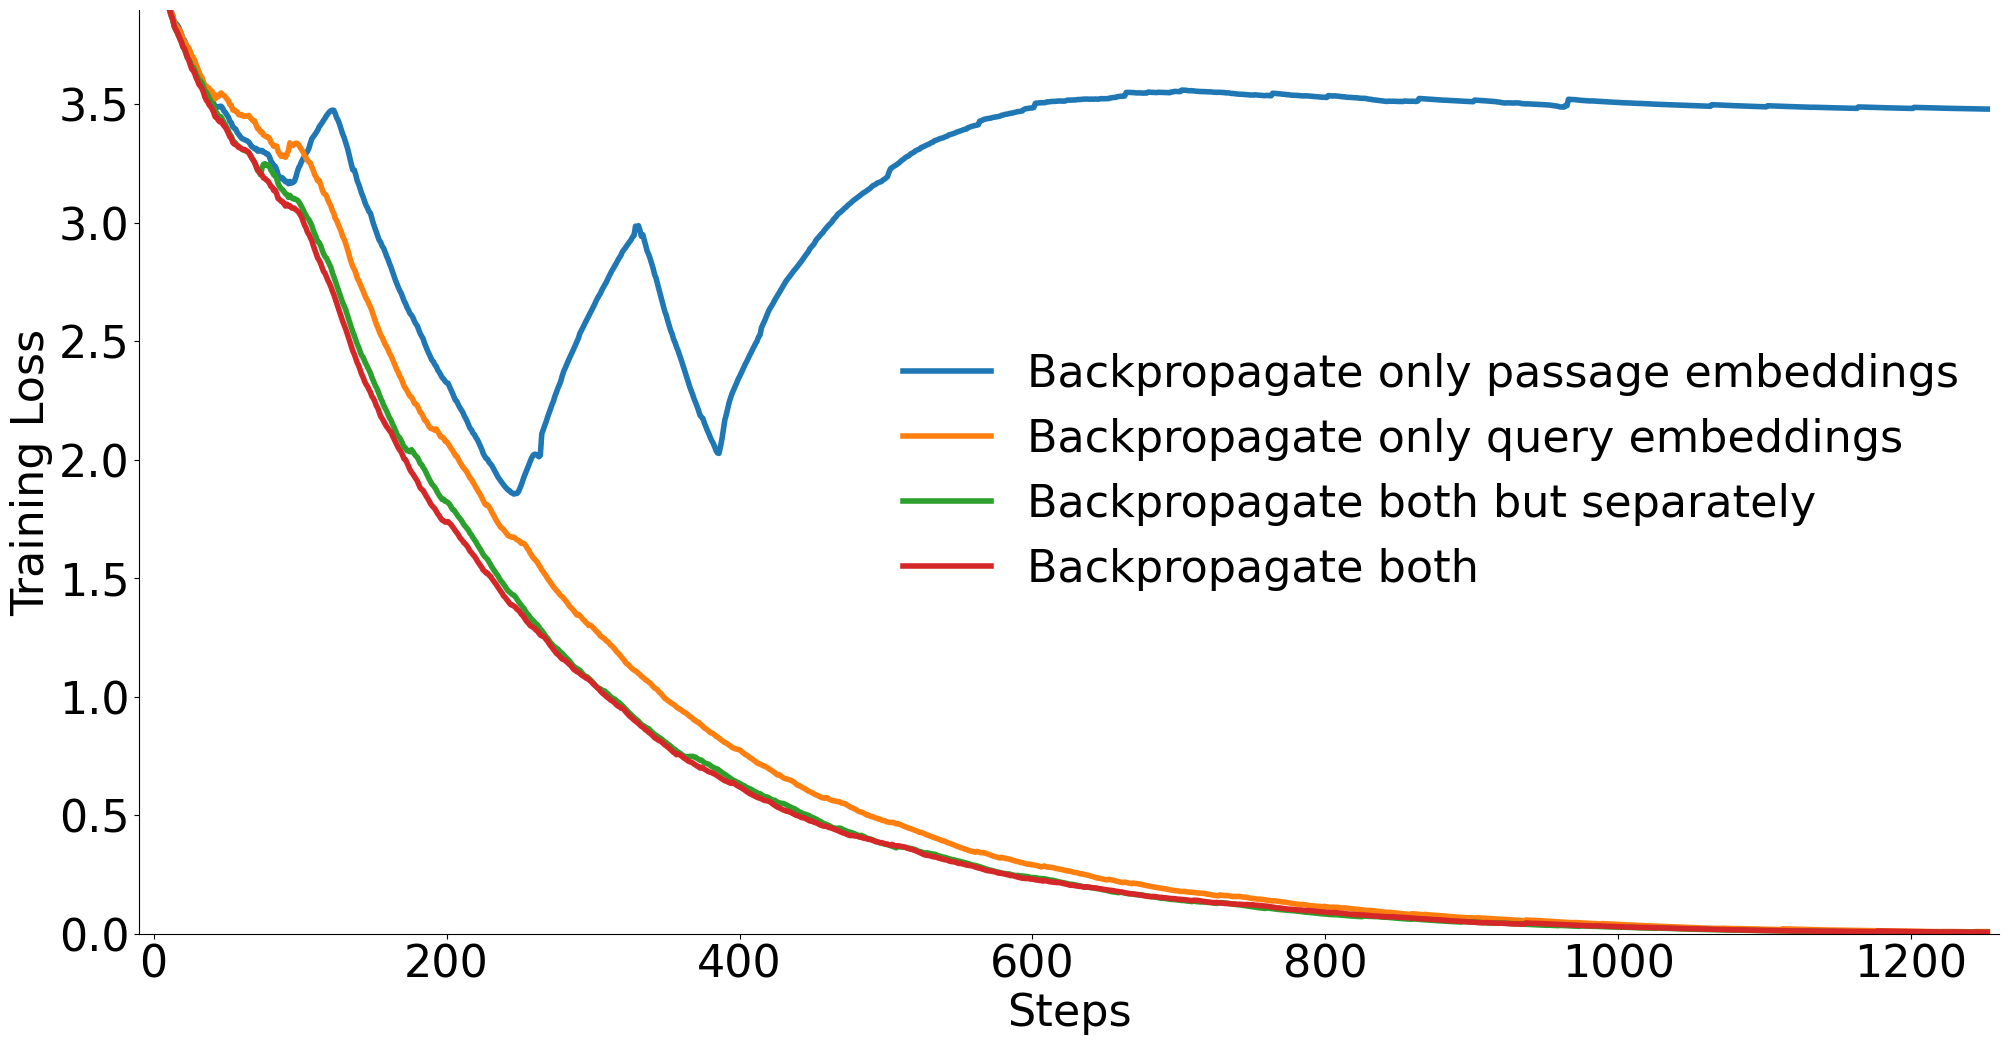

In [ ]:
path = "/content/wandb_export_2024-01-29T10_40_33.371+01_00.csv"

import pandas as pd

with open(path, "r") as f:
    df = pd.read_csv(f)
    df = df[::2]

# https://stackoverflow.com/questions/42281844/what-is-the-mathematics-behind-the-smoothing-parameter-in-tensorboards-scalar
def smooth(scalars, weight: float):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

for key in ["test_sgpt2_m7", "test_sgpt2_m7_splitemb", "test_sgpt2_m7_embp", "test_sgpt2_m7_embq"]:
    key += " - train/loss"
    df[key] = smooth(df[key].values.tolist(), weight=0.99)

import matplotlib.pyplot as plt

FONTSIZE = 32

fig, ax = plt.subplots(figsize=(24, 12))

labels = [
    "Backpropagate only passage embeddings",
    "Backpropagate only query embeddings",
    "Backpropagate both but separately",
    "Backpropagate both",
]

for i, key in enumerate(["test_sgpt2_m7_embp", "test_sgpt2_m7_embq", "test_sgpt2_m7_splitemb", "test_sgpt2_m7"]):
  key += " - train/loss"
  ax.plot(
      list(range(len(df[key]))),
      df[key],
      label=labels[i],
      linewidth=4.0,
  )


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)

ax.set_ylabel("Training Loss", fontsize=FONTSIZE)
ax.set_xlabel("Steps", fontsize=FONTSIZE)

plt.ylim(
    [0, 3.9]
)

plt.xlim(
    [-10, 1260]
)


plt.legend(
    frameon=False,
    fontsize=FONTSIZE,
)

plt.savefig('embmem.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df

,Step,test_sgpt2_m7_splitemb - train/loss,test_sgpt2_m7_splitemb - train/loss__MIN,test_sgpt2_m7_splitemb - train/loss__MAX,test_sgpt2_m7_embq - train/loss,test_sgpt2_m7_embq - train/loss__MIN,test_sgpt2_m7_embq - train/loss__MAX,test_sgpt2_m7_embp - train/loss,test_sgpt2_m7_embp - train/loss__MIN,test_sgpt2_m7_embp - train/loss__MAX,test_sgpt2_m7 - train/loss,test_sgpt2_m7 - train/loss__MIN,test_sgpt2_m7 - train/loss__MAX
0,0,3.9371,3.9371,3.9371,3.9371,3.9371,3.9371,3.9371,3.9371,3.9371,3.9371,3.9371,3.9371
2,2,NaN,6.6685,6.6685,NaN,6.6685,6.6685,NaN,6.6685,6.6685,NaN,6.6685,6.6685
4,4,NaN,3.9140,3.9140,NaN,3.9604,3.9604,NaN,3.9986,3.9986,NaN,3.9185,3.9185
6,6,NaN,3.1843,3.1843,NaN,3.1962,3.1962,NaN,3.2463,3.2463,NaN,3.1966,3.1966
8,8,NaN,5.3516,5.3516,NaN,5.4386,5.4386,NaN,5.9823,5.9823,NaN,5.3713,5.3713
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,2496,NaN,0.0003,0.0003,NaN,0.0008,0.0008,NaN,3.4690,3.4690,NaN,0.0003,0.0003
2498,2498,NaN,0.0002,0.0002,NaN,0.0011,0.0011,NaN,3.4689,3.4689,NaN,0.0003,0.0003
2500,2500,NaN,0.0003,0.0003,NaN,0.0154,0.0154,NaN,3.4690,3.4690,NaN,0.0004,0.0004
2502,2502,NaN,0.0005,0.0005,NaN,0.0004,0.0004,NaN,3.4692,3.4692,NaN,0.0042,0.0042
